# Importações e Leitura do DataSet

In [1]:
import optuna as opt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score  # Para validação cruzada durante tuning
import warnings
import time  # Para medir tempo de execução
 

C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('churn.csv')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Análise Exploratória

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Análise da variável Senior Citizen

In [6]:
df['SeniorCitizen'].unique()

array([0, 1])

### Análise da variável Tenure

In [7]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

### Análise da Variável TotalCharges

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

Verificamos que a variável total charges está com os valores no formato string ao invés de númericos

### Verificação de dados nulos

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Verificar valores duplicados

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Processamento de dados

### remoção de colunas

In [12]:
df = df.drop(['customerID'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Transformação de variáveis

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Definindo as colunas categóricas

In [15]:
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

#### Aplicar One Hot Encoding

In [16]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   object 
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

### fazendo o map do churn de forma manual

In [18]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No':0})

In [19]:
df_encoded['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### atribuindo o novo df_encoded ao df antigo

In [20]:
df = df_encoded

df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


# Modelagem

### 1. Definindo as variavéis

In [21]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### 2. Separar em treino e teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 3. Escolha e definição do modelo

In [23]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

### 4. Treinamento do modelo

In [24]:
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5. Previsões

In [25]:
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:,1]

### 6. Avaliações

In [26]:
print(f'Classification report \n{classification_report(y_test, y_pred)}')

Classification report 
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### 7. Matriz de Confusão

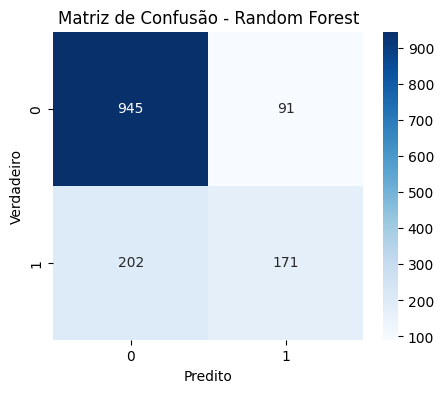

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

### 8. Curva Roc

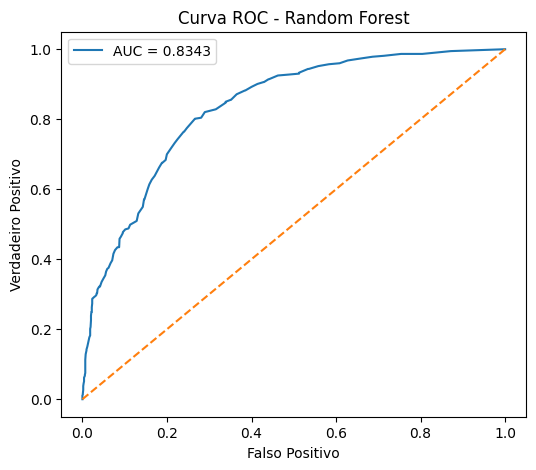

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

### 9. Curva AUC PR

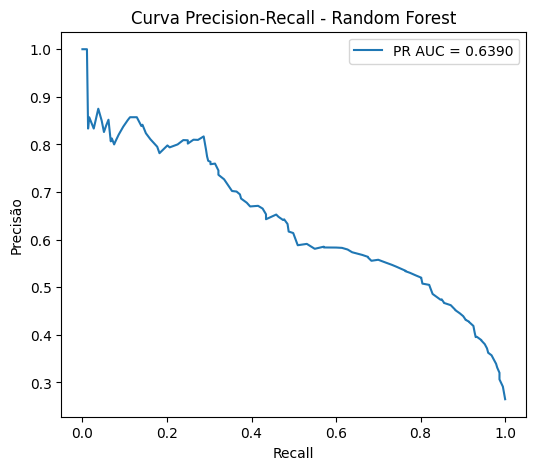

In [29]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
 
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - Random Forest")
plt.legend()
plt.show()

### Light GBM

In [30]:
model_lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
 
model_lgbm.fit(X_train, y_train)
 
y_pred_lgbm = model_lgbm.predict(X_test)
y_proba_lgbm = model_lgbm.predict_proba(X_test)[:, 1]
 
print("Classification Report - LightGBM")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Classification Report - LightGBM
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## XGBoost

## Escolhendo o modelo

In [31]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

## Treinamento e Previsão

In [32]:
model_xgb.fit(X_train, y_train)
 
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

## Avaliações

In [33]:
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



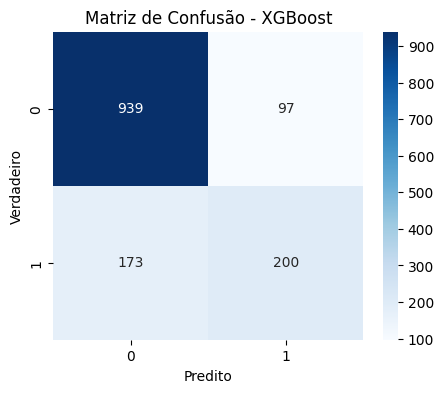

In [34]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

# Tuning de Hiperparametros

### 1. Definino função do Optuna

In [35]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42,
        'verbosity': 0,
        'eval_metric': 'logloss'  # Métrica interna do XGBoost
    }
    
    model = XGBClassifier(**params)

    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    return cv_scores.mean()

### **Explicação dos parametros***

* n_estimators - é o nº de árvores que serão treinados / força do modelo
* learning_rate	- taxa com que as árvores corrigem os erros (valor menor, menos risco de overfitting / valor maior risco de overfitting)	
* max_depth	profundidade das árvores / complexidade
* min_child_weight - mínimo para dividir / regularização
* subsample -  % de linhas por árvore
* colsample_bytree - % de colunas por árvore
* gamma	- redução minima de perda necessária para fazer split / regularização
* reg_alpha	- regularização L1 / simplificação do modelo
* reg_lambda - 	regularização L2 / estabilidade
* eval_metric - métrica de avaliação
* use_label_encoder	legado - deve ser False
* random_state - define a semente de reprodutibilidade

***Trial Suggest***

Funciona como sistema inteligente que testa combinações de parâmetros. Porém, só consegue fazer isso se souber o tipo de cada parametro

### 2. Executando o modelo

In [ ]:
start_time = time.time()

# Criar estudo Optuna para XGBoost
study = opt.create_study(
    direction='maximize',  # Queremos MAXIMIZAR o ROC AUC
    sampler=opt.samplers.TPESampler(seed=42),  # Algoritmo bayesiano com seed fixa
    study_name='xgboost_churn_optimization'  # Nome do experimento
)

# Executar otimização (vai chamar objective_xgboost 3000 vezes)
study.optimize(
    objective,
    n_trials=3000,  # Número de combinações a testar
    show_progress_bar=True  # Mostrar barra de progresso
)

end_time = time.time()
tempo_xgb = end_time - start_time

#print("\nBest trial params:")
#print(study.best_trial.params)
#print("\nBest F1 on validation (study.best_value):", study.best_value)
print(f"Tempo de execução: {tempo_xgb/60:.2f} minutos")

[I 2025-12-07 10:29:27,430] A new study created in memory with name: xgboost_churn_optimization
Best trial: 0. Best value: 0.808678:   0%|          | 1/3000 [00:00<17:11,  2.91it/s]

[I 2025-12-07 10:29:27,792] Trial 0 finished with value: 0.8086780994918661 and parameters: {'n_estimators': 218, 'learning_rate': 0.2536999076681772, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.7800932022121826, 'subsample': 0.662397808134481, 'colsample_bytree': 0.6232334448672797}. Best is trial 0 with value: 0.8086780994918661.


Best trial: 1. Best value: 0.843817:   0%|          | 2/3000 [00:00<16:57,  2.95it/s]

[I 2025-12-07 10:29:28,126] Trial 1 finished with value: 0.8438171472196497 and parameters: {'n_estimators': 440, 'learning_rate': 0.07725378389307355, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 4.8495492608099715, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105}. Best is trial 1 with value: 0.8438171472196497.


Best trial: 3. Best value: 0.845671:   0%|          | 4/3000 [00:01<11:58,  4.17it/s]

[I 2025-12-07 10:29:28,336] Trial 2 finished with value: 0.845294888235071 and parameters: {'n_estimators': 132, 'learning_rate': 0.018659959624904916, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 2.1597250932105787, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578889518}. Best is trial 2 with value: 0.845294888235071.
[I 2025-12-07 10:29:28,515] Trial 3 finished with value: 0.8456714192029852 and parameters: {'n_estimators': 112, 'learning_rate': 0.027010527749605478, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 3.925879806965068, 'subsample': 0.6798695128633439, 'colsample_bytree': 0.8056937753654446}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 5/3000 [00:01<18:21,  2.72it/s]

[I 2025-12-07 10:29:29,107] Trial 4 finished with value: 0.8380026830835 and parameters: {'n_estimators': 317, 'learning_rate': 0.011711509955524094, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.3252579649263976, 'subsample': 0.9795542149013333, 'colsample_bytree': 0.9862528132298237}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 7/3000 [00:02<14:39,  3.40it/s]

[I 2025-12-07 10:29:29,496] Trial 5 finished with value: 0.8456468915392872 and parameters: {'n_estimators': 414, 'learning_rate': 0.028180680291847244, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.2007624686980067, 'subsample': 0.6488152939379115, 'colsample_bytree': 0.798070764044508}. Best is trial 3 with value: 0.8456714192029852.
[I 2025-12-07 10:29:29,625] Trial 6 finished with value: 0.8375825534495493 and parameters: {'n_estimators': 65, 'learning_rate': 0.22038218939289875, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 1.5585553804470549, 'subsample': 0.8080272084711243, 'colsample_bytree': 0.8186841117373118}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 9/3000 [00:02<10:45,  4.63it/s]

[I 2025-12-07 10:29:29,786] Trial 7 finished with value: 0.8432958749205415 and parameters: {'n_estimators': 133, 'learning_rate': 0.27051668818999286, 'max_depth': 9, 'min_child_weight': 10, 'gamma': 4.474136752138244, 'subsample': 0.8391599915244341, 'colsample_bytree': 0.9687496940092467}. Best is trial 3 with value: 0.8456714192029852.
[I 2025-12-07 10:29:29,925] Trial 8 finished with value: 0.8410725445136222 and parameters: {'n_estimators': 89, 'learning_rate': 0.01947558230629543, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 1.9433864484474102, 'subsample': 0.7085396127095583, 'colsample_bytree': 0.9314950036607718}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 10/3000 [00:02<11:25,  4.36it/s]

[I 2025-12-07 10:29:30,185] Trial 9 finished with value: 0.8451523454361919 and parameters: {'n_estimators': 210, 'learning_rate': 0.026000059117302653, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 4.010984903770199, 'subsample': 0.6298202574719083, 'colsample_bytree': 0.9947547746402069}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 11/3000 [00:03<11:58,  4.16it/s]

[I 2025-12-07 10:29:30,446] Trial 10 finished with value: 0.8455410849957129 and parameters: {'n_estimators': 281, 'learning_rate': 0.06690992453172909, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 3.369860450173899, 'subsample': 0.7521171841007243, 'colsample_bytree': 0.73725841938494}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 11. Best value: 0.845833:   0%|          | 12/3000 [00:03<14:15,  3.49it/s]

[I 2025-12-07 10:29:30,838] Trial 11 finished with value: 0.845832520398204 and parameters: {'n_estimators': 483, 'learning_rate': 0.044803827213195875, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0872723649651057, 'subsample': 0.6106656736473042, 'colsample_bytree': 0.8742955831830228}. Best is trial 11 with value: 0.845832520398204.


Best trial: 11. Best value: 0.845833:   0%|          | 13/3000 [00:03<15:57,  3.12it/s]

[I 2025-12-07 10:29:31,241] Trial 12 finished with value: 0.8455514006102236 and parameters: {'n_estimators': 482, 'learning_rate': 0.03939317354484882, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.2629493764683297, 'subsample': 0.6015024223945927, 'colsample_bytree': 0.881791526989573}. Best is trial 11 with value: 0.845832520398204.


Best trial: 11. Best value: 0.845833:   0%|          | 14/3000 [00:04<15:43,  3.16it/s]

[I 2025-12-07 10:29:31,543] Trial 13 finished with value: 0.845211300225175 and parameters: {'n_estimators': 360, 'learning_rate': 0.1071873743912074, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 3.3431289478203157, 'subsample': 0.6832384449578339, 'colsample_bytree': 0.7400028246550391}. Best is trial 11 with value: 0.845832520398204.


Best trial: 11. Best value: 0.845833:   0%|          | 15/3000 [00:04<14:42,  3.38it/s]

[I 2025-12-07 10:29:31,792] Trial 14 finished with value: 0.8445944343116942 and parameters: {'n_estimators': 199, 'learning_rate': 0.04504624949428859, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 2.9161357698316372, 'subsample': 0.7589670670409671, 'colsample_bytree': 0.8841190389237527}. Best is trial 11 with value: 0.845832520398204.


Best trial: 11. Best value: 0.845833:   1%|          | 16/3000 [00:04<15:43,  3.16it/s]

[I 2025-12-07 10:29:32,159] Trial 15 finished with value: 0.8455757853037748 and parameters: {'n_estimators': 500, 'learning_rate': 0.1196890828618731, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8756616228460175, 'subsample': 0.8524337374155859, 'colsample_bytree': 0.7834772962915398}. Best is trial 11 with value: 0.845832520398204.


Best trial: 16. Best value: 0.846068:   1%|          | 17/3000 [00:05<16:07,  3.08it/s]

[I 2025-12-07 10:29:32,500] Trial 16 finished with value: 0.846068105073719 and parameters: {'n_estimators': 373, 'learning_rate': 0.035614363160806004, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 4.048039329319524, 'subsample': 0.601047414142533, 'colsample_bytree': 0.9019190917261364}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 18/3000 [00:05<16:41,  2.98it/s]

[I 2025-12-07 10:29:32,863] Trial 17 finished with value: 0.843199036012359 and parameters: {'n_estimators': 380, 'learning_rate': 0.05014258595756229, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 2.717249091337501, 'subsample': 0.6018960478612357, 'colsample_bytree': 0.916172269405959}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 19/3000 [00:05<18:08,  2.74it/s]

[I 2025-12-07 10:29:33,297] Trial 18 finished with value: 0.8452651440365614 and parameters: {'n_estimators': 444, 'learning_rate': 0.010464537569655475, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 4.951494926700002, 'subsample': 0.8907859007152178, 'colsample_bytree': 0.8666142557230876}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 20/3000 [00:06<17:46,  2.79it/s]

[I 2025-12-07 10:29:33,639] Trial 19 finished with value: 0.826615382212361 and parameters: {'n_estimators': 351, 'learning_rate': 0.13743949612028655, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 1.324414537995385, 'subsample': 0.7549767826539262, 'colsample_bytree': 0.9255974822311326}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 21/3000 [00:06<17:32,  2.83it/s]

[I 2025-12-07 10:29:33,978] Trial 20 finished with value: 0.8456146831278094 and parameters: {'n_estimators': 396, 'learning_rate': 0.03676504579292094, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 4.340331534743572, 'subsample': 0.6305157307984756, 'colsample_bytree': 0.9395973014339374}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 22/3000 [00:06<16:31,  3.00it/s]

[I 2025-12-07 10:29:34,267] Trial 21 finished with value: 0.8458745325019809 and parameters: {'n_estimators': 276, 'learning_rate': 0.02448809122832654, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 3.9874892522318373, 'subsample': 0.6934558001831825, 'colsample_bytree': 0.8340419631080439}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 23/3000 [00:07<16:14,  3.05it/s]

[I 2025-12-07 10:29:34,579] Trial 22 finished with value: 0.8456967049132322 and parameters: {'n_estimators': 294, 'learning_rate': 0.0185927715102448, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.614678030629977, 'subsample': 0.7137440747408894, 'colsample_bytree': 0.840134977750168}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 24/3000 [00:07<15:13,  3.26it/s]

[I 2025-12-07 10:29:34,840] Trial 23 finished with value: 0.8450884161144743 and parameters: {'n_estimators': 241, 'learning_rate': 0.058393970664223985, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.0644260505808427, 'subsample': 0.6054361025306862, 'colsample_bytree': 0.8908407031195642}. Best is trial 16 with value: 0.846068105073719.


Best trial: 24. Best value: 0.846221:   1%|          | 25/3000 [00:07<15:39,  3.17it/s]

[I 2025-12-07 10:29:35,175] Trial 24 finished with value: 0.8462213720597612 and parameters: {'n_estimators': 331, 'learning_rate': 0.031865343638394966, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 4.370758204210595, 'subsample': 0.6528960661935768, 'colsample_bytree': 0.7589955439149414}. Best is trial 24 with value: 0.8462213720597612.


Best trial: 25. Best value: 0.846253:   1%|          | 26/3000 [00:08<16:13,  3.05it/s]

[I 2025-12-07 10:29:35,530] Trial 25 finished with value: 0.8462529271027497 and parameters: {'n_estimators': 312, 'learning_rate': 0.014324812323146507, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.3159287350431965, 'subsample': 0.6600589968032442, 'colsample_bytree': 0.7581202346790605}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 27/3000 [00:08<17:01,  2.91it/s]

[I 2025-12-07 10:29:35,913] Trial 26 finished with value: 0.8459984850009604 and parameters: {'n_estimators': 331, 'learning_rate': 0.013497018732152671, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.353927239483539, 'subsample': 0.6532201048537977, 'colsample_bytree': 0.7502241201894382}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 28/3000 [00:08<17:03,  2.90it/s]

[I 2025-12-07 10:29:36,259] Trial 27 finished with value: 0.84554397163291 and parameters: {'n_estimators': 318, 'learning_rate': 0.015157155026427033, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.6255787750928485, 'subsample': 0.7387616679485546, 'colsample_bytree': 0.6974040046404777}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 29/3000 [00:09<15:57,  3.10it/s]

[I 2025-12-07 10:29:36,530] Trial 28 finished with value: 0.8457832851956877 and parameters: {'n_estimators': 258, 'learning_rate': 0.0335349983665984, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 3.669730161635142, 'subsample': 0.7904900013069247, 'colsample_bytree': 0.7671067794924094}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 30/3000 [00:09<13:56,  3.55it/s]

[I 2025-12-07 10:29:36,716] Trial 29 finished with value: 0.8453347037602106 and parameters: {'n_estimators': 171, 'learning_rate': 0.0799012921536858, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 4.216221037639429, 'subsample': 0.659819458471337, 'colsample_bytree': 0.6604764267360032}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 31/3000 [00:09<15:29,  3.20it/s]

[I 2025-12-07 10:29:37,101] Trial 30 finished with value: 0.8459976596502085 and parameters: {'n_estimators': 353, 'learning_rate': 0.015127810323153036, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 4.740843410682163, 'subsample': 0.6366672250265574, 'colsample_bytree': 0.6088017347852452}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 31. Best value: 0.84637:   1%|          | 32/3000 [00:10<16:41,  2.96it/s] 

[I 2025-12-07 10:29:37,494] Trial 31 finished with value: 0.846369823757352 and parameters: {'n_estimators': 329, 'learning_rate': 0.012586794762086365, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.340493465153248, 'subsample': 0.6633406371196147, 'colsample_bytree': 0.7470107596461466}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 33/3000 [00:10<17:15,  2.87it/s]

[I 2025-12-07 10:29:37,871] Trial 32 finished with value: 0.845886006667004 and parameters: {'n_estimators': 303, 'learning_rate': 0.010129763340540955, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 4.903812103455536, 'subsample': 0.6771209522649876, 'colsample_bytree': 0.7097074981733815}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 34/3000 [00:10<18:27,  2.68it/s]

[I 2025-12-07 10:29:38,300] Trial 33 finished with value: 0.8458909938204974 and parameters: {'n_estimators': 416, 'learning_rate': 0.01998177965146877, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.179348875671404, 'subsample': 0.665040997165214, 'colsample_bytree': 0.6537135219185505}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 35/3000 [00:11<18:08,  2.72it/s]

[I 2025-12-07 10:29:38,652] Trial 34 finished with value: 0.8458223055543981 and parameters: {'n_estimators': 376, 'learning_rate': 0.03165061459013809, 'max_depth': 8, 'min_child_weight': 10, 'gamma': 3.6314349505283365, 'subsample': 0.7265444354548616, 'colsample_bytree': 0.7096611476877965}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 36/3000 [00:11<16:51,  2.93it/s]

[I 2025-12-07 10:29:38,937] Trial 35 finished with value: 0.8462769542537144 and parameters: {'n_estimators': 243, 'learning_rate': 0.022577918288179042, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 4.564741208492566, 'subsample': 0.62780164091432, 'colsample_bytree': 0.7639140718114782}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 37/3000 [00:11<16:45,  2.95it/s]

[I 2025-12-07 10:29:39,272] Trial 36 finished with value: 0.8461005373962174 and parameters: {'n_estimators': 245, 'learning_rate': 0.013860039518386946, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 4.765999474725392, 'subsample': 0.6883149234307089, 'colsample_bytree': 0.7714474938094587}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 38/3000 [00:12<16:20,  3.02it/s]

[I 2025-12-07 10:29:39,584] Trial 37 finished with value: 0.8454955681110619 and parameters: {'n_estimators': 325, 'learning_rate': 0.022552314251372746, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 4.525168482677055, 'subsample': 0.9993134344664012, 'colsample_bytree': 0.7245074898753847}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 39/3000 [00:12<16:49,  2.93it/s]

[I 2025-12-07 10:29:39,948] Trial 38 finished with value: 0.8442151973631757 and parameters: {'n_estimators': 257, 'learning_rate': 0.016020511002465574, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.11693767983518244, 'subsample': 0.6354131656712746, 'colsample_bytree': 0.7998187907942694}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 40/3000 [00:12<16:26,  3.00it/s]

[I 2025-12-07 10:29:40,261] Trial 39 finished with value: 0.8442378782151847 and parameters: {'n_estimators': 175, 'learning_rate': 0.017842543823133716, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 2.460600767918329, 'subsample': 0.7828663979151492, 'colsample_bytree': 0.6622282595642106}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 41/3000 [00:13<16:35,  2.97it/s]

[I 2025-12-07 10:29:40,603] Trial 40 finished with value: 0.8457096771975179 and parameters: {'n_estimators': 295, 'learning_rate': 0.012494938507362212, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 4.995330631195313, 'subsample': 0.9442430274371364, 'colsample_bytree': 0.8140063334978853}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 42/3000 [00:13<16:15,  3.03it/s]

[I 2025-12-07 10:29:40,918] Trial 41 finished with value: 0.8454587593352345 and parameters: {'n_estimators': 241, 'learning_rate': 0.01267857283663165, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 4.661230074006847, 'subsample': 0.6962021128332635, 'colsample_bytree': 0.7697729541170389}. Best is trial 31 with value: 0.846369823757352.


Best trial: 42. Best value: 0.846399:   1%|▏         | 43/3000 [00:13<15:29,  3.18it/s]

[I 2025-12-07 10:29:41,200] Trial 42 finished with value: 0.8463991002844535 and parameters: {'n_estimators': 240, 'learning_rate': 0.02257342630022958, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 4.471349615445289, 'subsample': 0.6668064305939037, 'colsample_bytree': 0.7636368746964858}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   1%|▏         | 44/3000 [00:14<14:45,  3.34it/s]

[I 2025-12-07 10:29:41,462] Trial 43 finished with value: 0.8460526345433965 and parameters: {'n_estimators': 219, 'learning_rate': 0.02905034834715327, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 4.454816892368802, 'subsample': 0.6629593882263926, 'colsample_bytree': 0.7517962718222775}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 45/3000 [00:14<15:43,  3.13it/s]

[I 2025-12-07 10:29:41,828] Trial 44 finished with value: 0.8459890173803286 and parameters: {'n_estimators': 341, 'learning_rate': 0.022915258924691668, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.84886687199742, 'subsample': 0.6231567451777527, 'colsample_bytree': 0.790555867349301}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 46/3000 [00:14<15:12,  3.24it/s]

[I 2025-12-07 10:29:42,112] Trial 45 finished with value: 0.8459652249051496 and parameters: {'n_estimators': 221, 'learning_rate': 0.01976912748288361, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 4.216146139846768, 'subsample': 0.6453875294132447, 'colsample_bytree': 0.7239764523980582}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 47/3000 [00:14<14:39,  3.36it/s]

[I 2025-12-07 10:29:42,385] Trial 46 finished with value: 0.8449345178169658 and parameters: {'n_estimators': 180, 'learning_rate': 0.01674433697569997, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 1.0446057118280205, 'subsample': 0.6716595144181582, 'colsample_bytree': 0.6887610630959861}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 48/3000 [00:15<18:47,  2.62it/s]

[I 2025-12-07 10:29:42,953] Trial 47 finished with value: 0.8456610516206432 and parameters: {'n_estimators': 151, 'learning_rate': 0.02775431195706743, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 3.7533503422232526, 'subsample': 0.7008697912964608, 'colsample_bytree': 0.8238325783689997}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 49/3000 [00:16<29:33,  1.66it/s]

[I 2025-12-07 10:29:44,073] Trial 48 finished with value: 0.8454004681324759 and parameters: {'n_estimators': 273, 'learning_rate': 0.021454836086980813, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.420750802485501, 'subsample': 0.7278025825118782, 'colsample_bytree': 0.7585723398538926}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 50/3000 [00:17<38:21,  1.28it/s]

[I 2025-12-07 10:29:45,268] Trial 49 finished with value: 0.8457787254287645 and parameters: {'n_estimators': 298, 'learning_rate': 0.01112667209800568, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 4.529655805076946, 'subsample': 0.6181076191061383, 'colsample_bytree': 0.7349323531952939}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 51/3000 [00:18<38:27,  1.28it/s]

[I 2025-12-07 10:29:46,050] Trial 50 finished with value: 0.8462618235070469 and parameters: {'n_estimators': 197, 'learning_rate': 0.04099339499367268, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 4.163750982201623, 'subsample': 0.6465923158612856, 'colsample_bytree': 0.7773985393382491}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 52/3000 [00:19<38:27,  1.28it/s]

[I 2025-12-07 10:29:46,831] Trial 51 finished with value: 0.8461324138192154 and parameters: {'n_estimators': 198, 'learning_rate': 0.04106884361669006, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 4.0499518078998, 'subsample': 0.6477080137323644, 'colsample_bytree': 0.7827866167984401}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 53/3000 [00:20<40:09,  1.22it/s]

[I 2025-12-07 10:29:47,730] Trial 52 finished with value: 0.8461261718575009 and parameters: {'n_estimators': 227, 'learning_rate': 0.029729885785456312, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 4.212397559289871, 'subsample': 0.6797465673760263, 'colsample_bytree': 0.8060801410896855}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 54/3000 [00:21<44:03,  1.11it/s]

[I 2025-12-07 10:29:48,816] Trial 53 finished with value: 0.8442782436029603 and parameters: {'n_estimators': 196, 'learning_rate': 0.025405896768009473, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 1.8334509785171669, 'subsample': 0.6237256345227178, 'colsample_bytree': 0.7448422596774348}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 55/3000 [00:21<39:40,  1.24it/s]

[I 2025-12-07 10:29:49,413] Trial 54 finished with value: 0.8454104683843051 and parameters: {'n_estimators': 135, 'learning_rate': 0.05646424147251656, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 4.394069473809464, 'subsample': 0.6464405869894454, 'colsample_bytree': 0.7860135045032245}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 56/3000 [00:22<40:38,  1.21it/s]

[I 2025-12-07 10:29:50,295] Trial 55 finished with value: 0.8459605496367908 and parameters: {'n_estimators': 270, 'learning_rate': 0.042926617259152776, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 4.057772073852835, 'subsample': 0.7106998119664305, 'colsample_bytree': 0.7234363805336573}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 57/3000 [00:23<42:16,  1.16it/s]

[I 2025-12-07 10:29:51,233] Trial 56 finished with value: 0.8459687446121228 and parameters: {'n_estimators': 315, 'learning_rate': 0.04851850714623562, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 4.73322661056336, 'subsample': 0.6674501510412976, 'colsample_bytree': 0.765379147542064}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 58/3000 [00:24<45:38,  1.07it/s]

[I 2025-12-07 10:29:52,320] Trial 57 finished with value: 0.8458671047554844 and parameters: {'n_estimators': 283, 'learning_rate': 0.03384395996764796, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 3.866428814629278, 'subsample': 0.6169718003256249, 'colsample_bytree': 0.7359639705175376}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 59/3000 [00:25<44:26,  1.10it/s]

[I 2025-12-07 10:29:53,173] Trial 58 finished with value: 0.8430252081101625 and parameters: {'n_estimators': 107, 'learning_rate': 0.014422363263606434, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.6430931572422787, 'subsample': 0.8561703534190572, 'colsample_bytree': 0.6754952110250191}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 59. Best value: 0.846516:   2%|▏         | 60/3000 [00:26<42:38,  1.15it/s]

[I 2025-12-07 10:29:53,952] Trial 59 finished with value: 0.8465158414262973 and parameters: {'n_estimators': 257, 'learning_rate': 0.07934100052486963, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 3.4621245808350234, 'subsample': 0.8174649324854347, 'colsample_bytree': 0.7783117576889628}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 61/3000 [00:27<42:10,  1.16it/s]

[I 2025-12-07 10:29:54,771] Trial 60 finished with value: 0.8460414436421276 and parameters: {'n_estimators': 253, 'learning_rate': 0.08942603173835707, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 3.4398207728423627, 'subsample': 0.8208820206786352, 'colsample_bytree': 0.8606914252809951}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 62/3000 [00:28<41:44,  1.17it/s]

[I 2025-12-07 10:29:55,635] Trial 61 finished with value: 0.8459333203491901 and parameters: {'n_estimators': 305, 'learning_rate': 0.08699361980829526, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 4.360598923367807, 'subsample': 0.8798775909854814, 'colsample_bytree': 0.7772733147167489}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 63/3000 [00:29<43:11,  1.13it/s]

[I 2025-12-07 10:29:56,578] Trial 62 finished with value: 0.8454482384673272 and parameters: {'n_estimators': 337, 'learning_rate': 0.06522781469900907, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 4.5907077088012285, 'subsample': 0.8284754354202111, 'colsample_bytree': 0.7590265780774619}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 64/3000 [00:29<40:12,  1.22it/s]

[I 2025-12-07 10:29:57,264] Trial 63 finished with value: 0.8460336168960001 and parameters: {'n_estimators': 212, 'learning_rate': 0.10631585692969947, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 4.847728295621824, 'subsample': 0.8047928845739999, 'colsample_bytree': 0.8042011013817207}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 65/3000 [00:30<40:10,  1.22it/s]

[I 2025-12-07 10:29:58,061] Trial 64 finished with value: 0.8454016113466171 and parameters: {'n_estimators': 240, 'learning_rate': 0.06642169571001373, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1545718969053826, 'subsample': 0.7831927971484205, 'colsample_bytree': 0.8262631059220634}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 66/3000 [00:31<42:58,  1.14it/s]

[I 2025-12-07 10:29:59,094] Trial 65 finished with value: 0.8421829771905569 and parameters: {'n_estimators': 394, 'learning_rate': 0.19575411549103813, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 4.1552014098134515, 'subsample': 0.6400706590953377, 'colsample_bytree': 0.7102842870921028}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 67/3000 [00:32<44:51,  1.09it/s]

[I 2025-12-07 10:30:00,105] Trial 66 finished with value: 0.8456979571230617 and parameters: {'n_estimators': 264, 'learning_rate': 0.05080455904910159, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.293523234113241, 'subsample': 0.6554604180254948, 'colsample_bytree': 0.789239618326082}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 68/3000 [00:33<48:46,  1.00it/s]

[I 2025-12-07 10:30:01,276] Trial 67 finished with value: 0.8454989014567034 and parameters: {'n_estimators': 284, 'learning_rate': 0.01163606301834161, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 2.8754093317484917, 'subsample': 0.76755056598184, 'colsample_bytree': 0.8511246446769685}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 69/3000 [00:34<47:30,  1.03it/s]

[I 2025-12-07 10:30:02,203] Trial 68 finished with value: 0.8456075107074735 and parameters: {'n_estimators': 232, 'learning_rate': 0.017245035399162226, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.5357185786249103, 'subsample': 0.6105603457046698, 'colsample_bytree': 0.7481956908481601}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 70/3000 [00:35<47:53,  1.02it/s]

[I 2025-12-07 10:30:03,203] Trial 69 finished with value: 0.8462514588552217 and parameters: {'n_estimators': 315, 'learning_rate': 0.038089511451575096, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 3.787097572065145, 'subsample': 0.681263520705284, 'colsample_bytree': 0.8112444848561615}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 71/3000 [00:36<42:32,  1.15it/s]

[I 2025-12-07 10:30:03,825] Trial 70 finished with value: 0.8461063116669871 and parameters: {'n_estimators': 158, 'learning_rate': 0.07494376962506831, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 3.928080828179494, 'subsample': 0.7406768848503142, 'colsample_bytree': 0.8112431563197368}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 72/3000 [00:37<46:19,  1.05it/s]

[I 2025-12-07 10:30:04,942] Trial 71 finished with value: 0.8457759147896364 and parameters: {'n_estimators': 362, 'learning_rate': 0.03635299503696512, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 3.742187612041537, 'subsample': 0.6862913836899333, 'colsample_bytree': 0.7939355698358297}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 73/3000 [00:38<47:26,  1.03it/s]

[I 2025-12-07 10:30:05,977] Trial 72 finished with value: 0.8464567443314184 and parameters: {'n_estimators': 319, 'learning_rate': 0.038054500349966734, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 4.482442383100006, 'subsample': 0.6309883050418018, 'colsample_bytree': 0.7775356914079764}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 74/3000 [00:39<48:00,  1.02it/s]

[I 2025-12-07 10:30:06,990] Trial 73 finished with value: 0.8462300537548604 and parameters: {'n_estimators': 316, 'learning_rate': 0.03864094189629115, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 4.085995213316713, 'subsample': 0.6323287462312062, 'colsample_bytree': 0.7756903517785358}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▎         | 75/3000 [00:40<47:40,  1.02it/s]

[I 2025-12-07 10:30:07,954] Trial 74 finished with value: 0.8456856572360879 and parameters: {'n_estimators': 307, 'learning_rate': 0.04504868029373523, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 4.444215503371656, 'subsample': 0.6747907191945923, 'colsample_bytree': 0.7329727217690075}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 76/3000 [00:41<48:01,  1.01it/s]

[I 2025-12-07 10:30:08,957] Trial 75 finished with value: 0.8464475968209051 and parameters: {'n_estimators': 344, 'learning_rate': 0.06121780818183565, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 4.804015499496119, 'subsample': 0.6261595620430489, 'colsample_bytree': 0.7623010592156161}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 77/3000 [00:42<49:37,  1.02s/it]

[I 2025-12-07 10:30:10,056] Trial 76 finished with value: 0.8458976886642784 and parameters: {'n_estimators': 348, 'learning_rate': 0.06066240342736941, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 4.877282056432772, 'subsample': 0.6268958833691793, 'colsample_bytree': 0.7578878057159735}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 78/3000 [00:43<41:10,  1.18it/s]

[I 2025-12-07 10:30:10,499] Trial 77 finished with value: 0.8448348501004513 and parameters: {'n_estimators': 59, 'learning_rate': 0.05258925373579191, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 4.61821981530923, 'subsample': 0.6023431666164233, 'colsample_bytree': 0.7785602292216444}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 79/3000 [00:44<42:55,  1.13it/s]

[I 2025-12-07 10:30:11,461] Trial 78 finished with value: 0.8457825351396803 and parameters: {'n_estimators': 364, 'learning_rate': 0.07330319016803108, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 4.70115885801427, 'subsample': 0.6588404323464084, 'colsample_bytree': 0.7431553804390869}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 80/3000 [00:44<42:19,  1.15it/s]

[I 2025-12-07 10:30:12,299] Trial 79 finished with value: 0.8446535661429658 and parameters: {'n_estimators': 283, 'learning_rate': 0.09926976857824531, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 4.782297701433742, 'subsample': 0.6375372802820396, 'colsample_bytree': 0.798353109349481}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 81/3000 [00:45<41:45,  1.16it/s]

[I 2025-12-07 10:30:13,118] Trial 80 finished with value: 0.8460062851770689 and parameters: {'n_estimators': 191, 'learning_rate': 0.023631500495509786, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 4.537247622398837, 'subsample': 0.6138415956521858, 'colsample_bytree': 0.7694236533212754}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 82/3000 [00:46<43:42,  1.11it/s]

[I 2025-12-07 10:30:14,125] Trial 81 finished with value: 0.8455600350458552 and parameters: {'n_estimators': 327, 'learning_rate': 0.04707435197429754, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 4.27225689948665, 'subsample': 0.6477368592227298, 'colsample_bytree': 0.81839084499541}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 83/3000 [00:47<42:58,  1.13it/s]

[I 2025-12-07 10:30:14,976] Trial 82 finished with value: 0.8456325332182383 and parameters: {'n_estimators': 291, 'learning_rate': 0.12484350077441858, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 3.9769824554467403, 'subsample': 0.7009378500817828, 'colsample_bytree': 0.8345761704959762}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 84/3000 [00:48<44:16,  1.10it/s]

[I 2025-12-07 10:30:15,946] Trial 83 finished with value: 0.8457430320662424 and parameters: {'n_estimators': 344, 'learning_rate': 0.060873163842673945, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 4.45300649160708, 'subsample': 0.6716981265535833, 'colsample_bytree': 0.7530633217952262}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 85/3000 [00:49<44:13,  1.10it/s]

[I 2025-12-07 10:30:16,856] Trial 84 finished with value: 0.8462621611611926 and parameters: {'n_estimators': 253, 'learning_rate': 0.026461453417889528, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 4.955744426940617, 'subsample': 0.6295105720462688, 'colsample_bytree': 0.7641831285739701}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 86/3000 [00:50<45:52,  1.06it/s]

[I 2025-12-07 10:30:17,871] Trial 85 finished with value: 0.8460126131396832 and parameters: {'n_estimators': 207, 'learning_rate': 0.02658377383745535, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 4.844415436753669, 'subsample': 0.6245401843453928, 'colsample_bytree': 0.7179271871470968}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 87/3000 [00:51<46:17,  1.05it/s]

[I 2025-12-07 10:30:18,857] Trial 86 finished with value: 0.8457880711985076 and parameters: {'n_estimators': 251, 'learning_rate': 0.02158810678839645, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.926715199660504, 'subsample': 0.6407644846242653, 'colsample_bytree': 0.767486913912529}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 88/3000 [00:52<46:08,  1.05it/s]

[I 2025-12-07 10:30:19,805] Trial 87 finished with value: 0.8461192923520878 and parameters: {'n_estimators': 267, 'learning_rate': 0.030951863717790493, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.973283105758284, 'subsample': 0.6589099605619086, 'colsample_bytree': 0.78412272308415}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 89/3000 [00:53<46:18,  1.05it/s]

[I 2025-12-07 10:30:20,765] Trial 88 finished with value: 0.8457167727797031 and parameters: {'n_estimators': 230, 'learning_rate': 0.019102022754877865, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 4.666374590897706, 'subsample': 0.8553634336051376, 'colsample_bytree': 0.7308409060814448}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 90/3000 [00:54<52:18,  1.08s/it]

[I 2025-12-07 10:30:22,137] Trial 89 finished with value: 0.8459039738608842 and parameters: {'n_estimators': 394, 'learning_rate': 0.013286496537533209, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 4.5079461994584165, 'subsample': 0.6095134034376118, 'colsample_bytree': 0.7459296550433718}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 91/3000 [00:55<49:55,  1.03s/it]

[I 2025-12-07 10:30:23,048] Trial 90 finished with value: 0.8455665826409353 and parameters: {'n_estimators': 258, 'learning_rate': 0.015790997170394575, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.788381638425454, 'subsample': 0.6322721029095251, 'colsample_bytree': 0.7642522684798423}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 92/3000 [00:56<49:35,  1.02s/it]

[I 2025-12-07 10:30:24,050] Trial 91 finished with value: 0.8457954306248892 and parameters: {'n_estimators': 331, 'learning_rate': 0.03958086202730603, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 4.118812266314977, 'subsample': 0.6835284088106536, 'colsample_bytree': 0.7793341523626643}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 93/3000 [00:57<49:35,  1.02s/it]

[I 2025-12-07 10:30:25,079] Trial 92 finished with value: 0.8457089435328682 and parameters: {'n_estimators': 315, 'learning_rate': 0.03323648887595465, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 3.789220226231745, 'subsample': 0.6518389980337517, 'colsample_bytree': 0.7923945800993928}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 94/3000 [00:58<50:32,  1.04s/it]

[I 2025-12-07 10:30:26,167] Trial 93 finished with value: 0.8457853775846841 and parameters: {'n_estimators': 354, 'learning_rate': 0.028315010592829464, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 4.335949549273745, 'subsample': 0.666577917817422, 'colsample_bytree': 0.8026916280790246}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 95/3000 [00:59<51:43,  1.07s/it]

[I 2025-12-07 10:30:27,298] Trial 94 finished with value: 0.8458689609252901 and parameters: {'n_estimators': 293, 'learning_rate': 0.020768722282613877, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.5787004353707745, 'subsample': 0.8194072255841641, 'colsample_bytree': 0.7580317888877622}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 96/3000 [01:00<48:53,  1.01s/it]

[I 2025-12-07 10:30:28,177] Trial 95 finished with value: 0.8463410293784115 and parameters: {'n_estimators': 277, 'learning_rate': 0.05461062243241201, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 4.2755118822020135, 'subsample': 0.6933435624159964, 'colsample_bytree': 0.73991456432806}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 97/3000 [01:01<46:12,  1.05it/s]

[I 2025-12-07 10:30:28,988] Trial 96 finished with value: 0.8445598083410752 and parameters: {'n_estimators': 238, 'learning_rate': 0.05335200040524097, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 2.4242956059352414, 'subsample': 0.8438979445211934, 'colsample_bytree': 0.6990252940125449}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 98/3000 [01:02<43:40,  1.11it/s]

[I 2025-12-07 10:30:29,782] Trial 97 finished with value: 0.8454065602666349 and parameters: {'n_estimators': 247, 'learning_rate': 0.0835826946078828, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 4.266072596206921, 'subsample': 0.6437521151313447, 'colsample_bytree': 0.7427874941886542}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 99/3000 [01:03<47:12,  1.02it/s]

[I 2025-12-07 10:30:30,927] Trial 98 finished with value: 0.845723439842185 and parameters: {'n_estimators': 277, 'learning_rate': 0.010708920232996806, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 4.681121785137695, 'subsample': 0.618887594136152, 'colsample_bytree': 0.9583601183187171}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   3%|▎         | 100/3000 [01:04<43:41,  1.11it/s]

[I 2025-12-07 10:30:31,660] Trial 99 finished with value: 0.8456515808350531 and parameters: {'n_estimators': 213, 'learning_rate': 0.06795735635583125, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.143005233600721, 'subsample': 0.6622274505011686, 'colsample_bytree': 0.7149643720369367}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 100. Best value: 0.846568:   3%|▎         | 101/3000 [01:05<44:50,  1.08it/s]

[I 2025-12-07 10:30:32,644] Trial 100 finished with value: 0.8465681809643357 and parameters: {'n_estimators': 265, 'learning_rate': 0.025071627652986213, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.4198755764652935, 'subsample': 0.6294993417665412, 'colsample_bytree': 0.7017616653931298}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   3%|▎         | 102/3000 [01:06<45:00,  1.07it/s]

[I 2025-12-07 10:30:33,588] Trial 101 finished with value: 0.8462029109956527 and parameters: {'n_estimators': 261, 'learning_rate': 0.02499511640978624, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.404646340200086, 'subsample': 0.6319941610454203, 'colsample_bytree': 0.7024388642266106}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   3%|▎         | 103/3000 [01:07<47:31,  1.02it/s]

[I 2025-12-07 10:30:34,696] Trial 102 finished with value: 0.8459823496535964 and parameters: {'n_estimators': 272, 'learning_rate': 0.018053854762672558, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.992863441719067, 'subsample': 0.6519031202951511, 'colsample_bytree': 0.6876123508825758}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   3%|▎         | 104/3000 [01:08<45:49,  1.05it/s]

[I 2025-12-07 10:30:35,560] Trial 103 finished with value: 0.8462850007495286 and parameters: {'n_estimators': 225, 'learning_rate': 0.02639956866985016, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 4.48833713428378, 'subsample': 0.6262243087888094, 'colsample_bytree': 0.7301514976206109}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 105/3000 [01:08<44:00,  1.10it/s]

[I 2025-12-07 10:30:36,392] Trial 104 finished with value: 0.8460782871934208 and parameters: {'n_estimators': 221, 'learning_rate': 0.02643888981166018, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 4.5079490926625265, 'subsample': 0.6080376588710984, 'colsample_bytree': 0.7237226747648637}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 106/3000 [01:09<44:09,  1.09it/s]

[I 2025-12-07 10:30:37,317] Trial 105 finished with value: 0.8457681715241643 and parameters: {'n_estimators': 226, 'learning_rate': 0.023464294481273854, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 4.60543776622593, 'subsample': 0.6228617002008641, 'colsample_bytree': 0.6759615255420555}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 107/3000 [01:10<43:18,  1.11it/s]

[I 2025-12-07 10:30:38,167] Trial 106 finished with value: 0.8461793615384636 and parameters: {'n_estimators': 236, 'learning_rate': 0.034642720003168655, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 4.829206841279758, 'subsample': 0.6015260129250928, 'colsample_bytree': 0.7301807467105468}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 108/3000 [01:11<41:45,  1.15it/s]

[I 2025-12-07 10:30:38,960] Trial 107 finished with value: 0.8457869444343341 and parameters: {'n_estimators': 183, 'learning_rate': 0.030333234538389757, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 4.2362778286514144, 'subsample': 0.6377627866675492, 'colsample_bytree': 0.7520799921170886}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 109/3000 [01:12<41:24,  1.16it/s]

[I 2025-12-07 10:30:39,804] Trial 108 finished with value: 0.846334086593372 and parameters: {'n_estimators': 246, 'learning_rate': 0.04231716207783596, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 4.7173482656559, 'subsample': 0.6277849789504851, 'colsample_bytree': 0.7382257808928531}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 110/3000 [01:13<42:12,  1.14it/s]

[I 2025-12-07 10:30:40,719] Trial 109 finished with value: 0.8459974385915577 and parameters: {'n_estimators': 247, 'learning_rate': 0.04268281410628828, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.71356283909543, 'subsample': 0.6148899117329605, 'colsample_bytree': 0.7411306912074692}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 111/3000 [01:14<41:35,  1.16it/s]

[I 2025-12-07 10:30:41,551] Trial 110 finished with value: 0.8453522881895232 and parameters: {'n_estimators': 265, 'learning_rate': 0.07105168732460415, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 4.424318332183229, 'subsample': 0.7927123581154099, 'colsample_bytree': 0.7167781958475784}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▎         | 112/3000 [01:14<40:29,  1.19it/s]

[I 2025-12-07 10:30:42,345] Trial 111 finished with value: 0.8457316223921257 and parameters: {'n_estimators': 203, 'learning_rate': 0.04697863788635348, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 4.590058418739982, 'subsample': 0.6279408962138495, 'colsample_bytree': 0.770101612595733}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 113/3000 [01:15<42:09,  1.14it/s]

[I 2025-12-07 10:30:43,299] Trial 112 finished with value: 0.8462167407686915 and parameters: {'n_estimators': 251, 'learning_rate': 0.03603184136722273, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 4.3363683761893155, 'subsample': 0.6435474493664382, 'colsample_bytree': 0.7380822523124767}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 114/3000 [01:16<42:36,  1.13it/s]

[I 2025-12-07 10:30:44,210] Trial 113 finished with value: 0.8452854595121654 and parameters: {'n_estimators': 289, 'learning_rate': 0.056729786414017186, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 3.974898416247357, 'subsample': 0.6202439614035856, 'colsample_bytree': 0.764133676577698}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 115/3000 [01:17<40:37,  1.18it/s]

[I 2025-12-07 10:30:44,961] Trial 114 finished with value: 0.845907959520029 and parameters: {'n_estimators': 215, 'learning_rate': 0.041672952747326554, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 4.774210019668712, 'subsample': 0.630391892227969, 'colsample_bytree': 0.7057742119017586}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 116/3000 [01:18<41:03,  1.17it/s]

[I 2025-12-07 10:30:45,845] Trial 115 finished with value: 0.8457200345035141 and parameters: {'n_estimators': 231, 'learning_rate': 0.022108011021753627, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 4.912089889820933, 'subsample': 0.6542492519014851, 'colsample_bytree': 0.6387122746923413}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 117/3000 [01:19<40:00,  1.20it/s]

[I 2025-12-07 10:30:46,620] Trial 116 finished with value: 0.8460136433726333 and parameters: {'n_estimators': 191, 'learning_rate': 0.028660748378622435, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.492337225116462, 'subsample': 0.6904566087599355, 'colsample_bytree': 0.7504135820087442}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 118/3000 [01:20<42:24,  1.13it/s]

[I 2025-12-07 10:30:47,618] Trial 117 finished with value: 0.8451995711638005 and parameters: {'n_estimators': 384, 'learning_rate': 0.06190653142208318, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 4.682932918483344, 'subsample': 0.9452417848401227, 'colsample_bytree': 0.7836810264531036}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 119/3000 [01:21<44:55,  1.07it/s]

[I 2025-12-07 10:30:48,675] Trial 118 finished with value: 0.8459615318874125 and parameters: {'n_estimators': 273, 'learning_rate': 0.02509607577308756, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 4.16546998118346, 'subsample': 0.6371219389311759, 'colsample_bytree': 0.7740160847322118}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 120/3000 [01:22<43:00,  1.12it/s]

[I 2025-12-07 10:30:49,481] Trial 119 finished with value: 0.8459069841268165 and parameters: {'n_estimators': 255, 'learning_rate': 0.07961769732281654, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 4.415349473351712, 'subsample': 0.6704861465285588, 'colsample_bytree': 0.7600524950790725}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 121/3000 [01:23<47:10,  1.02it/s]

[I 2025-12-07 10:30:50,671] Trial 120 finished with value: 0.8434875681323177 and parameters: {'n_estimators': 303, 'learning_rate': 0.03155492762426402, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 2.0580390273249134, 'subsample': 0.610890195577679, 'colsample_bytree': 0.7309092635348458}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 122/3000 [01:24<47:53,  1.00it/s]

[I 2025-12-07 10:30:51,701] Trial 121 finished with value: 0.8455669278362778 and parameters: {'n_estimators': 242, 'learning_rate': 0.01254145415022412, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.282685704607141, 'subsample': 0.6478207682412934, 'colsample_bytree': 0.7539467202692208}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 123/3000 [01:25<51:21,  1.07s/it]

[I 2025-12-07 10:30:52,939] Trial 122 finished with value: 0.8462225114642307 and parameters: {'n_estimators': 281, 'learning_rate': 0.01682954190940491, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.078444235074423, 'subsample': 0.660483558656035, 'colsample_bytree': 0.774363140521974}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 124/3000 [01:26<52:14,  1.09s/it]

[I 2025-12-07 10:30:54,073] Trial 123 finished with value: 0.8459922624001937 and parameters: {'n_estimators': 309, 'learning_rate': 0.015021677483175306, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 4.533331798025816, 'subsample': 0.6238065277518858, 'colsample_bytree': 0.7896827234106399}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 125/3000 [01:27<52:28,  1.09s/it]

[I 2025-12-07 10:30:55,180] Trial 124 finished with value: 0.8457696521189366 and parameters: {'n_estimators': 323, 'learning_rate': 0.02009045287872347, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 4.834525171240919, 'subsample': 0.641266419650747, 'colsample_bytree': 0.7468084258683501}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 126/3000 [01:28<54:26,  1.14s/it]

[I 2025-12-07 10:30:56,418] Trial 125 finished with value: 0.8459557671505905 and parameters: {'n_estimators': 334, 'learning_rate': 0.01181851547571389, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.330426614036518, 'subsample': 0.6303767772827803, 'colsample_bytree': 0.6936686392444176}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 127/3000 [01:29<49:21,  1.03s/it]

[I 2025-12-07 10:30:57,195] Trial 126 finished with value: 0.8458293383063031 and parameters: {'n_estimators': 224, 'learning_rate': 0.05111061939535303, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 4.59607824418592, 'subsample': 0.6647651429592608, 'colsample_bytree': 0.7631247303639944}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 128/3000 [01:30<46:51,  1.02it/s]

[I 2025-12-07 10:30:58,061] Trial 127 finished with value: 0.8453968834657136 and parameters: {'n_estimators': 298, 'learning_rate': 0.09205428705610351, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 3.9161038855426122, 'subsample': 0.654260163734349, 'colsample_bytree': 0.7371166070918047}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 129/3000 [01:31<44:58,  1.06it/s]

[I 2025-12-07 10:30:58,900] Trial 128 finished with value: 0.8465480516546957 and parameters: {'n_estimators': 264, 'learning_rate': 0.04502355852661163, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.201455970705804, 'subsample': 0.674535408599637, 'colsample_bytree': 0.7285362810300405}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 100. Best value: 0.846568:   4%|▍         | 130/3000 [01:32<43:40,  1.10it/s]

[I 2025-12-07 10:30:59,756] Trial 129 finished with value: 0.846248168978913 and parameters: {'n_estimators': 261, 'learning_rate': 0.043377960525996025, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.199929747651978, 'subsample': 0.701703168810233, 'colsample_bytree': 0.7255810825255663}. Best is trial 100 with value: 0.8465681809643357.


Best trial: 130. Best value: 0.846969:   4%|▍         | 131/3000 [01:33<42:44,  1.12it/s]

[I 2025-12-07 10:31:00,601] Trial 130 finished with value: 0.8469692483288875 and parameters: {'n_estimators': 238, 'learning_rate': 0.047162291053389066, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.741033468759443, 'subsample': 0.6735665763748191, 'colsample_bytree': 0.717518557710297}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   4%|▍         | 132/3000 [01:33<40:32,  1.18it/s]

[I 2025-12-07 10:31:01,352] Trial 131 finished with value: 0.8463776685554627 and parameters: {'n_estimators': 238, 'learning_rate': 0.04625527152901091, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.721882397785286, 'subsample': 0.6750575616985682, 'colsample_bytree': 0.7156391968018596}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   4%|▍         | 133/3000 [01:34<40:11,  1.19it/s]

[I 2025-12-07 10:31:02,161] Trial 132 finished with value: 0.8457390098342478 and parameters: {'n_estimators': 238, 'learning_rate': 0.04921445724806256, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.71055861811911, 'subsample': 0.7170810242633544, 'colsample_bytree': 0.7154250946723623}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   4%|▍         | 134/3000 [01:35<39:21,  1.21it/s]

[I 2025-12-07 10:31:02,944] Trial 133 finished with value: 0.8459496075168615 and parameters: {'n_estimators': 248, 'learning_rate': 0.055867904844221036, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.913440756333207, 'subsample': 0.6935782045641782, 'colsample_bytree': 0.710489111001882}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   4%|▍         | 135/3000 [01:36<38:56,  1.23it/s]

[I 2025-12-07 10:31:03,751] Trial 134 finished with value: 0.8466704352722004 and parameters: {'n_estimators': 257, 'learning_rate': 0.045833226324087456, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.646151403312477, 'subsample': 0.6794938884490248, 'colsample_bytree': 0.7224941259168064}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 136/3000 [01:37<39:35,  1.21it/s]

[I 2025-12-07 10:31:04,612] Trial 135 finished with value: 0.8465023422741643 and parameters: {'n_estimators': 264, 'learning_rate': 0.046926888737232365, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.614198863981232, 'subsample': 0.675528902249732, 'colsample_bytree': 0.7220202659119463}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 137/3000 [01:38<41:10,  1.16it/s]

[I 2025-12-07 10:31:05,548] Trial 136 finished with value: 0.8468698097006397 and parameters: {'n_estimators': 267, 'learning_rate': 0.04577976636043746, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.447176786292273, 'subsample': 0.6775491091626021, 'colsample_bytree': 0.7192393414222771}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 138/3000 [01:38<41:01,  1.16it/s]

[I 2025-12-07 10:31:06,403] Trial 137 finished with value: 0.8468871080333651 and parameters: {'n_estimators': 268, 'learning_rate': 0.046901003201895726, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.144607617543728, 'subsample': 0.6787654409913816, 'colsample_bytree': 0.6779355762952352}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 139/3000 [01:39<41:03,  1.16it/s]

[I 2025-12-07 10:31:07,275] Trial 138 finished with value: 0.8465821076593334 and parameters: {'n_estimators': 267, 'learning_rate': 0.045087835161349045, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.5536918424294512, 'subsample': 0.6782856973320142, 'colsample_bytree': 0.6958355444496888}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 140/3000 [01:40<42:25,  1.12it/s]

[I 2025-12-07 10:31:08,230] Trial 139 finished with value: 0.8467722338847024 and parameters: {'n_estimators': 267, 'learning_rate': 0.046891412107646205, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.6165097983554957, 'subsample': 0.678387049784022, 'colsample_bytree': 0.693318715358725}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 141/3000 [01:41<42:25,  1.12it/s]

[I 2025-12-07 10:31:09,120] Trial 140 finished with value: 0.8467667920517586 and parameters: {'n_estimators': 267, 'learning_rate': 0.04556734741189, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.58911892206231, 'subsample': 0.679505879565431, 'colsample_bytree': 0.6791136470909978}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 142/3000 [01:42<42:40,  1.12it/s]

[I 2025-12-07 10:31:10,010] Trial 141 finished with value: 0.8466040564682455 and parameters: {'n_estimators': 269, 'learning_rate': 0.04534374142975837, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.5806892889688076, 'subsample': 0.6779997890726706, 'colsample_bytree': 0.6800450278424796}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 143/3000 [01:43<42:21,  1.12it/s]

[I 2025-12-07 10:31:10,905] Trial 142 finished with value: 0.8466607252001449 and parameters: {'n_estimators': 266, 'learning_rate': 0.04630855642239167, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.69901407905019, 'subsample': 0.6812238764822072, 'colsample_bytree': 0.6710493926848267}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 144/3000 [01:44<42:21,  1.12it/s]

[I 2025-12-07 10:31:11,790] Trial 143 finished with value: 0.8465082167881454 and parameters: {'n_estimators': 267, 'learning_rate': 0.04874957060114961, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.5827484337582076, 'subsample': 0.6811035763285164, 'colsample_bytree': 0.6776860936237342}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 145/3000 [01:45<41:55,  1.13it/s]

[I 2025-12-07 10:31:12,660] Trial 144 finished with value: 0.8465939354791242 and parameters: {'n_estimators': 269, 'learning_rate': 0.04515811462480285, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.5914007989912653, 'subsample': 0.6807731300742517, 'colsample_bytree': 0.6770445126001022}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 146/3000 [01:46<41:18,  1.15it/s]

[I 2025-12-07 10:31:13,499] Trial 145 finished with value: 0.846167049968496 and parameters: {'n_estimators': 265, 'learning_rate': 0.04941757372494996, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.6166696093699895, 'subsample': 0.6843633105112749, 'colsample_bytree': 0.679146748980877}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 147/3000 [01:46<41:16,  1.15it/s]

[I 2025-12-07 10:31:14,361] Trial 146 finished with value: 0.8458787115166244 and parameters: {'n_estimators': 268, 'learning_rate': 0.0451638563574821, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8478899380252023, 'subsample': 0.7120323052319719, 'colsample_bytree': 0.6627103131970538}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 148/3000 [01:47<42:18,  1.12it/s]

[I 2025-12-07 10:31:15,302] Trial 147 finished with value: 0.846033259568318 and parameters: {'n_estimators': 284, 'learning_rate': 0.047926211109828865, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.290202283396466, 'subsample': 0.6792238113923611, 'colsample_bytree': 0.6623951857094732}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▍         | 149/3000 [01:48<42:46,  1.11it/s]

[I 2025-12-07 10:31:16,235] Trial 148 finished with value: 0.8459874692664492 and parameters: {'n_estimators': 276, 'learning_rate': 0.03930826313002225, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.6739673037121645, 'subsample': 0.7032517763383357, 'colsample_bytree': 0.6831984958045144}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 150/3000 [01:49<42:43,  1.11it/s]

[I 2025-12-07 10:31:17,120] Trial 149 finished with value: 0.8460421612670821 and parameters: {'n_estimators': 257, 'learning_rate': 0.05198343232266806, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.5580689560374545, 'subsample': 0.6878599042289251, 'colsample_bytree': 0.6500877687419266}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 151/3000 [01:50<42:59,  1.10it/s]

[I 2025-12-07 10:31:18,042] Trial 150 finished with value: 0.8456277465707043 and parameters: {'n_estimators': 288, 'learning_rate': 0.04020076020880861, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.779399269636288, 'subsample': 0.7192566154588065, 'colsample_bytree': 0.6715020535028763}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 152/3000 [01:51<42:31,  1.12it/s]

[I 2025-12-07 10:31:18,918] Trial 151 finished with value: 0.846595619920645 and parameters: {'n_estimators': 270, 'learning_rate': 0.04461011753375256, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.4336447805938572, 'subsample': 0.6787064586857662, 'colsample_bytree': 0.6905983277165882}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 153/3000 [01:52<42:13,  1.12it/s]

[I 2025-12-07 10:31:19,792] Trial 152 finished with value: 0.8468045468179461 and parameters: {'n_estimators': 269, 'learning_rate': 0.04522123243102021, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9886572356851984, 'subsample': 0.6767962928648912, 'colsample_bytree': 0.6929282162015916}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 154/3000 [01:53<42:41,  1.11it/s]

[I 2025-12-07 10:31:20,714] Trial 153 finished with value: 0.8466119847470118 and parameters: {'n_estimators': 274, 'learning_rate': 0.04558473350513657, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0455490532794016, 'subsample': 0.6941812498914377, 'colsample_bytree': 0.6887220436021385}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 155/3000 [01:54<43:06,  1.10it/s]

[I 2025-12-07 10:31:21,644] Trial 154 finished with value: 0.8465245646175147 and parameters: {'n_estimators': 277, 'learning_rate': 0.0436409907078186, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.013548152026353, 'subsample': 0.7069159819948287, 'colsample_bytree': 0.696271887544778}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 156/3000 [01:55<42:38,  1.11it/s]

[I 2025-12-07 10:31:22,525] Trial 155 finished with value: 0.8464774406179124 and parameters: {'n_estimators': 275, 'learning_rate': 0.04423303461733055, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1936928233357613, 'subsample': 0.6965158242507257, 'colsample_bytree': 0.6918292649838563}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 157/3000 [01:56<44:17,  1.07it/s]

[I 2025-12-07 10:31:23,546] Trial 156 finished with value: 0.845709279506851 and parameters: {'n_estimators': 294, 'learning_rate': 0.03739458447268329, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.934321824226018, 'subsample': 0.7069319956618818, 'colsample_bytree': 0.6689553062531767}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 158/3000 [01:56<43:14,  1.10it/s]

[I 2025-12-07 10:31:24,398] Trial 157 finished with value: 0.8462719192351132 and parameters: {'n_estimators': 284, 'learning_rate': 0.053058740684532014, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.980433565456868, 'subsample': 0.6881333872671554, 'colsample_bytree': 0.699802409698603}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 159/3000 [01:57<42:37,  1.11it/s]

[I 2025-12-07 10:31:25,271] Trial 158 finished with value: 0.8460415496682255 and parameters: {'n_estimators': 272, 'learning_rate': 0.04460444888983638, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.3803067543364036, 'subsample': 0.6708421510977264, 'colsample_bytree': 0.6874497611328574}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 160/3000 [01:58<42:40,  1.11it/s]

[I 2025-12-07 10:31:26,179] Trial 159 finished with value: 0.8453821559581577 and parameters: {'n_estimators': 258, 'learning_rate': 0.04069615233350193, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.0267721215879595, 'subsample': 0.6947686206559555, 'colsample_bytree': 0.6500487551282271}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 161/3000 [01:59<42:55,  1.10it/s]

[I 2025-12-07 10:31:27,099] Trial 160 finished with value: 0.8458175775172002 and parameters: {'n_estimators': 280, 'learning_rate': 0.057383550090476444, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.7943881500036896, 'subsample': 0.7320218690775404, 'colsample_bytree': 0.6966312187607772}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 130. Best value: 0.846969:   5%|▌         | 162/3000 [02:00<42:10,  1.12it/s]

[I 2025-12-07 10:31:27,953] Trial 161 finished with value: 0.8468931218836518 and parameters: {'n_estimators': 256, 'learning_rate': 0.04325981822397582, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1095423507054933, 'subsample': 0.6780125245931012, 'colsample_bytree': 0.6847687593871679}. Best is trial 130 with value: 0.8469692483288875.


Best trial: 162. Best value: 0.847231:   5%|▌         | 163/3000 [02:01<41:43,  1.13it/s]

[I 2025-12-07 10:31:28,813] Trial 162 finished with value: 0.8472306043989676 and parameters: {'n_estimators': 268, 'learning_rate': 0.04258131131355078, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.273782591422629, 'subsample': 0.6774096355700245, 'colsample_bytree': 0.6853522254485322}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   5%|▌         | 164/3000 [02:02<40:38,  1.16it/s]

[I 2025-12-07 10:31:29,622] Trial 163 finished with value: 0.8465525021328789 and parameters: {'n_estimators': 252, 'learning_rate': 0.05090112850411829, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.28046111641724, 'subsample': 0.6785395118883117, 'colsample_bytree': 0.6844704725592659}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 165/3000 [02:03<40:01,  1.18it/s]

[I 2025-12-07 10:31:30,436] Trial 164 finished with value: 0.8465362643151106 and parameters: {'n_estimators': 253, 'learning_rate': 0.050764046736008574, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.306228293002057, 'subsample': 0.682734072024157, 'colsample_bytree': 0.6835455207621428}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 166/3000 [02:03<40:03,  1.18it/s]

[I 2025-12-07 10:31:31,294] Trial 165 finished with value: 0.8465866502534283 and parameters: {'n_estimators': 252, 'learning_rate': 0.04097357172508424, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.227137598729753, 'subsample': 0.6670845909000414, 'colsample_bytree': 0.6699236011645671}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 167/3000 [02:04<42:11,  1.12it/s]

[I 2025-12-07 10:31:32,290] Trial 166 finished with value: 0.8463168332929214 and parameters: {'n_estimators': 269, 'learning_rate': 0.03596286633190486, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1137897973931197, 'subsample': 0.6691685414194755, 'colsample_bytree': 0.636799849255522}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 168/3000 [02:05<43:11,  1.09it/s]

[I 2025-12-07 10:31:33,256] Trial 167 finished with value: 0.8449675801028927 and parameters: {'n_estimators': 292, 'learning_rate': 0.041116763702909224, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 2.490159142622035, 'subsample': 0.6901384076728908, 'colsample_bytree': 0.6680903194346056}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 169/3000 [02:06<42:36,  1.11it/s]

[I 2025-12-07 10:31:34,120] Trial 168 finished with value: 0.8459122851581965 and parameters: {'n_estimators': 260, 'learning_rate': 0.04701050124830969, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.2982001482228793, 'subsample': 0.6645289120203288, 'colsample_bytree': 0.6575494765350104}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 170/3000 [02:07<42:11,  1.12it/s]

[I 2025-12-07 10:31:35,002] Trial 169 finished with value: 0.8462531697886145 and parameters: {'n_estimators': 246, 'learning_rate': 0.038113620361083726, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.7462776004073084, 'subsample': 0.6819560662682687, 'colsample_bytree': 0.7057114016334981}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 171/3000 [02:08<46:36,  1.01it/s]

[I 2025-12-07 10:31:36,216] Trial 170 finished with value: 0.845899388422634 and parameters: {'n_estimators': 446, 'learning_rate': 0.042167634996294945, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.183579962899453, 'subsample': 0.6983427757932845, 'colsample_bytree': 0.6764842424943746}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 172/3000 [02:09<44:37,  1.06it/s]

[I 2025-12-07 10:31:37,060] Trial 171 finished with value: 0.8469129946363143 and parameters: {'n_estimators': 253, 'learning_rate': 0.05203746456966403, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2991655235994446, 'subsample': 0.6766268084026809, 'colsample_bytree': 0.6875205881209504}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 173/3000 [02:10<43:15,  1.09it/s]

[I 2025-12-07 10:31:37,911] Trial 172 finished with value: 0.8466459504331217 and parameters: {'n_estimators': 272, 'learning_rate': 0.054672323505121224, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5093039298736532, 'subsample': 0.6755509221401241, 'colsample_bytree': 0.6872676980797628}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 174/3000 [02:11<42:37,  1.10it/s]

[I 2025-12-07 10:31:38,788] Trial 173 finished with value: 0.8470140082024384 and parameters: {'n_estimators': 272, 'learning_rate': 0.05451846184608346, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5231655515081464, 'subsample': 0.6738425951980175, 'colsample_bytree': 0.6890162029849682}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 175/3000 [02:12<42:38,  1.10it/s]

[I 2025-12-07 10:31:39,691] Trial 174 finished with value: 0.8464513904335155 and parameters: {'n_estimators': 280, 'learning_rate': 0.058709407165974184, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.581699237002521, 'subsample': 0.6695807465148331, 'colsample_bytree': 0.6900718360256463}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 176/3000 [02:13<41:08,  1.14it/s]

[I 2025-12-07 10:31:40,493] Trial 175 finished with value: 0.8467013226848511 and parameters: {'n_estimators': 255, 'learning_rate': 0.0552311861438322, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4772826510321075, 'subsample': 0.6872306441802193, 'colsample_bytree': 0.6697414989407625}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 177/3000 [02:13<41:00,  1.15it/s]

[I 2025-12-07 10:31:41,363] Trial 176 finished with value: 0.846826419023149 and parameters: {'n_estimators': 288, 'learning_rate': 0.054236997699098996, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3709283107094183, 'subsample': 0.6887721975350634, 'colsample_bytree': 0.680993788110969}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 178/3000 [02:14<41:53,  1.12it/s]

[I 2025-12-07 10:31:42,293] Trial 177 finished with value: 0.8463353210833434 and parameters: {'n_estimators': 300, 'learning_rate': 0.05419619650856541, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.392922850426523, 'subsample': 0.6908080090781213, 'colsample_bytree': 0.684443519019133}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 179/3000 [02:15<41:42,  1.13it/s]

[I 2025-12-07 10:31:43,174] Trial 178 finished with value: 0.8460525723969035 and parameters: {'n_estimators': 288, 'learning_rate': 0.06132289197370818, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.535929296672617, 'subsample': 0.6860210311571238, 'colsample_bytree': 0.664567307261878}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 180/3000 [02:16<41:04,  1.14it/s]

[I 2025-12-07 10:31:44,024] Trial 179 finished with value: 0.845916278788347 and parameters: {'n_estimators': 275, 'learning_rate': 0.05477097539225801, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.4583097314205804, 'subsample': 0.6979290277955347, 'colsample_bytree': 0.6554477625566608}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 181/3000 [02:17<39:54,  1.18it/s]

[I 2025-12-07 10:31:44,816] Trial 180 finished with value: 0.8462323375456776 and parameters: {'n_estimators': 258, 'learning_rate': 0.06518645177497465, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.371769717557841, 'subsample': 0.6605338356344735, 'colsample_bytree': 0.7046614377544417}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 182/3000 [02:17<34:18,  1.37it/s]

[I 2025-12-07 10:31:45,274] Trial 181 finished with value: 0.8466871716685607 and parameters: {'n_estimators': 272, 'learning_rate': 0.049124707432480416, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.087311010919645, 'subsample': 0.674799151991872, 'colsample_bytree': 0.6802298856624993}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 183/3000 [02:18<28:06,  1.67it/s]

[I 2025-12-07 10:31:45,565] Trial 182 finished with value: 0.846683717038597 and parameters: {'n_estimators': 286, 'learning_rate': 0.049604007791409964, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.140729765231991, 'subsample': 0.6745023248530858, 'colsample_bytree': 0.691942555711129}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 184/3000 [02:18<23:36,  1.99it/s]

[I 2025-12-07 10:31:45,846] Trial 183 finished with value: 0.8464596408346885 and parameters: {'n_estimators': 283, 'learning_rate': 0.05018468641899643, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1004544224904897, 'subsample': 0.6710209361639669, 'colsample_bytree': 0.6713627074875629}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 185/3000 [02:18<20:44,  2.26it/s]

[I 2025-12-07 10:31:46,146] Trial 184 finished with value: 0.8461387685862899 and parameters: {'n_estimators': 296, 'learning_rate': 0.05685104685423704, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.902499922732438, 'subsample': 0.6889074386785577, 'colsample_bytree': 0.6809204741137285}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 186/3000 [02:18<18:10,  2.58it/s]

[I 2025-12-07 10:31:46,408] Trial 185 finished with value: 0.8467565120723324 and parameters: {'n_estimators': 257, 'learning_rate': 0.05292951490152855, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2860171230979, 'subsample': 0.6746681925035286, 'colsample_bytree': 0.6904400048238327}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▌         | 187/3000 [02:19<16:20,  2.87it/s]

[I 2025-12-07 10:31:46,666] Trial 186 finished with value: 0.8464034812507781 and parameters: {'n_estimators': 236, 'learning_rate': 0.048880733784137716, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.297490958153901, 'subsample': 0.6590092620217306, 'colsample_bytree': 0.6908933220299293}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 188/3000 [02:19<14:57,  3.13it/s]

[I 2025-12-07 10:31:46,913] Trial 187 finished with value: 0.8466102553708998 and parameters: {'n_estimators': 246, 'learning_rate': 0.052933942147120015, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6451983405642356, 'subsample': 0.6734717115688781, 'colsample_bytree': 0.6456248224901481}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 189/3000 [02:19<14:21,  3.26it/s]

[I 2025-12-07 10:31:47,190] Trial 188 finished with value: 0.8460404023513606 and parameters: {'n_estimators': 258, 'learning_rate': 0.06441886548504068, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0907908976146405, 'subsample': 0.6647378872561573, 'colsample_bytree': 0.7070634163131821}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 190/3000 [02:20<13:51,  3.38it/s]

[I 2025-12-07 10:31:47,461] Trial 189 finished with value: 0.8464030747099507 and parameters: {'n_estimators': 287, 'learning_rate': 0.05747091191354916, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.503005396562107, 'subsample': 0.6983406542183297, 'colsample_bytree': 0.6011464729552761}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 191/3000 [02:20<13:27,  3.48it/s]

[I 2025-12-07 10:31:47,733] Trial 190 finished with value: 0.8463566172270898 and parameters: {'n_estimators': 278, 'learning_rate': 0.0489188258127855, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.243136606850224, 'subsample': 0.6861494433067945, 'colsample_bytree': 0.6731720457556916}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 192/3000 [02:20<12:43,  3.68it/s]

[I 2025-12-07 10:31:47,967] Trial 191 finished with value: 0.8468723108576566 and parameters: {'n_estimators': 242, 'learning_rate': 0.05239614448430027, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7075290982126887, 'subsample': 0.6731068344530514, 'colsample_bytree': 0.6416833427314651}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 193/3000 [02:20<12:12,  3.83it/s]

[I 2025-12-07 10:31:48,202] Trial 192 finished with value: 0.8467205508410378 and parameters: {'n_estimators': 242, 'learning_rate': 0.05270675869258233, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.387220485528278, 'subsample': 0.673182442443002, 'colsample_bytree': 0.6273559134689889}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 194/3000 [02:20<11:52,  3.94it/s]

[I 2025-12-07 10:31:48,439] Trial 193 finished with value: 0.8464604408267018 and parameters: {'n_estimators': 234, 'learning_rate': 0.05236666065582769, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3935469218896035, 'subsample': 0.6722328968076925, 'colsample_bytree': 0.6251103189016378}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   6%|▋         | 195/3000 [02:21<11:38,  4.02it/s]

[I 2025-12-07 10:31:48,675] Trial 194 finished with value: 0.8457787515885112 and parameters: {'n_estimators': 245, 'learning_rate': 0.05998051847369273, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6805586349425115, 'subsample': 0.6569267945943108, 'colsample_bytree': 0.6264165279419438}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 196/3000 [02:21<11:34,  4.04it/s]

[I 2025-12-07 10:31:48,921] Trial 195 finished with value: 0.8461484408546787 and parameters: {'n_estimators': 254, 'learning_rate': 0.05455967900066715, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3673835851408227, 'subsample': 0.6768597273159702, 'colsample_bytree': 0.6409850965344016}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 197/3000 [02:21<11:24,  4.09it/s]

[I 2025-12-07 10:31:49,155] Trial 196 finished with value: 0.8464085697806164 and parameters: {'n_estimators': 241, 'learning_rate': 0.04990782621874167, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.207122829707682, 'subsample': 0.6660277676464676, 'colsample_bytree': 0.6140529850574901}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 198/3000 [02:21<12:01,  3.89it/s]

[I 2025-12-07 10:31:49,446] Trial 197 finished with value: 0.8461081118834587 and parameters: {'n_estimators': 229, 'learning_rate': 0.05424357257874586, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.516132756313524, 'subsample': 0.6842857278267152, 'colsample_bytree': 0.6591858382291845}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 199/3000 [02:22<13:18,  3.51it/s]

[I 2025-12-07 10:31:49,794] Trial 198 finished with value: 0.8472284451355774 and parameters: {'n_estimators': 263, 'learning_rate': 0.04747064084908344, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.341990408201105, 'subsample': 0.673726803212496, 'colsample_bytree': 0.6982922568734086}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 200/3000 [02:22<14:13,  3.28it/s]

[I 2025-12-07 10:31:50,143] Trial 199 finished with value: 0.8464547482978142 and parameters: {'n_estimators': 260, 'learning_rate': 0.04804380687991868, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3096121723831966, 'subsample': 0.6610571598134473, 'colsample_bytree': 0.6984597570870285}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 201/3000 [02:23<14:57,  3.12it/s]

[I 2025-12-07 10:31:50,506] Trial 200 finished with value: 0.8461951502056901 and parameters: {'n_estimators': 249, 'learning_rate': 0.047577023431290284, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1480807769092136, 'subsample': 0.6863192016562987, 'colsample_bytree': 0.6303131707960914}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 202/3000 [02:23<15:42,  2.97it/s]

[I 2025-12-07 10:31:50,880] Trial 201 finished with value: 0.8466977571641318 and parameters: {'n_estimators': 265, 'learning_rate': 0.05114782748167566, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4342338435369446, 'subsample': 0.6728713702192465, 'colsample_bytree': 0.686027484891558}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 203/3000 [02:23<15:59,  2.91it/s]

[I 2025-12-07 10:31:51,238] Trial 202 finished with value: 0.8462631720722686 and parameters: {'n_estimators': 260, 'learning_rate': 0.05176321033518526, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.425534119440334, 'subsample': 0.6707684728569631, 'colsample_bytree': 0.6793984606765762}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 204/3000 [02:24<16:12,  2.87it/s]

[I 2025-12-07 10:31:51,598] Trial 203 finished with value: 0.846964860290249 and parameters: {'n_estimators': 251, 'learning_rate': 0.042072834568311325, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2915242861284835, 'subsample': 0.6768974082806433, 'colsample_bytree': 0.6991134190955006}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 205/3000 [02:24<16:14,  2.87it/s]

[I 2025-12-07 10:31:51,948] Trial 204 finished with value: 0.8464173690675864 and parameters: {'n_estimators': 239, 'learning_rate': 0.04291239529967674, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.270154776441774, 'subsample': 0.6543264104538942, 'colsample_bytree': 0.7101580456567399}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 206/3000 [02:24<16:17,  2.86it/s]

[I 2025-12-07 10:31:52,301] Trial 205 finished with value: 0.8465628519367524 and parameters: {'n_estimators': 251, 'learning_rate': 0.05854128730172563, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3541789271053553, 'subsample': 0.6696276173030873, 'colsample_bytree': 0.6982968546460545}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 207/3000 [02:25<16:29,  2.82it/s]

[I 2025-12-07 10:31:52,666] Trial 206 finished with value: 0.8465760570408294 and parameters: {'n_estimators': 261, 'learning_rate': 0.050292356313341974, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.61319618966959, 'subsample': 0.6765656902334967, 'colsample_bytree': 0.6940746977046827}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 208/3000 [02:25<16:25,  2.83it/s]

[I 2025-12-07 10:31:53,014] Trial 207 finished with value: 0.8465514661170424 and parameters: {'n_estimators': 243, 'learning_rate': 0.0428644682020844, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1477074286076023, 'subsample': 0.6639961503612182, 'colsample_bytree': 0.7034724791347206}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 209/3000 [02:25<16:28,  2.82it/s]

[I 2025-12-07 10:31:53,372] Trial 208 finished with value: 0.8465163429744796 and parameters: {'n_estimators': 255, 'learning_rate': 0.039260829315101047, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0057123605304357, 'subsample': 0.6917775169173034, 'colsample_bytree': 0.6850805837274774}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 210/3000 [02:26<16:09,  2.88it/s]

[I 2025-12-07 10:31:53,700] Trial 209 finished with value: 0.8464090498383421 and parameters: {'n_estimators': 227, 'learning_rate': 0.047891385766452674, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.444625103089753, 'subsample': 0.6814455522944515, 'colsample_bytree': 0.6937488165886231}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 211/3000 [02:26<15:50,  2.93it/s]

[I 2025-12-07 10:31:54,025] Trial 210 finished with value: 0.8432225760918943 and parameters: {'n_estimators': 266, 'learning_rate': 0.20296977870246033, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.279988775235167, 'subsample': 0.6735688366168555, 'colsample_bytree': 0.7113165309372635}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 212/3000 [02:26<16:12,  2.87it/s]

[I 2025-12-07 10:31:54,397] Trial 211 finished with value: 0.8466247369104121 and parameters: {'n_estimators': 268, 'learning_rate': 0.04706984704922326, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8919968379051437, 'subsample': 0.6823332588006376, 'colsample_bytree': 0.6696498374581631}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 213/3000 [02:27<16:40,  2.79it/s]

[I 2025-12-07 10:31:54,780] Trial 212 finished with value: 0.8460166043668099 and parameters: {'n_estimators': 280, 'learning_rate': 0.051939294883583544, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1178632577226812, 'subsample': 0.6863115086580256, 'colsample_bytree': 0.6764265552756104}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 214/3000 [02:27<16:38,  2.79it/s]

[I 2025-12-07 10:31:55,137] Trial 213 finished with value: 0.8461747880957953 and parameters: {'n_estimators': 249, 'learning_rate': 0.04306145133832407, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.2226425317302785, 'subsample': 0.6673422922190071, 'colsample_bytree': 0.6169217395274144}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 215/3000 [02:28<16:38,  2.79it/s]

[I 2025-12-07 10:31:55,495] Trial 214 finished with value: 0.846744842226934 and parameters: {'n_estimators': 261, 'learning_rate': 0.04649113366075023, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3404126919493695, 'subsample': 0.6766275535976601, 'colsample_bytree': 0.6827774449552332}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 216/3000 [02:28<16:39,  2.78it/s]

[I 2025-12-07 10:31:55,856] Trial 215 finished with value: 0.846347076421685 and parameters: {'n_estimators': 261, 'learning_rate': 0.050754068984799526, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7180122137312166, 'subsample': 0.6544892232465014, 'colsample_bytree': 0.6854749888871475}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 217/3000 [02:28<16:02,  2.89it/s]

[I 2025-12-07 10:31:56,171] Trial 216 finished with value: 0.846308478760718 and parameters: {'n_estimators': 235, 'learning_rate': 0.05675323578069979, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3774427452876625, 'subsample': 0.6752244807236234, 'colsample_bytree': 0.7019958383116566}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 218/3000 [02:29<16:07,  2.88it/s]

[I 2025-12-07 10:31:56,522] Trial 217 finished with value: 0.8463730761425825 and parameters: {'n_estimators': 252, 'learning_rate': 0.039784659005470256, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5734600917286157, 'subsample': 0.6925367929720233, 'colsample_bytree': 0.6923507868900233}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 219/3000 [02:29<16:27,  2.82it/s]

[I 2025-12-07 10:31:56,893] Trial 218 finished with value: 0.846636807201163 and parameters: {'n_estimators': 287, 'learning_rate': 0.046171953090057394, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2752417062760024, 'subsample': 0.6633947439999374, 'colsample_bytree': 0.6783273586372187}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 220/3000 [02:29<16:22,  2.83it/s]

[I 2025-12-07 10:31:57,242] Trial 219 finished with value: 0.8470747440618499 and parameters: {'n_estimators': 271, 'learning_rate': 0.05328111717773023, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.470876418608545, 'subsample': 0.6751343172630524, 'colsample_bytree': 0.6833696275273782}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 221/3000 [02:30<16:28,  2.81it/s]

[I 2025-12-07 10:31:57,603] Trial 220 finished with value: 0.8463638593937256 and parameters: {'n_estimators': 275, 'learning_rate': 0.06185299136314307, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.466626971645358, 'subsample': 0.671466426230061, 'colsample_bytree': 0.6845096426532287}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 222/3000 [02:30<16:27,  2.81it/s]

[I 2025-12-07 10:31:57,957] Trial 221 finished with value: 0.8465177358295788 and parameters: {'n_estimators': 263, 'learning_rate': 0.054760260898453914, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3486815351401016, 'subsample': 0.678802763730828, 'colsample_bytree': 0.6976796279892343}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 223/3000 [02:30<16:15,  2.85it/s]

[I 2025-12-07 10:31:58,297] Trial 222 finished with value: 0.8462922269155426 and parameters: {'n_estimators': 256, 'learning_rate': 0.04947295867168118, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.183468610637348, 'subsample': 0.6850427354188572, 'colsample_bytree': 0.6897917175730973}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   7%|▋         | 224/3000 [02:31<16:21,  2.83it/s]

[I 2025-12-07 10:31:58,656] Trial 223 finished with value: 0.8462170172141097 and parameters: {'n_estimators': 272, 'learning_rate': 0.052450314963571096, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0645388717510675, 'subsample': 0.6632123554838029, 'colsample_bytree': 0.6640858562190747}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 225/3000 [02:31<16:17,  2.84it/s]

[I 2025-12-07 10:31:59,008] Trial 224 finished with value: 0.8467541963584188 and parameters: {'n_estimators': 243, 'learning_rate': 0.043487807644174405, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.557716732823706, 'subsample': 0.6740888210990899, 'colsample_bytree': 0.6800882072770883}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 226/3000 [02:31<16:08,  2.86it/s]

[I 2025-12-07 10:31:59,349] Trial 225 finished with value: 0.8464561428721499 and parameters: {'n_estimators': 245, 'learning_rate': 0.04245439511821573, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5835523226152626, 'subsample': 0.6716200099295289, 'colsample_bytree': 0.6809238986646424}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 227/3000 [02:32<16:16,  2.84it/s]

[I 2025-12-07 10:31:59,709] Trial 226 finished with value: 0.8460982423131422 and parameters: {'n_estimators': 284, 'learning_rate': 0.048858358473302055, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4409927583080404, 'subsample': 0.7019997491416878, 'colsample_bytree': 0.6681516687139073}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 228/3000 [02:32<15:40,  2.95it/s]

[I 2025-12-07 10:32:00,021] Trial 227 finished with value: 0.8465881243619899 and parameters: {'n_estimators': 217, 'learning_rate': 0.05827449999276857, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7963881118961953, 'subsample': 0.6905170100024832, 'colsample_bytree': 0.6765964641090136}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 229/3000 [02:32<15:43,  2.94it/s]

[I 2025-12-07 10:32:00,363] Trial 228 finished with value: 0.8466950953757207 and parameters: {'n_estimators': 243, 'learning_rate': 0.044268579405741984, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.520340067867235, 'subsample': 0.6574383308714365, 'colsample_bytree': 0.6910667073390518}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 230/3000 [02:33<15:49,  2.92it/s]

[I 2025-12-07 10:32:00,713] Trial 229 finished with value: 0.8464994010902812 and parameters: {'n_estimators': 243, 'learning_rate': 0.04306609523329913, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.684720739164124, 'subsample': 0.6514505040743344, 'colsample_bytree': 0.6844293030677763}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 231/3000 [02:33<16:01,  2.88it/s]

[I 2025-12-07 10:32:01,064] Trial 230 finished with value: 0.8465360210040689 and parameters: {'n_estimators': 231, 'learning_rate': 0.04011998059991148, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.538369247461855, 'subsample': 0.6593660496247258, 'colsample_bytree': 0.7056422049614667}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 232/3000 [02:33<16:20,  2.82it/s]

[I 2025-12-07 10:32:01,436] Trial 231 finished with value: 0.8468009093237342 and parameters: {'n_estimators': 266, 'learning_rate': 0.04620203105248737, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3442040999203724, 'subsample': 0.6689101362439696, 'colsample_bytree': 0.6932843616289418}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 233/3000 [02:34<16:20,  2.82it/s]

[I 2025-12-07 10:32:01,795] Trial 232 finished with value: 0.846801943639871 and parameters: {'n_estimators': 264, 'learning_rate': 0.045517472714653624, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.353931517331103, 'subsample': 0.6651332453784663, 'colsample_bytree': 0.6959647165240288}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 234/3000 [02:34<16:08,  2.86it/s]

[I 2025-12-07 10:32:02,133] Trial 233 finished with value: 0.8458798782921205 and parameters: {'n_estimators': 250, 'learning_rate': 0.04545893016211599, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3553030597494895, 'subsample': 0.7669682306737401, 'colsample_bytree': 0.6983783114046668}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 235/3000 [02:35<16:15,  2.84it/s]

[I 2025-12-07 10:32:02,494] Trial 234 finished with value: 0.8467061862291461 and parameters: {'n_estimators': 263, 'learning_rate': 0.03737285456735514, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.5083280726480885, 'subsample': 0.6643776853387978, 'colsample_bytree': 0.6926038703253474}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 236/3000 [02:35<16:20,  2.82it/s]

[I 2025-12-07 10:32:02,853] Trial 235 finished with value: 0.8465635676861758 and parameters: {'n_estimators': 262, 'learning_rate': 0.03668654591463721, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4511974949634525, 'subsample': 0.6667893193223419, 'colsample_bytree': 0.6992015170452827}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 237/3000 [02:35<16:28,  2.79it/s]

[I 2025-12-07 10:32:03,214] Trial 236 finished with value: 0.8462397056073154 and parameters: {'n_estimators': 265, 'learning_rate': 0.038891015586426596, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.283433203119815, 'subsample': 0.6680760942074536, 'colsample_bytree': 0.6900252534763333}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 238/3000 [02:36<16:42,  2.75it/s]

[I 2025-12-07 10:32:03,594] Trial 237 finished with value: 0.8458004532962462 and parameters: {'n_estimators': 255, 'learning_rate': 0.03489068803790871, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.6537641058382082, 'subsample': 0.6823298870290879, 'colsample_bytree': 0.672430269855677}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 239/3000 [02:36<16:39,  2.76it/s]

[I 2025-12-07 10:32:03,954] Trial 238 finished with value: 0.8466612350514584 and parameters: {'n_estimators': 272, 'learning_rate': 0.041527273150222116, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.623951171180553, 'subsample': 0.6773352791951267, 'colsample_bytree': 0.7119093669148133}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 240/3000 [02:36<16:30,  2.79it/s]

[I 2025-12-07 10:32:04,304] Trial 239 finished with value: 0.8465598119944528 and parameters: {'n_estimators': 263, 'learning_rate': 0.05290012033958084, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.394958035533155, 'subsample': 0.6663016514393246, 'colsample_bytree': 0.6842384923757208}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 241/3000 [02:37<16:15,  2.83it/s]

[I 2025-12-07 10:32:04,644] Trial 240 finished with value: 0.8461581294167407 and parameters: {'n_estimators': 252, 'learning_rate': 0.046264588133113314, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3332666961797397, 'subsample': 0.6887649451239023, 'colsample_bytree': 0.7021914666376208}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 242/3000 [02:37<16:23,  2.80it/s]

[I 2025-12-07 10:32:05,009] Trial 241 finished with value: 0.8464614217292858 and parameters: {'n_estimators': 243, 'learning_rate': 0.04528641894093426, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4665755183218425, 'subsample': 0.6573043865729813, 'colsample_bytree': 0.6910056607197004}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 243/3000 [02:37<16:10,  2.84it/s]

[I 2025-12-07 10:32:05,352] Trial 242 finished with value: 0.84637817850446 and parameters: {'n_estimators': 238, 'learning_rate': 0.043503242375080346, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.540740824414412, 'subsample': 0.6514915066855744, 'colsample_bytree': 0.6942328179115633}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 244/3000 [02:38<16:10,  2.84it/s]

[I 2025-12-07 10:32:05,702] Trial 243 finished with value: 0.8468012088420881 and parameters: {'n_estimators': 257, 'learning_rate': 0.04154546535635938, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.519166483044311, 'subsample': 0.6589492451672387, 'colsample_bytree': 0.6831887162022386}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 245/3000 [02:38<16:26,  2.79it/s]

[I 2025-12-07 10:32:06,074] Trial 244 finished with value: 0.8467760183931737 and parameters: {'n_estimators': 276, 'learning_rate': 0.039850605572676424, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2087120763415222, 'subsample': 0.6718720438941993, 'colsample_bytree': 0.6788359257825103}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 246/3000 [02:39<16:40,  2.75it/s]

[I 2025-12-07 10:32:06,445] Trial 245 finished with value: 0.8465873066891918 and parameters: {'n_estimators': 271, 'learning_rate': 0.037926419055187344, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.215668577649548, 'subsample': 0.6633480522951288, 'colsample_bytree': 0.6760788608196935}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 247/3000 [02:39<16:28,  2.78it/s]

[I 2025-12-07 10:32:06,797] Trial 246 finished with value: 0.846594558702364 and parameters: {'n_estimators': 256, 'learning_rate': 0.040747547234248185, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.27310301243321, 'subsample': 0.6793948647120458, 'colsample_bytree': 0.6659876427143985}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 248/3000 [02:39<16:42,  2.74it/s]

[I 2025-12-07 10:32:07,178] Trial 247 finished with value: 0.8464667937377826 and parameters: {'n_estimators': 278, 'learning_rate': 0.038084048863397245, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.364051382035571, 'subsample': 0.6697606711818095, 'colsample_bytree': 0.6566012562433378}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 249/3000 [02:40<16:50,  2.72it/s]

[I 2025-12-07 10:32:07,550] Trial 248 finished with value: 0.8466700392421599 and parameters: {'n_estimators': 276, 'learning_rate': 0.047527160502683255, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2030308184500353, 'subsample': 0.6857739553013881, 'colsample_bytree': 0.6769307109566399}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 250/3000 [02:40<16:48,  2.73it/s]

[I 2025-12-07 10:32:07,913] Trial 249 finished with value: 0.8468798936675654 and parameters: {'n_estimators': 259, 'learning_rate': 0.04179211295979418, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6900668776496586, 'subsample': 0.6768861570998386, 'colsample_bytree': 0.6827218755630008}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 251/3000 [02:40<17:02,  2.69it/s]

[I 2025-12-07 10:32:08,294] Trial 250 finished with value: 0.8466795401925362 and parameters: {'n_estimators': 264, 'learning_rate': 0.03504790428499512, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.72724161619872, 'subsample': 0.663101248549634, 'colsample_bytree': 0.6836007651415876}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 252/3000 [02:41<17:11,  2.66it/s]

[I 2025-12-07 10:32:08,679] Trial 251 finished with value: 0.8467562698162767 and parameters: {'n_estimators': 280, 'learning_rate': 0.04138072335104233, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6297800226276355, 'subsample': 0.6729533377535307, 'colsample_bytree': 0.7055397966831839}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 253/3000 [02:41<17:24,  2.63it/s]

[I 2025-12-07 10:32:09,071] Trial 252 finished with value: 0.8465892114860395 and parameters: {'n_estimators': 297, 'learning_rate': 0.0420254288728597, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6028791988036097, 'subsample': 0.6762895149003474, 'colsample_bytree': 0.7059329871579832}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 254/3000 [02:41<16:24,  2.79it/s]

[I 2025-12-07 10:32:09,381] Trial 253 finished with value: 0.8444092966855405 and parameters: {'n_estimators': 278, 'learning_rate': 0.2762837529628378, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.849087203594919, 'subsample': 0.8718203273784946, 'colsample_bytree': 0.6338322355484011}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   8%|▊         | 255/3000 [02:42<15:15,  3.00it/s]

[I 2025-12-07 10:32:09,657] Trial 254 finished with value: 0.8464808130957217 and parameters: {'n_estimators': 291, 'learning_rate': 0.042084968671509564, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6546155154759763, 'subsample': 0.6795382547069773, 'colsample_bytree': 0.7175662233471944}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▊         | 256/3000 [02:42<14:20,  3.19it/s]

[I 2025-12-07 10:32:09,923] Trial 255 finished with value: 0.8463856439569393 and parameters: {'n_estimators': 281, 'learning_rate': 0.040260775735949376, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.981099616642947, 'subsample': 0.6715079689738248, 'colsample_bytree': 0.7018396848315456}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▊         | 258/3000 [02:42<11:26,  3.99it/s]

[I 2025-12-07 10:32:10,181] Trial 256 finished with value: 0.8465420466741067 and parameters: {'n_estimators': 271, 'learning_rate': 0.044880985959698326, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2831449261746464, 'subsample': 0.6794429859006832, 'colsample_bytree': 0.7084877418821142}. Best is trial 162 with value: 0.8472306043989676.
[I 2025-12-07 10:32:10,324] Trial 257 finished with value: 0.8450571498055377 and parameters: {'n_estimators': 84, 'learning_rate': 0.04745347331016254, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1867979796981953, 'subsample': 0.6953189206358369, 'colsample_bytree': 0.8996789262064876}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▊         | 259/3000 [02:43<11:25,  4.00it/s]

[I 2025-12-07 10:32:10,575] Trial 258 finished with value: 0.846639056314198 and parameters: {'n_estimators': 251, 'learning_rate': 0.04327559993851844, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.38758381274128, 'subsample': 0.6702314262341992, 'colsample_bytree': 0.6833397242628021}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▊         | 260/3000 [02:43<11:12,  4.07it/s]

[I 2025-12-07 10:32:10,810] Trial 259 finished with value: 0.846637290658288 and parameters: {'n_estimators': 232, 'learning_rate': 0.04063874944477868, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7326416769367676, 'subsample': 0.6483667756994368, 'colsample_bytree': 0.698583387182575}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▊         | 261/3000 [02:43<11:14,  4.06it/s]

[I 2025-12-07 10:32:11,054] Trial 260 finished with value: 0.8465891335342925 and parameters: {'n_estimators': 257, 'learning_rate': 0.046783445867809643, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3194155429913064, 'subsample': 0.657679326840183, 'colsample_bytree': 0.67806388890493}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▊         | 262/3000 [02:43<11:38,  3.92it/s]

[I 2025-12-07 10:32:11,330] Trial 261 finished with value: 0.8464018433849375 and parameters: {'n_estimators': 270, 'learning_rate': 0.0439310158527086, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0891439668679888, 'subsample': 0.6843638821529278, 'colsample_bytree': 0.6891480379093973}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 263/3000 [02:44<11:27,  3.98it/s]

[I 2025-12-07 10:32:11,575] Trial 262 finished with value: 0.846574177290132 and parameters: {'n_estimators': 246, 'learning_rate': 0.05078261708152125, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2162085588441416, 'subsample': 0.673610512128659, 'colsample_bytree': 0.7137147359715624}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 264/3000 [02:44<11:32,  3.95it/s]

[I 2025-12-07 10:32:11,832] Trial 263 finished with value: 0.8465998718465466 and parameters: {'n_estimators': 283, 'learning_rate': 0.047318883960848164, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6526347212402106, 'subsample': 0.6665956167162836, 'colsample_bytree': 0.6964191922549634}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 265/3000 [02:44<11:36,  3.93it/s]

[I 2025-12-07 10:32:12,088] Trial 264 finished with value: 0.8467082385482094 and parameters: {'n_estimators': 261, 'learning_rate': 0.03937918487908205, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.558733760117042, 'subsample': 0.6815022223907272, 'colsample_bytree': 0.6751838599966663}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 266/3000 [02:44<11:34,  3.94it/s]

[I 2025-12-07 10:32:12,343] Trial 265 finished with value: 0.8462090399566392 and parameters: {'n_estimators': 274, 'learning_rate': 0.05367192257186387, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4150228040363664, 'subsample': 0.6900518304399598, 'colsample_bytree': 0.687448325454693}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 267/3000 [02:45<11:35,  3.93it/s]

[I 2025-12-07 10:32:12,599] Trial 266 finished with value: 0.8455703976463184 and parameters: {'n_estimators': 248, 'learning_rate': 0.04339275827713926, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.3089229276229677, 'subsample': 0.9233026089924814, 'colsample_bytree': 0.6631843128108477}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 268/3000 [02:45<11:52,  3.83it/s]

[I 2025-12-07 10:32:12,875] Trial 267 finished with value: 0.845719622082116 and parameters: {'n_estimators': 291, 'learning_rate': 0.04902547276261311, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9692849779362294, 'subsample': 0.6607912635062002, 'colsample_bytree': 0.995681909343107}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 269/3000 [02:45<11:42,  3.89it/s]

[I 2025-12-07 10:32:13,122] Trial 268 finished with value: 0.8464637364272871 and parameters: {'n_estimators': 267, 'learning_rate': 0.045758193165310705, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8202197603924075, 'subsample': 0.6729197654455072, 'colsample_bytree': 0.7037751182050324}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 270/3000 [02:45<11:29,  3.96it/s]

[I 2025-12-07 10:32:13,362] Trial 269 finished with value: 0.8464868925700477 and parameters: {'n_estimators': 238, 'learning_rate': 0.0413844753799656, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1494382473695897, 'subsample': 0.6786764765242478, 'colsample_bytree': 0.6822757048406477}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 271/3000 [02:46<11:42,  3.89it/s]

[I 2025-12-07 10:32:13,631] Trial 270 finished with value: 0.8460203718392106 and parameters: {'n_estimators': 257, 'learning_rate': 0.051743071298868175, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.423246917187845, 'subsample': 0.6949160185974075, 'colsample_bytree': 0.6158042797607803}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 272/3000 [02:46<11:34,  3.93it/s]

[I 2025-12-07 10:32:13,878] Trial 271 finished with value: 0.8446406393598377 and parameters: {'n_estimators': 279, 'learning_rate': 0.16944290090750885, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.574910202767456, 'subsample': 0.6519795709067702, 'colsample_bytree': 0.6456357058383982}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 273/3000 [02:46<11:16,  4.03it/s]

[I 2025-12-07 10:32:14,114] Trial 272 finished with value: 0.845666843884786 and parameters: {'n_estimators': 222, 'learning_rate': 0.05600342217449786, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.154240872041693, 'subsample': 0.6681537710528572, 'colsample_bytree': 0.6976694598396375}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 274/3000 [02:46<11:32,  3.94it/s]

[I 2025-12-07 10:32:14,381] Trial 273 finished with value: 0.8459793260245071 and parameters: {'n_estimators': 266, 'learning_rate': 0.03699558829284695, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.300707188823958, 'subsample': 0.6843817096108787, 'colsample_bytree': 0.6701524372831758}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 275/3000 [02:47<11:28,  3.96it/s]

[I 2025-12-07 10:32:14,628] Trial 274 finished with value: 0.8469568474953781 and parameters: {'n_estimators': 249, 'learning_rate': 0.048123900858411506, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4907090005411026, 'subsample': 0.6752982875380432, 'colsample_bytree': 0.6920714681408615}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 276/3000 [02:47<11:54,  3.81it/s]

[I 2025-12-07 10:32:14,916] Trial 275 finished with value: 0.8462001505074357 and parameters: {'n_estimators': 305, 'learning_rate': 0.044451963500475596, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8210353315608865, 'subsample': 0.6636909887357221, 'colsample_bytree': 0.6910797484299475}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 277/3000 [02:47<11:49,  3.84it/s]

[I 2025-12-07 10:32:15,172] Trial 276 finished with value: 0.8460840970211277 and parameters: {'n_estimators': 254, 'learning_rate': 0.04725017220815954, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.5050894708777762, 'subsample': 0.6790860852521797, 'colsample_bytree': 0.708257532223984}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 278/3000 [02:47<11:47,  3.85it/s]

[I 2025-12-07 10:32:15,432] Trial 277 finished with value: 0.8463722629827805 and parameters: {'n_estimators': 261, 'learning_rate': 0.04030738648519302, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7041534555822473, 'subsample': 0.6884672192391629, 'colsample_bytree': 0.6823978624013111}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 279/3000 [02:48<12:12,  3.71it/s]

[I 2025-12-07 10:32:15,720] Trial 278 finished with value: 0.8467271916656258 and parameters: {'n_estimators': 282, 'learning_rate': 0.04988946559017473, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0459565851000985, 'subsample': 0.6565537019437636, 'colsample_bytree': 0.6950009223443039}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 280/3000 [02:48<12:38,  3.59it/s]

[I 2025-12-07 10:32:16,021] Trial 279 finished with value: 0.8443449553136239 and parameters: {'n_estimators': 270, 'learning_rate': 0.04322072644974807, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.842716709895629, 'subsample': 0.7019660101885451, 'colsample_bytree': 0.7192560011763671}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 281/3000 [02:48<12:47,  3.54it/s]

[I 2025-12-07 10:32:16,311] Trial 280 finished with value: 0.8470482956592933 and parameters: {'n_estimators': 250, 'learning_rate': 0.0469917082559275, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1896782988155, 'subsample': 0.6735959568124067, 'colsample_bytree': 0.6757491988249363}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 282/3000 [02:49<12:18,  3.68it/s]

[I 2025-12-07 10:32:16,559] Trial 281 finished with value: 0.8466472843262227 and parameters: {'n_estimators': 248, 'learning_rate': 0.03900841783946731, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1928581168931167, 'subsample': 0.6678752923836829, 'colsample_bytree': 0.6727589408698625}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 283/3000 [02:49<11:49,  3.83it/s]

[I 2025-12-07 10:32:16,795] Trial 282 finished with value: 0.8460938443107464 and parameters: {'n_estimators': 233, 'learning_rate': 0.04974208477798764, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1090119541314927, 'subsample': 0.6465591495427581, 'colsample_bytree': 0.688663042233532}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:   9%|▉         | 284/3000 [02:49<11:42,  3.87it/s]

[I 2025-12-07 10:32:17,051] Trial 283 finished with value: 0.8459858389418052 and parameters: {'n_estimators': 249, 'learning_rate': 0.04232856550589655, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.9236530047843288, 'subsample': 0.6601429858262391, 'colsample_bytree': 0.7007797739545732}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 285/3000 [02:49<11:59,  3.77it/s]

[I 2025-12-07 10:32:17,328] Trial 284 finished with value: 0.8463997595725867 and parameters: {'n_estimators': 274, 'learning_rate': 0.03262268540171138, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5825682454651337, 'subsample': 0.6748202796800978, 'colsample_bytree': 0.6768000576718212}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 286/3000 [02:50<12:01,  3.76it/s]

[I 2025-12-07 10:32:17,595] Trial 285 finished with value: 0.8458510467933007 and parameters: {'n_estimators': 290, 'learning_rate': 0.05949351376854989, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2410701253983802, 'subsample': 0.7495806820160799, 'colsample_bytree': 0.6934777731614513}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 287/3000 [02:50<11:43,  3.86it/s]

[I 2025-12-07 10:32:17,842] Trial 286 finished with value: 0.8463390920137537 and parameters: {'n_estimators': 254, 'learning_rate': 0.04604190172732161, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.487724480501907, 'subsample': 0.6848238144362788, 'colsample_bytree': 0.6622284405105386}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 288/3000 [02:50<11:26,  3.95it/s]

[I 2025-12-07 10:32:18,079] Trial 287 finished with value: 0.8466213365926933 and parameters: {'n_estimators': 243, 'learning_rate': 0.052478224413901466, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4364574882960994, 'subsample': 0.6696664311907081, 'colsample_bytree': 0.7076479389926428}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 289/3000 [02:50<11:30,  3.93it/s]

[I 2025-12-07 10:32:18,336] Trial 288 finished with value: 0.8465446079262549 and parameters: {'n_estimators': 266, 'learning_rate': 0.044641073651811206, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.644606890372945, 'subsample': 0.6934925804411827, 'colsample_bytree': 0.6850222422085012}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 290/3000 [02:51<11:29,  3.93it/s]

[I 2025-12-07 10:32:18,593] Trial 289 finished with value: 0.8461143282324561 and parameters: {'n_estimators': 236, 'learning_rate': 0.0348265568643234, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.93711731077134, 'subsample': 0.6824158121835432, 'colsample_bytree': 0.673483050598958}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 291/3000 [02:51<11:31,  3.92it/s]

[I 2025-12-07 10:32:18,850] Trial 290 finished with value: 0.8466523325712231 and parameters: {'n_estimators': 257, 'learning_rate': 0.04869931158023648, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.242460247946237, 'subsample': 0.660463018942326, 'colsample_bytree': 0.6954541847919434}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 292/3000 [02:51<11:45,  3.84it/s]

[I 2025-12-07 10:32:19,119] Trial 291 finished with value: 0.8463618726987019 and parameters: {'n_estimators': 278, 'learning_rate': 0.05565816736783207, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0424342229227292, 'subsample': 0.6744513305596337, 'colsample_bytree': 0.7150926980663527}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 293/3000 [02:51<11:50,  3.81it/s]

[I 2025-12-07 10:32:19,386] Trial 292 finished with value: 0.8466878647943947 and parameters: {'n_estimators': 266, 'learning_rate': 0.040875597174234224, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.341935246646199, 'subsample': 0.666078640683499, 'colsample_bytree': 0.6797995806711913}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 294/3000 [02:52<11:41,  3.85it/s]

[I 2025-12-07 10:32:19,642] Trial 293 finished with value: 0.8458787854437949 and parameters: {'n_estimators': 250, 'learning_rate': 0.04806381870563839, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 2.708935270897481, 'subsample': 0.6885100373049, 'colsample_bytree': 0.7035182928482535}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 295/3000 [02:52<12:05,  3.73it/s]

[I 2025-12-07 10:32:19,928] Trial 294 finished with value: 0.84640164031966 and parameters: {'n_estimators': 297, 'learning_rate': 0.0374029094134991, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1460845892597282, 'subsample': 0.676326160047036, 'colsample_bytree': 0.6524463671194755}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 296/3000 [02:52<11:38,  3.87it/s]

[I 2025-12-07 10:32:20,164] Trial 295 finished with value: 0.8466037638268377 and parameters: {'n_estimators': 224, 'learning_rate': 0.043378603006172696, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4724330157400245, 'subsample': 0.6555116616986104, 'colsample_bytree': 0.6868636823416712}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 297/3000 [02:52<11:44,  3.83it/s]

[I 2025-12-07 10:32:20,430] Trial 296 finished with value: 0.8466796016943153 and parameters: {'n_estimators': 285, 'learning_rate': 0.05164624748103813, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8269081995365344, 'subsample': 0.6819642974052051, 'colsample_bytree': 0.6646021598671696}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 298/3000 [02:53<11:41,  3.85it/s]

[I 2025-12-07 10:32:20,687] Trial 297 finished with value: 0.8452518147371821 and parameters: {'n_estimators': 272, 'learning_rate': 0.06405862594635439, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.2691376174778495, 'subsample': 0.6980898117517462, 'colsample_bytree': 0.6930698011021428}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|▉         | 299/3000 [02:53<12:06,  3.72it/s]

[I 2025-12-07 10:32:20,979] Trial 298 finished with value: 0.817851631392329 and parameters: {'n_estimators': 258, 'learning_rate': 0.2984792510084404, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.13128633012005642, 'subsample': 0.6685651839227765, 'colsample_bytree': 0.6804582161535526}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 300/3000 [02:53<11:50,  3.80it/s]

[I 2025-12-07 10:32:21,228] Trial 299 finished with value: 0.8464500631243087 and parameters: {'n_estimators': 242, 'learning_rate': 0.04563495634266502, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5748050836348413, 'subsample': 0.673301122939655, 'colsample_bytree': 0.9822095964952686}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 301/3000 [02:54<13:34,  3.31it/s]

[I 2025-12-07 10:32:21,620] Trial 300 finished with value: 0.8463921452693908 and parameters: {'n_estimators': 497, 'learning_rate': 0.04125362886921987, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.7276669902599306, 'subsample': 0.6914673458669532, 'colsample_bytree': 0.6721624338791338}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 302/3000 [02:54<12:59,  3.46it/s]

[I 2025-12-07 10:32:21,878] Trial 301 finished with value: 0.8463320974757877 and parameters: {'n_estimators': 260, 'learning_rate': 0.056907419775450156, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.361659499934869, 'subsample': 0.6635950740225816, 'colsample_bytree': 0.7003740112075699}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 303/3000 [02:54<12:48,  3.51it/s]

[I 2025-12-07 10:32:22,156] Trial 302 finished with value: 0.8466235100007109 and parameters: {'n_estimators': 277, 'learning_rate': 0.04836888885450646, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1607070184054247, 'subsample': 0.6808834160776399, 'colsample_bytree': 0.6907107920568433}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 304/3000 [02:54<12:25,  3.61it/s]

[I 2025-12-07 10:32:22,414] Trial 303 finished with value: 0.8465103923647457 and parameters: {'n_estimators': 248, 'learning_rate': 0.03853501783102911, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.469717347366288, 'subsample': 0.6545716686003242, 'colsample_bytree': 0.7124648621144902}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 305/3000 [02:55<12:18,  3.65it/s]

[I 2025-12-07 10:32:22,682] Trial 304 finished with value: 0.8468079658714359 and parameters: {'n_estimators': 267, 'learning_rate': 0.04458272219295383, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.986157284555831, 'subsample': 0.6739023644464389, 'colsample_bytree': 0.6842630253573541}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 306/3000 [02:55<12:13,  3.67it/s]

[I 2025-12-07 10:32:22,950] Trial 305 finished with value: 0.8458793962416434 and parameters: {'n_estimators': 268, 'learning_rate': 0.053253481372520485, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.9078706449573586, 'subsample': 0.6861954666098086, 'colsample_bytree': 0.7012783705615572}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 307/3000 [02:55<12:19,  3.64it/s]

[I 2025-12-07 10:32:23,226] Trial 306 finished with value: 0.8465183693096275 and parameters: {'n_estimators': 286, 'learning_rate': 0.04661204469869044, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.8123757944432617, 'subsample': 0.6702992012345718, 'colsample_bytree': 0.6882401189593497}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 308/3000 [02:56<12:21,  3.63it/s]

[I 2025-12-07 10:32:23,508] Trial 307 finished with value: 0.8463892496257388 and parameters: {'n_estimators': 272, 'learning_rate': 0.04975563842224711, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.028219262901874, 'subsample': 0.6479917657020892, 'colsample_bytree': 0.7239351308151789}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 309/3000 [02:56<12:14,  3.66it/s]

[I 2025-12-07 10:32:23,775] Trial 308 finished with value: 0.8466560209392068 and parameters: {'n_estimators': 262, 'learning_rate': 0.04202646236632998, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.966128715076069, 'subsample': 0.6623693141107649, 'colsample_bytree': 0.696488240747632}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 310/3000 [02:56<12:13,  3.67it/s]

[I 2025-12-07 10:32:24,043] Trial 309 finished with value: 0.8458257784121761 and parameters: {'n_estimators': 277, 'learning_rate': 0.04516743023641052, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.098948311650958, 'subsample': 0.7066462568562164, 'colsample_bytree': 0.7067987790694342}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 311/3000 [02:56<11:50,  3.79it/s]

[I 2025-12-07 10:32:24,291] Trial 310 finished with value: 0.8465597869092291 and parameters: {'n_estimators': 255, 'learning_rate': 0.059697450938274776, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.259643943664155, 'subsample': 0.6802684856597598, 'colsample_bytree': 0.6699456302528551}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 312/3000 [02:57<11:52,  3.77it/s]

[I 2025-12-07 10:32:24,558] Trial 311 finished with value: 0.845993294469601 and parameters: {'n_estimators': 290, 'learning_rate': 0.054148094378385254, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.16132739067322, 'subsample': 0.6918665378851386, 'colsample_bytree': 0.6859976940738337}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 313/3000 [02:57<11:57,  3.75it/s]

[I 2025-12-07 10:32:24,826] Trial 312 finished with value: 0.8462625716289127 and parameters: {'n_estimators': 267, 'learning_rate': 0.05051588861794718, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.44783498884945, 'subsample': 0.6745324814130131, 'colsample_bytree': 0.6769902007195084}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 314/3000 [02:57<11:58,  3.74it/s]

[I 2025-12-07 10:32:25,098] Trial 313 finished with value: 0.8463444756857073 and parameters: {'n_estimators': 282, 'learning_rate': 0.03952093725463083, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.359027735019927, 'subsample': 0.6663933215439186, 'colsample_bytree': 0.6589874222003376}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  10%|█         | 315/3000 [02:57<11:49,  3.78it/s]

[I 2025-12-07 10:32:25,355] Trial 314 finished with value: 0.846239087717616 and parameters: {'n_estimators': 260, 'learning_rate': 0.04695923914986994, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.7362656392709086, 'subsample': 0.6822769425365209, 'colsample_bytree': 0.6913611303085788}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 316/3000 [02:58<12:08,  3.69it/s]

[I 2025-12-07 10:32:25,642] Trial 315 finished with value: 0.8464468770664416 and parameters: {'n_estimators': 300, 'learning_rate': 0.04340238679612023, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.038297779294817, 'subsample': 0.6589427390299967, 'colsample_bytree': 0.6819085599191268}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 317/3000 [02:58<13:47,  3.24it/s]

[I 2025-12-07 10:32:26,038] Trial 316 finished with value: 0.8460804721867483 and parameters: {'n_estimators': 456, 'learning_rate': 0.03741069867825, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2334216676092407, 'subsample': 0.6753520851995103, 'colsample_bytree': 0.6986444659596112}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 318/3000 [02:58<13:00,  3.44it/s]

[I 2025-12-07 10:32:26,284] Trial 317 finished with value: 0.8455902855595209 and parameters: {'n_estimators': 271, 'learning_rate': 0.05030917348538672, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.870565854018746, 'subsample': 0.9862783916330389, 'colsample_bytree': 0.7080338143855703}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 319/3000 [02:59<12:33,  3.56it/s]

[I 2025-12-07 10:32:26,543] Trial 318 finished with value: 0.8455380008612202 and parameters: {'n_estimators': 251, 'learning_rate': 0.05579761293386599, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.328358843511652, 'subsample': 0.6881682511011806, 'colsample_bytree': 0.6670292969758069}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 320/3000 [02:59<12:21,  3.61it/s]

[I 2025-12-07 10:32:26,812] Trial 319 finished with value: 0.8462858006047845 and parameters: {'n_estimators': 264, 'learning_rate': 0.0416394386383321, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.4052778292076686, 'subsample': 0.6682007748875597, 'colsample_bytree': 0.686969347406672}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 321/3000 [02:59<11:50,  3.77it/s]

[I 2025-12-07 10:32:27,048] Trial 320 finished with value: 0.8461410622627173 and parameters: {'n_estimators': 235, 'learning_rate': 0.04522805468503196, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1279352511404683, 'subsample': 0.696481363178811, 'colsample_bytree': 0.6752298192896818}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 322/3000 [02:59<11:41,  3.82it/s]

[I 2025-12-07 10:32:27,305] Trial 321 finished with value: 0.8466573302550404 and parameters: {'n_estimators': 276, 'learning_rate': 0.04762832720373831, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3092600228423725, 'subsample': 0.6793559392708395, 'colsample_bytree': 0.7165614272182136}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 323/3000 [03:00<11:31,  3.87it/s]

[I 2025-12-07 10:32:27,555] Trial 322 finished with value: 0.8465872931502041 and parameters: {'n_estimators': 258, 'learning_rate': 0.052621067569749, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.223770184998313, 'subsample': 0.6604041433999521, 'colsample_bytree': 0.6940419683516653}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 324/3000 [03:00<11:37,  3.84it/s]

[I 2025-12-07 10:32:27,821] Trial 323 finished with value: 0.8467092947260018 and parameters: {'n_estimators': 282, 'learning_rate': 0.044002852016336406, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4745112680687096, 'subsample': 0.6699949195987844, 'colsample_bytree': 0.6822503193882391}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 325/3000 [03:00<11:27,  3.89it/s]

[I 2025-12-07 10:32:28,068] Trial 324 finished with value: 0.8455347469521209 and parameters: {'n_estimators': 250, 'learning_rate': 0.0684015494234188, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.671842538314182, 'subsample': 0.6854194316178482, 'colsample_bytree': 0.6996427486769474}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 326/3000 [03:00<11:36,  3.84it/s]

[I 2025-12-07 10:32:28,338] Trial 325 finished with value: 0.8465859611326337 and parameters: {'n_estimators': 266, 'learning_rate': 0.039853404967189685, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6399583296590894, 'subsample': 0.6495584645472963, 'colsample_bytree': 0.6865147028910461}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 327/3000 [03:01<11:49,  3.77it/s]

[I 2025-12-07 10:32:28,616] Trial 326 finished with value: 0.8462012507992739 and parameters: {'n_estimators': 293, 'learning_rate': 0.036054971239243803, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3672901337497785, 'subsample': 0.6746780082772357, 'colsample_bytree': 0.6746509482370834}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 328/3000 [03:01<11:42,  3.80it/s]

[I 2025-12-07 10:32:28,873] Trial 327 finished with value: 0.8465434379662635 and parameters: {'n_estimators': 272, 'learning_rate': 0.0485907613747939, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0335619139546317, 'subsample': 0.6649536942161903, 'colsample_bytree': 0.7065739090069959}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 329/3000 [03:01<11:16,  3.95it/s]

[I 2025-12-07 10:32:29,102] Trial 328 finished with value: 0.8455512094037706 and parameters: {'n_estimators': 241, 'learning_rate': 0.059473132510274654, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3108535466235476, 'subsample': 0.9071850976035429, 'colsample_bytree': 0.6926311734809203}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 330/3000 [03:01<11:20,  3.92it/s]

[I 2025-12-07 10:32:29,361] Trial 329 finished with value: 0.8461671318080619 and parameters: {'n_estimators': 259, 'learning_rate': 0.04461993055802123, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.525514410634881, 'subsample': 0.6800992804310824, 'colsample_bytree': 0.8646384664424349}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 331/3000 [03:02<11:31,  3.86it/s]

[I 2025-12-07 10:32:29,630] Trial 330 finished with value: 0.8459524146393693 and parameters: {'n_estimators': 251, 'learning_rate': 0.04129959031956438, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.4988268814087364, 'subsample': 0.6990575887790433, 'colsample_bytree': 0.6666673203309402}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 332/3000 [03:02<11:15,  3.95it/s]

[I 2025-12-07 10:32:29,869] Trial 331 finished with value: 0.8464813542058807 and parameters: {'n_estimators': 231, 'learning_rate': 0.05200086282094493, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1648797264459607, 'subsample': 0.6580038199816937, 'colsample_bytree': 0.6800278511615198}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 333/3000 [03:02<11:25,  3.89it/s]

[I 2025-12-07 10:32:30,136] Trial 332 finished with value: 0.846303301963714 and parameters: {'n_estimators': 283, 'learning_rate': 0.04761600747333627, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 3.717106475075581, 'subsample': 0.687526160045633, 'colsample_bytree': 0.6997158583225834}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 334/3000 [03:02<11:39,  3.81it/s]

[I 2025-12-07 10:32:30,411] Trial 333 finished with value: 0.8460343543507849 and parameters: {'n_estimators': 270, 'learning_rate': 0.054674670225113006, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9201601613948553, 'subsample': 0.6428272991679078, 'colsample_bytree': 0.6918089889582008}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 335/3000 [03:03<11:45,  3.78it/s]

[I 2025-12-07 10:32:30,681] Trial 334 finished with value: 0.8450742141071915 and parameters: {'n_estimators': 255, 'learning_rate': 0.03933564963564766, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.1917537985621651, 'subsample': 0.6708426614221275, 'colsample_bytree': 0.6553333434585034}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 336/3000 [03:03<11:39,  3.81it/s]

[I 2025-12-07 10:32:30,939] Trial 335 finished with value: 0.8464714631646444 and parameters: {'n_estimators': 264, 'learning_rate': 0.03402439215331399, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4203477733072614, 'subsample': 0.6800380756362865, 'colsample_bytree': 0.7166087266049739}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█         | 337/3000 [03:03<11:17,  3.93it/s]

[I 2025-12-07 10:32:31,174] Trial 336 finished with value: 0.8469370775257085 and parameters: {'n_estimators': 242, 'learning_rate': 0.04331194539420498, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.27835322317634, 'subsample': 0.6668012380424814, 'colsample_bytree': 0.6850320145050793}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█▏        | 338/3000 [03:04<12:36,  3.52it/s]

[I 2025-12-07 10:32:31,527] Trial 337 finished with value: 0.8462682761924561 and parameters: {'n_estimators': 411, 'learning_rate': 0.0505098512634185, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2341335162011187, 'subsample': 0.6538154294134052, 'colsample_bytree': 0.6735992915704134}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█▏        | 339/3000 [03:04<12:09,  3.65it/s]

[I 2025-12-07 10:32:31,774] Trial 338 finished with value: 0.8470431572129854 and parameters: {'n_estimators': 242, 'learning_rate': 0.04553718000294647, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.103426225219055, 'subsample': 0.6647569211172242, 'colsample_bytree': 0.6830306042717699}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█▏        | 340/3000 [03:04<11:37,  3.81it/s]

[I 2025-12-07 10:32:32,013] Trial 339 finished with value: 0.8460699193175975 and parameters: {'n_estimators': 225, 'learning_rate': 0.04425277615877957, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0871288418255176, 'subsample': 0.6624717665371098, 'colsample_bytree': 0.9310620084011382}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█▏        | 341/3000 [03:04<11:45,  3.77it/s]

[I 2025-12-07 10:32:32,283] Trial 340 finished with value: 0.846514178123571 and parameters: {'n_estimators': 240, 'learning_rate': 0.046156091709306374, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.021956057694408, 'subsample': 0.6536044805209444, 'colsample_bytree': 0.6808248948720429}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█▏        | 342/3000 [03:05<12:02,  3.68it/s]

[I 2025-12-07 10:32:32,573] Trial 341 finished with value: 0.8469150038181704 and parameters: {'n_estimators': 245, 'learning_rate': 0.04260590238057606, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.100871868904791, 'subsample': 0.6659381175089027, 'colsample_bytree': 0.6639719705591391}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█▏        | 343/3000 [03:05<11:48,  3.75it/s]

[I 2025-12-07 10:32:32,824] Trial 342 finished with value: 0.8466135483340198 and parameters: {'n_estimators': 232, 'learning_rate': 0.0422416680681674, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9768324554020413, 'subsample': 0.6641561698225292, 'colsample_bytree': 0.6586893780618188}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  11%|█▏        | 344/3000 [03:05<11:52,  3.73it/s]

[I 2025-12-07 10:32:33,095] Trial 343 finished with value: 0.8464535291637512 and parameters: {'n_estimators': 242, 'learning_rate': 0.03983294626020563, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.168429256066147, 'subsample': 0.6441728426965461, 'colsample_bytree': 0.6710866542957404}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 345/3000 [03:05<11:46,  3.76it/s]

[I 2025-12-07 10:32:33,357] Trial 344 finished with value: 0.8464851817734125 and parameters: {'n_estimators': 233, 'learning_rate': 0.04759952314780488, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.102314426662665, 'subsample': 0.6570627098766371, 'colsample_bytree': 0.6467425467409876}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 346/3000 [03:06<11:35,  3.82it/s]

[I 2025-12-07 10:32:33,608] Trial 345 finished with value: 0.8464662326219621 and parameters: {'n_estimators': 216, 'learning_rate': 0.036954891267894995, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.204698073541267, 'subsample': 0.665103462743742, 'colsample_bytree': 0.6639078237571255}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 347/3000 [03:06<11:24,  3.88it/s]

[I 2025-12-07 10:32:33,862] Trial 346 finished with value: 0.846756985331259 and parameters: {'n_estimators': 245, 'learning_rate': 0.04239235388598624, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3057077949978755, 'subsample': 0.6695824364608021, 'colsample_bytree': 0.6813940061104126}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 348/3000 [03:06<11:23,  3.88it/s]

[I 2025-12-07 10:32:34,119] Trial 347 finished with value: 0.8462732867705473 and parameters: {'n_estimators': 244, 'learning_rate': 0.04448275313120059, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.869080883351341, 'subsample': 0.6498595278603178, 'colsample_bytree': 0.6865088655843264}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 349/3000 [03:06<11:19,  3.90it/s]

[I 2025-12-07 10:32:34,368] Trial 348 finished with value: 0.8461721378340836 and parameters: {'n_estimators': 220, 'learning_rate': 0.04914471728512378, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.091328166270879, 'subsample': 0.6605134937391818, 'colsample_bytree': 0.6678382021282332}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 350/3000 [03:07<11:14,  3.93it/s]

[I 2025-12-07 10:32:34,618] Trial 349 finished with value: 0.8462183426868591 and parameters: {'n_estimators': 206, 'learning_rate': 0.038320022312493714, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.957256240971701, 'subsample': 0.6707520512976203, 'colsample_bytree': 0.6736696755791368}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 351/3000 [03:07<11:21,  3.89it/s]

[I 2025-12-07 10:32:34,882] Trial 350 finished with value: 0.8466062055725105 and parameters: {'n_estimators': 249, 'learning_rate': 0.04601828288645825, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.375201652081857, 'subsample': 0.6764342984395717, 'colsample_bytree': 0.6891752817680997}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 352/3000 [03:07<11:14,  3.92it/s]

[I 2025-12-07 10:32:35,132] Trial 351 finished with value: 0.8464351658421462 and parameters: {'n_estimators': 229, 'learning_rate': 0.04187073102203527, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1541493166802668, 'subsample': 0.6881078156530449, 'colsample_bytree': 0.6782095097131292}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 353/3000 [03:07<11:17,  3.91it/s]

[I 2025-12-07 10:32:35,388] Trial 352 finished with value: 0.8459664546281467 and parameters: {'n_estimators': 251, 'learning_rate': 0.049949025815913664, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.308908922723431, 'subsample': 0.8077542668054734, 'colsample_bytree': 0.8519008872607705}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 354/3000 [03:08<11:19,  3.89it/s]

[I 2025-12-07 10:32:35,652] Trial 353 finished with value: 0.845208309339727 and parameters: {'n_estimators': 236, 'learning_rate': 0.04346799462118858, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 1.873845098382012, 'subsample': 0.6665118554261825, 'colsample_bytree': 0.686597631330893}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 355/3000 [03:08<11:20,  3.89it/s]

[I 2025-12-07 10:32:35,910] Trial 354 finished with value: 0.8467128028867389 and parameters: {'n_estimators': 256, 'learning_rate': 0.04719087085058386, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4419546568121238, 'subsample': 0.6813753418295234, 'colsample_bytree': 0.6968234981505039}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 356/3000 [03:08<11:14,  3.92it/s]

[I 2025-12-07 10:32:36,158] Trial 355 finished with value: 0.846052700694929 and parameters: {'n_estimators': 240, 'learning_rate': 0.05718723872939414, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2542281140468323, 'subsample': 0.6588129597024729, 'colsample_bytree': 0.6517164301522542}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 358/3000 [03:09<10:22,  4.24it/s]

[I 2025-12-07 10:32:36,428] Trial 356 finished with value: 0.8460392788498291 and parameters: {'n_estimators': 249, 'learning_rate': 0.040637353735114366, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0170963698165014, 'subsample': 0.7805015964660714, 'colsample_bytree': 0.6636464439040789}. Best is trial 162 with value: 0.8472306043989676.
[I 2025-12-07 10:32:36,607] Trial 357 finished with value: 0.845812525716506 and parameters: {'n_estimators': 120, 'learning_rate': 0.052848923879504434, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.193807249752367, 'subsample': 0.6935807784270169, 'colsample_bytree': 0.6742451441740399}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 359/3000 [03:09<10:48,  4.07it/s]

[I 2025-12-07 10:32:36,878] Trial 358 finished with value: 0.8468552660927816 and parameters: {'n_estimators': 263, 'learning_rate': 0.045039695856823145, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0820856829614467, 'subsample': 0.6748373493105206, 'colsample_bytree': 0.6838963381974769}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 360/3000 [03:09<11:16,  3.90it/s]

[I 2025-12-07 10:32:37,156] Trial 359 finished with value: 0.8460321633792031 and parameters: {'n_estimators': 258, 'learning_rate': 0.035667150744822136, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.073968065013576, 'subsample': 0.8316036736986891, 'colsample_bytree': 0.6814293294452807}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 361/3000 [03:09<11:18,  3.89it/s]

[I 2025-12-07 10:32:37,417] Trial 360 finished with value: 0.8464001276650339 and parameters: {'n_estimators': 236, 'learning_rate': 0.03871983638055274, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2501796220099277, 'subsample': 0.6705193549443845, 'colsample_bytree': 0.6856303078595444}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 362/3000 [03:10<11:25,  3.85it/s]

[I 2025-12-07 10:32:37,684] Trial 361 finished with value: 0.8459124322310663 and parameters: {'n_estimators': 249, 'learning_rate': 0.04385932293060808, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.017848043754378, 'subsample': 0.9607668525268873, 'colsample_bytree': 0.6719809032321151}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 363/3000 [03:10<11:25,  3.85it/s]

[I 2025-12-07 10:32:37,945] Trial 362 finished with value: 0.8465083123034564 and parameters: {'n_estimators': 261, 'learning_rate': 0.04978837905046681, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.405876241429842, 'subsample': 0.6509556552044744, 'colsample_bytree': 0.6964593248124151}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 364/3000 [03:10<11:35,  3.79it/s]

[I 2025-12-07 10:32:38,216] Trial 363 finished with value: 0.8461129061112626 and parameters: {'n_estimators': 273, 'learning_rate': 0.062181306635974765, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1222798232352496, 'subsample': 0.6657526219834048, 'colsample_bytree': 0.6585974945920477}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 365/3000 [03:11<11:31,  3.81it/s]

[I 2025-12-07 10:32:38,477] Trial 364 finished with value: 0.8462560908691525 and parameters: {'n_estimators': 229, 'learning_rate': 0.04437438226567225, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.5442202053328344, 'subsample': 0.6760702021793766, 'colsample_bytree': 0.9516795087089718}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 366/3000 [03:11<11:40,  3.76it/s]

[I 2025-12-07 10:32:38,748] Trial 365 finished with value: 0.846026267687354 and parameters: {'n_estimators': 247, 'learning_rate': 0.04117196952751639, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.9577090654687934, 'subsample': 0.6868517868827818, 'colsample_bytree': 0.6421456787397168}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 367/3000 [03:11<11:41,  3.76it/s]

[I 2025-12-07 10:32:39,018] Trial 366 finished with value: 0.8461801552982443 and parameters: {'n_estimators': 264, 'learning_rate': 0.04726270392860474, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.336948378234006, 'subsample': 0.6385178799424542, 'colsample_bytree': 0.6792693503967376}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 368/3000 [03:11<11:47,  3.72it/s]

[I 2025-12-07 10:32:39,289] Trial 367 finished with value: 0.8459230815337566 and parameters: {'n_estimators': 255, 'learning_rate': 0.0549971097807032, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.204434521624626, 'subsample': 0.7144288737894212, 'colsample_bytree': 0.6670063304180336}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 369/3000 [03:12<11:38,  3.77it/s]

[I 2025-12-07 10:32:39,548] Trial 368 finished with value: 0.8471520208912245 and parameters: {'n_estimators': 240, 'learning_rate': 0.045518711880635096, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.499603324334104, 'subsample': 0.6735166161535224, 'colsample_bytree': 0.6884637092343714}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 370/3000 [03:12<11:28,  3.82it/s]

[I 2025-12-07 10:32:39,800] Trial 369 finished with value: 0.8466459585018111 and parameters: {'n_estimators': 237, 'learning_rate': 0.050801522226290016, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.51054509051622, 'subsample': 0.6589897674650151, 'colsample_bytree': 0.6923794846446778}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 371/3000 [03:12<11:10,  3.92it/s]

[I 2025-12-07 10:32:40,043] Trial 370 finished with value: 0.8463432422507221 and parameters: {'n_estimators': 222, 'learning_rate': 0.04605551660164052, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6068645175347656, 'subsample': 0.6792177585833706, 'colsample_bytree': 0.703255618285136}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 372/3000 [03:12<11:10,  3.92it/s]

[I 2025-12-07 10:32:40,294] Trial 371 finished with value: 0.8469095071064153 and parameters: {'n_estimators': 243, 'learning_rate': 0.049049768095755945, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4575250650047256, 'subsample': 0.6660812123193663, 'colsample_bytree': 0.6852938924113889}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 373/3000 [03:13<10:57,  4.00it/s]

[I 2025-12-07 10:32:40,534] Trial 372 finished with value: 0.8464441288277851 and parameters: {'n_estimators': 224, 'learning_rate': 0.057261175381626055, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.770029259053898, 'subsample': 0.652709590220209, 'colsample_bytree': 0.686230946220729}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▏        | 374/3000 [03:13<11:03,  3.96it/s]

[I 2025-12-07 10:32:40,794] Trial 373 finished with value: 0.8463393611133432 and parameters: {'n_estimators': 240, 'learning_rate': 0.0517763696552891, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5359107975881714, 'subsample': 0.6851002752906673, 'colsample_bytree': 0.6857646840257351}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  12%|█▎        | 375/3000 [03:13<10:53,  4.02it/s]

[I 2025-12-07 10:32:41,033] Trial 374 finished with value: 0.846775710376321 and parameters: {'n_estimators': 231, 'learning_rate': 0.04918715848416387, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.435686666668843, 'subsample': 0.6648056062216362, 'colsample_bytree': 0.6735191114279969}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 376/3000 [03:13<10:29,  4.17it/s]

[I 2025-12-07 10:32:41,254] Trial 375 finished with value: 0.8466218346047185 and parameters: {'n_estimators': 210, 'learning_rate': 0.04280872794779927, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6789927039873733, 'subsample': 0.674451557908909, 'colsample_bytree': 0.6941544774495491}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 377/3000 [03:14<10:35,  4.13it/s]

[I 2025-12-07 10:32:41,503] Trial 376 finished with value: 0.8458374978614553 and parameters: {'n_estimators': 239, 'learning_rate': 0.05259915024051945, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.8717691725628307, 'subsample': 0.6931269817559109, 'colsample_bytree': 0.680089004572154}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 378/3000 [03:14<10:56,  3.99it/s]

[I 2025-12-07 10:32:41,772] Trial 377 finished with value: 0.8462311516046015 and parameters: {'n_estimators': 245, 'learning_rate': 0.04789587686234237, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4975057344630276, 'subsample': 0.6591125101705702, 'colsample_bytree': 0.7001701144708911}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 379/3000 [03:14<10:55,  4.00it/s]

[I 2025-12-07 10:32:42,021] Trial 378 finished with value: 0.8464872121917469 and parameters: {'n_estimators': 246, 'learning_rate': 0.044432312367820984, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3894933501950555, 'subsample': 0.7072155317637749, 'colsample_bytree': 0.6875871220312281}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 380/3000 [03:14<10:58,  3.98it/s]

[I 2025-12-07 10:32:42,272] Trial 379 finished with value: 0.8466520592126159 and parameters: {'n_estimators': 254, 'learning_rate': 0.054031051135632814, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.599053565130879, 'subsample': 0.6817730768947101, 'colsample_bytree': 0.6682015552858196}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 381/3000 [03:15<10:57,  3.99it/s]

[I 2025-12-07 10:32:42,521] Trial 380 finished with value: 0.8461817832394015 and parameters: {'n_estimators': 228, 'learning_rate': 0.04808506497354877, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4434887275901764, 'subsample': 0.6437100290349069, 'colsample_bytree': 0.6771510891998248}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 382/3000 [03:15<11:16,  3.87it/s]

[I 2025-12-07 10:32:42,801] Trial 381 finished with value: 0.8466911140537408 and parameters: {'n_estimators': 243, 'learning_rate': 0.04300188226902713, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2944807684334365, 'subsample': 0.6718496699828567, 'colsample_bytree': 0.6874624991564997}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 383/3000 [03:15<11:10,  3.90it/s]

[I 2025-12-07 10:32:43,049] Trial 382 finished with value: 0.8457247416558955 and parameters: {'n_estimators': 254, 'learning_rate': 0.06143838848016473, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0495973331533572, 'subsample': 0.664403202073576, 'colsample_bytree': 0.706807722844798}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 384/3000 [03:15<10:54,  4.00it/s]

[I 2025-12-07 10:32:43,289] Trial 383 finished with value: 0.8466077661508546 and parameters: {'n_estimators': 236, 'learning_rate': 0.04570184672341388, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5070498171468243, 'subsample': 0.684185697956886, 'colsample_bytree': 0.6973558129099939}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 385/3000 [03:16<10:38,  4.10it/s]

[I 2025-12-07 10:32:43,516] Trial 384 finished with value: 0.8464969803271085 and parameters: {'n_estimators': 216, 'learning_rate': 0.050746407637476836, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9064993499242306, 'subsample': 0.6998901343673088, 'colsample_bytree': 0.6792177613395172}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 386/3000 [03:16<10:55,  3.98it/s]

[I 2025-12-07 10:32:43,785] Trial 385 finished with value: 0.8465679862412628 and parameters: {'n_estimators': 260, 'learning_rate': 0.0385375120840073, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.130655911531494, 'subsample': 0.6754263196449721, 'colsample_bytree': 0.692457803853618}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 387/3000 [03:16<10:49,  4.02it/s]

[I 2025-12-07 10:32:44,029] Trial 386 finished with value: 0.8460779408063349 and parameters: {'n_estimators': 247, 'learning_rate': 0.05659140784308437, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3545166700649576, 'subsample': 0.6551960167349127, 'colsample_bytree': 0.670471851662299}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 388/3000 [03:16<10:50,  4.02it/s]

[I 2025-12-07 10:32:44,278] Trial 387 finished with value: 0.8466873452333026 and parameters: {'n_estimators': 252, 'learning_rate': 0.0432239650065301, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6517732315446425, 'subsample': 0.6692862436628279, 'colsample_bytree': 0.6587694783984046}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 389/3000 [03:17<10:49,  4.02it/s]

[I 2025-12-07 10:32:44,527] Trial 388 finished with value: 0.8446688061979103 and parameters: {'n_estimators': 264, 'learning_rate': 0.14576734421988766, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2953675541840255, 'subsample': 0.6922852005643495, 'colsample_bytree': 0.6835441519416657}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 390/3000 [03:17<10:43,  4.05it/s]

[I 2025-12-07 10:32:44,767] Trial 389 finished with value: 0.8467891334327013 and parameters: {'n_estimators': 236, 'learning_rate': 0.04729974401466785, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.021096051374727, 'subsample': 0.6794408307376564, 'colsample_bytree': 0.7017972595108604}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 391/3000 [03:17<10:51,  4.00it/s]

[I 2025-12-07 10:32:45,024] Trial 390 finished with value: 0.8462138160152393 and parameters: {'n_estimators': 256, 'learning_rate': 0.04069288830076831, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.8216381269123643, 'subsample': 0.6620247198206464, 'colsample_bytree': 0.7106817557100261}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 392/3000 [03:17<10:40,  4.07it/s]

[I 2025-12-07 10:32:45,262] Trial 391 finished with value: 0.8462992283695282 and parameters: {'n_estimators': 244, 'learning_rate': 0.049973219279579484, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4114069601771813, 'subsample': 0.6743220714076638, 'colsample_bytree': 0.7248560791764627}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 393/3000 [03:18<10:51,  4.00it/s]

[I 2025-12-07 10:32:45,521] Trial 392 finished with value: 0.8447625167598696 and parameters: {'n_estimators': 228, 'learning_rate': 0.0451793244252923, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.5224678491904586, 'subsample': 0.6680358371890383, 'colsample_bytree': 0.6894533265373226}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 394/3000 [03:18<11:00,  3.94it/s]

[I 2025-12-07 10:32:45,783] Trial 393 finished with value: 0.8467252459001532 and parameters: {'n_estimators': 271, 'learning_rate': 0.054387513393731164, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.7706501707765994, 'subsample': 0.688174763182765, 'colsample_bytree': 0.6746959193142175}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 395/3000 [03:18<11:05,  3.91it/s]

[I 2025-12-07 10:32:46,043] Trial 394 finished with value: 0.8466990741969929 and parameters: {'n_estimators': 259, 'learning_rate': 0.04095176542868159, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2127961467985924, 'subsample': 0.6509573346688797, 'colsample_bytree': 0.6837652288168989}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 396/3000 [03:18<10:50,  4.01it/s]

[I 2025-12-07 10:32:46,280] Trial 395 finished with value: 0.8432412292806845 and parameters: {'n_estimators': 267, 'learning_rate': 0.23444784318098696, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.584044927403058, 'subsample': 0.6802508524592377, 'colsample_bytree': 0.6973442074630909}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 397/3000 [03:19<11:00,  3.94it/s]

[I 2025-12-07 10:32:46,543] Trial 396 finished with value: 0.8470597459503726 and parameters: {'n_estimators': 249, 'learning_rate': 0.04839475289019767, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1420949356878505, 'subsample': 0.6638020242226543, 'colsample_bytree': 0.6653820244767046}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 398/3000 [03:19<10:57,  3.96it/s]

[I 2025-12-07 10:32:46,793] Trial 397 finished with value: 0.8469039291607345 and parameters: {'n_estimators': 240, 'learning_rate': 0.05148874342496447, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1150884458554766, 'subsample': 0.6725151788388122, 'colsample_bytree': 0.6532567639977374}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 399/3000 [03:19<10:46,  4.02it/s]

[I 2025-12-07 10:32:47,032] Trial 398 finished with value: 0.8463341421364339 and parameters: {'n_estimators': 231, 'learning_rate': 0.05916690410795157, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.091368672851069, 'subsample': 0.6770592023416379, 'colsample_bytree': 0.6394594693414688}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 400/3000 [03:19<10:30,  4.12it/s]

[I 2025-12-07 10:32:47,259] Trial 399 finished with value: 0.8467270735657987 and parameters: {'n_estimators': 219, 'learning_rate': 0.050414136160763394, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.963637515432054, 'subsample': 0.6911760059716043, 'colsample_bytree': 0.6499018722241167}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 401/3000 [03:20<10:17,  4.21it/s]

[I 2025-12-07 10:32:47,486] Trial 400 finished with value: 0.8463307683105871 and parameters: {'n_estimators': 239, 'learning_rate': 0.06521709052959997, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.103493655092741, 'subsample': 0.6842471088272535, 'colsample_bytree': 0.6581325383541307}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 402/3000 [03:20<10:24,  4.16it/s]

[I 2025-12-07 10:32:47,733] Trial 401 finished with value: 0.8454587709986914 and parameters: {'n_estimators': 244, 'learning_rate': 0.05700696626991258, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 2.9844111524706536, 'subsample': 0.6709355478871385, 'colsample_bytree': 0.6480557884814074}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 403/3000 [03:20<10:13,  4.23it/s]

[I 2025-12-07 10:32:47,959] Trial 402 finished with value: 0.845719357905795 and parameters: {'n_estimators': 225, 'learning_rate': 0.05127231499221028, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1726872200201877, 'subsample': 0.6990131378984571, 'colsample_bytree': 0.6551170682299636}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  13%|█▎        | 404/3000 [03:20<10:17,  4.21it/s]

[I 2025-12-07 10:32:48,197] Trial 403 finished with value: 0.845819322151536 and parameters: {'n_estimators': 234, 'learning_rate': 0.05189012072775779, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8580155456128007, 'subsample': 0.7230771171200284, 'colsample_bytree': 0.664654810486937}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 405/3000 [03:21<10:44,  4.03it/s]

[I 2025-12-07 10:32:48,470] Trial 404 finished with value: 0.8465362120737645 and parameters: {'n_estimators': 244, 'learning_rate': 0.0544975683813014, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0867809740075725, 'subsample': 0.674998818969727, 'colsample_bytree': 0.6524915212129468}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 406/3000 [03:21<10:40,  4.05it/s]

[I 2025-12-07 10:32:48,718] Trial 405 finished with value: 0.8465024205971101 and parameters: {'n_estimators': 250, 'learning_rate': 0.04890003932518325, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2364816586806904, 'subsample': 0.6833429201412167, 'colsample_bytree': 0.6630026141283126}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 407/3000 [03:21<11:21,  3.80it/s]

[I 2025-12-07 10:32:49,018] Trial 406 finished with value: 0.8467276865908401 and parameters: {'n_estimators': 308, 'learning_rate': 0.047642520982157426, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.160845389007222, 'subsample': 0.665453640363143, 'colsample_bytree': 0.6430035624435979}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 408/3000 [03:21<11:02,  3.91it/s]

[I 2025-12-07 10:32:49,256] Trial 407 finished with value: 0.8463443494195065 and parameters: {'n_estimators': 236, 'learning_rate': 0.053733901016023995, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.997744465238968, 'subsample': 0.6749455389625304, 'colsample_bytree': 0.6665326420925629}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 409/3000 [03:22<10:48,  4.00it/s]

[I 2025-12-07 10:32:49,494] Trial 408 finished with value: 0.8461278622382025 and parameters: {'n_estimators': 251, 'learning_rate': 0.058179904138143106, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.259607018281034, 'subsample': 0.6878193894583668, 'colsample_bytree': 0.6588034583789242}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 410/3000 [03:22<10:54,  3.96it/s]

[I 2025-12-07 10:32:49,753] Trial 409 finished with value: 0.8456332549068428 and parameters: {'n_estimators': 248, 'learning_rate': 0.04594737876499974, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.0546746299866485, 'subsample': 0.6599602384314082, 'colsample_bytree': 0.6337259651610329}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 411/3000 [03:22<11:01,  3.91it/s]

[I 2025-12-07 10:32:50,012] Trial 410 finished with value: 0.8468877873662335 and parameters: {'n_estimators': 242, 'learning_rate': 0.04894490337497519, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.156417289726468, 'subsample': 0.669208250110988, 'colsample_bytree': 0.6690528712292154}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▎        | 412/3000 [03:22<10:53,  3.96it/s]

[I 2025-12-07 10:32:50,261] Trial 411 finished with value: 0.846347687278144 and parameters: {'n_estimators': 224, 'learning_rate': 0.05357565577537035, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1692322207941483, 'subsample': 0.6675383879011552, 'colsample_bytree': 0.6701645492379404}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 413/3000 [03:23<10:44,  4.02it/s]

[I 2025-12-07 10:32:50,501] Trial 412 finished with value: 0.8463582865276074 and parameters: {'n_estimators': 236, 'learning_rate': 0.04829705639971135, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.288409611648655, 'subsample': 0.6550026109310759, 'colsample_bytree': 0.662998842386678}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 414/3000 [03:23<10:40,  4.04it/s]

[I 2025-12-07 10:32:50,745] Trial 413 finished with value: 0.8467479497664877 and parameters: {'n_estimators': 241, 'learning_rate': 0.050953118475493574, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1724419272807562, 'subsample': 0.6652198962048326, 'colsample_bytree': 0.671600361091196}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 415/3000 [03:23<10:26,  4.13it/s]

[I 2025-12-07 10:32:50,973] Trial 414 finished with value: 0.846472504474948 and parameters: {'n_estimators': 210, 'learning_rate': 0.06144531565522805, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3443225680613757, 'subsample': 0.6782134055056821, 'colsample_bytree': 0.645310809490133}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 416/3000 [03:23<10:13,  4.21it/s]

[I 2025-12-07 10:32:51,200] Trial 415 finished with value: 0.8462254170325663 and parameters: {'n_estimators': 230, 'learning_rate': 0.05603328381538223, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.856184477431355, 'subsample': 0.6466969687209837, 'colsample_bytree': 0.6609985597324134}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 417/3000 [03:24<10:36,  4.06it/s]

[I 2025-12-07 10:32:51,468] Trial 416 finished with value: 0.8470399531226717 and parameters: {'n_estimators': 252, 'learning_rate': 0.04791617196761028, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2575873689228705, 'subsample': 0.6700361152496617, 'colsample_bytree': 0.6522695281790202}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 418/3000 [03:24<10:37,  4.05it/s]

[I 2025-12-07 10:32:51,717] Trial 417 finished with value: 0.8460472528641944 and parameters: {'n_estimators': 244, 'learning_rate': 0.04929571272136354, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2803922984054017, 'subsample': 0.6592435950326064, 'colsample_bytree': 0.6328082879561119}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 419/3000 [03:24<10:57,  3.93it/s]

[I 2025-12-07 10:32:51,989] Trial 418 finished with value: 0.8459200119737009 and parameters: {'n_estimators': 252, 'learning_rate': 0.05293080498717213, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4486335960702004, 'subsample': 0.8665223391041021, 'colsample_bytree': 0.6585975747682693}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 420/3000 [03:24<10:44,  4.00it/s]

[I 2025-12-07 10:32:52,228] Trial 419 finished with value: 0.8467486828841077 and parameters: {'n_estimators': 232, 'learning_rate': 0.04827303094726193, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.365291114191558, 'subsample': 0.6709128278356568, 'colsample_bytree': 0.6534817102686328}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 421/3000 [03:25<10:45,  4.00it/s]

[I 2025-12-07 10:32:52,479] Trial 420 finished with value: 0.8462458426760652 and parameters: {'n_estimators': 240, 'learning_rate': 0.056200375067246795, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.224677285872614, 'subsample': 0.6825385761928028, 'colsample_bytree': 0.6510385066634802}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 422/3000 [03:25<10:42,  4.01it/s]

[I 2025-12-07 10:32:52,727] Trial 421 finished with value: 0.8457654155294063 and parameters: {'n_estimators': 253, 'learning_rate': 0.05114083772166249, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3839917121585907, 'subsample': 0.7365991267850015, 'colsample_bytree': 0.6388857503449019}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 423/3000 [03:25<10:29,  4.09it/s]

[I 2025-12-07 10:32:52,957] Trial 422 finished with value: 0.8464153264778386 and parameters: {'n_estimators': 217, 'learning_rate': 0.045841328265764876, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.477463012075542, 'subsample': 0.6639779752131612, 'colsample_bytree': 0.6494648749227274}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 424/3000 [03:25<10:39,  4.03it/s]

[I 2025-12-07 10:32:53,217] Trial 423 finished with value: 0.84644044313634 and parameters: {'n_estimators': 246, 'learning_rate': 0.04405493023630562, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1271453712871193, 'subsample': 0.6519300355195602, 'colsample_bytree': 0.6681078321895685}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 425/3000 [03:26<10:45,  3.99it/s]

[I 2025-12-07 10:32:53,468] Trial 424 finished with value: 0.8458271084174582 and parameters: {'n_estimators': 256, 'learning_rate': 0.06861618384488885, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2809311559652734, 'subsample': 0.6935338862242376, 'colsample_bytree': 0.8819775548721475}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 426/3000 [03:26<10:44,  3.99it/s]

[I 2025-12-07 10:32:53,720] Trial 425 finished with value: 0.846830253702068 and parameters: {'n_estimators': 225, 'learning_rate': 0.04804195509244767, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2214842041218446, 'subsample': 0.6691368964402243, 'colsample_bytree': 0.6432359470725685}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 427/3000 [03:26<10:30,  4.08it/s]

[I 2025-12-07 10:32:53,951] Trial 426 finished with value: 0.8462958083001262 and parameters: {'n_estimators': 206, 'learning_rate': 0.04781992711212623, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1110828906748593, 'subsample': 0.6690576459777692, 'colsample_bytree': 0.6267122314319598}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 428/3000 [03:26<10:14,  4.18it/s]

[I 2025-12-07 10:32:54,180] Trial 427 finished with value: 0.8465279837100776 and parameters: {'n_estimators': 217, 'learning_rate': 0.0423431229447335, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.9066651742203704, 'subsample': 0.6582920965065369, 'colsample_bytree': 0.6359627215199953}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 429/3000 [03:26<10:25,  4.11it/s]

[I 2025-12-07 10:32:54,433] Trial 428 finished with value: 0.8465124561323613 and parameters: {'n_estimators': 229, 'learning_rate': 0.04603004179115157, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.222359280481646, 'subsample': 0.6410612756249234, 'colsample_bytree': 0.6422626961038966}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 430/3000 [03:27<10:28,  4.09it/s]

[I 2025-12-07 10:32:54,677] Trial 429 finished with value: 0.8468008800576398 and parameters: {'n_estimators': 226, 'learning_rate': 0.04930948266618842, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.176582853846507, 'subsample': 0.6688484480392675, 'colsample_bytree': 0.6477313121668273}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 431/3000 [03:27<10:33,  4.06it/s]

[I 2025-12-07 10:32:54,932] Trial 430 finished with value: 0.8466283712982762 and parameters: {'n_estimators': 239, 'learning_rate': 0.04315473096285991, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0554937426967745, 'subsample': 0.658915530516015, 'colsample_bytree': 0.6397758733619316}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 432/3000 [03:27<11:23,  3.76it/s]

[I 2025-12-07 10:32:55,238] Trial 431 finished with value: 0.8460969961401773 and parameters: {'n_estimators': 225, 'learning_rate': 0.03665855024648853, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.304049099698932, 'subsample': 0.6787446901159616, 'colsample_bytree': 0.6202584077800163}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 433/3000 [03:28<10:49,  3.95it/s]

[I 2025-12-07 10:32:55,465] Trial 432 finished with value: 0.8448080967873896 and parameters: {'n_estimators': 144, 'learning_rate': 0.051755626499616694, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 1.6201121456233605, 'subsample': 0.6720727165646487, 'colsample_bytree': 0.6586134976024605}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 434/3000 [03:28<10:46,  3.97it/s]

[I 2025-12-07 10:32:55,715] Trial 433 finished with value: 0.8460794273598247 and parameters: {'n_estimators': 238, 'learning_rate': 0.046921346097918995, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.188120535695942, 'subsample': 0.64906029035863, 'colsample_bytree': 0.6518264836221637}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  14%|█▍        | 435/3000 [03:28<10:45,  3.98it/s]

[I 2025-12-07 10:32:55,966] Trial 434 finished with value: 0.8459569573897582 and parameters: {'n_estimators': 248, 'learning_rate': 0.042983035204637865, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 4.964869317584849, 'subsample': 0.6639295838336909, 'colsample_bytree': 0.6645115329077639}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 436/3000 [03:28<10:54,  3.92it/s]

[I 2025-12-07 10:32:56,228] Trial 435 finished with value: 0.8462593206503299 and parameters: {'n_estimators': 232, 'learning_rate': 0.039060678257002705, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4863056281059768, 'subsample': 0.6810711710208595, 'colsample_bytree': 0.6718025866333278}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 437/3000 [03:29<10:57,  3.90it/s]

[I 2025-12-07 10:32:56,490] Trial 436 finished with value: 0.846975515004627 and parameters: {'n_estimators': 255, 'learning_rate': 0.04981170859747715, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.262755001834382, 'subsample': 0.6738864787479106, 'colsample_bytree': 0.675022145110334}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 438/3000 [03:29<11:04,  3.86it/s]

[I 2025-12-07 10:32:56,752] Trial 437 finished with value: 0.8463212891437187 and parameters: {'n_estimators': 259, 'learning_rate': 0.052270066170684096, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.703673387148904, 'subsample': 0.6870776461674665, 'colsample_bytree': 0.6739062835079525}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 439/3000 [03:29<11:02,  3.86it/s]

[I 2025-12-07 10:32:57,013] Trial 438 finished with value: 0.8467392512892955 and parameters: {'n_estimators': 253, 'learning_rate': 0.04490683449809057, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3250255627894005, 'subsample': 0.676655744833744, 'colsample_bytree': 0.6759686548916981}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 440/3000 [03:29<11:15,  3.79it/s]

[I 2025-12-07 10:32:57,286] Trial 439 finished with value: 0.8466781548981702 and parameters: {'n_estimators': 262, 'learning_rate': 0.06014561735722781, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4117064517800912, 'subsample': 0.6837431251327164, 'colsample_bytree': 0.6673656112065453}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 441/3000 [03:30<10:54,  3.91it/s]

[I 2025-12-07 10:32:57,526] Trial 440 finished with value: 0.846671294929536 and parameters: {'n_estimators': 246, 'learning_rate': 0.0553947216974242, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5875596076336587, 'subsample': 0.6613317894375512, 'colsample_bytree': 0.6757478205055825}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 442/3000 [03:30<10:59,  3.88it/s]

[I 2025-12-07 10:32:57,786] Trial 441 finished with value: 0.8457776385782296 and parameters: {'n_estimators': 259, 'learning_rate': 0.04969801268560671, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.084767149707647, 'subsample': 0.6969389252919457, 'colsample_bytree': 0.6822454936840516}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 443/3000 [03:30<11:07,  3.83it/s]

[I 2025-12-07 10:32:58,057] Trial 442 finished with value: 0.8466670063721743 and parameters: {'n_estimators': 248, 'learning_rate': 0.040624888682705904, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9087539751642932, 'subsample': 0.6710908534318868, 'colsample_bytree': 0.6639243905005823}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 444/3000 [03:30<11:03,  3.85it/s]

[I 2025-12-07 10:32:58,309] Trial 443 finished with value: 0.8468696856030216 and parameters: {'n_estimators': 240, 'learning_rate': 0.045731859315047314, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.069443471332882, 'subsample': 0.6553663121111217, 'colsample_bytree': 0.6768593192289325}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 445/3000 [03:31<10:49,  3.94it/s]

[I 2025-12-07 10:32:58,551] Trial 444 finished with value: 0.8465966653141355 and parameters: {'n_estimators': 238, 'learning_rate': 0.050165587098514305, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.934521714223941, 'subsample': 0.6418571447460003, 'colsample_bytree': 0.6564273568187169}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 446/3000 [03:31<10:45,  3.95it/s]

[I 2025-12-07 10:32:58,801] Trial 445 finished with value: 0.8464565381988663 and parameters: {'n_estimators': 240, 'learning_rate': 0.04671362166143283, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.103812900049194, 'subsample': 0.7976666516389627, 'colsample_bytree': 0.669480735516994}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 447/3000 [03:31<10:44,  3.96it/s]

[I 2025-12-07 10:32:59,055] Trial 446 finished with value: 0.8467716897463425 and parameters: {'n_estimators': 250, 'learning_rate': 0.052968321514882476, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 4.33467731300342, 'subsample': 0.648153805922308, 'colsample_bytree': 0.6765807776766037}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 448/3000 [03:31<10:35,  4.02it/s]

[I 2025-12-07 10:32:59,295] Trial 447 finished with value: 0.8460824947122244 and parameters: {'n_estimators': 239, 'learning_rate': 0.04216649765888475, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.601678757351898, 'subsample': 0.65453321389928, 'colsample_bytree': 0.6614003478377881}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▍        | 449/3000 [03:32<10:29,  4.05it/s]

[I 2025-12-07 10:32:59,537] Trial 448 finished with value: 0.8463771521397921 and parameters: {'n_estimators': 254, 'learning_rate': 0.057678106847171465, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.049645456717161, 'subsample': 0.6587722619360346, 'colsample_bytree': 0.6758952609015303}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 450/3000 [03:32<10:27,  4.06it/s]

[I 2025-12-07 10:32:59,782] Trial 449 finished with value: 0.8463796140864941 and parameters: {'n_estimators': 233, 'learning_rate': 0.049482405234272824, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.201503319080382, 'subsample': 0.654005344880224, 'colsample_bytree': 0.7297991430476345}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 451/3000 [03:32<09:52,  4.31it/s]

[I 2025-12-07 10:32:59,982] Trial 450 finished with value: 0.8464638389953751 and parameters: {'n_estimators': 164, 'learning_rate': 0.044474335409835745, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.82986660056394, 'subsample': 0.6637872598598997, 'colsample_bytree': 0.6894899308470218}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 452/3000 [03:32<10:09,  4.18it/s]

[I 2025-12-07 10:33:00,234] Trial 451 finished with value: 0.8463655186718757 and parameters: {'n_estimators': 245, 'learning_rate': 0.0380894157855557, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7644056493817706, 'subsample': 0.6657283600371029, 'colsample_bytree': 0.6703549536032428}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 453/3000 [03:33<10:17,  4.13it/s]

[I 2025-12-07 10:33:00,486] Trial 452 finished with value: 0.8465839215906236 and parameters: {'n_estimators': 256, 'learning_rate': 0.05375187526639326, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.423064652738868, 'subsample': 0.6775147083205022, 'colsample_bytree': 0.6550491420329252}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 454/3000 [03:33<10:42,  3.96it/s]

[I 2025-12-07 10:33:00,763] Trial 453 finished with value: 0.8465936561813361 and parameters: {'n_estimators': 245, 'learning_rate': 0.047209806457623835, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.642396985984842, 'subsample': 0.6534768740882404, 'colsample_bytree': 0.6794175296112038}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 455/3000 [03:33<10:52,  3.90it/s]

[I 2025-12-07 10:33:01,027] Trial 454 finished with value: 0.8460796605312779 and parameters: {'n_estimators': 233, 'learning_rate': 0.04023616444493841, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.523613654143549, 'subsample': 0.6869013019858717, 'colsample_bytree': 0.666295825518422}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 456/3000 [03:33<11:06,  3.82it/s]

[I 2025-12-07 10:33:01,302] Trial 455 finished with value: 0.846278663096672 and parameters: {'n_estimators': 253, 'learning_rate': 0.0436669029407817, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.72781206751037, 'subsample': 0.672095679475767, 'colsample_bytree': 0.8262160392834533}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 457/3000 [03:34<11:05,  3.82it/s]

[I 2025-12-07 10:33:01,565] Trial 456 finished with value: 0.8462469065513482 and parameters: {'n_estimators': 263, 'learning_rate': 0.04999280200813958, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4171879824241858, 'subsample': 0.6369754731104473, 'colsample_bytree': 0.7134831574910682}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 458/3000 [03:34<10:48,  3.92it/s]

[I 2025-12-07 10:33:01,805] Trial 457 finished with value: 0.8466841775009339 and parameters: {'n_estimators': 222, 'learning_rate': 0.04543696224551628, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2914491927378404, 'subsample': 0.6640766551321361, 'colsample_bytree': 0.6901448882257016}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 459/3000 [03:34<10:55,  3.87it/s]

[I 2025-12-07 10:33:02,067] Trial 458 finished with value: 0.8461039730559691 and parameters: {'n_estimators': 242, 'learning_rate': 0.032596817703597514, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.978387344909455, 'subsample': 0.6794639825165573, 'colsample_bytree': 0.6776962177413133}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 460/3000 [03:34<10:53,  3.89it/s]

[I 2025-12-07 10:33:02,320] Trial 459 finished with value: 0.8467521408743972 and parameters: {'n_estimators': 274, 'learning_rate': 0.054564049449718266, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 4.537876036666859, 'subsample': 0.6699114764892125, 'colsample_bytree': 0.6842595696329189}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 461/3000 [03:35<10:56,  3.87it/s]

[I 2025-12-07 10:33:02,585] Trial 460 finished with value: 0.84604002779224 and parameters: {'n_estimators': 250, 'learning_rate': 0.042186321349500774, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.603297558193602, 'subsample': 0.7013718104120283, 'colsample_bytree': 0.7049942481324754}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 462/3000 [03:35<10:52,  3.89it/s]

[I 2025-12-07 10:33:02,840] Trial 461 finished with value: 0.8465723829933045 and parameters: {'n_estimators': 261, 'learning_rate': 0.04738539233128352, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4287581898246464, 'subsample': 0.6924604122580384, 'colsample_bytree': 0.6636585566081402}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 463/3000 [03:35<10:39,  3.97it/s]

[I 2025-12-07 10:33:03,078] Trial 462 finished with value: 0.8462321384463664 and parameters: {'n_estimators': 236, 'learning_rate': 0.06247130458720177, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3238016581639007, 'subsample': 0.6475128672846607, 'colsample_bytree': 0.6896352140853707}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  15%|█▌        | 464/3000 [03:35<10:29,  4.03it/s]

[I 2025-12-07 10:33:03,320] Trial 463 finished with value: 0.8464567394667604 and parameters: {'n_estimators': 244, 'learning_rate': 0.05193999804622146, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.524309982743613, 'subsample': 0.6578832649894908, 'colsample_bytree': 0.6756091956036253}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 465/3000 [03:36<10:31,  4.02it/s]

[I 2025-12-07 10:33:03,571] Trial 464 finished with value: 0.8466296168069907 and parameters: {'n_estimators': 256, 'learning_rate': 0.04787342069480442, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.242266557145819, 'subsample': 0.6832429559469723, 'colsample_bytree': 0.6989840655215758}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 466/3000 [03:36<10:31,  4.01it/s]

[I 2025-12-07 10:33:03,821] Trial 465 finished with value: 0.8462963807082048 and parameters: {'n_estimators': 232, 'learning_rate': 0.042079765322298554, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.370557043050847, 'subsample': 0.6762750288030003, 'colsample_bytree': 0.6704335624838103}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 468/3000 [03:36<09:08,  4.62it/s]

[I 2025-12-07 10:33:04,104] Trial 466 finished with value: 0.8463571377454843 and parameters: {'n_estimators': 269, 'learning_rate': 0.03569330940899442, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7994190530979504, 'subsample': 0.6630660893233422, 'colsample_bytree': 0.6501877970159701}. Best is trial 162 with value: 0.8472306043989676.
[I 2025-12-07 10:33:04,221] Trial 467 finished with value: 0.8434184142070984 and parameters: {'n_estimators': 52, 'learning_rate': 0.05708337653599254, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.460045587001955, 'subsample': 0.6699549190458217, 'colsample_bytree': 0.681465796359232}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 469/3000 [03:37<09:20,  4.52it/s]

[I 2025-12-07 10:33:04,450] Trial 468 finished with value: 0.8460320949614042 and parameters: {'n_estimators': 217, 'learning_rate': 0.05030084993144953, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6739290924612638, 'subsample': 0.6899730572778804, 'colsample_bytree': 0.6573480242117312}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 470/3000 [03:37<09:41,  4.35it/s]

[I 2025-12-07 10:33:04,701] Trial 469 finished with value: 0.8459794881016233 and parameters: {'n_estimators': 249, 'learning_rate': 0.045449840389775585, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1908052067535224, 'subsample': 0.7473410197105945, 'colsample_bytree': 0.7190052874981099}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 471/3000 [03:37<10:03,  4.19it/s]

[I 2025-12-07 10:33:04,962] Trial 470 finished with value: 0.84647877914123 and parameters: {'n_estimators': 264, 'learning_rate': 0.05224684532844143, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.301135066682746, 'subsample': 0.6818794551935606, 'colsample_bytree': 0.69195884609053}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 473/3000 [03:37<08:54,  4.72it/s]

[I 2025-12-07 10:33:05,212] Trial 471 finished with value: 0.8464528615138764 and parameters: {'n_estimators': 240, 'learning_rate': 0.03845242290711127, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.26277147464315, 'subsample': 0.6735008805707905, 'colsample_bytree': 0.6835525675376951}. Best is trial 162 with value: 0.8472306043989676.
[I 2025-12-07 10:33:05,349] Trial 472 finished with value: 0.8442767242472191 and parameters: {'n_estimators': 76, 'learning_rate': 0.04366919896429522, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1259105722897234, 'subsample': 0.887767008213201, 'colsample_bytree': 0.668176940016528}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 474/3000 [03:38<09:30,  4.43it/s]

[I 2025-12-07 10:33:05,612] Trial 473 finished with value: 0.8463158753265156 and parameters: {'n_estimators': 254, 'learning_rate': 0.046828106903434426, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.59057089914271, 'subsample': 0.6566172453742375, 'colsample_bytree': 0.6951416206198353}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 475/3000 [03:38<09:49,  4.29it/s]

[I 2025-12-07 10:33:05,862] Trial 474 finished with value: 0.8467850618703405 and parameters: {'n_estimators': 227, 'learning_rate': 0.04033400354541398, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4116830675373424, 'subsample': 0.6655048231371934, 'colsample_bytree': 0.6764755203531043}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 476/3000 [03:38<10:26,  4.03it/s]

[I 2025-12-07 10:33:06,145] Trial 475 finished with value: 0.8462142340827661 and parameters: {'n_estimators': 275, 'learning_rate': 0.04864088855931132, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.214681519488802, 'subsample': 0.7076333056039519, 'colsample_bytree': 0.701904967957814}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 477/3000 [03:38<10:28,  4.01it/s]

[I 2025-12-07 10:33:06,397] Trial 476 finished with value: 0.8463631902395192 and parameters: {'n_estimators': 260, 'learning_rate': 0.057185853177424584, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5230100270254585, 'subsample': 0.677417083011033, 'colsample_bytree': 0.6611450142438785}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 478/3000 [03:39<10:33,  3.98it/s]

[I 2025-12-07 10:33:06,650] Trial 477 finished with value: 0.8459252802614395 and parameters: {'n_estimators': 243, 'learning_rate': 0.04416327354283485, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.119276073291414, 'subsample': 0.7667636102119021, 'colsample_bytree': 0.6867802739915831}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 479/3000 [03:39<10:38,  3.95it/s]

[I 2025-12-07 10:33:06,911] Trial 478 finished with value: 0.8464518964165464 and parameters: {'n_estimators': 251, 'learning_rate': 0.05292204369591476, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3059935476420224, 'subsample': 0.646798046310189, 'colsample_bytree': 0.7109355257239316}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 480/3000 [03:39<10:43,  3.92it/s]

[I 2025-12-07 10:33:07,171] Trial 479 finished with value: 0.8466693600069753 and parameters: {'n_estimators': 270, 'learning_rate': 0.049391202637286705, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.8087047656200355, 'subsample': 0.6682962880746869, 'colsample_bytree': 0.6719122975487835}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 481/3000 [03:39<10:49,  3.88it/s]

[I 2025-12-07 10:33:07,435] Trial 480 finished with value: 0.8455696855698089 and parameters: {'n_estimators': 240, 'learning_rate': 0.04137868138184378, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.048723238891855, 'subsample': 0.6854399291177345, 'colsample_bytree': 0.9212938819362495}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 482/3000 [03:40<10:38,  3.94it/s]

[I 2025-12-07 10:33:07,679] Trial 481 finished with value: 0.8462883906541443 and parameters: {'n_estimators': 231, 'learning_rate': 0.04589826894281495, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6968982323755686, 'subsample': 0.6605784310638824, 'colsample_bytree': 0.681473771254594}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 483/3000 [03:40<10:59,  3.82it/s]

[I 2025-12-07 10:33:07,961] Trial 482 finished with value: 0.8466389398163867 and parameters: {'n_estimators': 259, 'learning_rate': 0.05986611434427679, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1385170893851533, 'subsample': 0.6757136304044326, 'colsample_bytree': 0.6936193450919699}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 484/3000 [03:40<11:02,  3.80it/s]

[I 2025-12-07 10:33:08,223] Trial 483 finished with value: 0.8462088081918339 and parameters: {'n_estimators': 249, 'learning_rate': 0.05327911532107737, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3954484910681986, 'subsample': 0.6925433372161576, 'colsample_bytree': 0.6517322656464656}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 485/3000 [03:41<11:17,  3.71it/s]

[I 2025-12-07 10:33:08,507] Trial 484 finished with value: 0.8460101894850676 and parameters: {'n_estimators': 267, 'learning_rate': 0.04916272542699163, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2304141515658404, 'subsample': 0.6537630161688451, 'colsample_bytree': 0.6639180622512013}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 486/3000 [03:41<11:27,  3.66it/s]

[I 2025-12-07 10:33:08,791] Trial 485 finished with value: 0.8463906173760772 and parameters: {'n_estimators': 280, 'learning_rate': 0.03855792983134825, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.477179168711756, 'subsample': 0.6682334065211352, 'colsample_bytree': 0.677371946930939}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▌        | 487/3000 [03:41<11:10,  3.75it/s]

[I 2025-12-07 10:33:09,045] Trial 486 finished with value: 0.84675728899141 and parameters: {'n_estimators': 237, 'learning_rate': 0.04311529323604038, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3251985373336983, 'subsample': 0.683432264327946, 'colsample_bytree': 0.6868664884489513}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 488/3000 [03:41<11:09,  3.75it/s]

[I 2025-12-07 10:33:09,308] Trial 487 finished with value: 0.846762087810357 and parameters: {'n_estimators': 257, 'learning_rate': 0.04685431364867791, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.029292360594821, 'subsample': 0.6742215993581201, 'colsample_bytree': 0.703486670148147}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 489/3000 [03:42<10:51,  3.85it/s]

[I 2025-12-07 10:33:09,550] Trial 488 finished with value: 0.8449907987828823 and parameters: {'n_estimators': 220, 'learning_rate': 0.0514363381428998, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.834444589607835, 'subsample': 0.6616452786414317, 'colsample_bytree': 0.6690504210371351}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 490/3000 [03:42<10:54,  3.83it/s]

[I 2025-12-07 10:33:09,818] Trial 489 finished with value: 0.8465385984522065 and parameters: {'n_estimators': 247, 'learning_rate': 0.055956826898417404, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9487690587646114, 'subsample': 0.6807542744322136, 'colsample_bytree': 0.694324413132836}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 491/3000 [03:42<10:40,  3.92it/s]

[I 2025-12-07 10:33:10,060] Trial 490 finished with value: 0.8468155264094168 and parameters: {'n_estimators': 231, 'learning_rate': 0.04475111576587491, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1488575378495107, 'subsample': 0.670763139780895, 'colsample_bytree': 0.6558879765664565}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 492/3000 [03:42<10:48,  3.87it/s]

[I 2025-12-07 10:33:10,323] Trial 491 finished with value: 0.8460948638766155 and parameters: {'n_estimators': 266, 'learning_rate': 0.041048414881778225, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.258230158530522, 'subsample': 0.696148714754871, 'colsample_bytree': 0.6793960112611515}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 493/3000 [03:43<10:49,  3.86it/s]

[I 2025-12-07 10:33:10,587] Trial 492 finished with value: 0.8465319463158236 and parameters: {'n_estimators': 255, 'learning_rate': 0.048513291602048064, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5514768699744828, 'subsample': 0.6525237988515161, 'colsample_bytree': 0.6888415686520778}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 494/3000 [03:43<10:54,  3.83it/s]

[I 2025-12-07 10:33:10,851] Trial 493 finished with value: 0.8467085758116198 and parameters: {'n_estimators': 243, 'learning_rate': 0.045124601517575004, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3786010901704056, 'subsample': 0.6631631293224292, 'colsample_bytree': 0.6735626941121855}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  16%|█▋        | 495/3000 [03:43<10:25,  4.00it/s]

[I 2025-12-07 10:33:11,074] Trial 494 finished with value: 0.8463360945053378 and parameters: {'n_estimators': 194, 'learning_rate': 0.05471569472870218, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.140093260384118, 'subsample': 0.6858806870155355, 'colsample_bytree': 0.701559639657253}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 496/3000 [03:43<10:44,  3.89it/s]

[I 2025-12-07 10:33:11,348] Trial 495 finished with value: 0.8465454690683855 and parameters: {'n_estimators': 273, 'learning_rate': 0.03467313504825702, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.641969954265987, 'subsample': 0.6760092031344573, 'colsample_bytree': 0.6444238792991694}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 497/3000 [03:44<10:57,  3.81it/s]

[I 2025-12-07 10:33:11,624] Trial 496 finished with value: 0.8461288614662849 and parameters: {'n_estimators': 251, 'learning_rate': 0.07450346177715617, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2396773364310567, 'subsample': 0.6674773105678906, 'colsample_bytree': 0.7217366354299998}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 498/3000 [03:44<12:29,  3.34it/s]

[I 2025-12-07 10:33:12,012] Trial 497 finished with value: 0.8461512906845847 and parameters: {'n_estimators': 462, 'learning_rate': 0.037595761516592066, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.634369541819853, 'subsample': 0.6456883793110025, 'colsample_bytree': 0.6631893630833067}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 499/3000 [03:44<11:44,  3.55it/s]

[I 2025-12-07 10:33:12,252] Trial 498 finished with value: 0.8462930014902069 and parameters: {'n_estimators': 236, 'learning_rate': 0.051246739360558895, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4781839854791814, 'subsample': 0.6584689667017357, 'colsample_bytree': 0.7340195972768783}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 500/3000 [03:45<11:25,  3.64it/s]

[I 2025-12-07 10:33:12,507] Trial 499 finished with value: 0.8466659908113451 and parameters: {'n_estimators': 263, 'learning_rate': 0.04175528825676787, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.395114051378096, 'subsample': 0.6782120854435191, 'colsample_bytree': 0.682380841125016}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 501/3000 [03:45<11:38,  3.58it/s]

[I 2025-12-07 10:33:12,800] Trial 500 finished with value: 0.8280446736772834 and parameters: {'n_estimators': 225, 'learning_rate': 0.12052713201663663, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 1.4061779166002701, 'subsample': 0.6364843551449847, 'colsample_bytree': 0.6322650816560383}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 502/3000 [03:45<11:18,  3.68it/s]

[I 2025-12-07 10:33:13,054] Trial 501 finished with value: 0.8457456796709522 and parameters: {'n_estimators': 245, 'learning_rate': 0.04804375549124551, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.3479381969310174, 'subsample': 0.6898310828509222, 'colsample_bytree': 0.708416154597405}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 503/3000 [03:45<11:28,  3.63it/s]

[I 2025-12-07 10:33:13,338] Trial 502 finished with value: 0.8465591824412968 and parameters: {'n_estimators': 276, 'learning_rate': 0.043559302854708215, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.059870467229694, 'subsample': 0.6708977510450918, 'colsample_bytree': 0.6947745410581176}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 504/3000 [03:46<11:17,  3.69it/s]

[I 2025-12-07 10:33:13,598] Trial 503 finished with value: 0.8465888927630321 and parameters: {'n_estimators': 255, 'learning_rate': 0.04632872907493933, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.729638880030665, 'subsample': 0.6635660105573281, 'colsample_bytree': 0.668773948622895}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 505/3000 [03:46<10:43,  3.88it/s]

[I 2025-12-07 10:33:13,827] Trial 504 finished with value: 0.8465672716835824 and parameters: {'n_estimators': 237, 'learning_rate': 0.06557717606453936, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.959320254202022, 'subsample': 0.681849092374896, 'colsample_bytree': 0.6877206489827663}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 506/3000 [03:46<10:48,  3.84it/s]

[I 2025-12-07 10:33:14,089] Trial 505 finished with value: 0.8469322945901625 and parameters: {'n_estimators': 262, 'learning_rate': 0.0398179395513202, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4336346732341143, 'subsample': 0.6542846084299216, 'colsample_bytree': 0.677362824499851}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 507/3000 [03:46<11:05,  3.75it/s]

[I 2025-12-07 10:33:14,373] Trial 506 finished with value: 0.846040918806105 and parameters: {'n_estimators': 285, 'learning_rate': 0.03720348800920031, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4420654208598496, 'subsample': 0.703289224309534, 'colsample_bytree': 0.6972670091110496}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 508/3000 [03:47<11:07,  3.73it/s]

[I 2025-12-07 10:33:14,645] Trial 507 finished with value: 0.8467055344626726 and parameters: {'n_estimators': 268, 'learning_rate': 0.03889682384751586, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.56364442802667, 'subsample': 0.6742798608321897, 'colsample_bytree': 0.6552472430941565}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 509/3000 [03:47<11:22,  3.65it/s]

[I 2025-12-07 10:33:14,932] Trial 508 finished with value: 0.8464524268400876 and parameters: {'n_estimators': 262, 'learning_rate': 0.03606508462291507, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3029225871529406, 'subsample': 0.6669834399043405, 'colsample_bytree': 0.683138039055353}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 510/3000 [03:47<11:23,  3.64it/s]

[I 2025-12-07 10:33:15,207] Trial 509 finished with value: 0.8461494432867926 and parameters: {'n_estimators': 280, 'learning_rate': 0.0593116126110508, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3907836917965772, 'subsample': 0.6899503372059218, 'colsample_bytree': 0.6078953651156355}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 511/3000 [03:48<11:23,  3.64it/s]

[I 2025-12-07 10:33:15,482] Trial 510 finished with value: 0.8465647366302547 and parameters: {'n_estimators': 271, 'learning_rate': 0.03983709986767721, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.211902091119865, 'subsample': 0.6789382330533159, 'colsample_bytree': 0.6728067129654811}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 512/3000 [03:48<11:22,  3.64it/s]

[I 2025-12-07 10:33:15,757] Trial 511 finished with value: 0.8463084093660802 and parameters: {'n_estimators': 261, 'learning_rate': 0.04137766209237575, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.07138731427853, 'subsample': 0.6581087479392114, 'colsample_bytree': 0.6893732051558277}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 513/3000 [03:48<11:11,  3.70it/s]

[I 2025-12-07 10:33:16,018] Trial 512 finished with value: 0.8466895216695208 and parameters: {'n_estimators': 251, 'learning_rate': 0.0512337007416814, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.800508153757353, 'subsample': 0.6716481324736403, 'colsample_bytree': 0.659432293444391}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 514/3000 [03:48<11:07,  3.72it/s]

[I 2025-12-07 10:33:16,281] Trial 513 finished with value: 0.8458616419595772 and parameters: {'n_estimators': 259, 'learning_rate': 0.05519643773579076, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.934415909712992, 'subsample': 0.6489479799134876, 'colsample_bytree': 0.6471062376920055}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 515/3000 [03:49<11:36,  3.57it/s]

[I 2025-12-07 10:33:16,587] Trial 514 finished with value: 0.8468259986112086 and parameters: {'n_estimators': 276, 'learning_rate': 0.042193436111279944, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.513539139119375, 'subsample': 0.6868157461991139, 'colsample_bytree': 0.7115317965260943}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 516/3000 [03:49<11:14,  3.68it/s]

[I 2025-12-07 10:33:16,839] Trial 515 finished with value: 0.8466131949723039 and parameters: {'n_estimators': 250, 'learning_rate': 0.049096018690996945, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.3371316677036376, 'subsample': 0.6640121938852381, 'colsample_bytree': 0.6797653784678734}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 517/3000 [03:49<11:16,  3.67it/s]

[I 2025-12-07 10:33:17,112] Trial 516 finished with value: 0.8466276470698905 and parameters: {'n_estimators': 267, 'learning_rate': 0.03922307831885461, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1524056768405435, 'subsample': 0.6804124128799519, 'colsample_bytree': 0.7022867256442645}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 518/3000 [03:49<11:06,  3.72it/s]

[I 2025-12-07 10:33:17,376] Trial 517 finished with value: 0.8456937747676291 and parameters: {'n_estimators': 258, 'learning_rate': 0.04388692141445399, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.4353408272180728, 'subsample': 0.6945371247127354, 'colsample_bytree': 0.6661904316829892}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 519/3000 [03:50<10:52,  3.80it/s]

[I 2025-12-07 10:33:17,626] Trial 518 finished with value: 0.8460626801791624 and parameters: {'n_estimators': 245, 'learning_rate': 0.05186019425353879, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2505507277824157, 'subsample': 0.6710723287810735, 'colsample_bytree': 0.6896713982242662}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 520/3000 [03:50<11:12,  3.69it/s]

[I 2025-12-07 10:33:17,912] Trial 519 finished with value: 0.8464089507282637 and parameters: {'n_estimators': 289, 'learning_rate': 0.04668544722335776, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0364574705614373, 'subsample': 0.660829094418662, 'colsample_bytree': 0.672750438887802}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 521/3000 [03:50<11:11,  3.69it/s]

[I 2025-12-07 10:33:18,184] Trial 520 finished with value: 0.8470304164395271 and parameters: {'n_estimators': 269, 'learning_rate': 0.0569568203881886, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6238129590039363, 'subsample': 0.6749192845552968, 'colsample_bytree': 0.6818606425864397}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 522/3000 [03:51<11:12,  3.68it/s]

[I 2025-12-07 10:33:18,459] Trial 521 finished with value: 0.8462293046952292 and parameters: {'n_estimators': 275, 'learning_rate': 0.06531614324022104, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.631679116020357, 'subsample': 0.6551471979855409, 'colsample_bytree': 0.6828955112867114}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 523/3000 [03:51<10:57,  3.77it/s]

[I 2025-12-07 10:33:18,711] Trial 522 finished with value: 0.8459342299620687 and parameters: {'n_estimators': 252, 'learning_rate': 0.059177081645559425, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.627672060004415, 'subsample': 0.6407645401229234, 'colsample_bytree': 0.6779282599362562}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  17%|█▋        | 524/3000 [03:51<10:49,  3.81it/s]

[I 2025-12-07 10:33:18,965] Trial 523 finished with value: 0.8463210365527072 and parameters: {'n_estimators': 264, 'learning_rate': 0.06333142265363874, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5111733169034722, 'subsample': 0.6700817664127425, 'colsample_bytree': 0.6680671648932144}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 525/3000 [03:51<10:33,  3.90it/s]

[I 2025-12-07 10:33:19,208] Trial 524 finished with value: 0.8467645995953814 and parameters: {'n_estimators': 232, 'learning_rate': 0.05806940975870995, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4359856067532526, 'subsample': 0.6830616868889803, 'colsample_bytree': 0.6860947662422304}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 526/3000 [03:51<10:18,  4.00it/s]

[I 2025-12-07 10:33:19,439] Trial 525 finished with value: 0.8467192023734998 and parameters: {'n_estimators': 213, 'learning_rate': 0.05492636362891723, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7161707130740336, 'subsample': 0.6757652599134624, 'colsample_bytree': 0.6610299326913096}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 527/3000 [03:52<10:22,  3.97it/s]

[I 2025-12-07 10:33:19,697] Trial 526 finished with value: 0.8459131647039726 and parameters: {'n_estimators': 245, 'learning_rate': 0.06163014114937541, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5876674405828712, 'subsample': 0.7791504202326613, 'colsample_bytree': 0.6961731394194443}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 528/3000 [03:52<10:21,  3.98it/s]

[I 2025-12-07 10:33:19,949] Trial 527 finished with value: 0.8462641342000083 and parameters: {'n_estimators': 254, 'learning_rate': 0.05452452124844339, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3610099787771297, 'subsample': 0.6641569035021427, 'colsample_bytree': 0.6742427044026242}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 529/3000 [03:52<10:45,  3.83it/s]

[I 2025-12-07 10:33:20,233] Trial 528 finished with value: 0.8465822881791685 and parameters: {'n_estimators': 270, 'learning_rate': 0.03451159799243925, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2629837791624423, 'subsample': 0.6675083345817856, 'colsample_bytree': 0.6816051300923256}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 530/3000 [03:53<11:06,  3.71it/s]

[I 2025-12-07 10:33:20,522] Trial 529 finished with value: 0.8456872608930288 and parameters: {'n_estimators': 285, 'learning_rate': 0.05213998984069703, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.11630189020097, 'subsample': 0.6507163791355566, 'colsample_bytree': 0.6925246080651506}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 531/3000 [03:53<10:46,  3.82it/s]

[I 2025-12-07 10:33:20,767] Trial 530 finished with value: 0.8465975255380375 and parameters: {'n_estimators': 260, 'learning_rate': 0.10527812724572962, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5171683047477194, 'subsample': 0.68554009323234, 'colsample_bytree': 0.6536781793019835}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 532/3000 [03:53<10:30,  3.91it/s]

[I 2025-12-07 10:33:21,007] Trial 531 finished with value: 0.8468448007679361 and parameters: {'n_estimators': 224, 'learning_rate': 0.05752718701994805, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.370763064536038, 'subsample': 0.6755574969440293, 'colsample_bytree': 0.668109380321158}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 533/3000 [03:53<10:46,  3.81it/s]

[I 2025-12-07 10:33:21,285] Trial 532 finished with value: 0.8456846397606542 and parameters: {'n_estimators': 241, 'learning_rate': 0.05017987716928063, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.74907596218837, 'subsample': 0.9125103820054846, 'colsample_bytree': 0.6866707079802566}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 534/3000 [03:54<10:47,  3.81it/s]

[I 2025-12-07 10:33:21,549] Trial 533 finished with value: 0.8464000615916485 and parameters: {'n_estimators': 249, 'learning_rate': 0.04917234889251065, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9647252122221817, 'subsample': 0.6599530304385837, 'colsample_bytree': 0.6762068932451748}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 535/3000 [03:54<10:31,  3.90it/s]

[I 2025-12-07 10:33:21,790] Trial 534 finished with value: 0.8464959365942445 and parameters: {'n_estimators': 236, 'learning_rate': 0.05422549034572354, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.183916000263105, 'subsample': 0.8388562835437261, 'colsample_bytree': 0.6405516146525645}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 536/3000 [03:54<10:33,  3.89it/s]

[I 2025-12-07 10:33:22,046] Trial 535 finished with value: 0.8462603051281444 and parameters: {'n_estimators': 258, 'learning_rate': 0.043477390064437856, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4614533359760697, 'subsample': 0.7002321235372787, 'colsample_bytree': 0.6635932453595556}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 537/3000 [03:54<10:45,  3.81it/s]

[I 2025-12-07 10:33:22,321] Trial 536 finished with value: 0.8469624273165897 and parameters: {'n_estimators': 275, 'learning_rate': 0.040141634684094686, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2883143068650087, 'subsample': 0.675010658276761, 'colsample_bytree': 0.6931963112598205}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 538/3000 [03:55<11:07,  3.69it/s]

[I 2025-12-07 10:33:22,615] Trial 537 finished with value: 0.8463039025242904 and parameters: {'n_estimators': 293, 'learning_rate': 0.03283359236882403, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.285085891081171, 'subsample': 0.68096351382249, 'colsample_bytree': 0.6985515059869895}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 539/3000 [03:55<11:34,  3.54it/s]

[I 2025-12-07 10:33:22,922] Trial 538 finished with value: 0.8461157980233898 and parameters: {'n_estimators': 282, 'learning_rate': 0.03745304957478185, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.120468679039039, 'subsample': 0.6913997209151833, 'colsample_bytree': 0.6921466970635783}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 540/3000 [03:55<11:28,  3.57it/s]

[I 2025-12-07 10:33:23,196] Trial 539 finished with value: 0.8466421187237927 and parameters: {'n_estimators': 277, 'learning_rate': 0.039753718551427064, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.251526688668188, 'subsample': 0.6700961661812236, 'colsample_bytree': 0.7022008650496384}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 541/3000 [03:56<11:24,  3.59it/s]

[I 2025-12-07 10:33:23,469] Trial 540 finished with value: 0.846493695901561 and parameters: {'n_estimators': 268, 'learning_rate': 0.036117627568828824, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3516002494748265, 'subsample': 0.6557702549015849, 'colsample_bytree': 0.6860308971057527}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 542/3000 [03:56<11:46,  3.48it/s]

[I 2025-12-07 10:33:23,777] Trial 541 finished with value: 0.8453456213028723 and parameters: {'n_estimators': 279, 'learning_rate': 0.04050057328283706, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.0373617873459446, 'subsample': 0.6778034140423281, 'colsample_bytree': 0.6806188794321226}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 543/3000 [03:56<11:36,  3.53it/s]

[I 2025-12-07 10:33:24,053] Trial 542 finished with value: 0.8467152856791836 and parameters: {'n_estimators': 269, 'learning_rate': 0.042502718394588475, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2240096322179275, 'subsample': 0.6638724866587968, 'colsample_bytree': 0.6951713901265535}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 544/3000 [03:56<11:56,  3.43it/s]

[I 2025-12-07 10:33:24,367] Trial 543 finished with value: 0.8436841615198489 and parameters: {'n_estimators': 296, 'learning_rate': 0.010083890663845347, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1187974573783794, 'subsample': 0.686031324236966, 'colsample_bytree': 0.6739238664586055}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 545/3000 [03:57<11:54,  3.44it/s]

[I 2025-12-07 10:33:24,651] Trial 544 finished with value: 0.8460236932478804 and parameters: {'n_estimators': 273, 'learning_rate': 0.03897085469076852, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8393950089968842, 'subsample': 0.6452388860853677, 'colsample_bytree': 0.6872866372385282}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 546/3000 [03:57<11:48,  3.46it/s]

[I 2025-12-07 10:33:24,937] Trial 545 finished with value: 0.846692830340211 and parameters: {'n_estimators': 287, 'learning_rate': 0.044272874568651296, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3266421146076697, 'subsample': 0.6728104329280241, 'colsample_bytree': 0.706446893559134}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 547/3000 [03:57<11:37,  3.52it/s]

[I 2025-12-07 10:33:25,211] Trial 546 finished with value: 0.8463987759934645 and parameters: {'n_estimators': 262, 'learning_rate': 0.030998427398132918, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.427420260162367, 'subsample': 0.6645045041899278, 'colsample_bytree': 0.6792383758967793}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 548/3000 [03:58<11:19,  3.61it/s]

[I 2025-12-07 10:33:25,474] Trial 547 finished with value: 0.8466336030327021 and parameters: {'n_estimators': 256, 'learning_rate': 0.04130231333273262, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.184686433707785, 'subsample': 0.678563359463196, 'colsample_bytree': 0.697792227517179}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 549/3000 [03:58<11:28,  3.56it/s]

[I 2025-12-07 10:33:25,759] Trial 548 finished with value: 0.8463376254854621 and parameters: {'n_estimators': 267, 'learning_rate': 0.035907703576448714, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3252873759532466, 'subsample': 0.6927673883313721, 'colsample_bytree': 0.6904038096163874}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 550/3000 [03:58<12:00,  3.40it/s]

[I 2025-12-07 10:33:26,086] Trial 549 finished with value: 0.845766589885173 and parameters: {'n_estimators': 369, 'learning_rate': 0.04584430929591529, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.996362431207282, 'subsample': 0.8185331535664597, 'colsample_bytree': 0.8928769583759374}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 551/3000 [03:59<12:53,  3.17it/s]

[I 2025-12-07 10:33:26,453] Trial 550 finished with value: 0.8454809531158143 and parameters: {'n_estimators': 425, 'learning_rate': 0.04725525458278718, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.7615703229924478, 'subsample': 0.9420042946024358, 'colsample_bytree': 0.6711745673422218}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 552/3000 [03:59<12:22,  3.29it/s]

[I 2025-12-07 10:33:26,727] Trial 551 finished with value: 0.846212284742063 and parameters: {'n_estimators': 250, 'learning_rate': 0.0420063594299914, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.2218928221772543, 'subsample': 0.6693198534998374, 'colsample_bytree': 0.6833481506783199}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 553/3000 [03:59<12:32,  3.25it/s]

[I 2025-12-07 10:33:27,043] Trial 552 finished with value: 0.8462278471733926 and parameters: {'n_estimators': 280, 'learning_rate': 0.03859977085056745, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.45587977838475, 'subsample': 0.7115020173902465, 'colsample_bytree': 0.6906055643513119}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 554/3000 [03:59<12:15,  3.32it/s]

[I 2025-12-07 10:33:27,331] Trial 553 finished with value: 0.8467532078169544 and parameters: {'n_estimators': 260, 'learning_rate': 0.04435452437296503, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0975489851805476, 'subsample': 0.6547696567330208, 'colsample_bytree': 0.676156863430532}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  18%|█▊        | 555/3000 [04:00<12:07,  3.36it/s]

[I 2025-12-07 10:33:27,616] Trial 554 finished with value: 0.846364095319865 and parameters: {'n_estimators': 274, 'learning_rate': 0.04832811303678669, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.568925321655347, 'subsample': 0.6814161103921273, 'colsample_bytree': 0.8723795804583326}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▊        | 556/3000 [04:00<11:33,  3.52it/s]

[I 2025-12-07 10:33:27,874] Trial 555 finished with value: 0.8461035181225407 and parameters: {'n_estimators': 246, 'learning_rate': 0.07005086668550967, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2854818357639965, 'subsample': 0.6610174520748503, 'colsample_bytree': 0.7011891323216708}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▊        | 557/3000 [04:00<11:53,  3.42it/s]

[I 2025-12-07 10:33:28,182] Trial 556 finished with value: 0.8464096135916275 and parameters: {'n_estimators': 265, 'learning_rate': 0.03400217050086483, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.409153937808037, 'subsample': 0.672238481746447, 'colsample_bytree': 0.666028359990024}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▊        | 558/3000 [04:01<11:33,  3.52it/s]

[I 2025-12-07 10:33:28,450] Trial 557 finished with value: 0.846105246580424 and parameters: {'n_estimators': 254, 'learning_rate': 0.04720839545681205, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.166581189184109, 'subsample': 0.6864725258469501, 'colsample_bytree': 0.6814584184778381}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▊        | 559/3000 [04:01<11:12,  3.63it/s]

[I 2025-12-07 10:33:28,704] Trial 558 finished with value: 0.8467863264274141 and parameters: {'n_estimators': 233, 'learning_rate': 0.04344193841576125, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.930614283816617, 'subsample': 0.6746991485752912, 'colsample_bytree': 0.6925840603843861}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▊        | 560/3000 [04:01<11:11,  3.63it/s]

[I 2025-12-07 10:33:28,980] Trial 559 finished with value: 0.8453177648456025 and parameters: {'n_estimators': 247, 'learning_rate': 0.050522187664733625, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 3.3393949069939297, 'subsample': 0.6509600997746438, 'colsample_bytree': 0.6736718763096686}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▊        | 561/3000 [04:01<11:25,  3.56it/s]

[I 2025-12-07 10:33:29,275] Trial 560 finished with value: 0.8442545094059918 and parameters: {'n_estimators': 261, 'learning_rate': 0.04045147381312508, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.9372187609123745, 'subsample': 0.6974367195306701, 'colsample_bytree': 0.836786386626042}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▊        | 562/3000 [04:02<11:14,  3.62it/s]

[I 2025-12-07 10:33:29,541] Trial 561 finished with value: 0.8464112255907731 and parameters: {'n_estimators': 240, 'learning_rate': 0.04568175616727217, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.53410610878108, 'subsample': 0.6646432601913211, 'colsample_bytree': 0.7079292888286934}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 563/3000 [04:02<11:22,  3.57it/s]

[I 2025-12-07 10:33:29,829] Trial 562 finished with value: 0.846874653336957 and parameters: {'n_estimators': 271, 'learning_rate': 0.051721036286613696, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0827350007875354, 'subsample': 0.6807871366138027, 'colsample_bytree': 0.6605851395085557}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 564/3000 [04:02<11:26,  3.55it/s]

[I 2025-12-07 10:33:30,116] Trial 563 finished with value: 0.8461205826390987 and parameters: {'n_estimators': 287, 'learning_rate': 0.04179676386919168, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2392621641304182, 'subsample': 0.6678419423807261, 'colsample_bytree': 0.8090713555751304}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 565/3000 [04:02<11:07,  3.65it/s]

[I 2025-12-07 10:33:30,372] Trial 564 finished with value: 0.846132259205149 and parameters: {'n_estimators': 253, 'learning_rate': 0.04873554706822522, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.408193244326481, 'subsample': 0.657419213715702, 'colsample_bytree': 0.6852390513137876}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 566/3000 [04:03<10:49,  3.75it/s]

[I 2025-12-07 10:33:30,617] Trial 565 finished with value: 0.8459934555308045 and parameters: {'n_estimators': 232, 'learning_rate': 0.03721869775293749, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1580534161946243, 'subsample': 0.6879993523694761, 'colsample_bytree': 0.6955979829213657}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 567/3000 [04:03<10:44,  3.78it/s]

[I 2025-12-07 10:33:30,881] Trial 566 finished with value: 0.847001793105084 and parameters: {'n_estimators': 265, 'learning_rate': 0.05641371431335892, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4988285206392105, 'subsample': 0.6753393847758168, 'colsample_bytree': 0.6706234512457264}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 569/3000 [04:03<09:40,  4.19it/s]

[I 2025-12-07 10:33:31,159] Trial 567 finished with value: 0.8461846777499205 and parameters: {'n_estimators': 275, 'learning_rate': 0.06375720835282754, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3186429139657423, 'subsample': 0.672861534382836, 'colsample_bytree': 0.6673751493970846}. Best is trial 162 with value: 0.8472306043989676.
[I 2025-12-07 10:33:31,325] Trial 568 finished with value: 0.8462406340341116 and parameters: {'n_estimators': 104, 'learning_rate': 0.05883299081115092, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4655016294738634, 'subsample': 0.6370559570697478, 'colsample_bytree': 0.6548746176201595}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 570/3000 [04:04<09:56,  4.07it/s]

[I 2025-12-07 10:33:31,591] Trial 569 finished with value: 0.846124773317199 and parameters: {'n_estimators': 283, 'learning_rate': 0.055601752448761414, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2662417532944374, 'subsample': 0.6623514584261824, 'colsample_bytree': 0.6620487523233711}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 571/3000 [04:04<10:03,  4.02it/s]

[I 2025-12-07 10:33:31,846] Trial 570 finished with value: 0.8462380618609042 and parameters: {'n_estimators': 267, 'learning_rate': 0.06038245537116004, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.03696112415298, 'subsample': 0.645278888614184, 'colsample_bytree': 0.6707140559505403}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 572/3000 [04:04<10:10,  3.98it/s]

[I 2025-12-07 10:33:32,102] Trial 571 finished with value: 0.8463211133322476 and parameters: {'n_estimators': 256, 'learning_rate': 0.055707084638183746, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3692262894167144, 'subsample': 0.6794078170000589, 'colsample_bytree': 0.6732525765436495}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 573/3000 [04:04<10:27,  3.87it/s]

[I 2025-12-07 10:33:32,378] Trial 572 finished with value: 0.8459616035678534 and parameters: {'n_estimators': 299, 'learning_rate': 0.0530619955209797, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.745251939226989, 'subsample': 0.6682517587122294, 'colsample_bytree': 0.6793434174419023}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 574/3000 [04:05<10:11,  3.97it/s]

[I 2025-12-07 10:33:32,615] Trial 573 finished with value: 0.846115151942119 and parameters: {'n_estimators': 225, 'learning_rate': 0.057865537773471594, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.505575326303145, 'subsample': 0.6560567870888618, 'colsample_bytree': 0.66322548829482}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 575/3000 [04:05<10:25,  3.88it/s]

[I 2025-12-07 10:33:32,885] Trial 574 finished with value: 0.845879704805526 and parameters: {'n_estimators': 243, 'learning_rate': 0.05171779165059624, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.880925500818444, 'subsample': 0.7587544008771401, 'colsample_bytree': 0.6872721024455131}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 576/3000 [04:05<10:25,  3.88it/s]

[I 2025-12-07 10:33:33,143] Trial 575 finished with value: 0.8459408928436799 and parameters: {'n_estimators': 266, 'learning_rate': 0.06264936785190393, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1928310527713335, 'subsample': 0.6859676838857284, 'colsample_bytree': 0.6757511469396389}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 577/3000 [04:05<10:31,  3.84it/s]

[I 2025-12-07 10:33:33,409] Trial 576 finished with value: 0.8465271901261279 and parameters: {'n_estimators': 278, 'learning_rate': 0.054285652795940054, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3980672028341714, 'subsample': 0.6741125967327638, 'colsample_bytree': 0.6503912903085283}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 578/3000 [04:06<10:35,  3.81it/s]

[I 2025-12-07 10:33:33,675] Trial 577 finished with value: 0.8458013676370253 and parameters: {'n_estimators': 253, 'learning_rate': 0.049039504969701234, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.2339919741114813, 'subsample': 0.6639507252383188, 'colsample_bytree': 0.6994087793018593}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 579/3000 [04:06<10:38,  3.79it/s]

[I 2025-12-07 10:33:33,941] Trial 578 finished with value: 0.8450114993479307 and parameters: {'n_estimators': 243, 'learning_rate': 0.04687432138285174, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.2792572827596667, 'subsample': 0.6937186100359443, 'colsample_bytree': 0.6681275015568829}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 580/3000 [04:06<10:46,  3.74it/s]

[I 2025-12-07 10:33:34,220] Trial 579 finished with value: 0.8461844396942722 and parameters: {'n_estimators': 269, 'learning_rate': 0.058017013476261745, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0448447725085317, 'subsample': 0.6797906972204262, 'colsample_bytree': 0.6824443076440729}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 581/3000 [04:07<10:39,  3.78it/s]

[I 2025-12-07 10:33:34,476] Trial 580 finished with value: 0.8462213868295659 and parameters: {'n_estimators': 259, 'learning_rate': 0.050493870719750554, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1745745293586736, 'subsample': 0.6498119844941117, 'colsample_bytree': 0.6583850825339908}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 582/3000 [04:07<10:19,  3.90it/s]

[I 2025-12-07 10:33:34,712] Trial 581 finished with value: 0.8467787954485791 and parameters: {'n_estimators': 217, 'learning_rate': 0.05375277910259049, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.544549677885408, 'subsample': 0.6694366919220726, 'colsample_bytree': 0.6914822698511611}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 583/3000 [04:07<10:09,  3.96it/s]

[I 2025-12-07 10:33:34,957] Trial 582 finished with value: 0.8462912491388431 and parameters: {'n_estimators': 236, 'learning_rate': 0.06690090687588746, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4289098447913138, 'subsample': 0.6577353047960122, 'colsample_bytree': 0.7137934406935813}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  19%|█▉        | 584/3000 [04:07<10:11,  3.95it/s]

[I 2025-12-07 10:33:35,214] Trial 583 finished with value: 0.8458881016348553 and parameters: {'n_estimators': 248, 'learning_rate': 0.046116756080917504, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.293902503851648, 'subsample': 0.7023158718835321, 'colsample_bytree': 0.979929446914523}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 585/3000 [04:08<10:22,  3.88it/s]

[I 2025-12-07 10:33:35,479] Trial 584 finished with value: 0.8461775081038068 and parameters: {'n_estimators': 262, 'learning_rate': 0.050085956459136285, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.1542266642528074, 'subsample': 0.6756154176173252, 'colsample_bytree': 0.6785379866358865}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 586/3000 [04:08<10:49,  3.72it/s]

[I 2025-12-07 10:33:35,776] Trial 585 finished with value: 0.8464800409631547 and parameters: {'n_estimators': 291, 'learning_rate': 0.04406639300353022, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9956268959619115, 'subsample': 0.6827620502218299, 'colsample_bytree': 0.7035920099644529}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 587/3000 [04:08<10:36,  3.79it/s]

[I 2025-12-07 10:33:36,030] Trial 586 finished with value: 0.8456895579493189 and parameters: {'n_estimators': 275, 'learning_rate': 0.06029830550027401, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.358229944546168, 'subsample': 0.9599015987064294, 'colsample_bytree': 0.687427924899594}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 588/3000 [04:08<10:31,  3.82it/s]

[I 2025-12-07 10:33:36,285] Trial 587 finished with value: 0.84674566882804 and parameters: {'n_estimators': 229, 'learning_rate': 0.04835212715583092, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4724890072823755, 'subsample': 0.6661892578524622, 'colsample_bytree': 0.671838039528432}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 589/3000 [04:09<10:28,  3.84it/s]

[I 2025-12-07 10:33:36,541] Trial 588 finished with value: 0.8464019359697316 and parameters: {'n_estimators': 249, 'learning_rate': 0.05469180041571934, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5798616817105304, 'subsample': 0.6913391966380762, 'colsample_bytree': 0.6945240550898906}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 590/3000 [04:09<10:22,  3.87it/s]

[I 2025-12-07 10:33:36,798] Trial 589 finished with value: 0.8466511598174726 and parameters: {'n_estimators': 239, 'learning_rate': 0.044872157381361785, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2414551820646076, 'subsample': 0.6730013243433719, 'colsample_bytree': 0.6797088007580881}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 591/3000 [04:09<10:31,  3.81it/s]

[I 2025-12-07 10:33:37,065] Trial 590 finished with value: 0.8463695777502348 and parameters: {'n_estimators': 256, 'learning_rate': 0.05157014936128104, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.100710609060438, 'subsample': 0.6597997424525665, 'colsample_bytree': 0.6643384196336569}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 592/3000 [04:09<10:19,  3.89it/s]

[I 2025-12-07 10:33:37,315] Trial 591 finished with value: 0.8461926159338333 and parameters: {'n_estimators': 201, 'learning_rate': 0.047200058505629215, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.308190202487528, 'subsample': 0.6854283810776987, 'colsample_bytree': 0.6572006716179158}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 593/3000 [04:10<10:32,  3.81it/s]

[I 2025-12-07 10:33:37,590] Trial 592 finished with value: 0.8467881203139693 and parameters: {'n_estimators': 264, 'learning_rate': 0.04026227269878931, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.418842472775029, 'subsample': 0.6678812410936186, 'colsample_bytree': 0.6861943305155761}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 594/3000 [04:10<10:50,  3.70it/s]

[I 2025-12-07 10:33:37,876] Trial 593 finished with value: 0.8463805437636441 and parameters: {'n_estimators': 280, 'learning_rate': 0.0432573902703916, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2027868396780965, 'subsample': 0.6519015615483646, 'colsample_bytree': 0.6716992257339467}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 595/3000 [04:10<10:37,  3.77it/s]

[I 2025-12-07 10:33:38,131] Trial 594 finished with value: 0.8462230416924038 and parameters: {'n_estimators': 246, 'learning_rate': 0.051386984785553765, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.935402241161962, 'subsample': 0.6768107574094337, 'colsample_bytree': 0.8181216164866768}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 596/3000 [04:10<10:42,  3.74it/s]

[I 2025-12-07 10:33:38,400] Trial 595 finished with value: 0.8467457265006108 and parameters: {'n_estimators': 227, 'learning_rate': 0.056398178381546815, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6117794922543074, 'subsample': 0.6619160642119674, 'colsample_bytree': 0.6980062139529666}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 597/3000 [04:11<10:48,  3.71it/s]

[I 2025-12-07 10:33:38,679] Trial 596 finished with value: 0.8465889852110688 and parameters: {'n_estimators': 269, 'learning_rate': 0.04625857949381848, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0857609429646007, 'subsample': 0.68441002225424, 'colsample_bytree': 0.6785599440728082}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 598/3000 [04:11<11:09,  3.59it/s]

[I 2025-12-07 10:33:38,977] Trial 597 finished with value: 0.8464728558634492 and parameters: {'n_estimators': 253, 'learning_rate': 0.04905752388144168, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.503021791908322, 'subsample': 0.6725522408377995, 'colsample_bytree': 0.7064614189996351}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|█▉        | 599/3000 [04:11<10:59,  3.64it/s]

[I 2025-12-07 10:33:39,243] Trial 598 finished with value: 0.8470368179971868 and parameters: {'n_estimators': 241, 'learning_rate': 0.04223128112976296, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2763818190305303, 'subsample': 0.6663586787178181, 'colsample_bytree': 0.6897601244758019}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 600/3000 [04:12<10:48,  3.70it/s]

[I 2025-12-07 10:33:39,503] Trial 599 finished with value: 0.8464119397186443 and parameters: {'n_estimators': 233, 'learning_rate': 0.037873242409925546, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.36911018232529, 'subsample': 0.6508106116026633, 'colsample_bytree': 0.6948768703115905}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 601/3000 [04:12<10:52,  3.68it/s]

[I 2025-12-07 10:33:39,780] Trial 600 finished with value: 0.8456812649384314 and parameters: {'n_estimators': 240, 'learning_rate': 0.04076081903358365, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.2862311013044048, 'subsample': 0.6390413554360093, 'colsample_bytree': 0.7084674602182467}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 602/3000 [04:12<10:34,  3.78it/s]

[I 2025-12-07 10:33:40,028] Trial 601 finished with value: 0.8463341808583292 and parameters: {'n_estimators': 228, 'learning_rate': 0.037960026527556735, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.41930918985133, 'subsample': 0.6601312132333225, 'colsample_bytree': 0.6893899291768902}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 603/3000 [04:12<10:17,  3.88it/s]

[I 2025-12-07 10:33:40,262] Trial 602 finished with value: 0.8468809825889988 and parameters: {'n_estimators': 210, 'learning_rate': 0.042259132494934834, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.498716759129585, 'subsample': 0.6655565529429704, 'colsample_bytree': 0.6976869971968914}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 604/3000 [04:13<10:23,  3.84it/s]

[I 2025-12-07 10:33:40,535] Trial 603 finished with value: 0.8464475483501571 and parameters: {'n_estimators': 239, 'learning_rate': 0.034239954136384976, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.27762873764207, 'subsample': 0.6541871179739551, 'colsample_bytree': 0.6878291543168106}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 605/3000 [04:13<10:14,  3.90it/s]

[I 2025-12-07 10:33:40,780] Trial 604 finished with value: 0.8461674015914387 and parameters: {'n_estimators': 216, 'learning_rate': 0.0440205489127433, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.3606592330198883, 'subsample': 0.6687460371775444, 'colsample_bytree': 0.7148375806638768}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 606/3000 [04:13<10:11,  3.92it/s]

[I 2025-12-07 10:33:41,036] Trial 605 finished with value: 0.8463589044368437 and parameters: {'n_estimators': 246, 'learning_rate': 0.039865026297171695, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2185680708926965, 'subsample': 0.6446437353393459, 'colsample_bytree': 0.6810437643508077}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 607/3000 [04:13<10:06,  3.94it/s]

[I 2025-12-07 10:33:41,281] Trial 606 finished with value: 0.8465012379186758 and parameters: {'n_estimators': 236, 'learning_rate': 0.04303007757798749, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5983031205550815, 'subsample': 0.6591494256404369, 'colsample_bytree': 0.797964753157942}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 608/3000 [04:14<09:53,  4.03it/s]

[I 2025-12-07 10:33:41,518] Trial 607 finished with value: 0.8469671569362666 and parameters: {'n_estimators': 222, 'learning_rate': 0.045694733783294, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.474886276304547, 'subsample': 0.6757964806178964, 'colsample_bytree': 0.7054139331232292}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 609/3000 [04:14<09:48,  4.06it/s]

[I 2025-12-07 10:33:41,757] Trial 608 finished with value: 0.8463351580293883 and parameters: {'n_estimators': 213, 'learning_rate': 0.036397854051264604, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6422884060263563, 'subsample': 0.6788784568131009, 'colsample_bytree': 0.7053609036086093}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 610/3000 [04:14<09:43,  4.10it/s]

[I 2025-12-07 10:33:41,998] Trial 609 finished with value: 0.8462692692664533 and parameters: {'n_estimators': 205, 'learning_rate': 0.04068184432985312, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5084528568465725, 'subsample': 0.69490847752043, 'colsample_bytree': 0.7135089527546098}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 611/3000 [04:14<09:19,  4.27it/s]

[I 2025-12-07 10:33:42,211] Trial 610 finished with value: 0.8447155844356032 and parameters: {'n_estimators': 222, 'learning_rate': 0.1594814378051232, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4714485790324567, 'subsample': 0.6767560779272103, 'colsample_bytree': 0.7050042268208337}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 612/3000 [04:14<08:58,  4.43it/s]

[I 2025-12-07 10:33:42,415] Trial 611 finished with value: 0.8460945701802217 and parameters: {'n_estimators': 180, 'learning_rate': 0.04388266758099572, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.580888008951175, 'subsample': 0.688741048308887, 'colsample_bytree': 0.7196360315011038}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 613/3000 [04:15<09:18,  4.27it/s]

[I 2025-12-07 10:33:42,672] Trial 612 finished with value: 0.8456131002384641 and parameters: {'n_estimators': 220, 'learning_rate': 0.04587058467395659, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 3.420213663912475, 'subsample': 0.672491214198157, 'colsample_bytree': 0.7000003504243988}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 614/3000 [04:15<09:27,  4.21it/s]

[I 2025-12-07 10:33:42,918] Trial 613 finished with value: 0.8464501411151293 and parameters: {'n_estimators': 226, 'learning_rate': 0.038471617360036535, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3735266269932156, 'subsample': 0.6642809201373048, 'colsample_bytree': 0.6986508585054756}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  20%|██        | 615/3000 [04:15<09:41,  4.10it/s]

[I 2025-12-07 10:33:43,174] Trial 614 finished with value: 0.8467232729394848 and parameters: {'n_estimators': 251, 'learning_rate': 0.04150811904334528, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.649747860864708, 'subsample': 0.6824717530198947, 'colsample_bytree': 0.7073494509860728}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 616/3000 [04:15<09:41,  4.10it/s]

[I 2025-12-07 10:33:43,420] Trial 615 finished with value: 0.8461904460424359 and parameters: {'n_estimators': 228, 'learning_rate': 0.061720960471850515, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.492356371769446, 'subsample': 0.6761203729760049, 'colsample_bytree': 0.6941333480476062}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 617/3000 [04:16<10:07,  3.92it/s]

[I 2025-12-07 10:33:43,697] Trial 616 finished with value: 0.8463949580575644 and parameters: {'n_estimators': 254, 'learning_rate': 0.04577121023444563, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3470156455657203, 'subsample': 0.6596221366781082, 'colsample_bytree': 0.6905905007924952}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 618/3000 [04:16<10:00,  3.97it/s]

[I 2025-12-07 10:33:43,943] Trial 617 finished with value: 0.846811600610962 and parameters: {'n_estimators': 235, 'learning_rate': 0.05443242981644189, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5515089480376503, 'subsample': 0.6684364112353958, 'colsample_bytree': 0.7009489078067801}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 619/3000 [04:16<10:08,  3.91it/s]

[I 2025-12-07 10:33:44,210] Trial 618 finished with value: 0.8464680459866857 and parameters: {'n_estimators': 260, 'learning_rate': 0.04851201137798606, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4157124341840532, 'subsample': 0.6301008071569978, 'colsample_bytree': 0.7105134483767553}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 620/3000 [04:17<10:10,  3.90it/s]

[I 2025-12-07 10:33:44,467] Trial 619 finished with value: 0.8461323483710066 and parameters: {'n_estimators': 248, 'learning_rate': 0.05172839552754871, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.324446506717689, 'subsample': 0.686145105959099, 'colsample_bytree': 0.6915984520622239}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 621/3000 [04:17<10:18,  3.85it/s]

[I 2025-12-07 10:33:44,735] Trial 620 finished with value: 0.8451074624418616 and parameters: {'n_estimators': 220, 'learning_rate': 0.04365981425572812, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.293416429726567, 'subsample': 0.6489063695346693, 'colsample_bytree': 0.6890711620082561}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 622/3000 [04:17<10:38,  3.72it/s]

[I 2025-12-07 10:33:45,021] Trial 621 finished with value: 0.8464380191495987 and parameters: {'n_estimators': 241, 'learning_rate': 0.0394542255827367, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4668117402209617, 'subsample': 0.6744614185746176, 'colsample_bytree': 0.6839778591323548}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 623/3000 [04:17<10:31,  3.76it/s]

[I 2025-12-07 10:33:45,281] Trial 622 finished with value: 0.8461652323252178 and parameters: {'n_estimators': 258, 'learning_rate': 0.0584040138485099, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.237764045293613, 'subsample': 0.6562330335804809, 'colsample_bytree': 0.6955846988974721}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 624/3000 [04:18<10:11,  3.89it/s]

[I 2025-12-07 10:33:45,518] Trial 623 finished with value: 0.8464058509838848 and parameters: {'n_estimators': 232, 'learning_rate': 0.04657698646292003, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6248249527672565, 'subsample': 0.6663754514250587, 'colsample_bytree': 0.8456585004996539}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 625/3000 [04:18<10:25,  3.79it/s]

[I 2025-12-07 10:33:45,798] Trial 624 finished with value: 0.8458386656137906 and parameters: {'n_estimators': 270, 'learning_rate': 0.0425847695766392, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.710598692375402, 'subsample': 0.729610971016325, 'colsample_bytree': 0.703865139366946}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 626/3000 [04:18<10:16,  3.85it/s]

[I 2025-12-07 10:33:46,047] Trial 625 finished with value: 0.8470833551901045 and parameters: {'n_estimators': 246, 'learning_rate': 0.04935999043453051, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.426224775380082, 'subsample': 0.6810856077216996, 'colsample_bytree': 0.6830760323466372}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 627/3000 [04:18<10:08,  3.90it/s]

[I 2025-12-07 10:33:46,294] Trial 626 finished with value: 0.8460540026063235 and parameters: {'n_estimators': 243, 'learning_rate': 0.05399305812282661, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5533631210981165, 'subsample': 0.6988675788222863, 'colsample_bytree': 0.6826650192926438}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 628/3000 [04:19<10:04,  3.92it/s]

[I 2025-12-07 10:33:46,548] Trial 627 finished with value: 0.8467164215670329 and parameters: {'n_estimators': 232, 'learning_rate': 0.04988334042990344, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4766369920818097, 'subsample': 0.600501437105503, 'colsample_bytree': 0.7260299260616854}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 629/3000 [04:19<10:07,  3.91it/s]

[I 2025-12-07 10:33:46,807] Trial 628 finished with value: 0.844177494330378 and parameters: {'n_estimators': 221, 'learning_rate': 0.05568590052266172, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.5071843498151287, 'subsample': 0.6841392092796216, 'colsample_bytree': 0.6753148703791785}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 630/3000 [04:19<09:44,  4.05it/s]

[I 2025-12-07 10:33:47,034] Trial 629 finished with value: 0.846616042125671 and parameters: {'n_estimators': 210, 'learning_rate': 0.05149539969485262, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3969553954586735, 'subsample': 0.6717259368744791, 'colsample_bytree': 0.6974639558798397}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 631/3000 [04:19<09:46,  4.04it/s]

[I 2025-12-07 10:33:47,282] Trial 630 finished with value: 0.8466437603602317 and parameters: {'n_estimators': 247, 'learning_rate': 0.04791638312869346, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.538590842639479, 'subsample': 0.6788384409055597, 'colsample_bytree': 0.7157920286690206}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 632/3000 [04:20<09:53,  3.99it/s]

[I 2025-12-07 10:33:47,538] Trial 631 finished with value: 0.8445204747882658 and parameters: {'n_estimators': 238, 'learning_rate': 0.06278508040590264, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.9753094029193443, 'subsample': 0.6624157239756009, 'colsample_bytree': 0.6867667591147754}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 633/3000 [04:20<10:22,  3.80it/s]

[I 2025-12-07 10:33:47,828] Trial 632 finished with value: 0.8464168748847698 and parameters: {'n_estimators': 255, 'learning_rate': 0.05284729146546638, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.374364959721204, 'subsample': 0.6917682066457511, 'colsample_bytree': 0.676519695379843}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 634/3000 [04:20<10:19,  3.82it/s]

[I 2025-12-07 10:33:48,090] Trial 633 finished with value: 0.8465350228505095 and parameters: {'n_estimators': 246, 'learning_rate': 0.0725471700669581, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4390100531873475, 'subsample': 0.6541545054187733, 'colsample_bytree': 0.650726875514879}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 635/3000 [04:20<10:06,  3.90it/s]

[I 2025-12-07 10:33:48,336] Trial 634 finished with value: 0.8455507449754679 and parameters: {'n_estimators': 264, 'learning_rate': 0.05804832035978278, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.6333975776937772, 'subsample': 0.9956074274859565, 'colsample_bytree': 0.6910325287627583}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 636/3000 [04:21<09:54,  3.98it/s]

[I 2025-12-07 10:33:48,575] Trial 635 finished with value: 0.8462355210442267 and parameters: {'n_estimators': 228, 'learning_rate': 0.04892435277655601, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.303148794414253, 'subsample': 0.6675795411414817, 'colsample_bytree': 0.7032009529690726}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██        | 637/3000 [04:21<10:24,  3.78it/s]

[I 2025-12-07 10:33:48,870] Trial 636 finished with value: 0.8468375606526621 and parameters: {'n_estimators': 285, 'learning_rate': 0.04583212129811283, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5332247945000286, 'subsample': 0.6799049939679908, 'colsample_bytree': 0.6651001761877133}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██▏       | 638/3000 [04:21<10:28,  3.76it/s]

[I 2025-12-07 10:33:49,134] Trial 637 finished with value: 0.8469425277203934 and parameters: {'n_estimators': 237, 'learning_rate': 0.051971124066474556, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3581748598959487, 'subsample': 0.673234224861694, 'colsample_bytree': 0.6821335695624079}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██▏       | 639/3000 [04:21<10:11,  3.86it/s]

[I 2025-12-07 10:33:49,380] Trial 638 finished with value: 0.846101157825698 and parameters: {'n_estimators': 234, 'learning_rate': 0.056278648677195675, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4403388212357733, 'subsample': 0.6430122016952484, 'colsample_bytree': 0.6824641126251102}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██▏       | 640/3000 [04:22<10:16,  3.83it/s]

[I 2025-12-07 10:33:49,647] Trial 639 finished with value: 0.8464373349129991 and parameters: {'n_estimators': 254, 'learning_rate': 0.04887074364257023, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.366851765887466, 'subsample': 0.6884945186689556, 'colsample_bytree': 0.6937751243674974}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██▏       | 641/3000 [04:22<09:58,  3.94it/s]

[I 2025-12-07 10:33:49,881] Trial 640 finished with value: 0.8462978402423295 and parameters: {'n_estimators': 200, 'learning_rate': 0.0454820144655943, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.526073543705952, 'subsample': 0.6592054086521668, 'colsample_bytree': 0.684420037258048}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██▏       | 642/3000 [04:22<10:06,  3.89it/s]

[I 2025-12-07 10:33:50,151] Trial 641 finished with value: 0.8457957465346004 and parameters: {'n_estimators': 274, 'learning_rate': 0.05275490161718187, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.667106248246164, 'subsample': 0.7037445243136674, 'colsample_bytree': 0.6797323054368591}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██▏       | 643/3000 [04:22<10:29,  3.74it/s]

[I 2025-12-07 10:33:50,440] Trial 642 finished with value: 0.8462057357989451 and parameters: {'n_estimators': 304, 'learning_rate': 0.060051625582127274, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.784234655988589, 'subsample': 0.6745780997465871, 'colsample_bytree': 0.6908020666457405}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  21%|██▏       | 644/3000 [04:23<10:34,  3.71it/s]

[I 2025-12-07 10:33:50,713] Trial 643 finished with value: 0.8468022096331129 and parameters: {'n_estimators': 263, 'learning_rate': 0.04692825664241665, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.353524807298332, 'subsample': 0.6669069489092251, 'colsample_bytree': 0.699394340952783}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 645/3000 [04:23<11:33,  3.40it/s]

[I 2025-12-07 10:33:51,065] Trial 644 finished with value: 0.8463312548545232 and parameters: {'n_estimators': 382, 'learning_rate': 0.04243615069536602, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.447285887520023, 'subsample': 0.683932419645019, 'colsample_bytree': 0.6741281075000185}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 646/3000 [04:23<11:05,  3.54it/s]

[I 2025-12-07 10:33:51,323] Trial 645 finished with value: 0.8464527727582908 and parameters: {'n_estimators': 247, 'learning_rate': 0.05106186337704196, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2738875424963974, 'subsample': 0.662874286744365, 'colsample_bytree': 0.6857666113886316}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 647/3000 [04:24<10:44,  3.65it/s]

[I 2025-12-07 10:33:51,577] Trial 646 finished with value: 0.8463561130414426 and parameters: {'n_estimators': 222, 'learning_rate': 0.03582198165395565, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.523867780511698, 'subsample': 0.6749497319316646, 'colsample_bytree': 0.6762765601587883}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 648/3000 [04:24<10:31,  3.73it/s]

[I 2025-12-07 10:33:51,833] Trial 647 finished with value: 0.8459603585670952 and parameters: {'n_estimators': 238, 'learning_rate': 0.055273817760107535, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3686556602925495, 'subsample': 0.649851676894758, 'colsample_bytree': 0.9123307884434534}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 649/3000 [04:24<10:30,  3.73it/s]

[I 2025-12-07 10:33:52,100] Trial 648 finished with value: 0.8460075439707928 and parameters: {'n_estimators': 257, 'learning_rate': 0.06634241885305836, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.276466977192314, 'subsample': 0.6963822152258666, 'colsample_bytree': 0.7102975882021484}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 650/3000 [04:24<10:24,  3.76it/s]

[I 2025-12-07 10:33:52,360] Trial 649 finished with value: 0.8471402969680228 and parameters: {'n_estimators': 248, 'learning_rate': 0.04470123866550176, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5635774678043157, 'subsample': 0.6797199317007674, 'colsample_bytree': 0.6946822752314555}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 651/3000 [04:25<10:31,  3.72it/s]

[I 2025-12-07 10:33:52,636] Trial 650 finished with value: 0.8464150546821736 and parameters: {'n_estimators': 276, 'learning_rate': 0.039412401223014586, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.712301525731072, 'subsample': 0.6886166040236401, 'colsample_bytree': 0.7017217866214989}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 652/3000 [04:25<10:28,  3.74it/s]

[I 2025-12-07 10:33:52,901] Trial 651 finished with value: 0.8456988924658777 and parameters: {'n_estimators': 263, 'learning_rate': 0.043809394884646274, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.603489202118907, 'subsample': 0.8580592474448349, 'colsample_bytree': 0.7046302039696675}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 653/3000 [04:25<10:27,  3.74it/s]

[I 2025-12-07 10:33:53,169] Trial 652 finished with value: 0.8459893117409729 and parameters: {'n_estimators': 250, 'learning_rate': 0.03711005212022681, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5897563000575134, 'subsample': 0.6842805753188436, 'colsample_bytree': 0.713888231740113}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 654/3000 [04:26<11:00,  3.55it/s]

[I 2025-12-07 10:33:53,478] Trial 653 finished with value: 0.8444416006904767 and parameters: {'n_estimators': 268, 'learning_rate': 0.04114393603954832, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.2101859752237547, 'subsample': 0.6951336644903453, 'colsample_bytree': 0.6943984444157881}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 655/3000 [04:26<11:03,  3.53it/s]

[I 2025-12-07 10:33:53,769] Trial 654 finished with value: 0.8470161196788677 and parameters: {'n_estimators': 290, 'learning_rate': 0.04450985074804682, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.830301435568459, 'subsample': 0.6803819304335671, 'colsample_bytree': 0.6913427693382668}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 656/3000 [04:26<11:06,  3.52it/s]

[I 2025-12-07 10:33:54,054] Trial 655 finished with value: 0.8460711449574079 and parameters: {'n_estimators': 300, 'learning_rate': 0.041127993969227186, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7831562729620223, 'subsample': 0.7103105173288595, 'colsample_bytree': 0.7224474323107634}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 657/3000 [04:26<10:59,  3.55it/s]

[I 2025-12-07 10:33:54,332] Trial 656 finished with value: 0.8465658719515371 and parameters: {'n_estimators': 289, 'learning_rate': 0.04385861829770361, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.88433494012889, 'subsample': 0.682672712225043, 'colsample_bytree': 0.6958423075418279}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 658/3000 [04:27<11:12,  3.48it/s]

[I 2025-12-07 10:33:54,629] Trial 657 finished with value: 0.8467207218073881 and parameters: {'n_estimators': 305, 'learning_rate': 0.03899125256001201, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.7079597064222236, 'subsample': 0.6893715402941025, 'colsample_bytree': 0.7101494629001412}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 659/3000 [04:27<11:15,  3.47it/s]

[I 2025-12-07 10:33:54,921] Trial 658 finished with value: 0.8470621561441479 and parameters: {'n_estimators': 292, 'learning_rate': 0.04477494887874969, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.830407118926121, 'subsample': 0.6791797410797231, 'colsample_bytree': 0.6995097176408269}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 660/3000 [04:27<11:11,  3.48it/s]

[I 2025-12-07 10:33:55,207] Trial 659 finished with value: 0.8462251565682328 and parameters: {'n_estimators': 288, 'learning_rate': 0.04651203259065661, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8419161017420485, 'subsample': 0.6987050448211205, 'colsample_bytree': 0.7044032012795259}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 661/3000 [04:28<11:13,  3.47it/s]

[I 2025-12-07 10:33:55,494] Trial 660 finished with value: 0.846712126875123 and parameters: {'n_estimators': 305, 'learning_rate': 0.045023496629639295, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.807268316449094, 'subsample': 0.6803134273973909, 'colsample_bytree': 0.7141771267271925}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 662/3000 [04:28<11:04,  3.52it/s]

[I 2025-12-07 10:33:55,773] Trial 661 finished with value: 0.846545310039007 and parameters: {'n_estimators': 293, 'learning_rate': 0.04498045636702562, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7293300634595408, 'subsample': 0.6947505682695042, 'colsample_bytree': 0.6994974647193918}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 663/3000 [04:28<11:05,  3.51it/s]

[I 2025-12-07 10:33:56,058] Trial 662 finished with value: 0.8467203789955325 and parameters: {'n_estimators': 309, 'learning_rate': 0.04136343412113451, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8996602470218433, 'subsample': 0.6891467308142488, 'colsample_bytree': 0.694461098156026}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 664/3000 [04:28<11:02,  3.53it/s]

[I 2025-12-07 10:33:56,336] Trial 663 finished with value: 0.8467464676673835 and parameters: {'n_estimators': 297, 'learning_rate': 0.04762436894746123, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8854413816289544, 'subsample': 0.6788252743863773, 'colsample_bytree': 0.7095018205811138}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 665/3000 [04:29<11:30,  3.38it/s]

[I 2025-12-07 10:33:56,661] Trial 664 finished with value: 0.8469498914644029 and parameters: {'n_estimators': 316, 'learning_rate': 0.04362886642592077, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.658519004186252, 'subsample': 0.6795130816092899, 'colsample_bytree': 0.7027695086410987}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 666/3000 [04:29<11:27,  3.39it/s]

[I 2025-12-07 10:33:56,952] Trial 665 finished with value: 0.8463447595551015 and parameters: {'n_estimators': 297, 'learning_rate': 0.044577295848248426, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7363837483206788, 'subsample': 0.7074584771413017, 'colsample_bytree': 0.7249648683728225}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 667/3000 [04:29<11:26,  3.40it/s]

[I 2025-12-07 10:33:57,250] Trial 666 finished with value: 0.8458718417209902 and parameters: {'n_estimators': 325, 'learning_rate': 0.04848329396739609, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 4.026332807023067, 'subsample': 0.7171647128872248, 'colsample_bytree': 0.7148575424243042}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 668/3000 [04:30<11:17,  3.44it/s]

[I 2025-12-07 10:33:57,528] Trial 667 finished with value: 0.8453846388092131 and parameters: {'n_estimators': 316, 'learning_rate': 0.19817275415385074, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8015664979871597, 'subsample': 0.6917425532655972, 'colsample_bytree': 0.7089191763133232}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 669/3000 [04:30<11:31,  3.37it/s]

[I 2025-12-07 10:33:57,838] Trial 668 finished with value: 0.846507095826395 and parameters: {'n_estimators': 306, 'learning_rate': 0.04372999427980572, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.760155130904486, 'subsample': 0.6853943734582423, 'colsample_bytree': 0.7031437984411437}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 670/3000 [04:30<11:45,  3.30it/s]

[I 2025-12-07 10:33:58,158] Trial 669 finished with value: 0.8465887330303297 and parameters: {'n_estimators': 346, 'learning_rate': 0.04780993738181115, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6346878801015414, 'subsample': 0.6796313218344812, 'colsample_bytree': 0.7006171289606927}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 671/3000 [04:31<11:52,  3.27it/s]

[I 2025-12-07 10:33:58,468] Trial 670 finished with value: 0.8462544869386963 and parameters: {'n_estimators': 328, 'learning_rate': 0.04986726889053066, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.9196215279247113, 'subsample': 0.7895416607341113, 'colsample_bytree': 0.7188052514778057}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 672/3000 [04:31<11:32,  3.36it/s]

[I 2025-12-07 10:33:58,750] Trial 671 finished with value: 0.84668736168327 and parameters: {'n_estimators': 296, 'learning_rate': 0.045120756144358266, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.717930922492221, 'subsample': 0.6751475986421108, 'colsample_bytree': 0.6946204375141789}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 673/3000 [04:31<11:39,  3.32it/s]

[I 2025-12-07 10:33:59,059] Trial 672 finished with value: 0.8464972351062394 and parameters: {'n_estimators': 316, 'learning_rate': 0.04209095445502408, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6523308927851925, 'subsample': 0.6838962745432973, 'colsample_bytree': 0.7031667176389165}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▏       | 674/3000 [04:31<11:25,  3.39it/s]

[I 2025-12-07 10:33:59,336] Trial 673 finished with value: 0.8464308681415723 and parameters: {'n_estimators': 281, 'learning_rate': 0.04649112865650477, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6104726588169935, 'subsample': 0.6999688588612062, 'colsample_bytree': 0.6919973407761143}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  22%|██▎       | 675/3000 [04:32<11:41,  3.32it/s]

[I 2025-12-07 10:33:59,657] Trial 674 finished with value: 0.8461713579649522 and parameters: {'n_estimators': 336, 'learning_rate': 0.05093440781323753, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.6484866358457926, 'subsample': 0.6734047701398861, 'colsample_bytree': 0.6999901444607886}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 676/3000 [04:32<11:56,  3.24it/s]

[I 2025-12-07 10:33:59,980] Trial 675 finished with value: 0.8463972339164496 and parameters: {'n_estimators': 319, 'learning_rate': 0.04297187493665804, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5619551087472003, 'subsample': 0.6882596486883081, 'colsample_bytree': 0.6895945685778304}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 677/3000 [04:32<12:04,  3.21it/s]

[I 2025-12-07 10:34:00,301] Trial 676 finished with value: 0.8461320712613378 and parameters: {'n_estimators': 291, 'learning_rate': 0.046996277065207676, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.7947488510692953, 'subsample': 0.6804461647826066, 'colsample_bytree': 0.713816360493212}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 678/3000 [04:33<11:53,  3.26it/s]

[I 2025-12-07 10:34:00,593] Trial 677 finished with value: 0.8468086841215671 and parameters: {'n_estimators': 309, 'learning_rate': 0.052594129193608945, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8625492026723944, 'subsample': 0.6728381869386689, 'colsample_bytree': 0.7052256160464493}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 679/3000 [04:33<12:17,  3.15it/s]

[I 2025-12-07 10:34:00,936] Trial 678 finished with value: 0.846580966867753 and parameters: {'n_estimators': 351, 'learning_rate': 0.0398161601689348, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.993087831148153, 'subsample': 0.6929470491032483, 'colsample_bytree': 0.6946402777756484}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 680/3000 [04:33<12:10,  3.17it/s]

[I 2025-12-07 10:34:01,245] Trial 679 finished with value: 0.8469354867630411 and parameters: {'n_estimators': 284, 'learning_rate': 0.04928833221961348, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.692892308150368, 'subsample': 0.679291719001053, 'colsample_bytree': 0.6875948109274046}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 681/3000 [04:34<12:06,  3.19it/s]

[I 2025-12-07 10:34:01,557] Trial 680 finished with value: 0.8462678591799152 and parameters: {'n_estimators': 296, 'learning_rate': 0.04434340329623185, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5879971751796247, 'subsample': 0.6716900867096905, 'colsample_bytree': 0.7086396975802879}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 682/3000 [04:34<12:07,  3.19it/s]

[I 2025-12-07 10:34:01,870] Trial 681 finished with value: 0.8462732022935162 and parameters: {'n_estimators': 283, 'learning_rate': 0.04195542988080292, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.496949600153226, 'subsample': 0.7040372156680881, 'colsample_bytree': 0.6970906122201623}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 683/3000 [04:34<11:51,  3.26it/s]

[I 2025-12-07 10:34:02,161] Trial 682 finished with value: 0.8466955675601247 and parameters: {'n_estimators': 288, 'learning_rate': 0.04704471937242477, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.683966464603044, 'subsample': 0.6856177637317662, 'colsample_bytree': 0.6873941151342631}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 684/3000 [04:35<12:01,  3.21it/s]

[I 2025-12-07 10:34:02,482] Trial 683 finished with value: 0.8462244948770759 and parameters: {'n_estimators': 337, 'learning_rate': 0.05389915028055477, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.535232085378315, 'subsample': 0.6703745260777784, 'colsample_bytree': 0.7208158934894302}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 685/3000 [04:35<12:35,  3.06it/s]

[I 2025-12-07 10:34:02,844] Trial 684 finished with value: 0.8464828733662539 and parameters: {'n_estimators': 359, 'learning_rate': 0.04993892733040665, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5763008527450766, 'subsample': 0.6800250122341231, 'colsample_bytree': 0.6864541960055197}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 686/3000 [04:35<12:53,  2.99it/s]

[I 2025-12-07 10:34:03,199] Trial 685 finished with value: 0.8457837796715559 and parameters: {'n_estimators': 312, 'learning_rate': 0.044822747220116074, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 3.805365396258872, 'subsample': 0.6941904151898801, 'colsample_bytree': 0.6999293103152715}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 687/3000 [04:36<12:22,  3.12it/s]

[I 2025-12-07 10:34:03,489] Trial 686 finished with value: 0.8467384150760944 and parameters: {'n_estimators': 290, 'learning_rate': 0.03876152486113587, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4731334697001643, 'subsample': 0.6750664314481652, 'colsample_bytree': 0.6933587742123625}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 688/3000 [04:36<12:23,  3.11it/s]

[I 2025-12-07 10:34:03,809] Trial 687 finished with value: 0.845639547468814 and parameters: {'n_estimators': 317, 'learning_rate': 0.057950957029553725, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.666875194691858, 'subsample': 0.6867920127338695, 'colsample_bytree': 0.9552646427747318}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 689/3000 [04:36<12:12,  3.16it/s]

[I 2025-12-07 10:34:04,110] Trial 688 finished with value: 0.8467702332404183 and parameters: {'n_estimators': 281, 'learning_rate': 0.04221490671546672, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5347156189093454, 'subsample': 0.672560856794955, 'colsample_bytree': 0.7081755161617219}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 690/3000 [04:36<11:40,  3.30it/s]

[I 2025-12-07 10:34:04,389] Trial 689 finished with value: 0.846787481852042 and parameters: {'n_estimators': 278, 'learning_rate': 0.051603353896183965, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.434002325200342, 'subsample': 0.6678394979157183, 'colsample_bytree': 0.6850385502654434}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 691/3000 [04:37<12:00,  3.21it/s]

[I 2025-12-07 10:34:04,720] Trial 690 finished with value: 0.8468392037543593 and parameters: {'n_estimators': 326, 'learning_rate': 0.047655639745295006, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6389858486665165, 'subsample': 0.6807578682589306, 'colsample_bytree': 0.730927031677398}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 692/3000 [04:37<11:41,  3.29it/s]

[I 2025-12-07 10:34:05,006] Trial 691 finished with value: 0.8464196412535572 and parameters: {'n_estimators': 273, 'learning_rate': 0.036714809909615696, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3925573031130765, 'subsample': 0.6676224817673351, 'colsample_bytree': 0.6808537694317103}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 693/3000 [04:37<11:30,  3.34it/s]

[I 2025-12-07 10:34:05,296] Trial 692 finished with value: 0.8464634190913909 and parameters: {'n_estimators': 273, 'learning_rate': 0.04518495714898144, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5030014728846757, 'subsample': 0.6900851097416466, 'colsample_bytree': 0.941258297008266}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 694/3000 [04:38<10:50,  3.55it/s]

[I 2025-12-07 10:34:05,536] Trial 693 finished with value: 0.8463607206343999 and parameters: {'n_estimators': 211, 'learning_rate': 0.08904036263123828, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.746244851208987, 'subsample': 0.6780956034434469, 'colsample_bytree': 0.7015836713904934}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 695/3000 [04:38<10:34,  3.63it/s]

[I 2025-12-07 10:34:05,797] Trial 694 finished with value: 0.8461612331075488 and parameters: {'n_estimators': 227, 'learning_rate': 0.05424232892059411, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.926237524476319, 'subsample': 0.6982278729760721, 'colsample_bytree': 0.692858129648395}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 696/3000 [04:38<11:01,  3.48it/s]

[I 2025-12-07 10:34:06,110] Trial 695 finished with value: 0.8466123381087277 and parameters: {'n_estimators': 279, 'learning_rate': 0.04102349025581705, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5732350966652837, 'subsample': 0.6654998709586397, 'colsample_bytree': 0.6833748923876058}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 697/3000 [04:38<11:04,  3.46it/s]

[I 2025-12-07 10:34:06,401] Trial 696 finished with value: 0.8464448177922851 and parameters: {'n_estimators': 302, 'learning_rate': 0.0491989508370116, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3531903145739674, 'subsample': 0.6825712202195781, 'colsample_bytree': 0.6929743767657924}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 698/3000 [04:39<11:01,  3.48it/s]

[I 2025-12-07 10:34:06,688] Trial 697 finished with value: 0.8467495938840974 and parameters: {'n_estimators': 270, 'learning_rate': 0.04551155001211255, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.45894574909416, 'subsample': 0.6741675846419839, 'colsample_bytree': 0.6981596864988286}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 699/3000 [04:39<10:34,  3.63it/s]

[I 2025-12-07 10:34:06,935] Trial 698 finished with value: 0.8456909390237405 and parameters: {'n_estimators': 232, 'learning_rate': 0.061248375216253405, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2626447158945497, 'subsample': 0.6635342658142217, 'colsample_bytree': 0.7071633953881613}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 700/3000 [04:39<10:27,  3.66it/s]

[I 2025-12-07 10:34:07,202] Trial 699 finished with value: 0.8463780735333483 and parameters: {'n_estimators': 263, 'learning_rate': 0.051401882750487106, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.601823985107281, 'subsample': 0.6879528763579681, 'colsample_bytree': 0.6804970859315096}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 701/3000 [04:40<10:47,  3.55it/s]

[I 2025-12-07 10:34:07,500] Trial 700 finished with value: 0.8464681310498199 and parameters: {'n_estimators': 289, 'learning_rate': 0.04267570256832124, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.3784978187038472, 'subsample': 0.673364042766052, 'colsample_bytree': 0.6887387420647789}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 702/3000 [04:40<12:01,  3.18it/s]

[I 2025-12-07 10:34:07,895] Trial 701 finished with value: 0.8454236138230602 and parameters: {'n_estimators': 473, 'learning_rate': 0.056878951688879, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.488380562886, 'subsample': 0.6800955258010739, 'colsample_bytree': 0.7169961503798811}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 703/3000 [04:40<11:17,  3.39it/s]

[I 2025-12-07 10:34:08,145] Trial 702 finished with value: 0.8465322368277224 and parameters: {'n_estimators': 218, 'learning_rate': 0.047633754286056665, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.828462328886424, 'subsample': 0.661294393934759, 'colsample_bytree': 0.6742032438974825}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  23%|██▎       | 704/3000 [04:40<11:10,  3.43it/s]

[I 2025-12-07 10:34:08,430] Trial 703 finished with value: 0.8466084668178852 and parameters: {'n_estimators': 253, 'learning_rate': 0.03881389639416627, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.679597964672011, 'subsample': 0.6717593903036747, 'colsample_bytree': 0.6989677842781974}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 705/3000 [04:41<10:53,  3.51it/s]

[I 2025-12-07 10:34:08,698] Trial 704 finished with value: 0.8466222216869145 and parameters: {'n_estimators': 239, 'learning_rate': 0.04405250280464037, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3210195162884375, 'subsample': 0.6904700617557771, 'colsample_bytree': 0.6884647532855638}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 706/3000 [04:41<11:02,  3.46it/s]

[I 2025-12-07 10:34:08,996] Trial 705 finished with value: 0.8462128542391616 and parameters: {'n_estimators': 274, 'learning_rate': 0.053362254127671906, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2445008918688276, 'subsample': 0.6796863718859265, 'colsample_bytree': 0.6800760353766243}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 707/3000 [04:41<10:43,  3.56it/s]

[I 2025-12-07 10:34:09,255] Trial 706 finished with value: 0.8468685962322423 and parameters: {'n_estimators': 257, 'learning_rate': 0.04883211440474037, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.462314558552771, 'subsample': 0.6663443022094231, 'colsample_bytree': 0.7024039914521193}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 708/3000 [04:42<10:26,  3.66it/s]

[I 2025-12-07 10:34:09,514] Trial 707 finished with value: 0.8463580335067865 and parameters: {'n_estimators': 246, 'learning_rate': 0.0421906478843765, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.586558364630815, 'subsample': 0.6990222814844301, 'colsample_bytree': 0.6910441771634137}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 709/3000 [04:42<10:38,  3.59it/s]

[I 2025-12-07 10:34:09,805] Trial 708 finished with value: 0.8468233532336914 and parameters: {'n_estimators': 301, 'learning_rate': 0.04597556562609559, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.179665621256848, 'subsample': 0.6822643900202159, 'colsample_bytree': 0.6720021409706012}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 710/3000 [04:42<10:39,  3.58it/s]

[I 2025-12-07 10:34:10,082] Trial 709 finished with value: 0.8435704374036629 and parameters: {'n_estimators': 231, 'learning_rate': 0.011508160800994616, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3709798149219905, 'subsample': 0.6592398059168284, 'colsample_bytree': 0.7087951362306354}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 711/3000 [04:42<10:44,  3.55it/s]

[I 2025-12-07 10:34:10,372] Trial 710 finished with value: 0.8466234422276259 and parameters: {'n_estimators': 264, 'learning_rate': 0.050915317893118865, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.2302087730926226, 'subsample': 0.6719754275617343, 'colsample_bytree': 0.6823001976730008}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▎       | 712/3000 [04:43<10:50,  3.52it/s]

[I 2025-12-07 10:34:10,663] Trial 711 finished with value: 0.8461513158284187 and parameters: {'n_estimators': 284, 'learning_rate': 0.03877904791532856, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.724164306709375, 'subsample': 0.6867655833647117, 'colsample_bytree': 0.69418058202461}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 713/3000 [04:43<10:25,  3.66it/s]

[I 2025-12-07 10:34:10,911] Trial 712 finished with value: 0.8467463463830616 and parameters: {'n_estimators': 240, 'learning_rate': 0.056891863140320846, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.506589658157829, 'subsample': 0.6684634572932302, 'colsample_bytree': 0.6710950541519293}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 714/3000 [04:43<10:43,  3.55it/s]

[I 2025-12-07 10:34:11,211] Trial 713 finished with value: 0.8448378827164585 and parameters: {'n_estimators': 271, 'learning_rate': 0.013367518914975042, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4260547368240344, 'subsample': 0.6761527395339101, 'colsample_bytree': 0.6843755724467669}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 715/3000 [04:44<10:38,  3.58it/s]

[I 2025-12-07 10:34:11,478] Trial 714 finished with value: 0.8465478920196773 and parameters: {'n_estimators': 253, 'learning_rate': 0.04657049370665964, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.193990787935608, 'subsample': 0.660928227922677, 'colsample_bytree': 0.7201879634528479}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 716/3000 [04:44<10:31,  3.62it/s]

[I 2025-12-07 10:34:11,753] Trial 715 finished with value: 0.8465277946722072 and parameters: {'n_estimators': 261, 'learning_rate': 0.03410787088200515, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.9927839759803585, 'subsample': 0.6919310439482165, 'colsample_bytree': 0.7030820440611755}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 717/3000 [04:44<10:10,  3.74it/s]

[I 2025-12-07 10:34:12,001] Trial 716 finished with value: 0.8466025878690553 and parameters: {'n_estimators': 220, 'learning_rate': 0.040840333243778865, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.315761448108756, 'subsample': 0.6821390246395268, 'colsample_bytree': 0.6771438309438649}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 718/3000 [04:44<10:04,  3.78it/s]

[I 2025-12-07 10:34:12,258] Trial 717 finished with value: 0.846527117429774 and parameters: {'n_estimators': 247, 'learning_rate': 0.05004913987001481, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.5739717368866954, 'subsample': 0.6678911990321937, 'colsample_bytree': 0.7456849692381038}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 719/3000 [04:45<09:59,  3.80it/s]

[I 2025-12-07 10:34:12,518] Trial 718 finished with value: 0.8461564757456461 and parameters: {'n_estimators': 234, 'learning_rate': 0.04454594895131278, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 3.4004871943396378, 'subsample': 0.6748417946532611, 'colsample_bytree': 0.6952343155930926}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 720/3000 [04:45<10:36,  3.58it/s]

[I 2025-12-07 10:34:12,831] Trial 719 finished with value: 0.8462624349886825 and parameters: {'n_estimators': 331, 'learning_rate': 0.054617699683062224, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.6612314233136396, 'subsample': 0.6580000258938782, 'colsample_bytree': 0.6876350156398338}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 721/3000 [04:45<10:33,  3.60it/s]

[I 2025-12-07 10:34:13,109] Trial 720 finished with value: 0.845878984308665 and parameters: {'n_estimators': 274, 'learning_rate': 0.06351121644620432, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4913834989240558, 'subsample': 0.7059546932928233, 'colsample_bytree': 0.712379425551367}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 722/3000 [04:46<11:30,  3.30it/s]

[I 2025-12-07 10:34:13,472] Trial 721 finished with value: 0.8463060016144024 and parameters: {'n_estimators': 406, 'learning_rate': 0.04804406479385366, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.31441662967073, 'subsample': 0.6843077709169817, 'colsample_bytree': 0.6688057848979575}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 723/3000 [04:46<11:37,  3.27it/s]

[I 2025-12-07 10:34:13,783] Trial 722 finished with value: 0.8462662148278641 and parameters: {'n_estimators': 292, 'learning_rate': 0.036729498697267354, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.185342120399199, 'subsample': 0.6683783864050116, 'colsample_bytree': 0.6798098946231652}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 724/3000 [04:46<11:11,  3.39it/s]

[I 2025-12-07 10:34:14,050] Trial 723 finished with value: 0.8466046378241685 and parameters: {'n_estimators': 253, 'learning_rate': 0.04304642021022505, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7725062549464092, 'subsample': 0.6952721900158827, 'colsample_bytree': 0.6982957745247503}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 725/3000 [04:46<10:38,  3.56it/s]

[I 2025-12-07 10:34:14,302] Trial 724 finished with value: 0.8467557162416528 and parameters: {'n_estimators': 226, 'learning_rate': 0.05202555390855702, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.999546256483574, 'subsample': 0.676871026294897, 'colsample_bytree': 0.6879558350289908}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 726/3000 [04:47<10:50,  3.49it/s]

[I 2025-12-07 10:34:14,598] Trial 725 finished with value: 0.8467517964214523 and parameters: {'n_estimators': 265, 'learning_rate': 0.03984188882994572, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5573759272103094, 'subsample': 0.6668531778306456, 'colsample_bytree': 0.7093901501807999}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 727/3000 [04:47<11:51,  3.19it/s]

[I 2025-12-07 10:34:14,973] Trial 726 finished with value: 0.846250316031816 and parameters: {'n_estimators': 429, 'learning_rate': 0.045720625049044054, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.862093870035597, 'subsample': 0.746315388949603, 'colsample_bytree': 0.6926403139478171}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 728/3000 [04:47<11:33,  3.28it/s]

[I 2025-12-07 10:34:15,264] Trial 727 finished with value: 0.8456754024200326 and parameters: {'n_estimators': 281, 'learning_rate': 0.05745924857152035, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 3.4081483603482137, 'subsample': 0.685586055949221, 'colsample_bytree': 0.6784875114942901}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 729/3000 [04:48<11:14,  3.36it/s]

[I 2025-12-07 10:34:15,542] Trial 728 finished with value: 0.8459864848081716 and parameters: {'n_estimators': 244, 'learning_rate': 0.048920266335825156, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.254062250394028, 'subsample': 0.6579261342682163, 'colsample_bytree': 0.7014071326647853}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 730/3000 [04:48<10:54,  3.47it/s]

[I 2025-12-07 10:34:15,803] Trial 729 finished with value: 0.8458790929917648 and parameters: {'n_estimators': 237, 'learning_rate': 0.04398194840517338, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6625964185086803, 'subsample': 0.9033967288200935, 'colsample_bytree': 0.856987044993503}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 731/3000 [04:48<10:33,  3.58it/s]

[I 2025-12-07 10:34:16,066] Trial 730 finished with value: 0.846506549851578 and parameters: {'n_estimators': 256, 'learning_rate': 0.05327097873756194, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.332473216997834, 'subsample': 0.6783544533544081, 'colsample_bytree': 0.6683626519637041}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 732/3000 [04:48<10:24,  3.63it/s]

[I 2025-12-07 10:34:16,334] Trial 731 finished with value: 0.846645316953073 and parameters: {'n_estimators': 267, 'learning_rate': 0.04151468697267169, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4821096705985823, 'subsample': 0.6716749307628059, 'colsample_bytree': 0.6871348090682504}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 733/3000 [04:49<10:41,  3.54it/s]

[I 2025-12-07 10:34:16,633] Trial 732 finished with value: 0.8465798259980252 and parameters: {'n_estimators': 310, 'learning_rate': 0.046898756614152715, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.237461000124569, 'subsample': 0.6634070647752653, 'colsample_bytree': 0.6773576506883489}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 734/3000 [04:49<10:31,  3.59it/s]

[I 2025-12-07 10:34:16,903] Trial 733 finished with value: 0.8461993055417578 and parameters: {'n_estimators': 248, 'learning_rate': 0.029652191163264726, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.540444925537039, 'subsample': 0.6913632615991018, 'colsample_bytree': 0.6964742512076231}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  24%|██▍       | 735/3000 [04:49<10:38,  3.55it/s]

[I 2025-12-07 10:34:17,192] Trial 734 finished with value: 0.8462608177146069 and parameters: {'n_estimators': 279, 'learning_rate': 0.05055678596278546, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3361523614862922, 'subsample': 0.675709319739259, 'colsample_bytree': 0.970041383659673}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 736/3000 [04:49<10:06,  3.73it/s]

[I 2025-12-07 10:34:17,424] Trial 735 finished with value: 0.8464888130744657 and parameters: {'n_estimators': 190, 'learning_rate': 0.060155410615362524, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.184528030514523, 'subsample': 0.6834043755619795, 'colsample_bytree': 0.6843254761734183}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 737/3000 [04:50<10:10,  3.70it/s]

[I 2025-12-07 10:34:17,702] Trial 736 finished with value: 0.8467754841990344 and parameters: {'n_estimators': 259, 'learning_rate': 0.043089531654500544, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.429766342762464, 'subsample': 0.6523307741387014, 'colsample_bytree': 0.7059974491324325}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 738/3000 [04:50<10:12,  3.69it/s]

[I 2025-12-07 10:34:17,973] Trial 737 finished with value: 0.8459020354998508 and parameters: {'n_estimators': 238, 'learning_rate': 0.06730374961448143, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6918313630617945, 'subsample': 0.6632304410254357, 'colsample_bytree': 0.6729673198980114}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 739/3000 [04:50<10:03,  3.74it/s]

[I 2025-12-07 10:34:18,231] Trial 738 finished with value: 0.8465568362500082 and parameters: {'n_estimators': 228, 'learning_rate': 0.03741982662374953, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5528941763431137, 'subsample': 0.6740889008987649, 'colsample_bytree': 0.6912418668589863}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 740/3000 [04:51<09:52,  3.82it/s]

[I 2025-12-07 10:34:18,481] Trial 739 finished with value: 0.8458394007436987 and parameters: {'n_estimators': 213, 'learning_rate': 0.04707449384656992, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.400153396782134, 'subsample': 0.8306104007517497, 'colsample_bytree': 0.7135521190164625}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 741/3000 [04:51<10:34,  3.56it/s]

[I 2025-12-07 10:34:18,804] Trial 740 finished with value: 0.8457700755395408 and parameters: {'n_estimators': 322, 'learning_rate': 0.054371068559911355, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1492258650777245, 'subsample': 0.6150954997465262, 'colsample_bytree': 0.6824568446189625}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 742/3000 [04:51<10:47,  3.49it/s]

[I 2025-12-07 10:34:19,106] Trial 741 finished with value: 0.8456611872058872 and parameters: {'n_estimators': 294, 'learning_rate': 0.04157512879382742, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.3753528073161023, 'subsample': 0.6868175473320351, 'colsample_bytree': 0.697771943738583}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 162. Best value: 0.847231:  25%|██▍       | 743/3000 [04:51<10:48,  3.48it/s]

[I 2025-12-07 10:34:19,396] Trial 742 finished with value: 0.8466399130800901 and parameters: {'n_estimators': 271, 'learning_rate': 0.0507055492572292, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 4.08799378478274, 'subsample': 0.6689206699730719, 'colsample_bytree': 0.6694729467989117}. Best is trial 162 with value: 0.8472306043989676.


Best trial: 743. Best value: 0.847355:  25%|██▍       | 744/3000 [04:52<10:42,  3.51it/s]

[I 2025-12-07 10:34:19,675] Trial 743 finished with value: 0.8473548162291473 and parameters: {'n_estimators': 251, 'learning_rate': 0.04611418863604787, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2945001937690983, 'subsample': 0.6802763458950025, 'colsample_bytree': 0.704831403339807}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▍       | 745/3000 [04:52<10:34,  3.55it/s]

[I 2025-12-07 10:34:19,947] Trial 744 finished with value: 0.8465759801636054 and parameters: {'n_estimators': 261, 'learning_rate': 0.04962887222904091, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.607386925622222, 'subsample': 0.6909751830029823, 'colsample_bytree': 0.7124609827329864}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▍       | 746/3000 [04:52<10:29,  3.58it/s]

[I 2025-12-07 10:34:20,221] Trial 745 finished with value: 0.8461678955202772 and parameters: {'n_estimators': 251, 'learning_rate': 0.05578336164178821, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.452849979692455, 'subsample': 0.6941776764082679, 'colsample_bytree': 0.7205285684909918}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▍       | 747/3000 [04:53<10:21,  3.63it/s]

[I 2025-12-07 10:34:20,492] Trial 746 finished with value: 0.8464140505308231 and parameters: {'n_estimators': 268, 'learning_rate': 0.046139282092264075, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7991136838819237, 'subsample': 0.702693440907143, 'colsample_bytree': 0.7217695757199251}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▍       | 748/3000 [04:53<10:44,  3.50it/s]

[I 2025-12-07 10:34:20,803] Trial 747 finished with value: 0.8429354670308948 and parameters: {'n_estimators': 282, 'learning_rate': 0.052733147601906935, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.204891730435915, 'subsample': 0.6806893373091097, 'colsample_bytree': 0.729741908025089}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▍       | 749/3000 [04:53<10:34,  3.55it/s]

[I 2025-12-07 10:34:21,075] Trial 748 finished with value: 0.8465451898487444 and parameters: {'n_estimators': 258, 'learning_rate': 0.04818240297657964, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3051702242272514, 'subsample': 0.6996382702359474, 'colsample_bytree': 0.7071618740909063}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 750/3000 [04:53<10:29,  3.57it/s]

[I 2025-12-07 10:34:21,345] Trial 749 finished with value: 0.8461222333601398 and parameters: {'n_estimators': 247, 'learning_rate': 0.08227640660061222, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4964489241344845, 'subsample': 0.6848339165958304, 'colsample_bytree': 0.7039684261438132}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 751/3000 [04:54<10:37,  3.53it/s]

[I 2025-12-07 10:34:21,637] Trial 750 finished with value: 0.8465246482740009 and parameters: {'n_estimators': 277, 'learning_rate': 0.04448749328130682, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.3549635505443227, 'subsample': 0.6809071581461088, 'colsample_bytree': 0.7144361087145396}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 752/3000 [04:54<10:38,  3.52it/s]

[I 2025-12-07 10:34:21,927] Trial 751 finished with value: 0.8437837893031878 and parameters: {'n_estimators': 265, 'learning_rate': 0.0576145811550262, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.4578232116418932, 'subsample': 0.716838896231401, 'colsample_bytree': 0.7064914504312257}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 753/3000 [04:54<10:33,  3.55it/s]

[I 2025-12-07 10:34:22,204] Trial 752 finished with value: 0.8459226219310383 and parameters: {'n_estimators': 253, 'learning_rate': 0.049965403674052535, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.194977365397854, 'subsample': 0.6763728681301775, 'colsample_bytree': 0.6985040434154194}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 754/3000 [04:55<10:32,  3.55it/s]

[I 2025-12-07 10:34:22,485] Trial 753 finished with value: 0.8467484361150561 and parameters: {'n_estimators': 242, 'learning_rate': 0.04587259027754619, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.58843939155307, 'subsample': 0.6935291454511326, 'colsample_bytree': 0.7362793135729558}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 755/3000 [04:55<10:37,  3.52it/s]

[I 2025-12-07 10:34:22,774] Trial 754 finished with value: 0.8458156591032177 and parameters: {'n_estimators': 270, 'learning_rate': 0.05287627794992864, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 3.934070007188467, 'subsample': 0.6741761669573602, 'colsample_bytree': 0.6938701431934993}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 756/3000 [04:55<10:21,  3.61it/s]

[I 2025-12-07 10:34:23,035] Trial 755 finished with value: 0.8460302971674935 and parameters: {'n_estimators': 259, 'learning_rate': 0.06127270459868813, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7191288394414816, 'subsample': 0.686680298670635, 'colsample_bytree': 0.7881555193033621}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 757/3000 [04:55<10:30,  3.56it/s]

[I 2025-12-07 10:34:23,326] Trial 756 finished with value: 0.8467872748794086 and parameters: {'n_estimators': 284, 'learning_rate': 0.04066195239625964, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4021399041257463, 'subsample': 0.6785342186804397, 'colsample_bytree': 0.7013118280350916}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 758/3000 [04:56<10:16,  3.64it/s]

[I 2025-12-07 10:34:23,586] Trial 757 finished with value: 0.8466551471567805 and parameters: {'n_estimators': 249, 'learning_rate': 0.04841904607186641, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2809964820043676, 'subsample': 0.6699590226239497, 'colsample_bytree': 0.6908281208358448}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 759/3000 [04:56<09:25,  3.96it/s]

[I 2025-12-07 10:34:23,786] Trial 758 finished with value: 0.846214660805086 and parameters: {'n_estimators': 127, 'learning_rate': 0.045030186830452, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.483359115309842, 'subsample': 0.6611841584338998, 'colsample_bytree': 0.7172951046557178}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 760/3000 [04:56<09:44,  3.83it/s]

[I 2025-12-07 10:34:24,067] Trial 759 finished with value: 0.8457527057022055 and parameters: {'n_estimators': 302, 'learning_rate': 0.1309398746964834, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6433376915156725, 'subsample': 0.6878417948273597, 'colsample_bytree': 0.7076044464537407}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 761/3000 [04:56<09:37,  3.87it/s]

[I 2025-12-07 10:34:24,319] Trial 760 finished with value: 0.8465055396047525 and parameters: {'n_estimators': 234, 'learning_rate': 0.054286683722996644, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1388830599428292, 'subsample': 0.6791433796758617, 'colsample_bytree': 0.6943607034005012}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 762/3000 [04:57<09:52,  3.78it/s]

[I 2025-12-07 10:34:24,599] Trial 761 finished with value: 0.8459253191396291 and parameters: {'n_estimators': 258, 'learning_rate': 0.04282542587588947, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.3149820996273105, 'subsample': 0.6694830343170556, 'colsample_bytree': 0.6601145748750841}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 763/3000 [04:57<09:54,  3.76it/s]

[I 2025-12-07 10:34:24,867] Trial 762 finished with value: 0.8462231720417913 and parameters: {'n_estimators': 274, 'learning_rate': 0.04801688243799483, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.4643786290975265, 'subsample': 0.6978422303017162, 'colsample_bytree': 0.6852861371176051}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  25%|██▌       | 764/3000 [04:57<09:59,  3.73it/s]

[I 2025-12-07 10:34:25,137] Trial 763 finished with value: 0.8463733570228497 and parameters: {'n_estimators': 241, 'learning_rate': 0.051433357219156164, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2339135407745747, 'subsample': 0.6823557214980822, 'colsample_bytree': 0.6772970789469762}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 765/3000 [04:57<10:22,  3.59it/s]

[I 2025-12-07 10:34:25,444] Trial 764 finished with value: 0.8461070849717608 and parameters: {'n_estimators': 265, 'learning_rate': 0.018861922176202753, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5656565714203645, 'subsample': 0.659237456622839, 'colsample_bytree': 0.700293202307559}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 766/3000 [04:58<10:12,  3.65it/s]

[I 2025-12-07 10:34:25,703] Trial 765 finished with value: 0.8464801952646326 and parameters: {'n_estimators': 224, 'learning_rate': 0.039397478835998465, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4021850805355043, 'subsample': 0.6739335770693972, 'colsample_bytree': 0.6908879213631106}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 767/3000 [04:58<10:07,  3.68it/s]

[I 2025-12-07 10:34:25,972] Trial 766 finished with value: 0.8433971234164293 and parameters: {'n_estimators': 292, 'learning_rate': 0.234949299597359, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7311891639900585, 'subsample': 0.7095055305223238, 'colsample_bytree': 0.6635126286878346}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 768/3000 [04:58<10:08,  3.67it/s]

[I 2025-12-07 10:34:26,249] Trial 767 finished with value: 0.8465682598147746 and parameters: {'n_estimators': 250, 'learning_rate': 0.04485924389780926, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.858478839007016, 'subsample': 0.6663641529239983, 'colsample_bytree': 0.7041150022529082}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 769/3000 [04:59<10:04,  3.69it/s]

[I 2025-12-07 10:34:26,513] Trial 768 finished with value: 0.8456368713404071 and parameters: {'n_estimators': 234, 'learning_rate': 0.05851178903098069, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.3603644301688305, 'subsample': 0.6909180596989983, 'colsample_bytree': 0.6845748885183097}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 770/3000 [04:59<10:01,  3.71it/s]

[I 2025-12-07 10:34:26,782] Trial 769 finished with value: 0.846459175761672 and parameters: {'n_estimators': 254, 'learning_rate': 0.047725597194481495, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.115805466057666, 'subsample': 0.6812826474140234, 'colsample_bytree': 0.6771565131220925}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 771/3000 [04:59<10:10,  3.65it/s]

[I 2025-12-07 10:34:27,063] Trial 770 finished with value: 0.8464099492334853 and parameters: {'n_estimators': 271, 'learning_rate': 0.042265142382223786, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.526368959821682, 'subsample': 0.6544724859706414, 'colsample_bytree': 0.710332514692011}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 772/3000 [04:59<09:59,  3.72it/s]

[I 2025-12-07 10:34:27,320] Trial 771 finished with value: 0.8466522450659915 and parameters: {'n_estimators': 243, 'learning_rate': 0.05113669564040131, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.21336485109034, 'subsample': 0.6725148211748995, 'colsample_bytree': 0.6977599204384528}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 773/3000 [05:00<09:41,  3.83it/s]

[I 2025-12-07 10:34:27,561] Trial 772 finished with value: 0.8459118285446051 and parameters: {'n_estimators': 202, 'learning_rate': 0.03486938665432203, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.616058805123452, 'subsample': 0.8492844136541509, 'colsample_bytree': 0.6715746654513015}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 774/3000 [05:00<09:51,  3.77it/s]

[I 2025-12-07 10:34:27,841] Trial 773 finished with value: 0.8468315605562676 and parameters: {'n_estimators': 261, 'learning_rate': 0.0397605812446014, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3100214904639493, 'subsample': 0.6654827059852999, 'colsample_bytree': 0.6909167186973673}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 775/3000 [05:00<10:07,  3.66it/s]

[I 2025-12-07 10:34:28,132] Trial 774 finished with value: 0.84618474452663 and parameters: {'n_estimators': 284, 'learning_rate': 0.045237495389151366, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4274672989639314, 'subsample': 0.6868838206740068, 'colsample_bytree': 0.7225939900298005}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 776/3000 [05:00<09:57,  3.72it/s]

[I 2025-12-07 10:34:28,391] Trial 775 finished with value: 0.8460306085642089 and parameters: {'n_estimators': 249, 'learning_rate': 0.05541506811619018, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.242959511324715, 'subsample': 0.8047641573888203, 'colsample_bytree': 0.6822253729846627}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 777/3000 [05:01<10:28,  3.53it/s]

[I 2025-12-07 10:34:28,704] Trial 776 finished with value: 0.8469514771865813 and parameters: {'n_estimators': 313, 'learning_rate': 0.04771455483587713, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4845882818179508, 'subsample': 0.677275584677268, 'colsample_bytree': 0.6996009251483366}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 778/3000 [05:01<10:45,  3.44it/s]

[I 2025-12-07 10:34:29,011] Trial 777 finished with value: 0.84608686075245 and parameters: {'n_estimators': 313, 'learning_rate': 0.043344451549010114, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6974267677214905, 'subsample': 0.6967458195820996, 'colsample_bytree': 0.718067990676912}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 779/3000 [05:01<10:58,  3.37it/s]

[I 2025-12-07 10:34:29,326] Trial 778 finished with value: 0.8466471870526016 and parameters: {'n_estimators': 323, 'learning_rate': 0.047165086487302076, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5759740642056084, 'subsample': 0.6779631442756858, 'colsample_bytree': 0.71114551862745}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 780/3000 [05:02<11:16,  3.28it/s]

[I 2025-12-07 10:34:29,649] Trial 779 finished with value: 0.8462437216070773 and parameters: {'n_estimators': 322, 'learning_rate': 0.03843381920206445, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.7862998099586793, 'subsample': 0.6875096609641883, 'colsample_bytree': 0.7053860528156762}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 781/3000 [05:02<11:22,  3.25it/s]

[I 2025-12-07 10:34:29,964] Trial 780 finished with value: 0.84673031618264 and parameters: {'n_estimators': 333, 'learning_rate': 0.04273030815814117, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6479269784486017, 'subsample': 0.6805812102208779, 'colsample_bytree': 0.6997785764590678}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 782/3000 [05:02<11:29,  3.22it/s]

[I 2025-12-07 10:34:30,283] Trial 781 finished with value: 0.8455974484654456 and parameters: {'n_estimators': 313, 'learning_rate': 0.04576474639496657, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 3.4982230555093263, 'subsample': 0.6633644761340078, 'colsample_bytree': 0.7113506233088144}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 783/3000 [05:03<11:16,  3.28it/s]

[I 2025-12-07 10:34:30,574] Trial 782 finished with value: 0.8462496415049954 and parameters: {'n_estimators': 297, 'learning_rate': 0.04057390516955687, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4800927890961377, 'subsample': 0.6930143084564127, 'colsample_bytree': 0.698894591718338}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 784/3000 [05:03<11:13,  3.29it/s]

[I 2025-12-07 10:34:30,876] Trial 783 finished with value: 0.8461057480895325 and parameters: {'n_estimators': 306, 'learning_rate': 0.04879159904478856, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.573229114379136, 'subsample': 0.6729517786693238, 'colsample_bytree': 0.7045221724866098}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 785/3000 [05:03<11:52,  3.11it/s]

[I 2025-12-07 10:34:31,237] Trial 784 finished with value: 0.8455261039007699 and parameters: {'n_estimators': 296, 'learning_rate': 0.01626951199898247, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.676148017032796, 'subsample': 0.68061558846133, 'colsample_bytree': 0.6933494370386066}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 786/3000 [05:04<11:42,  3.15it/s]

[I 2025-12-07 10:34:31,539] Trial 785 finished with value: 0.8461610137876713 and parameters: {'n_estimators': 315, 'learning_rate': 0.04408917832760817, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4216319730531133, 'subsample': 0.7744465624707867, 'colsample_bytree': 0.6968218643007333}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▌       | 787/3000 [05:04<11:42,  3.15it/s]

[I 2025-12-07 10:34:31,864] Trial 786 finished with value: 0.8461478329091996 and parameters: {'n_estimators': 329, 'learning_rate': 0.037452033026937274, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.280705492590625, 'subsample': 0.7059723941784232, 'colsample_bytree': 0.726222090575794}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 788/3000 [05:04<11:32,  3.20it/s]

[I 2025-12-07 10:34:32,165] Trial 787 finished with value: 0.8465264471619713 and parameters: {'n_estimators': 306, 'learning_rate': 0.048439043132138704, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.522968829335774, 'subsample': 0.6538182606736459, 'colsample_bytree': 0.6898628374519472}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 789/3000 [05:05<11:34,  3.18it/s]

[I 2025-12-07 10:34:32,478] Trial 788 finished with value: 0.845852282416405 and parameters: {'n_estimators': 320, 'learning_rate': 0.04189096531915084, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.0516808519148912, 'subsample': 0.6705063956797456, 'colsample_bytree': 0.7165882003724535}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 790/3000 [05:05<11:23,  3.24it/s]

[I 2025-12-07 10:34:32,779] Trial 789 finished with value: 0.8467547267624231 and parameters: {'n_estimators': 302, 'learning_rate': 0.04631029154387185, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.9811043334610243, 'subsample': 0.6860968184143081, 'colsample_bytree': 0.7040941378432598}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 791/3000 [05:05<11:23,  3.23it/s]

[I 2025-12-07 10:34:33,090] Trial 790 finished with value: 0.8462723373612505 and parameters: {'n_estimators': 338, 'learning_rate': 0.050224611708780315, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.8114656025309963, 'subsample': 0.6630934205519732, 'colsample_bytree': 0.6907669164992168}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 792/3000 [05:05<11:17,  3.26it/s]

[I 2025-12-07 10:34:33,391] Trial 791 finished with value: 0.8466227583817615 and parameters: {'n_estimators': 289, 'learning_rate': 0.040352327917680925, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.351531414847604, 'subsample': 0.677843050950182, 'colsample_bytree': 0.7100287468905528}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 793/3000 [05:06<11:10,  3.29it/s]

[I 2025-12-07 10:34:33,684] Trial 792 finished with value: 0.8453456134881607 and parameters: {'n_estimators': 313, 'learning_rate': 0.0979573339069277, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.162384907074955, 'subsample': 0.6677538237434404, 'colsample_bytree': 0.7001639897796017}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 794/3000 [05:06<10:52,  3.38it/s]

[I 2025-12-07 10:34:33,966] Trial 793 finished with value: 0.8465928976072936 and parameters: {'n_estimators': 278, 'learning_rate': 0.045113953049884324, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.609434892870389, 'subsample': 0.6928829050626726, 'colsample_bytree': 0.6849506867190546}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  26%|██▋       | 795/3000 [05:06<10:36,  3.46it/s]

[I 2025-12-07 10:34:34,235] Trial 794 finished with value: 0.8465557781771487 and parameters: {'n_estimators': 268, 'learning_rate': 0.05157528236917119, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4005480401116412, 'subsample': 0.6588590830279477, 'colsample_bytree': 0.6690900226006441}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 796/3000 [05:07<10:49,  3.39it/s]

[I 2025-12-07 10:34:34,546] Trial 795 finished with value: 0.8444051477966099 and parameters: {'n_estimators': 279, 'learning_rate': 0.04313029483885083, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.03417670342841195, 'subsample': 0.7002284642555329, 'colsample_bytree': 0.6930233617710403}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 797/3000 [05:07<12:17,  2.99it/s]

[I 2025-12-07 10:34:34,975] Trial 796 finished with value: 0.846329068337327 and parameters: {'n_estimators': 497, 'learning_rate': 0.047565500496908754, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4919547294716318, 'subsample': 0.675657929599865, 'colsample_bytree': 0.676618877796061}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 798/3000 [05:07<11:42,  3.14it/s]

[I 2025-12-07 10:34:35,257] Trial 797 finished with value: 0.8465131707486521 and parameters: {'n_estimators': 289, 'learning_rate': 0.05611707223869487, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.255781651269521, 'subsample': 0.684379520770457, 'colsample_bytree': 0.6978531979604202}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 799/3000 [05:08<11:45,  3.12it/s]

[I 2025-12-07 10:34:35,581] Trial 798 finished with value: 0.8462315669369795 and parameters: {'n_estimators': 344, 'learning_rate': 0.03586249434571964, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7495097370128736, 'subsample': 0.6701261984329506, 'colsample_bytree': 0.7066883855534527}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 800/3000 [05:08<11:42,  3.13it/s]

[I 2025-12-07 10:34:35,897] Trial 799 finished with value: 0.8462507786822719 and parameters: {'n_estimators': 299, 'learning_rate': 0.032198919581052345, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.31614925384536, 'subsample': 0.6482360393628437, 'colsample_bytree': 0.6875178250194455}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 801/3000 [05:08<11:18,  3.24it/s]

[I 2025-12-07 10:34:36,180] Trial 800 finished with value: 0.845929209830493 and parameters: {'n_estimators': 262, 'learning_rate': 0.049449324205811884, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.636261314958547, 'subsample': 0.6869304182747071, 'colsample_bytree': 0.659083459651356}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 802/3000 [05:09<11:00,  3.33it/s]

[I 2025-12-07 10:34:36,462] Trial 801 finished with value: 0.8464460128765736 and parameters: {'n_estimators': 256, 'learning_rate': 0.03990566947596475, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0633540288349708, 'subsample': 0.6783264037154785, 'colsample_bytree': 0.6799840610265377}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 803/3000 [05:09<10:54,  3.36it/s]

[I 2025-12-07 10:34:36,753] Trial 802 finished with value: 0.8455503591631623 and parameters: {'n_estimators': 273, 'learning_rate': 0.06426088918857109, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.6436260608151536, 'subsample': 0.6619889435016603, 'colsample_bytree': 0.755597563481807}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 804/3000 [05:09<10:46,  3.40it/s]

[I 2025-12-07 10:34:37,035] Trial 803 finished with value: 0.8468499190913616 and parameters: {'n_estimators': 266, 'learning_rate': 0.044699362967096756, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4392281924167265, 'subsample': 0.6713801033205841, 'colsample_bytree': 0.6964611939473403}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 805/3000 [05:09<10:48,  3.39it/s]

[I 2025-12-07 10:34:37,338] Trial 804 finished with value: 0.8452453999726602 and parameters: {'n_estimators': 282, 'learning_rate': 0.05194137897479805, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 3.8837114632302634, 'subsample': 0.6569813162670832, 'colsample_bytree': 0.7155924266445552}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 806/3000 [05:10<11:02,  3.31it/s]

[I 2025-12-07 10:34:37,654] Trial 805 finished with value: 0.8459273723964582 and parameters: {'n_estimators': 308, 'learning_rate': 0.04670877100283332, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.234988642601358, 'subsample': 0.7248346059328028, 'colsample_bytree': 0.668237147983523}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 807/3000 [05:10<10:37,  3.44it/s]

[I 2025-12-07 10:34:37,918] Trial 806 finished with value: 0.8466939104310203 and parameters: {'n_estimators': 255, 'learning_rate': 0.05421712188406303, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.53445934969705, 'subsample': 0.6811593526930897, 'colsample_bytree': 0.6903547663599124}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 808/3000 [05:10<10:16,  3.55it/s]

[I 2025-12-07 10:34:38,179] Trial 807 finished with value: 0.8464590090934132 and parameters: {'n_estimators': 247, 'learning_rate': 0.042337304781157714, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3973372165801763, 'subsample': 0.6918343817167674, 'colsample_bytree': 0.7271799877208238}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 809/3000 [05:11<10:27,  3.49it/s]

[I 2025-12-07 10:34:38,474] Trial 808 finished with value: 0.8466243502775619 and parameters: {'n_estimators': 272, 'learning_rate': 0.03784009292895195, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.182342250977505, 'subsample': 0.6676616352785845, 'colsample_bytree': 0.7004881994375564}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 810/3000 [05:11<10:32,  3.46it/s]

[I 2025-12-07 10:34:38,767] Trial 809 finished with value: 0.8461217395680587 and parameters: {'n_estimators': 261, 'learning_rate': 0.0486123846752133, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.5388663542697696, 'subsample': 0.6758474436051836, 'colsample_bytree': 0.6755953832554681}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 811/3000 [05:11<10:32,  3.46it/s]

[I 2025-12-07 10:34:39,060] Trial 810 finished with value: 0.8468205108863718 and parameters: {'n_estimators': 290, 'learning_rate': 0.04392963100434748, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.317748917203564, 'subsample': 0.685412922238385, 'colsample_bytree': 0.6860537350230538}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 812/3000 [05:11<10:12,  3.57it/s]

[I 2025-12-07 10:34:39,319] Trial 811 finished with value: 0.8466033555277 and parameters: {'n_estimators': 252, 'learning_rate': 0.046774695362919956, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7109185474479145, 'subsample': 0.6641474981979721, 'colsample_bytree': 0.7072339187437515}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 813/3000 [05:12<09:54,  3.68it/s]

[I 2025-12-07 10:34:39,570] Trial 812 finished with value: 0.8463645301890216 and parameters: {'n_estimators': 243, 'learning_rate': 0.0704565481224537, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.122705115857229, 'subsample': 0.677176026900217, 'colsample_bytree': 0.663583001051588}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 814/3000 [05:12<09:54,  3.68it/s]

[I 2025-12-07 10:34:39,843] Trial 813 finished with value: 0.8461535300878408 and parameters: {'n_estimators': 275, 'learning_rate': 0.059525069921219934, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4493960279982, 'subsample': 0.6999798641809382, 'colsample_bytree': 0.6803082780193327}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 815/3000 [05:12<10:02,  3.63it/s]

[I 2025-12-07 10:34:40,129] Trial 814 finished with value: 0.8458682137216528 and parameters: {'n_estimators': 265, 'learning_rate': 0.040892085157378646, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.619548576358832, 'subsample': 0.8835101166246985, 'colsample_bytree': 0.6919572270006251}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 816/3000 [05:12<10:18,  3.53it/s]

[I 2025-12-07 10:34:40,430] Trial 815 finished with value: 0.8462739257404308 and parameters: {'n_estimators': 326, 'learning_rate': 0.05110421230683418, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 4.776746583119111, 'subsample': 0.6546862261568285, 'colsample_bytree': 0.7038492370932913}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 817/3000 [05:13<10:06,  3.60it/s]

[I 2025-12-07 10:34:40,695] Trial 816 finished with value: 0.8466729241991938 and parameters: {'n_estimators': 255, 'learning_rate': 0.054462820446730384, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.308762719066314, 'subsample': 0.6707780705716992, 'colsample_bytree': 0.6727400078016704}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 818/3000 [05:13<10:08,  3.59it/s]

[I 2025-12-07 10:34:40,977] Trial 817 finished with value: 0.846235275974875 and parameters: {'n_estimators': 286, 'learning_rate': 0.04476270766193586, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 4.092091227137571, 'subsample': 0.6904796938806326, 'colsample_bytree': 0.7134244165120753}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 819/3000 [05:13<09:57,  3.65it/s]

[I 2025-12-07 10:34:41,239] Trial 818 finished with value: 0.8460826014611831 and parameters: {'n_estimators': 227, 'learning_rate': 0.047844992735977206, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0166121472364513, 'subsample': 0.8964664397738127, 'colsample_bytree': 0.6875865858791577}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 820/3000 [05:14<09:50,  3.69it/s]

[I 2025-12-07 10:34:41,500] Trial 819 finished with value: 0.8464256167336105 and parameters: {'n_estimators': 242, 'learning_rate': 0.04240892655177115, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.511482423491128, 'subsample': 0.6633627166366668, 'colsample_bytree': 0.6955543430247452}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 821/3000 [05:14<09:59,  3.64it/s]

[I 2025-12-07 10:34:41,787] Trial 820 finished with value: 0.8465148995386604 and parameters: {'n_estimators': 299, 'learning_rate': 0.050614194922098156, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.467721940664482, 'subsample': 0.681470675647347, 'colsample_bytree': 0.6829077953858814}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 822/3000 [05:14<09:57,  3.64it/s]

[I 2025-12-07 10:34:42,059] Trial 821 finished with value: 0.846975737372242 and parameters: {'n_estimators': 265, 'learning_rate': 0.04565789410879404, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3710067482737203, 'subsample': 0.6725140595805741, 'colsample_bytree': 0.6557117688125371}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 823/3000 [05:14<09:58,  3.64it/s]

[I 2025-12-07 10:34:42,332] Trial 822 finished with value: 0.8453850590648591 and parameters: {'n_estimators': 267, 'learning_rate': 0.05545653539486917, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2223100398953775, 'subsample': 0.9316408629990515, 'colsample_bytree': 0.6510165380205544}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  27%|██▋       | 824/3000 [05:15<10:00,  3.63it/s]

[I 2025-12-07 10:34:42,614] Trial 823 finished with value: 0.8466068218992675 and parameters: {'n_estimators': 277, 'learning_rate': 0.05015865562960159, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.324494946546609, 'subsample': 0.6443705463580286, 'colsample_bytree': 0.6464480743654522}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 826/3000 [05:15<08:55,  4.06it/s]

[I 2025-12-07 10:34:42,905] Trial 824 finished with value: 0.8460093057584206 and parameters: {'n_estimators': 263, 'learning_rate': 0.046353529314594404, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.1708242249465726, 'subsample': 0.6566240244245058, 'colsample_bytree': 0.6555824958831977}. Best is trial 743 with value: 0.8473548162291473.
[I 2025-12-07 10:34:43,071] Trial 825 finished with value: 0.8461619688626338 and parameters: {'n_estimators': 99, 'learning_rate': 0.059701240747778744, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.362757372751036, 'subsample': 0.6692481826667295, 'colsample_bytree': 0.6399859992337819}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 827/3000 [05:15<09:17,  3.90it/s]

[I 2025-12-07 10:34:43,349] Trial 826 finished with value: 0.8456863194938116 and parameters: {'n_estimators': 259, 'learning_rate': 0.04909275727240293, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.146835035279584, 'subsample': 0.6623595215220999, 'colsample_bytree': 0.631561665335436}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 828/3000 [05:16<09:40,  3.74it/s]

[I 2025-12-07 10:34:43,640] Trial 827 finished with value: 0.8469372596475593 and parameters: {'n_estimators': 269, 'learning_rate': 0.053548299902778214, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2582491905720525, 'subsample': 0.672742428725725, 'colsample_bytree': 0.6573541626474118}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 829/3000 [05:16<09:41,  3.74it/s]

[I 2025-12-07 10:34:43,911] Trial 828 finished with value: 0.8457445935628151 and parameters: {'n_estimators': 251, 'learning_rate': 0.0461638049988953, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3751343189267384, 'subsample': 0.7377261413149099, 'colsample_bytree': 0.6645597816471586}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 830/3000 [05:16<09:56,  3.64it/s]

[I 2025-12-07 10:34:44,204] Trial 829 finished with value: 0.8465093145402026 and parameters: {'n_estimators': 280, 'learning_rate': 0.039839741591582135, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.26070440604222, 'subsample': 0.6479802366283277, 'colsample_bytree': 0.6490730068696394}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 831/3000 [05:17<09:54,  3.65it/s]

[I 2025-12-07 10:34:44,477] Trial 830 finished with value: 0.8466121001507634 and parameters: {'n_estimators': 258, 'learning_rate': 0.051018190457282925, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4241203376993616, 'subsample': 0.6671049110328279, 'colsample_bytree': 0.6610547560766594}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 832/3000 [05:17<10:00,  3.61it/s]

[I 2025-12-07 10:34:44,757] Trial 831 finished with value: 0.8461738759822092 and parameters: {'n_estimators': 272, 'learning_rate': 0.04396272166307191, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 4.901664605560458, 'subsample': 0.6741460712582703, 'colsample_bytree': 0.6512146312493985}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 833/3000 [05:17<09:58,  3.62it/s]

[I 2025-12-07 10:34:45,032] Trial 832 finished with value: 0.8461398542060076 and parameters: {'n_estimators': 250, 'learning_rate': 0.05430070639119876, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.503620720114207, 'subsample': 0.6580385242668643, 'colsample_bytree': 0.6438401588881778}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 834/3000 [05:17<09:47,  3.69it/s]

[I 2025-12-07 10:34:45,294] Trial 833 finished with value: 0.8468541881314812 and parameters: {'n_estimators': 236, 'learning_rate': 0.047873303284934325, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.114358258869105, 'subsample': 0.6830078048345585, 'colsample_bytree': 0.6677974440609388}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 835/3000 [05:18<09:55,  3.64it/s]

[I 2025-12-07 10:34:45,577] Trial 834 finished with value: 0.8466735678188305 and parameters: {'n_estimators': 264, 'learning_rate': 0.042015539860627976, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3763902656413034, 'subsample': 0.6742423963460437, 'colsample_bytree': 0.6689500136841289}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 836/3000 [05:18<09:34,  3.77it/s]

[I 2025-12-07 10:34:45,822] Trial 835 finished with value: 0.845836176432819 and parameters: {'n_estimators': 247, 'learning_rate': 0.17531226850759565, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2053585519941357, 'subsample': 0.6632846564738496, 'colsample_bytree': 0.6568179952158093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 837/3000 [05:18<10:48,  3.33it/s]

[I 2025-12-07 10:34:46,200] Trial 836 finished with value: 0.8462092691816636 and parameters: {'n_estimators': 276, 'learning_rate': 0.057619307547494794, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.294918532558159, 'subsample': 0.689356975050754, 'colsample_bytree': 0.675734666186253}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 838/3000 [05:19<10:38,  3.39it/s]

[I 2025-12-07 10:34:46,484] Trial 837 finished with value: 0.8465022799713771 and parameters: {'n_estimators': 255, 'learning_rate': 0.03811032576034872, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.484676939813907, 'subsample': 0.6683372603681463, 'colsample_bytree': 0.673956210414596}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 839/3000 [05:19<10:24,  3.46it/s]

[I 2025-12-07 10:34:46,758] Trial 838 finished with value: 0.8466106751185896 and parameters: {'n_estimators': 240, 'learning_rate': 0.04562634195846587, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9727482831398904, 'subsample': 0.6531660185422279, 'colsample_bytree': 0.6593899248885634}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 840/3000 [05:19<10:14,  3.51it/s]

[I 2025-12-07 10:34:47,032] Trial 839 finished with value: 0.8467450477538458 and parameters: {'n_estimators': 266, 'learning_rate': 0.04957500975638892, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.40016396758368, 'subsample': 0.6785270365122651, 'colsample_bytree': 0.680497991000365}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 841/3000 [05:19<10:14,  3.51it/s]

[I 2025-12-07 10:34:47,319] Trial 840 finished with value: 0.8464197253789261 and parameters: {'n_estimators': 284, 'learning_rate': 0.05246137177092882, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.172294740622285, 'subsample': 0.6841072368295222, 'colsample_bytree': 0.6638099476744886}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 842/3000 [05:20<09:47,  3.67it/s]

[I 2025-12-07 10:34:47,562] Trial 841 finished with value: 0.8454134455549344 and parameters: {'n_estimators': 230, 'learning_rate': 0.06287604143154626, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.526118400618643, 'subsample': 0.9612771400984623, 'colsample_bytree': 0.6843503851328968}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 843/3000 [05:20<09:47,  3.67it/s]

[I 2025-12-07 10:34:47,836] Trial 842 finished with value: 0.8462407349611105 and parameters: {'n_estimators': 259, 'learning_rate': 0.041322528086184834, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.294769574424241, 'subsample': 0.696764373076102, 'colsample_bytree': 0.7708661599605849}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 844/3000 [05:20<09:43,  3.70it/s]

[I 2025-12-07 10:34:48,098] Trial 843 finished with value: 0.8470286454891504 and parameters: {'n_estimators': 246, 'learning_rate': 0.04605801867634935, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0815560989066495, 'subsample': 0.6730625089139193, 'colsample_bytree': 0.6759715307858897}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 845/3000 [05:20<09:52,  3.64it/s]

[I 2025-12-07 10:34:48,381] Trial 844 finished with value: 0.8461968062016613 and parameters: {'n_estimators': 244, 'learning_rate': 0.043918566485693575, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.979187710482989, 'subsample': 0.6621378284740362, 'colsample_bytree': 0.6663006436318831}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 846/3000 [05:21<09:46,  3.67it/s]

[I 2025-12-07 10:34:48,653] Trial 845 finished with value: 0.8459584654727781 and parameters: {'n_estimators': 215, 'learning_rate': 0.036276429307432016, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0769545847474116, 'subsample': 0.6505719949986949, 'colsample_bytree': 0.6745669635090055}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 847/3000 [05:21<09:47,  3.67it/s]

[I 2025-12-07 10:34:48,927] Trial 846 finished with value: 0.8465145566291211 and parameters: {'n_estimators': 233, 'learning_rate': 0.04012139877659778, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.99884706052537, 'subsample': 0.6692836543110653, 'colsample_bytree': 0.6705183280233632}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 848/3000 [05:21<09:53,  3.63it/s]

[I 2025-12-07 10:34:49,208] Trial 847 finished with value: 0.8467844814912564 and parameters: {'n_estimators': 248, 'learning_rate': 0.042903485204894995, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0672291733902863, 'subsample': 0.6571065684198182, 'colsample_bytree': 0.6733003281322151}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 849/3000 [05:22<10:02,  3.57it/s]

[I 2025-12-07 10:34:49,496] Trial 848 finished with value: 0.8462272837717689 and parameters: {'n_estimators': 237, 'learning_rate': 0.0467010650032151, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.918041476517647, 'subsample': 0.6713824877498841, 'colsample_bytree': 0.6244898248086572}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 850/3000 [05:22<09:59,  3.59it/s]

[I 2025-12-07 10:34:49,772] Trial 849 finished with value: 0.8467881004450654 and parameters: {'n_estimators': 253, 'learning_rate': 0.04521204273035897, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1997755759924384, 'subsample': 0.6629657859632749, 'colsample_bytree': 0.6579385173936996}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 851/3000 [05:22<09:42,  3.69it/s]

[I 2025-12-07 10:34:50,025] Trial 850 finished with value: 0.8462232203171712 and parameters: {'n_estimators': 242, 'learning_rate': 0.05297683087168568, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1578871844474685, 'subsample': 0.6756775852235797, 'colsample_bytree': 0.6484175186482951}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 852/3000 [05:22<09:27,  3.78it/s]

[I 2025-12-07 10:34:50,277] Trial 851 finished with value: 0.8462875152501652 and parameters: {'n_estimators': 224, 'learning_rate': 0.039676345609572505, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8119238885925375, 'subsample': 0.6857326635477509, 'colsample_bytree': 0.6631359405221048}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 853/3000 [05:23<09:33,  3.75it/s]

[I 2025-12-07 10:34:50,550] Trial 852 finished with value: 0.8469218955340703 and parameters: {'n_estimators': 259, 'learning_rate': 0.0496123159875574, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.088399701351146, 'subsample': 0.6670526830395486, 'colsample_bytree': 0.6804167742472299}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 854/3000 [05:23<09:51,  3.63it/s]

[I 2025-12-07 10:34:50,846] Trial 853 finished with value: 0.8468818759472774 and parameters: {'n_estimators': 247, 'learning_rate': 0.04286945768096047, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0936606880915503, 'subsample': 0.6765278001182855, 'colsample_bytree': 0.6767964974020786}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  28%|██▊       | 855/3000 [05:23<09:57,  3.59it/s]

[I 2025-12-07 10:34:51,131] Trial 854 finished with value: 0.8458839476468253 and parameters: {'n_estimators': 270, 'learning_rate': 0.05803886272766069, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.886644061882049, 'subsample': 0.6897995582280076, 'colsample_bytree': 0.6657978490789614}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▊       | 856/3000 [05:23<09:45,  3.66it/s]

[I 2025-12-07 10:34:51,392] Trial 855 finished with value: 0.845855841255546 and parameters: {'n_estimators': 232, 'learning_rate': 0.046235159581809356, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.22093559727481, 'subsample': 0.6570213828560423, 'colsample_bytree': 0.6843108388241742}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▊       | 857/3000 [05:24<09:30,  3.76it/s]

[I 2025-12-07 10:34:51,642] Trial 856 finished with value: 0.8450308757491939 and parameters: {'n_estimators': 253, 'learning_rate': 0.07637530113596414, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.03999565663562, 'subsample': 0.8685537953425849, 'colsample_bytree': 0.6375195021414183}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▊       | 858/3000 [05:24<09:49,  3.63it/s]

[I 2025-12-07 10:34:51,939] Trial 857 finished with value: 0.846264330192972 and parameters: {'n_estimators': 261, 'learning_rate': 0.03445119440720046, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.182225139720594, 'subsample': 0.6690274123920561, 'colsample_bytree': 0.6709864186008224}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▊       | 859/3000 [05:24<09:47,  3.65it/s]

[I 2025-12-07 10:34:52,210] Trial 858 finished with value: 0.8464939251265851 and parameters: {'n_estimators': 241, 'learning_rate': 0.03801655326776325, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7200324392038766, 'subsample': 0.638315563993955, 'colsample_bytree': 0.6792077223739048}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▊       | 860/3000 [05:25<09:46,  3.65it/s]

[I 2025-12-07 10:34:52,482] Trial 859 finished with value: 0.8465643636536129 and parameters: {'n_estimators': 271, 'learning_rate': 0.04929853400839743, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.301998760554538, 'subsample': 0.6822496674879893, 'colsample_bytree': 0.6896120818108539}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▊       | 861/3000 [05:25<09:32,  3.74it/s]

[I 2025-12-07 10:34:52,736] Trial 860 finished with value: 0.8462834155743801 and parameters: {'n_estimators': 223, 'learning_rate': 0.04181053716887525, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.138946724263908, 'subsample': 0.6621756735093777, 'colsample_bytree': 0.6558652693444224}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▊       | 862/3000 [05:25<09:29,  3.75it/s]

[I 2025-12-07 10:34:53,000] Trial 861 finished with value: 0.846471735702707 and parameters: {'n_estimators': 251, 'learning_rate': 0.05297819413759448, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2276524430409035, 'subsample': 0.6752005170581936, 'colsample_bytree': 0.6725688904658796}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 863/3000 [05:25<09:32,  3.73it/s]

[I 2025-12-07 10:34:53,271] Trial 862 finished with value: 0.8462658601962575 and parameters: {'n_estimators': 262, 'learning_rate': 0.045198254760582854, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.329737095476162, 'subsample': 0.6494012668861786, 'colsample_bytree': 0.6834332183772854}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 864/3000 [05:26<09:28,  3.76it/s]

[I 2025-12-07 10:34:53,533] Trial 863 finished with value: 0.8462319454425298 and parameters: {'n_estimators': 240, 'learning_rate': 0.04850172779308499, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.1627366779899524, 'subsample': 0.694162559556565, 'colsample_bytree': 0.6665591118337753}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 865/3000 [05:26<09:34,  3.72it/s]

[I 2025-12-07 10:34:53,809] Trial 864 finished with value: 0.8460141960876391 and parameters: {'n_estimators': 282, 'learning_rate': 0.055818698178746226, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3033919863851273, 'subsample': 0.6832460273470758, 'colsample_bytree': 0.6010907574522327}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 866/3000 [05:26<09:47,  3.63it/s]

[I 2025-12-07 10:34:54,095] Trial 865 finished with value: 0.8470590079094844 and parameters: {'n_estimators': 247, 'learning_rate': 0.0448768789620967, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.023096271777329, 'subsample': 0.6689005690298099, 'colsample_bytree': 0.68937056168254}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 867/3000 [05:26<09:37,  3.69it/s]

[I 2025-12-07 10:34:54,360] Trial 866 finished with value: 0.8467179992400584 and parameters: {'n_estimators': 233, 'learning_rate': 0.04029700675551653, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9558745402586437, 'subsample': 0.6572533128708473, 'colsample_bytree': 0.6779198276326857}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 868/3000 [05:27<09:33,  3.72it/s]

[I 2025-12-07 10:34:54,624] Trial 867 finished with value: 0.8463794903991483 and parameters: {'n_estimators': 246, 'learning_rate': 0.0372934475885567, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.055179581200153, 'subsample': 0.6659977038604904, 'colsample_bytree': 0.6885722325957797}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 869/3000 [05:27<09:15,  3.84it/s]

[I 2025-12-07 10:34:54,865] Trial 868 finished with value: 0.8469330200102915 and parameters: {'n_estimators': 208, 'learning_rate': 0.04349660483507743, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8602158448243378, 'subsample': 0.6683266491671193, 'colsample_bytree': 0.6545529912680871}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 870/3000 [05:27<09:43,  3.65it/s]

[I 2025-12-07 10:34:55,170] Trial 869 finished with value: 0.8457159421930944 and parameters: {'n_estimators': 257, 'learning_rate': 0.040445407894193625, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 2.978998200628664, 'subsample': 0.6475742194799529, 'colsample_bytree': 0.6442089345833046}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 871/3000 [05:27<09:22,  3.79it/s]

[I 2025-12-07 10:34:55,411] Trial 870 finished with value: 0.8464855061816223 and parameters: {'n_estimators': 219, 'learning_rate': 0.045574805921474115, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.888508243886971, 'subsample': 0.6571561863678476, 'colsample_bytree': 0.6830168868710798}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 872/3000 [05:28<09:34,  3.70it/s]

[I 2025-12-07 10:34:55,694] Trial 871 finished with value: 0.8470642305593081 and parameters: {'n_estimators': 274, 'learning_rate': 0.04223728664876511, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0335025108236704, 'subsample': 0.6747825959313146, 'colsample_bytree': 0.6648154229650305}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 873/3000 [05:28<09:43,  3.65it/s]

[I 2025-12-07 10:34:55,977] Trial 872 finished with value: 0.8462547542213654 and parameters: {'n_estimators': 268, 'learning_rate': 0.04388948471609384, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.742816893767534, 'subsample': 0.6636513707081775, 'colsample_bytree': 0.6593841148846912}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 874/3000 [05:28<09:41,  3.65it/s]

[I 2025-12-07 10:34:56,251] Trial 873 finished with value: 0.846905008352852 and parameters: {'n_estimators': 232, 'learning_rate': 0.047497997176393164, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.24322803564598, 'subsample': 0.672762641351964, 'colsample_bytree': 0.6648936921343392}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 875/3000 [05:29<09:35,  3.69it/s]

[I 2025-12-07 10:34:56,515] Trial 874 finished with value: 0.8466534552326731 and parameters: {'n_estimators': 248, 'learning_rate': 0.044563519331622066, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.825969074897432, 'subsample': 0.6813485143390531, 'colsample_bytree': 0.6524963074147314}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 876/3000 [05:29<08:51,  4.00it/s]

[I 2025-12-07 10:34:56,717] Trial 875 finished with value: 0.8463087438552679 and parameters: {'n_estimators': 153, 'learning_rate': 0.05072202583074611, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.794299510626012, 'subsample': 0.8152452658765943, 'colsample_bytree': 0.6622582895213192}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 877/3000 [05:29<09:07,  3.88it/s]

[I 2025-12-07 10:34:56,993] Trial 876 finished with value: 0.8468909331783363 and parameters: {'n_estimators': 259, 'learning_rate': 0.04121074349517318, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0090610537224265, 'subsample': 0.669044684104412, 'colsample_bytree': 0.6505661103043547}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 878/3000 [05:29<09:05,  3.89it/s]

[I 2025-12-07 10:34:57,248] Trial 877 finished with value: 0.8455103705030902 and parameters: {'n_estimators': 239, 'learning_rate': 0.06687502342547179, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0107772207802084, 'subsample': 0.7038172810598688, 'colsample_bytree': 0.6646485816107104}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 879/3000 [05:30<09:32,  3.70it/s]

[I 2025-12-07 10:34:57,548] Trial 878 finished with value: 0.8465586735668225 and parameters: {'n_estimators': 277, 'learning_rate': 0.04749497822490811, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0790926691057523, 'subsample': 0.6539105438245422, 'colsample_bytree': 0.6710532064099899}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 880/3000 [05:30<09:46,  3.62it/s]

[I 2025-12-07 10:34:57,839] Trial 879 finished with value: 0.8463017426552604 and parameters: {'n_estimators': 255, 'learning_rate': 0.04461555254600162, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9078273899572813, 'subsample': 0.6332996062589749, 'colsample_bytree': 0.6725518443128574}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 881/3000 [05:30<09:45,  3.62it/s]

[I 2025-12-07 10:34:58,113] Trial 880 finished with value: 0.846069482768278 and parameters: {'n_estimators': 266, 'learning_rate': 0.05129567761043337, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.9552334545372236, 'subsample': 0.6854571831370738, 'colsample_bytree': 0.6636047989186076}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 882/3000 [05:30<09:43,  3.63it/s]

[I 2025-12-07 10:34:58,387] Trial 881 finished with value: 0.8469549074151083 and parameters: {'n_estimators': 246, 'learning_rate': 0.042503445549015306, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.070178720770668, 'subsample': 0.6770567088205723, 'colsample_bytree': 0.6553474989543755}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 883/3000 [05:31<09:43,  3.63it/s]

[I 2025-12-07 10:34:58,662] Trial 882 finished with value: 0.8458937446966193 and parameters: {'n_estimators': 226, 'learning_rate': 0.060560769971531814, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1225766879962285, 'subsample': 0.6627925207841263, 'colsample_bytree': 0.6444295723503939}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  29%|██▉       | 884/3000 [05:31<10:00,  3.52it/s]

[I 2025-12-07 10:34:58,967] Trial 883 finished with value: 0.8462670736646547 and parameters: {'n_estimators': 288, 'learning_rate': 0.04778848244720301, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9952569323274156, 'subsample': 0.642985886921577, 'colsample_bytree': 0.6744702300008719}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 885/3000 [05:31<09:52,  3.57it/s]

[I 2025-12-07 10:34:59,241] Trial 884 finished with value: 0.8464275055493731 and parameters: {'n_estimators': 269, 'learning_rate': 0.05347551997351566, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1264503954772787, 'subsample': 0.6733731240860076, 'colsample_bytree': 0.6715561604547512}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 886/3000 [05:32<09:51,  3.58it/s]

[I 2025-12-07 10:34:59,517] Trial 885 finished with value: 0.8464635828095961 and parameters: {'n_estimators': 254, 'learning_rate': 0.042467130572249476, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.894498246106777, 'subsample': 0.690852114424229, 'colsample_bytree': 0.676557699035524}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 887/3000 [05:32<09:52,  3.57it/s]

[I 2025-12-07 10:34:59,801] Trial 886 finished with value: 0.8463655473518668 and parameters: {'n_estimators': 244, 'learning_rate': 0.046219716832276686, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.150046153924588, 'subsample': 0.6627289030224387, 'colsample_bytree': 0.6643422123703453}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 888/3000 [05:32<09:52,  3.57it/s]

[I 2025-12-07 10:35:00,078] Trial 887 finished with value: 0.8460958974503546 and parameters: {'n_estimators': 236, 'learning_rate': 0.038549561741271055, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.02213125811723, 'subsample': 0.6799222309299494, 'colsample_bytree': 0.6795186756561727}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 889/3000 [05:32<09:45,  3.61it/s]

[I 2025-12-07 10:35:00,352] Trial 888 finished with value: 0.8466132009896317 and parameters: {'n_estimators': 260, 'learning_rate': 0.050721436828165906, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1707111709924454, 'subsample': 0.6701710759558268, 'colsample_bytree': 0.6853349001631526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 890/3000 [05:33<10:12,  3.44it/s]

[I 2025-12-07 10:35:00,669] Trial 889 finished with value: 0.8422591798096928 and parameters: {'n_estimators': 280, 'learning_rate': 0.05582398595349392, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.6564619961170721, 'subsample': 0.6530006876751442, 'colsample_bytree': 0.635557481807542}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 891/3000 [05:33<10:02,  3.50it/s]

[I 2025-12-07 10:35:00,946] Trial 890 finished with value: 0.8463072523394365 and parameters: {'n_estimators': 252, 'learning_rate': 0.04522754390703708, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0836975560924493, 'subsample': 0.6852549609844573, 'colsample_bytree': 0.6547587816801335}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 892/3000 [05:33<10:00,  3.51it/s]

[I 2025-12-07 10:35:01,230] Trial 891 finished with value: 0.8461452233230611 and parameters: {'n_estimators': 266, 'learning_rate': 0.0488041401990381, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.841076556049202, 'subsample': 0.6965833785908676, 'colsample_bytree': 0.6597256601223751}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 894/3000 [05:34<08:28,  4.14it/s]

[I 2025-12-07 10:35:01,514] Trial 892 finished with value: 0.8466237711683684 and parameters: {'n_estimators': 274, 'learning_rate': 0.041740183810476686, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2025140541084873, 'subsample': 0.6752967325653353, 'colsample_bytree': 0.671727811215718}. Best is trial 743 with value: 0.8473548162291473.
[I 2025-12-07 10:35:01,655] Trial 893 finished with value: 0.8438666392331221 and parameters: {'n_estimators': 65, 'learning_rate': 0.04441745238664694, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.367790954708958, 'subsample': 0.6625166712658845, 'colsample_bytree': 0.6785787215863089}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 895/3000 [05:34<08:28,  4.14it/s]

[I 2025-12-07 10:35:01,894] Trial 894 finished with value: 0.8467217521184851 and parameters: {'n_estimators': 218, 'learning_rate': 0.052616693786630996, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.058614486502336, 'subsample': 0.670515060957884, 'colsample_bytree': 0.6879511351264231}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 896/3000 [05:34<08:54,  3.94it/s]

[I 2025-12-07 10:35:02,177] Trial 895 finished with value: 0.8468048165427126 and parameters: {'n_estimators': 238, 'learning_rate': 0.04695409854388288, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.926525673552808, 'subsample': 0.682693921087163, 'colsample_bytree': 0.6681376021385586}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 897/3000 [05:34<09:02,  3.88it/s]

[I 2025-12-07 10:35:02,447] Trial 896 finished with value: 0.8462316963681381 and parameters: {'n_estimators': 245, 'learning_rate': 0.03894000303682779, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1823657499461038, 'subsample': 0.6906582143217102, 'colsample_bytree': 0.6836894652179535}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 898/3000 [05:35<09:02,  3.87it/s]

[I 2025-12-07 10:35:02,703] Trial 897 finished with value: 0.8455850731860428 and parameters: {'n_estimators': 229, 'learning_rate': 0.05699151759854153, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.196162486591205, 'subsample': 0.6600737681403667, 'colsample_bytree': 0.9118032633597525}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|██▉       | 899/3000 [05:35<09:14,  3.79it/s]

[I 2025-12-07 10:35:02,984] Trial 898 finished with value: 0.8451255771188844 and parameters: {'n_estimators': 260, 'learning_rate': 0.0490161692266134, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 2.9738819932466205, 'subsample': 0.6768581613432413, 'colsample_bytree': 0.6925328339420318}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 900/3000 [05:35<09:30,  3.68it/s]

[I 2025-12-07 10:35:03,274] Trial 899 finished with value: 0.845542609821752 and parameters: {'n_estimators': 252, 'learning_rate': 0.04243878507452807, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 4.637338691327421, 'subsample': 0.6685965994506055, 'colsample_bytree': 0.6462720330176756}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 901/3000 [05:36<09:38,  3.63it/s]

[I 2025-12-07 10:35:03,558] Trial 900 finished with value: 0.8466881096879153 and parameters: {'n_estimators': 288, 'learning_rate': 0.0629912365465273, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2267254504327676, 'subsample': 0.6511069241165504, 'colsample_bytree': 0.6789690806552202}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 902/3000 [05:36<09:46,  3.58it/s]

[I 2025-12-07 10:35:03,843] Trial 901 finished with value: 0.8462992014869208 and parameters: {'n_estimators': 274, 'learning_rate': 0.05155045825326289, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.376148774602298, 'subsample': 0.6799025846923084, 'colsample_bytree': 0.6605582484493336}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 903/3000 [05:36<09:48,  3.56it/s]

[I 2025-12-07 10:35:04,128] Trial 902 finished with value: 0.8466842310121707 and parameters: {'n_estimators': 264, 'learning_rate': 0.04436438672169143, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.6343299054935114, 'subsample': 0.6661371032444348, 'colsample_bytree': 0.6690213012414511}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 904/3000 [05:36<10:10,  3.43it/s]

[I 2025-12-07 10:35:04,447] Trial 903 finished with value: 0.8444914654656861 and parameters: {'n_estimators': 239, 'learning_rate': 0.014533343702064895, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3111746518494733, 'subsample': 0.6874454792460967, 'colsample_bytree': 0.6881583386906868}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 905/3000 [05:37<10:05,  3.46it/s]

[I 2025-12-07 10:35:04,730] Trial 904 finished with value: 0.845931088467594 and parameters: {'n_estimators': 252, 'learning_rate': 0.0471043714266787, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.0491073055867823, 'subsample': 0.6732777982047127, 'colsample_bytree': 0.6767859380390389}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 906/3000 [05:37<09:51,  3.54it/s]

[I 2025-12-07 10:35:04,993] Trial 905 finished with value: 0.8465404652695565 and parameters: {'n_estimators': 230, 'learning_rate': 0.037161713111350955, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.117014501212654, 'subsample': 0.6576477010201138, 'colsample_bytree': 0.6946059758365147}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 907/3000 [05:37<09:06,  3.83it/s]

[I 2025-12-07 10:35:05,208] Trial 906 finished with value: 0.8461636042082301 and parameters: {'n_estimators': 167, 'learning_rate': 0.040933715434440056, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2923209216859006, 'subsample': 0.6977681432975835, 'colsample_bytree': 0.6837231516262987}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 908/3000 [05:38<09:23,  3.71it/s]

[I 2025-12-07 10:35:05,493] Trial 907 finished with value: 0.8463448924833437 and parameters: {'n_estimators': 279, 'learning_rate': 0.054555845523524195, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3723979453457087, 'subsample': 0.6792650158810757, 'colsample_bytree': 0.6511565262770034}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 909/3000 [05:38<09:48,  3.56it/s]

[I 2025-12-07 10:35:05,806] Trial 908 finished with value: 0.8460586617177661 and parameters: {'n_estimators': 264, 'learning_rate': 0.04980330243960339, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2286542216172087, 'subsample': 0.7094588931592851, 'colsample_bytree': 0.6686274062023368}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 910/3000 [05:38<09:37,  3.62it/s]

[I 2025-12-07 10:35:06,068] Trial 909 finished with value: 0.8470612636454874 and parameters: {'n_estimators': 247, 'learning_rate': 0.04537438102489065, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1121862034067864, 'subsample': 0.6667304442380131, 'colsample_bytree': 0.6942498246468007}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 911/3000 [05:38<09:36,  3.62it/s]

[I 2025-12-07 10:35:06,344] Trial 910 finished with value: 0.8449560285917631 and parameters: {'n_estimators': 243, 'learning_rate': 0.04680146069717747, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 3.0834831344242026, 'subsample': 0.7891333379392838, 'colsample_bytree': 0.6906554869154465}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 912/3000 [05:39<09:15,  3.76it/s]

[I 2025-12-07 10:35:06,587] Trial 911 finished with value: 0.8462256788644741 and parameters: {'n_estimators': 215, 'learning_rate': 0.05221114156061019, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.7990011218621995, 'subsample': 0.6425881965218317, 'colsample_bytree': 0.6803493728471188}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 913/3000 [05:39<09:25,  3.69it/s]

[I 2025-12-07 10:35:06,872] Trial 912 finished with value: 0.8443029028468623 and parameters: {'n_estimators': 228, 'learning_rate': 0.05886437745310333, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 2.9601765161875253, 'subsample': 0.6537355543110994, 'colsample_bytree': 0.830387755825159}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 914/3000 [05:39<09:22,  3.71it/s]

[I 2025-12-07 10:35:07,137] Trial 913 finished with value: 0.846760557260042 and parameters: {'n_estimators': 237, 'learning_rate': 0.050142475673013887, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9699620715195594, 'subsample': 0.6652776688380357, 'colsample_bytree': 0.674554260859222}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  30%|███       | 915/3000 [05:39<09:25,  3.69it/s]

[I 2025-12-07 10:35:07,410] Trial 914 finished with value: 0.8465979268039348 and parameters: {'n_estimators': 246, 'learning_rate': 0.04506219133874187, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0314971323886852, 'subsample': 0.6593080794647864, 'colsample_bytree': 0.6599770164203658}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 916/3000 [05:40<09:24,  3.69it/s]

[I 2025-12-07 10:35:07,683] Trial 915 finished with value: 0.8464400491967347 and parameters: {'n_estimators': 255, 'learning_rate': 0.04835426178863721, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.1216844718768533, 'subsample': 0.6686641256821302, 'colsample_bytree': 0.6897259297844536}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 917/3000 [05:40<09:52,  3.52it/s]

[I 2025-12-07 10:35:07,999] Trial 916 finished with value: 0.8459341849688675 and parameters: {'n_estimators': 269, 'learning_rate': 0.05502649919558774, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.862691222701309, 'subsample': 0.650811384512414, 'colsample_bytree': 0.6957986305631272}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 918/3000 [05:40<09:54,  3.50it/s]

[I 2025-12-07 10:35:08,284] Trial 917 finished with value: 0.8465934028088535 and parameters: {'n_estimators': 256, 'learning_rate': 0.04373752140885105, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.155383982256114, 'subsample': 0.6621609798774961, 'colsample_bytree': 0.6830577585820179}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 919/3000 [05:41<09:48,  3.54it/s]

[I 2025-12-07 10:35:08,563] Trial 918 finished with value: 0.8443092655849427 and parameters: {'n_estimators': 286, 'learning_rate': 0.11468585931717261, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0221028705851154, 'subsample': 0.6714305332047031, 'colsample_bytree': 0.6758542171841665}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 920/3000 [05:41<09:48,  3.54it/s]

[I 2025-12-07 10:35:08,844] Trial 919 finished with value: 0.845535583067638 and parameters: {'n_estimators': 236, 'learning_rate': 0.04649824243005849, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.1229719479643756, 'subsample': 0.6456289110642638, 'colsample_bytree': 0.6689042967280956}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 921/3000 [05:41<09:52,  3.51it/s]

[I 2025-12-07 10:35:09,132] Trial 920 finished with value: 0.846556392179029 and parameters: {'n_estimators': 248, 'learning_rate': 0.05250738743755778, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2441533870462176, 'subsample': 0.6604328774651951, 'colsample_bytree': 0.6867619476519996}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 922/3000 [05:41<09:41,  3.57it/s]

[I 2025-12-07 10:35:09,400] Trial 921 finished with value: 0.8469177986715811 and parameters: {'n_estimators': 223, 'learning_rate': 0.04979198985333521, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.404093799439695, 'subsample': 0.6732645439630669, 'colsample_bytree': 0.6974264430531936}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 923/3000 [05:42<10:15,  3.37it/s]

[I 2025-12-07 10:35:09,731] Trial 922 finished with value: 0.8463613607178797 and parameters: {'n_estimators': 263, 'learning_rate': 0.04325641163036948, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.046657429849818, 'subsample': 0.6844113770934062, 'colsample_bytree': 0.6581504777773698}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 924/3000 [05:43<16:38,  2.08it/s]

[I 2025-12-07 10:35:10,640] Trial 923 finished with value: 0.8465152068326525 and parameters: {'n_estimators': 279, 'learning_rate': 0.056745711086578776, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.1973285451014393, 'subsample': 0.6672854778003009, 'colsample_bytree': 0.638980366738542}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 925/3000 [05:44<21:11,  1.63it/s]

[I 2025-12-07 10:35:11,557] Trial 924 finished with value: 0.8458331363537624 and parameters: {'n_estimators': 244, 'learning_rate': 0.04633063281662723, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 2.9073559511607407, 'subsample': 0.6553429182998278, 'colsample_bytree': 0.6799391884317529}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 926/3000 [05:45<24:40,  1.40it/s]

[I 2025-12-07 10:35:12,509] Trial 925 finished with value: 0.8462531298749759 and parameters: {'n_estimators': 273, 'learning_rate': 0.04836757940679483, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.7493302993691935, 'subsample': 0.6762600270853473, 'colsample_bytree': 0.7385664714872907}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 927/3000 [05:45<26:07,  1.32it/s]

[I 2025-12-07 10:35:13,360] Trial 926 finished with value: 0.8466358155924242 and parameters: {'n_estimators': 257, 'learning_rate': 0.041652144619420774, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0220159956806567, 'subsample': 0.6673604571977865, 'colsample_bytree': 0.6899675170042474}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 928/3000 [05:46<27:09,  1.27it/s]

[I 2025-12-07 10:35:14,218] Trial 927 finished with value: 0.8460421129135547 and parameters: {'n_estimators': 230, 'learning_rate': 0.060435528517000923, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.2867215214004943, 'subsample': 0.6911044231847953, 'colsample_bytree': 0.6657780743237125}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 929/3000 [05:47<27:55,  1.24it/s]

[I 2025-12-07 10:35:15,086] Trial 928 finished with value: 0.846268377178065 and parameters: {'n_estimators': 249, 'learning_rate': 0.052426888725333624, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5670286806654286, 'subsample': 0.7624330008515026, 'colsample_bytree': 0.6737604648566176}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 930/3000 [05:48<29:06,  1.19it/s]

[I 2025-12-07 10:35:16,008] Trial 929 finished with value: 0.8470410041232176 and parameters: {'n_estimators': 291, 'learning_rate': 0.04494237135452809, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2729277536600723, 'subsample': 0.6776484837015186, 'colsample_bytree': 0.6995761013533807}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 931/3000 [05:49<30:13,  1.14it/s]

[I 2025-12-07 10:35:16,961] Trial 930 finished with value: 0.8461608593103623 and parameters: {'n_estimators': 294, 'learning_rate': 0.03998268546178826, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1336408961019138, 'subsample': 0.6830805738884432, 'colsample_bytree': 0.6953672309775752}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 932/3000 [05:50<31:51,  1.08it/s]

[I 2025-12-07 10:35:17,994] Trial 931 finished with value: 0.8468081645995484 and parameters: {'n_estimators': 296, 'learning_rate': 0.04406192479034111, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.239648010507178, 'subsample': 0.6777441801314532, 'colsample_bytree': 0.6849667039851051}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 933/3000 [05:51<33:08,  1.04it/s]

[I 2025-12-07 10:35:19,048] Trial 932 finished with value: 0.8461478527976404 and parameters: {'n_estimators': 289, 'learning_rate': 0.021382225423630805, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0870682699753176, 'subsample': 0.6607744622687516, 'colsample_bytree': 0.6477134154867235}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 934/3000 [05:52<33:26,  1.03it/s]

[I 2025-12-07 10:35:20,039] Trial 933 finished with value: 0.8463133528939469 and parameters: {'n_estimators': 293, 'learning_rate': 0.049177454304575666, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.24415745704133, 'subsample': 0.687997289966133, 'colsample_bytree': 0.6799569322891705}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 935/3000 [05:53<33:25,  1.03it/s]

[I 2025-12-07 10:35:21,010] Trial 934 finished with value: 0.8466937497996259 and parameters: {'n_estimators': 284, 'learning_rate': 0.04143545172643942, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.909330977513066, 'subsample': 0.67022227322832, 'colsample_bytree': 0.6923615185777597}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 936/3000 [05:54<36:14,  1.05s/it]

[I 2025-12-07 10:35:22,253] Trial 935 finished with value: 0.8465645865682576 and parameters: {'n_estimators': 393, 'learning_rate': 0.04578604909312056, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1749067245103926, 'subsample': 0.67799861861232, 'colsample_bytree': 0.6659408182649773}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███       | 937/3000 [05:55<32:01,  1.07it/s]

[I 2025-12-07 10:35:22,909] Trial 936 finished with value: 0.846643618738123 and parameters: {'n_estimators': 282, 'learning_rate': 0.053630532562900846, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.313738239872864, 'subsample': 0.6648302095143374, 'colsample_bytree': 0.6741214001742226}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███▏      | 938/3000 [05:55<25:32,  1.35it/s]

[I 2025-12-07 10:35:23,213] Trial 937 finished with value: 0.846164546799191 and parameters: {'n_estimators': 270, 'learning_rate': 0.0499326876036652, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1479672127839984, 'subsample': 0.6959759552380329, 'colsample_bytree': 0.6866441252617591}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███▏      | 939/3000 [05:56<21:04,  1.63it/s]

[I 2025-12-07 10:35:23,528] Trial 938 finished with value: 0.8455356709049949 and parameters: {'n_estimators': 295, 'learning_rate': 0.06477030182551634, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9900284803324784, 'subsample': 0.6495034708796212, 'colsample_bytree': 0.7833237239195951}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███▏      | 940/3000 [05:56<18:04,  1.90it/s]

[I 2025-12-07 10:35:23,852] Trial 939 finished with value: 0.8462312234999473 and parameters: {'n_estimators': 277, 'learning_rate': 0.042981300404801144, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.346623183384074, 'subsample': 0.6835263539941389, 'colsample_bytree': 0.6969356833277973}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███▏      | 941/3000 [05:56<15:55,  2.15it/s]

[I 2025-12-07 10:35:24,171] Trial 940 finished with value: 0.8464179770716758 and parameters: {'n_estimators': 290, 'learning_rate': 0.04606306896097325, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.0869803168729777, 'subsample': 0.6581566791379303, 'colsample_bytree': 0.6576313318378555}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███▏      | 942/3000 [05:57<14:21,  2.39it/s]

[I 2025-12-07 10:35:24,479] Trial 941 finished with value: 0.8462816271581228 and parameters: {'n_estimators': 270, 'learning_rate': 0.038932370435592466, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.265914612724255, 'subsample': 0.6716264594815741, 'colsample_bytree': 0.6821104775483412}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███▏      | 943/3000 [05:57<13:13,  2.59it/s]

[I 2025-12-07 10:35:24,790] Trial 942 finished with value: 0.8461416346317223 and parameters: {'n_estimators': 283, 'learning_rate': 0.05704936123608802, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1999859227617464, 'subsample': 0.8391208045398136, 'colsample_bytree': 0.700032539418931}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  31%|███▏      | 944/3000 [05:57<12:34,  2.73it/s]

[I 2025-12-07 10:35:25,108] Trial 943 finished with value: 0.8460989638454522 and parameters: {'n_estimators': 262, 'learning_rate': 0.050717612006146245, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.388180480056005, 'subsample': 0.6863824212172355, 'colsample_bytree': 0.6719981044809832}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 945/3000 [05:57<11:42,  2.92it/s]

[I 2025-12-07 10:35:25,399] Trial 944 finished with value: 0.8469115134749753 and parameters: {'n_estimators': 276, 'learning_rate': 0.04322393587527215, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.9512562105274887, 'subsample': 0.6662365565492774, 'colsample_bytree': 0.6886699802122714}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 946/3000 [05:58<11:18,  3.03it/s]

[I 2025-12-07 10:35:25,701] Trial 945 finished with value: 0.8466018064369816 and parameters: {'n_estimators': 261, 'learning_rate': 0.047703443303750814, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.0049258427951653, 'subsample': 0.676005875463608, 'colsample_bytree': 0.6803815136286879}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 947/3000 [05:58<10:54,  3.14it/s]

[I 2025-12-07 10:35:25,991] Trial 946 finished with value: 0.846185045353948 and parameters: {'n_estimators': 297, 'learning_rate': 0.05375878769328231, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.272706250443874, 'subsample': 0.636712219645044, 'colsample_bytree': 0.6643925247601711}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 948/3000 [05:58<10:38,  3.22it/s]

[I 2025-12-07 10:35:26,286] Trial 947 finished with value: 0.8462913085111137 and parameters: {'n_estimators': 269, 'learning_rate': 0.040322886892427814, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.115528805129348, 'subsample': 0.7017525029851154, 'colsample_bytree': 0.7028032171130993}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 949/3000 [05:59<10:20,  3.30it/s]

[I 2025-12-07 10:35:26,567] Trial 948 finished with value: 0.8454781051809759 and parameters: {'n_estimators': 249, 'learning_rate': 0.04488070016533288, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 3.416551993066302, 'subsample': 0.6553518661707877, 'colsample_bytree': 0.6526420212983043}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 950/3000 [05:59<10:18,  3.32it/s]

[I 2025-12-07 10:35:26,869] Trial 949 finished with value: 0.8462030112388639 and parameters: {'n_estimators': 258, 'learning_rate': 0.03603200673440547, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.254067212450057, 'subsample': 0.6796238549481939, 'colsample_bytree': 0.6931100540193854}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 951/3000 [05:59<10:14,  3.33it/s]

[I 2025-12-07 10:35:27,162] Trial 950 finished with value: 0.8463526751935719 and parameters: {'n_estimators': 281, 'learning_rate': 0.047701209144599535, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.312384591068263, 'subsample': 0.6910806453144667, 'colsample_bytree': 0.6748965836430044}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 952/3000 [06:00<10:06,  3.38it/s]

[I 2025-12-07 10:35:27,452] Trial 951 finished with value: 0.8463736783051751 and parameters: {'n_estimators': 266, 'learning_rate': 0.05079177639389403, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1887245782392837, 'subsample': 0.6699307556748278, 'colsample_bytree': 0.6861606447016481}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 953/3000 [06:00<09:58,  3.42it/s]

[I 2025-12-07 10:35:27,736] Trial 952 finished with value: 0.8464389415395306 and parameters: {'n_estimators': 254, 'learning_rate': 0.04287139898514858, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.692364177846429, 'subsample': 0.6594789890046029, 'colsample_bytree': 0.6993793346764987}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 954/3000 [06:00<10:20,  3.30it/s]

[I 2025-12-07 10:35:28,061] Trial 953 finished with value: 0.8414002089771069 and parameters: {'n_estimators': 287, 'learning_rate': 0.05983670758486043, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.0775132928432454, 'subsample': 0.6811710185634267, 'colsample_bytree': 0.6715433683633465}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 955/3000 [06:00<10:04,  3.38it/s]

[I 2025-12-07 10:35:28,342] Trial 954 finished with value: 0.8457386764391197 and parameters: {'n_estimators': 242, 'learning_rate': 0.05484075828214774, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.902226828412356, 'subsample': 0.6718192828663796, 'colsample_bytree': 0.6804134491703395}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 956/3000 [06:01<10:06,  3.37it/s]

[I 2025-12-07 10:35:28,637] Trial 955 finished with value: 0.8471618086024384 and parameters: {'n_estimators': 276, 'learning_rate': 0.046917533936599976, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.422284531401618, 'subsample': 0.665296081172535, 'colsample_bytree': 0.6914563237607165}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 957/3000 [06:01<10:18,  3.31it/s]

[I 2025-12-07 10:35:28,955] Trial 956 finished with value: 0.8464950533950907 and parameters: {'n_estimators': 299, 'learning_rate': 0.039338740735182114, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.7829230998398753, 'subsample': 0.6547187003022601, 'colsample_bytree': 0.6872611072314387}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 958/3000 [06:01<10:21,  3.29it/s]

[I 2025-12-07 10:35:29,263] Trial 957 finished with value: 0.8458820266539882 and parameters: {'n_estimators': 278, 'learning_rate': 0.046373093253552204, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8023909848584965, 'subsample': 0.6496324387515664, 'colsample_bytree': 0.802036311739526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 959/3000 [06:02<10:20,  3.29it/s]

[I 2025-12-07 10:35:29,564] Trial 958 finished with value: 0.8467276168445403 and parameters: {'n_estimators': 289, 'learning_rate': 0.04295942898460811, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.856916850733042, 'subsample': 0.6414381799736424, 'colsample_bytree': 0.6650800617098639}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 960/3000 [06:02<10:20,  3.29it/s]

[I 2025-12-07 10:35:29,869] Trial 959 finished with value: 0.8465945998272832 and parameters: {'n_estimators': 275, 'learning_rate': 0.04996290264911982, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.881487015759618, 'subsample': 0.6640865413558661, 'colsample_bytree': 0.6822623405820892}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 961/3000 [06:02<11:03,  3.07it/s]

[I 2025-12-07 10:35:30,246] Trial 960 finished with value: 0.8467714692347215 and parameters: {'n_estimators': 281, 'learning_rate': 0.04570817482335615, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.445248033545089, 'subsample': 0.6634689095724258, 'colsample_bytree': 0.6926673374495703}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 962/3000 [06:03<11:45,  2.89it/s]

[I 2025-12-07 10:35:30,642] Trial 961 finished with value: 0.8461638127242688 and parameters: {'n_estimators': 270, 'learning_rate': 0.04140085847980988, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.575671976106743, 'subsample': 0.6468301365140999, 'colsample_bytree': 0.6268237268080976}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 963/3000 [06:03<12:31,  2.71it/s]

[I 2025-12-07 10:35:31,060] Trial 962 finished with value: 0.8452555266079106 and parameters: {'n_estimators': 285, 'learning_rate': 0.05278929852391913, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 3.3704519051155475, 'subsample': 0.65863100934398, 'colsample_bytree': 0.6813137303618364}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 964/3000 [06:04<12:50,  2.64it/s]

[I 2025-12-07 10:35:31,460] Trial 963 finished with value: 0.8461066207583627 and parameters: {'n_estimators': 273, 'learning_rate': 0.04878480169649059, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7235809288993957, 'subsample': 0.6698862472403134, 'colsample_bytree': 0.6153826521016605}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 965/3000 [06:04<13:15,  2.56it/s]

[I 2025-12-07 10:35:31,880] Trial 964 finished with value: 0.8463239649790738 and parameters: {'n_estimators': 292, 'learning_rate': 0.03784538345975399, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4792025392189796, 'subsample': 0.6749096724840556, 'colsample_bytree': 0.6752493795370144}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 966/3000 [06:04<13:24,  2.53it/s]

[I 2025-12-07 10:35:32,287] Trial 965 finished with value: 0.8459187335064409 and parameters: {'n_estimators': 265, 'learning_rate': 0.04440902021982218, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.333137711487921, 'subsample': 0.6653421809948449, 'colsample_bytree': 0.98875695261525}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 967/3000 [06:05<13:30,  2.51it/s]

[I 2025-12-07 10:35:32,694] Trial 966 finished with value: 0.8461655896724368 and parameters: {'n_estimators': 271, 'learning_rate': 0.04713966157740904, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.628488218828222, 'subsample': 0.6837144351639582, 'colsample_bytree': 0.6577961668730654}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 968/3000 [06:05<13:10,  2.57it/s]

[I 2025-12-07 10:35:33,061] Trial 967 finished with value: 0.8463089417042257 and parameters: {'n_estimators': 262, 'learning_rate': 0.06992005946409097, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.526346753346498, 'subsample': 0.6544144641614345, 'colsample_bytree': 0.6900692770673148}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 969/3000 [06:06<13:07,  2.58it/s]

[I 2025-12-07 10:35:33,450] Trial 968 finished with value: 0.846188913304001 and parameters: {'n_estimators': 278, 'learning_rate': 0.05678829906913148, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.949830805479814, 'subsample': 0.675026515015923, 'colsample_bytree': 0.642960002768037}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 970/3000 [06:06<13:04,  2.59it/s]

[I 2025-12-07 10:35:33,827] Trial 969 finished with value: 0.8428245930572033 and parameters: {'n_estimators': 286, 'learning_rate': 0.2658451443909377, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3690831568859614, 'subsample': 0.6904081714164012, 'colsample_bytree': 0.6689300757635632}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 971/3000 [06:06<12:56,  2.61it/s]

[I 2025-12-07 10:35:34,207] Trial 970 finished with value: 0.8463972152002155 and parameters: {'n_estimators': 259, 'learning_rate': 0.05099832468039511, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.252340096854551, 'subsample': 0.6633621271418197, 'colsample_bytree': 0.6929963744024279}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 972/3000 [06:07<13:21,  2.53it/s]

[I 2025-12-07 10:35:34,628] Trial 971 finished with value: 0.8465441005365756 and parameters: {'n_estimators': 303, 'learning_rate': 0.040661680656502414, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4484940769267447, 'subsample': 0.6796900406469076, 'colsample_bytree': 0.6761880913086257}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 973/3000 [06:07<13:24,  2.52it/s]

[I 2025-12-07 10:35:35,029] Trial 972 finished with value: 0.8463345588754599 and parameters: {'n_estimators': 268, 'learning_rate': 0.04455803898867271, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2562088258071205, 'subsample': 0.6251943830526292, 'colsample_bytree': 0.6855329284503562}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▏      | 974/3000 [06:07<13:08,  2.57it/s]

[I 2025-12-07 10:35:35,399] Trial 973 finished with value: 0.8466467621081286 and parameters: {'n_estimators': 256, 'learning_rate': 0.047756839923615735, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.702397978083439, 'subsample': 0.669713326469799, 'colsample_bytree': 0.6617274259963172}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  32%|███▎      | 975/3000 [06:08<13:07,  2.57it/s]

[I 2025-12-07 10:35:35,791] Trial 974 finished with value: 0.8461759514328187 and parameters: {'n_estimators': 274, 'learning_rate': 0.06276533625623006, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5530169361084987, 'subsample': 0.6576913523253177, 'colsample_bytree': 0.6970562969380047}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 976/3000 [06:08<13:22,  2.52it/s]

[I 2025-12-07 10:35:36,201] Trial 975 finished with value: 0.8459307892618284 and parameters: {'n_estimators': 292, 'learning_rate': 0.05404421607912052, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4285434330308875, 'subsample': 0.6960560265843724, 'colsample_bytree': 0.6717217386023658}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 977/3000 [06:09<13:19,  2.53it/s]

[I 2025-12-07 10:35:36,593] Trial 976 finished with value: 0.8465798575499226 and parameters: {'n_estimators': 264, 'learning_rate': 0.04258802316939367, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0718445298324073, 'subsample': 0.6848577673280197, 'colsample_bytree': 0.6861824626189219}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 978/3000 [06:09<13:08,  2.57it/s]

[I 2025-12-07 10:35:36,970] Trial 977 finished with value: 0.8472880254726773 and parameters: {'n_estimators': 252, 'learning_rate': 0.047516710088160025, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.165364053800505, 'subsample': 0.6730164730259747, 'colsample_bytree': 0.6505126504672002}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 979/3000 [06:09<13:12,  2.55it/s]

[I 2025-12-07 10:35:37,369] Trial 978 finished with value: 0.8466364896698991 and parameters: {'n_estimators': 249, 'learning_rate': 0.03890193009358977, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.090635333042713, 'subsample': 0.6493090620417384, 'colsample_bytree': 0.6538023035478118}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 980/3000 [06:10<13:24,  2.51it/s]

[I 2025-12-07 10:35:37,785] Trial 979 finished with value: 0.8459414515955501 and parameters: {'n_estimators': 279, 'learning_rate': 0.03539135060307116, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.1435800598255392, 'subsample': 0.6656785512934276, 'colsample_bytree': 0.6401558766060946}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 981/3000 [06:10<13:11,  2.55it/s]

[I 2025-12-07 10:35:38,159] Trial 980 finished with value: 0.8467793235863172 and parameters: {'n_estimators': 254, 'learning_rate': 0.045177004086297344, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.023205586662616, 'subsample': 0.6747516405756263, 'colsample_bytree': 0.6469181084990616}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 982/3000 [06:11<13:28,  2.50it/s]

[I 2025-12-07 10:35:38,583] Trial 981 finished with value: 0.8458358451867365 and parameters: {'n_estimators': 298, 'learning_rate': 0.041304700536884675, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1574011836520044, 'subsample': 0.6656987986746824, 'colsample_bytree': 0.8718585172784474}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 983/3000 [06:11<13:18,  2.53it/s]

[I 2025-12-07 10:35:38,968] Trial 982 finished with value: 0.8469246133539625 and parameters: {'n_estimators': 265, 'learning_rate': 0.04372421644631541, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8096647230129608, 'subsample': 0.6794060083352831, 'colsample_bytree': 0.6554559061237416}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 984/3000 [06:11<13:16,  2.53it/s]

[I 2025-12-07 10:35:39,358] Trial 983 finished with value: 0.8455912395599606 and parameters: {'n_estimators': 283, 'learning_rate': 0.048384902409088854, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.010413430122086, 'subsample': 0.918201282100737, 'colsample_bytree': 0.6351326513549136}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 985/3000 [06:12<13:04,  2.57it/s]

[I 2025-12-07 10:35:39,733] Trial 984 finished with value: 0.8458155634316127 and parameters: {'n_estimators': 250, 'learning_rate': 0.04534542431273655, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2494170001065967, 'subsample': 0.7163676391647623, 'colsample_bytree': 0.6474219504578409}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 986/3000 [06:12<12:52,  2.61it/s]

[I 2025-12-07 10:35:40,107] Trial 985 finished with value: 0.8464020247839278 and parameters: {'n_estimators': 259, 'learning_rate': 0.04105707268726912, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.653386406422813, 'subsample': 0.6577068620158592, 'colsample_bytree': 0.6397824925787919}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 987/3000 [06:13<13:04,  2.57it/s]

[I 2025-12-07 10:35:40,509] Trial 986 finished with value: 0.8463313450558303 and parameters: {'n_estimators': 269, 'learning_rate': 0.04995026877342662, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.891963540002431, 'subsample': 0.6863164895385717, 'colsample_bytree': 0.6493506904746251}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 988/3000 [06:13<12:49,  2.62it/s]

[I 2025-12-07 10:35:40,875] Trial 987 finished with value: 0.846961100867001 and parameters: {'n_estimators': 242, 'learning_rate': 0.04664972994149587, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3544770628208815, 'subsample': 0.6718772654001708, 'colsample_bytree': 0.6452906275714659}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 989/3000 [06:13<12:56,  2.59it/s]

[I 2025-12-07 10:35:41,271] Trial 988 finished with value: 0.8462755656771698 and parameters: {'n_estimators': 273, 'learning_rate': 0.03751157908680031, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1799631206321326, 'subsample': 0.6437436953885193, 'colsample_bytree': 0.6557720825065204}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 990/3000 [06:14<13:09,  2.55it/s]

[I 2025-12-07 10:35:41,677] Trial 989 finished with value: 0.8463999305780107 and parameters: {'n_estimators': 287, 'learning_rate': 0.042842502873229306, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.473264677410565, 'subsample': 0.6920041155258745, 'colsample_bytree': 0.637083762224166}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 991/3000 [06:14<13:06,  2.55it/s]

[I 2025-12-07 10:35:42,068] Trial 990 finished with value: 0.8457574156288095 and parameters: {'n_estimators': 254, 'learning_rate': 0.052127825894267225, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.579231351513469, 'subsample': 0.6609786375772202, 'colsample_bytree': 0.6619602899369997}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 992/3000 [06:14<12:52,  2.60it/s]

[I 2025-12-07 10:35:42,431] Trial 991 finished with value: 0.8460937335176746 and parameters: {'n_estimators': 244, 'learning_rate': 0.047344265510271245, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.326121444825916, 'subsample': 0.6797228964458916, 'colsample_bytree': 0.8931221163721051}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 993/3000 [06:15<12:46,  2.62it/s]

[I 2025-12-07 10:35:42,809] Trial 992 finished with value: 0.8463930101235093 and parameters: {'n_estimators': 262, 'learning_rate': 0.05668284303077039, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.0752732539025955, 'subsample': 0.7019429378747685, 'colsample_bytree': 0.7018926885617353}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 994/3000 [06:15<13:15,  2.52it/s]

[I 2025-12-07 10:35:43,239] Trial 993 finished with value: 0.846319801105434 and parameters: {'n_estimators': 300, 'learning_rate': 0.04032894488843757, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.960237314402715, 'subsample': 0.6705997796098394, 'colsample_bytree': 0.6210018673031739}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 995/3000 [06:16<13:17,  2.52it/s]

[I 2025-12-07 10:35:43,643] Trial 994 finished with value: 0.8461595964529884 and parameters: {'n_estimators': 276, 'learning_rate': 0.027397335677977155, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.965173208914352, 'subsample': 0.6519773390233078, 'colsample_bytree': 0.6301023499740556}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 996/3000 [06:16<13:01,  2.56it/s]

[I 2025-12-07 10:35:44,012] Trial 995 finished with value: 0.8470828480544036 and parameters: {'n_estimators': 252, 'learning_rate': 0.04421569667892114, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2192427676736113, 'subsample': 0.6757080716349413, 'colsample_bytree': 0.6514529730479939}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 997/3000 [06:16<12:48,  2.61it/s]

[I 2025-12-07 10:35:44,379] Trial 996 finished with value: 0.8463707995217631 and parameters: {'n_estimators': 249, 'learning_rate': 0.03846695546533402, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.159404929108843, 'subsample': 0.6879343547754722, 'colsample_bytree': 0.6473667313024943}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 998/3000 [06:17<12:54,  2.59it/s]

[I 2025-12-07 10:35:44,776] Trial 997 finished with value: 0.8448985139173466 and parameters: {'n_estimators': 244, 'learning_rate': 0.04327027981945192, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 3.014369295182848, 'subsample': 0.8756825455675865, 'colsample_bytree': 0.6958134115014171}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 999/3000 [06:17<15:01,  2.22it/s]

[I 2025-12-07 10:35:45,374] Trial 998 finished with value: 0.8414946399577803 and parameters: {'n_estimators': 448, 'learning_rate': 0.041097829480135885, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.34497129291299844, 'subsample': 0.6811053638678395, 'colsample_bytree': 0.702844998568849}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 1000/3000 [06:18<14:04,  2.37it/s]

[I 2025-12-07 10:35:45,733] Trial 999 finished with value: 0.8461070398808757 and parameters: {'n_estimators': 238, 'learning_rate': 0.04932809741690612, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.219553223261698, 'subsample': 0.6953460619612084, 'colsample_bytree': 0.6365309793191419}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 1001/3000 [06:18<13:37,  2.45it/s]

[I 2025-12-07 10:35:46,107] Trial 1000 finished with value: 0.8464061455203602 and parameters: {'n_estimators': 237, 'learning_rate': 0.032982681533408775, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.043950011709532, 'subsample': 0.6651329103516914, 'colsample_bytree': 0.6931980536461704}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 1002/3000 [06:19<13:31,  2.46it/s]

[I 2025-12-07 10:35:46,508] Trial 1001 finished with value: 0.8456801494469793 and parameters: {'n_estimators': 252, 'learning_rate': 0.04418136656661449, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.129298396197928, 'subsample': 0.6780023424036584, 'colsample_bytree': 0.6868808318459398}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 1003/3000 [06:19<13:02,  2.55it/s]

[I 2025-12-07 10:35:46,867] Trial 1002 finished with value: 0.8464734721120593 and parameters: {'n_estimators': 244, 'learning_rate': 0.051488928055875564, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1548095472309345, 'subsample': 0.6864782550540581, 'colsample_bytree': 0.6627443369433426}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  33%|███▎      | 1004/3000 [06:19<13:06,  2.54it/s]

[I 2025-12-07 10:35:47,266] Trial 1003 finished with value: 0.8458036104982913 and parameters: {'n_estimators': 257, 'learning_rate': 0.03666985267815095, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.7701147097739933, 'subsample': 0.6721966351649318, 'colsample_bytree': 0.6815653833306434}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1005/3000 [06:20<12:44,  2.61it/s]

[I 2025-12-07 10:35:47,622] Trial 1004 finished with value: 0.8461215767094714 and parameters: {'n_estimators': 251, 'learning_rate': 0.059818895216065544, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2747813240634613, 'subsample': 0.7552133741968569, 'colsample_bytree': 0.7081742474350029}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1006/3000 [06:20<12:40,  2.62it/s]

[I 2025-12-07 10:35:48,005] Trial 1005 finished with value: 0.8464184377293801 and parameters: {'n_estimators': 239, 'learning_rate': 0.047036213345947625, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.866485405309592, 'subsample': 0.6613058457848803, 'colsample_bytree': 0.6523394255617556}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1007/3000 [06:20<12:35,  2.64it/s]

[I 2025-12-07 10:35:48,376] Trial 1006 finished with value: 0.8459765372079611 and parameters: {'n_estimators': 260, 'learning_rate': 0.041990275808433696, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.220202292060766, 'subsample': 0.7063735076978392, 'colsample_bytree': 0.6277894383717131}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1008/3000 [06:21<12:13,  2.71it/s]

[I 2025-12-07 10:35:48,722] Trial 1007 finished with value: 0.8465399062441715 and parameters: {'n_estimators': 234, 'learning_rate': 0.05434093353871571, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.084702082619699, 'subsample': 0.6788549198704472, 'colsample_bytree': 0.6950662473424257}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1009/3000 [06:21<12:21,  2.69it/s]

[I 2025-12-07 10:35:49,103] Trial 1008 finished with value: 0.8461320985151441 and parameters: {'n_estimators': 248, 'learning_rate': 0.03904664569792636, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.877165171950802, 'subsample': 0.6664095004492062, 'colsample_bytree': 0.8176883350965102}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1010/3000 [06:22<12:27,  2.66it/s]

[I 2025-12-07 10:35:49,483] Trial 1009 finished with value: 0.8458818127653351 and parameters: {'n_estimators': 256, 'learning_rate': 0.044073453309752715, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.7528707552009095, 'subsample': 0.6915168695240499, 'colsample_bytree': 0.6675508265824276}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1011/3000 [06:22<12:46,  2.60it/s]

[I 2025-12-07 10:35:49,891] Trial 1010 finished with value: 0.8463240804218991 and parameters: {'n_estimators': 267, 'learning_rate': 0.023332663501236903, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.958438708425372, 'subsample': 0.673268389849623, 'colsample_bytree': 0.6878606220628543}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▎      | 1012/3000 [06:22<12:21,  2.68it/s]

[I 2025-12-07 10:35:50,239] Trial 1011 finished with value: 0.8465334632490042 and parameters: {'n_estimators': 290, 'learning_rate': 0.04872942160410066, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.264792252329752, 'subsample': 0.6573219778681866, 'colsample_bytree': 0.6774103165955255}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1013/3000 [06:23<11:17,  2.93it/s]

[I 2025-12-07 10:35:50,504] Trial 1012 finished with value: 0.8457797085976146 and parameters: {'n_estimators': 237, 'learning_rate': 0.044643460684517335, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.171133738507598, 'subsample': 0.7715066624597888, 'colsample_bytree': 0.7021123187448193}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1014/3000 [06:23<10:26,  3.17it/s]

[I 2025-12-07 10:35:50,760] Trial 1013 finished with value: 0.8461095936895111 and parameters: {'n_estimators': 247, 'learning_rate': 0.052855505845397506, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3284629634701974, 'subsample': 0.6830286661294179, 'colsample_bytree': 0.645583721972099}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1015/3000 [06:23<09:57,  3.32it/s]

[I 2025-12-07 10:35:51,027] Trial 1014 finished with value: 0.8471104918147636 and parameters: {'n_estimators': 257, 'learning_rate': 0.04685431450432866, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.442700375422453, 'subsample': 0.6675290412259788, 'colsample_bytree': 0.6914693436906489}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1016/3000 [06:23<09:46,  3.38it/s]

[I 2025-12-07 10:35:51,305] Trial 1015 finished with value: 0.8463629452092409 and parameters: {'n_estimators': 243, 'learning_rate': 0.041970496142675014, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.257596107654659, 'subsample': 0.6496329188456798, 'colsample_bytree': 0.705692651279904}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1017/3000 [06:24<09:20,  3.54it/s]

[I 2025-12-07 10:35:51,562] Trial 1016 finished with value: 0.8455837843447533 and parameters: {'n_estimators': 254, 'learning_rate': 0.04553619299713122, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0991687906106766, 'subsample': 0.981261606019439, 'colsample_bytree': 0.6963927927835548}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1018/3000 [06:24<09:13,  3.58it/s]

[I 2025-12-07 10:35:51,831] Trial 1017 finished with value: 0.8461071120888096 and parameters: {'n_estimators': 233, 'learning_rate': 0.03914127331189338, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3542840125539035, 'subsample': 0.6386006906575639, 'colsample_bytree': 0.7094154437101711}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1019/3000 [06:24<09:02,  3.65it/s]

[I 2025-12-07 10:35:52,095] Trial 1018 finished with value: 0.8460781275193288 and parameters: {'n_estimators': 248, 'learning_rate': 0.04753503086397039, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.440986526033259, 'subsample': 0.6569846953867101, 'colsample_bytree': 0.6922508654883738}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1020/3000 [06:24<09:12,  3.58it/s]

[I 2025-12-07 10:35:52,387] Trial 1019 finished with value: 0.8468958498822058 and parameters: {'n_estimators': 256, 'learning_rate': 0.04260172931545303, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9939440702487943, 'subsample': 0.6652483090910117, 'colsample_bytree': 0.6999663600545366}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1021/3000 [06:25<09:05,  3.63it/s]

[I 2025-12-07 10:35:52,652] Trial 1020 finished with value: 0.847074852354214 and parameters: {'n_estimators': 239, 'learning_rate': 0.045950969290701145, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2282486317401835, 'subsample': 0.6644597298530852, 'colsample_bytree': 0.6920242159657982}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1022/3000 [06:25<08:53,  3.71it/s]

[I 2025-12-07 10:35:52,908] Trial 1021 finished with value: 0.8464692137976313 and parameters: {'n_estimators': 228, 'learning_rate': 0.04049711071371956, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1707523000586892, 'subsample': 0.6480984809705957, 'colsample_bytree': 0.7010940823927944}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1023/3000 [06:25<08:41,  3.79it/s]

[I 2025-12-07 10:35:53,155] Trial 1022 finished with value: 0.8437237904687521 and parameters: {'n_estimators': 233, 'learning_rate': 0.14451174359705382, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7957777575598284, 'subsample': 0.6437143378946057, 'colsample_bytree': 0.6901727785629744}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1024/3000 [06:25<08:47,  3.75it/s]

[I 2025-12-07 10:35:53,434] Trial 1023 finished with value: 0.8465756732017387 and parameters: {'n_estimators': 239, 'learning_rate': 0.04382583347172876, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.060926056301428, 'subsample': 0.6585434078492608, 'colsample_bytree': 0.7083749771642142}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1025/3000 [06:26<08:42,  3.78it/s]

[I 2025-12-07 10:35:53,693] Trial 1024 finished with value: 0.8466275418643374 and parameters: {'n_estimators': 230, 'learning_rate': 0.04473372477713917, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.206701890282732, 'subsample': 0.6335977468196675, 'colsample_bytree': 0.6972996772005221}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1026/3000 [06:26<08:50,  3.72it/s]

[I 2025-12-07 10:35:53,971] Trial 1025 finished with value: 0.8463160960921148 and parameters: {'n_estimators': 241, 'learning_rate': 0.04087687682248372, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.079623275319387, 'subsample': 0.6516204797240183, 'colsample_bytree': 0.6895977473183377}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1027/3000 [06:26<08:57,  3.67it/s]

[I 2025-12-07 10:35:54,249] Trial 1026 finished with value: 0.84665394419917 and parameters: {'n_estimators': 238, 'learning_rate': 0.03785270222738356, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.941556628062133, 'subsample': 0.658692016126442, 'colsample_bytree': 0.684326073657113}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1028/3000 [06:27<08:53,  3.70it/s]

[I 2025-12-07 10:35:54,518] Trial 1027 finished with value: 0.8465619428904404 and parameters: {'n_estimators': 245, 'learning_rate': 0.046831619224424324, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2319498496557517, 'subsample': 0.6055708620438354, 'colsample_bytree': 0.695723810951938}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1029/3000 [06:27<08:50,  3.71it/s]

[I 2025-12-07 10:35:54,785] Trial 1028 finished with value: 0.8454586432672324 and parameters: {'n_estimators': 226, 'learning_rate': 0.04257303461943221, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.1459153255641765, 'subsample': 0.6648695594169604, 'colsample_bytree': 0.7132673627457705}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1030/3000 [06:27<08:55,  3.68it/s]

[I 2025-12-07 10:35:55,060] Trial 1029 finished with value: 0.8463403402771537 and parameters: {'n_estimators': 246, 'learning_rate': 0.035592166128652514, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2852555256126, 'subsample': 0.6529399527262479, 'colsample_bytree': 0.7050251108270923}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1031/3000 [06:27<08:52,  3.70it/s]

[I 2025-12-07 10:35:55,329] Trial 1030 finished with value: 0.8471964532111441 and parameters: {'n_estimators': 235, 'learning_rate': 0.046428277920443795, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0714701932710455, 'subsample': 0.6668472694945633, 'colsample_bytree': 0.691355833084505}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1032/3000 [06:28<08:44,  3.75it/s]

[I 2025-12-07 10:35:55,586] Trial 1031 finished with value: 0.8463946646151488 and parameters: {'n_estimators': 222, 'learning_rate': 0.04758037232322794, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.922409995097365, 'subsample': 0.6531178307711656, 'colsample_bytree': 0.6834086506838808}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1033/3000 [06:28<08:38,  3.80it/s]

[I 2025-12-07 10:35:55,842] Trial 1032 finished with value: 0.8461862118363925 and parameters: {'n_estimators': 228, 'learning_rate': 0.04724467930759939, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.784096861438629, 'subsample': 0.6622735583063994, 'colsample_bytree': 0.6107203634339495}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1034/3000 [06:28<08:34,  3.82it/s]

[I 2025-12-07 10:35:56,098] Trial 1033 finished with value: 0.8463199138521837 and parameters: {'n_estimators': 233, 'learning_rate': 0.04943422108546, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.167403535322353, 'subsample': 0.6442872159012395, 'colsample_bytree': 0.697275325504938}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  34%|███▍      | 1035/3000 [06:28<08:34,  3.82it/s]

[I 2025-12-07 10:35:56,362] Trial 1034 finished with value: 0.8456763322339402 and parameters: {'n_estimators': 238, 'learning_rate': 0.04541799055521795, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.987485593336493, 'subsample': 0.9686721206977725, 'colsample_bytree': 0.6890286111378257}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1036/3000 [06:29<08:30,  3.84it/s]

[I 2025-12-07 10:35:56,619] Trial 1035 finished with value: 0.8458789989807858 and parameters: {'n_estimators': 219, 'learning_rate': 0.04299629739140766, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.0567379444255733, 'subsample': 0.6628004233380748, 'colsample_bytree': 0.7063412527338951}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1037/3000 [06:29<08:30,  3.85it/s]

[I 2025-12-07 10:35:56,878] Trial 1036 finished with value: 0.846844664127706 and parameters: {'n_estimators': 228, 'learning_rate': 0.04898179495393282, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0613998292757723, 'subsample': 0.6679639202382333, 'colsample_bytree': 0.6797301900288493}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1038/3000 [06:29<10:10,  3.21it/s]

[I 2025-12-07 10:35:57,303] Trial 1037 finished with value: 0.8464046727207627 and parameters: {'n_estimators': 481, 'learning_rate': 0.04555161716121906, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8311362642805267, 'subsample': 0.6572949833923113, 'colsample_bytree': 0.6948326904081283}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1039/3000 [06:30<09:43,  3.36it/s]

[I 2025-12-07 10:35:57,573] Trial 1038 finished with value: 0.8463359944770309 and parameters: {'n_estimators': 238, 'learning_rate': 0.03979950740690913, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9310402869000916, 'subsample': 0.6684653554623361, 'colsample_bytree': 0.6849576233081401}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1040/3000 [06:30<09:25,  3.47it/s]

[I 2025-12-07 10:35:57,840] Trial 1039 finished with value: 0.8461462693221916 and parameters: {'n_estimators': 247, 'learning_rate': 0.04848230813509831, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1200450316646267, 'subsample': 0.6519905861827675, 'colsample_bytree': 0.7015446441492752}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1041/3000 [06:30<09:07,  3.58it/s]

[I 2025-12-07 10:35:58,100] Trial 1040 finished with value: 0.8470287581382161 and parameters: {'n_estimators': 234, 'learning_rate': 0.04159311560427567, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.992588870098254, 'subsample': 0.6681686330295314, 'colsample_bytree': 0.679637262928861}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1042/3000 [06:30<09:02,  3.61it/s]

[I 2025-12-07 10:35:58,368] Trial 1041 finished with value: 0.8463565220634409 and parameters: {'n_estimators': 212, 'learning_rate': 0.03542495446378055, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.876235297649415, 'subsample': 0.6421461838122411, 'colsample_bytree': 0.6918704853711757}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1043/3000 [06:31<08:48,  3.70it/s]

[I 2025-12-07 10:35:58,625] Trial 1042 finished with value: 0.8463036348508858 and parameters: {'n_estimators': 217, 'learning_rate': 0.03963017403304989, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.208442383384935, 'subsample': 0.6561074273293246, 'colsample_bytree': 0.7130013850064097}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1044/3000 [06:31<08:42,  3.75it/s]

[I 2025-12-07 10:35:58,885] Trial 1043 finished with value: 0.8464754357341476 and parameters: {'n_estimators': 226, 'learning_rate': 0.04104336049932714, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9843893242486117, 'subsample': 0.6631145201134856, 'colsample_bytree': 0.6854109021721211}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1045/3000 [06:31<08:36,  3.79it/s]

[I 2025-12-07 10:35:59,143] Trial 1044 finished with value: 0.8464034265477979 and parameters: {'n_estimators': 232, 'learning_rate': 0.037094772406320434, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0287840127605614, 'subsample': 0.6648674700259741, 'colsample_bytree': 0.7010694842808511}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1046/3000 [06:31<08:46,  3.71it/s]

[I 2025-12-07 10:35:59,422] Trial 1045 finished with value: 0.845420972509193 and parameters: {'n_estimators': 225, 'learning_rate': 0.03797555826931284, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.252360082024657, 'subsample': 0.6515352458633602, 'colsample_bytree': 0.9389359509514124}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1047/3000 [06:32<08:51,  3.68it/s]

[I 2025-12-07 10:35:59,702] Trial 1046 finished with value: 0.8464533241057222 and parameters: {'n_estimators': 240, 'learning_rate': 0.04230723549816591, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.1189333751173693, 'subsample': 0.6689997263139571, 'colsample_bytree': 0.6801115557568151}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1048/3000 [06:32<08:52,  3.67it/s]

[I 2025-12-07 10:35:59,977] Trial 1047 finished with value: 0.8462392849218601 and parameters: {'n_estimators': 235, 'learning_rate': 0.03402605921464382, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8900662162542785, 'subsample': 0.6605795845926571, 'colsample_bytree': 0.6920833002266582}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▍      | 1049/3000 [06:32<08:47,  3.70it/s]

[I 2025-12-07 10:36:00,234] Trial 1048 finished with value: 0.8465860160505188 and parameters: {'n_estimators': 220, 'learning_rate': 0.042772962774139625, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2769762447554336, 'subsample': 0.6716417816358891, 'colsample_bytree': 0.698184296680999}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1050/3000 [06:33<08:46,  3.70it/s]

[I 2025-12-07 10:36:00,511] Trial 1049 finished with value: 0.8464612674278079 and parameters: {'n_estimators': 233, 'learning_rate': 0.039818372023896535, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7279136749616035, 'subsample': 0.6585886266532259, 'colsample_bytree': 0.6331583495777967}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1051/3000 [06:33<08:44,  3.72it/s]

[I 2025-12-07 10:36:00,777] Trial 1050 finished with value: 0.8468953852585355 and parameters: {'n_estimators': 243, 'learning_rate': 0.04460119869467156, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.99443415205043, 'subsample': 0.669313584527644, 'colsample_bytree': 0.6847997120662455}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1052/3000 [06:33<08:50,  3.67it/s]

[I 2025-12-07 10:36:01,055] Trial 1051 finished with value: 0.846419288595165 and parameters: {'n_estimators': 253, 'learning_rate': 0.041794125305813175, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.184747695401391, 'subsample': 0.6491700938784937, 'colsample_bytree': 0.7085982701687528}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1053/3000 [06:33<08:38,  3.75it/s]

[I 2025-12-07 10:36:01,310] Trial 1052 finished with value: 0.8469225906721924 and parameters: {'n_estimators': 233, 'learning_rate': 0.0452009650132691, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3386425043877987, 'subsample': 0.6740448884498875, 'colsample_bytree': 0.6777022406447177}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1054/3000 [06:34<08:46,  3.69it/s]

[I 2025-12-07 10:36:01,590] Trial 1053 finished with value: 0.8465306923867576 and parameters: {'n_estimators': 246, 'learning_rate': 0.038233648262039406, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1009990096735445, 'subsample': 0.6590161611940796, 'colsample_bytree': 0.6915077712388742}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1055/3000 [06:34<08:44,  3.71it/s]

[I 2025-12-07 10:36:01,857] Trial 1054 finished with value: 0.84683055462707 and parameters: {'n_estimators': 252, 'learning_rate': 0.04993000839495526, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3085264333190674, 'subsample': 0.6651612463195646, 'colsample_bytree': 0.6996266217958648}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1056/3000 [06:34<08:29,  3.82it/s]

[I 2025-12-07 10:36:02,101] Trial 1055 finished with value: 0.8470993139835997 and parameters: {'n_estimators': 210, 'learning_rate': 0.04376845055440454, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1667525259263933, 'subsample': 0.673678780777387, 'colsample_bytree': 0.6869397518629904}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1057/3000 [06:34<08:39,  3.74it/s]

[I 2025-12-07 10:36:02,378] Trial 1056 finished with value: 0.8450827691453544 and parameters: {'n_estimators': 215, 'learning_rate': 0.04739502820418961, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 3.2102218364076, 'subsample': 0.6745989246502158, 'colsample_bytree': 0.7189121079209015}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1058/3000 [06:35<08:19,  3.89it/s]

[I 2025-12-07 10:36:02,615] Trial 1057 finished with value: 0.8463998785906426 and parameters: {'n_estimators': 200, 'learning_rate': 0.05097829970748424, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.380268421080261, 'subsample': 0.6793540242427941, 'colsample_bytree': 0.702079171327531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1059/3000 [06:35<08:15,  3.92it/s]

[I 2025-12-07 10:36:02,863] Trial 1058 finished with value: 0.8469006797841679 and parameters: {'n_estimators': 209, 'learning_rate': 0.04477351962289163, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2836433843829864, 'subsample': 0.6785175059332784, 'colsample_bytree': 0.6920716419392409}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1060/3000 [06:35<08:09,  3.97it/s]

[I 2025-12-07 10:36:03,111] Trial 1059 finished with value: 0.8448883477787298 and parameters: {'n_estimators': 186, 'learning_rate': 0.04761082648663016, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.183589556435887, 'subsample': 0.672084903177271, 'colsample_bytree': 0.6882998162006071}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1061/3000 [06:35<08:27,  3.82it/s]

[I 2025-12-07 10:36:03,394] Trial 1060 finished with value: 0.846738356778347 and parameters: {'n_estimators': 258, 'learning_rate': 0.04367249822578734, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.367938290550084, 'subsample': 0.6627625953920939, 'colsample_bytree': 0.7078776391093393}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1062/3000 [06:36<08:37,  3.75it/s]

[I 2025-12-07 10:36:03,670] Trial 1061 finished with value: 0.8464733857399607 and parameters: {'n_estimators': 258, 'learning_rate': 0.0500720600722568, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.2787919432402366, 'subsample': 0.6773635529655941, 'colsample_bytree': 0.6967918713822513}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1063/3000 [06:36<08:23,  3.85it/s]

[I 2025-12-07 10:36:03,917] Trial 1062 finished with value: 0.8469875373325862 and parameters: {'n_estimators': 207, 'learning_rate': 0.04488332510075349, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.112093976242329, 'subsample': 0.6838533392313583, 'colsample_bytree': 0.6871877703584894}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  35%|███▌      | 1064/3000 [06:36<08:16,  3.90it/s]

[I 2025-12-07 10:36:04,163] Trial 1063 finished with value: 0.8466569896703776 and parameters: {'n_estimators': 209, 'learning_rate': 0.04693399384505858, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.393326661197793, 'subsample': 0.668772442655457, 'colsample_bytree': 0.7127401124600606}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1065/3000 [06:36<08:26,  3.82it/s]

[I 2025-12-07 10:36:04,438] Trial 1064 finished with value: 0.8461383554224945 and parameters: {'n_estimators': 252, 'learning_rate': 0.05021088101777658, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.194176994613588, 'subsample': 0.6332203380926786, 'colsample_bytree': 0.641430603060773}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1066/3000 [06:37<08:19,  3.87it/s]

[I 2025-12-07 10:36:04,686] Trial 1065 finished with value: 0.8465025274046791 and parameters: {'n_estimators': 206, 'learning_rate': 0.04220094766320513, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2972118627690756, 'subsample': 0.6524824358244492, 'colsample_bytree': 0.699892285382678}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1067/3000 [06:37<08:28,  3.80it/s]

[I 2025-12-07 10:36:04,965] Trial 1066 finished with value: 0.846215383665897 and parameters: {'n_estimators': 261, 'learning_rate': 0.046741940508509494, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.171395274078843, 'subsample': 0.6204768694095197, 'colsample_bytree': 0.6909816145955838}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1068/3000 [06:37<08:08,  3.96it/s]

[I 2025-12-07 10:36:05,189] Trial 1067 finished with value: 0.8465192945323923 and parameters: {'n_estimators': 177, 'learning_rate': 0.04331570885203075, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3915240164192104, 'subsample': 0.6860289816651539, 'colsample_bytree': 0.682622672635044}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1069/3000 [06:37<08:04,  3.99it/s]

[I 2025-12-07 10:36:05,439] Trial 1068 finished with value: 0.8460496350226923 and parameters: {'n_estimators': 195, 'learning_rate': 0.05118221950111678, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.277597440817884, 'subsample': 0.7972322501084208, 'colsample_bytree': 0.7069062588310463}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1070/3000 [06:38<07:55,  4.06it/s]

[I 2025-12-07 10:36:05,676] Trial 1069 finished with value: 0.8460038038694193 and parameters: {'n_estimators': 179, 'learning_rate': 0.03996682165102414, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.088933506529332, 'subsample': 0.6747776169274146, 'colsample_bytree': 0.6948738127681969}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1071/3000 [06:38<07:51,  4.09it/s]

[I 2025-12-07 10:36:05,915] Trial 1070 finished with value: 0.8464034770699076 and parameters: {'n_estimators': 192, 'learning_rate': 0.0465810006071062, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.220729138327131, 'subsample': 0.8245698478201362, 'colsample_bytree': 0.6759280644236924}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1072/3000 [06:38<07:41,  4.18it/s]

[I 2025-12-07 10:36:06,142] Trial 1071 finished with value: 0.8463493060760886 and parameters: {'n_estimators': 187, 'learning_rate': 0.04951859445018326, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4235953271949207, 'subsample': 0.6613718450500273, 'colsample_bytree': 0.6864512994327686}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1073/3000 [06:38<07:50,  4.09it/s]

[I 2025-12-07 10:36:06,399] Trial 1072 finished with value: 0.8464948652168385 and parameters: {'n_estimators': 198, 'learning_rate': 0.045290437100324925, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3469731024159004, 'subsample': 0.6708154230131675, 'colsample_bytree': 0.7028506074297262}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1074/3000 [06:39<08:03,  3.98it/s]

[I 2025-12-07 10:36:06,664] Trial 1073 finished with value: 0.8466843692739532 and parameters: {'n_estimators': 250, 'learning_rate': 0.04050686308865255, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1348146004169912, 'subsample': 0.683847847805638, 'colsample_bytree': 0.670480604252978}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1075/3000 [06:39<08:23,  3.82it/s]

[I 2025-12-07 10:36:06,951] Trial 1074 finished with value: 0.8457803605203823 and parameters: {'n_estimators': 261, 'learning_rate': 0.04413197226599966, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2736599806592213, 'subsample': 0.6470125994771995, 'colsample_bytree': 0.8404146785777662}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1076/3000 [06:39<08:33,  3.75it/s]

[I 2025-12-07 10:36:07,228] Trial 1075 finished with value: 0.8462839100697852 and parameters: {'n_estimators': 243, 'learning_rate': 0.05180426436142831, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4428056259969666, 'subsample': 0.6577618649872589, 'colsample_bytree': 0.6810952305085191}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1077/3000 [06:40<08:33,  3.74it/s]

[I 2025-12-07 10:36:07,498] Trial 1076 finished with value: 0.8453278140565988 and parameters: {'n_estimators': 221, 'learning_rate': 0.04821023302405167, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.196419189287604, 'subsample': 0.6670303397130033, 'colsample_bytree': 0.6956190328176858}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1078/3000 [06:40<08:47,  3.64it/s]

[I 2025-12-07 10:36:07,788] Trial 1077 finished with value: 0.8465814339335207 and parameters: {'n_estimators': 254, 'learning_rate': 0.042462098516896134, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.05333779865286, 'subsample': 0.6795996871647428, 'colsample_bytree': 0.6883327963979031}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1079/3000 [06:40<08:48,  3.64it/s]

[I 2025-12-07 10:36:08,066] Trial 1078 finished with value: 0.8463425224571852 and parameters: {'n_estimators': 244, 'learning_rate': 0.038015547152357755, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.573184040010214, 'subsample': 0.6900212071999556, 'colsample_bytree': 0.651360400459214}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1080/3000 [06:40<08:58,  3.57it/s]

[I 2025-12-07 10:36:08,355] Trial 1079 finished with value: 0.8461938883642286 and parameters: {'n_estimators': 265, 'learning_rate': 0.05199860474176358, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.3252773060159684, 'subsample': 0.6740811435359361, 'colsample_bytree': 0.7192818377110886}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1081/3000 [06:41<08:49,  3.63it/s]

[I 2025-12-07 10:36:08,624] Trial 1080 finished with value: 0.8457527842400557 and parameters: {'n_estimators': 253, 'learning_rate': 0.04627239175374161, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1369977248598104, 'subsample': 0.744281447456099, 'colsample_bytree': 0.6736859054087908}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1082/3000 [06:41<08:52,  3.60it/s]

[I 2025-12-07 10:36:08,903] Trial 1081 finished with value: 0.8464761432781241 and parameters: {'n_estimators': 244, 'learning_rate': 0.04277580502060111, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.4688015938187498, 'subsample': 0.6641651225138973, 'colsample_bytree': 0.7039475738610452}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1083/3000 [06:41<08:56,  3.57it/s]

[I 2025-12-07 10:36:09,184] Trial 1082 finished with value: 0.8461019649095618 and parameters: {'n_estimators': 265, 'learning_rate': 0.047967862861227895, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.258991731869678, 'subsample': 0.8596988341367785, 'colsample_bytree': 0.6947533475033769}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1084/3000 [06:41<08:03,  3.96it/s]

[I 2025-12-07 10:36:09,376] Trial 1083 finished with value: 0.8459015355536845 and parameters: {'n_estimators': 114, 'learning_rate': 0.03927206951829538, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0344926090616973, 'subsample': 0.6410808074496408, 'colsample_bytree': 0.6814364840379588}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1085/3000 [06:42<08:04,  3.95it/s]

[I 2025-12-07 10:36:09,634] Trial 1084 finished with value: 0.8462200728053688 and parameters: {'n_estimators': 225, 'learning_rate': 0.04372720374803136, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.39353207004447, 'subsample': 0.655410758107271, 'colsample_bytree': 0.6607388803405754}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1086/3000 [06:42<08:14,  3.87it/s]

[I 2025-12-07 10:36:09,903] Trial 1085 finished with value: 0.8466463392931646 and parameters: {'n_estimators': 236, 'learning_rate': 0.04999775689088267, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.178022722963562, 'subsample': 0.6772486531775447, 'colsample_bytree': 0.6876590950859057}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▌      | 1087/3000 [06:42<08:30,  3.75it/s]

[I 2025-12-07 10:36:10,191] Trial 1086 finished with value: 0.8459626210042135 and parameters: {'n_estimators': 252, 'learning_rate': 0.04629336086192109, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3338772559240075, 'subsample': 0.6675804754625093, 'colsample_bytree': 0.9683926541704085}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▋      | 1088/3000 [06:42<08:14,  3.87it/s]

[I 2025-12-07 10:36:10,427] Trial 1087 finished with value: 0.8456360064862887 and parameters: {'n_estimators': 163, 'learning_rate': 0.040479729485165435, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.48743368210376, 'subsample': 0.6836928966514411, 'colsample_bytree': 0.674712670067684}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▋      | 1089/3000 [06:43<08:18,  3.83it/s]

[I 2025-12-07 10:36:10,696] Trial 1088 finished with value: 0.8459763685078773 and parameters: {'n_estimators': 242, 'learning_rate': 0.05296346594445202, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9674750621251977, 'subsample': 0.6988352635813809, 'colsample_bytree': 0.7628007974136917}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▋      | 1090/3000 [06:43<08:35,  3.70it/s]

[I 2025-12-07 10:36:10,985] Trial 1089 finished with value: 0.8463520548813118 and parameters: {'n_estimators': 260, 'learning_rate': 0.03627218998447216, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.243341565264554, 'subsample': 0.6616996958785369, 'colsample_bytree': 0.6669240496545716}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▋      | 1092/3000 [06:43<07:38,  4.16it/s]

[I 2025-12-07 10:36:11,285] Trial 1090 finished with value: 0.84561626113296 and parameters: {'n_estimators': 270, 'learning_rate': 0.048811725636819, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1144281093531188, 'subsample': 0.73287032986675, 'colsample_bytree': 0.7016674625224395}. Best is trial 743 with value: 0.8473548162291473.
[I 2025-12-07 10:36:11,437] Trial 1091 finished with value: 0.8453852892862592 and parameters: {'n_estimators': 82, 'learning_rate': 0.04498431299994682, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3835917208423, 'subsample': 0.6735272176961085, 'colsample_bytree': 0.7135034976364125}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▋      | 1093/3000 [06:44<08:02,  3.95it/s]

[I 2025-12-07 10:36:11,721] Trial 1092 finished with value: 0.8468223988620529 and parameters: {'n_estimators': 253, 'learning_rate': 0.0416401705362358, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.239182383226834, 'subsample': 0.6538225111464715, 'colsample_bytree': 0.6938335363844633}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▋      | 1094/3000 [06:44<07:32,  4.22it/s]

[I 2025-12-07 10:36:11,917] Trial 1093 finished with value: 0.84619227001563 and parameters: {'n_estimators': 134, 'learning_rate': 0.05224218655474946, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.520033100046718, 'subsample': 0.6885629231858093, 'colsample_bytree': 0.6832209871595332}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  36%|███▋      | 1095/3000 [06:44<07:53,  4.02it/s]

[I 2025-12-07 10:36:12,192] Trial 1094 finished with value: 0.8465503181945374 and parameters: {'n_estimators': 240, 'learning_rate': 0.047059606900275594, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3258402794003104, 'subsample': 0.6693786663896054, 'colsample_bytree': 0.6412850120613504}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1096/3000 [06:45<08:18,  3.82it/s]

[I 2025-12-07 10:36:12,485] Trial 1095 finished with value: 0.8469371461193382 and parameters: {'n_estimators': 260, 'learning_rate': 0.04412416281495826, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0784746953580298, 'subsample': 0.6768977478873855, 'colsample_bytree': 0.6787111636445035}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1097/3000 [06:45<08:22,  3.79it/s]

[I 2025-12-07 10:36:12,755] Trial 1096 finished with value: 0.8459367639408738 and parameters: {'n_estimators': 232, 'learning_rate': 0.04110323555800301, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.433732271067356, 'subsample': 0.6816223404398299, 'colsample_bytree': 0.6905876323943858}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1098/3000 [06:45<08:36,  3.69it/s]

[I 2025-12-07 10:36:13,043] Trial 1097 finished with value: 0.8453828976914972 and parameters: {'n_estimators': 249, 'learning_rate': 0.04835506624586041, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.17557327640742, 'subsample': 0.6641946057374284, 'colsample_bytree': 0.7070237441737541}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1099/3000 [06:45<08:28,  3.74it/s]

[I 2025-12-07 10:36:13,301] Trial 1098 finished with value: 0.8465268123825119 and parameters: {'n_estimators': 215, 'learning_rate': 0.04425024121069951, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9659577561504484, 'subsample': 0.6922249898832673, 'colsample_bytree': 0.6705635015108543}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1100/3000 [06:46<08:38,  3.67it/s]

[I 2025-12-07 10:36:13,590] Trial 1099 finished with value: 0.8466747471174021 and parameters: {'n_estimators': 271, 'learning_rate': 0.05207209417692909, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3329586129270887, 'subsample': 0.6455627561004255, 'colsample_bytree': 0.6533659985227104}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1101/3000 [06:46<08:42,  3.63it/s]

[I 2025-12-07 10:36:13,867] Trial 1100 finished with value: 0.8466783866434391 and parameters: {'n_estimators': 259, 'learning_rate': 0.03889678962256632, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.067759884834047, 'subsample': 0.6694147594352117, 'colsample_bytree': 0.6964362332415511}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1102/3000 [06:46<08:25,  3.76it/s]

[I 2025-12-07 10:36:14,116] Trial 1101 finished with value: 0.846186451025174 and parameters: {'n_estimators': 226, 'learning_rate': 0.04899210890026866, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.20404735631667, 'subsample': 0.6586861282631918, 'colsample_bytree': 0.6616763511326679}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1103/3000 [06:46<08:37,  3.66it/s]

[I 2025-12-07 10:36:14,402] Trial 1102 finished with value: 0.8465583608416061 and parameters: {'n_estimators': 243, 'learning_rate': 0.04289183140254812, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.498101845461654, 'subsample': 0.678889143571014, 'colsample_bytree': 0.6851899013226826}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1104/3000 [06:47<08:52,  3.56it/s]

[I 2025-12-07 10:36:14,701] Trial 1103 finished with value: 0.8435239283437064 and parameters: {'n_estimators': 250, 'learning_rate': 0.010754955034146021, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.278745111205944, 'subsample': 0.6676090822991246, 'colsample_bytree': 0.6983226772185661}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1105/3000 [06:47<08:49,  3.58it/s]

[I 2025-12-07 10:36:14,979] Trial 1104 finished with value: 0.8465466553611236 and parameters: {'n_estimators': 265, 'learning_rate': 0.045923648713672716, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8749482046139017, 'subsample': 0.6851079549815713, 'colsample_bytree': 0.6782338644855106}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1106/3000 [06:47<08:51,  3.57it/s]

[I 2025-12-07 10:36:15,259] Trial 1105 finished with value: 0.8465623725237401 and parameters: {'n_estimators': 240, 'learning_rate': 0.036701635557054316, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.4440244481759477, 'subsample': 0.6744869277901877, 'colsample_bytree': 0.6852635995093982}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1107/3000 [06:48<09:06,  3.46it/s]

[I 2025-12-07 10:36:15,568] Trial 1106 finished with value: 0.8464517776915423 and parameters: {'n_estimators': 257, 'learning_rate': 0.05222662399570023, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.14980618000454, 'subsample': 0.6538163509316104, 'colsample_bytree': 0.6669677659155258}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1108/3000 [06:48<09:07,  3.45it/s]

[I 2025-12-07 10:36:15,858] Trial 1107 finished with value: 0.846382119932338 and parameters: {'n_estimators': 275, 'learning_rate': 0.04086952120161087, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5628050216823555, 'subsample': 0.6597228843645782, 'colsample_bytree': 0.7094379980520416}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1109/3000 [06:48<08:54,  3.54it/s]

[I 2025-12-07 10:36:16,127] Trial 1108 finished with value: 0.8452994558362423 and parameters: {'n_estimators': 235, 'learning_rate': 0.046532272043938304, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.0234770424152875, 'subsample': 0.6947624251383726, 'colsample_bytree': 0.6934912315009343}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1110/3000 [06:48<08:50,  3.56it/s]

[I 2025-12-07 10:36:16,405] Trial 1109 finished with value: 0.8468870081808892 and parameters: {'n_estimators': 250, 'learning_rate': 0.04970795527523854, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3381483512000516, 'subsample': 0.6748999968060508, 'colsample_bytree': 0.646609540552958}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1111/3000 [06:49<08:38,  3.65it/s]

[I 2025-12-07 10:36:16,664] Trial 1110 finished with value: 0.8466014869325033 and parameters: {'n_estimators': 201, 'learning_rate': 0.05463385523939313, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2593825395773437, 'subsample': 0.6653836618273331, 'colsample_bytree': 0.6763767278337017}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1112/3000 [06:49<08:47,  3.58it/s]

[I 2025-12-07 10:36:16,952] Trial 1111 finished with value: 0.8466281671194021 and parameters: {'n_estimators': 264, 'learning_rate': 0.04377078494848265, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0971710121741, 'subsample': 0.6846228557813312, 'colsample_bytree': 0.7013113931790244}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1113/3000 [06:49<08:34,  3.67it/s]

[I 2025-12-07 10:36:17,213] Trial 1112 finished with value: 0.8463924236294135 and parameters: {'n_estimators': 226, 'learning_rate': 0.04751078268462375, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4045745084389263, 'subsample': 0.6715445876059931, 'colsample_bytree': 0.6879137524540324}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1114/3000 [06:50<08:38,  3.64it/s]

[I 2025-12-07 10:36:17,489] Trial 1113 finished with value: 0.8469724369851462 and parameters: {'n_estimators': 247, 'learning_rate': 0.04214770931854294, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.207029731406724, 'subsample': 0.6802591400970747, 'colsample_bytree': 0.6579736920920625}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1115/3000 [06:50<09:03,  3.47it/s]

[I 2025-12-07 10:36:17,812] Trial 1114 finished with value: 0.8461216321157758 and parameters: {'n_estimators': 270, 'learning_rate': 0.0334025428817949, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5557836659406514, 'subsample': 0.6475425283327427, 'colsample_bytree': 0.669184104608885}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1116/3000 [06:50<09:04,  3.46it/s]

[I 2025-12-07 10:36:18,103] Trial 1115 finished with value: 0.8465677639322582 and parameters: {'n_estimators': 255, 'learning_rate': 0.03865644616831924, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3154949945987404, 'subsample': 0.6609357208034371, 'colsample_bytree': 0.6326281668292546}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1117/3000 [06:50<08:56,  3.51it/s]

[I 2025-12-07 10:36:18,375] Trial 1116 finished with value: 0.846365987027071 and parameters: {'n_estimators': 239, 'learning_rate': 0.044640167218914256, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9900657461246043, 'subsample': 0.6888929853553949, 'colsample_bytree': 0.6920615258945627}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1118/3000 [06:51<09:09,  3.43it/s]

[I 2025-12-07 10:36:18,686] Trial 1117 finished with value: 0.8460443762884383 and parameters: {'n_estimators': 278, 'learning_rate': 0.04975657142273842, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.1413403970896985, 'subsample': 0.6692230743409271, 'colsample_bytree': 0.6813824801361158}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1119/3000 [06:51<09:14,  3.39it/s]

[I 2025-12-07 10:36:18,987] Trial 1118 finished with value: 0.8457518532930148 and parameters: {'n_estimators': 262, 'learning_rate': 0.04640606665521902, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.0868062268615284, 'subsample': 0.6772456856198139, 'colsample_bytree': 0.7157997048392533}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1120/3000 [06:51<08:59,  3.49it/s]

[I 2025-12-07 10:36:19,256] Trial 1119 finished with value: 0.8461543224018999 and parameters: {'n_estimators': 233, 'learning_rate': 0.040842295211003195, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.386753737113313, 'subsample': 0.6534788990588684, 'colsample_bytree': 0.7049226396932191}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1121/3000 [06:52<08:37,  3.63it/s]

[I 2025-12-07 10:36:19,506] Trial 1120 finished with value: 0.8465642079845603 and parameters: {'n_estimators': 217, 'learning_rate': 0.05349685189846382, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.489942590575868, 'subsample': 0.6638185319120975, 'colsample_bytree': 0.6892451983157273}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1122/3000 [06:52<08:41,  3.60it/s]

[I 2025-12-07 10:36:19,789] Trial 1121 finished with value: 0.8462225691758747 and parameters: {'n_estimators': 249, 'learning_rate': 0.04974802129794452, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 2.819909848608, 'subsample': 0.6828126883627138, 'colsample_bytree': 0.7269959378695188}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1123/3000 [06:52<08:01,  3.90it/s]

[I 2025-12-07 10:36:19,995] Trial 1122 finished with value: 0.8463149139997841 and parameters: {'n_estimators': 146, 'learning_rate': 0.04347047994951164, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.222759740077015, 'subsample': 0.7015753274328508, 'colsample_bytree': 0.6977288821901584}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  37%|███▋      | 1124/3000 [06:52<08:20,  3.75it/s]

[I 2025-12-07 10:36:20,286] Trial 1123 finished with value: 0.8466719241701035 and parameters: {'n_estimators': 269, 'learning_rate': 0.04726351845012513, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9358247394122747, 'subsample': 0.6716007332906767, 'colsample_bytree': 0.6752461192504327}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1125/3000 [06:53<08:52,  3.52it/s]

[I 2025-12-07 10:36:20,607] Trial 1124 finished with value: 0.8462416396897943 and parameters: {'n_estimators': 255, 'learning_rate': 0.05482769904190371, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0534176739201446, 'subsample': 0.6913746681272328, 'colsample_bytree': 0.6508332777683872}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1126/3000 [06:53<09:22,  3.33it/s]

[I 2025-12-07 10:36:20,948] Trial 1125 finished with value: 0.846487226394985 and parameters: {'n_estimators': 242, 'learning_rate': 0.039756812934556664, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.295111725112817, 'subsample': 0.6578786892779744, 'colsample_bytree': 0.6828161657789846}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1127/3000 [06:53<09:52,  3.16it/s]

[I 2025-12-07 10:36:21,299] Trial 1126 finished with value: 0.8457647493252534 and parameters: {'n_estimators': 262, 'learning_rate': 0.04452809600531573, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 3.4329158487192064, 'subsample': 0.6759432982658902, 'colsample_bytree': 0.666973898015379}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1128/3000 [06:54<09:53,  3.15it/s]

[I 2025-12-07 10:36:21,618] Trial 1127 finished with value: 0.8468874070632998 and parameters: {'n_estimators': 229, 'learning_rate': 0.04978598046540228, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1365079195532752, 'subsample': 0.6662472208070175, 'colsample_bytree': 0.6979670605710411}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1129/3000 [06:54<09:47,  3.19it/s]

[I 2025-12-07 10:36:21,925] Trial 1128 finished with value: 0.8460145470072575 and parameters: {'n_estimators': 277, 'learning_rate': 0.036417767723588644, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.228507127543869, 'subsample': 0.6818644090570657, 'colsample_bytree': 0.6888945823231002}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1130/3000 [06:54<09:20,  3.34it/s]

[I 2025-12-07 10:36:22,194] Trial 1129 finished with value: 0.8468214886435342 and parameters: {'n_estimators': 246, 'learning_rate': 0.04297191428262585, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.622881810444275, 'subsample': 0.6712979619819247, 'colsample_bytree': 0.7063804603164581}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1131/3000 [06:55<09:02,  3.45it/s]

[I 2025-12-07 10:36:22,462] Trial 1130 finished with value: 0.8456155346578449 and parameters: {'n_estimators': 255, 'learning_rate': 0.04641718475979959, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3541815379621136, 'subsample': 0.7122738787956597, 'colsample_bytree': 0.6754388048904485}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1132/3000 [06:55<08:57,  3.48it/s]

[I 2025-12-07 10:36:22,742] Trial 1131 finished with value: 0.8460769642995262 and parameters: {'n_estimators': 270, 'learning_rate': 0.05136145031955223, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.5533516733388892, 'subsample': 0.6596425567348446, 'colsample_bytree': 0.6574939326479892}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1133/3000 [06:55<08:51,  3.51it/s]

[I 2025-12-07 10:36:23,022] Trial 1132 finished with value: 0.8459501641782964 and parameters: {'n_estimators': 237, 'learning_rate': 0.04206055755098002, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0662632928075695, 'subsample': 0.9488828636320694, 'colsample_bytree': 0.6818006465345168}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1134/3000 [06:55<08:48,  3.53it/s]

[I 2025-12-07 10:36:23,298] Trial 1133 finished with value: 0.8463193218877898 and parameters: {'n_estimators': 251, 'learning_rate': 0.045690489048499976, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1614070685223776, 'subsample': 0.6358372667313215, 'colsample_bytree': 0.6935225354841832}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1135/3000 [06:56<08:44,  3.55it/s]

[I 2025-12-07 10:36:23,578] Trial 1134 finished with value: 0.8465690844426659 and parameters: {'n_estimators': 261, 'learning_rate': 0.05460331876713076, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2862647993079195, 'subsample': 0.6468801934301595, 'colsample_bytree': 0.6418780029136247}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1136/3000 [06:56<09:00,  3.45it/s]

[I 2025-12-07 10:36:23,889] Trial 1135 finished with value: 0.8460937010475484 and parameters: {'n_estimators': 281, 'learning_rate': 0.03988734472262564, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4288009623219957, 'subsample': 0.6960484939678651, 'colsample_bytree': 0.7118967564715877}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1137/3000 [06:56<09:04,  3.42it/s]

[I 2025-12-07 10:36:24,186] Trial 1136 finished with value: 0.8455200846387957 and parameters: {'n_estimators': 242, 'learning_rate': 0.03139111682409976, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.7824348899709899, 'subsample': 0.6783609682790628, 'colsample_bytree': 0.6858879194565677}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1138/3000 [06:56<08:41,  3.57it/s]

[I 2025-12-07 10:36:24,435] Trial 1137 finished with value: 0.8469171896125058 and parameters: {'n_estimators': 219, 'learning_rate': 0.04875687322822785, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2277834179457088, 'subsample': 0.6651639959592602, 'colsample_bytree': 0.670988106312145}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1139/3000 [06:57<08:53,  3.49it/s]

[I 2025-12-07 10:36:24,735] Trial 1138 finished with value: 0.8459639612272308 and parameters: {'n_estimators': 266, 'learning_rate': 0.044814448908722826, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9232721602165084, 'subsample': 0.6888576034212459, 'colsample_bytree': 0.8807444440725576}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1140/3000 [06:57<08:43,  3.55it/s]

[I 2025-12-07 10:36:25,006] Trial 1139 finished with value: 0.8466795763160399 and parameters: {'n_estimators': 229, 'learning_rate': 0.0382385840846655, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.4882215244298886, 'subsample': 0.6542148596710421, 'colsample_bytree': 0.6997568031707928}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1141/3000 [06:57<08:35,  3.61it/s]

[I 2025-12-07 10:36:25,277] Trial 1140 finished with value: 0.8465515877920999 and parameters: {'n_estimators': 250, 'learning_rate': 0.05160433262205434, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3442969433299594, 'subsample': 0.670422496889003, 'colsample_bytree': 0.7465955079839253}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1142/3000 [06:58<08:42,  3.55it/s]

[I 2025-12-07 10:36:25,564] Trial 1141 finished with value: 0.8467512609574221 and parameters: {'n_estimators': 258, 'learning_rate': 0.04229318474427157, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0356827498750256, 'subsample': 0.6840884973213831, 'colsample_bytree': 0.6904158500269864}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1143/3000 [06:58<08:34,  3.61it/s]

[I 2025-12-07 10:36:25,834] Trial 1142 finished with value: 0.8469591712584446 and parameters: {'n_estimators': 236, 'learning_rate': 0.04879064261999441, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1373899428982144, 'subsample': 0.6759148640472522, 'colsample_bytree': 0.6648340220736904}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1144/3000 [06:58<08:42,  3.55it/s]

[I 2025-12-07 10:36:26,128] Trial 1143 finished with value: 0.8465572738152405 and parameters: {'n_estimators': 275, 'learning_rate': 0.0458836760222534, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4061223993499263, 'subsample': 0.661644888501528, 'colsample_bytree': 0.6793719736229678}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1145/3000 [06:58<08:42,  3.55it/s]

[I 2025-12-07 10:36:26,407] Trial 1144 finished with value: 0.8462905072882831 and parameters: {'n_estimators': 247, 'learning_rate': 0.05634892926921166, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2583775776159603, 'subsample': 0.668334751161633, 'colsample_bytree': 0.7024143702719929}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1146/3000 [06:59<08:40,  3.56it/s]

[I 2025-12-07 10:36:26,687] Trial 1145 finished with value: 0.8467023376986507 and parameters: {'n_estimators': 259, 'learning_rate': 0.04185438171391549, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5882265865230094, 'subsample': 0.6780308935040555, 'colsample_bytree': 0.674187799124757}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1147/3000 [06:59<08:34,  3.60it/s]

[I 2025-12-07 10:36:26,959] Trial 1146 finished with value: 0.846465165151912 and parameters: {'n_estimators': 225, 'learning_rate': 0.048050276199092204, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1359718272258967, 'subsample': 0.6539695269125168, 'colsample_bytree': 0.6921924778557658}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1148/3000 [06:59<08:37,  3.58it/s]

[I 2025-12-07 10:36:27,239] Trial 1147 finished with value: 0.8458530296005055 and parameters: {'n_estimators': 270, 'learning_rate': 0.0530095005498004, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3113483310704104, 'subsample': 0.6896146042019833, 'colsample_bytree': 0.6517379879363415}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1149/3000 [07:00<08:30,  3.63it/s]

[I 2025-12-07 10:36:27,508] Trial 1148 finished with value: 0.8461385033940563 and parameters: {'n_estimators': 240, 'learning_rate': 0.04471598763355835, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4877237824632736, 'subsample': 0.6632995467279851, 'colsample_bytree': 0.6227924921916773}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1150/3000 [07:00<09:06,  3.39it/s]

[I 2025-12-07 10:36:27,850] Trial 1149 finished with value: 0.844699526238978 and parameters: {'n_estimators': 283, 'learning_rate': 0.01225840111538218, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0081060943630367, 'subsample': 0.6713948329240476, 'colsample_bytree': 0.721394412976961}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1151/3000 [07:00<09:06,  3.39it/s]

[I 2025-12-07 10:36:28,146] Trial 1150 finished with value: 0.8464975274350588 and parameters: {'n_estimators': 252, 'learning_rate': 0.03979429291404428, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.4426086428159666, 'subsample': 0.6831048494841601, 'colsample_bytree': 0.6847967842979921}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1152/3000 [07:00<08:47,  3.50it/s]

[I 2025-12-07 10:36:28,406] Trial 1151 finished with value: 0.8459336001940081 and parameters: {'n_estimators': 232, 'learning_rate': 0.05040977491544957, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1996489616153028, 'subsample': 0.6431247870432001, 'colsample_bytree': 0.7095885100889089}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1153/3000 [07:01<08:42,  3.54it/s]

[I 2025-12-07 10:36:28,685] Trial 1152 finished with value: 0.8469572614797183 and parameters: {'n_estimators': 264, 'learning_rate': 0.0460765841078295, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.389104665184562, 'subsample': 0.6756949272152089, 'colsample_bytree': 0.6973715584239532}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1154/3000 [07:01<08:37,  3.57it/s]

[I 2025-12-07 10:36:28,955] Trial 1153 finished with value: 0.839872948499039 and parameters: {'n_estimators': 243, 'learning_rate': 0.2196173635884558, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.8206971358229356, 'subsample': 0.7049096450948247, 'colsample_bytree': 0.8504140819520007}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  38%|███▊      | 1155/3000 [07:01<08:35,  3.58it/s]

[I 2025-12-07 10:36:29,234] Trial 1154 finished with value: 0.8463244963013068 and parameters: {'n_estimators': 252, 'learning_rate': 0.0356721509035112, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0846694427179138, 'subsample': 0.661036282897679, 'colsample_bytree': 0.6641493018844556}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▊      | 1156/3000 [07:02<08:18,  3.70it/s]

[I 2025-12-07 10:36:29,485] Trial 1155 finished with value: 0.8464056447927227 and parameters: {'n_estimators': 203, 'learning_rate': 0.04307570661552548, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6530596390624512, 'subsample': 0.694716921649295, 'colsample_bytree': 0.680120150589296}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▊      | 1157/3000 [07:02<08:33,  3.59it/s]

[I 2025-12-07 10:36:29,775] Trial 1156 finished with value: 0.8464778457520918 and parameters: {'n_estimators': 274, 'learning_rate': 0.04780084382655751, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.281451389925229, 'subsample': 0.683040924770299, 'colsample_bytree': 0.6598300441949766}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▊      | 1158/3000 [07:02<08:40,  3.54it/s]

[I 2025-12-07 10:36:30,070] Trial 1157 finished with value: 0.8462626877945988 and parameters: {'n_estimators': 257, 'learning_rate': 0.05599020477877059, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9310380956142383, 'subsample': 0.6697265988425036, 'colsample_bytree': 0.686337212357901}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▊      | 1159/3000 [07:02<08:31,  3.60it/s]

[I 2025-12-07 10:36:30,340] Trial 1158 finished with value: 0.8463606452028973 and parameters: {'n_estimators': 243, 'learning_rate': 0.04105516583541548, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4400708776788265, 'subsample': 0.653286084721782, 'colsample_bytree': 0.776512008768485}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▊      | 1160/3000 [07:03<08:15,  3.71it/s]

[I 2025-12-07 10:36:30,590] Trial 1159 finished with value: 0.8466277652283279 and parameters: {'n_estimators': 211, 'learning_rate': 0.050971543310804744, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1930173251834235, 'subsample': 0.6759255938769657, 'colsample_bytree': 0.6752141718408023}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▊      | 1161/3000 [07:03<08:27,  3.62it/s]

[I 2025-12-07 10:36:30,880] Trial 1160 finished with value: 0.84664277580427 and parameters: {'n_estimators': 266, 'learning_rate': 0.04443357808045882, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5177121234499205, 'subsample': 0.6654349265873448, 'colsample_bytree': 0.7022672739142787}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▊      | 1162/3000 [07:03<08:17,  3.69it/s]

[I 2025-12-07 10:36:31,142] Trial 1161 finished with value: 0.8459469791949523 and parameters: {'n_estimators': 222, 'learning_rate': 0.03822282200226053, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.314457522067533, 'subsample': 0.6858878163481653, 'colsample_bytree': 0.6935661157726309}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1163/3000 [07:03<08:10,  3.74it/s]

[I 2025-12-07 10:36:31,400] Trial 1162 finished with value: 0.8466446455521368 and parameters: {'n_estimators': 233, 'learning_rate': 0.04785228742112955, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.060932724762832, 'subsample': 0.6714509091658066, 'colsample_bytree': 0.791501165805925}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1164/3000 [07:04<08:14,  3.72it/s]

[I 2025-12-07 10:36:31,671] Trial 1163 finished with value: 0.8466264874448551 and parameters: {'n_estimators': 250, 'learning_rate': 0.04233637644616361, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1979204060697017, 'subsample': 0.6613023512408525, 'colsample_bytree': 0.673004592296899}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1165/3000 [07:04<08:26,  3.62it/s]

[I 2025-12-07 10:36:31,962] Trial 1164 finished with value: 0.8462917085852675 and parameters: {'n_estimators': 283, 'learning_rate': 0.05297952637679899, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.582438154012867, 'subsample': 0.6488824607927132, 'colsample_bytree': 0.6901547251309157}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1166/3000 [07:04<08:04,  3.78it/s]

[I 2025-12-07 10:36:32,198] Trial 1165 finished with value: 0.8464382789106081 and parameters: {'n_estimators': 193, 'learning_rate': 0.04571911420002796, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.352807911252744, 'subsample': 0.6795531858001335, 'colsample_bytree': 0.8113716876638725}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1167/3000 [07:05<08:12,  3.72it/s]

[I 2025-12-07 10:36:32,481] Trial 1166 finished with value: 0.846588091774643 and parameters: {'n_estimators': 262, 'learning_rate': 0.050398588111942776, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.11396540096397, 'subsample': 0.690219884464953, 'colsample_bytree': 0.6441567186661746}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1168/3000 [07:05<08:40,  3.52it/s]

[I 2025-12-07 10:36:32,803] Trial 1167 finished with value: 0.846279136160231 and parameters: {'n_estimators': 304, 'learning_rate': 0.039544687001335156, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.381191000958326, 'subsample': 0.6577107915792445, 'colsample_bytree': 0.7059885149244182}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1169/3000 [07:05<08:33,  3.57it/s]

[I 2025-12-07 10:36:33,074] Trial 1168 finished with value: 0.8468244523142496 and parameters: {'n_estimators': 238, 'learning_rate': 0.04372759507101827, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.239288920511768, 'subsample': 0.6683103767226047, 'colsample_bytree': 0.680465592077934}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1170/3000 [07:05<08:34,  3.56it/s]

[I 2025-12-07 10:36:33,356] Trial 1169 finished with value: 0.8468507881263507 and parameters: {'n_estimators': 270, 'learning_rate': 0.04736377390566126, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9723456150805396, 'subsample': 0.6753091993108501, 'colsample_bytree': 0.634234269632285}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1171/3000 [07:06<08:30,  3.58it/s]

[I 2025-12-07 10:36:33,631] Trial 1170 finished with value: 0.8457335837284109 and parameters: {'n_estimators': 246, 'learning_rate': 0.05368442899588707, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.4305281505703844, 'subsample': 0.6993365454589707, 'colsample_bytree': 0.6976933497206875}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1172/3000 [07:06<08:39,  3.52it/s]

[I 2025-12-07 10:36:33,927] Trial 1171 finished with value: 0.8466713292947295 and parameters: {'n_estimators': 257, 'learning_rate': 0.0419467085723975, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6554448526139476, 'subsample': 0.681917338071498, 'colsample_bytree': 0.6673656746174752}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1173/3000 [07:06<08:44,  3.48it/s]

[I 2025-12-07 10:36:34,218] Trial 1172 finished with value: 0.8457210174183863 and parameters: {'n_estimators': 289, 'learning_rate': 0.058255046112873424, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.137302764076649, 'subsample': 0.6637105224590523, 'colsample_bytree': 0.7149389290420327}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1174/3000 [07:07<08:38,  3.52it/s]

[I 2025-12-07 10:36:34,499] Trial 1173 finished with value: 0.8467863237313388 and parameters: {'n_estimators': 277, 'learning_rate': 0.04820152858692346, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.533894048720791, 'subsample': 0.6726615890242424, 'colsample_bytree': 0.6868933912232515}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1175/3000 [07:07<08:38,  3.52it/s]

[I 2025-12-07 10:36:34,778] Trial 1174 finished with value: 0.8463946616455583 and parameters: {'n_estimators': 233, 'learning_rate': 0.03711079277694831, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3127247864785896, 'subsample': 0.6556000550748772, 'colsample_bytree': 0.6538577677481751}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1176/3000 [07:07<08:33,  3.55it/s]

[I 2025-12-07 10:36:35,059] Trial 1175 finished with value: 0.8463649204752495 and parameters: {'n_estimators': 256, 'learning_rate': 0.04527671344033729, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2084602525888215, 'subsample': 0.687039072270126, 'colsample_bytree': 0.6814878863477826}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1177/3000 [07:07<08:39,  3.51it/s]

[I 2025-12-07 10:36:35,352] Trial 1176 finished with value: 0.8446703581800715 and parameters: {'n_estimators': 244, 'learning_rate': 0.04973519745934809, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 3.0201452692200266, 'subsample': 0.6646585118228905, 'colsample_bytree': 0.6958850586688553}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1178/3000 [07:08<08:38,  3.51it/s]

[I 2025-12-07 10:36:35,635] Trial 1177 finished with value: 0.8469414406940278 and parameters: {'n_estimators': 267, 'learning_rate': 0.04334326027783597, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4543737429730856, 'subsample': 0.6765865289927746, 'colsample_bytree': 0.6707430718442664}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1179/3000 [07:08<08:40,  3.50it/s]

[I 2025-12-07 10:36:35,919] Trial 1178 finished with value: 0.8460416570423611 and parameters: {'n_estimators': 224, 'learning_rate': 0.041226772632078704, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.716923566830786, 'subsample': 0.6490458053450822, 'colsample_bytree': 0.7052305953635795}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1180/3000 [07:08<08:20,  3.64it/s]

[I 2025-12-07 10:36:36,171] Trial 1179 finished with value: 0.8435656407532985 and parameters: {'n_estimators': 247, 'learning_rate': 0.17520131471613284, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2764250297772555, 'subsample': 0.668946107919222, 'colsample_bytree': 0.6590741585052418}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1181/3000 [07:09<08:22,  3.62it/s]

[I 2025-12-07 10:36:36,452] Trial 1180 finished with value: 0.846592332974853 and parameters: {'n_estimators': 259, 'learning_rate': 0.046135881795113305, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.890953893201268, 'subsample': 0.6927888688277198, 'colsample_bytree': 0.6884043152244472}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1182/3000 [07:09<08:43,  3.47it/s]

[I 2025-12-07 10:36:36,767] Trial 1181 finished with value: 0.8458794996888865 and parameters: {'n_estimators': 296, 'learning_rate': 0.051827304034498846, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.1195320369889226, 'subsample': 0.6818931760908058, 'colsample_bytree': 0.8615791296720817}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1183/3000 [07:09<08:34,  3.53it/s]

[I 2025-12-07 10:36:37,038] Trial 1182 finished with value: 0.846171632788818 and parameters: {'n_estimators': 278, 'learning_rate': 0.05612837276500424, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3545305869258724, 'subsample': 0.7834284050097533, 'colsample_bytree': 0.695561604096886}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  39%|███▉      | 1184/3000 [07:09<08:29,  3.56it/s]

[I 2025-12-07 10:36:37,311] Trial 1183 finished with value: 0.8465319862880728 and parameters: {'n_estimators': 237, 'learning_rate': 0.0393146340499074, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5237728218024857, 'subsample': 0.6555846540718409, 'colsample_bytree': 0.6832757006039143}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1185/3000 [07:10<08:28,  3.57it/s]

[I 2025-12-07 10:36:37,594] Trial 1184 finished with value: 0.8468479533397645 and parameters: {'n_estimators': 251, 'learning_rate': 0.04738330824572356, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.236755901656019, 'subsample': 0.675094968854035, 'colsample_bytree': 0.6776374824538757}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1186/3000 [07:10<08:32,  3.54it/s]

[I 2025-12-07 10:36:37,878] Trial 1185 finished with value: 0.8467666289587301 and parameters: {'n_estimators': 267, 'learning_rate': 0.04413258573865442, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6485109261179898, 'subsample': 0.6638075618963523, 'colsample_bytree': 0.6680495059080598}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1187/3000 [07:10<08:27,  3.57it/s]

[I 2025-12-07 10:36:38,154] Trial 1186 finished with value: 0.8462685307762191 and parameters: {'n_estimators': 241, 'learning_rate': 0.034336786538355764, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0485642352284463, 'subsample': 0.6379080758139186, 'colsample_bytree': 0.7115159828387285}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1188/3000 [07:10<08:33,  3.53it/s]

[I 2025-12-07 10:36:38,446] Trial 1187 finished with value: 0.8456603378053605 and parameters: {'n_estimators': 229, 'learning_rate': 0.05028396556383445, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.9063595502955732, 'subsample': 0.6850596667178365, 'colsample_bytree': 0.7016395029421277}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1189/3000 [07:11<08:25,  3.58it/s]

[I 2025-12-07 10:36:38,717] Trial 1188 finished with value: 0.8467954907981674 and parameters: {'n_estimators': 257, 'learning_rate': 0.040818089799207515, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4097677078197144, 'subsample': 0.6691324764926896, 'colsample_bytree': 0.6898922926846822}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1190/3000 [07:11<08:32,  3.53it/s]

[I 2025-12-07 10:36:39,009] Trial 1189 finished with value: 0.8468535925137095 and parameters: {'n_estimators': 285, 'learning_rate': 0.04607305551729141, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1986989548778104, 'subsample': 0.6787052568787126, 'colsample_bytree': 0.6487034353803429}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1191/3000 [07:11<08:50,  3.41it/s]

[I 2025-12-07 10:36:39,322] Trial 1190 finished with value: 0.8447216104377663 and parameters: {'n_estimators': 271, 'learning_rate': 0.05281828194035674, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.348064307564061, 'subsample': 0.662307416200219, 'colsample_bytree': 0.6610943172377644}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1192/3000 [07:12<08:32,  3.53it/s]

[I 2025-12-07 10:36:39,584] Trial 1191 finished with value: 0.8470864929921282 and parameters: {'n_estimators': 219, 'learning_rate': 0.04306594557457489, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.146084357311065, 'subsample': 0.6734666936560043, 'colsample_bytree': 0.6770949034165767}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1193/3000 [07:12<08:17,  3.63it/s]

[I 2025-12-07 10:36:39,843] Trial 1192 finished with value: 0.8463015045605387 and parameters: {'n_estimators': 208, 'learning_rate': 0.038598307085681245, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9625783246111825, 'subsample': 0.6560005251811564, 'colsample_bytree': 0.670400816993479}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1194/3000 [07:12<08:22,  3.59it/s]

[I 2025-12-07 10:36:40,126] Trial 1193 finished with value: 0.8463455024801843 and parameters: {'n_estimators': 205, 'learning_rate': 0.036087461125308286, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0924052543921294, 'subsample': 0.6675501396556625, 'colsample_bytree': 0.6620730573263481}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1195/3000 [07:12<08:08,  3.69it/s]

[I 2025-12-07 10:36:40,378] Trial 1194 finished with value: 0.8460420012999382 and parameters: {'n_estimators': 204, 'learning_rate': 0.041661360804939845, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0416440203720447, 'subsample': 0.6487656038133983, 'colsample_bytree': 0.6739527612691039}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1196/3000 [07:13<07:52,  3.82it/s]

[I 2025-12-07 10:36:40,620] Trial 1195 finished with value: 0.8454200392763491 and parameters: {'n_estimators': 218, 'learning_rate': 0.03942037811007251, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.13833665583111, 'subsample': 0.9959938040246173, 'colsample_bytree': 0.6546364649524093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1197/3000 [07:13<07:51,  3.82it/s]

[I 2025-12-07 10:36:40,880] Trial 1196 finished with value: 0.8464387016474252 and parameters: {'n_estimators': 208, 'learning_rate': 0.04340311149463873, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.8877439155969866, 'subsample': 0.6944152781432481, 'colsample_bytree': 0.6772336964741136}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1198/3000 [07:13<07:44,  3.88it/s]

[I 2025-12-07 10:36:41,130] Trial 1197 finished with value: 0.8471000204530537 and parameters: {'n_estimators': 212, 'learning_rate': 0.04236957756689975, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.1614171353076332, 'subsample': 0.6727043682861987, 'colsample_bytree': 0.6872210817851967}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|███▉      | 1199/3000 [07:13<07:36,  3.95it/s]

[I 2025-12-07 10:36:41,372] Trial 1198 finished with value: 0.8460367084935422 and parameters: {'n_estimators': 195, 'learning_rate': 0.037288074387684174, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.9751955556806506, 'subsample': 0.8123891312264087, 'colsample_bytree': 0.6668367136786783}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1200/3000 [07:14<07:33,  3.97it/s]

[I 2025-12-07 10:36:41,623] Trial 1199 finished with value: 0.8464056186915864 and parameters: {'n_estimators': 199, 'learning_rate': 0.04387878568503667, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.8472634459810657, 'subsample': 0.6851278315207557, 'colsample_bytree': 0.6445168345450248}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1201/3000 [07:14<07:32,  3.98it/s]

[I 2025-12-07 10:36:41,874] Trial 1200 finished with value: 0.8466072950995839 and parameters: {'n_estimators': 209, 'learning_rate': 0.0411704971071038, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.0352064996180723, 'subsample': 0.6778856774082338, 'colsample_bytree': 0.6810800408948512}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1202/3000 [07:14<07:36,  3.94it/s]

[I 2025-12-07 10:36:42,134] Trial 1201 finished with value: 0.8460796053984886 and parameters: {'n_estimators': 214, 'learning_rate': 0.0458357971980857, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.161321101642179, 'subsample': 0.724012049599151, 'colsample_bytree': 0.9010310730807547}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1203/3000 [07:14<07:36,  3.93it/s]

[I 2025-12-07 10:36:42,386] Trial 1202 finished with value: 0.8462797670614248 and parameters: {'n_estimators': 187, 'learning_rate': 0.04256982406054625, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.096009313171887, 'subsample': 0.7022523319819644, 'colsample_bytree': 0.6859285551020573}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1204/3000 [07:15<07:34,  3.95it/s]

[I 2025-12-07 10:36:42,637] Trial 1203 finished with value: 0.8457951652372877 and parameters: {'n_estimators': 211, 'learning_rate': 0.0454868767709811, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.985751625407077, 'subsample': 0.8468523066249958, 'colsample_bytree': 0.6762336107899531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1205/3000 [07:15<07:41,  3.89it/s]

[I 2025-12-07 10:36:42,903] Trial 1204 finished with value: 0.8452887796314078 and parameters: {'n_estimators': 196, 'learning_rate': 0.03939913762877784, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 3.134195875002001, 'subsample': 0.6885899678384205, 'colsample_bytree': 0.6949169953821691}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1206/3000 [07:15<07:46,  3.85it/s]

[I 2025-12-07 10:36:43,167] Trial 1205 finished with value: 0.8469788700947033 and parameters: {'n_estimators': 218, 'learning_rate': 0.04736670755539768, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.209504325446947, 'subsample': 0.6737807569000188, 'colsample_bytree': 0.6617143523288738}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1207/3000 [07:15<07:42,  3.88it/s]

[I 2025-12-07 10:36:43,423] Trial 1206 finished with value: 0.8466427658991232 and parameters: {'n_estimators': 214, 'learning_rate': 0.043953399428495174, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 2.94990153850808, 'subsample': 0.6799143802989738, 'colsample_bytree': 0.6706947274981979}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1208/3000 [07:16<07:44,  3.85it/s]

[I 2025-12-07 10:36:43,688] Trial 1207 finished with value: 0.8464544345371484 and parameters: {'n_estimators': 218, 'learning_rate': 0.04019227084942576, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 2.8050553477126803, 'subsample': 0.6714347201672511, 'colsample_bytree': 0.6870785714314853}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1209/3000 [07:16<07:48,  3.82it/s]

[I 2025-12-07 10:36:43,952] Trial 1208 finished with value: 0.8460556111669959 and parameters: {'n_estimators': 222, 'learning_rate': 0.047689844437849564, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.0487967110992327, 'subsample': 0.693284649526829, 'colsample_bytree': 0.6388235339263063}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1210/3000 [07:16<07:42,  3.87it/s]

[I 2025-12-07 10:36:44,205] Trial 1209 finished with value: 0.8461384235081681 and parameters: {'n_estimators': 207, 'learning_rate': 0.037508220098130575, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.1640617676266007, 'subsample': 0.6128202116228367, 'colsample_bytree': 0.705171239509165}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1211/3000 [07:16<07:32,  3.95it/s]

[I 2025-12-07 10:36:44,446] Trial 1210 finished with value: 0.8465790370442917 and parameters: {'n_estimators': 202, 'learning_rate': 0.04373879420512238, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.068979991393425, 'subsample': 0.684281755459983, 'colsample_bytree': 0.6980781295582128}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1212/3000 [07:17<07:39,  3.89it/s]

[I 2025-12-07 10:36:44,710] Trial 1211 finished with value: 0.8465429252821174 and parameters: {'n_estimators': 217, 'learning_rate': 0.04855879718509545, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.1967941314490016, 'subsample': 0.6703483455740753, 'colsample_bytree': 0.679909247084321}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1213/3000 [07:17<07:36,  3.91it/s]

[I 2025-12-07 10:36:44,965] Trial 1212 finished with value: 0.8466401481466115 and parameters: {'n_estimators': 215, 'learning_rate': 0.04201375685225928, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2592151335317667, 'subsample': 0.6613935574310591, 'colsample_bytree': 0.7342110748469948}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1214/3000 [07:17<07:34,  3.93it/s]

[I 2025-12-07 10:36:45,216] Trial 1213 finished with value: 0.8462971625310141 and parameters: {'n_estimators': 198, 'learning_rate': 0.0342901381514967, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.0835878770425276, 'subsample': 0.6791611032435314, 'colsample_bytree': 0.719698604306857}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  40%|████      | 1215/3000 [07:18<07:43,  3.85it/s]

[I 2025-12-07 10:36:45,487] Trial 1214 finished with value: 0.8461768176740485 and parameters: {'n_estimators': 221, 'learning_rate': 0.0451204179948233, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 2.912495970999121, 'subsample': 0.6730106186902951, 'colsample_bytree': 0.6527522747878}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1216/3000 [07:18<07:55,  3.75it/s]

[I 2025-12-07 10:36:45,767] Trial 1215 finished with value: 0.8465462428420416 and parameters: {'n_estimators': 208, 'learning_rate': 0.041014036053502824, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2541718895478087, 'subsample': 0.6879112478718918, 'colsample_bytree': 0.6914796164452044}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1217/3000 [07:18<07:50,  3.79it/s]

[I 2025-12-07 10:36:46,029] Trial 1216 finished with value: 0.8444360184467044 and parameters: {'n_estimators': 213, 'learning_rate': 0.04851451228294892, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 1.573334132615363, 'subsample': 0.62785843722747, 'colsample_bytree': 0.6712687884248076}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1218/3000 [07:18<07:47,  3.81it/s]

[I 2025-12-07 10:36:46,288] Trial 1217 finished with value: 0.8466157912148224 and parameters: {'n_estimators': 230, 'learning_rate': 0.045520796105351986, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.167091226746488, 'subsample': 0.6672752949974924, 'colsample_bytree': 0.6843603717495981}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1219/3000 [07:19<08:04,  3.68it/s]

[I 2025-12-07 10:36:46,579] Trial 1218 finished with value: 0.8449119567449468 and parameters: {'n_estimators': 218, 'learning_rate': 0.017440114177370087, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.997892315714492, 'subsample': 0.6596215304141357, 'colsample_bytree': 0.7005188354648401}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1220/3000 [07:19<07:59,  3.71it/s]

[I 2025-12-07 10:36:46,844] Trial 1219 finished with value: 0.8464500681061875 and parameters: {'n_estimators': 226, 'learning_rate': 0.037976079417812475, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2775640422862553, 'subsample': 0.6806346550237624, 'colsample_bytree': 0.6623049464114803}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1221/3000 [07:19<07:49,  3.79it/s]

[I 2025-12-07 10:36:47,094] Trial 1220 finished with value: 0.8463192783207732 and parameters: {'n_estimators': 224, 'learning_rate': 0.0437859802853037, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1092683414367315, 'subsample': 0.6949867079250553, 'colsample_bytree': 0.7100161945158794}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1222/3000 [07:19<07:45,  3.82it/s]

[I 2025-12-07 10:36:47,354] Trial 1221 finished with value: 0.8470843440246204 and parameters: {'n_estimators': 223, 'learning_rate': 0.04927421837976575, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2751490158368597, 'subsample': 0.6748404119100531, 'colsample_bytree': 0.6913395827945295}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1223/3000 [07:20<07:34,  3.91it/s]

[I 2025-12-07 10:36:47,593] Trial 1222 finished with value: 0.8465214078257419 and parameters: {'n_estimators': 207, 'learning_rate': 0.049771769721029736, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.298487453485076, 'subsample': 0.6890871393413576, 'colsample_bytree': 0.6953808018180586}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1224/3000 [07:20<07:24,  4.00it/s]

[I 2025-12-07 10:36:47,833] Trial 1223 finished with value: 0.8460327607357481 and parameters: {'n_estimators': 203, 'learning_rate': 0.0495960980572918, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.117974420354549, 'subsample': 0.8946671106672851, 'colsample_bytree': 0.6913863090615535}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1225/3000 [07:20<07:35,  3.90it/s]

[I 2025-12-07 10:36:48,104] Trial 1224 finished with value: 0.8461593717995705 and parameters: {'n_estimators': 218, 'learning_rate': 0.04661349343047826, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2007613751610107, 'subsample': 0.7092616184874002, 'colsample_bytree': 0.7022860781279289}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1226/3000 [07:20<07:28,  3.96it/s]

[I 2025-12-07 10:36:48,345] Trial 1225 finished with value: 0.8463821852633258 and parameters: {'n_estimators': 184, 'learning_rate': 0.04100847955386747, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9167814854340195, 'subsample': 0.700304086043232, 'colsample_bytree': 0.6874382262265093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1227/3000 [07:21<07:25,  3.98it/s]

[I 2025-12-07 10:36:48,591] Trial 1226 finished with value: 0.8469758413665147 and parameters: {'n_estimators': 210, 'learning_rate': 0.04327242502871797, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.317855642189673, 'subsample': 0.6789220240748266, 'colsample_bytree': 0.6960560441066861}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1228/3000 [07:21<07:26,  3.97it/s]

[I 2025-12-07 10:36:48,849] Trial 1227 finished with value: 0.8467072529567987 and parameters: {'n_estimators': 200, 'learning_rate': 0.049883608191448096, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.028638881664425, 'subsample': 0.6753245405583328, 'colsample_bytree': 0.7089512289123798}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1229/3000 [07:21<07:27,  3.95it/s]

[I 2025-12-07 10:36:49,104] Trial 1228 finished with value: 0.845597000272206 and parameters: {'n_estimators': 225, 'learning_rate': 0.04694006661349482, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.2139481401340384, 'subsample': 0.9309829489630341, 'colsample_bytree': 0.6809613158164359}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1230/3000 [07:21<07:27,  3.96it/s]

[I 2025-12-07 10:36:49,357] Trial 1229 finished with value: 0.8460661090401148 and parameters: {'n_estimators': 193, 'learning_rate': 0.03962012623052504, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.33496596715401, 'subsample': 0.6841607126738406, 'colsample_bytree': 0.6909786218967848}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1231/3000 [07:22<07:41,  3.83it/s]

[I 2025-12-07 10:36:49,633] Trial 1230 finished with value: 0.8463391330019153 and parameters: {'n_estimators': 219, 'learning_rate': 0.0441625188378783, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.153398028460745, 'subsample': 0.6719526795167124, 'colsample_bytree': 0.6839657295980368}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1232/3000 [07:22<07:40,  3.84it/s]

[I 2025-12-07 10:36:49,896] Trial 1231 finished with value: 0.8463028622103627 and parameters: {'n_estimators': 224, 'learning_rate': 0.050506000476177024, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.661937254397207, 'subsample': 0.6906951094261676, 'colsample_bytree': 0.7045409583842577}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1233/3000 [07:22<07:38,  3.85it/s]

[I 2025-12-07 10:36:50,150] Trial 1232 finished with value: 0.8466959895740809 and parameters: {'n_estimators': 212, 'learning_rate': 0.03676712425545695, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.032968158809819, 'subsample': 0.6658283397415561, 'colsample_bytree': 0.6962382287644865}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1234/3000 [07:22<07:50,  3.75it/s]

[I 2025-12-07 10:36:50,433] Trial 1233 finished with value: 0.8466055525947567 and parameters: {'n_estimators': 230, 'learning_rate': 0.041909326016881354, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2396976873677543, 'subsample': 0.6812310113481325, 'colsample_bytree': 0.6805209289141015}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1235/3000 [07:23<07:41,  3.82it/s]

[I 2025-12-07 10:36:50,683] Trial 1234 finished with value: 0.8465307867298619 and parameters: {'n_estimators': 224, 'learning_rate': 0.046248030473621374, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3661701014726364, 'subsample': 0.6612515909086564, 'colsample_bytree': 0.6907995115791784}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1236/3000 [07:23<07:48,  3.77it/s]

[I 2025-12-07 10:36:50,960] Trial 1235 finished with value: 0.8456946911011596 and parameters: {'n_estimators': 217, 'learning_rate': 0.04503732713851227, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.26240697127711, 'subsample': 0.6741521481778348, 'colsample_bytree': 0.7010072675494335}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████      | 1237/3000 [07:23<07:48,  3.76it/s]

[I 2025-12-07 10:36:51,225] Trial 1236 finished with value: 0.8464672943481995 and parameters: {'n_estimators': 228, 'learning_rate': 0.05231390017247049, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.150972005059307, 'subsample': 0.6860087202714146, 'colsample_bytree': 0.7131142779119963}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████▏     | 1238/3000 [07:24<07:40,  3.83it/s]

[I 2025-12-07 10:36:51,478] Trial 1237 finished with value: 0.8461390342474064 and parameters: {'n_estimators': 213, 'learning_rate': 0.04881209133990832, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.986603755553301, 'subsample': 0.6976982959274692, 'colsample_bytree': 0.6778498618813393}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████▏     | 1239/3000 [07:24<07:30,  3.91it/s]

[I 2025-12-07 10:36:51,718] Trial 1238 finished with value: 0.8464408125182145 and parameters: {'n_estimators': 204, 'learning_rate': 0.04215817849884472, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.286745114119579, 'subsample': 0.6563935893056181, 'colsample_bytree': 0.6873437409128911}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████▏     | 1240/3000 [07:24<07:39,  3.83it/s]

[I 2025-12-07 10:36:51,995] Trial 1239 finished with value: 0.8464482023828971 and parameters: {'n_estimators': 226, 'learning_rate': 0.03915047519230305, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.794040437152608, 'subsample': 0.6688120143608064, 'colsample_bytree': 0.6971309932609454}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████▏     | 1241/3000 [07:24<07:41,  3.81it/s]

[I 2025-12-07 10:36:52,257] Trial 1240 finished with value: 0.8467300446604898 and parameters: {'n_estimators': 232, 'learning_rate': 0.04696800199644855, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0930167548097636, 'subsample': 0.6782377602903128, 'colsample_bytree': 0.7178171481990526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████▏     | 1242/3000 [07:25<07:30,  3.90it/s]

[I 2025-12-07 10:36:52,501] Trial 1241 finished with value: 0.8464558941298836 and parameters: {'n_estimators': 214, 'learning_rate': 0.05168526221277893, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.387773118356515, 'subsample': 0.6652820208165758, 'colsample_bytree': 0.6849267164695704}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████▏     | 1243/3000 [07:25<07:44,  3.78it/s]

[I 2025-12-07 10:36:52,786] Trial 1242 finished with value: 0.8457959539370428 and parameters: {'n_estimators': 227, 'learning_rate': 0.04374722302261017, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 2.907276648784372, 'subsample': 0.6755121368171427, 'colsample_bytree': 0.6752194125729076}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  41%|████▏     | 1244/3000 [07:25<07:45,  3.77it/s]

[I 2025-12-07 10:36:53,049] Trial 1243 finished with value: 0.8464398914372466 and parameters: {'n_estimators': 234, 'learning_rate': 0.041090853501602825, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.258645857494199, 'subsample': 0.6859170491324533, 'colsample_bytree': 0.7066082575878772}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1245/3000 [07:25<07:42,  3.79it/s]

[I 2025-12-07 10:36:53,313] Trial 1244 finished with value: 0.8450881913047621 and parameters: {'n_estimators': 202, 'learning_rate': 0.04772599384745257, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 3.1369005779315384, 'subsample': 0.6436925038431253, 'colsample_bytree': 0.6928170666044606}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1246/3000 [07:26<07:55,  3.69it/s]

[I 2025-12-07 10:36:53,601] Trial 1245 finished with value: 0.8465301660268665 and parameters: {'n_estimators': 220, 'learning_rate': 0.04529061702856494, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3937926836237287, 'subsample': 0.6528461450349781, 'colsample_bytree': 0.6861405613409359}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1247/3000 [07:26<07:57,  3.67it/s]

[I 2025-12-07 10:36:53,873] Trial 1246 finished with value: 0.8463352015182577 and parameters: {'n_estimators': 234, 'learning_rate': 0.03615176583049562, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.200312735065795, 'subsample': 0.6707866084934289, 'colsample_bytree': 0.6760453956525306}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1248/3000 [07:26<07:51,  3.72it/s]

[I 2025-12-07 10:36:54,138] Trial 1247 finished with value: 0.8460659089835012 and parameters: {'n_estimators': 235, 'learning_rate': 0.05148848380104408, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.040145909458137, 'subsample': 0.6610725793269404, 'colsample_bytree': 0.7006161317027029}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1249/3000 [07:26<07:44,  3.77it/s]

[I 2025-12-07 10:36:54,389] Trial 1248 finished with value: 0.8429881226740121 and parameters: {'n_estimators': 223, 'learning_rate': 0.28957180430825824, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2962947715221476, 'subsample': 0.6800141517242237, 'colsample_bytree': 0.690270935853961}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1250/3000 [07:27<07:31,  3.87it/s]

[I 2025-12-07 10:36:54,632] Trial 1249 finished with value: 0.8466425096351975 and parameters: {'n_estimators': 211, 'learning_rate': 0.04345218811177425, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4174967489443646, 'subsample': 0.6943525145030399, 'colsample_bytree': 0.6816432034846548}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1251/3000 [07:27<07:22,  3.95it/s]

[I 2025-12-07 10:36:54,873] Trial 1250 finished with value: 0.8464201424696141 and parameters: {'n_estimators': 193, 'learning_rate': 0.038936909380584785, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.181400458567838, 'subsample': 0.6671437671570843, 'colsample_bytree': 0.6972815252871402}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1252/3000 [07:27<08:39,  3.37it/s]

[I 2025-12-07 10:36:55,274] Trial 1251 finished with value: 0.8459526803786328 and parameters: {'n_estimators': 429, 'learning_rate': 0.04791237394982283, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 2.9801353888383675, 'subsample': 0.6773685875538948, 'colsample_bytree': 0.6747028448780894}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1253/3000 [07:28<08:16,  3.52it/s]

[I 2025-12-07 10:36:55,530] Trial 1252 finished with value: 0.8463516336683636 and parameters: {'n_estimators': 230, 'learning_rate': 0.053274914585253456, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3069604700180593, 'subsample': 0.6866101621269822, 'colsample_bytree': 0.7073032194810177}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1254/3000 [07:28<08:04,  3.60it/s]

[I 2025-12-07 10:36:55,793] Trial 1253 finished with value: 0.8466301157958547 and parameters: {'n_estimators': 235, 'learning_rate': 0.041590469596070496, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1058025003027714, 'subsample': 0.6578029232045495, 'colsample_bytree': 0.723426944811185}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1255/3000 [07:28<08:03,  3.61it/s]

[I 2025-12-07 10:36:56,065] Trial 1254 finished with value: 0.8463511122512776 and parameters: {'n_estimators': 222, 'learning_rate': 0.0456229904859359, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.8581759514672562, 'subsample': 0.6713798579973065, 'colsample_bytree': 0.6901567842060266}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1256/3000 [07:28<08:01,  3.62it/s]

[I 2025-12-07 10:36:56,339] Trial 1255 finished with value: 0.846860604146357 and parameters: {'n_estimators': 239, 'learning_rate': 0.049737595509528824, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.229430259393923, 'subsample': 0.6810842866329181, 'colsample_bytree': 0.6820706614745035}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1257/3000 [07:29<07:52,  3.69it/s]

[I 2025-12-07 10:36:56,601] Trial 1256 finished with value: 0.8464652498243106 and parameters: {'n_estimators': 238, 'learning_rate': 0.04389663248440938, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4525483241200994, 'subsample': 0.6631205117301748, 'colsample_bytree': 0.6961951017172687}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1258/3000 [07:29<07:56,  3.66it/s]

[I 2025-12-07 10:36:56,880] Trial 1257 finished with value: 0.846440545079251 and parameters: {'n_estimators': 213, 'learning_rate': 0.03996809108177193, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.3673471354627953, 'subsample': 0.6521599468053374, 'colsample_bytree': 0.6719611097011151}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1259/3000 [07:29<07:50,  3.70it/s]

[I 2025-12-07 10:36:57,144] Trial 1258 finished with value: 0.8466957818981236 and parameters: {'n_estimators': 228, 'learning_rate': 0.04755168733972528, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0956583929413934, 'subsample': 0.6733355132392949, 'colsample_bytree': 0.7005313938482737}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1260/3000 [07:29<07:52,  3.68it/s]

[I 2025-12-07 10:36:57,416] Trial 1259 finished with value: 0.8461704657788802 and parameters: {'n_estimators': 242, 'learning_rate': 0.05377815132668807, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2323679451098872, 'subsample': 0.6875477379930074, 'colsample_bytree': 0.7124142598834264}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1261/3000 [07:30<08:20,  3.48it/s]

[I 2025-12-07 10:36:57,740] Trial 1260 finished with value: 0.8458466468567639 and parameters: {'n_estimators': 301, 'learning_rate': 0.0436993957067221, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.9823779144509843, 'subsample': 0.6662546091319581, 'colsample_bytree': 0.6854528712816454}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1262/3000 [07:30<08:04,  3.59it/s]

[I 2025-12-07 10:36:57,998] Trial 1261 finished with value: 0.8457090009709974 and parameters: {'n_estimators': 228, 'learning_rate': 0.04913397787108699, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4406298252036303, 'subsample': 0.7054934092670092, 'colsample_bytree': 0.7527142287377401}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1263/3000 [07:30<07:56,  3.65it/s]

[I 2025-12-07 10:36:58,261] Trial 1262 finished with value: 0.8466041081625619 and parameters: {'n_estimators': 243, 'learning_rate': 0.046112342172046565, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.315594205081981, 'subsample': 0.6767401199617328, 'colsample_bytree': 0.6916548106906504}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1264/3000 [07:31<08:03,  3.59it/s]

[I 2025-12-07 10:36:58,549] Trial 1263 finished with value: 0.8454228721287944 and parameters: {'n_estimators': 206, 'learning_rate': 0.034617337457929165, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.1561148395635277, 'subsample': 0.6592850264470005, 'colsample_bytree': 0.677879942587768}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1265/3000 [07:31<08:00,  3.61it/s]

[I 2025-12-07 10:36:58,825] Trial 1264 finished with value: 0.8465678024587856 and parameters: {'n_estimators': 231, 'learning_rate': 0.041505686979518744, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0764805673157727, 'subsample': 0.682773654967642, 'colsample_bytree': 0.7023827480463755}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1266/3000 [07:31<07:51,  3.68it/s]

[I 2025-12-07 10:36:59,086] Trial 1265 finished with value: 0.8461123517942412 and parameters: {'n_estimators': 220, 'learning_rate': 0.038068726088128814, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.2489929428574333, 'subsample': 0.6956662319818805, 'colsample_bytree': 0.6700493196888748}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1267/3000 [07:31<08:00,  3.61it/s]

[I 2025-12-07 10:36:59,372] Trial 1266 finished with value: 0.846541301521831 and parameters: {'n_estimators': 246, 'learning_rate': 0.05200852824590248, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.490563940988206, 'subsample': 0.6702392993740528, 'colsample_bytree': 0.6859098494139237}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1268/3000 [07:32<07:41,  3.75it/s]

[I 2025-12-07 10:36:59,617] Trial 1267 finished with value: 0.8464215623050046 and parameters: {'n_estimators': 197, 'learning_rate': 0.04596610990726849, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3527577669633053, 'subsample': 0.6477912499994817, 'colsample_bytree': 0.6925232197090208}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1269/3000 [07:32<07:45,  3.72it/s]

[I 2025-12-07 10:36:59,893] Trial 1268 finished with value: 0.8467815395063653 and parameters: {'n_estimators': 238, 'learning_rate': 0.04230012467110817, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.928919033153484, 'subsample': 0.6665611645144229, 'colsample_bytree': 0.6801672248983918}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1270/3000 [07:32<08:14,  3.50it/s]

[I 2025-12-07 10:37:00,218] Trial 1269 finished with value: 0.8466087795235648 and parameters: {'n_estimators': 293, 'learning_rate': 0.049444341074615615, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1593321918543142, 'subsample': 0.6774459171105326, 'colsample_bytree': 0.7036727850364768}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1271/3000 [07:33<08:12,  3.51it/s]

[I 2025-12-07 10:37:00,499] Trial 1270 finished with value: 0.8464329328274168 and parameters: {'n_estimators': 250, 'learning_rate': 0.044246208148412826, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0371021870139434, 'subsample': 0.6586691293487109, 'colsample_bytree': 0.6699670232097913}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1272/3000 [07:33<07:59,  3.61it/s]

[I 2025-12-07 10:37:00,760] Trial 1271 finished with value: 0.8462337778165386 and parameters: {'n_estimators': 236, 'learning_rate': 0.05462793174165402, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3015638425170084, 'subsample': 0.6910334890370792, 'colsample_bytree': 0.6939914843353081}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1273/3000 [07:33<07:57,  3.62it/s]

[I 2025-12-07 10:37:01,032] Trial 1272 finished with value: 0.8464185532112788 and parameters: {'n_estimators': 219, 'learning_rate': 0.04002490956263874, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.414607292291785, 'subsample': 0.6819365453266594, 'colsample_bytree': 0.7137495867947342}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▏     | 1274/3000 [07:33<07:56,  3.63it/s]

[I 2025-12-07 10:37:01,307] Trial 1273 finished with value: 0.846788972703623 and parameters: {'n_estimators': 246, 'learning_rate': 0.047747187788215094, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1963381330430067, 'subsample': 0.671622781483413, 'colsample_bytree': 0.6826335134416895}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  42%|████▎     | 1275/3000 [07:34<07:50,  3.66it/s]

[I 2025-12-07 10:37:01,575] Trial 1274 finished with value: 0.8463474891947451 and parameters: {'n_estimators': 230, 'learning_rate': 0.05090902233090732, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.511779817483534, 'subsample': 0.6640418782093194, 'colsample_bytree': 0.6762777298705278}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1276/3000 [07:34<09:05,  3.16it/s]

[I 2025-12-07 10:37:01,993] Trial 1275 finished with value: 0.8419686050023023 and parameters: {'n_estimators': 371, 'learning_rate': 0.04515173052723081, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.33981895335073586, 'subsample': 0.6399207544133233, 'colsample_bytree': 0.6894613609962746}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1277/3000 [07:34<09:00,  3.19it/s]

[I 2025-12-07 10:37:02,297] Trial 1276 finished with value: 0.8452556881575335 and parameters: {'n_estimators': 240, 'learning_rate': 0.041808361805190604, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.090187398858577, 'subsample': 0.6738481147376156, 'colsample_bytree': 0.7007223037497408}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1278/3000 [07:35<08:40,  3.31it/s]

[I 2025-12-07 10:37:02,575] Trial 1277 finished with value: 0.8463238877892614 and parameters: {'n_estimators': 215, 'learning_rate': 0.03711174197531841, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.812904969952042, 'subsample': 0.6529847692339468, 'colsample_bytree': 0.7081249703405863}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1279/3000 [07:35<08:30,  3.37it/s]

[I 2025-12-07 10:37:02,858] Trial 1278 finished with value: 0.8465458579675019 and parameters: {'n_estimators': 250, 'learning_rate': 0.047133186094256346, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2709688306759626, 'subsample': 0.6833429047986865, 'colsample_bytree': 0.6683877618784716}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1280/3000 [07:35<08:30,  3.37it/s]

[I 2025-12-07 10:37:03,152] Trial 1279 finished with value: 0.8456461513298168 and parameters: {'n_estimators': 257, 'learning_rate': 0.05068226480585594, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 3.364021245664736, 'subsample': 0.6912345357077947, 'colsample_bytree': 0.6948856664427595}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1281/3000 [07:36<08:47,  3.26it/s]

[I 2025-12-07 10:37:03,486] Trial 1280 finished with value: 0.8461431238422138 and parameters: {'n_estimators': 305, 'learning_rate': 0.03176198207365501, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.164295425839873, 'subsample': 0.6659201194874541, 'colsample_bytree': 0.9257002575056542}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1282/3000 [07:36<08:20,  3.43it/s]

[I 2025-12-07 10:37:03,741] Trial 1281 finished with value: 0.8465004029362918 and parameters: {'n_estimators': 188, 'learning_rate': 0.04250075256132184, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.980024258306206, 'subsample': 0.6748694509339671, 'colsample_bytree': 0.6863705997971994}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1283/3000 [07:36<08:20,  3.43it/s]

[I 2025-12-07 10:37:04,033] Trial 1282 finished with value: 0.8465386477630359 and parameters: {'n_estimators': 287, 'learning_rate': 0.04518922371051432, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.480603463361465, 'subsample': 0.6587471869678667, 'colsample_bytree': 0.6764426671557858}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1284/3000 [07:36<08:07,  3.52it/s]

[I 2025-12-07 10:37:04,297] Trial 1283 finished with value: 0.845461728906057 and parameters: {'n_estimators': 225, 'learning_rate': 0.03893800727257216, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.238524461244931, 'subsample': 0.7009270682060663, 'colsample_bytree': 0.8244128413634204}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1285/3000 [07:37<08:02,  3.56it/s]

[I 2025-12-07 10:37:04,570] Trial 1284 finished with value: 0.8455095401704597 and parameters: {'n_estimators': 204, 'learning_rate': 0.05357817236226489, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.0577503258873, 'subsample': 0.6828046258366537, 'colsample_bytree': 0.6843217325596386}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1286/3000 [07:37<07:58,  3.58it/s]

[I 2025-12-07 10:37:04,849] Trial 1285 finished with value: 0.8465278709828647 and parameters: {'n_estimators': 238, 'learning_rate': 0.047653184571116655, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.393692696474059, 'subsample': 0.6702940656145758, 'colsample_bytree': 0.6970904083333513}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1287/3000 [07:37<08:00,  3.56it/s]

[I 2025-12-07 10:37:05,130] Trial 1286 finished with value: 0.8463825425128608 and parameters: {'n_estimators': 251, 'learning_rate': 0.043304819727310706, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.312272405892968, 'subsample': 0.6520306423155374, 'colsample_bytree': 0.6658353078701893}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1288/3000 [07:37<08:05,  3.52it/s]

[I 2025-12-07 10:37:05,423] Trial 1287 finished with value: 0.8455882198773008 and parameters: {'n_estimators': 276, 'learning_rate': 0.09544008979491535, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1523195685168695, 'subsample': 0.6884529225424739, 'colsample_bytree': 0.718228445836333}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1289/3000 [07:38<08:05,  3.52it/s]

[I 2025-12-07 10:37:05,708] Trial 1288 finished with value: 0.8457910046458265 and parameters: {'n_estimators': 262, 'learning_rate': 0.055708117742740856, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.879080622103581, 'subsample': 0.6649243040831498, 'colsample_bytree': 0.7049399390461364}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1290/3000 [07:38<08:00,  3.56it/s]

[I 2025-12-07 10:37:05,982] Trial 1289 finished with value: 0.8467474016816986 and parameters: {'n_estimators': 246, 'learning_rate': 0.04952209818812132, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2313911672195013, 'subsample': 0.676754739294088, 'colsample_bytree': 0.6909828108240648}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1291/3000 [07:38<07:35,  3.75it/s]

[I 2025-12-07 10:37:06,214] Trial 1290 finished with value: 0.8466372901112582 and parameters: {'n_estimators': 173, 'learning_rate': 0.040469084680839554, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.0723414565979437, 'subsample': 0.6584130016780878, 'colsample_bytree': 0.6791190291537595}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1292/3000 [07:39<07:37,  3.74it/s]

[I 2025-12-07 10:37:06,486] Trial 1291 finished with value: 0.8468287361437106 and parameters: {'n_estimators': 221, 'learning_rate': 0.04540392235682191, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.116441839104143, 'subsample': 0.6729720286798264, 'colsample_bytree': 0.7280457864637778}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1293/3000 [07:39<07:35,  3.75it/s]

[I 2025-12-07 10:37:06,750] Trial 1292 finished with value: 0.8463941990146392 and parameters: {'n_estimators': 233, 'learning_rate': 0.04800172551858625, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.503156296782793, 'subsample': 0.6824634558565705, 'colsample_bytree': 0.6708351255189398}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1294/3000 [07:39<07:30,  3.79it/s]

[I 2025-12-07 10:37:07,003] Trial 1293 finished with value: 0.8467101085305175 and parameters: {'n_estimators': 211, 'learning_rate': 0.04357337545593267, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3048128799610006, 'subsample': 0.6651334411406371, 'colsample_bytree': 0.6977329179007917}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1295/3000 [07:39<07:35,  3.74it/s]

[I 2025-12-07 10:37:07,282] Trial 1294 finished with value: 0.8459005863202187 and parameters: {'n_estimators': 242, 'learning_rate': 0.051489096064177446, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7035152460454346, 'subsample': 0.6932771846309164, 'colsample_bytree': 0.686106568171531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1296/3000 [07:40<07:56,  3.58it/s]

[I 2025-12-07 10:37:07,586] Trial 1295 finished with value: 0.8457181140186331 and parameters: {'n_estimators': 283, 'learning_rate': 0.04077455897543588, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9831213041129856, 'subsample': 0.7518408328409925, 'colsample_bytree': 0.6787665399446925}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1297/3000 [07:40<08:02,  3.53it/s]

[I 2025-12-07 10:37:07,880] Trial 1296 finished with value: 0.8462275916127906 and parameters: {'n_estimators': 259, 'learning_rate': 0.03747954275747274, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.397162580528332, 'subsample': 0.6457114900992673, 'colsample_bytree': 0.707404569932851}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1298/3000 [07:40<08:06,  3.50it/s]

[I 2025-12-07 10:37:08,170] Trial 1297 finished with value: 0.8461119367744517 and parameters: {'n_estimators': 251, 'learning_rate': 0.047140741935266066, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.1573407167393897, 'subsample': 0.6757002305334665, 'colsample_bytree': 0.6915660408195029}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1299/3000 [07:41<08:00,  3.54it/s]

[I 2025-12-07 10:37:08,446] Trial 1298 finished with value: 0.8465464124798909 and parameters: {'n_estimators': 233, 'learning_rate': 0.04372875006253329, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.243151276401264, 'subsample': 0.6682314450551928, 'colsample_bytree': 0.6648174060426303}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1300/3000 [07:41<08:06,  3.49it/s]

[I 2025-12-07 10:37:08,743] Trial 1299 finished with value: 0.8463385891175337 and parameters: {'n_estimators': 296, 'learning_rate': 0.05502414327298145, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.568809196669945, 'subsample': 0.6829291431354162, 'colsample_bytree': 0.6999502453587987}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1302/3000 [07:41<07:13,  3.91it/s]

[I 2025-12-07 10:37:09,043] Trial 1300 finished with value: 0.8465808862980776 and parameters: {'n_estimators': 264, 'learning_rate': 0.04968314991142863, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4421121997716995, 'subsample': 0.6616780425748965, 'colsample_bytree': 0.6817029620715945}. Best is trial 743 with value: 0.8473548162291473.
[I 2025-12-07 10:37:09,217] Trial 1301 finished with value: 0.845954567670527 and parameters: {'n_estimators': 94, 'learning_rate': 0.04539835058737198, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1456555942356266, 'subsample': 0.6554331381274782, 'colsample_bytree': 0.6895694630451457}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1303/3000 [07:42<07:34,  3.73it/s]

[I 2025-12-07 10:37:09,513] Trial 1302 finished with value: 0.8465173768217337 and parameters: {'n_estimators': 242, 'learning_rate': 0.03530517638299677, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.322117738337118, 'subsample': 0.6765612408126964, 'colsample_bytree': 0.6756842569311726}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  43%|████▎     | 1304/3000 [07:42<07:47,  3.62it/s]

[I 2025-12-07 10:37:09,808] Trial 1303 finished with value: 0.8462004022583656 and parameters: {'n_estimators': 277, 'learning_rate': 0.041222473216340184, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9294796623004733, 'subsample': 0.6872546513197796, 'colsample_bytree': 0.7122047736195931}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▎     | 1305/3000 [07:42<07:46,  3.63it/s]

[I 2025-12-07 10:37:10,083] Trial 1304 finished with value: 0.8462777889625835 and parameters: {'n_estimators': 224, 'learning_rate': 0.051101274052638514, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.011019486346901, 'subsample': 0.6705885648419827, 'colsample_bytree': 0.6935877365444899}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▎     | 1306/3000 [07:42<07:53,  3.58it/s]

[I 2025-12-07 10:37:10,370] Trial 1305 finished with value: 0.8468906673023152 and parameters: {'n_estimators': 255, 'learning_rate': 0.04607646624860777, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.1935099249170684, 'subsample': 0.6786956456046377, 'colsample_bytree': 0.6726232243129304}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▎     | 1307/3000 [07:43<07:55,  3.56it/s]

[I 2025-12-07 10:37:10,653] Trial 1306 finished with value: 0.8460339786780677 and parameters: {'n_estimators': 247, 'learning_rate': 0.03952533905789893, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.33398701586541, 'subsample': 0.713528919188892, 'colsample_bytree': 0.6861426118350142}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▎     | 1308/3000 [07:43<08:17,  3.40it/s]

[I 2025-12-07 10:37:10,978] Trial 1307 finished with value: 0.8459315896445773 and parameters: {'n_estimators': 269, 'learning_rate': 0.04262264653534708, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.0979965945237806, 'subsample': 0.6635488583458422, 'colsample_bytree': 0.7003100448429271}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▎     | 1309/3000 [07:43<08:03,  3.50it/s]

[I 2025-12-07 10:37:11,245] Trial 1308 finished with value: 0.8458241291954671 and parameters: {'n_estimators': 233, 'learning_rate': 0.04762678530814653, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.475486166784691, 'subsample': 0.701745205679562, 'colsample_bytree': 0.66108838770257}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▎     | 1310/3000 [07:44<07:54,  3.56it/s]

[I 2025-12-07 10:37:11,516] Trial 1309 finished with value: 0.8464989381077 and parameters: {'n_estimators': 260, 'learning_rate': 0.051002982941631705, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2452397528792623, 'subsample': 0.8046450989726747, 'colsample_bytree': 0.6833900527985438}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▎     | 1312/3000 [07:44<06:58,  4.03it/s]

[I 2025-12-07 10:37:11,812] Trial 1310 finished with value: 0.8459938675810035 and parameters: {'n_estimators': 239, 'learning_rate': 0.04382480275907823, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.5673245983702992, 'subsample': 0.6492531416843565, 'colsample_bytree': 0.6936684703071094}. Best is trial 743 with value: 0.8473548162291473.
[I 2025-12-07 10:37:11,974] Trial 1311 finished with value: 0.8447724078792532 and parameters: {'n_estimators': 66, 'learning_rate': 0.05389385081388516, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0595945117744203, 'subsample': 0.6699783313337283, 'colsample_bytree': 0.7042214781305832}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1313/3000 [07:44<06:58,  4.03it/s]

[I 2025-12-07 10:37:12,218] Trial 1312 finished with value: 0.8460497480624938 and parameters: {'n_estimators': 198, 'learning_rate': 0.03796726678052613, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.398290982415195, 'subsample': 0.6847993959254793, 'colsample_bytree': 0.6681176227596723}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1314/3000 [07:45<06:59,  4.02it/s]

[I 2025-12-07 10:37:12,472] Trial 1313 finished with value: 0.8464693453778356 and parameters: {'n_estimators': 210, 'learning_rate': 0.04807963842217534, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5371317017295496, 'subsample': 0.6589515841220542, 'colsample_bytree': 0.6849382114107024}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1315/3000 [07:45<07:21,  3.82it/s]

[I 2025-12-07 10:37:12,765] Trial 1314 finished with value: 0.8467559306968724 and parameters: {'n_estimators': 251, 'learning_rate': 0.045161202067384366, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2377236419489854, 'subsample': 0.6924903686659801, 'colsample_bytree': 0.6964829232310866}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1316/3000 [07:45<07:41,  3.65it/s]

[I 2025-12-07 10:37:13,067] Trial 1315 finished with value: 0.8467594868204011 and parameters: {'n_estimators': 293, 'learning_rate': 0.041565213429149345, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.339757081665281, 'subsample': 0.6757864791327252, 'colsample_bytree': 0.6757461763951655}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1317/3000 [07:45<07:39,  3.66it/s]

[I 2025-12-07 10:37:13,335] Trial 1316 finished with value: 0.8461807491186324 and parameters: {'n_estimators': 224, 'learning_rate': 0.05629510798790455, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1286070658394802, 'subsample': 0.6700019414191996, 'colsample_bytree': 0.7109407033194979}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1318/3000 [07:46<08:01,  3.49it/s]

[I 2025-12-07 10:37:13,655] Trial 1317 finished with value: 0.8465285036814422 and parameters: {'n_estimators': 272, 'learning_rate': 0.049356019971889736, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9970820835531145, 'subsample': 0.6617227279932996, 'colsample_bytree': 0.6904517032936938}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1319/3000 [07:46<09:02,  3.10it/s]

[I 2025-12-07 10:37:14,062] Trial 1318 finished with value: 0.8466489530015633 and parameters: {'n_estimators': 465, 'learning_rate': 0.045261183133785646, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.436904419455295, 'subsample': 0.6799889849009482, 'colsample_bytree': 0.6777184146629331}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1320/3000 [07:46<08:54,  3.14it/s]

[I 2025-12-07 10:37:14,367] Trial 1319 finished with value: 0.8467101503782974 and parameters: {'n_estimators': 281, 'learning_rate': 0.039848131963425196, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8694414646648876, 'subsample': 0.6537047796598542, 'colsample_bytree': 0.6615975359874361}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1321/3000 [07:47<08:41,  3.22it/s]

[I 2025-12-07 10:37:14,664] Trial 1320 finished with value: 0.8455818766759992 and parameters: {'n_estimators': 243, 'learning_rate': 0.052557471822692534, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.21874473363351, 'subsample': 0.6893398082174138, 'colsample_bytree': 0.704878429383767}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1322/3000 [07:47<08:39,  3.23it/s]

[I 2025-12-07 10:37:14,969] Trial 1321 finished with value: 0.8464794727359468 and parameters: {'n_estimators': 261, 'learning_rate': 0.04325308253268067, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.3306516000884745, 'subsample': 0.6687961107707862, 'colsample_bytree': 0.6844155070390837}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1323/3000 [07:47<08:22,  3.34it/s]

[I 2025-12-07 10:37:15,245] Trial 1322 finished with value: 0.84654827445212 and parameters: {'n_estimators': 250, 'learning_rate': 0.04726890337532488, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.568453558887969, 'subsample': 0.6770417776249911, 'colsample_bytree': 0.7197964985419694}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1324/3000 [07:48<08:17,  3.37it/s]

[I 2025-12-07 10:37:15,537] Trial 1323 finished with value: 0.8459048989468915 and parameters: {'n_estimators': 228, 'learning_rate': 0.0421349500973903, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.132304678289663, 'subsample': 0.6958969536593624, 'colsample_bytree': 0.6702175918438672}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1325/3000 [07:48<07:58,  3.50it/s]

[I 2025-12-07 10:37:15,793] Trial 1324 finished with value: 0.8472465615513733 and parameters: {'n_estimators': 215, 'learning_rate': 0.0490691784289302, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2680520723889415, 'subsample': 0.6651691627397941, 'colsample_bytree': 0.6979566457820087}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1326/3000 [07:48<07:35,  3.67it/s]

[I 2025-12-07 10:37:16,035] Trial 1325 finished with value: 0.8462673157058059 and parameters: {'n_estimators': 203, 'learning_rate': 0.05714888513766318, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0746060772737485, 'subsample': 0.6468199527907746, 'colsample_bytree': 0.6896257202718526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1327/3000 [07:48<07:41,  3.63it/s]

[I 2025-12-07 10:37:16,319] Trial 1326 finished with value: 0.8464423971854067 and parameters: {'n_estimators': 216, 'learning_rate': 0.05256617947956248, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1930743920311695, 'subsample': 0.6377568003665166, 'colsample_bytree': 0.6790706853983214}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1328/3000 [07:49<07:29,  3.72it/s]

[I 2025-12-07 10:37:16,575] Trial 1327 finished with value: 0.8457814392045435 and parameters: {'n_estimators': 214, 'learning_rate': 0.05835214661571194, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.418568502261638, 'subsample': 0.6552239619277332, 'colsample_bytree': 0.6952696180893112}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1329/3000 [07:49<07:22,  3.78it/s]

[I 2025-12-07 10:37:16,829] Trial 1328 finished with value: 0.8460297388845058 and parameters: {'n_estimators': 211, 'learning_rate': 0.053572187393589966, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9405488159617845, 'subsample': 0.6429495179272547, 'colsample_bytree': 0.6840037610600644}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1330/3000 [07:49<07:28,  3.72it/s]

[I 2025-12-07 10:37:17,107] Trial 1329 finished with value: 0.8454176418205535 and parameters: {'n_estimators': 215, 'learning_rate': 0.049749242238320196, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.751974710315622, 'subsample': 0.6571872352875407, 'colsample_bytree': 0.6731682392351948}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1331/3000 [07:49<07:21,  3.78it/s]

[I 2025-12-07 10:37:17,361] Trial 1330 finished with value: 0.8465008749448648 and parameters: {'n_estimators': 206, 'learning_rate': 0.05062912941744293, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.331155532478505, 'subsample': 0.6645734012303302, 'colsample_bytree': 0.6660665490830511}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1332/3000 [07:50<07:11,  3.87it/s]

[I 2025-12-07 10:37:17,607] Trial 1331 finished with value: 0.8462703470909961 and parameters: {'n_estimators': 196, 'learning_rate': 0.04853658719734985, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0415660416994954, 'subsample': 0.6505085455270745, 'colsample_bytree': 0.6914690119682784}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1333/3000 [07:50<07:11,  3.87it/s]

[I 2025-12-07 10:37:17,866] Trial 1332 finished with value: 0.8451263895948993 and parameters: {'n_estimators': 188, 'learning_rate': 0.05462502464493472, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.0193496890618372, 'subsample': 0.6618608866276773, 'colsample_bytree': 0.7028583392974516}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1334/3000 [07:50<07:06,  3.90it/s]

[I 2025-12-07 10:37:18,114] Trial 1333 finished with value: 0.8463092573208852 and parameters: {'n_estimators': 200, 'learning_rate': 0.05165449930115055, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.223572318602679, 'subsample': 0.6613048139863787, 'colsample_bytree': 0.6581314593628461}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  44%|████▍     | 1335/3000 [07:50<07:05,  3.91it/s]

[I 2025-12-07 10:37:18,368] Trial 1334 finished with value: 0.8465878748187159 and parameters: {'n_estimators': 221, 'learning_rate': 0.047214057136403476, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5352378067497168, 'subsample': 0.6540787621080499, 'colsample_bytree': 0.6798589691420879}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1336/3000 [07:51<07:12,  3.85it/s]

[I 2025-12-07 10:37:18,641] Trial 1335 finished with value: 0.8454076277171485 and parameters: {'n_estimators': 204, 'learning_rate': 0.04886084240773549, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 3.1432103877138773, 'subsample': 0.6663201296698407, 'colsample_bytree': 0.6967565987867221}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1337/3000 [07:51<07:09,  3.87it/s]

[I 2025-12-07 10:37:18,893] Trial 1336 finished with value: 0.8469269469635655 and parameters: {'n_estimators': 221, 'learning_rate': 0.054716436857462324, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3825406270302008, 'subsample': 0.6688941690239719, 'colsample_bytree': 0.6857679931970602}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1338/3000 [07:51<07:18,  3.79it/s]

[I 2025-12-07 10:37:19,171] Trial 1337 finished with value: 0.846364959509733 and parameters: {'n_estimators': 229, 'learning_rate': 0.04589050151309706, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.291433142188758, 'subsample': 0.6584657029966807, 'colsample_bytree': 0.6744597755252988}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1339/3000 [07:51<07:23,  3.75it/s]

[I 2025-12-07 10:37:19,445] Trial 1338 finished with value: 0.8464018810713837 and parameters: {'n_estimators': 215, 'learning_rate': 0.05101669353804703, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.614159939192987, 'subsample': 0.6469744322513944, 'colsample_bytree': 0.6902105673907785}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1340/3000 [07:52<07:28,  3.70it/s]

[I 2025-12-07 10:37:19,723] Trial 1339 finished with value: 0.8463144549440955 and parameters: {'n_estimators': 233, 'learning_rate': 0.04615382170547176, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0444302135460157, 'subsample': 0.6322672256918923, 'colsample_bytree': 0.7020093127394034}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1341/3000 [07:52<07:20,  3.77it/s]

[I 2025-12-07 10:37:19,974] Trial 1340 finished with value: 0.8449796357801332 and parameters: {'n_estimators': 223, 'learning_rate': 0.1103808918281035, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4789064560276395, 'subsample': 0.6703099647769728, 'colsample_bytree': 0.711690865257574}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1342/3000 [07:52<07:18,  3.78it/s]

[I 2025-12-07 10:37:20,235] Trial 1341 finished with value: 0.8461218002102197 and parameters: {'n_estimators': 234, 'learning_rate': 0.059060599694786574, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.197647055691659, 'subsample': 0.6695829261404329, 'colsample_bytree': 0.6667014051580441}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1343/3000 [07:53<07:30,  3.68it/s]

[I 2025-12-07 10:37:20,526] Trial 1342 finished with value: 0.8455388262901196 and parameters: {'n_estimators': 209, 'learning_rate': 0.04334522161938488, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.437424685968347, 'subsample': 0.6641461398542123, 'colsample_bytree': 0.681370048934118}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1344/3000 [07:53<07:36,  3.63it/s]

[I 2025-12-07 10:37:20,814] Trial 1343 finished with value: 0.8443322801642049 and parameters: {'n_estimators': 219, 'learning_rate': 0.049038412491409576, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.6017230360951613, 'subsample': 0.6750099315975632, 'colsample_bytree': 0.6049746267677016}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1345/3000 [07:53<07:39,  3.61it/s]

[I 2025-12-07 10:37:21,092] Trial 1344 finished with value: 0.8466220581836138 and parameters: {'n_estimators': 238, 'learning_rate': 0.03991176123915468, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.938734774589158, 'subsample': 0.6546673658231977, 'colsample_bytree': 0.6954238754036416}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1346/3000 [07:53<07:41,  3.58it/s]

[I 2025-12-07 10:37:21,378] Trial 1345 finished with value: 0.8467698766746707 and parameters: {'n_estimators': 182, 'learning_rate': 0.045332460170807935, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2560187017474647, 'subsample': 0.6816341825425157, 'colsample_bytree': 0.6853157277152586}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1347/3000 [07:54<07:35,  3.63it/s]

[I 2025-12-07 10:37:21,642] Trial 1346 finished with value: 0.8463998798409964 and parameters: {'n_estimators': 227, 'learning_rate': 0.05298359917573538, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.119016243455937, 'subsample': 0.6612236234517015, 'colsample_bytree': 0.6751995325549667}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1348/3000 [07:54<07:43,  3.56it/s]

[I 2025-12-07 10:37:21,938] Trial 1347 finished with value: 0.8464395842409388 and parameters: {'n_estimators': 243, 'learning_rate': 0.042599192675249364, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3759310806993916, 'subsample': 0.6739187146854753, 'colsample_bytree': 0.9980814616689383}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▍     | 1349/3000 [07:54<07:43,  3.56it/s]

[I 2025-12-07 10:37:22,220] Trial 1348 finished with value: 0.8463121765649658 and parameters: {'n_estimators': 209, 'learning_rate': 0.04767391556474282, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4365988102443064, 'subsample': 0.7637512014315402, 'colsample_bytree': 0.7074241225193754}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1350/3000 [07:55<07:45,  3.55it/s]

[I 2025-12-07 10:37:22,504] Trial 1349 finished with value: 0.8463391497449347 and parameters: {'n_estimators': 228, 'learning_rate': 0.03577622744855164, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.286401691519728, 'subsample': 0.665304053598039, 'colsample_bytree': 0.6558076413395154}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1351/3000 [07:55<07:42,  3.56it/s]

[I 2025-12-07 10:37:22,781] Trial 1350 finished with value: 0.8461171792736426 and parameters: {'n_estimators': 245, 'learning_rate': 0.05072184794408111, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.1189702985303773, 'subsample': 0.6515970797781967, 'colsample_bytree': 0.6899470866776561}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1352/3000 [07:55<07:54,  3.47it/s]

[I 2025-12-07 10:37:23,085] Trial 1351 finished with value: 0.8458214298769041 and parameters: {'n_estimators': 255, 'learning_rate': 0.05611476715267351, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.0116094147891053, 'subsample': 0.6811321173082905, 'colsample_bytree': 0.6969255906812404}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1353/3000 [07:55<07:36,  3.61it/s]

[I 2025-12-07 10:37:23,339] Trial 1352 finished with value: 0.8468626146176407 and parameters: {'n_estimators': 198, 'learning_rate': 0.04490685749332965, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1845776298596227, 'subsample': 0.6723487827604891, 'colsample_bytree': 0.6678090023886631}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1354/3000 [07:56<07:46,  3.53it/s]

[I 2025-12-07 10:37:23,637] Trial 1353 finished with value: 0.846125761897737 and parameters: {'n_estimators': 241, 'learning_rate': 0.03871386084742628, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 2.822639085386632, 'subsample': 0.6596647455326283, 'colsample_bytree': 0.6802518919925}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1355/3000 [07:56<07:50,  3.50it/s]

[I 2025-12-07 10:37:23,925] Trial 1354 finished with value: 0.8464180971642541 and parameters: {'n_estimators': 217, 'learning_rate': 0.04775349917162722, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.513306750652048, 'subsample': 0.6869670712990869, 'colsample_bytree': 0.6901497849502886}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1356/3000 [07:56<07:45,  3.53it/s]

[I 2025-12-07 10:37:24,204] Trial 1355 finished with value: 0.8466125515089612 and parameters: {'n_estimators': 234, 'learning_rate': 0.043220091423709674, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6813909164251255, 'subsample': 0.6423842491619712, 'colsample_bytree': 0.7036415620535392}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1357/3000 [07:57<07:52,  3.48it/s]

[I 2025-12-07 10:37:24,503] Trial 1356 finished with value: 0.8455484981091622 and parameters: {'n_estimators': 256, 'learning_rate': 0.040879423248408896, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 2.3497440130173093, 'subsample': 0.6717209522503547, 'colsample_bytree': 0.6772809774416398}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1358/3000 [07:57<07:47,  3.51it/s]

[I 2025-12-07 10:37:24,780] Trial 1357 finished with value: 0.84506486110884 and parameters: {'n_estimators': 249, 'learning_rate': 0.12779735439243686, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2965933864550396, 'subsample': 0.6790979271098443, 'colsample_bytree': 0.7150456330814121}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1359/3000 [07:57<07:41,  3.55it/s]

[I 2025-12-07 10:37:25,054] Trial 1358 finished with value: 0.8462436462146485 and parameters: {'n_estimators': 235, 'learning_rate': 0.05183667215173969, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3785140504174924, 'subsample': 0.6643473138969828, 'colsample_bytree': 0.6610140781564742}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1360/3000 [07:57<07:34,  3.61it/s]

[I 2025-12-07 10:37:25,321] Trial 1359 finished with value: 0.8466982280200348 and parameters: {'n_estimators': 224, 'learning_rate': 0.04677175429295599, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0986393078868426, 'subsample': 0.653950197862128, 'colsample_bytree': 0.6961503771266044}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1361/3000 [07:58<07:44,  3.53it/s]

[I 2025-12-07 10:37:25,616] Trial 1360 finished with value: 0.8464194826930613 and parameters: {'n_estimators': 263, 'learning_rate': 0.04968557077747242, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.930298988093747, 'subsample': 0.6736345822594977, 'colsample_bytree': 0.6850100650037437}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1362/3000 [07:58<07:37,  3.58it/s]

[I 2025-12-07 10:37:25,888] Trial 1361 finished with value: 0.8461418101501419 and parameters: {'n_estimators': 250, 'learning_rate': 0.05770363657708513, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2239388134708133, 'subsample': 0.6850562606041289, 'colsample_bytree': 0.6681002954373806}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1363/3000 [07:58<07:37,  3.58it/s]

[I 2025-12-07 10:37:26,167] Trial 1362 finished with value: 0.8468059477221983 and parameters: {'n_estimators': 239, 'learning_rate': 0.04394231945953879, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.050547417938794, 'subsample': 0.6654880869974483, 'colsample_bytree': 0.6886478217904141}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  45%|████▌     | 1364/3000 [07:58<07:27,  3.66it/s]

[I 2025-12-07 10:37:26,423] Trial 1363 finished with value: 0.8466617080564068 and parameters: {'n_estimators': 189, 'learning_rate': 0.041220034433652825, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5948606082516665, 'subsample': 0.6767469844790369, 'colsample_bytree': 0.6997969616402894}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1365/3000 [07:59<07:15,  3.75it/s]

[I 2025-12-07 10:37:26,678] Trial 1364 finished with value: 0.8463871528995774 and parameters: {'n_estimators': 210, 'learning_rate': 0.045937242841020076, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.428540584169198, 'subsample': 0.6587750878369318, 'colsample_bytree': 0.6721861784674892}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1366/3000 [07:59<07:35,  3.59it/s]

[I 2025-12-07 10:37:26,983] Trial 1365 finished with value: 0.8453727537075872 and parameters: {'n_estimators': 263, 'learning_rate': 0.036995157975121755, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.982386414010996, 'subsample': 0.6685997104595421, 'colsample_bytree': 0.9482321892030592}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1367/3000 [07:59<07:37,  3.57it/s]

[I 2025-12-07 10:37:27,269] Trial 1366 finished with value: 0.8461527103441441 and parameters: {'n_estimators': 229, 'learning_rate': 0.053271675630024155, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.327818727353834, 'subsample': 0.6887648779707545, 'colsample_bytree': 0.6791417848891784}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1368/3000 [08:00<07:39,  3.55it/s]

[I 2025-12-07 10:37:27,553] Trial 1367 finished with value: 0.8462093326566574 and parameters: {'n_estimators': 255, 'learning_rate': 0.048464077223561795, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0483618808237227, 'subsample': 0.6464494827953733, 'colsample_bytree': 0.6524908396334534}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1369/3000 [08:00<07:39,  3.55it/s]

[I 2025-12-07 10:37:27,833] Trial 1368 finished with value: 0.846914938252741 and parameters: {'n_estimators': 245, 'learning_rate': 0.04348229521228504, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1748290838986213, 'subsample': 0.6794328871766775, 'colsample_bytree': 0.7075569816581679}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1370/3000 [08:00<07:40,  3.54it/s]

[I 2025-12-07 10:37:28,119] Trial 1369 finished with value: 0.8460214819775855 and parameters: {'n_estimators': 220, 'learning_rate': 0.03319419702186169, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.274610933343618, 'subsample': 0.6976573563466345, 'colsample_bytree': 0.6934713397094826}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1371/3000 [08:00<07:52,  3.45it/s]

[I 2025-12-07 10:37:28,423] Trial 1370 finished with value: 0.8455612744200209 and parameters: {'n_estimators': 265, 'learning_rate': 0.039736883272796654, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 3.474489833608851, 'subsample': 0.6692914895078429, 'colsample_bytree': 0.6852218528056585}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1372/3000 [08:01<07:40,  3.53it/s]

[I 2025-12-07 10:37:28,691] Trial 1371 finished with value: 0.8462546036709491 and parameters: {'n_estimators': 236, 'learning_rate': 0.04983932817574242, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.992433353489123, 'subsample': 0.658293459317622, 'colsample_bytree': 0.7001164472548486}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1373/3000 [08:01<07:45,  3.49it/s]

[I 2025-12-07 10:37:28,988] Trial 1372 finished with value: 0.8468595621522661 and parameters: {'n_estimators': 253, 'learning_rate': 0.04503433359270196, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1608922134588546, 'subsample': 0.6817555709648707, 'colsample_bytree': 0.6745426441807467}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1374/3000 [08:01<07:42,  3.52it/s]

[I 2025-12-07 10:37:29,264] Trial 1373 finished with value: 0.8466693113213228 and parameters: {'n_estimators': 245, 'learning_rate': 0.04190630647826282, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.350917210086623, 'subsample': 0.6726957834029923, 'colsample_bytree': 0.7251964542852378}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1375/3000 [08:02<07:21,  3.68it/s]

[I 2025-12-07 10:37:29,510] Trial 1374 finished with value: 0.846333207399258 and parameters: {'n_estimators': 199, 'learning_rate': 0.055315165588149404, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8775551466604865, 'subsample': 0.6664463033143644, 'colsample_bytree': 0.8016868426407897}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1376/3000 [08:02<07:19,  3.70it/s]

[I 2025-12-07 10:37:29,776] Trial 1375 finished with value: 0.8463382621890794 and parameters: {'n_estimators': 224, 'learning_rate': 0.046762857465943025, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.59051101990029, 'subsample': 0.6877411384967903, 'colsample_bytree': 0.6892513246229397}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1377/3000 [08:02<07:28,  3.62it/s]

[I 2025-12-07 10:37:30,064] Trial 1376 finished with value: 0.8462333667236417 and parameters: {'n_estimators': 258, 'learning_rate': 0.05119297747608566, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.258389622020637, 'subsample': 0.6527918699941486, 'colsample_bytree': 0.6616950484788303}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1378/3000 [08:02<07:27,  3.62it/s]

[I 2025-12-07 10:37:30,340] Trial 1377 finished with value: 0.8465785184795752 and parameters: {'n_estimators': 235, 'learning_rate': 0.03816470033419005, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.078980492988972, 'subsample': 0.6759831823963497, 'colsample_bytree': 0.6835790589242808}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1379/3000 [08:03<07:42,  3.50it/s]

[I 2025-12-07 10:37:30,651] Trial 1378 finished with value: 0.846267434684788 and parameters: {'n_estimators': 267, 'learning_rate': 0.04759004655097546, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7105810834838446, 'subsample': 0.6632748239294882, 'colsample_bytree': 0.7086190539660883}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1380/3000 [08:03<07:29,  3.60it/s]

[I 2025-12-07 10:37:30,909] Trial 1379 finished with value: 0.8465181220130831 and parameters: {'n_estimators': 208, 'learning_rate': 0.04322472473048836, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4500761548662293, 'subsample': 0.6823123528740748, 'colsample_bytree': 0.6966895489867455}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1381/3000 [08:03<07:17,  3.70it/s]

[I 2025-12-07 10:37:31,162] Trial 1380 finished with value: 0.8429582625051844 and parameters: {'n_estimators': 248, 'learning_rate': 0.18606758135617796, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.1853355794060323, 'subsample': 0.6721547826348694, 'colsample_bytree': 0.6728173896551719}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1382/3000 [08:03<07:19,  3.68it/s]

[I 2025-12-07 10:37:31,437] Trial 1381 finished with value: 0.8465077946765053 and parameters: {'n_estimators': 227, 'learning_rate': 0.0601014593987908, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3458795694506245, 'subsample': 0.6944716597090065, 'colsample_bytree': 0.6794505797098274}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1383/3000 [08:04<07:27,  3.61it/s]

[I 2025-12-07 10:37:31,726] Trial 1382 finished with value: 0.8462489816893692 and parameters: {'n_estimators': 240, 'learning_rate': 0.05262447171423745, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1016080734399725, 'subsample': 0.622910987220633, 'colsample_bytree': 0.6922139646537642}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1384/3000 [08:04<07:23,  3.64it/s]

[I 2025-12-07 10:37:31,996] Trial 1383 finished with value: 0.846856381037204 and parameters: {'n_estimators': 215, 'learning_rate': 0.0458424919977948, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5178063632599983, 'subsample': 0.6598903440955227, 'colsample_bytree': 0.7150713072104383}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1385/3000 [08:04<07:39,  3.51it/s]

[I 2025-12-07 10:37:32,299] Trial 1384 finished with value: 0.8463532013580952 and parameters: {'n_estimators': 256, 'learning_rate': 0.04132581170404889, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.251805905514301, 'subsample': 0.649966905789541, 'colsample_bytree': 0.7677490514799772}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1386/3000 [08:05<08:17,  3.24it/s]

[I 2025-12-07 10:37:32,668] Trial 1385 finished with value: 0.8458206218552746 and parameters: {'n_estimators': 407, 'learning_rate': 0.04912163270508561, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 2.975204633924821, 'subsample': 0.831910999423013, 'colsample_bytree': 0.6288154338303359}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▌     | 1387/3000 [08:05<08:10,  3.29it/s]

[I 2025-12-07 10:37:32,962] Trial 1386 finished with value: 0.846676001476277 and parameters: {'n_estimators': 273, 'learning_rate': 0.04471762793233398, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.365043712222487, 'subsample': 0.6665000473330135, 'colsample_bytree': 0.7032649445484412}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1388/3000 [08:05<08:02,  3.34it/s]

[I 2025-12-07 10:37:33,250] Trial 1387 finished with value: 0.8465260214751007 and parameters: {'n_estimators': 247, 'learning_rate': 0.04057179683772981, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.16994249056546, 'subsample': 0.679067362594291, 'colsample_bytree': 0.6480331411080388}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1389/3000 [08:06<08:02,  3.34it/s]

[I 2025-12-07 10:37:33,547] Trial 1388 finished with value: 0.8459283910440984 and parameters: {'n_estimators': 265, 'learning_rate': 0.04866296813817844, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.761164158658234, 'subsample': 0.6385596319851305, 'colsample_bytree': 0.6653226922699074}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1390/3000 [08:06<07:46,  3.45it/s]

[I 2025-12-07 10:37:33,813] Trial 1389 finished with value: 0.8463401139435728 and parameters: {'n_estimators': 230, 'learning_rate': 0.055878972672776334, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.0356387274489083, 'subsample': 0.6870053268981524, 'colsample_bytree': 0.6848971954330442}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1391/3000 [08:06<07:55,  3.38it/s]

[I 2025-12-07 10:37:34,121] Trial 1390 finished with value: 0.8471316888288953 and parameters: {'n_estimators': 253, 'learning_rate': 0.044357325507206405, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.413661543645118, 'subsample': 0.6738743010467354, 'colsample_bytree': 0.6934973148990752}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1392/3000 [08:06<07:58,  3.36it/s]

[I 2025-12-07 10:37:34,428] Trial 1391 finished with value: 0.8463934076383453 and parameters: {'n_estimators': 273, 'learning_rate': 0.036161510297369, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6104290551282583, 'subsample': 0.6932448002549395, 'colsample_bytree': 0.7082365490439463}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1393/3000 [08:07<07:54,  3.39it/s]

[I 2025-12-07 10:37:34,718] Trial 1392 finished with value: 0.8463346900844655 and parameters: {'n_estimators': 260, 'learning_rate': 0.03885936267271807, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5062383088827382, 'subsample': 0.6847272623934872, 'colsample_bytree': 0.7007393078676035}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1394/3000 [08:07<08:03,  3.32it/s]

[I 2025-12-07 10:37:35,031] Trial 1393 finished with value: 0.8462743626414124 and parameters: {'n_estimators': 269, 'learning_rate': 0.04263765648659944, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.475543246525797, 'subsample': 0.7054290972133545, 'colsample_bytree': 0.7218372820897935}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  46%|████▋     | 1395/3000 [08:07<07:53,  3.39it/s]

[I 2025-12-07 10:37:35,312] Trial 1394 finished with value: 0.8468266073576954 and parameters: {'n_estimators': 257, 'learning_rate': 0.04461315401000888, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6059230686427064, 'subsample': 0.6768995759600307, 'colsample_bytree': 0.6987423313930501}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1396/3000 [08:08<07:46,  3.44it/s]

[I 2025-12-07 10:37:35,594] Trial 1395 finished with value: 0.8463041068399221 and parameters: {'n_estimators': 255, 'learning_rate': 0.03945386122146516, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4426766628491317, 'subsample': 0.6863123076199176, 'colsample_bytree': 0.7142412006564097}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1397/3000 [08:08<07:54,  3.38it/s]

[I 2025-12-07 10:37:35,903] Trial 1396 finished with value: 0.8458586209679533 and parameters: {'n_estimators': 263, 'learning_rate': 0.04213600407025554, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.5527236866797063, 'subsample': 0.6991759260725195, 'colsample_bytree': 0.694150906012181}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1398/3000 [08:08<08:04,  3.31it/s]

[I 2025-12-07 10:37:36,220] Trial 1397 finished with value: 0.8460874206569902 and parameters: {'n_estimators': 274, 'learning_rate': 0.019464714838085827, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.415670600297208, 'subsample': 0.6751795093845165, 'colsample_bytree': 0.7070803125797999}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1399/3000 [08:09<07:52,  3.38it/s]

[I 2025-12-07 10:37:36,496] Trial 1398 finished with value: 0.8470352199668378 and parameters: {'n_estimators': 251, 'learning_rate': 0.04610177379606707, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.695129014345609, 'subsample': 0.6797688222317703, 'colsample_bytree': 0.6946899801916255}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1400/3000 [08:09<07:58,  3.34it/s]

[I 2025-12-07 10:37:36,803] Trial 1399 finished with value: 0.8463475374310516 and parameters: {'n_estimators': 264, 'learning_rate': 0.0520693222305011, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.423286634651834, 'subsample': 0.6902654672072956, 'colsample_bytree': 0.6986060445751759}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1401/3000 [08:09<07:51,  3.39it/s]

[I 2025-12-07 10:37:37,091] Trial 1400 finished with value: 0.8452750312290522 and parameters: {'n_estimators': 250, 'learning_rate': 0.04863846465800815, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 3.53784408536887, 'subsample': 0.6711466960185368, 'colsample_bytree': 0.7042024986861399}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1402/3000 [08:09<07:50,  3.39it/s]

[I 2025-12-07 10:37:37,386] Trial 1401 finished with value: 0.8464255283882972 and parameters: {'n_estimators': 267, 'learning_rate': 0.03726046112734244, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3577587782471947, 'subsample': 0.6821471901504419, 'colsample_bytree': 0.6885299914996563}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1403/3000 [08:10<07:53,  3.37it/s]

[I 2025-12-07 10:37:37,686] Trial 1402 finished with value: 0.8464678695500373 and parameters: {'n_estimators': 242, 'learning_rate': 0.042452142359721, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3502451143210474, 'subsample': 0.6713166098421741, 'colsample_bytree': 0.6927467788869623}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1404/3000 [08:10<07:29,  3.55it/s]

[I 2025-12-07 10:37:37,933] Trial 1403 finished with value: 0.8465096861688066 and parameters: {'n_estimators': 203, 'learning_rate': 0.045319199343900156, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.758543019367799, 'subsample': 0.6748481478039069, 'colsample_bytree': 0.7128419339774792}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1405/3000 [08:10<07:33,  3.52it/s]

[I 2025-12-07 10:37:38,219] Trial 1404 finished with value: 0.8464501265016187 and parameters: {'n_estimators': 257, 'learning_rate': 0.05032291558389741, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5113371213545808, 'subsample': 0.6653154246294242, 'colsample_bytree': 0.7035471903941317}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1406/3000 [08:11<07:49,  3.39it/s]

[I 2025-12-07 10:37:38,543] Trial 1405 finished with value: 0.846466530382006 and parameters: {'n_estimators': 276, 'learning_rate': 0.04063275045837312, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.400573857535715, 'subsample': 0.6894871741785283, 'colsample_bytree': 0.6893863716989624}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1407/3000 [08:11<07:42,  3.44it/s]

[I 2025-12-07 10:37:38,824] Trial 1406 finished with value: 0.8468328065338646 and parameters: {'n_estimators': 250, 'learning_rate': 0.04695981282192036, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.282147854145512, 'subsample': 0.6772567124899858, 'colsample_bytree': 0.6821472701664821}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1408/3000 [08:11<07:31,  3.53it/s]

[I 2025-12-07 10:37:39,090] Trial 1407 finished with value: 0.8464959498206437 and parameters: {'n_estimators': 239, 'learning_rate': 0.05432185506296289, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.480335436795165, 'subsample': 0.6668348229798742, 'colsample_bytree': 0.736348136648319}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1409/3000 [08:11<07:39,  3.46it/s]

[I 2025-12-07 10:37:39,391] Trial 1408 finished with value: 0.8466451360229655 and parameters: {'n_estimators': 264, 'learning_rate': 0.0433172980638448, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.657998442212417, 'subsample': 0.6844795841841952, 'colsample_bytree': 0.6976791492560742}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1410/3000 [08:12<07:28,  3.54it/s]

[I 2025-12-07 10:37:39,659] Trial 1409 finished with value: 0.8459471546352247 and parameters: {'n_estimators': 214, 'learning_rate': 0.034600016565861605, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3267100428145104, 'subsample': 0.6960393694058538, 'colsample_bytree': 0.6579060015134693}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1411/3000 [08:12<07:28,  3.55it/s]

[I 2025-12-07 10:37:39,939] Trial 1410 finished with value: 0.8465868165504883 and parameters: {'n_estimators': 257, 'learning_rate': 0.048994213353908425, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5747276994250807, 'subsample': 0.6620523098392732, 'colsample_bytree': 0.6879305502993536}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1412/3000 [08:12<07:41,  3.44it/s]

[I 2025-12-07 10:37:40,250] Trial 1411 finished with value: 0.8453096568675459 and parameters: {'n_estimators': 246, 'learning_rate': 0.04505698042522224, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 2.2189222083863203, 'subsample': 0.6727614897583578, 'colsample_bytree': 0.6776909080421905}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1413/3000 [08:13<07:49,  3.38it/s]

[I 2025-12-07 10:37:40,558] Trial 1412 finished with value: 0.8461301068773153 and parameters: {'n_estimators': 272, 'learning_rate': 0.02869870099598838, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.272062811678797, 'subsample': 0.6807174832205949, 'colsample_bytree': 0.7046847528706738}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1414/3000 [08:13<07:42,  3.43it/s]

[I 2025-12-07 10:37:40,837] Trial 1413 finished with value: 0.8464041047670697 and parameters: {'n_estimators': 233, 'learning_rate': 0.03849803670872064, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4369457033560726, 'subsample': 0.6560270916020176, 'colsample_bytree': 0.6927845600812104}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1415/3000 [08:13<07:34,  3.49it/s]

[I 2025-12-07 10:37:41,116] Trial 1414 finished with value: 0.8464124297010536 and parameters: {'n_estimators': 221, 'learning_rate': 0.04266317912222636, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3481333783579763, 'subsample': 0.6704137075481177, 'colsample_bytree': 0.6825331648899221}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1416/3000 [08:13<07:14,  3.64it/s]

[I 2025-12-07 10:37:41,357] Trial 1415 finished with value: 0.8466467014855045 and parameters: {'n_estimators': 190, 'learning_rate': 0.0525145925586531, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4675187083206467, 'subsample': 0.6801060255860041, 'colsample_bytree': 0.6698058722859993}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1417/3000 [08:14<07:16,  3.63it/s]

[I 2025-12-07 10:37:41,635] Trial 1416 finished with value: 0.8466023628249019 and parameters: {'n_estimators': 251, 'learning_rate': 0.04763072323413144, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2423061204181094, 'subsample': 0.6625401824892073, 'colsample_bytree': 0.6417358497638971}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1418/3000 [08:14<07:20,  3.59it/s]

[I 2025-12-07 10:37:41,923] Trial 1417 finished with value: 0.8459675678337957 and parameters: {'n_estimators': 261, 'learning_rate': 0.057985840838413294, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3668996581863913, 'subsample': 0.6899820954104224, 'colsample_bytree': 0.715638611203535}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1419/3000 [08:14<07:29,  3.52it/s]

[I 2025-12-07 10:37:42,221] Trial 1418 finished with value: 0.8465953558420077 and parameters: {'n_estimators': 281, 'learning_rate': 0.041003287311047326, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5790677042783363, 'subsample': 0.6723839370423643, 'colsample_bytree': 0.7011246638044649}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1420/3000 [08:15<07:25,  3.55it/s]

[I 2025-12-07 10:37:42,499] Trial 1419 finished with value: 0.8466542825371033 and parameters: {'n_estimators': 242, 'learning_rate': 0.04516466006535311, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.269951985326181, 'subsample': 0.660605079213746, 'colsample_bytree': 0.6891121677046462}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1421/3000 [08:15<07:33,  3.48it/s]

[I 2025-12-07 10:37:42,798] Trial 1420 finished with value: 0.8460104146659784 and parameters: {'n_estimators': 269, 'learning_rate': 0.04945749526329266, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4672979599030573, 'subsample': 0.7060559313413622, 'colsample_bytree': 0.6557455725979604}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1422/3000 [08:15<07:24,  3.55it/s]

[I 2025-12-07 10:37:43,066] Trial 1421 finished with value: 0.8464086261246859 and parameters: {'n_estimators': 230, 'learning_rate': 0.05109108588529998, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2184487996238405, 'subsample': 0.6835570152894411, 'colsample_bytree': 0.6766447771951187}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1423/3000 [08:15<07:21,  3.57it/s]

[I 2025-12-07 10:37:43,343] Trial 1422 finished with value: 0.8466436281353136 and parameters: {'n_estimators': 252, 'learning_rate': 0.04654817101580143, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6963613625536795, 'subsample': 0.670417479473588, 'colsample_bytree': 0.6943667079640824}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  47%|████▋     | 1424/3000 [08:16<07:34,  3.47it/s]

[I 2025-12-07 10:37:43,650] Trial 1423 finished with value: 0.8466714376652409 and parameters: {'n_estimators': 239, 'learning_rate': 0.040116039125342805, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.34434196272755, 'subsample': 0.6801490783168325, 'colsample_bytree': 0.709118712693744}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1425/3000 [08:16<07:34,  3.47it/s]

[I 2025-12-07 10:37:43,938] Trial 1424 finished with value: 0.8456630791475345 and parameters: {'n_estimators': 257, 'learning_rate': 0.04300290524331075, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.1847536427105423, 'subsample': 0.7394985746633571, 'colsample_bytree': 0.6176835718232506}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1426/3000 [08:16<07:13,  3.63it/s]

[I 2025-12-07 10:37:44,184] Trial 1425 finished with value: 0.8465546590909291 and parameters: {'n_estimators': 206, 'learning_rate': 0.05470769624686396, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.400552490899182, 'subsample': 0.6568623651355594, 'colsample_bytree': 0.682559475266255}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1427/3000 [08:17<08:02,  3.26it/s]

[I 2025-12-07 10:37:44,563] Trial 1426 finished with value: 0.8457507649576851 and parameters: {'n_estimators': 391, 'learning_rate': 0.038034548866436826, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2991046891948805, 'subsample': 0.7198292585044721, 'colsample_bytree': 0.6957700162492293}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1428/3000 [08:17<07:39,  3.42it/s]

[I 2025-12-07 10:37:44,819] Trial 1427 finished with value: 0.8464626970120509 and parameters: {'n_estimators': 217, 'learning_rate': 0.04645491166159159, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5657715472234823, 'subsample': 0.695689034774375, 'colsample_bytree': 0.668839415110521}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1429/3000 [08:17<07:50,  3.34it/s]

[I 2025-12-07 10:37:45,139] Trial 1428 finished with value: 0.8462636676617334 and parameters: {'n_estimators': 277, 'learning_rate': 0.043552188873737824, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.204332536620435, 'subsample': 0.6664239671995975, 'colsample_bytree': 0.9668734947969353}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1430/3000 [08:17<07:40,  3.41it/s]

[I 2025-12-07 10:37:45,418] Trial 1429 finished with value: 0.8467531822042375 and parameters: {'n_estimators': 244, 'learning_rate': 0.050043117818393844, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.459506650206426, 'subsample': 0.676877601495059, 'colsample_bytree': 0.6878995672027148}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1431/3000 [08:18<07:41,  3.40it/s]

[I 2025-12-07 10:37:45,714] Trial 1430 finished with value: 0.8465808774088434 and parameters: {'n_estimators': 263, 'learning_rate': 0.0525288578640656, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2886502387299177, 'subsample': 0.600027269994538, 'colsample_bytree': 0.6756275812814674}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1432/3000 [08:18<07:28,  3.50it/s]

[I 2025-12-07 10:37:45,978] Trial 1431 finished with value: 0.8463983662290684 and parameters: {'n_estimators': 229, 'learning_rate': 0.04735310902660089, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.163069786938246, 'subsample': 0.6896432095877109, 'colsample_bytree': 0.6480544967767847}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1433/3000 [08:18<07:50,  3.33it/s]

[I 2025-12-07 10:37:46,313] Trial 1432 finished with value: 0.8457459722928233 and parameters: {'n_estimators': 247, 'learning_rate': 0.015528768605502476, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.6390674906845226, 'subsample': 0.6678409606768848, 'colsample_bytree': 0.6966670972149855}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1434/3000 [08:19<07:43,  3.38it/s]

[I 2025-12-07 10:37:46,600] Trial 1433 finished with value: 0.846574192997702 and parameters: {'n_estimators': 237, 'learning_rate': 0.040980580633100554, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3694930651865476, 'subsample': 0.6528409237350102, 'colsample_bytree': 0.7072996526797601}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1435/3000 [08:19<07:43,  3.37it/s]

[I 2025-12-07 10:37:46,897] Trial 1434 finished with value: 0.8454439019276373 and parameters: {'n_estimators': 269, 'learning_rate': 0.04423879763383468, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.522009568586597, 'subsample': 0.6771061989126098, 'colsample_bytree': 0.6833553599793083}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1436/3000 [08:19<07:26,  3.51it/s]

[I 2025-12-07 10:37:47,157] Trial 1435 finished with value: 0.8463528960568549 and parameters: {'n_estimators': 198, 'learning_rate': 0.048523436610555214, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.78097673001274, 'subsample': 0.6613929222745358, 'colsample_bytree': 0.6629149838023808}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1437/3000 [08:19<07:23,  3.52it/s]

[I 2025-12-07 10:37:47,434] Trial 1436 finished with value: 0.8464112364336854 and parameters: {'n_estimators': 256, 'learning_rate': 0.057573592845323145, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2685900304421076, 'subsample': 0.6726378741408114, 'colsample_bytree': 0.72207771361634}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1438/3000 [08:20<07:19,  3.55it/s]

[I 2025-12-07 10:37:47,710] Trial 1437 finished with value: 0.8452838747472894 and parameters: {'n_estimators': 227, 'learning_rate': 0.04475324012649658, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.20553335730971467, 'subsample': 0.6863391143594999, 'colsample_bytree': 0.6889479552809009}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1439/3000 [08:20<07:13,  3.60it/s]

[I 2025-12-07 10:37:47,983] Trial 1438 finished with value: 0.8463922000309815 and parameters: {'n_estimators': 212, 'learning_rate': 0.03692466401406102, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.110518992758975, 'subsample': 0.6473325786240585, 'colsample_bytree': 0.7028288520514481}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1440/3000 [08:20<08:28,  3.07it/s]

[I 2025-12-07 10:37:48,418] Trial 1439 finished with value: 0.8463367322834776 and parameters: {'n_estimators': 489, 'learning_rate': 0.04096744809718693, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.4065899073498027, 'subsample': 0.6660966871333155, 'colsample_bytree': 0.6736052697065644}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1441/3000 [08:21<08:16,  3.14it/s]

[I 2025-12-07 10:37:48,718] Trial 1440 finished with value: 0.8468584846012381 and parameters: {'n_estimators': 281, 'learning_rate': 0.047480490174815135, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1618448199822646, 'subsample': 0.6806364316269798, 'colsample_bytree': 0.6812884664749772}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1442/3000 [08:21<08:03,  3.22it/s]

[I 2025-12-07 10:37:49,014] Trial 1441 finished with value: 0.8463065341869889 and parameters: {'n_estimators': 256, 'learning_rate': 0.053157236063100466, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2899183967519874, 'subsample': 0.6583241312554975, 'colsample_bytree': 0.6988353986768819}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1443/3000 [08:21<07:50,  3.31it/s]

[I 2025-12-07 10:37:49,292] Trial 1442 finished with value: 0.8467820099910697 and parameters: {'n_estimators': 248, 'learning_rate': 0.04293104655589549, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.526744875131991, 'subsample': 0.6721183877500956, 'colsample_bytree': 0.6919091637640182}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1444/3000 [08:22<07:25,  3.49it/s]

[I 2025-12-07 10:37:49,542] Trial 1443 finished with value: 0.8456926704512142 and parameters: {'n_estimators': 221, 'learning_rate': 0.05113125294524113, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4011506174751776, 'subsample': 0.9062628725749333, 'colsample_bytree': 0.6560147357026715}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1445/3000 [08:22<07:27,  3.47it/s]

[I 2025-12-07 10:37:49,834] Trial 1444 finished with value: 0.8462917372652583 and parameters: {'n_estimators': 236, 'learning_rate': 0.04541751271539582, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0690678350933647, 'subsample': 0.6964644213582009, 'colsample_bytree': 0.685641588576562}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1446/3000 [08:22<07:26,  3.48it/s]

[I 2025-12-07 10:37:50,124] Trial 1445 finished with value: 0.8468499842074451 and parameters: {'n_estimators': 267, 'learning_rate': 0.03914614115582429, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.264060708675052, 'subsample': 0.6760995803590286, 'colsample_bytree': 0.6684137341801747}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1447/3000 [08:22<07:23,  3.50it/s]

[I 2025-12-07 10:37:50,403] Trial 1446 finished with value: 0.8462236026910037 and parameters: {'n_estimators': 243, 'learning_rate': 0.049233631432105296, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.4818160829647447, 'subsample': 0.6860238569911058, 'colsample_bytree': 0.7081305770580602}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1448/3000 [08:23<07:33,  3.42it/s]

[I 2025-12-07 10:37:50,713] Trial 1447 finished with value: 0.8471874618971764 and parameters: {'n_estimators': 260, 'learning_rate': 0.04263382078537302, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1709493040026993, 'subsample': 0.666376767229135, 'colsample_bytree': 0.6771101587350595}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1449/3000 [08:23<07:36,  3.40it/s]

[I 2025-12-07 10:37:51,011] Trial 1448 finished with value: 0.8466277129088347 and parameters: {'n_estimators': 272, 'learning_rate': 0.03805841469827712, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.119008080432302, 'subsample': 0.643364489287394, 'colsample_bytree': 0.6998697859948813}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1450/3000 [08:23<07:54,  3.27it/s]

[I 2025-12-07 10:37:51,344] Trial 1449 finished with value: 0.8464433869381512 and parameters: {'n_estimators': 283, 'learning_rate': 0.03355357972013023, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9163930039051666, 'subsample': 0.6533756946877394, 'colsample_bytree': 0.6777038016974245}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1451/3000 [08:24<07:51,  3.29it/s]

[I 2025-12-07 10:37:51,642] Trial 1450 finished with value: 0.8464994529995021 and parameters: {'n_estimators': 276, 'learning_rate': 0.039290313664438914, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.642269828359386, 'subsample': 0.6598196676901058, 'colsample_bytree': 0.6355110853568381}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1452/3000 [08:24<07:50,  3.29it/s]

[I 2025-12-07 10:37:51,949] Trial 1451 finished with value: 0.8464755292762437 and parameters: {'n_estimators': 267, 'learning_rate': 0.03574901442883035, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.205416406069912, 'subsample': 0.6641741860572825, 'colsample_bytree': 0.691282550839652}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1453/3000 [08:24<07:49,  3.29it/s]

[I 2025-12-07 10:37:52,248] Trial 1452 finished with value: 0.8464332335375142 and parameters: {'n_estimators': 261, 'learning_rate': 0.03930403901247305, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.177650157380757, 'subsample': 0.6519918405784119, 'colsample_bytree': 0.716448685064799}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1454/3000 [08:25<07:50,  3.28it/s]

[I 2025-12-07 10:37:52,555] Trial 1453 finished with value: 0.8468240118185009 and parameters: {'n_estimators': 272, 'learning_rate': 0.041462819524484815, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.040116243013588, 'subsample': 0.6659323599146092, 'colsample_bytree': 0.6842671560741156}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  48%|████▊     | 1455/3000 [08:25<07:42,  3.34it/s]

[I 2025-12-07 10:37:52,846] Trial 1454 finished with value: 0.8467778190003807 and parameters: {'n_estimators': 262, 'learning_rate': 0.04134010789088508, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.9655540362274038, 'subsample': 0.6570403190497665, 'colsample_bytree': 0.695199337567485}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▊     | 1456/3000 [08:25<07:38,  3.37it/s]

[I 2025-12-07 10:37:53,134] Trial 1455 finished with value: 0.8463749369426047 and parameters: {'n_estimators': 257, 'learning_rate': 0.03587405518438298, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.332541436752724, 'subsample': 0.6473635576464927, 'colsample_bytree': 0.6769922783378893}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▊     | 1457/3000 [08:26<07:50,  3.28it/s]

[I 2025-12-07 10:37:53,461] Trial 1456 finished with value: 0.8457662724125192 and parameters: {'n_estimators': 277, 'learning_rate': 0.04258215927379397, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 3.4750641304870147, 'subsample': 0.6688143901854396, 'colsample_bytree': 0.7050855752990796}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▊     | 1458/3000 [08:26<07:59,  3.21it/s]

[I 2025-12-07 10:37:53,784] Trial 1457 finished with value: 0.8455507985648518 and parameters: {'n_estimators': 284, 'learning_rate': 0.04285558474295223, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 3.202654055436624, 'subsample': 0.6606328778156886, 'colsample_bytree': 0.7825908736040303}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▊     | 1459/3000 [08:26<07:32,  3.41it/s]

[I 2025-12-07 10:37:54,039] Trial 1458 finished with value: 0.8466250891389949 and parameters: {'n_estimators': 203, 'learning_rate': 0.03778450850126466, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3870322866394367, 'subsample': 0.6723811577000443, 'colsample_bytree': 0.6869045138928783}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▊     | 1460/3000 [08:26<07:34,  3.39it/s]

[I 2025-12-07 10:37:54,337] Trial 1459 finished with value: 0.8466947070822444 and parameters: {'n_estimators': 266, 'learning_rate': 0.04499177017102167, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.1026632635277536, 'subsample': 0.6680150921113942, 'colsample_bytree': 0.6657669555389868}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▊     | 1461/3000 [08:27<07:32,  3.40it/s]

[I 2025-12-07 10:37:54,624] Trial 1460 finished with value: 0.8464772475554655 and parameters: {'n_estimators': 251, 'learning_rate': 0.043531232527382974, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.3061577449802897, 'subsample': 0.6543190992956063, 'colsample_bytree': 0.6933985193430336}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▊     | 1462/3000 [08:27<07:09,  3.58it/s]

[I 2025-12-07 10:37:54,871] Trial 1461 finished with value: 0.8465216464479568 and parameters: {'n_estimators': 193, 'learning_rate': 0.039298695226373095, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9766044532578486, 'subsample': 0.6340309240047961, 'colsample_bytree': 0.7001994234477571}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1463/3000 [08:27<07:17,  3.51it/s]

[I 2025-12-07 10:37:55,172] Trial 1462 finished with value: 0.8468649798768249 and parameters: {'n_estimators': 258, 'learning_rate': 0.04601684718243885, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.518216786584176, 'subsample': 0.6782254250853023, 'colsample_bytree': 0.6802193625575244}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1464/3000 [08:27<07:05,  3.61it/s]

[I 2025-12-07 10:37:55,430] Trial 1463 finished with value: 0.8460858934670009 and parameters: {'n_estimators': 219, 'learning_rate': 0.04173722432411619, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1802591912948492, 'subsample': 0.7761623923853581, 'colsample_bytree': 0.6718764616287812}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1465/3000 [08:28<07:15,  3.52it/s]

[I 2025-12-07 10:37:55,730] Trial 1464 finished with value: 0.84672229653036 and parameters: {'n_estimators': 272, 'learning_rate': 0.04055746448415731, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4251421160694946, 'subsample': 0.6640956345540212, 'colsample_bytree': 0.7137697752766345}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1466/3000 [08:28<07:18,  3.50it/s]

[I 2025-12-07 10:37:56,019] Trial 1465 finished with value: 0.8464023904342775 and parameters: {'n_estimators': 249, 'learning_rate': 0.04500285907416668, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.751900936193493, 'subsample': 0.6825435895291154, 'colsample_bytree': 0.6505914777162497}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1467/3000 [08:28<07:05,  3.61it/s]

[I 2025-12-07 10:37:56,275] Trial 1466 finished with value: 0.84707376501526 and parameters: {'n_estimators': 211, 'learning_rate': 0.04764585604409857, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.275243104340749, 'subsample': 0.6728263372786725, 'colsample_bytree': 0.6881836837923526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1468/3000 [08:29<06:44,  3.78it/s]

[I 2025-12-07 10:37:56,512] Trial 1467 finished with value: 0.8440842441916814 and parameters: {'n_estimators': 201, 'learning_rate': 0.15377311674260316, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.351112992385745, 'subsample': 0.6912405196143283, 'colsample_bytree': 0.660616314266142}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1469/3000 [08:29<06:34,  3.88it/s]

[I 2025-12-07 10:37:56,753] Trial 1468 finished with value: 0.8447029679355941 and parameters: {'n_estimators': 205, 'learning_rate': 0.2505404687955572, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.413633093102793, 'subsample': 0.678188758220145, 'colsample_bytree': 0.6807763053074675}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1470/3000 [08:29<06:30,  3.92it/s]

[I 2025-12-07 10:37:57,000] Trial 1469 finished with value: 0.8459702144616668 and parameters: {'n_estimators': 208, 'learning_rate': 0.06233736299337437, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.299197884295533, 'subsample': 0.6858449773307249, 'colsample_bytree': 0.6889977737458292}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1471/3000 [08:29<06:17,  4.05it/s]

[I 2025-12-07 10:37:57,227] Trial 1470 finished with value: 0.8455679299558033 and parameters: {'n_estimators': 174, 'learning_rate': 0.05585843764158978, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.570144101170838, 'subsample': 0.7006442600052623, 'colsample_bytree': 0.6717555153823862}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1472/3000 [08:30<06:29,  3.92it/s]

[I 2025-12-07 10:37:57,505] Trial 1471 finished with value: 0.8468876799334873 and parameters: {'n_estimators': 219, 'learning_rate': 0.050742969554108175, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.482278390577378, 'subsample': 0.673539924138188, 'colsample_bytree': 0.6998246107043419}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1473/3000 [08:30<06:27,  3.94it/s]

[I 2025-12-07 10:37:57,755] Trial 1472 finished with value: 0.8469624078970316 and parameters: {'n_estimators': 206, 'learning_rate': 0.04802637280178551, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2933948287976067, 'subsample': 0.6749292885998701, 'colsample_bytree': 0.6832611824450583}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1474/3000 [08:30<06:31,  3.90it/s]

[I 2025-12-07 10:37:58,014] Trial 1473 finished with value: 0.8463185559483817 and parameters: {'n_estimators': 215, 'learning_rate': 0.05335727301993287, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3750374543473596, 'subsample': 0.6855476138788413, 'colsample_bytree': 0.6943882306786976}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1475/3000 [08:30<06:24,  3.97it/s]

[I 2025-12-07 10:37:58,256] Trial 1474 finished with value: 0.8459880370247745 and parameters: {'n_estimators': 197, 'learning_rate': 0.059312871220573396, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.253351258895132, 'subsample': 0.6633334581588088, 'colsample_bytree': 0.7080401769691451}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1476/3000 [08:31<06:17,  4.04it/s]

[I 2025-12-07 10:37:58,495] Trial 1475 finished with value: 0.8468612415728349 and parameters: {'n_estimators': 182, 'learning_rate': 0.04950612560828038, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4675930414100136, 'subsample': 0.6791568480293261, 'colsample_bytree': 0.6654472613715732}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1477/3000 [08:31<06:28,  3.92it/s]

[I 2025-12-07 10:37:58,767] Trial 1476 finished with value: 0.8455156324413758 and parameters: {'n_estimators': 194, 'learning_rate': 0.04750013237571244, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 3.6666558051986904, 'subsample': 0.6926262200954829, 'colsample_bytree': 0.689249247253404}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1478/3000 [08:31<06:34,  3.86it/s]

[I 2025-12-07 10:37:59,037] Trial 1477 finished with value: 0.8461491313821211 and parameters: {'n_estimators': 211, 'learning_rate': 0.031112376442947665, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3329315329498983, 'subsample': 0.6699330481738597, 'colsample_bytree': 0.7287871322479597}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1479/3000 [08:31<06:26,  3.93it/s]

[I 2025-12-07 10:37:59,278] Trial 1478 finished with value: 0.8459807131944037 and parameters: {'n_estimators': 214, 'learning_rate': 0.05393663852973639, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2470306719256032, 'subsample': 0.9493109342697108, 'colsample_bytree': 0.675155434628781}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1480/3000 [08:32<06:26,  3.93it/s]

[I 2025-12-07 10:37:59,535] Trial 1479 finished with value: 0.8463871186320675 and parameters: {'n_estimators': 209, 'learning_rate': 0.04699116425962171, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5404843291680326, 'subsample': 0.6575936683860164, 'colsample_bytree': 0.70168286447384}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1481/3000 [08:32<06:24,  3.95it/s]

[I 2025-12-07 10:37:59,785] Trial 1480 finished with value: 0.8458005794452262 and parameters: {'n_estimators': 202, 'learning_rate': 0.05110770920264223, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4048201596349497, 'subsample': 0.673307111653114, 'colsample_bytree': 0.8870657332690497}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1482/3000 [08:32<06:34,  3.84it/s]

[I 2025-12-07 10:38:00,062] Trial 1481 finished with value: 0.8457581318471158 and parameters: {'n_estimators': 187, 'learning_rate': 0.024480619241492904, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.232889701185112, 'subsample': 0.681234035031879, 'colsample_bytree': 0.6437791546065355}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1483/3000 [08:32<06:48,  3.72it/s]

[I 2025-12-07 10:38:00,350] Trial 1482 finished with value: 0.8466649310387855 and parameters: {'n_estimators': 193, 'learning_rate': 0.04501183163473897, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.349312801325792, 'subsample': 0.6643947704465801, 'colsample_bytree': 0.6831655570345527}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  49%|████▉     | 1484/3000 [08:33<06:47,  3.72it/s]

[I 2025-12-07 10:38:00,618] Trial 1483 finished with value: 0.8456980233918149 and parameters: {'n_estimators': 215, 'learning_rate': 0.043060211679802986, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 1.662661124347132, 'subsample': 0.6467560050036661, 'colsample_bytree': 0.6933318867890288}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1485/3000 [08:33<06:45,  3.74it/s]

[I 2025-12-07 10:38:00,883] Trial 1484 finished with value: 0.8464430064593864 and parameters: {'n_estimators': 220, 'learning_rate': 0.049409003922941355, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.589486479841142, 'subsample': 0.6888460200081356, 'colsample_bytree': 0.6741974826752688}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1486/3000 [08:33<06:51,  3.68it/s]

[I 2025-12-07 10:38:01,168] Trial 1485 finished with value: 0.8462389569970299 and parameters: {'n_estimators': 225, 'learning_rate': 0.05624390472441708, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4613032290587515, 'subsample': 0.6703640066273806, 'colsample_bytree': 0.8318432044872842}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1487/3000 [08:33<06:42,  3.76it/s]

[I 2025-12-07 10:38:01,419] Trial 1486 finished with value: 0.8462914906915747 and parameters: {'n_estimators': 203, 'learning_rate': 0.04687031291282106, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.205695515690078, 'subsample': 0.729169972038989, 'colsample_bytree': 0.6527369939128392}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1488/3000 [08:34<06:45,  3.73it/s]

[I 2025-12-07 10:38:01,690] Trial 1487 finished with value: 0.8457886074830825 and parameters: {'n_estimators': 222, 'learning_rate': 0.03606953337591374, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.326799286482441, 'subsample': 0.7121041825136082, 'colsample_bytree': 0.6614857981945748}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1489/3000 [08:34<06:40,  3.77it/s]

[I 2025-12-07 10:38:01,947] Trial 1488 finished with value: 0.8465107236108281 and parameters: {'n_estimators': 211, 'learning_rate': 0.05141681241277648, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.175103420969966, 'subsample': 0.6610265195221425, 'colsample_bytree': 0.6826854167722627}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1490/3000 [08:34<06:37,  3.80it/s]

[I 2025-12-07 10:38:02,208] Trial 1489 finished with value: 0.8464200132728967 and parameters: {'n_estimators': 224, 'learning_rate': 0.04096755600088488, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.878530850157369, 'subsample': 0.6804418601560919, 'colsample_bytree': 0.6984305999226408}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1491/3000 [08:35<06:58,  3.60it/s]

[I 2025-12-07 10:38:02,518] Trial 1490 finished with value: 0.8460683883179364 and parameters: {'n_estimators': 281, 'learning_rate': 0.04391073529979239, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.4301677025708806, 'subsample': 0.8633735162973821, 'colsample_bytree': 0.7087786836115835}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1492/3000 [08:35<06:48,  3.69it/s]

[I 2025-12-07 10:38:02,776] Trial 1491 finished with value: 0.8466553663008268 and parameters: {'n_estimators': 212, 'learning_rate': 0.046192802227182195, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2852261552220434, 'subsample': 0.6553903433877613, 'colsample_bytree': 0.6892750340371288}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1493/3000 [08:35<06:42,  3.74it/s]

[I 2025-12-07 10:38:03,035] Trial 1492 finished with value: 0.846050800782276 and parameters: {'n_estimators': 230, 'learning_rate': 0.04913677331949351, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.143508273228375, 'subsample': 0.8784244477746861, 'colsample_bytree': 0.6704663939198257}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1494/3000 [08:35<07:46,  3.23it/s]

[I 2025-12-07 10:38:03,441] Trial 1493 finished with value: 0.8450985939751584 and parameters: {'n_estimators': 437, 'learning_rate': 0.05350102869225896, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 3.567360873313206, 'subsample': 0.6751937857733248, 'colsample_bytree': 0.6788623631818167}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1495/3000 [08:36<07:22,  3.40it/s]

[I 2025-12-07 10:38:03,701] Trial 1494 finished with value: 0.846091814322221 and parameters: {'n_estimators': 202, 'learning_rate': 0.03838520540001666, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.384730395890568, 'subsample': 0.7935987103763777, 'colsample_bytree': 0.695148254513315}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1496/3000 [08:36<08:02,  3.12it/s]

[I 2025-12-07 10:38:04,084] Trial 1495 finished with value: 0.8457710194785395 and parameters: {'n_estimators': 418, 'learning_rate': 0.04282836869609106, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.232933111503265, 'subsample': 0.7015971276961426, 'colsample_bytree': 0.716152994124804}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1497/3000 [08:36<08:00,  3.13it/s]

[I 2025-12-07 10:38:04,399] Trial 1496 finished with value: 0.8468586615653793 and parameters: {'n_estimators': 291, 'learning_rate': 0.046711199538418145, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.72801210934423, 'subsample': 0.6671584348638728, 'colsample_bytree': 0.6869447788222871}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1498/3000 [08:37<07:38,  3.28it/s]

[I 2025-12-07 10:38:04,668] Trial 1497 finished with value: 0.846461399027549 and parameters: {'n_estimators': 229, 'learning_rate': 0.043712281466935954, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5103499057837673, 'subsample': 0.686126450632439, 'colsample_bytree': 0.6996514156078453}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|████▉     | 1499/3000 [08:37<07:42,  3.25it/s]

[I 2025-12-07 10:38:04,987] Trial 1498 finished with value: 0.8465411934248344 and parameters: {'n_estimators': 287, 'learning_rate': 0.04019130125047042, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3070374719266895, 'subsample': 0.6751335460994325, 'colsample_bytree': 0.7419763959297137}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1500/3000 [08:37<07:22,  3.39it/s]

[I 2025-12-07 10:38:05,251] Trial 1499 finished with value: 0.846039294225274 and parameters: {'n_estimators': 191, 'learning_rate': 0.051089378584027845, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1334544529972015, 'subsample': 0.6525090689480013, 'colsample_bytree': 0.677885902004726}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1502/3000 [08:38<06:06,  4.09it/s]

[I 2025-12-07 10:38:05,523] Trial 1500 finished with value: 0.8463605807315278 and parameters: {'n_estimators': 219, 'learning_rate': 0.034279141651527976, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.426229619354793, 'subsample': 0.6655684918346292, 'colsample_bytree': 0.6678596316025143}. Best is trial 743 with value: 0.8473548162291473.
[I 2025-12-07 10:38:05,667] Trial 1501 finished with value: 0.84277160382359 and parameters: {'n_estimators': 50, 'learning_rate': 0.04790922148553183, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.232321105155065, 'subsample': 0.6934158575427729, 'colsample_bytree': 0.6893582531309767}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1503/3000 [08:38<06:38,  3.75it/s]

[I 2025-12-07 10:38:05,985] Trial 1502 finished with value: 0.8453793488942605 and parameters: {'n_estimators': 278, 'learning_rate': 0.0588023629603865, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.6438987457343988, 'subsample': 0.6819011873742203, 'colsample_bytree': 0.7055661177434207}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1504/3000 [08:38<06:54,  3.61it/s]

[I 2025-12-07 10:38:06,286] Trial 1503 finished with value: 0.8469422045430004 and parameters: {'n_estimators': 268, 'learning_rate': 0.04443554081774922, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.342425056114978, 'subsample': 0.641468937469754, 'colsample_bytree': 0.6605943340519639}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1505/3000 [08:39<06:52,  3.63it/s]

[I 2025-12-07 10:38:06,557] Trial 1504 finished with value: 0.8461448147699453 and parameters: {'n_estimators': 231, 'learning_rate': 0.05414314402592302, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1205394138268274, 'subsample': 0.6598628598838443, 'colsample_bytree': 0.6850730317948175}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1506/3000 [08:39<06:49,  3.65it/s]

[I 2025-12-07 10:38:06,827] Trial 1505 finished with value: 0.8462479980711729 and parameters: {'n_estimators': 212, 'learning_rate': 0.041033578030284505, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4767591580777646, 'subsample': 0.6712446964719626, 'colsample_bytree': 0.6949763274593336}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1507/3000 [08:39<06:59,  3.56it/s]

[I 2025-12-07 10:38:07,126] Trial 1506 finished with value: 0.8472111902526478 and parameters: {'n_estimators': 263, 'learning_rate': 0.04897506808229189, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2356485790087075, 'subsample': 0.6786241066457067, 'colsample_bytree': 0.6764974322852971}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1508/3000 [08:39<07:15,  3.43it/s]

[I 2025-12-07 10:38:07,443] Trial 1507 finished with value: 0.8465127486370119 and parameters: {'n_estimators': 275, 'learning_rate': 0.050094734138019924, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.323590209523759, 'subsample': 0.6952373541200154, 'colsample_bytree': 0.6821694219900764}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1509/3000 [08:40<07:25,  3.35it/s]

[I 2025-12-07 10:38:07,753] Trial 1508 finished with value: 0.8462125030264911 and parameters: {'n_estimators': 283, 'learning_rate': 0.04581690630942043, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4175839286666294, 'subsample': 0.7050984843311456, 'colsample_bytree': 0.6902462944486102}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1510/3000 [08:40<07:22,  3.37it/s]

[I 2025-12-07 10:38:08,046] Trial 1509 finished with value: 0.846634479511204 and parameters: {'n_estimators': 273, 'learning_rate': 0.05498798590666598, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5895974408849827, 'subsample': 0.6912789188443252, 'colsample_bytree': 0.6776476028470279}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1511/3000 [08:40<07:27,  3.33it/s]

[I 2025-12-07 10:38:08,358] Trial 1510 finished with value: 0.8454092210391335 and parameters: {'n_estimators': 265, 'learning_rate': 0.06159284799978744, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.254421036553937, 'subsample': 0.6857862044946932, 'colsample_bytree': 0.7008605722098196}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1512/3000 [08:41<07:26,  3.33it/s]

[I 2025-12-07 10:38:08,657] Trial 1511 finished with value: 0.8465416954418996 and parameters: {'n_estimators': 271, 'learning_rate': 0.04235344218282285, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4026578161264784, 'subsample': 0.6851822432336828, 'colsample_bytree': 0.6854737918543881}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1513/3000 [08:41<07:29,  3.31it/s]

[I 2025-12-07 10:38:08,966] Trial 1512 finished with value: 0.8465453165642909 and parameters: {'n_estimators': 282, 'learning_rate': 0.048430401218777376, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4911732085026634, 'subsample': 0.6806190837875531, 'colsample_bytree': 0.6934398924117424}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1514/3000 [08:41<07:28,  3.31it/s]

[I 2025-12-07 10:38:09,267] Trial 1513 finished with value: 0.8464327309929562 and parameters: {'n_estimators': 264, 'learning_rate': 0.03775130139045855, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.3384133032775485, 'subsample': 0.6934189299358353, 'colsample_bytree': 0.7083103011841642}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  50%|█████     | 1515/3000 [08:42<07:30,  3.29it/s]

[I 2025-12-07 10:38:09,570] Trial 1514 finished with value: 0.8456842512913468 and parameters: {'n_estimators': 263, 'learning_rate': 0.051849165145246824, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 3.232443573929252, 'subsample': 0.6807938449256474, 'colsample_bytree': 0.6779085290534624}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1516/3000 [08:42<07:36,  3.25it/s]

[I 2025-12-07 10:38:09,891] Trial 1515 finished with value: 0.8465829146650504 and parameters: {'n_estimators': 286, 'learning_rate': 0.04480937060452532, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.276457487219257, 'subsample': 0.6888516638863036, 'colsample_bytree': 0.6848770205016785}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1517/3000 [08:42<07:37,  3.24it/s]

[I 2025-12-07 10:38:10,202] Trial 1516 finished with value: 0.8462316811294508 and parameters: {'n_estimators': 275, 'learning_rate': 0.04040704352076594, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5113251127106224, 'subsample': 0.69705426797594, 'colsample_bytree': 0.6964294959713098}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1518/3000 [08:43<07:35,  3.25it/s]

[I 2025-12-07 10:38:10,504] Trial 1517 finished with value: 0.8469577828381942 and parameters: {'n_estimators': 260, 'learning_rate': 0.04818900169385477, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.376513499849213, 'subsample': 0.6773567459907616, 'colsample_bytree': 0.6746096446675292}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1519/3000 [08:43<07:32,  3.27it/s]

[I 2025-12-07 10:38:10,805] Trial 1518 finished with value: 0.8468242298294142 and parameters: {'n_estimators': 270, 'learning_rate': 0.04319851217403621, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6534759818435747, 'subsample': 0.6756185977630086, 'colsample_bytree': 0.7018483023336846}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1520/3000 [08:43<07:25,  3.32it/s]

[I 2025-12-07 10:38:11,099] Trial 1519 finished with value: 0.8457999457307362 and parameters: {'n_estimators': 288, 'learning_rate': 0.08737550745284442, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.1901875698529008, 'subsample': 0.6838816845018877, 'colsample_bytree': 0.6909983644982086}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1521/3000 [08:43<07:13,  3.41it/s]

[I 2025-12-07 10:38:11,371] Trial 1520 finished with value: 0.8460545348077113 and parameters: {'n_estimators': 202, 'learning_rate': 0.05172721031228275, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.314857223659212, 'subsample': 0.7016038464604493, 'colsample_bytree': 0.7117128455116448}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1522/3000 [08:44<07:12,  3.41it/s]

[I 2025-12-07 10:38:11,662] Trial 1521 finished with value: 0.8470146795643009 and parameters: {'n_estimators': 260, 'learning_rate': 0.04635818925151942, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4440768829929134, 'subsample': 0.6737916661375839, 'colsample_bytree': 0.681867211556201}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1523/3000 [08:44<07:19,  3.36it/s]

[I 2025-12-07 10:38:11,974] Trial 1522 finished with value: 0.8465884615081796 and parameters: {'n_estimators': 279, 'learning_rate': 0.05611551358127169, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.1730197817619348, 'subsample': 0.6878782543259434, 'colsample_bytree': 0.6882820424360178}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1524/3000 [08:44<06:55,  3.55it/s]

[I 2025-12-07 10:38:12,215] Trial 1523 finished with value: 0.8454581381633565 and parameters: {'n_estimators': 194, 'learning_rate': 0.04041120322936335, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.568950860037083, 'subsample': 0.9756191922931894, 'colsample_bytree': 0.6722970445313965}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1525/3000 [08:45<06:49,  3.61it/s]

[I 2025-12-07 10:38:12,486] Trial 1524 finished with value: 0.8448810232254983 and parameters: {'n_estimators': 267, 'learning_rate': 0.20925007725228995, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.819793886120619, 'subsample': 0.6782914501870763, 'colsample_bytree': 0.6979845134816203}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1526/3000 [08:45<06:46,  3.63it/s]

[I 2025-12-07 10:38:12,755] Trial 1525 finished with value: 0.8466739935057014 and parameters: {'n_estimators': 212, 'learning_rate': 0.048396909443051396, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2547779896048072, 'subsample': 0.6694941963894063, 'colsample_bytree': 0.681170218386997}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1527/3000 [08:45<06:50,  3.59it/s]

[I 2025-12-07 10:38:13,044] Trial 1526 finished with value: 0.8460587160104742 and parameters: {'n_estimators': 255, 'learning_rate': 0.044023256719039165, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.377451859609691, 'subsample': 0.6856138709376464, 'colsample_bytree': 0.7196659022889723}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1528/3000 [08:45<06:47,  3.62it/s]

[I 2025-12-07 10:38:13,311] Trial 1527 finished with value: 0.8463207382260969 and parameters: {'n_estimators': 221, 'learning_rate': 0.03594862266724607, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.116253191746376, 'subsample': 0.6718254369966931, 'colsample_bytree': 0.6919639032027121}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1529/3000 [08:46<06:53,  3.56it/s]

[I 2025-12-07 10:38:13,607] Trial 1528 finished with value: 0.8468020406399772 and parameters: {'n_estimators': 272, 'learning_rate': 0.05074674388772357, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4746381631004066, 'subsample': 0.6788527403900851, 'colsample_bytree': 0.7070585064471732}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1530/3000 [08:46<06:59,  3.51it/s]

[I 2025-12-07 10:38:13,899] Trial 1529 finished with value: 0.8468525099612663 and parameters: {'n_estimators': 257, 'learning_rate': 0.04610938761247924, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2257461431073717, 'subsample': 0.691629912127179, 'colsample_bytree': 0.700794604979867}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1531/3000 [08:46<07:07,  3.43it/s]

[I 2025-12-07 10:38:14,202] Trial 1530 finished with value: 0.8464755790559559 and parameters: {'n_estimators': 237, 'learning_rate': 0.03903147316233724, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.3236113666764266, 'subsample': 0.6671856258764964, 'colsample_bytree': 0.6852738085926479}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1532/3000 [08:47<07:11,  3.40it/s]

[I 2025-12-07 10:38:14,503] Trial 1531 finished with value: 0.8469819563977783 and parameters: {'n_estimators': 267, 'learning_rate': 0.043709705599956926, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1193307653628835, 'subsample': 0.6755486735011095, 'colsample_bytree': 0.6724944980715349}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1533/3000 [08:47<07:13,  3.38it/s]

[I 2025-12-07 10:38:14,806] Trial 1532 finished with value: 0.8464436597497288 and parameters: {'n_estimators': 296, 'learning_rate': 0.05428942936047617, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 4.038220626759626, 'subsample': 0.6677691528492923, 'colsample_bytree': 0.6932149789428551}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1534/3000 [08:47<07:07,  3.43it/s]

[I 2025-12-07 10:38:15,090] Trial 1533 finished with value: 0.846542642936592 and parameters: {'n_estimators': 225, 'learning_rate': 0.041613605242342554, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4104486375284786, 'subsample': 0.6830938603514898, 'colsample_bytree': 0.679241402773255}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1535/3000 [08:47<07:08,  3.42it/s]

[I 2025-12-07 10:38:15,380] Trial 1534 finished with value: 0.8461348255368595 and parameters: {'n_estimators': 278, 'learning_rate': 0.04784955447537332, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7329621544693814, 'subsample': 0.8519073911018932, 'colsample_bytree': 0.7566872700623295}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1536/3000 [08:48<07:06,  3.43it/s]

[I 2025-12-07 10:38:15,670] Trial 1535 finished with value: 0.8460235837637725 and parameters: {'n_estimators': 257, 'learning_rate': 0.0510291406467028, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 3.5464721786194078, 'subsample': 0.674471559496718, 'colsample_bytree': 0.6881009184012149}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████     | 1537/3000 [08:48<06:59,  3.49it/s]

[I 2025-12-07 10:38:15,948] Trial 1536 finished with value: 0.8463177717225486 and parameters: {'n_estimators': 210, 'learning_rate': 0.046094815194853304, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2684994693202505, 'subsample': 0.6948272461855214, 'colsample_bytree': 0.7030575225167753}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████▏    | 1538/3000 [08:48<06:58,  3.50it/s]

[I 2025-12-07 10:38:16,229] Trial 1537 finished with value: 0.8462003386856878 and parameters: {'n_estimators': 237, 'learning_rate': 0.037936130162395415, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.166795150152865, 'subsample': 0.6653578173183243, 'colsample_bytree': 0.6726363426756349}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████▏    | 1539/3000 [08:49<06:55,  3.51it/s]

[I 2025-12-07 10:38:16,514] Trial 1538 finished with value: 0.8465716607185968 and parameters: {'n_estimators': 251, 'learning_rate': 0.04235227715858518, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.343033420749731, 'subsample': 0.68457625295618, 'colsample_bytree': 0.6960730584782394}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████▏    | 1540/3000 [08:49<07:02,  3.46it/s]

[I 2025-12-07 10:38:16,810] Trial 1539 finished with value: 0.8462041385696043 and parameters: {'n_estimators': 263, 'learning_rate': 0.058558958482721545, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0802746882077816, 'subsample': 0.6782373016702116, 'colsample_bytree': 0.6821069651039123}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████▏    | 1541/3000 [08:49<06:55,  3.51it/s]

[I 2025-12-07 10:38:17,089] Trial 1540 finished with value: 0.845955138789178 and parameters: {'n_estimators': 243, 'learning_rate': 0.048506228496090806, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.472018287506496, 'subsample': 0.7110360720515776, 'colsample_bytree': 0.7116689448033547}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████▏    | 1542/3000 [08:49<06:36,  3.68it/s]

[I 2025-12-07 10:38:17,328] Trial 1541 finished with value: 0.8463458635198542 and parameters: {'n_estimators': 179, 'learning_rate': 0.04450263296940333, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6255380307514264, 'subsample': 0.6620033589527982, 'colsample_bytree': 0.6894682684076551}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████▏    | 1543/3000 [08:50<07:06,  3.41it/s]

[I 2025-12-07 10:38:17,673] Trial 1542 finished with value: 0.8424866458400698 and parameters: {'n_estimators': 288, 'learning_rate': 0.05129212860031554, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 0.9041352603931938, 'subsample': 0.6709768014952371, 'colsample_bytree': 0.6767287811668031}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  51%|█████▏    | 1544/3000 [08:50<06:52,  3.53it/s]

[I 2025-12-07 10:38:17,933] Trial 1543 finished with value: 0.8464580148081359 and parameters: {'n_estimators': 199, 'learning_rate': 0.04195076816749019, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2133730348987233, 'subsample': 0.6992971439423536, 'colsample_bytree': 0.6963073981882711}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1545/3000 [08:50<06:45,  3.59it/s]

[I 2025-12-07 10:38:18,200] Trial 1544 finished with value: 0.8463879492968236 and parameters: {'n_estimators': 218, 'learning_rate': 0.04636603328791989, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3713433702093476, 'subsample': 0.6869356066578522, 'colsample_bytree': 0.6680140759801645}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1546/3000 [08:51<06:46,  3.57it/s]

[I 2025-12-07 10:38:18,483] Trial 1545 finished with value: 0.8453946263035256 and parameters: {'n_estimators': 231, 'learning_rate': 0.054298380698367114, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2717447612022217, 'subsample': 0.6596391816625755, 'colsample_bytree': 0.6286928076545443}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1547/3000 [08:51<06:51,  3.53it/s]

[I 2025-12-07 10:38:18,775] Trial 1546 finished with value: 0.8461211171653634 and parameters: {'n_estimators': 253, 'learning_rate': 0.039723985605315495, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.038937482870364, 'subsample': 0.6759347698121261, 'colsample_bytree': 0.7040591755687531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1548/3000 [08:51<06:54,  3.50it/s]

[I 2025-12-07 10:38:19,066] Trial 1547 finished with value: 0.8469569127286821 and parameters: {'n_estimators': 270, 'learning_rate': 0.04902466782747459, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.202313905496071, 'subsample': 0.6683240732774862, 'colsample_bytree': 0.6852010613859025}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1549/3000 [08:51<06:56,  3.48it/s]

[I 2025-12-07 10:38:19,357] Trial 1548 finished with value: 0.847119449349641 and parameters: {'n_estimators': 243, 'learning_rate': 0.04441144686685803, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.522988894235175, 'subsample': 0.6802591687690496, 'colsample_bytree': 0.6912620124284817}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1550/3000 [08:52<06:51,  3.53it/s]

[I 2025-12-07 10:38:19,632] Trial 1549 finished with value: 0.8459239651431829 and parameters: {'n_estimators': 230, 'learning_rate': 0.03362000363060997, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.62308852891473, 'subsample': 0.704695369140417, 'colsample_bytree': 0.6779753225410944}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1551/3000 [08:52<06:46,  3.57it/s]

[I 2025-12-07 10:38:19,901] Trial 1550 finished with value: 0.8461692263851777 and parameters: {'n_estimators': 220, 'learning_rate': 0.03742741340298578, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7124434444733843, 'subsample': 0.6954423442219078, 'colsample_bytree': 0.6681051590989853}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1552/3000 [08:52<06:43,  3.59it/s]

[I 2025-12-07 10:38:20,179] Trial 1551 finished with value: 0.8466912583719248 and parameters: {'n_estimators': 210, 'learning_rate': 0.04235284143086923, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.584113777522842, 'subsample': 0.6942036146121902, 'colsample_bytree': 0.6859227419866544}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1553/3000 [08:53<06:45,  3.57it/s]

[I 2025-12-07 10:38:20,463] Trial 1552 finished with value: 0.8461338802693599 and parameters: {'n_estimators': 238, 'learning_rate': 0.03964490608143712, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.527754161611761, 'subsample': 0.68885556149318, 'colsample_bytree': 0.6756246954726116}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1554/3000 [08:53<06:42,  3.59it/s]

[I 2025-12-07 10:38:20,737] Trial 1553 finished with value: 0.8461649312829953 and parameters: {'n_estimators': 227, 'learning_rate': 0.04426801103558004, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.598467260256771, 'subsample': 0.6847657133463766, 'colsample_bytree': 0.6901726199155678}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1555/3000 [08:53<06:48,  3.54it/s]

[I 2025-12-07 10:38:21,029] Trial 1554 finished with value: 0.8467431752122196 and parameters: {'n_estimators': 242, 'learning_rate': 0.04130830563303379, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.785836655615086, 'subsample': 0.681853953198055, 'colsample_bytree': 0.6810347372889368}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1556/3000 [08:53<06:59,  3.45it/s]

[I 2025-12-07 10:38:21,336] Trial 1555 finished with value: 0.8464764824756756 and parameters: {'n_estimators': 280, 'learning_rate': 0.0460537119943279, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5130851796891105, 'subsample': 0.6890150909856667, 'colsample_bytree': 0.6952144916517784}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1557/3000 [08:54<06:44,  3.56it/s]

[I 2025-12-07 10:38:21,592] Trial 1556 finished with value: 0.8462576365409344 and parameters: {'n_estimators': 204, 'learning_rate': 0.049721124474350016, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6904593184263437, 'subsample': 0.6812714009050437, 'colsample_bytree': 0.9097053914494787}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1558/3000 [08:54<06:38,  3.62it/s]

[I 2025-12-07 10:38:21,861] Trial 1557 finished with value: 0.846422868280049 and parameters: {'n_estimators': 221, 'learning_rate': 0.03638589487892796, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.861071743541527, 'subsample': 0.6909378850612287, 'colsample_bytree': 0.66775453091369}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1559/3000 [08:54<06:44,  3.56it/s]

[I 2025-12-07 10:38:22,151] Trial 1558 finished with value: 0.8466924030317877 and parameters: {'n_estimators': 262, 'learning_rate': 0.043732185748012305, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6293595504376444, 'subsample': 0.6996620303420598, 'colsample_bytree': 0.6853352030123478}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1560/3000 [08:54<06:45,  3.55it/s]

[I 2025-12-07 10:38:22,433] Trial 1559 finished with value: 0.8466577132345128 and parameters: {'n_estimators': 235, 'learning_rate': 0.047184737671661384, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5047975629561505, 'subsample': 0.6787982290881944, 'colsample_bytree': 0.7951448949088294}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1561/3000 [08:55<06:45,  3.54it/s]

[I 2025-12-07 10:38:22,718] Trial 1560 finished with value: 0.8462364957927253 and parameters: {'n_estimators': 251, 'learning_rate': 0.0526332622110197, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4592236805902057, 'subsample': 0.6817649845362153, 'colsample_bytree': 0.7026846185057122}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1562/3000 [08:55<07:15,  3.30it/s]

[I 2025-12-07 10:38:23,069] Trial 1561 finished with value: 0.8461393446086725 and parameters: {'n_estimators': 359, 'learning_rate': 0.03943331149792359, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.443603067995166, 'subsample': 0.6107399965491804, 'colsample_bytree': 0.6752054019565595}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1563/3000 [08:55<07:18,  3.28it/s]

[I 2025-12-07 10:38:23,382] Trial 1562 finished with value: 0.8463159491950758 and parameters: {'n_estimators': 273, 'learning_rate': 0.05711694326039545, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.6385171211947225, 'subsample': 0.6763833567294311, 'colsample_bytree': 0.6899489341841115}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1564/3000 [08:56<07:07,  3.36it/s]

[I 2025-12-07 10:38:23,663] Trial 1563 finished with value: 0.8465343043268632 and parameters: {'n_estimators': 243, 'learning_rate': 0.04300578941326415, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5566893991920554, 'subsample': 0.6902291225635014, 'colsample_bytree': 0.657891628964157}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1565/3000 [08:56<07:06,  3.36it/s]

[I 2025-12-07 10:38:23,954] Trial 1564 finished with value: 0.8462738862370642 and parameters: {'n_estimators': 258, 'learning_rate': 0.04828121924202724, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.460757515349939, 'subsample': 0.6750732436791462, 'colsample_bytree': 0.7216443807573008}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1566/3000 [08:56<06:50,  3.49it/s]

[I 2025-12-07 10:38:24,217] Trial 1565 finished with value: 0.8459488584181567 and parameters: {'n_estimators': 212, 'learning_rate': 0.04588957435538852, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7171698612087436, 'subsample': 0.6981505593924948, 'colsample_bytree': 0.69842667416641}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1567/3000 [08:57<06:57,  3.44it/s]

[I 2025-12-07 10:38:24,522] Trial 1566 finished with value: 0.8466711490484095 and parameters: {'n_estimators': 289, 'learning_rate': 0.041781970788495555, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3914374081611456, 'subsample': 0.6848155844762466, 'colsample_bytree': 0.6818963922652118}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1568/3000 [08:57<06:56,  3.44it/s]

[I 2025-12-07 10:38:24,806] Trial 1567 finished with value: 0.8466657338831686 and parameters: {'n_estimators': 229, 'learning_rate': 0.052157039925578505, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5535931277461645, 'subsample': 0.6751909337620072, 'colsample_bytree': 0.6638979400958039}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1569/3000 [08:57<06:56,  3.44it/s]

[I 2025-12-07 10:38:25,103] Trial 1568 finished with value: 0.846566533310569 and parameters: {'n_estimators': 265, 'learning_rate': 0.04466756477955915, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4120831855879943, 'subsample': 0.6690859008229775, 'colsample_bytree': 0.708174433638287}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1570/3000 [08:57<06:56,  3.43it/s]

[I 2025-12-07 10:38:25,392] Trial 1569 finished with value: 0.8462893824191772 and parameters: {'n_estimators': 252, 'learning_rate': 0.037583860768661576, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.492622462023643, 'subsample': 0.6827626653884786, 'colsample_bytree': 0.6904631377650533}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1571/3000 [08:58<07:22,  3.23it/s]

[I 2025-12-07 10:38:25,745] Trial 1570 finished with value: 0.8451681452198455 and parameters: {'n_estimators': 278, 'learning_rate': 0.014111754379239871, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.7703030391631303, 'subsample': 0.6717298636762568, 'colsample_bytree': 0.672839435094796}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1572/3000 [08:58<07:23,  3.22it/s]

[I 2025-12-07 10:38:26,058] Trial 1571 finished with value: 0.8464246875253428 and parameters: {'n_estimators': 301, 'learning_rate': 0.049282793732907657, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3753591555342437, 'subsample': 0.6925808733603728, 'colsample_bytree': 0.6808949624737246}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1573/3000 [08:58<07:00,  3.39it/s]

[I 2025-12-07 10:38:26,317] Trial 1572 finished with value: 0.8465699263215326 and parameters: {'n_estimators': 193, 'learning_rate': 0.04028711355242891, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6407174152173405, 'subsample': 0.6808438871034851, 'colsample_bytree': 0.7009539441626268}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▏    | 1574/3000 [08:59<06:48,  3.49it/s]

[I 2025-12-07 10:38:26,587] Trial 1573 finished with value: 0.846354882282996 and parameters: {'n_estimators': 221, 'learning_rate': 0.06272784479852211, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.354940595765375, 'subsample': 0.6707191477940931, 'colsample_bytree': 0.6402142925407368}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  52%|█████▎    | 1575/3000 [08:59<06:46,  3.50it/s]

[I 2025-12-07 10:38:26,868] Trial 1574 finished with value: 0.8460559727732327 and parameters: {'n_estimators': 240, 'learning_rate': 0.054695909529140614, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5523852298428, 'subsample': 0.7060308988668895, 'colsample_bytree': 0.6935542187528897}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1576/3000 [08:59<06:49,  3.48it/s]

[I 2025-12-07 10:38:27,158] Trial 1575 finished with value: 0.8467312312658166 and parameters: {'n_estimators': 247, 'learning_rate': 0.04644602132202074, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4353690421972285, 'subsample': 0.6904450885642911, 'colsample_bytree': 0.6861468455278479}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1577/3000 [09:00<06:58,  3.40it/s]

[I 2025-12-07 10:38:27,471] Trial 1576 finished with value: 0.8466607708966704 and parameters: {'n_estimators': 262, 'learning_rate': 0.04360000874694035, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.338427013579066, 'subsample': 0.6630624997118767, 'colsample_bytree': 0.7135686911885405}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1578/3000 [09:00<06:53,  3.44it/s]

[I 2025-12-07 10:38:27,754] Trial 1577 finished with value: 0.8460787117862318 and parameters: {'n_estimators': 236, 'learning_rate': 0.05017827526551225, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.5131869775429907, 'subsample': 0.6770905488643261, 'colsample_bytree': 0.6781885288425307}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1579/3000 [09:00<06:47,  3.49it/s]

[I 2025-12-07 10:38:28,031] Trial 1578 finished with value: 0.8458373199595487 and parameters: {'n_estimators': 206, 'learning_rate': 0.0419712191353525, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3034815426881954, 'subsample': 0.9188697522395315, 'colsample_bytree': 0.6959679040772665}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1580/3000 [09:00<06:51,  3.45it/s]

[I 2025-12-07 10:38:28,325] Trial 1579 finished with value: 0.8461486392897395 and parameters: {'n_estimators': 272, 'learning_rate': 0.046316958716940325, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.432484683613865, 'subsample': 0.6861344453136992, 'colsample_bytree': 0.667499328456819}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1581/3000 [09:01<06:39,  3.56it/s]

[I 2025-12-07 10:38:28,590] Trial 1580 finished with value: 0.8466694466721257 and parameters: {'n_estimators': 227, 'learning_rate': 0.05236243955184149, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.920472429731844, 'subsample': 0.6708315109346135, 'colsample_bytree': 0.7042247687885216}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1582/3000 [09:01<06:49,  3.46it/s]

[I 2025-12-07 10:38:28,897] Trial 1581 finished with value: 0.8465876520408285 and parameters: {'n_estimators': 253, 'learning_rate': 0.038907658059779686, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6636152432205034, 'subsample': 0.6630187628112699, 'colsample_bytree': 0.6887034947420625}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1583/3000 [09:01<06:36,  3.57it/s]

[I 2025-12-07 10:38:29,156] Trial 1582 finished with value: 0.8469276227993504 and parameters: {'n_estimators': 218, 'learning_rate': 0.048715838477668215, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3174538146899333, 'subsample': 0.6801602861918244, 'colsample_bytree': 0.6722290768510003}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1584/3000 [09:02<06:55,  3.41it/s]

[I 2025-12-07 10:38:29,479] Trial 1583 finished with value: 0.8472847223504324 and parameters: {'n_estimators': 283, 'learning_rate': 0.04427706283034397, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.53155224004259, 'subsample': 0.6739297288589866, 'colsample_bytree': 0.6822228707799819}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1585/3000 [09:02<07:06,  3.31it/s]

[I 2025-12-07 10:38:29,797] Trial 1584 finished with value: 0.8466904128396804 and parameters: {'n_estimators': 275, 'learning_rate': 0.04067370973259199, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.584844888400142, 'subsample': 0.6600970762083463, 'colsample_bytree': 0.6622685228641583}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1586/3000 [09:02<06:20,  3.72it/s]

[I 2025-12-07 10:38:29,994] Trial 1585 finished with value: 0.8457268031181714 and parameters: {'n_estimators': 120, 'learning_rate': 0.036237198285006794, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.550384565682878, 'subsample': 0.6680536907270527, 'colsample_bytree': 0.6714343783227728}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1587/3000 [09:02<06:34,  3.59it/s]

[I 2025-12-07 10:38:30,296] Trial 1586 finished with value: 0.8459851092431215 and parameters: {'n_estimators': 267, 'learning_rate': 0.04380001719911967, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.5142461593192196, 'subsample': 0.6561782055039607, 'colsample_bytree': 0.6787906452871139}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1588/3000 [09:03<06:48,  3.45it/s]

[I 2025-12-07 10:38:30,607] Trial 1587 finished with value: 0.8467380645276746 and parameters: {'n_estimators': 281, 'learning_rate': 0.056603279563692266, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.495385960227468, 'subsample': 0.6688966733351752, 'colsample_bytree': 0.6771853908595524}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1589/3000 [09:03<06:45,  3.48it/s]

[I 2025-12-07 10:38:30,892] Trial 1588 finished with value: 0.846121822599368 and parameters: {'n_estimators': 259, 'learning_rate': 0.04756447288856098, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4530456499904387, 'subsample': 0.654693722370579, 'colsample_bytree': 0.655570042548981}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1590/3000 [09:03<06:52,  3.42it/s]

[I 2025-12-07 10:38:31,192] Trial 1589 finished with value: 0.8471338437160469 and parameters: {'n_estimators': 267, 'learning_rate': 0.04269686075908691, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6187559435779937, 'subsample': 0.6759818199964075, 'colsample_bytree': 0.6684331114703526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1591/3000 [09:04<06:40,  3.52it/s]

[I 2025-12-07 10:38:31,463] Trial 1590 finished with value: 0.8456080456244738 and parameters: {'n_estimators': 256, 'learning_rate': 0.10444306621863839, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7108498977197217, 'subsample': 0.88817856834394, 'colsample_bytree': 0.623551495996305}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1592/3000 [09:04<06:46,  3.47it/s]

[I 2025-12-07 10:38:31,761] Trial 1591 finished with value: 0.8469935066780909 and parameters: {'n_estimators': 263, 'learning_rate': 0.044975082283205105, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.669661410639452, 'subsample': 0.6758973033388863, 'colsample_bytree': 0.6813923753002862}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1593/3000 [09:04<06:51,  3.42it/s]

[I 2025-12-07 10:38:32,058] Trial 1592 finished with value: 0.8461548443074056 and parameters: {'n_estimators': 244, 'learning_rate': 0.050976759233362624, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.662773181691696, 'subsample': 0.6641671786243688, 'colsample_bytree': 0.683020083219303}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1594/3000 [09:04<06:46,  3.46it/s]

[I 2025-12-07 10:38:32,344] Trial 1593 finished with value: 0.8464931653412622 and parameters: {'n_estimators': 251, 'learning_rate': 0.0474457780690219, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6131240997518392, 'subsample': 0.6717888837091974, 'colsample_bytree': 0.6753999427500909}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1595/3000 [09:05<06:51,  3.41it/s]

[I 2025-12-07 10:38:32,646] Trial 1594 finished with value: 0.8469282399661889 and parameters: {'n_estimators': 267, 'learning_rate': 0.04197421616422347, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.617060752057405, 'subsample': 0.6842747987087368, 'colsample_bytree': 0.6824610677772214}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1596/3000 [09:05<06:49,  3.43it/s]

[I 2025-12-07 10:38:32,931] Trial 1595 finished with value: 0.8464849115016161 and parameters: {'n_estimators': 235, 'learning_rate': 0.052097993879344, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7147407082587813, 'subsample': 0.6626579942018794, 'colsample_bytree': 0.671614196885417}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1597/3000 [09:05<06:49,  3.43it/s]

[I 2025-12-07 10:38:33,222] Trial 1596 finished with value: 0.8463458797549175 and parameters: {'n_estimators': 255, 'learning_rate': 0.038952418045610324, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.593187442232655, 'subsample': 0.6757891324348522, 'colsample_bytree': 0.6870362984801539}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1598/3000 [09:06<06:42,  3.49it/s]

[I 2025-12-07 10:38:33,498] Trial 1597 finished with value: 0.8465627510879006 and parameters: {'n_estimators': 246, 'learning_rate': 0.04501715994296539, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5912630583959446, 'subsample': 0.6885465427853978, 'colsample_bytree': 0.6764864334399175}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1599/3000 [09:06<06:47,  3.44it/s]

[I 2025-12-07 10:38:33,801] Trial 1598 finished with value: 0.8464959696309371 and parameters: {'n_estimators': 262, 'learning_rate': 0.04870313389179834, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5398205869328363, 'subsample': 0.6526209846778489, 'colsample_bytree': 0.6867517983539491}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1600/3000 [09:06<06:40,  3.50it/s]

[I 2025-12-07 10:38:34,076] Trial 1599 finished with value: 0.8460314789081622 and parameters: {'n_estimators': 234, 'learning_rate': 0.05987109707308572, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7183545739617863, 'subsample': 0.6679619270421119, 'colsample_bytree': 0.6706992367390634}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1601/3000 [09:06<06:42,  3.48it/s]

[I 2025-12-07 10:38:34,366] Trial 1600 finished with value: 0.846094788347429 and parameters: {'n_estimators': 245, 'learning_rate': 0.04297258460703457, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.565253832944616, 'subsample': 0.679838311233105, 'colsample_bytree': 0.6832800819098594}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1602/3000 [09:07<06:45,  3.45it/s]

[I 2025-12-07 10:38:34,662] Trial 1601 finished with value: 0.8460808622580714 and parameters: {'n_estimators': 269, 'learning_rate': 0.05356063254657327, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5017235122365102, 'subsample': 0.940665041010859, 'colsample_bytree': 0.6902716076087259}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1603/3000 [09:07<06:51,  3.39it/s]

[I 2025-12-07 10:38:34,969] Trial 1602 finished with value: 0.8458084413380185 and parameters: {'n_estimators': 254, 'learning_rate': 0.04612219469227926, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.6446788876759504, 'subsample': 0.660424435556717, 'colsample_bytree': 0.682608791653332}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  53%|█████▎    | 1604/3000 [09:07<06:39,  3.50it/s]

[I 2025-12-07 10:38:35,232] Trial 1603 finished with value: 0.8460440054608421 and parameters: {'n_estimators': 212, 'learning_rate': 0.07981710824942169, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.486422024772295, 'subsample': 0.6725154704674353, 'colsample_bytree': 0.6683270967140379}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1605/3000 [09:08<06:35,  3.53it/s]

[I 2025-12-07 10:38:35,508] Trial 1604 finished with value: 0.846312075833335 and parameters: {'n_estimators': 225, 'learning_rate': 0.040328744531977385, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.548351714001792, 'subsample': 0.6821733611510107, 'colsample_bytree': 0.6919655665535597}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1606/3000 [09:08<06:37,  3.51it/s]

[I 2025-12-07 10:38:35,800] Trial 1605 finished with value: 0.8462738894801696 and parameters: {'n_estimators': 260, 'learning_rate': 0.05006508274779531, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4092822616625864, 'subsample': 0.6943816576077784, 'colsample_bytree': 0.8425030024203025}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1607/3000 [09:08<06:33,  3.54it/s]

[I 2025-12-07 10:38:36,073] Trial 1606 finished with value: 0.8468570455807308 and parameters: {'n_estimators': 201, 'learning_rate': 0.04408686940392278, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.73052071841278, 'subsample': 0.6673819121537896, 'colsample_bytree': 0.6808975902653682}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1608/3000 [09:08<06:30,  3.56it/s]

[I 2025-12-07 10:38:36,354] Trial 1607 finished with value: 0.84590567428349 and parameters: {'n_estimators': 241, 'learning_rate': 0.04804929235132471, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.621880313036881, 'subsample': 0.6481914918572272, 'colsample_bytree': 0.6337468960712347}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1609/3000 [09:09<06:44,  3.44it/s]

[I 2025-12-07 10:38:36,667] Trial 1608 finished with value: 0.8454736010743351 and parameters: {'n_estimators': 250, 'learning_rate': 0.037543060474271236, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.453376724538949, 'subsample': 0.6757116072971425, 'colsample_bytree': 0.6740370944510518}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1610/3000 [09:09<06:47,  3.41it/s]

[I 2025-12-07 10:38:36,964] Trial 1609 finished with value: 0.8466657866324713 and parameters: {'n_estimators': 270, 'learning_rate': 0.05472508137076681, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4693298393885423, 'subsample': 0.6580196234741378, 'colsample_bytree': 0.6911170832141919}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1611/3000 [09:09<06:36,  3.50it/s]

[I 2025-12-07 10:38:37,235] Trial 1610 finished with value: 0.8464502002724951 and parameters: {'n_estimators': 234, 'learning_rate': 0.041509118299813096, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.443743050352919, 'subsample': 0.6870177614542695, 'colsample_bytree': 0.6627607998520085}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▎    | 1612/3000 [09:10<06:25,  3.60it/s]

[I 2025-12-07 10:38:37,495] Trial 1611 finished with value: 0.8460941306613116 and parameters: {'n_estimators': 185, 'learning_rate': 0.03441052518140548, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5691124326133115, 'subsample': 0.6659458499383429, 'colsample_bytree': 0.6123656997345374}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1613/3000 [09:10<06:23,  3.62it/s]

[I 2025-12-07 10:38:37,767] Trial 1612 finished with value: 0.8456640288303461 and parameters: {'n_estimators': 220, 'learning_rate': 0.0454204852598484, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6656738623578575, 'subsample': 0.7193143147212214, 'colsample_bytree': 0.6770523802828182}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1614/3000 [09:10<06:26,  3.59it/s]

[I 2025-12-07 10:38:38,052] Trial 1613 finished with value: 0.8472301505009885 and parameters: {'n_estimators': 259, 'learning_rate': 0.0498337269606404, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4300899255223163, 'subsample': 0.6809063076083487, 'colsample_bytree': 0.6866505067455945}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1615/3000 [09:10<06:30,  3.54it/s]

[I 2025-12-07 10:38:38,342] Trial 1614 finished with value: 0.8462820162330704 and parameters: {'n_estimators': 262, 'learning_rate': 0.05913275027100386, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.773469711231382, 'subsample': 0.7031844997560265, 'colsample_bytree': 0.6739211915316271}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1616/3000 [09:11<06:38,  3.48it/s]

[I 2025-12-07 10:38:38,643] Trial 1615 finished with value: 0.8464249556676302 and parameters: {'n_estimators': 275, 'learning_rate': 0.0648349241645199, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5338418020456057, 'subsample': 0.6991121602734192, 'colsample_bytree': 0.6664857598039737}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1617/3000 [09:11<06:42,  3.44it/s]

[I 2025-12-07 10:38:38,934] Trial 1616 finished with value: 0.8462936889308382 and parameters: {'n_estimators': 260, 'learning_rate': 0.054139894032309246, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5385069726980003, 'subsample': 0.6933889622433483, 'colsample_bytree': 0.6822171630352302}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1618/3000 [09:11<06:40,  3.45it/s]

[I 2025-12-07 10:38:39,228] Trial 1617 finished with value: 0.8466033441377581 and parameters: {'n_estimators': 254, 'learning_rate': 0.0580250314829725, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.62447638000974, 'subsample': 0.6854800915251659, 'colsample_bytree': 0.6929857737478361}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1619/3000 [09:12<06:41,  3.44it/s]

[I 2025-12-07 10:38:39,520] Trial 1618 finished with value: 0.8464025343031156 and parameters: {'n_estimators': 268, 'learning_rate': 0.051985787298682785, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.447437800974387, 'subsample': 0.6893776467393193, 'colsample_bytree': 0.6958220883306251}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1620/3000 [09:12<06:46,  3.39it/s]

[I 2025-12-07 10:38:39,821] Trial 1619 finished with value: 0.8464035166904946 and parameters: {'n_estimators': 256, 'learning_rate': 0.0510273746241167, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6754682660336804, 'subsample': 0.6819348056979919, 'colsample_bytree': 0.6823027265237914}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1621/3000 [09:12<06:46,  3.39it/s]

[I 2025-12-07 10:38:40,119] Trial 1620 finished with value: 0.8459280800967288 and parameters: {'n_estimators': 270, 'learning_rate': 0.04994056321485913, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.528880833494977, 'subsample': 0.7028746711690311, 'colsample_bytree': 0.688819042921882}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1622/3000 [09:12<06:44,  3.40it/s]

[I 2025-12-07 10:38:40,411] Trial 1621 finished with value: 0.8465389612501866 and parameters: {'n_estimators': 279, 'learning_rate': 0.05646795043687436, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4256694213508476, 'subsample': 0.6836279442122072, 'colsample_bytree': 0.6753236032538542}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1623/3000 [09:13<07:23,  3.11it/s]

[I 2025-12-07 10:38:40,798] Trial 1622 finished with value: 0.8452213062208169 and parameters: {'n_estimators': 251, 'learning_rate': 0.012903516079135015, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.5893748797149825, 'subsample': 0.6911522307447513, 'colsample_bytree': 0.6612125041822756}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1624/3000 [09:13<07:13,  3.17it/s]

[I 2025-12-07 10:38:41,096] Trial 1623 finished with value: 0.8471904516104176 and parameters: {'n_estimators': 262, 'learning_rate': 0.0441966461712766, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3865496983496177, 'subsample': 0.6785909189059074, 'colsample_bytree': 0.6971363590333164}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1625/3000 [09:13<07:00,  3.27it/s]

[I 2025-12-07 10:38:41,381] Trial 1624 finished with value: 0.8462805950301053 and parameters: {'n_estimators': 248, 'learning_rate': 0.040157139955323794, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.392304282101532, 'subsample': 0.7083719193758906, 'colsample_bytree': 0.7063849982269742}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1626/3000 [09:14<07:02,  3.25it/s]

[I 2025-12-07 10:38:41,693] Trial 1625 finished with value: 0.8460814195251464 and parameters: {'n_estimators': 260, 'learning_rate': 0.03791115381741941, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4042478974529513, 'subsample': 0.6957480918661345, 'colsample_bytree': 0.6989902001104242}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1627/3000 [09:14<06:51,  3.34it/s]

[I 2025-12-07 10:38:41,975] Trial 1626 finished with value: 0.8463685301490885 and parameters: {'n_estimators': 247, 'learning_rate': 0.042219177980306034, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.371602479563147, 'subsample': 0.6970737084525945, 'colsample_bytree': 0.7002139015652128}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1628/3000 [09:14<06:50,  3.34it/s]

[I 2025-12-07 10:38:42,271] Trial 1627 finished with value: 0.8465499963065721 and parameters: {'n_estimators': 258, 'learning_rate': 0.04311611025841463, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4192264042690796, 'subsample': 0.6820049921069978, 'colsample_bytree': 0.7109991086080908}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1629/3000 [09:15<06:50,  3.34it/s]

[I 2025-12-07 10:38:42,573] Trial 1628 finished with value: 0.8463762306876257 and parameters: {'n_estimators': 245, 'learning_rate': 0.03927822388421802, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.494401442690576, 'subsample': 0.6897661235290432, 'colsample_bytree': 0.6991365462337403}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1630/3000 [09:15<06:57,  3.28it/s]

[I 2025-12-07 10:38:42,889] Trial 1629 finished with value: 0.8454182930595339 and parameters: {'n_estimators': 263, 'learning_rate': 0.04358608728314569, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 3.362314421875218, 'subsample': 0.6767102412889092, 'colsample_bytree': 0.6949640548615482}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1631/3000 [09:15<07:02,  3.24it/s]

[I 2025-12-07 10:38:43,203] Trial 1630 finished with value: 0.8465176053238974 and parameters: {'n_estimators': 253, 'learning_rate': 0.035633665920414205, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5103216819030743, 'subsample': 0.6780838819786816, 'colsample_bytree': 0.7025149856445951}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1632/3000 [09:16<06:55,  3.29it/s]

[I 2025-12-07 10:38:43,501] Trial 1631 finished with value: 0.8465004167487944 and parameters: {'n_estimators': 250, 'learning_rate': 0.041011571810868015, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.351987769085273, 'subsample': 0.7845174620674793, 'colsample_bytree': 0.6938801010652449}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1633/3000 [09:16<06:50,  3.33it/s]

[I 2025-12-07 10:38:43,793] Trial 1632 finished with value: 0.8462717197646029 and parameters: {'n_estimators': 240, 'learning_rate': 0.032282684489422245, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3871682716122042, 'subsample': 0.686458839244086, 'colsample_bytree': 0.7152787314165395}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  54%|█████▍    | 1634/3000 [09:16<06:57,  3.28it/s]

[I 2025-12-07 10:38:44,110] Trial 1633 finished with value: 0.8468161162833756 and parameters: {'n_estimators': 262, 'learning_rate': 0.04378417052307021, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.50813215692552, 'subsample': 0.6770577751986065, 'colsample_bytree': 0.7077151041986403}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1635/3000 [09:16<06:53,  3.30it/s]

[I 2025-12-07 10:38:44,404] Trial 1634 finished with value: 0.8464807416692587 and parameters: {'n_estimators': 243, 'learning_rate': 0.04521208317420332, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3185395912448286, 'subsample': 0.6710055641403392, 'colsample_bytree': 0.6901033177358663}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1636/3000 [09:17<06:48,  3.34it/s]

[I 2025-12-07 10:38:44,696] Trial 1635 finished with value: 0.8462148049083658 and parameters: {'n_estimators': 265, 'learning_rate': 0.038464089579766145, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4701888627491186, 'subsample': 0.7124821913716551, 'colsample_bytree': 0.6995440207154173}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1637/3000 [09:17<06:46,  3.36it/s]

[I 2025-12-07 10:38:44,993] Trial 1636 finished with value: 0.8466789068883184 and parameters: {'n_estimators': 250, 'learning_rate': 0.04208700966516996, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.646984180173493, 'subsample': 0.6824713423524374, 'colsample_bytree': 0.6901041008106152}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1638/3000 [09:17<06:45,  3.36it/s]

[I 2025-12-07 10:38:45,287] Trial 1637 finished with value: 0.8459610827564074 and parameters: {'n_estimators': 254, 'learning_rate': 0.04605710809912586, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7739464737413035, 'subsample': 0.6978152184350735, 'colsample_bytree': 0.7040003546214985}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1639/3000 [09:18<06:54,  3.29it/s]

[I 2025-12-07 10:38:45,610] Trial 1638 finished with value: 0.8464172532340257 and parameters: {'n_estimators': 265, 'learning_rate': 0.04027362305282075, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.3861713601460983, 'subsample': 0.670945186667515, 'colsample_bytree': 0.6936844975280803}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1640/3000 [09:18<06:40,  3.39it/s]

[I 2025-12-07 10:38:45,882] Trial 1639 finished with value: 0.8464194079258093 and parameters: {'n_estimators': 241, 'learning_rate': 0.045872588905467776, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.569522635261195, 'subsample': 0.6894700321381005, 'colsample_bytree': 0.6866828107671847}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1641/3000 [09:18<06:38,  3.41it/s]

[I 2025-12-07 10:38:46,173] Trial 1640 finished with value: 0.8465250692329709 and parameters: {'n_estimators': 258, 'learning_rate': 0.042465027047509145, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.328355266834536, 'subsample': 0.662924471360038, 'colsample_bytree': 0.6972930700942488}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1642/3000 [09:19<06:42,  3.38it/s]

[I 2025-12-07 10:38:46,475] Trial 1641 finished with value: 0.8467030937915222 and parameters: {'n_estimators': 270, 'learning_rate': 0.04690108696569885, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4151171695209683, 'subsample': 0.6787675895069423, 'colsample_bytree': 0.6861172531517815}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1643/3000 [09:19<06:39,  3.40it/s]

[I 2025-12-07 10:38:46,761] Trial 1642 finished with value: 0.8465153738134997 and parameters: {'n_estimators': 239, 'learning_rate': 0.037902365337825455, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2986260976556596, 'subsample': 0.6712574425236911, 'colsample_bytree': 0.7304101978616109}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1644/3000 [09:19<06:34,  3.44it/s]

[I 2025-12-07 10:38:47,045] Trial 1643 finished with value: 0.8464614802028645 and parameters: {'n_estimators': 252, 'learning_rate': 0.04422016752205407, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.507647866310381, 'subsample': 0.6844537274944289, 'colsample_bytree': 0.7168336066233565}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1645/3000 [09:19<06:48,  3.32it/s]

[I 2025-12-07 10:38:47,370] Trial 1644 finished with value: 0.8463878002116655 and parameters: {'n_estimators': 276, 'learning_rate': 0.04066901835114383, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.317737496080828, 'subsample': 0.6621588684738376, 'colsample_bytree': 0.7724265350026478}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1646/3000 [09:20<06:50,  3.30it/s]

[I 2025-12-07 10:38:47,676] Trial 1645 finished with value: 0.8465354140549657 and parameters: {'n_estimators': 258, 'learning_rate': 0.04660096108781796, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6600414144354816, 'subsample': 0.6756474856449506, 'colsample_bytree': 0.7086302112929064}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1647/3000 [09:20<07:00,  3.22it/s]

[I 2025-12-07 10:38:48,002] Trial 1646 finished with value: 0.8459345837145203 and parameters: {'n_estimators': 247, 'learning_rate': 0.035547537489601766, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.4386018093613817, 'subsample': 0.6908035551614028, 'colsample_bytree': 0.6809253269954023}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1648/3000 [09:20<06:54,  3.26it/s]

[I 2025-12-07 10:38:48,303] Trial 1647 finished with value: 0.8468753703562714 and parameters: {'n_estimators': 267, 'learning_rate': 0.0431730291060009, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5364873143901248, 'subsample': 0.6548146681594885, 'colsample_bytree': 0.699706075483042}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▍    | 1649/3000 [09:21<06:44,  3.34it/s]

[I 2025-12-07 10:38:48,588] Trial 1648 finished with value: 0.846686477898013 and parameters: {'n_estimators': 236, 'learning_rate': 0.04910333525613621, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3159537640631305, 'subsample': 0.6657280409444023, 'colsample_bytree': 0.686691524003254}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1650/3000 [09:21<06:41,  3.36it/s]

[I 2025-12-07 10:38:48,881] Trial 1649 finished with value: 0.8466102780921734 and parameters: {'n_estimators': 245, 'learning_rate': 0.04543731863252845, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5926189918554363, 'subsample': 0.6751243782694715, 'colsample_bytree': 0.6949660684331646}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1651/3000 [09:21<06:38,  3.38it/s]

[I 2025-12-07 10:38:49,173] Trial 1650 finished with value: 0.8467659639463208 and parameters: {'n_estimators': 257, 'learning_rate': 0.0401677770387541, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.415718566229889, 'subsample': 0.6818860238825382, 'colsample_bytree': 0.6472362713874938}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1652/3000 [09:22<06:46,  3.31it/s]

[I 2025-12-07 10:38:49,486] Trial 1651 finished with value: 0.8464474104204995 and parameters: {'n_estimators': 274, 'learning_rate': 0.0428152792818589, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2631001137706988, 'subsample': 0.6986752523686213, 'colsample_bytree': 0.6786821355891067}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1653/3000 [09:22<06:47,  3.31it/s]

[I 2025-12-07 10:38:49,793] Trial 1652 finished with value: 0.8463252199826627 and parameters: {'n_estimators': 264, 'learning_rate': 0.04872963352828576, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.7100563676738867, 'subsample': 0.6682858106121404, 'colsample_bytree': 0.6706683177604648}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1654/3000 [09:22<06:40,  3.36it/s]

[I 2025-12-07 10:38:50,078] Trial 1653 finished with value: 0.8465148406548095 and parameters: {'n_estimators': 234, 'learning_rate': 0.037771410578379815, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4540028386400237, 'subsample': 0.6588577052872868, 'colsample_bytree': 0.8775211481399536}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1655/3000 [09:22<06:38,  3.37it/s]

[I 2025-12-07 10:38:50,373] Trial 1654 finished with value: 0.8465611495213949 and parameters: {'n_estimators': 244, 'learning_rate': 0.046968228664752774, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3357076740717133, 'subsample': 0.6892828315107065, 'colsample_bytree': 0.6866178256435895}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1656/3000 [09:23<06:46,  3.31it/s]

[I 2025-12-07 10:38:50,688] Trial 1655 finished with value: 0.8452594220266747 and parameters: {'n_estimators': 253, 'learning_rate': 0.04073178200443842, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.426815035454716, 'subsample': 0.677787339184211, 'colsample_bytree': 0.7012844009609133}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1657/3000 [09:23<06:48,  3.29it/s]

[I 2025-12-07 10:38:50,992] Trial 1656 finished with value: 0.8471458151506976 and parameters: {'n_estimators': 281, 'learning_rate': 0.044342953262462556, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2624123269033434, 'subsample': 0.666361980125906, 'colsample_bytree': 0.6932307828518806}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1658/3000 [09:23<06:52,  3.25it/s]

[I 2025-12-07 10:38:51,311] Trial 1657 finished with value: 0.8461679661066585 and parameters: {'n_estimators': 281, 'learning_rate': 0.035906533888955455, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.585853625792282, 'subsample': 0.8385007518600107, 'colsample_bytree': 0.7100943211885113}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1659/3000 [09:24<06:56,  3.22it/s]

[I 2025-12-07 10:38:51,626] Trial 1658 finished with value: 0.8467302819151303 and parameters: {'n_estimators': 287, 'learning_rate': 0.04182451428323967, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.391911274376524, 'subsample': 0.6828490209465883, 'colsample_bytree': 0.695869729099321}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1660/3000 [09:24<07:06,  3.14it/s]

[I 2025-12-07 10:38:51,966] Trial 1659 finished with value: 0.8463609476322314 and parameters: {'n_estimators': 285, 'learning_rate': 0.03910390692603072, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.469409694306397, 'subsample': 0.6719787283489262, 'colsample_bytree': 0.7062590462553525}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1661/3000 [09:24<07:04,  3.16it/s]

[I 2025-12-07 10:38:52,275] Trial 1660 finished with value: 0.8466494398385512 and parameters: {'n_estimators': 280, 'learning_rate': 0.04401714264075953, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2552337869180152, 'subsample': 0.6708731654905288, 'colsample_bytree': 0.6544085245938644}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1662/3000 [09:25<07:02,  3.17it/s]

[I 2025-12-07 10:38:52,592] Trial 1661 finished with value: 0.8466790754907185 and parameters: {'n_estimators': 286, 'learning_rate': 0.043017960215484735, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.35424167271375, 'subsample': 0.6877964034101987, 'colsample_bytree': 0.7213644458242863}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1663/3000 [09:25<07:07,  3.13it/s]

[I 2025-12-07 10:38:52,920] Trial 1662 finished with value: 0.8463501568832632 and parameters: {'n_estimators': 281, 'learning_rate': 0.037968578223867684, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.512476232253962, 'subsample': 0.6788302246132851, 'colsample_bytree': 0.6798767410590428}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  55%|█████▌    | 1664/3000 [09:25<06:59,  3.18it/s]

[I 2025-12-07 10:38:53,223] Trial 1663 finished with value: 0.8462089546786004 and parameters: {'n_estimators': 274, 'learning_rate': 0.04031216283320518, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7081180513296816, 'subsample': 0.6965811133092364, 'colsample_bytree': 0.6393289414263731}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1665/3000 [09:26<07:03,  3.15it/s]

[I 2025-12-07 10:38:53,548] Trial 1664 finished with value: 0.8469673304423981 and parameters: {'n_estimators': 290, 'learning_rate': 0.044672387777912236, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.280982636078719, 'subsample': 0.6652395066016094, 'colsample_bytree': 0.6899943526610598}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1666/3000 [09:26<06:59,  3.18it/s]

[I 2025-12-07 10:38:53,856] Trial 1665 finished with value: 0.8466026719944242 and parameters: {'n_estimators': 276, 'learning_rate': 0.048127604853873004, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4108462875019083, 'subsample': 0.6750206097714445, 'colsample_bytree': 0.6652189439866922}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1667/3000 [09:26<06:50,  3.25it/s]

[I 2025-12-07 10:38:54,148] Trial 1666 finished with value: 0.8462130865119232 and parameters: {'n_estimators': 273, 'learning_rate': 0.04407662782452566, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.56737974869534, 'subsample': 0.8166187262593718, 'colsample_bytree': 0.6773228271586801}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1668/3000 [09:27<06:59,  3.17it/s]

[I 2025-12-07 10:38:54,480] Trial 1667 finished with value: 0.8461805615655571 and parameters: {'n_estimators': 283, 'learning_rate': 0.048441030599531636, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.45466828110406, 'subsample': 0.6532528573112849, 'colsample_bytree': 0.7039374545503196}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1669/3000 [09:27<07:03,  3.14it/s]

[I 2025-12-07 10:38:54,806] Trial 1668 finished with value: 0.8465447435114987 and parameters: {'n_estimators': 296, 'learning_rate': 0.04098557664175754, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.285090935534477, 'subsample': 0.683280049934372, 'colsample_bytree': 0.6874529500024332}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1670/3000 [09:27<06:58,  3.18it/s]

[I 2025-12-07 10:38:55,110] Trial 1669 finished with value: 0.8469518701298107 and parameters: {'n_estimators': 271, 'learning_rate': 0.04580140710882493, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.359548687933165, 'subsample': 0.6664149584232306, 'colsample_bytree': 0.6962501866092871}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1671/3000 [09:27<07:05,  3.12it/s]

[I 2025-12-07 10:38:55,442] Trial 1670 finished with value: 0.8466334104391378 and parameters: {'n_estimators': 293, 'learning_rate': 0.041653593102462944, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6256343635068067, 'subsample': 0.6920548904317386, 'colsample_bytree': 0.6728446030034501}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1672/3000 [09:28<06:58,  3.17it/s]

[I 2025-12-07 10:38:55,749] Trial 1671 finished with value: 0.8466181948442403 and parameters: {'n_estimators': 271, 'learning_rate': 0.04941816090744639, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5052104839570672, 'subsample': 0.6596050236972756, 'colsample_bytree': 0.6861590822315333}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1673/3000 [09:28<06:58,  3.17it/s]

[I 2025-12-07 10:38:56,064] Trial 1672 finished with value: 0.8466092806028644 and parameters: {'n_estimators': 281, 'learning_rate': 0.03827085510921376, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.778696736957816, 'subsample': 0.6739071469329762, 'colsample_bytree': 0.6970519877260029}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1674/3000 [09:28<06:50,  3.23it/s]

[I 2025-12-07 10:38:56,359] Trial 1673 finished with value: 0.8470010710257438 and parameters: {'n_estimators': 269, 'learning_rate': 0.045113280076742555, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.273038720142469, 'subsample': 0.6812722909369641, 'colsample_bytree': 0.6813566501217162}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1675/3000 [09:29<06:50,  3.23it/s]

[I 2025-12-07 10:38:56,666] Trial 1674 finished with value: 0.8458890513176669 and parameters: {'n_estimators': 267, 'learning_rate': 0.033952423705390006, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.406600472366348, 'subsample': 0.704550732963031, 'colsample_bytree': 0.9843794075225689}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1676/3000 [09:29<06:55,  3.18it/s]

[I 2025-12-07 10:38:56,993] Trial 1675 finished with value: 0.8463813725919429 and parameters: {'n_estimators': 286, 'learning_rate': 0.04737347150221919, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2345903924601487, 'subsample': 0.6480971255782596, 'colsample_bytree': 0.66743903949274}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1677/3000 [09:29<06:47,  3.25it/s]

[I 2025-12-07 10:38:57,287] Trial 1676 finished with value: 0.8468012853481135 and parameters: {'n_estimators': 264, 'learning_rate': 0.042756302143748065, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6188670545268953, 'subsample': 0.6687593872367074, 'colsample_bytree': 0.6920105734456624}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1678/3000 [09:30<06:43,  3.28it/s]

[I 2025-12-07 10:38:57,583] Trial 1677 finished with value: 0.8465425235278007 and parameters: {'n_estimators': 263, 'learning_rate': 0.04995400600989973, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3484511984863405, 'subsample': 0.6878146378011762, 'colsample_bytree': 0.7141798536425054}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1679/3000 [09:30<06:47,  3.24it/s]

[I 2025-12-07 10:38:57,901] Trial 1678 finished with value: 0.8471262445929278 and parameters: {'n_estimators': 276, 'learning_rate': 0.04426643999519193, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4886266928214336, 'subsample': 0.6785675416008737, 'colsample_bytree': 0.6489707987465447}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1680/3000 [09:30<06:47,  3.24it/s]

[I 2025-12-07 10:38:58,208] Trial 1679 finished with value: 0.8468990092919068 and parameters: {'n_estimators': 291, 'learning_rate': 0.03960826266767728, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6970059279368512, 'subsample': 0.6925406626898037, 'colsample_bytree': 0.7055041953556525}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1681/3000 [09:31<06:53,  3.19it/s]

[I 2025-12-07 10:38:58,538] Trial 1680 finished with value: 0.8466386013221593 and parameters: {'n_estimators': 300, 'learning_rate': 0.046733760187503144, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.553400577911843, 'subsample': 0.6807258561076996, 'colsample_bytree': 0.6253900734718334}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1682/3000 [09:31<06:57,  3.16it/s]

[I 2025-12-07 10:38:58,858] Trial 1681 finished with value: 0.8457144843195958 and parameters: {'n_estimators': 286, 'learning_rate': 0.036526405862848194, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.607827816623815, 'subsample': 0.700059595393247, 'colsample_bytree': 0.812955189216812}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1683/3000 [09:31<06:48,  3.22it/s]

[I 2025-12-07 10:38:59,157] Trial 1682 finished with value: 0.8462399380168344 and parameters: {'n_estimators': 283, 'learning_rate': 0.05087564097394801, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.759712633929688, 'subsample': 0.6844023550283703, 'colsample_bytree': 0.6844913487023396}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1684/3000 [09:32<06:55,  3.16it/s]

[I 2025-12-07 10:38:59,483] Trial 1683 finished with value: 0.8465758828118372 and parameters: {'n_estimators': 278, 'learning_rate': 0.04209900206079355, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.509186954745441, 'subsample': 0.6699684614572005, 'colsample_bytree': 0.6967634616928546}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1685/3000 [09:32<06:55,  3.16it/s]

[I 2025-12-07 10:38:59,803] Trial 1684 finished with value: 0.8460564933697741 and parameters: {'n_estimators': 282, 'learning_rate': 0.04499475688598953, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.654289234089453, 'subsample': 0.7529173143456497, 'colsample_bytree': 0.6777760526462374}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1686/3000 [09:32<06:53,  3.18it/s]

[I 2025-12-07 10:39:00,115] Trial 1685 finished with value: 0.8465262810798159 and parameters: {'n_estimators': 292, 'learning_rate': 0.047600207955929986, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.540407091703213, 'subsample': 0.6591108709847653, 'colsample_bytree': 0.6352789063382273}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▌    | 1687/3000 [09:32<06:55,  3.16it/s]

[I 2025-12-07 10:39:00,432] Trial 1686 finished with value: 0.8463820482714336 and parameters: {'n_estimators': 275, 'learning_rate': 0.041194862392767075, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.806679347363587, 'subsample': 0.6765622510780889, 'colsample_bytree': 0.692444937670334}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1688/3000 [09:33<06:46,  3.23it/s]

[I 2025-12-07 10:39:00,729] Trial 1687 finished with value: 0.8458164122264991 and parameters: {'n_estimators': 279, 'learning_rate': 0.04420172621375813, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.482877041038021, 'subsample': 0.7681292954775706, 'colsample_bytree': 0.6459652181426374}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1689/3000 [09:33<06:51,  3.18it/s]

[I 2025-12-07 10:39:01,050] Trial 1688 finished with value: 0.8460470424530879 and parameters: {'n_estimators': 297, 'learning_rate': 0.04906873803273032, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.60384466485758, 'subsample': 0.6840284739489969, 'colsample_bytree': 0.7032391801231715}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1690/3000 [09:33<06:58,  3.13it/s]

[I 2025-12-07 10:39:01,384] Trial 1689 finished with value: 0.8464635220111412 and parameters: {'n_estimators': 275, 'learning_rate': 0.05145372597371888, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.466507264618642, 'subsample': 0.6296060295277067, 'colsample_bytree': 0.6851797239722245}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1691/3000 [09:34<06:57,  3.14it/s]

[I 2025-12-07 10:39:01,701] Trial 1690 finished with value: 0.8467512400726056 and parameters: {'n_estimators': 289, 'learning_rate': 0.03943670748537685, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.54743470193101, 'subsample': 0.665858804638928, 'colsample_bytree': 0.674353088458979}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1692/3000 [09:34<06:52,  3.17it/s]

[I 2025-12-07 10:39:02,009] Trial 1691 finished with value: 0.8464812702758794 and parameters: {'n_estimators': 276, 'learning_rate': 0.04372598244489072, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4193987083112223, 'subsample': 0.6771584271136274, 'colsample_bytree': 0.6912933816225615}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1693/3000 [09:34<06:52,  3.17it/s]

[I 2025-12-07 10:39:02,327] Trial 1692 finished with value: 0.8463017891918673 and parameters: {'n_estimators': 273, 'learning_rate': 0.04632471773251421, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6996973992507827, 'subsample': 0.691765499846166, 'colsample_bytree': 0.6205614257564323}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1694/3000 [09:35<06:52,  3.16it/s]

[I 2025-12-07 10:39:02,642] Trial 1693 finished with value: 0.8458871810423071 and parameters: {'n_estimators': 288, 'learning_rate': 0.051899097529876204, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.458633405370667, 'subsample': 0.6700157141412153, 'colsample_bytree': 0.8682994178927831}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  56%|█████▋    | 1695/3000 [09:35<06:52,  3.16it/s]

[I 2025-12-07 10:39:02,961] Trial 1694 finished with value: 0.8458032231035068 and parameters: {'n_estimators': 305, 'learning_rate': 0.14029023210691188, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5855671175110966, 'subsample': 0.6571999363950045, 'colsample_bytree': 0.7127590258442053}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1696/3000 [09:35<06:52,  3.16it/s]

[I 2025-12-07 10:39:03,273] Trial 1695 finished with value: 0.8462881503908403 and parameters: {'n_estimators': 269, 'learning_rate': 0.04161665767433062, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.461654683644964, 'subsample': 0.6873964966486243, 'colsample_bytree': 0.6326283737984917}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1697/3000 [09:36<06:52,  3.16it/s]

[I 2025-12-07 10:39:03,593] Trial 1696 finished with value: 0.8461739108748958 and parameters: {'n_estimators': 281, 'learning_rate': 0.03711659015512743, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6931872435989472, 'subsample': 0.6748466680921671, 'colsample_bytree': 0.7002621916208773}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1698/3000 [09:36<06:55,  3.13it/s]

[I 2025-12-07 10:39:03,920] Trial 1697 finished with value: 0.846625798656186 and parameters: {'n_estimators': 268, 'learning_rate': 0.0477776445496843, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4086600712060977, 'subsample': 0.6628304508550387, 'colsample_bytree': 0.6831988628950443}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1699/3000 [09:36<06:54,  3.14it/s]

[I 2025-12-07 10:39:04,238] Trial 1698 finished with value: 0.8464642193959928 and parameters: {'n_estimators': 293, 'learning_rate': 0.044425303478489185, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.523190716539744, 'subsample': 0.6508296297742467, 'colsample_bytree': 0.6703424343732742}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1700/3000 [09:37<07:12,  3.01it/s]

[I 2025-12-07 10:39:04,600] Trial 1699 finished with value: 0.8462174750194444 and parameters: {'n_estimators': 378, 'learning_rate': 0.03975232030510965, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3744863080998, 'subsample': 0.6959096018215826, 'colsample_bytree': 0.6925550889974544}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1701/3000 [09:37<07:05,  3.05it/s]

[I 2025-12-07 10:39:04,915] Trial 1700 finished with value: 0.8456838729030174 and parameters: {'n_estimators': 265, 'learning_rate': 0.04968328191892538, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 2.1123089988836727, 'subsample': 0.6804918261173263, 'colsample_bytree': 0.7063946641669157}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1702/3000 [09:37<06:56,  3.12it/s]

[I 2025-12-07 10:39:05,221] Trial 1701 finished with value: 0.8466419322257035 and parameters: {'n_estimators': 276, 'learning_rate': 0.04292606651518872, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.560209556108101, 'subsample': 0.6690088464412515, 'colsample_bytree': 0.7253343624984059}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1703/3000 [09:38<06:45,  3.19it/s]

[I 2025-12-07 10:39:05,518] Trial 1702 finished with value: 0.8460880627527583 and parameters: {'n_estimators': 266, 'learning_rate': 0.04690402425271031, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6307913617638508, 'subsample': 0.7105294538204228, 'colsample_bytree': 0.6786646592319834}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1704/3000 [09:38<06:51,  3.15it/s]

[I 2025-12-07 10:39:05,845] Trial 1703 finished with value: 0.8465998995106252 and parameters: {'n_estimators': 285, 'learning_rate': 0.05369872892138919, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.372934449026464, 'subsample': 0.6758624164690431, 'colsample_bytree': 0.686648044706259}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1705/3000 [09:38<06:46,  3.19it/s]

[I 2025-12-07 10:39:06,151] Trial 1704 finished with value: 0.846520318083764 and parameters: {'n_estimators': 273, 'learning_rate': 0.04576482375031299, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4541473646119334, 'subsample': 0.685932420585463, 'colsample_bytree': 0.6576330613181093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1706/3000 [09:39<06:41,  3.23it/s]

[I 2025-12-07 10:39:06,448] Trial 1705 finished with value: 0.846758430564462 and parameters: {'n_estimators': 261, 'learning_rate': 0.04144404338735922, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.809369101983764, 'subsample': 0.6605064512589083, 'colsample_bytree': 0.695403212508775}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1707/3000 [09:39<06:46,  3.18it/s]

[I 2025-12-07 10:39:06,775] Trial 1706 finished with value: 0.8463874323536595 and parameters: {'n_estimators': 282, 'learning_rate': 0.05005871603436448, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.348670412088424, 'subsample': 0.6404550715056638, 'colsample_bytree': 0.6998876412248372}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1708/3000 [09:39<06:43,  3.20it/s]

[I 2025-12-07 10:39:07,084] Trial 1707 finished with value: 0.8465725698235189 and parameters: {'n_estimators': 261, 'learning_rate': 0.03740447949632712, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.510484217779468, 'subsample': 0.6187242338976957, 'colsample_bytree': 0.6784953946651683}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1709/3000 [09:39<06:48,  3.16it/s]

[I 2025-12-07 10:39:07,406] Trial 1708 finished with value: 0.846639784137351 and parameters: {'n_estimators': 273, 'learning_rate': 0.04392231412648981, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.327796955057064, 'subsample': 0.6709207236647122, 'colsample_bytree': 0.6643452668185068}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1710/3000 [09:40<06:38,  3.24it/s]

[I 2025-12-07 10:39:07,700] Trial 1709 finished with value: 0.8465402024412729 and parameters: {'n_estimators': 261, 'learning_rate': 0.04747583910270838, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.600730036291772, 'subsample': 0.6813531969167909, 'colsample_bytree': 0.6871038136390867}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1711/3000 [09:40<06:32,  3.29it/s]

[I 2025-12-07 10:39:07,994] Trial 1710 finished with value: 0.8465927507493284 and parameters: {'n_estimators': 268, 'learning_rate': 0.05247015398104388, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4504593608995298, 'subsample': 0.6647892041747632, 'colsample_bytree': 0.6743839804655954}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1712/3000 [09:40<06:48,  3.15it/s]

[I 2025-12-07 10:39:08,342] Trial 1711 finished with value: 0.8461876325118647 and parameters: {'n_estimators': 291, 'learning_rate': 0.03962941908407071, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3069526439073744, 'subsample': 0.7006478108761913, 'colsample_bytree': 0.7101554568952613}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1713/3000 [09:41<06:43,  3.19it/s]

[I 2025-12-07 10:39:08,646] Trial 1712 finished with value: 0.8467701612083154 and parameters: {'n_estimators': 275, 'learning_rate': 0.04265414519196221, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6547682619623205, 'subsample': 0.692651881164286, 'colsample_bytree': 0.6923095882664199}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1714/3000 [09:41<06:39,  3.22it/s]

[I 2025-12-07 10:39:08,951] Trial 1713 finished with value: 0.846395320972765 and parameters: {'n_estimators': 258, 'learning_rate': 0.04653585500089085, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.40872745486115, 'subsample': 0.65441544022608, 'colsample_bytree': 0.7003904511376973}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1715/3000 [09:41<06:35,  3.25it/s]

[I 2025-12-07 10:39:09,251] Trial 1714 finished with value: 0.8469623266631059 and parameters: {'n_estimators': 265, 'learning_rate': 0.04955544936635955, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5342686847240263, 'subsample': 0.6756774062131942, 'colsample_bytree': 0.6840670904298285}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1716/3000 [09:42<06:42,  3.19it/s]

[I 2025-12-07 10:39:09,579] Trial 1715 finished with value: 0.84629664207123 and parameters: {'n_estimators': 300, 'learning_rate': 0.03462671993678697, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.717789673486657, 'subsample': 0.6871029249924847, 'colsample_bytree': 0.6701268207421174}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1717/3000 [09:42<06:48,  3.14it/s]

[I 2025-12-07 10:39:09,907] Trial 1716 finished with value: 0.8467813906947221 and parameters: {'n_estimators': 280, 'learning_rate': 0.044519275664602266, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3103992718873725, 'subsample': 0.668108360505812, 'colsample_bytree': 0.6807801471541178}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1718/3000 [09:42<06:47,  3.14it/s]

[I 2025-12-07 10:39:10,223] Trial 1717 finished with value: 0.8458129216879362 and parameters: {'n_estimators': 258, 'learning_rate': 0.039306686927594876, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.2344709609691544, 'subsample': 0.6784070354354383, 'colsample_bytree': 0.7176503345089923}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1719/3000 [09:43<06:46,  3.15it/s]

[I 2025-12-07 10:39:10,542] Trial 1718 finished with value: 0.8468347027540665 and parameters: {'n_estimators': 271, 'learning_rate': 0.041722651343453675, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4218761697087405, 'subsample': 0.6619416625970852, 'colsample_bytree': 0.6929594970334341}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1720/3000 [09:43<06:39,  3.20it/s]

[I 2025-12-07 10:39:10,840] Trial 1719 finished with value: 0.8467608894829631 and parameters: {'n_estimators': 256, 'learning_rate': 0.05214935956658469, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.50473729614796, 'subsample': 0.6731070247275935, 'colsample_bytree': 0.702705072162692}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1721/3000 [09:43<06:35,  3.23it/s]

[I 2025-12-07 10:39:11,145] Trial 1720 finished with value: 0.846060376968787 and parameters: {'n_estimators': 266, 'learning_rate': 0.04767861832934321, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3605090023204527, 'subsample': 0.6487267757668248, 'colsample_bytree': 0.6594413124819529}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1722/3000 [09:44<06:46,  3.14it/s]

[I 2025-12-07 10:39:11,484] Trial 1721 finished with value: 0.8462129090593624 and parameters: {'n_estimators': 285, 'learning_rate': 0.04480099407172346, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 2.3952390237109045, 'subsample': 0.6841992371787713, 'colsample_bytree': 0.6861822823989632}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1723/3000 [09:44<06:39,  3.20it/s]

[I 2025-12-07 10:39:11,781] Trial 1722 finished with value: 0.8468800411507076 and parameters: {'n_estimators': 257, 'learning_rate': 0.04226358868890321, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2601254305489356, 'subsample': 0.6657713123355168, 'colsample_bytree': 0.6718705599791298}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▋    | 1724/3000 [09:44<06:43,  3.16it/s]

[I 2025-12-07 10:39:12,106] Trial 1723 finished with value: 0.8460307445401882 and parameters: {'n_estimators': 278, 'learning_rate': 0.04962709194809069, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.589815724482999, 'subsample': 0.6918477559897117, 'colsample_bytree': 0.6419714814603368}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  57%|█████▊    | 1725/3000 [09:44<06:41,  3.18it/s]

[I 2025-12-07 10:39:12,419] Trial 1724 finished with value: 0.8465737941934387 and parameters: {'n_estimators': 269, 'learning_rate': 0.04572505761740337, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4485747314342765, 'subsample': 0.6588814406719886, 'colsample_bytree': 0.6943205500345}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1726/3000 [09:45<06:57,  3.05it/s]

[I 2025-12-07 10:39:12,778] Trial 1725 finished with value: 0.8458644630313449 and parameters: {'n_estimators': 295, 'learning_rate': 0.026051712309198505, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 3.215274061465497, 'subsample': 0.6801710779645759, 'colsample_bytree': 0.7075790629687596}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1727/3000 [09:45<06:52,  3.08it/s]

[I 2025-12-07 10:39:13,092] Trial 1726 finished with value: 0.8462474436564676 and parameters: {'n_estimators': 253, 'learning_rate': 0.03724141757425709, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3537906321888387, 'subsample': 0.6711728999392835, 'colsample_bytree': 0.6791460951849791}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1728/3000 [09:45<06:48,  3.11it/s]

[I 2025-12-07 10:39:13,403] Trial 1727 finished with value: 0.8467895765463785 and parameters: {'n_estimators': 263, 'learning_rate': 0.053735304707675874, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7106520571041717, 'subsample': 0.6751773592007543, 'colsample_bytree': 0.6861679500504579}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1729/3000 [09:46<06:40,  3.17it/s]

[I 2025-12-07 10:39:13,708] Trial 1728 finished with value: 0.846672893741356 and parameters: {'n_estimators': 285, 'learning_rate': 0.03980390591908037, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.501168588381904, 'subsample': 0.6864824998298081, 'colsample_bytree': 0.6985335853537825}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1730/3000 [09:46<06:43,  3.15it/s]

[I 2025-12-07 10:39:14,031] Trial 1729 finished with value: 0.8463267656349078 and parameters: {'n_estimators': 274, 'learning_rate': 0.0475803443808582, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2835993835972777, 'subsample': 0.6548169454897866, 'colsample_bytree': 0.6499395988485306}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1731/3000 [09:46<06:30,  3.25it/s]

[I 2025-12-07 10:39:14,315] Trial 1730 finished with value: 0.8461732473277447 and parameters: {'n_estimators': 252, 'learning_rate': 0.04361407572215316, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5974209623929645, 'subsample': 0.698514857652618, 'colsample_bytree': 0.6630138417287489}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1732/3000 [09:47<06:30,  3.25it/s]

[I 2025-12-07 10:39:14,622] Trial 1731 finished with value: 0.8466286454188179 and parameters: {'n_estimators': 262, 'learning_rate': 0.05046190548640275, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.422972742677758, 'subsample': 0.6663288670407593, 'colsample_bytree': 0.6886870967890236}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1733/3000 [09:47<06:26,  3.27it/s]

[I 2025-12-07 10:39:14,920] Trial 1732 finished with value: 0.8468067875497033 and parameters: {'n_estimators': 251, 'learning_rate': 0.04172782790982277, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2056954930400985, 'subsample': 0.680674266884344, 'colsample_bytree': 0.6771335183193735}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1734/3000 [09:47<06:31,  3.24it/s]

[I 2025-12-07 10:39:15,239] Trial 1733 finished with value: 0.8453920005018608 and parameters: {'n_estimators': 278, 'learning_rate': 0.0457627574246267, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.8132755419798268, 'subsample': 0.6722039053865997, 'colsample_bytree': 0.703927842728898}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1735/3000 [09:48<06:43,  3.14it/s]

[I 2025-12-07 10:39:15,580] Trial 1734 finished with value: 0.8464401280471734 and parameters: {'n_estimators': 268, 'learning_rate': 0.04894367891239241, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3651488541547407, 'subsample': 0.6603770206902847, 'colsample_bytree': 0.6940829226845301}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1736/3000 [09:48<06:29,  3.25it/s]

[I 2025-12-07 10:39:15,866] Trial 1735 finished with value: 0.8462394291228235 and parameters: {'n_estimators': 246, 'learning_rate': 0.05294628516967729, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5127286856526014, 'subsample': 0.68882650843726, 'colsample_bytree': 0.6834542718484444}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1737/3000 [09:48<06:25,  3.27it/s]

[I 2025-12-07 10:39:16,164] Trial 1736 finished with value: 0.8461663188436275 and parameters: {'n_estimators': 262, 'learning_rate': 0.04399522418957723, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.272466461410933, 'subsample': 0.6442914448285254, 'colsample_bytree': 0.6715781813183429}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1738/3000 [09:48<06:02,  3.48it/s]

[I 2025-12-07 10:39:16,411] Trial 1737 finished with value: 0.8462788136666252 and parameters: {'n_estimators': 157, 'learning_rate': 0.03961517253796865, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6551778644074275, 'subsample': 0.6779423489548188, 'colsample_bytree': 0.6923086559340226}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1739/3000 [09:49<06:13,  3.38it/s]

[I 2025-12-07 10:39:16,727] Trial 1738 finished with value: 0.8461702536876109 and parameters: {'n_estimators': 256, 'learning_rate': 0.03214531837500014, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.185654312824284, 'subsample': 0.7067059151641962, 'colsample_bytree': 0.7105137646457195}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1740/3000 [09:49<06:25,  3.27it/s]

[I 2025-12-07 10:39:17,053] Trial 1739 finished with value: 0.8465624649327033 and parameters: {'n_estimators': 288, 'learning_rate': 0.04677176978466042, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3961327804168278, 'subsample': 0.6687411694079699, 'colsample_bytree': 0.6785399534271345}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1741/3000 [09:49<06:32,  3.21it/s]

[I 2025-12-07 10:39:17,382] Trial 1740 finished with value: 0.8460579657004891 and parameters: {'n_estimators': 306, 'learning_rate': 0.055417193398353375, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 3.5339584193838345, 'subsample': 0.6829883748586602, 'colsample_bytree': 0.7494935031317256}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1742/3000 [09:50<06:40,  3.14it/s]

[I 2025-12-07 10:39:17,715] Trial 1741 finished with value: 0.844866775013734 and parameters: {'n_estimators': 272, 'learning_rate': 0.03592566285665211, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.07102508813419117, 'subsample': 0.663908217496408, 'colsample_bytree': 0.6653410831187749}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1743/3000 [09:50<06:31,  3.21it/s]

[I 2025-12-07 10:39:18,010] Trial 1742 finished with value: 0.8464060989446798 and parameters: {'n_estimators': 229, 'learning_rate': 0.041735562179090496, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.305690889940447, 'subsample': 0.6943903617853112, 'colsample_bytree': 0.6991300698784105}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1744/3000 [09:50<06:23,  3.28it/s]

[I 2025-12-07 10:39:18,301] Trial 1743 finished with value: 0.8461956031659039 and parameters: {'n_estimators': 245, 'learning_rate': 0.050446759709280704, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.424044380635714, 'subsample': 0.6510516146717283, 'colsample_bytree': 0.6889317518242631}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1745/3000 [09:51<06:19,  3.30it/s]

[I 2025-12-07 10:39:18,597] Trial 1744 finished with value: 0.8468035964318105 and parameters: {'n_estimators': 257, 'learning_rate': 0.04450727690215589, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.1957465118306145, 'subsample': 0.674297463229814, 'colsample_bytree': 0.6826301270201205}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1746/3000 [09:51<06:31,  3.20it/s]

[I 2025-12-07 10:39:18,934] Trial 1745 finished with value: 0.8462416324025759 and parameters: {'n_estimators': 284, 'learning_rate': 0.047343313724963317, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6309823224430513, 'subsample': 0.6568136154794235, 'colsample_bytree': 0.7193091617717289}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1747/3000 [09:51<06:07,  3.41it/s]

[I 2025-12-07 10:39:19,181] Trial 1746 finished with value: 0.8458420174607614 and parameters: {'n_estimators': 140, 'learning_rate': 0.0387816756263927, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.3327347243192613, 'subsample': 0.6807211109000495, 'colsample_bytree': 0.6982614990930534}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1748/3000 [09:52<06:09,  3.39it/s]

[I 2025-12-07 10:39:19,479] Trial 1747 finished with value: 0.8466998263043619 and parameters: {'n_estimators': 231, 'learning_rate': 0.042541937262230094, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.490426953594441, 'subsample': 0.6700139121568863, 'colsample_bytree': 0.6548488220783315}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1749/3000 [09:52<06:14,  3.34it/s]

[I 2025-12-07 10:39:19,788] Trial 1748 finished with value: 0.846207586381232 and parameters: {'n_estimators': 273, 'learning_rate': 0.049078520401764476, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2062249633377915, 'subsample': 0.6885234817921954, 'colsample_bytree': 0.6749839203652634}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1750/3000 [09:52<06:08,  3.39it/s]

[I 2025-12-07 10:39:20,074] Trial 1749 finished with value: 0.8464778251407903 and parameters: {'n_estimators': 247, 'learning_rate': 0.044511755875884775, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.3679337659365465, 'subsample': 0.6637296616294506, 'colsample_bytree': 0.705614368168006}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1751/3000 [09:52<06:25,  3.24it/s]

[I 2025-12-07 10:39:20,415] Trial 1750 finished with value: 0.8450001585214222 and parameters: {'n_estimators': 264, 'learning_rate': 0.04163975357621792, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.0814883859517919, 'subsample': 0.6761012651711399, 'colsample_bytree': 0.6917647812112551}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1752/3000 [09:53<06:21,  3.27it/s]

[I 2025-12-07 10:39:20,713] Trial 1751 finished with value: 0.8450679647605746 and parameters: {'n_estimators': 257, 'learning_rate': 0.052859193162932576, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.7470321460476426, 'subsample': 0.8254861362758389, 'colsample_bytree': 0.668026332627818}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1753/3000 [09:53<06:17,  3.31it/s]

[I 2025-12-07 10:39:21,009] Trial 1752 finished with value: 0.8463622816425531 and parameters: {'n_estimators': 239, 'learning_rate': 0.046867201122388166, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5844103725993084, 'subsample': 0.6698820603052124, 'colsample_bytree': 0.6833100433474507}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1754/3000 [09:53<06:27,  3.22it/s]

[I 2025-12-07 10:39:21,339] Trial 1753 finished with value: 0.8465331512466486 and parameters: {'n_estimators': 296, 'learning_rate': 0.03827912468331942, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.280849036750704, 'subsample': 0.682926159557084, 'colsample_bytree': 0.7130606595415816}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  58%|█████▊    | 1755/3000 [09:54<06:35,  3.15it/s]

[I 2025-12-07 10:39:21,671] Trial 1754 finished with value: 0.8459944191433394 and parameters: {'n_estimators': 268, 'learning_rate': 0.05045800163995758, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.7318494902450343, 'subsample': 0.6565872007847776, 'colsample_bytree': 0.6878924787010869}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▊    | 1756/3000 [09:54<06:33,  3.16it/s]

[I 2025-12-07 10:39:21,982] Trial 1755 finished with value: 0.8463880563388338 and parameters: {'n_estimators': 280, 'learning_rate': 0.0449029504301572, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4707730521278175, 'subsample': 0.6900189956745465, 'colsample_bytree': 0.700083673364612}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▊    | 1757/3000 [09:54<06:21,  3.25it/s]

[I 2025-12-07 10:39:22,269] Trial 1756 finished with value: 0.8456884866891337 and parameters: {'n_estimators': 252, 'learning_rate': 0.05580021838456203, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.407875476071486, 'subsample': 0.6998194992316609, 'colsample_bytree': 0.6757423747390263}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▊    | 1758/3000 [09:55<06:18,  3.28it/s]

[I 2025-12-07 10:39:22,571] Trial 1757 finished with value: 0.8463920988304678 and parameters: {'n_estimators': 227, 'learning_rate': 0.040515043672556594, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.182794962437632, 'subsample': 0.6746738639286517, 'colsample_bytree': 0.6935661586254891}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▊    | 1759/3000 [09:55<06:13,  3.32it/s]

[I 2025-12-07 10:39:22,862] Trial 1758 finished with value: 0.846837312867698 and parameters: {'n_estimators': 240, 'learning_rate': 0.0471876008013252, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2818864206975453, 'subsample': 0.6654444736140253, 'colsample_bytree': 0.6824569309222913}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▊    | 1760/3000 [09:55<06:19,  3.27it/s]

[I 2025-12-07 10:39:23,180] Trial 1759 finished with value: 0.8464087338309468 and parameters: {'n_estimators': 259, 'learning_rate': 0.04296908123217281, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5488349479857204, 'subsample': 0.6803197328438572, 'colsample_bytree': 0.9326951458152786}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▊    | 1761/3000 [09:56<06:22,  3.24it/s]

[I 2025-12-07 10:39:23,494] Trial 1760 finished with value: 0.846169441035765 and parameters: {'n_estimators': 277, 'learning_rate': 0.04899710712907144, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.468245347101709, 'subsample': 0.7337230420239458, 'colsample_bytree': 0.6626735154194934}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▊    | 1762/3000 [09:56<06:22,  3.24it/s]

[I 2025-12-07 10:39:23,806] Trial 1761 finished with value: 0.8466551086497898 and parameters: {'n_estimators': 248, 'learning_rate': 0.036275106017603524, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1648187795713287, 'subsample': 0.6608777023374318, 'colsample_bytree': 0.7041729700248989}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1763/3000 [09:56<06:30,  3.17it/s]

[I 2025-12-07 10:39:24,138] Trial 1762 finished with value: 0.8445257898470526 and parameters: {'n_estimators': 270, 'learning_rate': 0.04501190516213064, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.3709587957724247, 'subsample': 0.6719218928125259, 'colsample_bytree': 0.6716888249504128}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1764/3000 [09:56<06:25,  3.20it/s]

[I 2025-12-07 10:39:24,441] Trial 1763 finished with value: 0.8458339043054586 and parameters: {'n_estimators': 236, 'learning_rate': 0.029914986336883102, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.3287059092232467, 'subsample': 0.6475374319812057, 'colsample_bytree': 0.6283895150255082}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1765/3000 [09:57<06:08,  3.36it/s]

[I 2025-12-07 10:39:24,706] Trial 1764 finished with value: 0.8464754155331183 and parameters: {'n_estimators': 226, 'learning_rate': 0.05142365443033104, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.670836226996727, 'subsample': 0.6885490871309531, 'colsample_bytree': 0.6471763898986093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1766/3000 [09:57<06:13,  3.30it/s]

[I 2025-12-07 10:39:25,013] Trial 1765 finished with value: 0.8466381050098338 and parameters: {'n_estimators': 265, 'learning_rate': 0.04101160388102225, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3873130035025243, 'subsample': 0.6777602199629905, 'colsample_bytree': 0.6888485969320929}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1767/3000 [09:57<06:20,  3.24it/s]

[I 2025-12-07 10:39:25,342] Trial 1766 finished with value: 0.847219339043035 and parameters: {'n_estimators': 254, 'learning_rate': 0.045768739400474025, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.260798400991531, 'subsample': 0.6655913187062972, 'colsample_bytree': 0.6804808789374504}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1768/3000 [09:58<06:22,  3.22it/s]

[I 2025-12-07 10:39:25,657] Trial 1767 finished with value: 0.8467085951530308 and parameters: {'n_estimators': 271, 'learning_rate': 0.038996143777628854, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1411324645428245, 'subsample': 0.6505383667575135, 'colsample_bytree': 0.6604269210263081}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1769/3000 [09:58<06:31,  3.14it/s]

[I 2025-12-07 10:39:25,988] Trial 1768 finished with value: 0.8467592633001162 and parameters: {'n_estimators': 287, 'learning_rate': 0.042271805314709296, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2151298739855116, 'subsample': 0.6550708272196092, 'colsample_bytree': 0.6695772485413137}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1770/3000 [09:58<06:29,  3.15it/s]

[I 2025-12-07 10:39:26,307] Trial 1769 finished with value: 0.8463653466896129 and parameters: {'n_estimators': 260, 'learning_rate': 0.03461029018994823, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1299342577357034, 'subsample': 0.6410699023763766, 'colsample_bytree': 0.6769161156848589}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1771/3000 [09:59<07:14,  2.83it/s]

[I 2025-12-07 10:39:26,746] Trial 1770 finished with value: 0.8449896880193304 and parameters: {'n_estimators': 456, 'learning_rate': 0.038025332593153195, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.232562088255578, 'subsample': 0.6475050689437002, 'colsample_bytree': 0.6964368708257916}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1772/3000 [09:59<06:57,  2.94it/s]

[I 2025-12-07 10:39:27,055] Trial 1771 finished with value: 0.8462879933932866 and parameters: {'n_estimators': 275, 'learning_rate': 0.04297430838609481, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.137938842478893, 'subsample': 0.6574308150820599, 'colsample_bytree': 0.6568795953753336}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1773/3000 [09:59<06:51,  2.98it/s]

[I 2025-12-07 10:39:27,380] Trial 1772 finished with value: 0.8469422761843679 and parameters: {'n_estimators': 257, 'learning_rate': 0.04021757022044768, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.251488366674934, 'subsample': 0.6618489281634027, 'colsample_bytree': 0.6782953025905859}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1774/3000 [10:00<06:41,  3.05it/s]

[I 2025-12-07 10:39:27,689] Trial 1773 finished with value: 0.8469307044526723 and parameters: {'n_estimators': 265, 'learning_rate': 0.045198175321534854, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.158110342176966, 'subsample': 0.6575215628833749, 'colsample_bytree': 0.6868497778821092}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1775/3000 [10:00<06:42,  3.04it/s]

[I 2025-12-07 10:39:28,020] Trial 1774 finished with value: 0.8458126205480297 and parameters: {'n_estimators': 281, 'learning_rate': 0.042913581975986055, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2919414360100276, 'subsample': 0.6396521360785165, 'colsample_bytree': 0.6679240118532127}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1776/3000 [10:00<06:38,  3.07it/s]

[I 2025-12-07 10:39:28,340] Trial 1775 finished with value: 0.8466086395425456 and parameters: {'n_estimators': 294, 'learning_rate': 0.045009087172083184, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.123916643139677, 'subsample': 0.6629635128020105, 'colsample_bytree': 0.7092513066306336}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1777/3000 [10:01<06:40,  3.05it/s]

[I 2025-12-07 10:39:28,671] Trial 1776 finished with value: 0.8462430355535574 and parameters: {'n_estimators': 260, 'learning_rate': 0.020306787534504638, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.256189896065828, 'subsample': 0.6654109635243731, 'colsample_bytree': 0.8522724429811566}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1778/3000 [10:01<06:34,  3.10it/s]

[I 2025-12-07 10:39:28,977] Trial 1777 finished with value: 0.8462152145360042 and parameters: {'n_estimators': 271, 'learning_rate': 0.0401418913339533, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.313091347863741, 'subsample': 0.804105629118301, 'colsample_bytree': 0.6957591635209414}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1779/3000 [10:01<06:24,  3.18it/s]

[I 2025-12-07 10:39:29,275] Trial 1778 finished with value: 0.8460534788643607 and parameters: {'n_estimators': 251, 'learning_rate': 0.046588970634800914, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1828165806559405, 'subsample': 0.652050070273292, 'colsample_bytree': 0.6402360566496571}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1780/3000 [10:02<06:16,  3.24it/s]

[I 2025-12-07 10:39:29,572] Trial 1779 finished with value: 0.8470756324577868 and parameters: {'n_estimators': 254, 'learning_rate': 0.04288950073023769, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0889758228632322, 'subsample': 0.6662781385361963, 'colsample_bytree': 0.6827477852194602}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1781/3000 [10:02<06:15,  3.25it/s]

[I 2025-12-07 10:39:29,877] Trial 1780 finished with value: 0.8462616554516765 and parameters: {'n_estimators': 266, 'learning_rate': 0.0370382479459227, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3143651315576355, 'subsample': 0.6541793462933029, 'colsample_bytree': 0.702173453965988}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1782/3000 [10:02<06:24,  3.17it/s]

[I 2025-12-07 10:39:30,213] Trial 1781 finished with value: 0.8462089662834469 and parameters: {'n_estimators': 280, 'learning_rate': 0.046839512885053614, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.36222710798249, 'subsample': 0.6689171927220543, 'colsample_bytree': 0.7360575075758005}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1783/3000 [10:03<06:21,  3.19it/s]

[I 2025-12-07 10:39:30,522] Trial 1782 finished with value: 0.8458382038424898 and parameters: {'n_estimators': 251, 'learning_rate': 0.040716952463478284, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.2168931041954916, 'subsample': 0.6655198989843008, 'colsample_bytree': 0.6888608651248178}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  59%|█████▉    | 1784/3000 [10:03<06:24,  3.16it/s]

[I 2025-12-07 10:39:30,841] Trial 1783 finished with value: 0.8465450397281371 and parameters: {'n_estimators': 261, 'learning_rate': 0.04398673865294602, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.246617696715329, 'subsample': 0.659622356505824, 'colsample_bytree': 0.6728443392187344}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1785/3000 [10:03<06:21,  3.18it/s]

[I 2025-12-07 10:39:31,153] Trial 1784 finished with value: 0.8465837633427162 and parameters: {'n_estimators': 275, 'learning_rate': 0.046548654254559944, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.101699652828106, 'subsample': 0.6701402815514337, 'colsample_bytree': 0.6803585051948292}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1786/3000 [10:04<06:25,  3.15it/s]

[I 2025-12-07 10:39:31,480] Trial 1785 finished with value: 0.8467536853544356 and parameters: {'n_estimators': 287, 'learning_rate': 0.03896349026472234, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.37900113536832, 'subsample': 0.6447684502040537, 'colsample_bytree': 0.6968008205431954}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1787/3000 [10:04<06:24,  3.16it/s]

[I 2025-12-07 10:39:31,789] Trial 1786 finished with value: 0.8465114801335089 and parameters: {'n_estimators': 248, 'learning_rate': 0.04862597694351148, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.217775197549952, 'subsample': 0.6711206975341004, 'colsample_bytree': 0.6106672951708702}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1788/3000 [10:04<06:17,  3.21it/s]

[I 2025-12-07 10:39:32,095] Trial 1787 finished with value: 0.846707119364306 and parameters: {'n_estimators': 267, 'learning_rate': 0.041562839121639966, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.453693714288172, 'subsample': 0.6601888844737844, 'colsample_bytree': 0.7160075688322786}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1789/3000 [10:04<06:04,  3.32it/s]

[I 2025-12-07 10:39:32,371] Trial 1788 finished with value: 0.8467390814170048 and parameters: {'n_estimators': 217, 'learning_rate': 0.04421238414956423, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3253247542786855, 'subsample': 0.6311700618889475, 'colsample_bytree': 0.6545536584935531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1790/3000 [10:05<06:10,  3.26it/s]

[I 2025-12-07 10:39:32,689] Trial 1789 finished with value: 0.8455611256083777 and parameters: {'n_estimators': 257, 'learning_rate': 0.048286574211163245, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.1345140171143875, 'subsample': 0.6499970534434434, 'colsample_bytree': 0.6647937500039633}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1791/3000 [10:05<06:03,  3.32it/s]

[I 2025-12-07 10:39:32,977] Trial 1790 finished with value: 0.8468418229721297 and parameters: {'n_estimators': 240, 'learning_rate': 0.04428960979215021, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.275036392767131, 'subsample': 0.6736782068000384, 'colsample_bytree': 0.6886376472503681}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1792/3000 [10:05<06:18,  3.19it/s]

[I 2025-12-07 10:39:33,321] Trial 1791 finished with value: 0.8470153201362003 and parameters: {'n_estimators': 278, 'learning_rate': 0.040650500466329946, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4210524991359494, 'subsample': 0.6666323282196541, 'colsample_bytree': 0.6793940021716317}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1793/3000 [10:06<06:20,  3.17it/s]

[I 2025-12-07 10:39:33,640] Trial 1792 finished with value: 0.8464774016225022 and parameters: {'n_estimators': 302, 'learning_rate': 0.03615293936437785, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5510118127925048, 'subsample': 0.6624950841460564, 'colsample_bytree': 0.7050498494390125}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1794/3000 [10:06<06:16,  3.20it/s]

[I 2025-12-07 10:39:33,945] Trial 1793 finished with value: 0.8466552667804763 and parameters: {'n_estimators': 267, 'learning_rate': 0.046358517016519954, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8008891864316046, 'subsample': 0.6756710220515019, 'colsample_bytree': 0.6935846328321181}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1795/3000 [10:06<06:12,  3.24it/s]

[I 2025-12-07 10:39:34,247] Trial 1794 finished with value: 0.8466911891335812 and parameters: {'n_estimators': 251, 'learning_rate': 0.051752168693260284, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.340010164496645, 'subsample': 0.6728877335477957, 'colsample_bytree': 0.7245919774722069}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1796/3000 [10:07<06:07,  3.27it/s]

[I 2025-12-07 10:39:34,544] Trial 1795 finished with value: 0.846770644098874 and parameters: {'n_estimators': 243, 'learning_rate': 0.04236606684948751, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0646676503966477, 'subsample': 0.6568500190910304, 'colsample_bytree': 0.6722648128645855}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1797/3000 [10:07<06:15,  3.21it/s]

[I 2025-12-07 10:39:34,871] Trial 1796 finished with value: 0.846868261606297 and parameters: {'n_estimators': 290, 'learning_rate': 0.04937347146102655, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2102177043693882, 'subsample': 0.679574151933142, 'colsample_bytree': 0.6846233068626699}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1798/3000 [10:07<06:12,  3.22it/s]

[I 2025-12-07 10:39:35,173] Trial 1797 finished with value: 0.8466252287097417 and parameters: {'n_estimators': 261, 'learning_rate': 0.03827073950213391, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4471836564515375, 'subsample': 0.6673046216830201, 'colsample_bytree': 0.6982884122066045}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|█████▉    | 1799/3000 [10:08<06:05,  3.29it/s]

[I 2025-12-07 10:39:35,462] Trial 1798 finished with value: 0.8467508156165522 and parameters: {'n_estimators': 233, 'learning_rate': 0.044753291558057864, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1640588985754325, 'subsample': 0.6582454778016056, 'colsample_bytree': 0.7096231811085615}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1800/3000 [10:08<06:07,  3.27it/s]

[I 2025-12-07 10:39:35,778] Trial 1799 finished with value: 0.846735665469863 and parameters: {'n_estimators': 273, 'learning_rate': 0.04822372670806608, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5862577672380596, 'subsample': 0.6769272137053761, 'colsample_bytree': 0.68908784208349}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1801/3000 [10:08<06:01,  3.32it/s]

[I 2025-12-07 10:39:36,064] Trial 1800 finished with value: 0.846612181287005 and parameters: {'n_estimators': 222, 'learning_rate': 0.04227365874113643, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.323708315960461, 'subsample': 0.6684103234790231, 'colsample_bytree': 0.6772247078797938}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1802/3000 [10:08<05:57,  3.35it/s]

[I 2025-12-07 10:39:36,356] Trial 1801 finished with value: 0.8468573180211095 and parameters: {'n_estimators': 209, 'learning_rate': 0.04563131289839291, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4947358679525786, 'subsample': 0.6786594762244045, 'colsample_bytree': 0.6648614099298288}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1803/3000 [10:09<05:55,  3.37it/s]

[I 2025-12-07 10:39:36,653] Trial 1802 finished with value: 0.8469942398543212 and parameters: {'n_estimators': 257, 'learning_rate': 0.03993600415779101, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.252704581531757, 'subsample': 0.6627717972473555, 'colsample_bytree': 0.7015806142332299}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1804/3000 [10:09<05:52,  3.39it/s]

[I 2025-12-07 10:39:36,940] Trial 1803 finished with value: 0.8458306220289564 and parameters: {'n_estimators': 247, 'learning_rate': 0.05325036151615971, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3895768412704013, 'subsample': 0.6540272554648588, 'colsample_bytree': 0.806927878549878}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1805/3000 [10:09<06:00,  3.32it/s]

[I 2025-12-07 10:39:37,260] Trial 1804 finished with value: 0.846504224017613 and parameters: {'n_estimators': 283, 'learning_rate': 0.04939736747538063, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.111803479244683, 'subsample': 0.6831343025463211, 'colsample_bytree': 0.6918954789356497}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1806/3000 [10:10<06:02,  3.29it/s]

[I 2025-12-07 10:39:37,569] Trial 1805 finished with value: 0.8467144487821955 and parameters: {'n_estimators': 267, 'learning_rate': 0.03341177498688015, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6636402986337098, 'subsample': 0.6721556229017746, 'colsample_bytree': 0.6805342694346392}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1807/3000 [10:10<07:00,  2.84it/s]

[I 2025-12-07 10:39:38,026] Trial 1806 finished with value: 0.8469361983120575 and parameters: {'n_estimators': 254, 'learning_rate': 0.042891081358969546, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.370333778724945, 'subsample': 0.6646428478417322, 'colsample_bytree': 0.6716060397434707}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1808/3000 [10:11<08:47,  2.26it/s]

[I 2025-12-07 10:39:38,676] Trial 1807 finished with value: 0.846288609856801 and parameters: {'n_estimators': 235, 'learning_rate': 0.04656914643307803, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.249816948952303, 'subsample': 0.6468664737026414, 'colsample_bytree': 0.6360067625965111}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1809/3000 [10:11<09:59,  1.99it/s]

[I 2025-12-07 10:39:39,327] Trial 1808 finished with value: 0.8459487926573596 and parameters: {'n_estimators': 218, 'learning_rate': 0.03782575089120763, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5450410983344267, 'subsample': 0.684754068726813, 'colsample_bytree': 0.6853631385122905}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1810/3000 [10:12<10:57,  1.81it/s]

[I 2025-12-07 10:39:39,996] Trial 1809 finished with value: 0.8468462697969352 and parameters: {'n_estimators': 276, 'learning_rate': 0.05101170671908691, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.457498617042863, 'subsample': 0.6731861511039147, 'colsample_bytree': 0.6503551879541355}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1811/3000 [10:13<11:11,  1.77it/s]

[I 2025-12-07 10:39:40,587] Trial 1810 finished with value: 0.8466928587076137 and parameters: {'n_estimators': 198, 'learning_rate': 0.044094889194237825, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0917088989910244, 'subsample': 0.6542133035909622, 'colsample_bytree': 0.6945747135104381}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1812/3000 [10:13<10:32,  1.88it/s]

[I 2025-12-07 10:39:41,042] Trial 1811 finished with value: 0.8456776622587592 and parameters: {'n_estimators': 107, 'learning_rate': 0.04087869312417953, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2989245548336106, 'subsample': 0.6716422984636096, 'colsample_bytree': 0.702191913870407}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1813/3000 [10:14<11:43,  1.69it/s]

[I 2025-12-07 10:39:41,776] Trial 1812 finished with value: 0.8464538772114633 and parameters: {'n_estimators': 245, 'learning_rate': 0.047052186205752244, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.17548428934505, 'subsample': 0.6830091036052932, 'colsample_bytree': 0.7109002711539976}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1814/3000 [10:15<12:09,  1.63it/s]

[I 2025-12-07 10:39:42,443] Trial 1813 finished with value: 0.8464375200239772 and parameters: {'n_estimators': 265, 'learning_rate': 0.0439702113368903, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.504142061086873, 'subsample': 0.6618744053333527, 'colsample_bytree': 0.6761715151244511}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  60%|██████    | 1815/3000 [10:15<12:18,  1.61it/s]

[I 2025-12-07 10:39:43,080] Trial 1814 finished with value: 0.8456231281543716 and parameters: {'n_estimators': 226, 'learning_rate': 0.05267897003174775, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.544531622969892, 'subsample': 0.6907953773834635, 'colsample_bytree': 0.6883532006648321}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1816/3000 [10:16<12:42,  1.55it/s]

[I 2025-12-07 10:39:43,778] Trial 1815 finished with value: 0.846741922064625 and parameters: {'n_estimators': 295, 'learning_rate': 0.048470448882232134, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3889431758581012, 'subsample': 0.6791327748731447, 'colsample_bytree': 0.6622955158080079}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1817/3000 [10:17<12:49,  1.54it/s]

[I 2025-12-07 10:39:44,442] Trial 1816 finished with value: 0.846558678021208 and parameters: {'n_estimators': 255, 'learning_rate': 0.039625016776350865, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.606618609616093, 'subsample': 0.6676518932646645, 'colsample_bytree': 0.6824703257451936}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1818/3000 [10:17<12:36,  1.56it/s]

[I 2025-12-07 10:39:45,060] Trial 1817 finished with value: 0.8461517218417534 and parameters: {'n_estimators': 242, 'learning_rate': 0.044994154445673396, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0393529417471608, 'subsample': 0.7421487435490601, 'colsample_bytree': 0.6927182149876967}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1819/3000 [10:18<12:36,  1.56it/s]

[I 2025-12-07 10:39:45,697] Trial 1818 finished with value: 0.8465280926471556 and parameters: {'n_estimators': 271, 'learning_rate': 0.04083510792734342, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.777999674895506, 'subsample': 0.639273810477163, 'colsample_bytree': 0.6697327512467875}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1820/3000 [10:19<13:20,  1.47it/s]

[I 2025-12-07 10:39:46,467] Trial 1819 finished with value: 0.8464986933314 and parameters: {'n_estimators': 260, 'learning_rate': 0.03547008425016618, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2821367489936986, 'subsample': 0.6750114797237291, 'colsample_bytree': 0.7023707165014544}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1821/3000 [10:19<13:15,  1.48it/s]

[I 2025-12-07 10:39:47,127] Trial 1820 finished with value: 0.8462105870741429 and parameters: {'n_estimators': 285, 'learning_rate': 0.04894303795176245, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.1858815754508707, 'subsample': 0.6610738902215821, 'colsample_bytree': 0.7658167081407227}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1822/3000 [10:20<13:11,  1.49it/s]

[I 2025-12-07 10:39:47,799] Trial 1821 finished with value: 0.8463557312537138 and parameters: {'n_estimators': 250, 'learning_rate': 0.05551580773655464, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.430214909360286, 'subsample': 0.6867719287548713, 'colsample_bytree': 0.6805229134894418}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1823/3000 [10:20<12:57,  1.51it/s]

[I 2025-12-07 10:39:48,433] Trial 1822 finished with value: 0.8459037832991451 and parameters: {'n_estimators': 209, 'learning_rate': 0.04311642060877176, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.327856485474982, 'subsample': 0.652470904465485, 'colsample_bytree': 0.657930566732858}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1824/3000 [10:21<12:44,  1.54it/s]

[I 2025-12-07 10:39:49,065] Trial 1823 finished with value: 0.8466135187748737 and parameters: {'n_estimators': 232, 'learning_rate': 0.046508344377103564, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.522929799981319, 'subsample': 0.6707557997109385, 'colsample_bytree': 0.6945949335045739}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1825/3000 [10:21<11:06,  1.76it/s]

[I 2025-12-07 10:39:49,429] Trial 1824 finished with value: 0.844971847853585 and parameters: {'n_estimators': 71, 'learning_rate': 0.04983409109046268, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1443351959964407, 'subsample': 0.6956169730816691, 'colsample_bytree': 0.687170650776187}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1826/3000 [10:22<11:41,  1.67it/s]

[I 2025-12-07 10:39:50,103] Trial 1825 finished with value: 0.8457671528960609 and parameters: {'n_estimators': 266, 'learning_rate': 0.04195041548680071, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.689084195581377, 'subsample': 0.9263638299858996, 'colsample_bytree': 0.673577234780902}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1827/3000 [10:23<12:23,  1.58it/s]

[I 2025-12-07 10:39:50,818] Trial 1826 finished with value: 0.8464710668806257 and parameters: {'n_estimators': 278, 'learning_rate': 0.03856160482586194, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.24583357184149, 'subsample': 0.6795434236583, 'colsample_bytree': 0.6429696913631}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1828/3000 [10:24<12:21,  1.58it/s]

[I 2025-12-07 10:39:51,449] Trial 1827 finished with value: 0.8463361591134648 and parameters: {'n_estimators': 239, 'learning_rate': 0.045668102071575095, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.37396313988877, 'subsample': 0.6639406044129297, 'colsample_bytree': 0.9207472339504438}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1829/3000 [10:24<12:53,  1.51it/s]

[I 2025-12-07 10:39:52,171] Trial 1828 finished with value: 0.8439593847172885 and parameters: {'n_estimators': 258, 'learning_rate': 0.053108022137830585, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.7567359389814443, 'subsample': 0.6734783388123561, 'colsample_bytree': 0.7163918863777633}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1830/3000 [10:25<12:19,  1.58it/s]

[I 2025-12-07 10:39:52,737] Trial 1829 finished with value: 0.8465297852941236 and parameters: {'n_estimators': 218, 'learning_rate': 0.043023939378124224, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.4637321788815476, 'subsample': 0.6837799296553783, 'colsample_bytree': 0.6993522936194135}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1831/3000 [10:26<13:00,  1.50it/s]

[I 2025-12-07 10:39:53,489] Trial 1830 finished with value: 0.8464671638034444 and parameters: {'n_estimators': 308, 'learning_rate': 0.047479170183885935, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.591151239848056, 'subsample': 0.660936317296827, 'colsample_bytree': 0.7076590907248503}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1832/3000 [10:26<12:44,  1.53it/s]

[I 2025-12-07 10:39:54,116] Trial 1831 finished with value: 0.8463962236110136 and parameters: {'n_estimators': 247, 'learning_rate': 0.03776622432421249, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.062666851852747, 'subsample': 0.66781053861687, 'colsample_bytree': 0.6851165462010695}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1833/3000 [10:27<12:59,  1.50it/s]

[I 2025-12-07 10:39:54,817] Trial 1832 finished with value: 0.8453734319854694 and parameters: {'n_estimators': 271, 'learning_rate': 0.05101926837883898, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 3.22188736436967, 'subsample': 0.6776593605802196, 'colsample_bytree': 0.693867083377938}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1834/3000 [10:27<12:26,  1.56it/s]

[I 2025-12-07 10:39:55,391] Trial 1833 finished with value: 0.8459107571671991 and parameters: {'n_estimators': 228, 'learning_rate': 0.045341025806387984, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.328856704317886, 'subsample': 0.7199953553422225, 'colsample_bytree': 0.677575480201546}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1835/3000 [10:28<12:38,  1.54it/s]

[I 2025-12-07 10:39:56,067] Trial 1834 finished with value: 0.8467790989328993 and parameters: {'n_estimators': 262, 'learning_rate': 0.04121070579284912, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4651115980478164, 'subsample': 0.6921675481966031, 'colsample_bytree': 0.6668697797021265}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1836/3000 [10:29<13:32,  1.43it/s]

[I 2025-12-07 10:39:56,874] Trial 1835 finished with value: 0.8442223377431946 and parameters: {'n_estimators': 280, 'learning_rate': 0.011429659782743986, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1547754653862126, 'subsample': 0.6508433902479892, 'colsample_bytree': 0.6859078905156105}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████    | 1837/3000 [10:30<13:29,  1.44it/s]

[I 2025-12-07 10:39:57,561] Trial 1836 finished with value: 0.8450875594658027 and parameters: {'n_estimators': 251, 'learning_rate': 0.056219763605983145, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.3696202252107907, 'subsample': 0.6711227168232606, 'colsample_bytree': 0.701233272096468}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████▏   | 1838/3000 [10:30<12:31,  1.55it/s]

[I 2025-12-07 10:39:58,103] Trial 1837 finished with value: 0.8464195578901224 and parameters: {'n_estimators': 202, 'learning_rate': 0.047888773858463546, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.035545455818921, 'subsample': 0.6852672632236168, 'colsample_bytree': 0.692234537313048}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████▏   | 1839/3000 [10:31<12:17,  1.57it/s]

[I 2025-12-07 10:39:58,709] Trial 1838 finished with value: 0.8462377363000243 and parameters: {'n_estimators': 240, 'learning_rate': 0.043876511715027884, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8541426882023475, 'subsample': 0.6643056412664435, 'colsample_bytree': 0.6494420100940248}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████▏   | 1840/3000 [10:31<12:21,  1.56it/s]

[I 2025-12-07 10:39:59,355] Trial 1839 finished with value: 0.8462153296271673 and parameters: {'n_estimators': 270, 'learning_rate': 0.052021362708941206, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.648243910057202, 'subsample': 0.6568980893669827, 'colsample_bytree': 0.6759417248181242}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████▏   | 1841/3000 [10:32<12:35,  1.53it/s]

[I 2025-12-07 10:40:00,029] Trial 1840 finished with value: 0.8461308884852199 and parameters: {'n_estimators': 257, 'learning_rate': 0.041095664055921695, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.001683875822109, 'subsample': 0.6776287964753755, 'colsample_bytree': 0.6828962278265397}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████▏   | 1842/3000 [10:33<12:03,  1.60it/s]

[I 2025-12-07 10:40:00,596] Trial 1841 finished with value: 0.8466632947358871 and parameters: {'n_estimators': 215, 'learning_rate': 0.04577652006796317, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2664747444531166, 'subsample': 0.6715489461478454, 'colsample_bytree': 0.7099972624258284}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████▏   | 1843/3000 [10:33<12:34,  1.53it/s]

[I 2025-12-07 10:40:01,314] Trial 1842 finished with value: 0.8466095717204034 and parameters: {'n_estimators': 292, 'learning_rate': 0.0495956770087973, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5244609274013614, 'subsample': 0.6838218870615678, 'colsample_bytree': 0.6666880898208182}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  61%|██████▏   | 1844/3000 [10:34<12:12,  1.58it/s]

[I 2025-12-07 10:40:01,902] Trial 1843 finished with value: 0.8459217377159719 and parameters: {'n_estimators': 232, 'learning_rate': 0.039076451529427805, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.3884510577812033, 'subsample': 0.6947279920621319, 'colsample_bytree': 0.7791567995633406}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1845/3000 [10:35<12:23,  1.55it/s]

[I 2025-12-07 10:40:02,566] Trial 1844 finished with value: 0.8461546144181311 and parameters: {'n_estimators': 246, 'learning_rate': 0.04296719622153564, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.194621457919812, 'subsample': 0.7583871445085921, 'colsample_bytree': 0.696332128469721}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1846/3000 [10:35<12:13,  1.57it/s]

[I 2025-12-07 10:40:03,186] Trial 1845 finished with value: 0.8468857765628247 and parameters: {'n_estimators': 263, 'learning_rate': 0.036303851476039, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.726016917734683, 'subsample': 0.6594149106920663, 'colsample_bytree': 0.6578753434770234}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1847/3000 [10:36<12:17,  1.56it/s]

[I 2025-12-07 10:40:03,841] Trial 1846 finished with value: 0.844721616826293 and parameters: {'n_estimators': 285, 'learning_rate': 0.16491019961764813, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.56963313798764, 'subsample': 0.6771616620290292, 'colsample_bytree': 0.690255863158787}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1848/3000 [10:37<12:09,  1.58it/s]

[I 2025-12-07 10:40:04,454] Trial 1847 finished with value: 0.845773201580424 and parameters: {'n_estimators': 223, 'learning_rate': 0.04701075624067375, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.307633952856624, 'subsample': 0.6681140080409055, 'colsample_bytree': 0.9609708340132616}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1849/3000 [10:37<12:25,  1.54it/s]

[I 2025-12-07 10:40:05,142] Trial 1848 finished with value: 0.8462074205335177 and parameters: {'n_estimators': 276, 'learning_rate': 0.05481849924047171, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4459469312464965, 'subsample': 0.6861621960157939, 'colsample_bytree': 0.703422824810108}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1850/3000 [10:38<12:25,  1.54it/s]

[I 2025-12-07 10:40:05,784] Trial 1849 finished with value: 0.845971655592146 and parameters: {'n_estimators': 255, 'learning_rate': 0.044297306406141414, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0328136281936486, 'subsample': 0.9875881979011254, 'colsample_bytree': 0.6776289405969564}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1851/3000 [10:39<12:29,  1.53it/s]

[I 2025-12-07 10:40:06,442] Trial 1850 finished with value: 0.8462363266628324 and parameters: {'n_estimators': 238, 'learning_rate': 0.05077938418994409, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1515407339060473, 'subsample': 0.6525062597071124, 'colsample_bytree': 0.6862614761686548}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1852/3000 [10:39<12:35,  1.52it/s]

[I 2025-12-07 10:40:07,117] Trial 1851 finished with value: 0.8464518567764225 and parameters: {'n_estimators': 271, 'learning_rate': 0.04120335387635474, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2940983963202366, 'subsample': 0.643323319810773, 'colsample_bytree': 0.673570993283355}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1853/3000 [10:40<11:54,  1.61it/s]

[I 2025-12-07 10:40:07,664] Trial 1852 finished with value: 0.8459590497787547 and parameters: {'n_estimators': 190, 'learning_rate': 0.04733105827249695, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5053094060750243, 'subsample': 0.7057684939901275, 'colsample_bytree': 0.718332633318238}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1854/3000 [10:40<12:06,  1.58it/s]

[I 2025-12-07 10:40:08,320] Trial 1853 finished with value: 0.8471271020426074 and parameters: {'n_estimators': 251, 'learning_rate': 0.04408852840632296, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4064464677534487, 'subsample': 0.6761300542220651, 'colsample_bytree': 0.6929415467811925}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1855/3000 [10:41<12:29,  1.53it/s]

[I 2025-12-07 10:40:09,019] Trial 1854 finished with value: 0.8464920364085063 and parameters: {'n_estimators': 254, 'learning_rate': 0.037067611172864896, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.624658572011542, 'subsample': 0.6913225468044917, 'colsample_bytree': 0.7061829192656494}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1856/3000 [10:42<12:34,  1.52it/s]

[I 2025-12-07 10:40:09,696] Trial 1855 finished with value: 0.8465140217707313 and parameters: {'n_estimators': 261, 'learning_rate': 0.03949219664152685, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5696691438034365, 'subsample': 0.6804345340609974, 'colsample_bytree': 0.7272327262519153}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1857/3000 [10:42<12:42,  1.50it/s]

[I 2025-12-07 10:40:10,380] Trial 1856 finished with value: 0.8467283031715752 and parameters: {'n_estimators': 250, 'learning_rate': 0.039067356953126825, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6899665480704544, 'subsample': 0.666629940874746, 'colsample_bytree': 0.6991712869777409}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1858/3000 [10:43<13:01,  1.46it/s]

[I 2025-12-07 10:40:11,102] Trial 1857 finished with value: 0.8466898866360835 and parameters: {'n_estimators': 263, 'learning_rate': 0.03535198727465972, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.47149852397268, 'subsample': 0.675782748921725, 'colsample_bytree': 0.6972570435142659}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1859/3000 [10:44<13:06,  1.45it/s]

[I 2025-12-07 10:40:11,802] Trial 1858 finished with value: 0.8461728944935218 and parameters: {'n_estimators': 252, 'learning_rate': 0.0412641388085287, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5466549981499016, 'subsample': 0.7009993643503593, 'colsample_bytree': 0.7109839827400531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1860/3000 [10:45<13:00,  1.46it/s]

[I 2025-12-07 10:40:12,477] Trial 1859 finished with value: 0.8461686226987165 and parameters: {'n_estimators': 259, 'learning_rate': 0.04233860348960276, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.246486106728489, 'subsample': 0.6851813647137746, 'colsample_bytree': 0.682556330370423}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1861/3000 [10:45<13:30,  1.41it/s]

[I 2025-12-07 10:40:13,251] Trial 1860 finished with value: 0.8430930565682934 and parameters: {'n_estimators': 247, 'learning_rate': 0.010208503267102426, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.428289780318852, 'subsample': 0.6602928074620908, 'colsample_bytree': 0.823494570344043}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1862/3000 [10:46<13:17,  1.43it/s]

[I 2025-12-07 10:40:13,921] Trial 1861 finished with value: 0.8464047548729171 and parameters: {'n_estimators': 268, 'learning_rate': 0.037952670549041716, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6010598432406797, 'subsample': 0.6698936340410213, 'colsample_bytree': 0.6902035313637311}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1863/3000 [10:47<13:27,  1.41it/s]

[I 2025-12-07 10:40:14,655] Trial 1862 finished with value: 0.8466712830511745 and parameters: {'n_estimators': 257, 'learning_rate': 0.04224177901314728, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.752301664466887, 'subsample': 0.6769925476315646, 'colsample_bytree': 0.6704462473998036}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1864/3000 [10:47<13:23,  1.41it/s]

[I 2025-12-07 10:40:15,357] Trial 1863 finished with value: 0.8460257538310012 and parameters: {'n_estimators': 246, 'learning_rate': 0.043623498252612025, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.423309848232541, 'subsample': 0.6945225363662374, 'colsample_bytree': 0.6296567624436373}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1865/3000 [10:48<13:38,  1.39it/s]

[I 2025-12-07 10:40:16,111] Trial 1864 finished with value: 0.8467966063677668 and parameters: {'n_estimators': 264, 'learning_rate': 0.044727483681237766, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.507583678210624, 'subsample': 0.6660779686250127, 'colsample_bytree': 0.6814580508227583}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1866/3000 [10:49<14:08,  1.34it/s]

[I 2025-12-07 10:40:16,927] Trial 1865 finished with value: 0.8464703014882474 and parameters: {'n_estimators': 275, 'learning_rate': 0.033314772395757135, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6494312998197933, 'subsample': 0.6847272607032361, 'colsample_bytree': 0.6604877310097101}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1867/3000 [10:50<13:51,  1.36it/s]

[I 2025-12-07 10:40:17,627] Trial 1866 finished with value: 0.8466050443649962 and parameters: {'n_estimators': 253, 'learning_rate': 0.03947604605240357, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4090101993118145, 'subsample': 0.6566525067179357, 'colsample_bytree': 0.6984933403192736}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1868/3000 [10:50<13:47,  1.37it/s]

[I 2025-12-07 10:40:18,349] Trial 1867 finished with value: 0.846855376045772 and parameters: {'n_estimators': 266, 'learning_rate': 0.04036878224825899, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5331676382249366, 'subsample': 0.6735488529852849, 'colsample_bytree': 0.6887942568084486}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1869/3000 [10:51<13:44,  1.37it/s]

[I 2025-12-07 10:40:19,072] Trial 1868 finished with value: 0.846978137524113 and parameters: {'n_estimators': 245, 'learning_rate': 0.044252616047027106, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.8620220350655123, 'subsample': 0.6797338483868521, 'colsample_bytree': 0.6003088574320482}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1870/3000 [10:52<13:31,  1.39it/s]

[I 2025-12-07 10:40:19,767] Trial 1869 finished with value: 0.8463518206353356 and parameters: {'n_estimators': 255, 'learning_rate': 0.04148708227453248, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3914871221437473, 'subsample': 0.6361284126250328, 'colsample_bytree': 0.706306320065694}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1871/3000 [10:53<13:38,  1.38it/s]

[I 2025-12-07 10:40:20,508] Trial 1870 finished with value: 0.8461085830519501 and parameters: {'n_estimators': 280, 'learning_rate': 0.04521193109943126, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3657801943590377, 'subsample': 0.6637018336507007, 'colsample_bytree': 0.893922204126818}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1872/3000 [10:53<13:49,  1.36it/s]

[I 2025-12-07 10:40:21,268] Trial 1871 finished with value: 0.8462763762581172 and parameters: {'n_estimators': 267, 'learning_rate': 0.03708214780832969, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.491033966402686, 'subsample': 0.6493144653954965, 'colsample_bytree': 0.647254311780838}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1873/3000 [10:54<13:39,  1.37it/s]

[I 2025-12-07 10:40:21,976] Trial 1872 finished with value: 0.8467570341341324 and parameters: {'n_estimators': 245, 'learning_rate': 0.043180306011840246, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3533523705591977, 'subsample': 0.6904195242443922, 'colsample_bytree': 0.674284485079235}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▏   | 1874/3000 [10:55<13:23,  1.40it/s]

[I 2025-12-07 10:40:22,654] Trial 1873 finished with value: 0.8466015672091268 and parameters: {'n_estimators': 260, 'learning_rate': 0.046067136279576995, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.620198592095013, 'subsample': 0.6717259245656189, 'colsample_bytree': 0.6953111879479423}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  62%|██████▎   | 1875/3000 [10:55<13:32,  1.39it/s]

[I 2025-12-07 10:40:23,401] Trial 1874 finished with value: 0.8465484971909337 and parameters: {'n_estimators': 275, 'learning_rate': 0.04015570071335409, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4642612977552254, 'subsample': 0.6810354438857971, 'colsample_bytree': 0.6817228779173741}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1876/3000 [10:56<13:35,  1.38it/s]

[I 2025-12-07 10:40:24,135] Trial 1875 finished with value: 0.846901842242036 and parameters: {'n_estimators': 286, 'learning_rate': 0.04310274576567451, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.742786613105379, 'subsample': 0.667003230604414, 'colsample_bytree': 0.6898715612840609}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1877/3000 [10:57<13:09,  1.42it/s]

[I 2025-12-07 10:40:24,783] Trial 1876 finished with value: 0.8459749419518348 and parameters: {'n_estimators': 252, 'learning_rate': 0.046599775435679856, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2934097150694033, 'subsample': 0.8698282324969231, 'colsample_bytree': 0.6672825230793061}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1878/3000 [10:57<12:47,  1.46it/s]

[I 2025-12-07 10:40:25,429] Trial 1877 finished with value: 0.8464119644912795 and parameters: {'n_estimators': 241, 'learning_rate': 0.03867996560875878, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.565828233893305, 'subsample': 0.6550060250435725, 'colsample_bytree': 0.7163114587318533}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1879/3000 [10:58<12:32,  1.49it/s]

[I 2025-12-07 10:40:26,068] Trial 1878 finished with value: 0.8432762269385178 and parameters: {'n_estimators': 297, 'learning_rate': 0.23400712185183917, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3599038937918646, 'subsample': 0.6860116150361881, 'colsample_bytree': 0.6990987220629181}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1880/3000 [10:59<12:30,  1.49it/s]

[I 2025-12-07 10:40:26,730] Trial 1879 finished with value: 0.8462579692718121 and parameters: {'n_estimators': 268, 'learning_rate': 0.041990785488073744, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.2347119678485714, 'subsample': 0.6730693366690575, 'colsample_bytree': 0.681135897808985}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1881/3000 [10:59<12:11,  1.53it/s]

[I 2025-12-07 10:40:27,349] Trial 1880 finished with value: 0.8444649316092596 and parameters: {'n_estimators': 256, 'learning_rate': 0.12125699047774494, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 3.4567007792857147, 'subsample': 0.9016092233480447, 'colsample_bytree': 0.7052467847380953}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1882/3000 [11:00<11:44,  1.59it/s]

[I 2025-12-07 10:40:27,925] Trial 1881 finished with value: 0.8463893978512788 and parameters: {'n_estimators': 245, 'learning_rate': 0.0466704722578971, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.3094447522882264, 'subsample': 0.6606511792757059, 'colsample_bytree': 0.6532393186981181}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1883/3000 [11:01<12:06,  1.54it/s]

[I 2025-12-07 10:40:28,623] Trial 1882 finished with value: 0.8461321177588712 and parameters: {'n_estimators': 272, 'learning_rate': 0.035347960035919994, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6716091733211136, 'subsample': 0.6936873030453308, 'colsample_bytree': 0.6874071327277582}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1884/3000 [11:01<12:16,  1.52it/s]

[I 2025-12-07 10:40:29,302] Trial 1883 finished with value: 0.8473492667290164 and parameters: {'n_estimators': 260, 'learning_rate': 0.043935115218621375, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5438363731039026, 'subsample': 0.6801621900687265, 'colsample_bytree': 0.6755323543139516}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1885/3000 [11:02<12:07,  1.53it/s]

[I 2025-12-07 10:40:29,938] Trial 1884 finished with value: 0.8457763433679503 and parameters: {'n_estimators': 261, 'learning_rate': 0.04773380668687554, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.74154753290702, 'subsample': 0.7123439975494104, 'colsample_bytree': 0.6669127606952406}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1886/3000 [11:03<11:54,  1.56it/s]

[I 2025-12-07 10:40:30,558] Trial 1885 finished with value: 0.8463825717203448 and parameters: {'n_estimators': 264, 'learning_rate': 0.04958024855755788, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6546932839436805, 'subsample': 0.6966723537384033, 'colsample_bytree': 0.6625489423652736}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1887/3000 [11:03<12:05,  1.53it/s]

[I 2025-12-07 10:40:31,228] Trial 1886 finished with value: 0.8460478611613352 and parameters: {'n_estimators': 274, 'learning_rate': 0.04463011166381086, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.7694298079879744, 'subsample': 0.7013662765814291, 'colsample_bytree': 0.6744365013054067}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1888/3000 [11:04<12:15,  1.51it/s]

[I 2025-12-07 10:40:31,919] Trial 1887 finished with value: 0.8466018623707792 and parameters: {'n_estimators': 260, 'learning_rate': 0.04583001258250374, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5966874046013726, 'subsample': 0.6870646590723221, 'colsample_bytree': 0.6929042265635602}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1889/3000 [11:05<12:18,  1.51it/s]

[I 2025-12-07 10:40:32,585] Trial 1888 finished with value: 0.8463037120602351 and parameters: {'n_estimators': 268, 'learning_rate': 0.04123963269312713, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.882133867232171, 'subsample': 0.6897148930514267, 'colsample_bytree': 0.6571263145331064}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1890/3000 [11:05<11:54,  1.55it/s]

[I 2025-12-07 10:40:33,179] Trial 1889 finished with value: 0.846430328633429 and parameters: {'n_estimators': 253, 'learning_rate': 0.04804945868934711, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.6139459046601665, 'subsample': 0.6818593855007362, 'colsample_bytree': 0.7035359990851996}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1891/3000 [11:06<11:26,  1.62it/s]

[I 2025-12-07 10:40:33,738] Trial 1890 finished with value: 0.8461626431354764 and parameters: {'n_estimators': 171, 'learning_rate': 0.04369899302282434, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5480041538388942, 'subsample': 0.7009145812217759, 'colsample_bytree': 0.6852886126942146}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1892/3000 [11:07<11:54,  1.55it/s]

[I 2025-12-07 10:40:34,441] Trial 1891 finished with value: 0.8465685319230281 and parameters: {'n_estimators': 261, 'learning_rate': 0.050180735724798406, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7317899665641514, 'subsample': 0.6804158591202598, 'colsample_bytree': 0.6949726532678678}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1893/3000 [11:07<12:03,  1.53it/s]

[I 2025-12-07 10:40:35,124] Trial 1892 finished with value: 0.846343980662809 and parameters: {'n_estimators': 282, 'learning_rate': 0.045452822649402896, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5542462429668262, 'subsample': 0.6906112180743399, 'colsample_bytree': 0.6200892148309807}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1894/3000 [11:08<12:15,  1.50it/s]

[I 2025-12-07 10:40:35,810] Trial 1893 finished with value: 0.8467264237139295 and parameters: {'n_estimators': 275, 'learning_rate': 0.03967619525100173, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6276545112147653, 'subsample': 0.6799678997533433, 'colsample_bytree': 0.6723139333698468}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1895/3000 [11:09<12:04,  1.53it/s]

[I 2025-12-07 10:40:36,450] Trial 1894 finished with value: 0.8459514857046168 and parameters: {'n_estimators': 254, 'learning_rate': 0.04347231286407291, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 3.513144042772683, 'subsample': 0.6763255090964146, 'colsample_bytree': 0.7133820063997015}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1896/3000 [11:09<12:07,  1.52it/s]

[I 2025-12-07 10:40:37,110] Trial 1895 finished with value: 0.8460766204131478 and parameters: {'n_estimators': 264, 'learning_rate': 0.04816094867521476, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.660370942890594, 'subsample': 0.6959576140712196, 'colsample_bytree': 0.9759657563215037}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1897/3000 [11:10<12:11,  1.51it/s]

[I 2025-12-07 10:40:37,782] Trial 1896 finished with value: 0.845881814894844 and parameters: {'n_estimators': 253, 'learning_rate': 0.041512786098633604, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.4751456492741024, 'subsample': 0.6868945059132542, 'colsample_bytree': 0.6802008277226014}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1898/3000 [11:10<11:58,  1.53it/s]

[I 2025-12-07 10:40:38,412] Trial 1897 finished with value: 0.8463076076157566 and parameters: {'n_estimators': 269, 'learning_rate': 0.05180116165654515, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8057777247364517, 'subsample': 0.6671630975000613, 'colsample_bytree': 0.6891139739110155}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1899/3000 [11:11<12:02,  1.52it/s]

[I 2025-12-07 10:40:39,086] Trial 1898 finished with value: 0.846461180196091 and parameters: {'n_estimators': 281, 'learning_rate': 0.045325396242557686, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.556600541287142, 'subsample': 0.6743373137390194, 'colsample_bytree': 0.7020786561227158}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1900/3000 [11:12<11:59,  1.53it/s]

[I 2025-12-07 10:40:39,728] Trial 1899 finished with value: 0.8464764342784428 and parameters: {'n_estimators': 260, 'learning_rate': 0.0390814300851878, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5130960106794364, 'subsample': 0.6826418831580634, 'colsample_bytree': 0.694556440661561}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1901/3000 [11:12<12:00,  1.53it/s]

[I 2025-12-07 10:40:40,388] Trial 1900 finished with value: 0.8467108015977413 and parameters: {'n_estimators': 251, 'learning_rate': 0.04784161778316225, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4480686858508407, 'subsample': 0.667230295415231, 'colsample_bytree': 0.639646263082456}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1902/3000 [11:13<12:08,  1.51it/s]

[I 2025-12-07 10:40:41,072] Trial 1901 finished with value: 0.84610556100534 and parameters: {'n_estimators': 290, 'learning_rate': 0.04236693664817471, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6748081829649575, 'subsample': 0.7047766105468658, 'colsample_bytree': 0.6779449800118799}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1903/3000 [11:14<12:09,  1.50it/s]

[I 2025-12-07 10:40:41,732] Trial 1902 finished with value: 0.8452527606689323 and parameters: {'n_estimators': 271, 'learning_rate': 0.03781425612850698, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5658188683035745, 'subsample': 0.9596957519342755, 'colsample_bytree': 0.6652906346816143}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  63%|██████▎   | 1904/3000 [11:14<12:14,  1.49it/s]

[I 2025-12-07 10:40:42,416] Trial 1903 finished with value: 0.846165489722277 and parameters: {'n_estimators': 262, 'learning_rate': 0.05020222737611562, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4416872584982205, 'subsample': 0.6884677874447575, 'colsample_bytree': 0.6854787172159572}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1905/3000 [11:15<12:20,  1.48it/s]

[I 2025-12-07 10:40:43,111] Trial 1904 finished with value: 0.8467189326487332 and parameters: {'n_estimators': 277, 'learning_rate': 0.04547604272829715, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4844682197242056, 'subsample': 0.6740844273248268, 'colsample_bytree': 0.7071601588744587}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1906/3000 [11:16<12:14,  1.49it/s]

[I 2025-12-07 10:40:43,768] Trial 1905 finished with value: 0.8466870092397827 and parameters: {'n_estimators': 252, 'learning_rate': 0.041162402672251144, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4111947914464213, 'subsample': 0.6605303150998169, 'colsample_bytree': 0.6905209695820119}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1907/3000 [11:17<12:28,  1.46it/s]

[I 2025-12-07 10:40:44,486] Trial 1906 finished with value: 0.8465794126388617 and parameters: {'n_estimators': 268, 'learning_rate': 0.05284323906483268, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.689556118054543, 'subsample': 0.6794794706203301, 'colsample_bytree': 0.6504298206288486}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1908/3000 [11:17<12:40,  1.44it/s]

[I 2025-12-07 10:40:45,213] Trial 1907 finished with value: 0.8468300462605521 and parameters: {'n_estimators': 258, 'learning_rate': 0.04676646222384642, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.592564587514839, 'subsample': 0.6683512368979124, 'colsample_bytree': 0.6712586823657439}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1909/3000 [11:18<12:57,  1.40it/s]

[I 2025-12-07 10:40:45,960] Trial 1908 finished with value: 0.8467943788428721 and parameters: {'n_estimators': 284, 'learning_rate': 0.044405353914969546, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.416600045187238, 'subsample': 0.6934985059255617, 'colsample_bytree': 0.7204661576132838}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1910/3000 [11:19<12:58,  1.40it/s]

[I 2025-12-07 10:40:46,681] Trial 1909 finished with value: 0.8464735107167339 and parameters: {'n_estimators': 249, 'learning_rate': 0.049205029296030316, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.5309629485788645, 'subsample': 0.6823686368779599, 'colsample_bytree': 0.6973971527497884}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1911/3000 [11:19<12:44,  1.42it/s]

[I 2025-12-07 10:40:47,347] Trial 1910 finished with value: 0.8464063415523976 and parameters: {'n_estimators': 274, 'learning_rate': 0.04262504039685199, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3859888759451926, 'subsample': 0.6568572394386872, 'colsample_bytree': 0.6797230472360517}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▎   | 1912/3000 [11:20<12:42,  1.43it/s]

[I 2025-12-07 10:40:48,045] Trial 1911 finished with value: 0.846645480788499 and parameters: {'n_estimators': 260, 'learning_rate': 0.03768301905509375, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.871974985012959, 'subsample': 0.6744312312110667, 'colsample_bytree': 0.6838789513051875}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1913/3000 [11:21<12:20,  1.47it/s]

[I 2025-12-07 10:40:48,686] Trial 1912 finished with value: 0.8461992987234218 and parameters: {'n_estimators': 245, 'learning_rate': 0.046966064577147214, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.7366578500856757, 'subsample': 0.6623048523017312, 'colsample_bytree': 0.6999708744758981}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1914/3000 [11:21<12:06,  1.49it/s]

[I 2025-12-07 10:40:49,328] Trial 1913 finished with value: 0.8465268657179177 and parameters: {'n_estimators': 267, 'learning_rate': 0.05251927110464027, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4791929573149067, 'subsample': 0.670225870963382, 'colsample_bytree': 0.6599665878723637}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1915/3000 [11:22<12:07,  1.49it/s]

[I 2025-12-07 10:40:50,003] Trial 1914 finished with value: 0.8462478727232009 and parameters: {'n_estimators': 251, 'learning_rate': 0.040148383826417236, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6069585506608997, 'subsample': 0.6878914509462507, 'colsample_bytree': 0.7112440196555292}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1916/3000 [11:23<12:25,  1.45it/s]

[I 2025-12-07 10:40:50,728] Trial 1915 finished with value: 0.8464556974140592 and parameters: {'n_estimators': 289, 'learning_rate': 0.04589258631912418, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4105034159445364, 'subsample': 0.652410062765361, 'colsample_bytree': 0.6736836313638046}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1917/3000 [11:23<12:14,  1.47it/s]

[I 2025-12-07 10:40:51,384] Trial 1916 finished with value: 0.8469002281329182 and parameters: {'n_estimators': 259, 'learning_rate': 0.043204493294728454, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3567007188382547, 'subsample': 0.6786567331259653, 'colsample_bytree': 0.6898404620523432}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1918/3000 [11:24<12:06,  1.49it/s]

[I 2025-12-07 10:40:52,041] Trial 1917 finished with value: 0.8464712805934476 and parameters: {'n_estimators': 279, 'learning_rate': 0.05031446545963886, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.529428910930771, 'subsample': 0.6457765241529903, 'colsample_bytree': 0.6959435436139374}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1919/3000 [11:25<12:09,  1.48it/s]

[I 2025-12-07 10:40:52,724] Trial 1918 finished with value: 0.84656200972576 and parameters: {'n_estimators': 268, 'learning_rate': 0.03427199088182409, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.639880954453381, 'subsample': 0.6658854743574032, 'colsample_bytree': 0.6831442279696922}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1920/3000 [11:25<11:52,  1.51it/s]

[I 2025-12-07 10:40:53,347] Trial 1919 finished with value: 0.8467159835719917 and parameters: {'n_estimators': 244, 'learning_rate': 0.04020149144299667, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4782983178860123, 'subsample': 0.6730399904805474, 'colsample_bytree': 0.7052530276799956}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1921/3000 [11:26<12:23,  1.45it/s]

[I 2025-12-07 10:40:54,107] Trial 1920 finished with value: 0.8463290636485 and parameters: {'n_estimators': 300, 'learning_rate': 0.04362554851749173, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3612091906480495, 'subsample': 0.6987715857551431, 'colsample_bytree': 0.6662928237022135}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1922/3000 [11:27<12:08,  1.48it/s]

[I 2025-12-07 10:40:54,749] Trial 1921 finished with value: 0.8462604996949233 and parameters: {'n_estimators': 256, 'learning_rate': 0.048256832689049824, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5407813989083587, 'subsample': 0.6850960702310106, 'colsample_bytree': 0.6772940648014564}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1923/3000 [11:28<12:20,  1.45it/s]

[I 2025-12-07 10:40:55,471] Trial 1922 finished with value: 0.8467921903915349 and parameters: {'n_estimators': 274, 'learning_rate': 0.05484749511864768, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3358785320970945, 'subsample': 0.6608918116017686, 'colsample_bytree': 0.6895639944857922}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1924/3000 [11:28<12:04,  1.48it/s]

[I 2025-12-07 10:40:56,105] Trial 1923 finished with value: 0.8463058307066623 and parameters: {'n_estimators': 246, 'learning_rate': 0.04493837242143031, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.73089408559318, 'subsample': 0.6783696727419924, 'colsample_bytree': 0.6980049990600367}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1925/3000 [11:29<12:12,  1.47it/s]

[I 2025-12-07 10:40:56,809] Trial 1924 finished with value: 0.846332264007289 and parameters: {'n_estimators': 266, 'learning_rate': 0.03670032672551622, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.419559102058414, 'subsample': 0.6690759464963956, 'colsample_bytree': 0.6821492405010793}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1926/3000 [11:30<11:57,  1.50it/s]

[I 2025-12-07 10:40:57,444] Trial 1925 finished with value: 0.8466869987485326 and parameters: {'n_estimators': 257, 'learning_rate': 0.041302765326090375, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.572679515613229, 'subsample': 0.6918537049689036, 'colsample_bytree': 0.6714379402016579}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1927/3000 [11:30<12:03,  1.48it/s]

[I 2025-12-07 10:40:58,129] Trial 1926 finished with value: 0.8464097143818687 and parameters: {'n_estimators': 278, 'learning_rate': 0.0481412570799908, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.29837595428894, 'subsample': 0.6470677551324822, 'colsample_bytree': 0.6342880897421582}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1928/3000 [11:31<11:46,  1.52it/s]

[I 2025-12-07 10:40:58,757] Trial 1927 finished with value: 0.846656677941537 and parameters: {'n_estimators': 248, 'learning_rate': 0.051289595242607476, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.471725934055707, 'subsample': 0.6792784661974808, 'colsample_bytree': 0.6450462938265418}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1929/3000 [11:32<12:58,  1.38it/s]

[I 2025-12-07 10:40:59,639] Trial 1928 finished with value: 0.8452407475232592 and parameters: {'n_estimators': 400, 'learning_rate': 0.04433611958972926, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 3.6277126055709914, 'subsample': 0.6585859973491496, 'colsample_bytree': 0.6901992614550916}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1930/3000 [11:32<13:12,  1.35it/s]

[I 2025-12-07 10:41:00,416] Trial 1929 finished with value: 0.8466423079374943 and parameters: {'n_estimators': 291, 'learning_rate': 0.04676043349949586, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3724283251959353, 'subsample': 0.6697662835860336, 'colsample_bytree': 0.6541611134785068}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1931/3000 [11:33<13:17,  1.34it/s]

[I 2025-12-07 10:41:01,172] Trial 1930 finished with value: 0.8462935982606485 and parameters: {'n_estimators': 266, 'learning_rate': 0.039550414169232925, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.489311177631048, 'subsample': 0.6868619252878637, 'colsample_bytree': 0.7118487000295357}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1932/3000 [11:34<13:07,  1.36it/s]

[I 2025-12-07 10:41:01,894] Trial 1931 finished with value: 0.8465779482986895 and parameters: {'n_estimators': 255, 'learning_rate': 0.04250744273453064, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.8330707532599564, 'subsample': 0.609346070083285, 'colsample_bytree': 0.7038820324794596}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1933/3000 [11:35<12:46,  1.39it/s]

[I 2025-12-07 10:41:02,563] Trial 1932 finished with value: 0.8468718543808226 and parameters: {'n_estimators': 242, 'learning_rate': 0.0569471138717897, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2841272454972255, 'subsample': 0.6757068299765784, 'colsample_bytree': 0.6781209559308117}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1934/3000 [11:35<12:29,  1.42it/s]

[I 2025-12-07 10:41:03,232] Trial 1933 finished with value: 0.8467824106122531 and parameters: {'n_estimators': 263, 'learning_rate': 0.04971104268551352, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3681916156435014, 'subsample': 0.6671793583747709, 'colsample_bytree': 0.6952862172264558}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  64%|██████▍   | 1935/3000 [11:36<12:59,  1.37it/s]

[I 2025-12-07 10:41:04,025] Trial 1934 finished with value: 0.8469129795929946 and parameters: {'n_estimators': 273, 'learning_rate': 0.04463326790492016, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.592978722881916, 'subsample': 0.6828534048296429, 'colsample_bytree': 0.6881075492914499}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1936/3000 [11:37<12:55,  1.37it/s]

[I 2025-12-07 10:41:04,753] Trial 1935 finished with value: 0.8460464193079952 and parameters: {'n_estimators': 284, 'learning_rate': 0.05256802110559476, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.433391848949765, 'subsample': 0.6561153294228265, 'colsample_bytree': 0.6621628650878055}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1937/3000 [11:37<12:41,  1.40it/s]

[I 2025-12-07 10:41:05,440] Trial 1936 finished with value: 0.846411694590682 and parameters: {'n_estimators': 252, 'learning_rate': 0.04102991463656653, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.268789254460149, 'subsample': 0.7110860085921948, 'colsample_bytree': 0.6697316093560891}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1938/3000 [11:38<12:38,  1.40it/s]

[I 2025-12-07 10:41:06,145] Trial 1937 finished with value: 0.8461656134291596 and parameters: {'n_estimators': 262, 'learning_rate': 0.03747586119065534, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7158834023781075, 'subsample': 0.6973907367827407, 'colsample_bytree': 0.7328241796472422}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1939/3000 [11:39<12:11,  1.45it/s]

[I 2025-12-07 10:41:06,786] Trial 1938 finished with value: 0.8467053967283826 and parameters: {'n_estimators': 244, 'learning_rate': 0.047096257581925344, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.458475647325003, 'subsample': 0.6637471395234669, 'colsample_bytree': 0.6839108474673466}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1940/3000 [11:40<12:06,  1.46it/s]

[I 2025-12-07 10:41:07,458] Trial 1939 finished with value: 0.8459742907128543 and parameters: {'n_estimators': 271, 'learning_rate': 0.04269390752490418, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.3103068765601438, 'subsample': 0.674875955136226, 'colsample_bytree': 0.7004714227202542}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1941/3000 [11:40<12:02,  1.47it/s]

[I 2025-12-07 10:41:08,129] Trial 1940 finished with value: 0.8466048000966524 and parameters: {'n_estimators': 281, 'learning_rate': 0.0494591674722878, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.528870097664566, 'subsample': 0.686853272091606, 'colsample_bytree': 0.693412372077389}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1942/3000 [11:41<11:35,  1.52it/s]

[I 2025-12-07 10:41:08,734] Trial 1941 finished with value: 0.8466956055982326 and parameters: {'n_estimators': 255, 'learning_rate': 0.04551839564131997, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2191341449437805, 'subsample': 0.6722433380252297, 'colsample_bytree': 0.6765403312065676}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1943/3000 [11:41<11:40,  1.51it/s]

[I 2025-12-07 10:41:09,403] Trial 1942 finished with value: 0.844425817864747 and parameters: {'n_estimators': 241, 'learning_rate': 0.0545007437668823, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.650968165384662, 'subsample': 0.6520325446175992, 'colsample_bytree': 0.6856490284539455}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1944/3000 [11:42<11:33,  1.52it/s]

[I 2025-12-07 10:41:10,048] Trial 1943 finished with value: 0.8468222039436121 and parameters: {'n_estimators': 260, 'learning_rate': 0.03928947345376884, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.399326144343818, 'subsample': 0.664704684770582, 'colsample_bytree': 0.7037582996444923}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1945/3000 [11:43<13:23,  1.31it/s]

[I 2025-12-07 10:41:11,053] Trial 1944 finished with value: 0.8464171297225107 and parameters: {'n_estimators': 470, 'learning_rate': 0.04327949962657617, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3287498819785744, 'subsample': 0.6818375016820334, 'colsample_bytree': 0.7140511125269983}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1946/3000 [11:44<13:11,  1.33it/s]

[I 2025-12-07 10:41:11,777] Trial 1945 finished with value: 0.8465731235935106 and parameters: {'n_estimators': 250, 'learning_rate': 0.04752114235985085, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4912654699282486, 'subsample': 0.6949132163782555, 'colsample_bytree': 0.6921990943276436}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1947/3000 [11:45<13:02,  1.35it/s]

[I 2025-12-07 10:41:12,505] Trial 1946 finished with value: 0.8465714698833426 and parameters: {'n_estimators': 269, 'learning_rate': 0.05099882281195188, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2734010936053775, 'subsample': 0.6765903425277984, 'colsample_bytree': 0.6679990295425032}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1948/3000 [11:45<12:53,  1.36it/s]

[I 2025-12-07 10:41:13,222] Trial 1947 finished with value: 0.8464449126238088 and parameters: {'n_estimators': 287, 'learning_rate': 0.04120156244696374, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.581260712072912, 'subsample': 0.6373336621728178, 'colsample_bytree': 0.7939352993563733}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▍   | 1949/3000 [11:46<12:15,  1.43it/s]

[I 2025-12-07 10:41:13,838] Trial 1948 finished with value: 0.8464943757228486 and parameters: {'n_estimators': 241, 'learning_rate': 0.04656401031312948, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.416269160052051, 'subsample': 0.6594146775050087, 'colsample_bytree': 0.7242102222566362}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1950/3000 [11:47<12:37,  1.39it/s]

[I 2025-12-07 10:41:14,615] Trial 1949 finished with value: 0.845716763089461 and parameters: {'n_estimators': 297, 'learning_rate': 0.01674954628330971, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2477641769324244, 'subsample': 0.6689070476748286, 'colsample_bytree': 0.679913422742184}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1951/3000 [11:47<12:22,  1.41it/s]

[I 2025-12-07 10:41:15,285] Trial 1950 finished with value: 0.8464188351465319 and parameters: {'n_estimators': 277, 'learning_rate': 0.03551801603021291, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.362716230601098, 'subsample': 0.6875034584629861, 'colsample_bytree': 0.6977890153769648}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1952/3000 [11:48<12:08,  1.44it/s]

[I 2025-12-07 10:41:15,953] Trial 1951 finished with value: 0.8468100455419894 and parameters: {'n_estimators': 263, 'learning_rate': 0.04544759391413126, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7683891808093977, 'subsample': 0.679242038661567, 'colsample_bytree': 0.6872201590742829}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1953/3000 [11:49<12:04,  1.45it/s]

[I 2025-12-07 10:41:16,631] Trial 1952 finished with value: 0.8471490986580166 and parameters: {'n_estimators': 250, 'learning_rate': 0.04261346875355127, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6338112188608886, 'subsample': 0.6653031660386205, 'colsample_bytree': 0.6737482264541815}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1954/3000 [11:49<11:58,  1.46it/s]

[I 2025-12-07 10:41:17,313] Trial 1953 finished with value: 0.8461777241805792 and parameters: {'n_estimators': 249, 'learning_rate': 0.036874440871851016, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8852707946530725, 'subsample': 0.6443209748110273, 'colsample_bytree': 0.6549041583079299}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1955/3000 [11:50<11:52,  1.47it/s]

[I 2025-12-07 10:41:17,981] Trial 1954 finished with value: 0.8464704933198771 and parameters: {'n_estimators': 252, 'learning_rate': 0.03899914422225057, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.833648246738995, 'subsample': 0.651053297066291, 'colsample_bytree': 0.6575181645265066}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1956/3000 [11:50<10:19,  1.68it/s]

[I 2025-12-07 10:41:18,371] Trial 1955 finished with value: 0.8445495557717495 and parameters: {'n_estimators': 84, 'learning_rate': 0.04068626115823254, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.760581252502303, 'subsample': 0.6461902612211465, 'colsample_bytree': 0.6609070517903491}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1957/3000 [11:51<10:52,  1.60it/s]

[I 2025-12-07 10:41:19,068] Trial 1956 finished with value: 0.8464786175329968 and parameters: {'n_estimators': 247, 'learning_rate': 0.031570551676480596, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.965424995653008, 'subsample': 0.6579414845179313, 'colsample_bytree': 0.6718409353224574}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1958/3000 [11:52<11:09,  1.56it/s]

[I 2025-12-07 10:41:19,756] Trial 1957 finished with value: 0.8463473883263566 and parameters: {'n_estimators': 255, 'learning_rate': 0.042885272939387466, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6797123425676412, 'subsample': 0.6528170076000083, 'colsample_bytree': 0.664561292188051}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1959/3000 [11:52<11:08,  1.56it/s]

[I 2025-12-07 10:41:20,399] Trial 1958 finished with value: 0.8465815971242332 and parameters: {'n_estimators': 240, 'learning_rate': 0.0383089998027488, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.721098044075152, 'subsample': 0.661980619463117, 'colsample_bytree': 0.6618535685306376}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1960/3000 [11:53<11:10,  1.55it/s]

[I 2025-12-07 10:41:21,047] Trial 1959 finished with value: 0.8463014458329818 and parameters: {'n_estimators': 256, 'learning_rate': 0.04163272067175127, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.643165087795162, 'subsample': 0.6565741793476668, 'colsample_bytree': 0.6454000780333675}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1961/3000 [11:54<11:13,  1.54it/s]

[I 2025-12-07 10:41:21,704] Trial 1960 finished with value: 0.8465255331337808 and parameters: {'n_estimators': 261, 'learning_rate': 0.04881592888201829, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7814048353532366, 'subsample': 0.6637744774282296, 'colsample_bytree': 0.6660479445891792}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1962/3000 [11:54<11:21,  1.52it/s]

[I 2025-12-07 10:41:22,381] Trial 1961 finished with value: 0.8463125726536168 and parameters: {'n_estimators': 248, 'learning_rate': 0.04453400479563298, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.664275216813859, 'subsample': 0.626875253081913, 'colsample_bytree': 0.671802810596334}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1963/3000 [11:55<11:42,  1.48it/s]

[I 2025-12-07 10:41:23,101] Trial 1962 finished with value: 0.8461872703781349 and parameters: {'n_estimators': 265, 'learning_rate': 0.03562595641644181, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.813646395482774, 'subsample': 0.6395321995489496, 'colsample_bytree': 0.6714306830634573}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  65%|██████▌   | 1964/3000 [11:56<11:22,  1.52it/s]

[I 2025-12-07 10:41:23,719] Trial 1963 finished with value: 0.8464418771945053 and parameters: {'n_estimators': 241, 'learning_rate': 0.05863051536948005, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6794962054099463, 'subsample': 0.6655479007612444, 'colsample_bytree': 0.6506751202878075}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1965/3000 [11:56<11:08,  1.55it/s]

[I 2025-12-07 10:41:24,331] Trial 1964 finished with value: 0.8439165015271607 and parameters: {'n_estimators': 254, 'learning_rate': 0.19002056335130968, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.60594251678181, 'subsample': 0.6527320489754188, 'colsample_bytree': 0.6547099552529501}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1966/3000 [11:57<11:24,  1.51it/s]

[I 2025-12-07 10:41:25,037] Trial 1965 finished with value: 0.8459166986923311 and parameters: {'n_estimators': 269, 'learning_rate': 0.05304203403572772, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.569900800742355, 'subsample': 0.6683516030783021, 'colsample_bytree': 0.6643414687253544}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1967/3000 [11:58<11:33,  1.49it/s]

[I 2025-12-07 10:41:25,727] Trial 1966 finished with value: 0.8459215110502658 and parameters: {'n_estimators': 246, 'learning_rate': 0.040172659716814614, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5630902116363306, 'subsample': 0.9124114127875688, 'colsample_bytree': 0.6746473780489232}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1968/3000 [11:58<11:26,  1.50it/s]

[I 2025-12-07 10:41:26,374] Trial 1967 finished with value: 0.8463085157438401 and parameters: {'n_estimators': 257, 'learning_rate': 0.04748945131174665, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7278283294396837, 'subsample': 0.6605163480311816, 'colsample_bytree': 0.6792850926375044}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1969/3000 [11:59<11:28,  1.50it/s]

[I 2025-12-07 10:41:27,049] Trial 1968 finished with value: 0.8464086799875847 and parameters: {'n_estimators': 241, 'learning_rate': 0.04357500742845855, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.9183496592346443, 'subsample': 0.6713026479327716, 'colsample_bytree': 0.6696682709818069}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1970/3000 [12:00<11:35,  1.48it/s]

[I 2025-12-07 10:41:27,741] Trial 1969 finished with value: 0.8463018938699273 and parameters: {'n_estimators': 262, 'learning_rate': 0.05018774861531654, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6577377231994372, 'subsample': 0.6486074475461734, 'colsample_bytree': 0.6760187935327778}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1971/3000 [12:00<11:34,  1.48it/s]

[I 2025-12-07 10:41:28,411] Trial 1970 finished with value: 0.8466062110818822 and parameters: {'n_estimators': 272, 'learning_rate': 0.04478371364926906, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5469813178505785, 'subsample': 0.6636894592293223, 'colsample_bytree': 0.6416526710980828}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1972/3000 [12:01<11:43,  1.46it/s]

[I 2025-12-07 10:41:29,125] Trial 1971 finished with value: 0.8457088834572739 and parameters: {'n_estimators': 249, 'learning_rate': 0.04014683035355804, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 3.804079757982627, 'subsample': 0.6732910845361796, 'colsample_bytree': 0.6643556615790982}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1973/3000 [12:02<11:27,  1.49it/s]

[I 2025-12-07 10:41:29,758] Trial 1972 finished with value: 0.8467549927556647 and parameters: {'n_estimators': 239, 'learning_rate': 0.04724575027040076, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.628071239508243, 'subsample': 0.6569128003522626, 'colsample_bytree': 0.6775209722370459}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1974/3000 [12:02<11:28,  1.49it/s]

[I 2025-12-07 10:41:30,435] Trial 1973 finished with value: 0.8467104293830339 and parameters: {'n_estimators': 257, 'learning_rate': 0.04284887858760721, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5328571747009807, 'subsample': 0.6790036062126261, 'colsample_bytree': 0.6559304833393923}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1975/3000 [12:03<11:36,  1.47it/s]

[I 2025-12-07 10:41:31,134] Trial 1974 finished with value: 0.846704543010228 and parameters: {'n_estimators': 279, 'learning_rate': 0.05448757823627809, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.696632365268397, 'subsample': 0.6655643476437401, 'colsample_bytree': 0.6801112923149534}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1976/3000 [12:04<11:26,  1.49it/s]

[I 2025-12-07 10:41:31,786] Trial 1975 finished with value: 0.8468964467307947 and parameters: {'n_estimators': 266, 'learning_rate': 0.04935607656446947, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.555066561156611, 'subsample': 0.6717049742918503, 'colsample_bytree': 0.6666477706589274}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1977/3000 [12:05<11:32,  1.48it/s]

[I 2025-12-07 10:41:32,470] Trial 1976 finished with value: 0.846393593198669 and parameters: {'n_estimators': 252, 'learning_rate': 0.037876567959366315, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4699705458795123, 'subsample': 0.6832430920363753, 'colsample_bytree': 0.683320306155928}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1978/3000 [12:05<11:20,  1.50it/s]

[I 2025-12-07 10:41:33,117] Trial 1977 finished with value: 0.8464387685608921 and parameters: {'n_estimators': 238, 'learning_rate': 0.04566337364851106, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4961159927417618, 'subsample': 0.6547759662690071, 'colsample_bytree': 0.6731141522949172}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1979/3000 [12:06<11:32,  1.47it/s]

[I 2025-12-07 10:41:33,822] Trial 1978 finished with value: 0.8461020577483345 and parameters: {'n_estimators': 271, 'learning_rate': 0.03394578032813066, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6541787637051995, 'subsample': 0.7046232524089768, 'colsample_bytree': 0.683555028087459}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1980/3000 [12:07<11:23,  1.49it/s]

[I 2025-12-07 10:41:34,472] Trial 1979 finished with value: 0.8462343103695888 and parameters: {'n_estimators': 262, 'learning_rate': 0.04182353874592248, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.49746999025288, 'subsample': 0.7743977934330049, 'colsample_bytree': 0.7093787713648436}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1981/3000 [12:07<11:22,  1.49it/s]

[I 2025-12-07 10:41:35,142] Trial 1980 finished with value: 0.8468265517364865 and parameters: {'n_estimators': 248, 'learning_rate': 0.04982895196209583, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.819110481429349, 'subsample': 0.6748650244785148, 'colsample_bytree': 0.659012400526066}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1982/3000 [12:08<11:27,  1.48it/s]

[I 2025-12-07 10:41:35,825] Trial 1981 finished with value: 0.8461539655626374 and parameters: {'n_estimators': 280, 'learning_rate': 0.04624238764486359, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6201084043857015, 'subsample': 0.724908768894563, 'colsample_bytree': 0.6341186085868009}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1983/3000 [12:09<11:44,  1.44it/s]

[I 2025-12-07 10:41:36,567] Trial 1982 finished with value: 0.8462310221148325 and parameters: {'n_estimators': 258, 'learning_rate': 0.03923562513412053, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.460638623848606, 'subsample': 0.6904641224015812, 'colsample_bytree': 0.6931681583992773}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1984/3000 [12:09<11:53,  1.42it/s]

[I 2025-12-07 10:41:37,285] Trial 1983 finished with value: 0.8462042654023716 and parameters: {'n_estimators': 271, 'learning_rate': 0.04262138450206955, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 2.6224103601514464, 'subsample': 0.6657677422755706, 'colsample_bytree': 0.672819878231557}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1985/3000 [12:10<11:42,  1.45it/s]

[I 2025-12-07 10:41:37,955] Trial 1984 finished with value: 0.846663685373777 and parameters: {'n_estimators': 238, 'learning_rate': 0.052077590303403816, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.571441278199504, 'subsample': 0.6792920083103513, 'colsample_bytree': 0.6868039013722822}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1986/3000 [12:11<11:51,  1.43it/s]

[I 2025-12-07 10:41:38,680] Trial 1985 finished with value: 0.845512803515823 and parameters: {'n_estimators': 251, 'learning_rate': 0.0449029507024508, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 3.4542932639174446, 'subsample': 0.6440152201450708, 'colsample_bytree': 0.6511451973489975}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▌   | 1987/3000 [12:11<11:45,  1.44it/s]

[I 2025-12-07 10:41:39,368] Trial 1986 finished with value: 0.8463307517043251 and parameters: {'n_estimators': 267, 'learning_rate': 0.048094792829800434, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.695622652340111, 'subsample': 0.6615005857818022, 'colsample_bytree': 0.7010922424601599}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1988/3000 [12:12<11:52,  1.42it/s]

[I 2025-12-07 10:41:40,086] Trial 1987 finished with value: 0.8462111885724848 and parameters: {'n_estimators': 291, 'learning_rate': 0.03705389926323476, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.525216221075402, 'subsample': 0.6712443407399564, 'colsample_bytree': 0.6810304363689011}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1989/3000 [12:13<12:08,  1.39it/s]

[I 2025-12-07 10:41:40,843] Trial 1988 finished with value: 0.846524960217746 and parameters: {'n_estimators': 309, 'learning_rate': 0.04103403651434044, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.764207406302221, 'subsample': 0.684385273009218, 'colsample_bytree': 0.7608236319131779}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1990/3000 [12:14<11:44,  1.43it/s]

[I 2025-12-07 10:41:41,488] Trial 1989 finished with value: 0.8459174027587611 and parameters: {'n_estimators': 261, 'learning_rate': 0.05189090644565288, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.4127226321514126, 'subsample': 0.6562063044455402, 'colsample_bytree': 0.6934765459322172}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1991/3000 [12:14<11:24,  1.47it/s]

[I 2025-12-07 10:41:42,125] Trial 1990 finished with value: 0.8470836860259146 and parameters: {'n_estimators': 247, 'learning_rate': 0.05580570465567031, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.591166928410357, 'subsample': 0.670125334191807, 'colsample_bytree': 0.8596147366094042}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1992/3000 [12:15<11:37,  1.45it/s]

[I 2025-12-07 10:41:42,841] Trial 1991 finished with value: 0.8469799955499127 and parameters: {'n_estimators': 276, 'learning_rate': 0.04488048614333549, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4155660815340982, 'subsample': 0.6783974907086814, 'colsample_bytree': 0.6670313820171541}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1993/3000 [12:16<11:39,  1.44it/s]

[I 2025-12-07 10:41:43,549] Trial 1992 finished with value: 0.846531864105059 and parameters: {'n_estimators': 253, 'learning_rate': 0.0427102588507107, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5159804563033923, 'subsample': 0.6885279601339818, 'colsample_bytree': 0.6784684509068497}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1994/3000 [12:16<11:20,  1.48it/s]

[I 2025-12-07 10:41:44,177] Trial 1993 finished with value: 0.8460396994571374 and parameters: {'n_estimators': 240, 'learning_rate': 0.04782250879931938, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.6297129988465513, 'subsample': 0.6633175604604291, 'colsample_bytree': 0.7058339610541398}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  66%|██████▋   | 1995/3000 [12:17<11:28,  1.46it/s]

[I 2025-12-07 10:41:44,884] Trial 1994 finished with value: 0.8466177285794801 and parameters: {'n_estimators': 263, 'learning_rate': 0.03962595644701699, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.407413596260143, 'subsample': 0.6735693860092193, 'colsample_bytree': 0.6871412832903285}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 1996/3000 [12:18<11:42,  1.43it/s]

[I 2025-12-07 10:41:45,613] Trial 1995 finished with value: 0.8467344685295805 and parameters: {'n_estimators': 280, 'learning_rate': 0.04468056020453976, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.9092921484395933, 'subsample': 0.6934945034507138, 'colsample_bytree': 0.696791830549518}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 1997/3000 [12:18<11:47,  1.42it/s]

[I 2025-12-07 10:41:46,336] Trial 1996 finished with value: 0.845627336396036 and parameters: {'n_estimators': 255, 'learning_rate': 0.049937110850076974, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 3.49061838716174, 'subsample': 0.648007786033365, 'colsample_bytree': 0.6752163034117796}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 1998/3000 [12:19<11:32,  1.45it/s]

[I 2025-12-07 10:41:46,994] Trial 1997 finished with value: 0.846790041795226 and parameters: {'n_estimators': 246, 'learning_rate': 0.04721432259184043, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7298669778345013, 'subsample': 0.6816428677779685, 'colsample_bytree': 0.7165445350067093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 1999/3000 [12:20<11:45,  1.42it/s]

[I 2025-12-07 10:41:47,728] Trial 1998 finished with value: 0.8470502438277896 and parameters: {'n_estimators': 287, 'learning_rate': 0.041955277482793006, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.340164494771782, 'subsample': 0.6647628373962886, 'colsample_bytree': 0.658620490445976}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2000/3000 [12:21<11:57,  1.39it/s]

[I 2025-12-07 10:41:48,483] Trial 1999 finished with value: 0.8460023653959418 and parameters: {'n_estimators': 270, 'learning_rate': 0.022148516959085877, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5761527678029625, 'subsample': 0.6999407679210461, 'colsample_bytree': 0.645818096513211}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2001/3000 [12:21<11:59,  1.39it/s]

[I 2025-12-07 10:41:49,207] Trial 2000 finished with value: 0.84616184085766 and parameters: {'n_estimators': 259, 'learning_rate': 0.03804134322613687, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.8604491604102418, 'subsample': 0.6573559082317724, 'colsample_bytree': 0.6895650963567759}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2002/3000 [12:22<11:41,  1.42it/s]

[I 2025-12-07 10:41:49,872] Trial 2001 finished with value: 0.8456846908102568 and parameters: {'n_estimators': 238, 'learning_rate': 0.018192759304790404, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.38181865907576, 'subsample': 0.6747548294873641, 'colsample_bytree': 0.700172647331573}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2003/3000 [12:23<11:42,  1.42it/s]

[I 2025-12-07 10:41:50,575] Trial 2002 finished with value: 0.846635101913899 and parameters: {'n_estimators': 266, 'learning_rate': 0.05427026573086737, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4647970818983236, 'subsample': 0.670568478336939, 'colsample_bytree': 0.6833385048532491}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2004/3000 [12:23<11:15,  1.47it/s]

[I 2025-12-07 10:41:51,195] Trial 2003 finished with value: 0.8455452502564642 and parameters: {'n_estimators': 249, 'learning_rate': 0.04422568020712564, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 3.630730421245559, 'subsample': 0.6850429056255047, 'colsample_bytree': 0.6679150794276063}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2005/3000 [12:24<11:21,  1.46it/s]

[I 2025-12-07 10:41:51,892] Trial 2004 finished with value: 0.8468487524330861 and parameters: {'n_estimators': 274, 'learning_rate': 0.05066738664794214, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.359098793641182, 'subsample': 0.6657851047226845, 'colsample_bytree': 0.6917160482866943}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2006/3000 [12:25<11:09,  1.49it/s]

[I 2025-12-07 10:41:52,541] Trial 2005 finished with value: 0.8464104627772496 and parameters: {'n_estimators': 257, 'learning_rate': 0.04094547833683919, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.530895246557448, 'subsample': 0.6325680893184207, 'colsample_bytree': 0.6777296632716753}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2007/3000 [12:25<11:17,  1.47it/s]

[I 2025-12-07 10:41:53,245] Trial 2006 finished with value: 0.8464461463518456 and parameters: {'n_estimators': 284, 'learning_rate': 0.04642683102732577, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.4287180340185106, 'subsample': 0.6775539649254749, 'colsample_bytree': 0.7089212637983198}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2008/3000 [12:26<11:09,  1.48it/s]

[I 2025-12-07 10:41:53,897] Trial 2007 finished with value: 0.8463203528436004 and parameters: {'n_estimators': 238, 'learning_rate': 0.035464268306013215, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.703776647163287, 'subsample': 0.6922320398393631, 'colsample_bytree': 0.942444679184385}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2009/3000 [12:27<11:30,  1.43it/s]

[I 2025-12-07 10:41:54,655] Trial 2008 finished with value: 0.8462468618902721 and parameters: {'n_estimators': 299, 'learning_rate': 0.04336342651671235, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3173811309316474, 'subsample': 0.6511027574477719, 'colsample_bytree': 0.7409078193575526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2010/3000 [12:27<11:04,  1.49it/s]

[I 2025-12-07 10:41:55,255] Trial 2009 finished with value: 0.8464910851627524 and parameters: {'n_estimators': 247, 'learning_rate': 0.05766086442128622, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5298692650535557, 'subsample': 0.6604659410462954, 'colsample_bytree': 0.7851996968874773}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2011/3000 [12:28<11:04,  1.49it/s]

[I 2025-12-07 10:41:55,930] Trial 2010 finished with value: 0.8468767040149311 and parameters: {'n_estimators': 264, 'learning_rate': 0.04816542396099214, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.400865118948642, 'subsample': 0.6830617316761892, 'colsample_bytree': 0.6989583681946584}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2012/3000 [12:29<11:02,  1.49it/s]

[I 2025-12-07 10:41:56,601] Trial 2011 finished with value: 0.8467219950778648 and parameters: {'n_estimators': 274, 'learning_rate': 0.0400499529512981, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6251879234405546, 'subsample': 0.6693982896879286, 'colsample_bytree': 0.6850082905248651}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2013/3000 [12:29<11:02,  1.49it/s]

[I 2025-12-07 10:41:57,277] Trial 2012 finished with value: 0.8465536766254029 and parameters: {'n_estimators': 256, 'learning_rate': 0.051194083621149175, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.478463229857109, 'subsample': 0.677187024710666, 'colsample_bytree': 0.671467626882476}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2014/3000 [12:30<10:40,  1.54it/s]

[I 2025-12-07 10:41:57,874] Trial 2013 finished with value: 0.846638154418347 and parameters: {'n_estimators': 236, 'learning_rate': 0.04564187810696315, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3379692705156536, 'subsample': 0.6579201811764012, 'colsample_bytree': 0.6625629365110692}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2015/3000 [12:31<10:40,  1.54it/s]

[I 2025-12-07 10:41:58,521] Trial 2014 finished with value: 0.8464837601797118 and parameters: {'n_estimators': 265, 'learning_rate': 0.04288702736469587, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.8324736153182215, 'subsample': 0.6688436158558005, 'colsample_bytree': 0.6934928309320654}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2016/3000 [12:31<10:24,  1.58it/s]

[I 2025-12-07 10:41:59,128] Trial 2015 finished with value: 0.8459988147036375 and parameters: {'n_estimators': 247, 'learning_rate': 0.03789589674434483, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2785629113063357, 'subsample': 0.8451015818355829, 'colsample_bytree': 0.6791106034475912}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2017/3000 [12:32<10:38,  1.54it/s]

[I 2025-12-07 10:41:59,806] Trial 2016 finished with value: 0.8465746958157748 and parameters: {'n_estimators': 283, 'learning_rate': 0.04671577211844623, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.523301189345433, 'subsample': 0.6888079557017263, 'colsample_bytree': 0.6899801789362114}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2018/3000 [12:33<10:37,  1.54it/s]

[I 2025-12-07 10:42:00,457] Trial 2017 finished with value: 0.8459349316254752 and parameters: {'n_estimators': 257, 'learning_rate': 0.060726399024034025, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7344297225244345, 'subsample': 0.677193856363367, 'colsample_bytree': 0.7051812468322609}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2019/3000 [12:33<10:52,  1.50it/s]

[I 2025-12-07 10:42:01,158] Trial 2018 finished with value: 0.8460258550315146 and parameters: {'n_estimators': 274, 'learning_rate': 0.052079844638324206, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.396989329699546, 'subsample': 0.696096752776541, 'colsample_bytree': 0.6844165381500826}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2020/3000 [12:34<11:16,  1.45it/s]

[I 2025-12-07 10:42:01,907] Trial 2019 finished with value: 0.8469419308913416 and parameters: {'n_estimators': 292, 'learning_rate': 0.042103477507208324, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.605924419412366, 'subsample': 0.664517831588157, 'colsample_bytree': 0.67091427636129}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2021/3000 [12:35<10:56,  1.49it/s]

[I 2025-12-07 10:42:02,538] Trial 2020 finished with value: 0.8459462968143464 and parameters: {'n_estimators': 247, 'learning_rate': 0.04900508595615748, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.2592039362410956, 'subsample': 0.6724868540687512, 'colsample_bytree': 0.7183450680812486}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2022/3000 [12:35<10:59,  1.48it/s]

[I 2025-12-07 10:42:03,220] Trial 2021 finished with value: 0.8460368883491268 and parameters: {'n_estimators': 265, 'learning_rate': 0.0448143272863674, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.3158784109112824, 'subsample': 0.683585782716225, 'colsample_bytree': 0.6979473453933617}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2023/3000 [12:36<11:01,  1.48it/s]

[I 2025-12-07 10:42:03,901] Trial 2022 finished with value: 0.8461935537382835 and parameters: {'n_estimators': 253, 'learning_rate': 0.04766779383193826, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4544515533582993, 'subsample': 0.6558133708968602, 'colsample_bytree': 0.6503752616700951}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  67%|██████▋   | 2024/3000 [12:37<12:10,  1.34it/s]

[I 2025-12-07 10:42:04,814] Trial 2023 finished with value: 0.8465536923525097 and parameters: {'n_estimators': 443, 'learning_rate': 0.03862371458323503, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.329168708768924, 'subsample': 0.6796754347912652, 'colsample_bytree': 0.6761305911193147}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2025/3000 [12:37<11:11,  1.45it/s]

[I 2025-12-07 10:42:05,364] Trial 2024 finished with value: 0.8410625128271162 and parameters: {'n_estimators': 236, 'learning_rate': 0.29648139398732487, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5644916897619083, 'subsample': 0.6401555661185747, 'colsample_bytree': 0.7089933764139734}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2026/3000 [12:38<11:07,  1.46it/s]

[I 2025-12-07 10:42:06,040] Trial 2025 finished with value: 0.846252503818903 and parameters: {'n_estimators': 270, 'learning_rate': 0.04155363257495626, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2457912171714765, 'subsample': 0.7063146640344016, 'colsample_bytree': 0.6887566415492358}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2027/3000 [12:39<11:01,  1.47it/s]

[I 2025-12-07 10:42:06,707] Trial 2026 finished with value: 0.8462782552273437 and parameters: {'n_estimators': 261, 'learning_rate': 0.05552168666870359, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.416544579925375, 'subsample': 0.6672718393157006, 'colsample_bytree': 0.6600036492856317}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2028/3000 [12:39<10:49,  1.50it/s]

[I 2025-12-07 10:42:07,356] Trial 2027 finished with value: 0.8465433419820698 and parameters: {'n_estimators': 279, 'learning_rate': 0.04398692012618955, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.496134961246708, 'subsample': 0.6888303031324254, 'colsample_bytree': 0.6951564775560374}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2029/3000 [12:40<10:31,  1.54it/s]

[I 2025-12-07 10:42:07,950] Trial 2028 finished with value: 0.8468457173554447 and parameters: {'n_estimators': 243, 'learning_rate': 0.050920500264321086, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.671962285967251, 'subsample': 0.6737680891137432, 'colsample_bytree': 0.6793639079215275}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2030/3000 [12:41<10:18,  1.57it/s]

[I 2025-12-07 10:42:08,566] Trial 2029 finished with value: 0.8460848062257306 and parameters: {'n_estimators': 256, 'learning_rate': 0.04548483687071847, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.367364298013846, 'subsample': 0.6506307250057746, 'colsample_bytree': 0.7024001556547949}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2031/3000 [12:41<10:21,  1.56it/s]

[I 2025-12-07 10:42:09,213] Trial 2030 finished with value: 0.8466024279214484 and parameters: {'n_estimators': 237, 'learning_rate': 0.04009314684057637, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.221598273025723, 'subsample': 0.6624332361506337, 'colsample_bytree': 0.6393180194566095}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2032/3000 [12:42<10:25,  1.55it/s]

[I 2025-12-07 10:42:09,869] Trial 2031 finished with value: 0.8465994534664312 and parameters: {'n_estimators': 270, 'learning_rate': 0.048830345600281544, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5673042350926227, 'subsample': 0.6821433985637554, 'colsample_bytree': 0.6871139459481362}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2033/3000 [12:43<10:47,  1.49it/s]

[I 2025-12-07 10:42:10,594] Trial 2032 finished with value: 0.845789455750476 and parameters: {'n_estimators': 249, 'learning_rate': 0.035933458055361946, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.5464262673814555, 'subsample': 0.6712484341161288, 'colsample_bytree': 0.6663722172739669}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2034/3000 [12:43<10:58,  1.47it/s]

[I 2025-12-07 10:42:11,304] Trial 2033 finished with value: 0.8460517323544938 and parameters: {'n_estimators': 286, 'learning_rate': 0.033152529549974406, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3316231708839337, 'subsample': 0.6984760916700277, 'colsample_bytree': 0.6280923337156655}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2035/3000 [12:44<11:20,  1.42it/s]

[I 2025-12-07 10:42:12,067] Trial 2034 finished with value: 0.8456431440920851 and parameters: {'n_estimators': 259, 'learning_rate': 0.043029573756207355, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.4577022317577244, 'subsample': 0.6596186985240686, 'colsample_bytree': 0.6842549877644432}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2036/3000 [12:45<11:03,  1.45it/s]

[I 2025-12-07 10:42:12,715] Trial 2035 finished with value: 0.8469904569869391 and parameters: {'n_estimators': 276, 'learning_rate': 0.046438406601856316, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6833604156378046, 'subsample': 0.6791896331267333, 'colsample_bytree': 0.6736520364773102}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2037/3000 [12:45<10:46,  1.49it/s]

[I 2025-12-07 10:42:13,348] Trial 2036 finished with value: 0.8466141595812143 and parameters: {'n_estimators': 246, 'learning_rate': 0.05272782901674294, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.781492913280076, 'subsample': 0.6872213093751579, 'colsample_bytree': 0.6955571105018762}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2038/3000 [12:46<10:37,  1.51it/s]

[I 2025-12-07 10:42:13,991] Trial 2037 finished with value: 0.8467087638921882 and parameters: {'n_estimators': 266, 'learning_rate': 0.040382186037474926, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2132049776674094, 'subsample': 0.6669716648430137, 'colsample_bytree': 0.7115904266139106}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2039/3000 [12:47<10:30,  1.52it/s]

[I 2025-12-07 10:42:14,628] Trial 2038 finished with value: 0.8466807568845018 and parameters: {'n_estimators': 255, 'learning_rate': 0.045206639415108364, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.380646928752577, 'subsample': 0.6713226195832226, 'colsample_bytree': 0.6787318564338103}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2040/3000 [12:47<10:29,  1.52it/s]

[I 2025-12-07 10:42:15,281] Trial 2039 finished with value: 0.8463072219792824 and parameters: {'n_estimators': 235, 'learning_rate': 0.04896263464288659, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.527643866218189, 'subsample': 0.6461371531284827, 'colsample_bytree': 0.7235828220623383}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2041/3000 [12:48<10:37,  1.50it/s]

[I 2025-12-07 10:42:15,975] Trial 2040 finished with value: 0.8469440967386259 and parameters: {'n_estimators': 263, 'learning_rate': 0.042675802857092784, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2941543729859286, 'subsample': 0.6613572863546677, 'colsample_bytree': 0.6916032557168913}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2042/3000 [12:49<10:42,  1.49it/s]

[I 2025-12-07 10:42:16,654] Trial 2041 finished with value: 0.8464581292155119 and parameters: {'n_estimators': 244, 'learning_rate': 0.03791906530502172, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.461470461167195, 'subsample': 0.6768287107685469, 'colsample_bytree': 0.7014317823181697}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2043/3000 [12:49<10:49,  1.47it/s]

[I 2025-12-07 10:42:17,352] Trial 2042 finished with value: 0.8465493493852196 and parameters: {'n_estimators': 277, 'learning_rate': 0.05341857495245996, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6318636982372583, 'subsample': 0.8325218740064604, 'colsample_bytree': 0.6553201373868496}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2044/3000 [12:50<11:04,  1.44it/s]

[I 2025-12-07 10:42:18,083] Trial 2043 finished with value: 0.8467962299526521 and parameters: {'n_estimators': 302, 'learning_rate': 0.04807581751312369, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.229642922594628, 'subsample': 0.6930050227206607, 'colsample_bytree': 0.6683806517303249}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2045/3000 [12:51<10:58,  1.45it/s]

[I 2025-12-07 10:42:18,766] Trial 2044 finished with value: 0.846696859312394 and parameters: {'n_estimators': 255, 'learning_rate': 0.04494030915877197, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.357083608480747, 'subsample': 0.6539333436037058, 'colsample_bytree': 0.6849802888527923}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2046/3000 [12:52<11:02,  1.44it/s]

[I 2025-12-07 10:42:19,466] Trial 2045 finished with value: 0.8466312649491767 and parameters: {'n_estimators': 269, 'learning_rate': 0.04132525826770293, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.558643715489394, 'subsample': 0.6838425921265109, 'colsample_bytree': 0.6928256558466654}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2047/3000 [12:52<10:51,  1.46it/s]

[I 2025-12-07 10:42:20,129] Trial 2046 finished with value: 0.8466554997956356 and parameters: {'n_estimators': 249, 'learning_rate': 0.05009853448271985, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.414966620953171, 'subsample': 0.6729141028589449, 'colsample_bytree': 0.7049943170054782}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2048/3000 [12:53<11:36,  1.37it/s]

[I 2025-12-07 10:42:20,969] Trial 2047 finished with value: 0.8434547017025971 and parameters: {'n_estimators': 291, 'learning_rate': 0.043481621736895355, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.0010440205563240212, 'subsample': 0.664246418444867, 'colsample_bytree': 0.6755041003251477}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2049/3000 [12:54<11:19,  1.40it/s]

[I 2025-12-07 10:42:21,649] Trial 2048 finished with value: 0.8461863521300004 and parameters: {'n_estimators': 260, 'learning_rate': 0.046831364626045695, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.205188778441699, 'subsample': 0.6809273169568129, 'colsample_bytree': 0.6836132735295093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2050/3000 [12:54<10:53,  1.45it/s]

[I 2025-12-07 10:42:22,273] Trial 2049 finished with value: 0.8460242836102584 and parameters: {'n_estimators': 240, 'learning_rate': 0.03948259661344001, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4613532289505065, 'subsample': 0.7939592676697762, 'colsample_bytree': 0.699964714925693}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2051/3000 [12:55<10:55,  1.45it/s]

[I 2025-12-07 10:42:22,964] Trial 2050 finished with value: 0.8465039072482835 and parameters: {'n_estimators': 284, 'learning_rate': 0.056466970338655595, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.611023620604997, 'subsample': 0.6892435251560849, 'colsample_bytree': 0.6609515990765572}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2052/3000 [12:56<10:45,  1.47it/s]

[I 2025-12-07 10:42:23,629] Trial 2051 finished with value: 0.8457470724088306 and parameters: {'n_estimators': 234, 'learning_rate': 0.04432029458370061, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 3.3106810006827785, 'subsample': 0.7151974502729103, 'colsample_bytree': 0.690444309447469}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2053/3000 [12:56<10:38,  1.48it/s]

[I 2025-12-07 10:42:24,284] Trial 2052 finished with value: 0.8464586985367794 and parameters: {'n_estimators': 272, 'learning_rate': 0.05203313154814659, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.758575354607593, 'subsample': 0.6703770849680565, 'colsample_bytree': 0.6160485723758188}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2054/3000 [12:57<10:38,  1.48it/s]

[I 2025-12-07 10:42:24,964] Trial 2053 finished with value: 0.8466929859897266 and parameters: {'n_estimators': 254, 'learning_rate': 0.041413796855603556, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3147340060615655, 'subsample': 0.6587739311211656, 'colsample_bytree': 0.6706236259058043}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  68%|██████▊   | 2055/3000 [12:58<10:35,  1.49it/s]

[I 2025-12-07 10:42:25,625] Trial 2054 finished with value: 0.8468333586041565 and parameters: {'n_estimators': 264, 'learning_rate': 0.04736751304319171, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.496360339004761, 'subsample': 0.675424028230992, 'colsample_bytree': 0.6458884228481698}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▊   | 2056/3000 [12:58<10:44,  1.46it/s]

[I 2025-12-07 10:42:26,331] Trial 2055 finished with value: 0.8461490192800849 and parameters: {'n_estimators': 247, 'learning_rate': 0.03709893513833586, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1721648527201047, 'subsample': 0.6507265678441769, 'colsample_bytree': 0.8365324185635913}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▊   | 2057/3000 [12:59<10:48,  1.45it/s]

[I 2025-12-07 10:42:27,034] Trial 2056 finished with value: 0.8453947393237902 and parameters: {'n_estimators': 275, 'learning_rate': 0.04532885378978923, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 3.3909226572609557, 'subsample': 0.6637537547913404, 'colsample_bytree': 0.680832365468846}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▊   | 2058/3000 [13:00<11:55,  1.32it/s]

[I 2025-12-07 10:42:27,962] Trial 2057 finished with value: 0.845838733816685 and parameters: {'n_estimators': 489, 'learning_rate': 0.049950328088914586, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.59716085423993, 'subsample': 0.6828135508557391, 'colsample_bytree': 0.6958081369690399}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▊   | 2059/3000 [13:01<11:49,  1.33it/s]

[I 2025-12-07 10:42:28,699] Trial 2058 finished with value: 0.8451232365737249 and parameters: {'n_estimators': 261, 'learning_rate': 0.04168211831021645, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.3025785818010793, 'subsample': 0.7464249367850441, 'colsample_bytree': 0.7132765439984085}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▊   | 2060/3000 [13:01<10:53,  1.44it/s]

[I 2025-12-07 10:42:29,262] Trial 2059 finished with value: 0.8458252754768825 and parameters: {'n_estimators': 235, 'learning_rate': 0.03880660319840054, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.489899815099948, 'subsample': 0.8819625813249262, 'colsample_bytree': 0.6834830289479699}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▊   | 2061/3000 [13:02<10:58,  1.43it/s]

[I 2025-12-07 10:42:29,971] Trial 2060 finished with value: 0.8455102010215352 and parameters: {'n_estimators': 294, 'learning_rate': 0.04680764437951529, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.4356093589594456, 'subsample': 0.7010877570500621, 'colsample_bytree': 0.7054354918031851}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▊   | 2062/3000 [13:03<10:29,  1.49it/s]

[I 2025-12-07 10:42:30,580] Trial 2061 finished with value: 0.8467092125152369 and parameters: {'n_estimators': 254, 'learning_rate': 0.053239451213455635, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7037882273664344, 'subsample': 0.6924828473487057, 'colsample_bytree': 0.6752452992805669}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2063/3000 [13:03<10:34,  1.48it/s]

[I 2025-12-07 10:42:31,271] Trial 2062 finished with value: 0.8467002872746547 and parameters: {'n_estimators': 282, 'learning_rate': 0.04353909549461995, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2149569248320966, 'subsample': 0.6697560932187598, 'colsample_bytree': 0.6922454138350784}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2064/3000 [13:04<10:14,  1.52it/s]

[I 2025-12-07 10:42:31,879] Trial 2063 finished with value: 0.8470728903732152 and parameters: {'n_estimators': 244, 'learning_rate': 0.0484051497584807, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.871055563782854, 'subsample': 0.676969485815171, 'colsample_bytree': 0.6626671062431176}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2065/3000 [13:05<10:11,  1.53it/s]

[I 2025-12-07 10:42:32,529] Trial 2064 finished with value: 0.8458485083601099 and parameters: {'n_estimators': 267, 'learning_rate': 0.05909615367043218, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3937964454596536, 'subsample': 0.6565536237321822, 'colsample_bytree': 0.6844681151524384}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2066/3000 [13:05<10:14,  1.52it/s]

[I 2025-12-07 10:42:33,190] Trial 2065 finished with value: 0.8466057945577606 and parameters: {'n_estimators': 253, 'learning_rate': 0.04075233458456867, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.566168490868419, 'subsample': 0.6857701949056816, 'colsample_bytree': 0.6999391283643812}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2067/3000 [13:06<10:14,  1.52it/s]

[I 2025-12-07 10:42:33,848] Trial 2066 finished with value: 0.8463877394718204 and parameters: {'n_estimators': 269, 'learning_rate': 0.04441359796916207, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.279393981289699, 'subsample': 0.8085245934090284, 'colsample_bytree': 0.6688842196123116}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2068/3000 [13:07<10:13,  1.52it/s]

[I 2025-12-07 10:42:34,507] Trial 2067 finished with value: 0.8468487748613078 and parameters: {'n_estimators': 245, 'learning_rate': 0.05041276014585864, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1345917376035692, 'subsample': 0.6651724840679681, 'colsample_bytree': 0.6895256481966199}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2069/3000 [13:07<10:24,  1.49it/s]

[I 2025-12-07 10:42:35,202] Trial 2068 finished with value: 0.8468818643228941 and parameters: {'n_estimators': 282, 'learning_rate': 0.046718799565598476, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4260046044076677, 'subsample': 0.6784750610007881, 'colsample_bytree': 0.6528175477884259}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2070/3000 [13:08<10:24,  1.49it/s]

[I 2025-12-07 10:42:35,881] Trial 2069 finished with value: 0.846482489449016 and parameters: {'n_estimators': 261, 'learning_rate': 0.03478153487336308, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.6668887816643974, 'subsample': 0.6664307701337867, 'colsample_bytree': 0.6751389664522377}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2071/3000 [13:09<10:18,  1.50it/s]

[I 2025-12-07 10:42:36,531] Trial 2070 finished with value: 0.8466111337835429 and parameters: {'n_estimators': 237, 'learning_rate': 0.04242288191984715, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5300117649281315, 'subsample': 0.6426240597494794, 'colsample_bytree': 0.6973605962383516}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2072/3000 [13:09<10:10,  1.52it/s]

[I 2025-12-07 10:42:37,176] Trial 2071 finished with value: 0.8463526242221164 and parameters: {'n_estimators': 276, 'learning_rate': 0.05389637308431024, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3458196083410954, 'subsample': 0.6726728803699082, 'colsample_bytree': 0.7108623367407512}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2073/3000 [13:10<10:10,  1.52it/s]

[I 2025-12-07 10:42:37,831] Trial 2072 finished with value: 0.8461421682592951 and parameters: {'n_estimators': 253, 'learning_rate': 0.03868245263936953, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.212513473789908, 'subsample': 0.6954860871466158, 'colsample_bytree': 0.6790673561186445}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2074/3000 [13:11<10:00,  1.54it/s]

[I 2025-12-07 10:42:38,456] Trial 2073 finished with value: 0.8468192886459608 and parameters: {'n_estimators': 263, 'learning_rate': 0.04522903239483885, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4145732711438535, 'subsample': 0.6842712746872632, 'colsample_bytree': 0.6881509814787802}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2075/3000 [13:11<09:50,  1.57it/s]

[I 2025-12-07 10:42:39,072] Trial 2074 finished with value: 0.8463261005248144 and parameters: {'n_estimators': 233, 'learning_rate': 0.04822478624525935, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.487300604588025, 'subsample': 0.6569225137791761, 'colsample_bytree': 0.7048893064543295}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2076/3000 [13:12<10:09,  1.52it/s]

[I 2025-12-07 10:42:39,781] Trial 2075 finished with value: 0.8469599510103553 and parameters: {'n_estimators': 271, 'learning_rate': 0.041778348738757534, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.157651597470799, 'subsample': 0.6755924412857972, 'colsample_bytree': 0.6943527206324841}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2077/3000 [13:12<10:01,  1.53it/s]

[I 2025-12-07 10:42:40,411] Trial 2076 finished with value: 0.845721583613769 and parameters: {'n_estimators': 248, 'learning_rate': 0.05039475644556659, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.291283108750964, 'subsample': 0.6661230108492242, 'colsample_bytree': 0.9032553086291145}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2078/3000 [13:13<10:18,  1.49it/s]

[I 2025-12-07 10:42:41,130] Trial 2077 finished with value: 0.8465485963400855 and parameters: {'n_estimators': 259, 'learning_rate': 0.043263905856781706, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.628209025832409, 'subsample': 0.6850232594289316, 'colsample_bytree': 0.663966649793088}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2079/3000 [13:14<10:19,  1.49it/s]

[I 2025-12-07 10:42:41,803] Trial 2078 finished with value: 0.8465411840471809 and parameters: {'n_estimators': 245, 'learning_rate': 0.037122710755633524, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.786501435375137, 'subsample': 0.6515905885062045, 'colsample_bytree': 0.6829660437184907}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2080/3000 [13:15<10:10,  1.51it/s]

[I 2025-12-07 10:42:42,450] Trial 2079 finished with value: 0.8468678988083171 and parameters: {'n_estimators': 291, 'learning_rate': 0.046232494602778305, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.383878335555541, 'subsample': 0.6734009721215004, 'colsample_bytree': 0.672864779003796}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2081/3000 [13:15<10:19,  1.48it/s]

[I 2025-12-07 10:42:43,145] Trial 2080 finished with value: 0.8466035395055448 and parameters: {'n_estimators': 279, 'learning_rate': 0.04044539316849814, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5097049726411362, 'subsample': 0.6595642569307898, 'colsample_bytree': 0.7205628806468987}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2082/3000 [13:16<10:00,  1.53it/s]

[I 2025-12-07 10:42:43,752] Trial 2081 finished with value: 0.8367169407373896 and parameters: {'n_estimators': 255, 'learning_rate': 0.26643575600024877, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 3.119697667970037, 'subsample': 0.6787349911405801, 'colsample_bytree': 0.6862956412042058}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2083/3000 [13:17<10:14,  1.49it/s]

[I 2025-12-07 10:42:44,466] Trial 2082 finished with value: 0.8462234362571861 and parameters: {'n_estimators': 268, 'learning_rate': 0.05554896377833334, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.2774306864404057, 'subsample': 0.6925310994610782, 'colsample_bytree': 0.6361001139237383}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  69%|██████▉   | 2084/3000 [13:17<10:08,  1.51it/s]

[I 2025-12-07 10:42:45,110] Trial 2083 finished with value: 0.8466209563874434 and parameters: {'n_estimators': 239, 'learning_rate': 0.049711139214505415, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.581006794653328, 'subsample': 0.6688143563414035, 'colsample_bytree': 0.6964600112612516}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2085/3000 [13:18<10:15,  1.49it/s]

[I 2025-12-07 10:42:45,804] Trial 2084 finished with value: 0.8466896668863967 and parameters: {'n_estimators': 262, 'learning_rate': 0.044235386296204667, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.440668798442794, 'subsample': 0.6626876322087744, 'colsample_bytree': 0.677320030236201}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2086/3000 [13:19<10:08,  1.50it/s]

[I 2025-12-07 10:42:46,455] Trial 2085 finished with value: 0.8468524206195773 and parameters: {'n_estimators': 254, 'learning_rate': 0.039734643466028334, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2161623424694907, 'subsample': 0.678946400202067, 'colsample_bytree': 0.7044043785787413}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2087/3000 [13:19<10:26,  1.46it/s]

[I 2025-12-07 10:42:47,189] Trial 2086 finished with value: 0.84627847667673 and parameters: {'n_estimators': 310, 'learning_rate': 0.046817408690805765, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.337696333323663, 'subsample': 0.6880423367746131, 'colsample_bytree': 0.658014652608344}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2088/3000 [13:20<11:08,  1.37it/s]

[I 2025-12-07 10:42:48,026] Trial 2087 finished with value: 0.8463130529653207 and parameters: {'n_estimators': 419, 'learning_rate': 0.05243485634365403, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6975153920862596, 'subsample': 0.8570826281875367, 'colsample_bytree': 0.6914366166433734}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2089/3000 [13:21<11:09,  1.36it/s]

[I 2025-12-07 10:42:48,774] Trial 2088 finished with value: 0.8458775626563539 and parameters: {'n_estimators': 275, 'learning_rate': 0.04303706548153558, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.486440436944482, 'subsample': 0.9368335759130435, 'colsample_bytree': 0.6811112773371905}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2090/3000 [13:22<10:58,  1.38it/s]

[I 2025-12-07 10:42:49,465] Trial 2089 finished with value: 0.8467116474816476 and parameters: {'n_estimators': 243, 'learning_rate': 0.04753714940720977, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3385002099412104, 'subsample': 0.6707286221222917, 'colsample_bytree': 0.6676917789165095}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2091/3000 [13:22<10:38,  1.42it/s]

[I 2025-12-07 10:42:50,115] Trial 2090 finished with value: 0.8464978426023725 and parameters: {'n_estimators': 233, 'learning_rate': 0.04430626556013516, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5768558892955076, 'subsample': 0.7012793241674444, 'colsample_bytree': 0.6975688923485678}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2092/3000 [13:23<10:39,  1.42it/s]

[I 2025-12-07 10:42:50,833] Trial 2091 finished with value: 0.8465695599678588 and parameters: {'n_estimators': 267, 'learning_rate': 0.03566825938209563, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1524956956831343, 'subsample': 0.6579610954999848, 'colsample_bytree': 0.6861055130662742}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2093/3000 [13:24<10:42,  1.41it/s]

[I 2025-12-07 10:42:51,545] Trial 2092 finished with value: 0.8464681998583543 and parameters: {'n_estimators': 284, 'learning_rate': 0.03979278139083691, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4199778979954942, 'subsample': 0.6492337169872364, 'colsample_bytree': 0.6730482082838412}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2094/3000 [13:24<10:50,  1.39it/s]

[I 2025-12-07 10:42:52,288] Trial 2093 finished with value: 0.8466292630350022 and parameters: {'n_estimators': 301, 'learning_rate': 0.050109504361595225, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.24441279076904, 'subsample': 0.6800611005770341, 'colsample_bytree': 0.6904480833850019}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2095/3000 [13:25<10:26,  1.44it/s]

[I 2025-12-07 10:42:52,921] Trial 2094 finished with value: 0.846620734586395 and parameters: {'n_estimators': 251, 'learning_rate': 0.04174866856418303, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.074755942882296, 'subsample': 0.6674098273789589, 'colsample_bytree': 0.644590738198569}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2096/3000 [13:26<10:09,  1.48it/s]

[I 2025-12-07 10:42:53,551] Trial 2095 finished with value: 0.846607235434262 and parameters: {'n_estimators': 261, 'learning_rate': 0.04615754919662133, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.67892008229844, 'subsample': 0.6877634429224013, 'colsample_bytree': 0.711602946286799}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2097/3000 [13:26<10:11,  1.48it/s]

[I 2025-12-07 10:42:54,236] Trial 2096 finished with value: 0.8463531740456787 and parameters: {'n_estimators': 272, 'learning_rate': 0.05777882652737271, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5174698952042145, 'subsample': 0.6728370553181111, 'colsample_bytree': 0.7009928628332581}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2098/3000 [13:27<09:52,  1.52it/s]

[I 2025-12-07 10:42:54,849] Trial 2097 finished with value: 0.8467137003672779 and parameters: {'n_estimators': 243, 'learning_rate': 0.0512985098047749, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.348626052306975, 'subsample': 0.6786035720120415, 'colsample_bytree': 0.6778059602637673}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|██████▉   | 2099/3000 [13:28<10:01,  1.50it/s]

[I 2025-12-07 10:42:55,529] Trial 2098 finished with value: 0.8465122811023612 and parameters: {'n_estimators': 254, 'learning_rate': 0.043521539206785045, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.438769554553676, 'subsample': 0.6634194001199528, 'colsample_bytree': 0.6894985684562559}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2100/3000 [13:28<10:06,  1.48it/s]

[I 2025-12-07 10:42:56,228] Trial 2099 finished with value: 0.8462839641671254 and parameters: {'n_estimators': 286, 'learning_rate': 0.037784851371110005, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8369763792817055, 'subsample': 0.6210107925526425, 'colsample_bytree': 0.6650085501917098}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2101/3000 [13:29<10:06,  1.48it/s]

[I 2025-12-07 10:42:56,902] Trial 2100 finished with value: 0.8465522480570723 and parameters: {'n_estimators': 260, 'learning_rate': 0.047623829309699404, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2620152781856726, 'subsample': 0.7076619084617128, 'colsample_bytree': 0.6523314557059989}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2102/3000 [13:30<10:14,  1.46it/s]

[I 2025-12-07 10:42:57,613] Trial 2101 finished with value: 0.8467036459008879 and parameters: {'n_estimators': 269, 'learning_rate': 0.04157259527420157, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6202867964352055, 'subsample': 0.691106951540121, 'colsample_bytree': 0.6821461478949661}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2103/3000 [13:30<10:02,  1.49it/s]

[I 2025-12-07 10:42:58,257] Trial 2102 finished with value: 0.8463578480441468 and parameters: {'n_estimators': 235, 'learning_rate': 0.05342260189976769, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.9815118185112985, 'subsample': 0.6695940696966051, 'colsample_bytree': 0.7070258196326843}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2104/3000 [13:31<09:58,  1.50it/s]

[I 2025-12-07 10:42:58,908] Trial 2103 finished with value: 0.8459951232879165 and parameters: {'n_estimators': 249, 'learning_rate': 0.04503846813781099, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.1721680477556973, 'subsample': 0.635194809348264, 'colsample_bytree': 0.6947481221390625}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2105/3000 [13:32<10:01,  1.49it/s]

[I 2025-12-07 10:42:59,589] Trial 2104 finished with value: 0.8462628139631155 and parameters: {'n_estimators': 274, 'learning_rate': 0.049088096583411824, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3914953815379043, 'subsample': 0.6578271874256048, 'colsample_bytree': 0.6711442864236412}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2106/3000 [13:32<09:57,  1.50it/s]

[I 2025-12-07 10:43:00,251] Trial 2105 finished with value: 0.8466521933521383 and parameters: {'n_estimators': 263, 'learning_rate': 0.03954265712661365, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.531285408436759, 'subsample': 0.6824151564295701, 'colsample_bytree': 0.7316116297580554}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2107/3000 [13:33<09:58,  1.49it/s]

[I 2025-12-07 10:43:00,922] Trial 2106 finished with value: 0.8466687191029509 and parameters: {'n_estimators': 245, 'learning_rate': 0.04524083141326533, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.285240359136795, 'subsample': 0.6763714468001524, 'colsample_bytree': 0.7517829284829922}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2108/3000 [13:34<09:43,  1.53it/s]

[I 2025-12-07 10:43:01,547] Trial 2107 finished with value: 0.8461257997795508 and parameters: {'n_estimators': 232, 'learning_rate': 0.04237496603561682, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.727595370847417, 'subsample': 0.644783060549049, 'colsample_bytree': 0.7177907981319828}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2109/3000 [13:34<09:54,  1.50it/s]

[I 2025-12-07 10:43:02,238] Trial 2108 finished with value: 0.8447400394029474 and parameters: {'n_estimators': 280, 'learning_rate': 0.061525155491260086, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 2.163110531470682, 'subsample': 0.6962398999781032, 'colsample_bytree': 0.6992836224624079}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2110/3000 [13:35<09:36,  1.54it/s]

[I 2025-12-07 10:43:02,847] Trial 2109 finished with value: 0.8463121690628428 and parameters: {'n_estimators': 253, 'learning_rate': 0.049268342639110486, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0923091961409725, 'subsample': 0.6631416139564532, 'colsample_bytree': 0.684807916420569}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2111/3000 [13:36<09:47,  1.51it/s]

[I 2025-12-07 10:43:03,538] Trial 2110 finished with value: 0.8460376994575673 and parameters: {'n_estimators': 294, 'learning_rate': 0.04513762380758343, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.486174819284443, 'subsample': 0.65343935251642, 'colsample_bytree': 0.6243474852040768}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2112/3000 [13:36<09:48,  1.51it/s]

[I 2025-12-07 10:43:04,200] Trial 2111 finished with value: 0.8450941194081271 and parameters: {'n_estimators': 262, 'learning_rate': 0.05369607795106425, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 3.350463220551796, 'subsample': 0.6702200092407828, 'colsample_bytree': 0.6778930703464978}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2113/3000 [13:37<09:53,  1.50it/s]

[I 2025-12-07 10:43:04,877] Trial 2112 finished with value: 0.8461679361567768 and parameters: {'n_estimators': 241, 'learning_rate': 0.03682435443073981, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.209465388072457, 'subsample': 0.6840829343223583, 'colsample_bytree': 0.69066540962072}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2114/3000 [13:38<09:42,  1.52it/s]

[I 2025-12-07 10:43:05,516] Trial 2113 finished with value: 0.8467932345346714 and parameters: {'n_estimators': 256, 'learning_rate': 0.040694196355393404, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.609526882631482, 'subsample': 0.6751755826797045, 'colsample_bytree': 0.6580666893910917}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  70%|███████   | 2115/3000 [13:38<09:44,  1.51it/s]

[I 2025-12-07 10:43:06,183] Trial 2114 finished with value: 0.8462998726143418 and parameters: {'n_estimators': 271, 'learning_rate': 0.04752040655554957, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.421202212973955, 'subsample': 0.6637922697221211, 'colsample_bytree': 0.7043668131225715}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2116/3000 [13:39<09:41,  1.52it/s]

[I 2025-12-07 10:43:06,837] Trial 2115 finished with value: 0.846448221450793 and parameters: {'n_estimators': 281, 'learning_rate': 0.04293456809715401, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2926460254062686, 'subsample': 0.6890950459301907, 'colsample_bytree': 0.6676648677072061}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2117/3000 [13:40<09:38,  1.53it/s]

[I 2025-12-07 10:43:07,485] Trial 2116 finished with value: 0.8464402299705478 and parameters: {'n_estimators': 251, 'learning_rate': 0.032456421902974986, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5357716690510874, 'subsample': 0.6752956280269297, 'colsample_bytree': 0.681906640000746}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2118/3000 [13:40<09:29,  1.55it/s]

[I 2025-12-07 10:43:08,107] Trial 2117 finished with value: 0.8463268935617346 and parameters: {'n_estimators': 233, 'learning_rate': 0.051219935113124566, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.1854121090341, 'subsample': 0.6843267286797751, 'colsample_bytree': 0.6948162771018402}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2119/3000 [13:41<09:43,  1.51it/s]

[I 2025-12-07 10:43:08,810] Trial 2118 finished with value: 0.8464226186000176 and parameters: {'n_estimators': 265, 'learning_rate': 0.046568097714746716, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4486904780219705, 'subsample': 0.6681847384368796, 'colsample_bytree': 0.6866648677124441}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2120/3000 [13:41<09:26,  1.55it/s]

[I 2025-12-07 10:43:09,407] Trial 2119 finished with value: 0.846551505171063 and parameters: {'n_estimators': 243, 'learning_rate': 0.03905513739553813, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7616327000148133, 'subsample': 0.6564661329585352, 'colsample_bytree': 0.6753658068572695}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2121/3000 [13:42<09:46,  1.50it/s]

[I 2025-12-07 10:43:10,131] Trial 2120 finished with value: 0.8459885769822637 and parameters: {'n_estimators': 289, 'learning_rate': 0.05638789403723369, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.063152493872079, 'subsample': 0.6783479895248866, 'colsample_bytree': 0.702546805462128}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2122/3000 [13:43<09:52,  1.48it/s]

[I 2025-12-07 10:43:10,822] Trial 2121 finished with value: 0.8451021005729531 and parameters: {'n_estimators': 255, 'learning_rate': 0.04355740684116887, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.3622002140204588, 'subsample': 0.6967286394026948, 'colsample_bytree': 0.7103616646795075}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2123/3000 [13:44<09:49,  1.49it/s]

[I 2025-12-07 10:43:11,489] Trial 2122 finished with value: 0.8462175371464007 and parameters: {'n_estimators': 275, 'learning_rate': 0.048693202115862144, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.599529954607551, 'subsample': 0.6495933037657081, 'colsample_bytree': 0.6924146769424984}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2124/3000 [13:44<09:54,  1.47it/s]

[I 2025-12-07 10:43:12,186] Trial 2123 finished with value: 0.8378910737063853 and parameters: {'n_estimators': 266, 'learning_rate': 0.09357873301542582, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 0.18897110983871412, 'subsample': 0.668929808519653, 'colsample_bytree': 0.6625887989098455}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2125/3000 [13:45<09:54,  1.47it/s]

[I 2025-12-07 10:43:12,863] Trial 2124 finished with value: 0.8451658808876598 and parameters: {'n_estimators': 248, 'learning_rate': 0.0409161716718016, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.270517313164082, 'subsample': 0.6621052719929774, 'colsample_bytree': 0.6776482012323463}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2126/3000 [13:46<09:41,  1.50it/s]

[I 2025-12-07 10:43:13,494] Trial 2125 finished with value: 0.8470682531429647 and parameters: {'n_estimators': 260, 'learning_rate': 0.04538038370120993, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.4360982734022105, 'subsample': 0.6824893421934889, 'colsample_bytree': 0.6986400747751151}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2127/3000 [13:46<09:29,  1.53it/s]

[I 2025-12-07 10:43:14,117] Trial 2126 finished with value: 0.8467743481158173 and parameters: {'n_estimators': 233, 'learning_rate': 0.05119319855414046, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6481934850475946, 'subsample': 0.6729968078316397, 'colsample_bytree': 0.6862788791824986}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2128/3000 [13:47<09:24,  1.54it/s]

[I 2025-12-07 10:43:14,756] Trial 2127 finished with value: 0.8467622726673569 and parameters: {'n_estimators': 276, 'learning_rate': 0.043720682930067055, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.158655302776682, 'subsample': 0.6875889684344374, 'colsample_bytree': 0.6491403036895225}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2129/3000 [13:47<08:08,  1.78it/s]

[I 2025-12-07 10:43:15,113] Trial 2128 finished with value: 0.8432119102610894 and parameters: {'n_estimators': 59, 'learning_rate': 0.04791403892271079, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5180520441258776, 'subsample': 0.6586421654086523, 'colsample_bytree': 0.6704417212318655}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2130/3000 [13:48<08:35,  1.69it/s]

[I 2025-12-07 10:43:15,781] Trial 2129 finished with value: 0.8466609819134169 and parameters: {'n_estimators': 241, 'learning_rate': 0.03648688408718916, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3116567797009635, 'subsample': 0.6758854961509015, 'colsample_bytree': 0.6923206487836588}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2131/3000 [13:49<08:59,  1.61it/s]

[I 2025-12-07 10:43:16,469] Trial 2130 finished with value: 0.8468520207017176 and parameters: {'n_estimators': 258, 'learning_rate': 0.04162213176056801, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3707031243836294, 'subsample': 0.6678479762696944, 'colsample_bytree': 0.6824644159208447}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2132/3000 [13:49<08:52,  1.63it/s]

[I 2025-12-07 10:43:17,068] Trial 2131 finished with value: 0.845923777805012 and parameters: {'n_estimators': 268, 'learning_rate': 0.054033139719313894, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.898305662685136, 'subsample': 0.7855678596107201, 'colsample_bytree': 0.6393905049344579}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2133/3000 [13:50<09:22,  1.54it/s]

[I 2025-12-07 10:43:17,795] Trial 2132 finished with value: 0.8454849164834947 and parameters: {'n_estimators': 250, 'learning_rate': 0.04615705440675619, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 3.103659571604336, 'subsample': 0.6818069038430127, 'colsample_bytree': 0.6989710792754371}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2134/3000 [13:51<09:48,  1.47it/s]

[I 2025-12-07 10:43:18,546] Trial 2133 finished with value: 0.8465328177147631 and parameters: {'n_estimators': 298, 'learning_rate': 0.039137692543230976, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2324650201013423, 'subsample': 0.6915519104447065, 'colsample_bytree': 0.7087071689981305}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2135/3000 [13:51<09:42,  1.49it/s]

[I 2025-12-07 10:43:19,204] Trial 2134 finished with value: 0.8458076882538107 and parameters: {'n_estimators': 285, 'learning_rate': 0.04959349342573174, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.528172174030782, 'subsample': 0.7029907053177423, 'colsample_bytree': 0.6721721486135026}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2136/3000 [13:52<09:05,  1.59it/s]

[I 2025-12-07 10:43:19,734] Trial 2135 finished with value: 0.8445489096123314 and parameters: {'n_estimators': 242, 'learning_rate': 0.13184042779238694, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.425301685793751, 'subsample': 0.6614272813974746, 'colsample_bytree': 0.6877782612536627}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████   | 2137/3000 [13:53<09:26,  1.52it/s]

[I 2025-12-07 10:43:20,451] Trial 2136 finished with value: 0.8468288464483631 and parameters: {'n_estimators': 265, 'learning_rate': 0.043800795870507205, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7322178314417456, 'subsample': 0.6734734585010448, 'colsample_bytree': 0.6591459644880348}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████▏  | 2138/3000 [13:53<08:34,  1.67it/s]

[I 2025-12-07 10:43:20,916] Trial 2137 finished with value: 0.8462825908097313 and parameters: {'n_estimators': 128, 'learning_rate': 0.046205223356624026, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.011057714434489, 'subsample': 0.650283281658831, 'colsample_bytree': 0.6798337179083762}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████▏  | 2139/3000 [13:54<08:56,  1.60it/s]

[I 2025-12-07 10:43:21,590] Trial 2138 finished with value: 0.8468821701516275 and parameters: {'n_estimators': 252, 'learning_rate': 0.04101629739407215, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.593702997299803, 'subsample': 0.6670138336415402, 'colsample_bytree': 0.7180671732838592}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████▏  | 2140/3000 [13:54<09:17,  1.54it/s]

[I 2025-12-07 10:43:22,305] Trial 2139 finished with value: 0.8466722302332783 and parameters: {'n_estimators': 275, 'learning_rate': 0.05244338105207466, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.307575229746129, 'subsample': 0.6799718551009494, 'colsample_bytree': 0.6943503840878963}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████▏  | 2141/3000 [13:55<09:21,  1.53it/s]

[I 2025-12-07 10:43:22,972] Trial 2140 finished with value: 0.8462826238659608 and parameters: {'n_estimators': 232, 'learning_rate': 0.03834448919069988, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.47077846161787, 'subsample': 0.6421679972637732, 'colsample_bytree': 0.704258953252404}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████▏  | 2142/3000 [13:56<09:26,  1.51it/s]

[I 2025-12-07 10:43:23,645] Trial 2141 finished with value: 0.8463817529730241 and parameters: {'n_estimators': 259, 'learning_rate': 0.03476665204619983, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2352013857363775, 'subsample': 0.6731838897063963, 'colsample_bytree': 0.6869306255850185}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████▏  | 2143/3000 [13:56<09:12,  1.55it/s]

[I 2025-12-07 10:43:24,258] Trial 2142 finished with value: 0.8468444649307105 and parameters: {'n_estimators': 248, 'learning_rate': 0.04845026181122662, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3674034221489038, 'subsample': 0.692051100491833, 'colsample_bytree': 0.6747593198253237}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  71%|███████▏  | 2144/3000 [13:57<09:02,  1.58it/s]

[I 2025-12-07 10:43:24,860] Trial 2143 finished with value: 0.8466919113301417 and parameters: {'n_estimators': 268, 'learning_rate': 0.04426166605881931, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1679895724371554, 'subsample': 0.6559563954857024, 'colsample_bytree': 0.6692449717108917}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2145/3000 [13:58<09:14,  1.54it/s]

[I 2025-12-07 10:43:25,551] Trial 2144 finished with value: 0.8468773646706389 and parameters: {'n_estimators': 283, 'learning_rate': 0.0424225252080683, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.664810307084081, 'subsample': 0.6819011900145939, 'colsample_bytree': 0.6950409244885644}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2146/3000 [13:58<08:58,  1.59it/s]

[I 2025-12-07 10:43:26,131] Trial 2145 finished with value: 0.8463364001191668 and parameters: {'n_estimators': 258, 'learning_rate': 0.047236431945924, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.5427093330816017, 'subsample': 0.6642774537636283, 'colsample_bytree': 0.6803700957300759}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2147/3000 [13:59<08:44,  1.63it/s]

[I 2025-12-07 10:43:26,710] Trial 2146 finished with value: 0.8455839698660037 and parameters: {'n_estimators': 240, 'learning_rate': 0.057069975318380366, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4242174547790065, 'subsample': 0.9706780358618612, 'colsample_bytree': 0.6887448407079114}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2148/3000 [13:59<09:01,  1.57it/s]

[I 2025-12-07 10:43:27,389] Trial 2147 finished with value: 0.8463699613939577 and parameters: {'n_estimators': 274, 'learning_rate': 0.05054250236329857, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.304982750163356, 'subsample': 0.6734349969549481, 'colsample_bytree': 0.8172189817130726}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2149/3000 [14:00<09:21,  1.52it/s]

[I 2025-12-07 10:43:28,113] Trial 2148 finished with value: 0.8461564670127061 and parameters: {'n_estimators': 292, 'learning_rate': 0.0401269531524084, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.109601031882965, 'subsample': 0.6872991744015594, 'colsample_bytree': 0.7013003381635811}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2150/3000 [14:01<09:22,  1.51it/s]

[I 2025-12-07 10:43:28,772] Trial 2149 finished with value: 0.8467803386978007 and parameters: {'n_estimators': 250, 'learning_rate': 0.04370235278431529, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9963813704273066, 'subsample': 0.6649254879979523, 'colsample_bytree': 0.6609384549042305}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2151/3000 [14:01<09:10,  1.54it/s]

[I 2025-12-07 10:43:29,393] Trial 2150 finished with value: 0.8467434602928942 and parameters: {'n_estimators': 232, 'learning_rate': 0.04523526995614103, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.501043711757645, 'subsample': 0.6780027637842433, 'colsample_bytree': 0.7141059395027676}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2152/3000 [14:02<09:01,  1.57it/s]

[I 2025-12-07 10:43:30,013] Trial 2151 finished with value: 0.8461861247609699 and parameters: {'n_estimators': 263, 'learning_rate': 0.029242011831990624, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.633057465773307, 'subsample': 0.6979116940239259, 'colsample_bytree': 0.6808558657397178}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2153/3000 [14:03<09:18,  1.52it/s]

[I 2025-12-07 10:43:30,717] Trial 2152 finished with value: 0.846289015909209 and parameters: {'n_estimators': 255, 'learning_rate': 0.04860981279588018, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2428180541509826, 'subsample': 0.6537225409333388, 'colsample_bytree': 0.6510094230111135}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2154/3000 [14:03<09:21,  1.51it/s]

[I 2025-12-07 10:43:31,396] Trial 2153 finished with value: 0.8463878995952585 and parameters: {'n_estimators': 244, 'learning_rate': 0.03797966807525556, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8001072094060184, 'subsample': 0.6693433727796763, 'colsample_bytree': 0.6899577978969664}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2155/3000 [14:04<09:21,  1.50it/s]

[I 2025-12-07 10:43:32,062] Trial 2154 finished with value: 0.8462370668723029 and parameters: {'n_estimators': 270, 'learning_rate': 0.05208101720975892, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.386560747228451, 'subsample': 0.6846798405695224, 'colsample_bytree': 0.6649825559752848}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2156/3000 [14:05<09:13,  1.53it/s]

[I 2025-12-07 10:43:32,691] Trial 2155 finished with value: 0.8465940675672847 and parameters: {'n_estimators': 280, 'learning_rate': 0.04143889287176227, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4639766112815105, 'subsample': 0.6600192489479683, 'colsample_bytree': 0.6973973312506757}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2157/3000 [14:05<09:15,  1.52it/s]

[I 2025-12-07 10:43:33,359] Trial 2156 finished with value: 0.8466144680474128 and parameters: {'n_estimators': 263, 'learning_rate': 0.046026355058651595, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.341453108205659, 'subsample': 0.6758007181851974, 'colsample_bytree': 0.6736698438853734}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2158/3000 [14:06<09:06,  1.54it/s]

[I 2025-12-07 10:43:33,983] Trial 2157 finished with value: 0.8465137626544357 and parameters: {'n_estimators': 232, 'learning_rate': 0.04245118316416442, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.5735420712860333, 'subsample': 0.6688049681360849, 'colsample_bytree': 0.6837884214864943}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2159/3000 [14:07<09:11,  1.52it/s]

[I 2025-12-07 10:43:34,655] Trial 2158 finished with value: 0.8456528926711311 and parameters: {'n_estimators': 250, 'learning_rate': 0.054693236144417, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.1938763300744384, 'subsample': 0.6895822719058209, 'colsample_bytree': 0.7072575585448555}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2160/3000 [14:07<08:57,  1.56it/s]

[I 2025-12-07 10:43:35,262] Trial 2159 finished with value: 0.846968859879117 and parameters: {'n_estimators': 242, 'learning_rate': 0.048816856516851255, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.679131171429443, 'subsample': 0.6799178791682984, 'colsample_bytree': 0.6989475699612043}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2161/3000 [14:08<09:01,  1.55it/s]

[I 2025-12-07 10:43:35,915] Trial 2160 finished with value: 0.8465603454071211 and parameters: {'n_estimators': 260, 'learning_rate': 0.04471714206411013, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.103478469371146, 'subsample': 0.6609474230694983, 'colsample_bytree': 0.7269806820894505}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2162/3000 [14:09<09:03,  1.54it/s]

[I 2025-12-07 10:43:36,571] Trial 2161 finished with value: 0.8465614501142718 and parameters: {'n_estimators': 274, 'learning_rate': 0.03977073667777899, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.293298538439826, 'subsample': 0.6468537606583504, 'colsample_bytree': 0.690090771030995}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2163/3000 [14:09<09:26,  1.48it/s]

[I 2025-12-07 10:43:37,313] Trial 2162 finished with value: 0.8466106402259029 and parameters: {'n_estimators': 307, 'learning_rate': 0.04729449837718512, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4578746262237567, 'subsample': 0.6746119489550451, 'colsample_bytree': 0.6757916377275619}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2164/3000 [14:10<09:42,  1.44it/s]

[I 2025-12-07 10:43:38,060] Trial 2163 finished with value: 0.8459254111578568 and parameters: {'n_estimators': 286, 'learning_rate': 0.04263371439755495, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 3.378685426522973, 'subsample': 0.6662680729194143, 'colsample_bytree': 0.6670120979560508}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2165/3000 [14:11<09:44,  1.43it/s]

[I 2025-12-07 10:43:38,765] Trial 2164 finished with value: 0.8459885704374429 and parameters: {'n_estimators': 255, 'learning_rate': 0.0511206127517555, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.565910637663075, 'subsample': 0.6849717801562465, 'colsample_bytree': 0.6835448999973882}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2166/3000 [14:12<09:39,  1.44it/s]

[I 2025-12-07 10:43:39,448] Trial 2165 finished with value: 0.846509086839047 and parameters: {'n_estimators': 267, 'learning_rate': 0.04461560507563764, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1879070069117326, 'subsample': 0.6560506200649608, 'colsample_bytree': 0.7061545311365324}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2167/3000 [14:12<09:17,  1.50it/s]

[I 2025-12-07 10:43:40,058] Trial 2166 finished with value: 0.8458406820633284 and parameters: {'n_estimators': 239, 'learning_rate': 0.05948630061497399, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.317629374516847, 'subsample': 0.6932913910139433, 'colsample_bytree': 0.6929731385107558}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2168/3000 [14:13<09:01,  1.54it/s]

[I 2025-12-07 10:43:40,662] Trial 2167 finished with value: 0.8467098535755557 and parameters: {'n_estimators': 250, 'learning_rate': 0.03678722091965104, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4848893483910803, 'subsample': 0.6755350886022233, 'colsample_bytree': 0.6791280144797576}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2169/3000 [14:13<09:12,  1.50it/s]

[I 2025-12-07 10:43:41,368] Trial 2168 finished with value: 0.846098122005659 and parameters: {'n_estimators': 279, 'learning_rate': 0.04045015448969295, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7387202863797273, 'subsample': 0.7161268682249019, 'colsample_bytree': 0.6577038665416358}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2170/3000 [14:14<09:18,  1.49it/s]

[I 2025-12-07 10:43:42,056] Trial 2169 finished with value: 0.8467130260358248 and parameters: {'n_estimators': 269, 'learning_rate': 0.04743358272775475, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.000728173213375, 'subsample': 0.668594392815278, 'colsample_bytree': 0.6972285871732901}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2171/3000 [14:15<09:28,  1.46it/s]

[I 2025-12-07 10:43:42,773] Trial 2170 finished with value: 0.845837523298341 and parameters: {'n_estimators': 259, 'learning_rate': 0.054453066277173875, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.39857946734855, 'subsample': 0.7038186028903356, 'colsample_bytree': 0.6431778184304229}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2172/3000 [14:16<10:17,  1.34it/s]

[I 2025-12-07 10:43:43,656] Trial 2171 finished with value: 0.845431559880295 and parameters: {'n_estimators': 388, 'learning_rate': 0.05081359823258964, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 3.2416504024742054, 'subsample': 0.6818997948986886, 'colsample_bytree': 0.8023551630983599}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2173/3000 [14:16<09:46,  1.41it/s]

[I 2025-12-07 10:43:44,277] Trial 2172 finished with value: 0.8465239292228615 and parameters: {'n_estimators': 232, 'learning_rate': 0.04271544542210536, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.589128542672384, 'subsample': 0.6630776969590223, 'colsample_bytree': 0.6854980253755418}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▏  | 2174/3000 [14:17<09:30,  1.45it/s]

[I 2025-12-07 10:43:44,934] Trial 2173 finished with value: 0.8464821890905808 and parameters: {'n_estimators': 244, 'learning_rate': 0.04610572366321382, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.095332910612082, 'subsample': 0.652567905191582, 'colsample_bytree': 0.6713004844710713}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  72%|███████▎  | 2175/3000 [14:18<09:40,  1.42it/s]

[I 2025-12-07 10:43:45,664] Trial 2174 finished with value: 0.8467697765096064 and parameters: {'n_estimators': 289, 'learning_rate': 0.03965740601191071, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.483007181469146, 'subsample': 0.6713551179084669, 'colsample_bytree': 0.7103697768618745}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2176/3000 [14:18<09:14,  1.49it/s]

[I 2025-12-07 10:43:46,265] Trial 2175 finished with value: 0.8463216044477899 and parameters: {'n_estimators': 257, 'learning_rate': 0.048155466366275095, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2897864256112754, 'subsample': 0.6850441223695675, 'colsample_bytree': 0.6907042823342358}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2177/3000 [14:19<09:26,  1.45it/s]

[I 2025-12-07 10:43:46,989] Trial 2176 finished with value: 0.8454301392243598 and parameters: {'n_estimators': 269, 'learning_rate': 0.03444354910977607, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.2093918165644033, 'subsample': 0.7303800113633839, 'colsample_bytree': 0.7016606229255327}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2178/3000 [14:20<09:09,  1.49it/s]

[I 2025-12-07 10:43:47,616] Trial 2177 finished with value: 0.8464624514152062 and parameters: {'n_estimators': 250, 'learning_rate': 0.043990282781188224, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6818703591687294, 'subsample': 0.636137039215232, 'colsample_bytree': 0.6772732543490159}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2179/3000 [14:20<09:26,  1.45it/s]

[I 2025-12-07 10:43:48,353] Trial 2178 finished with value: 0.8462865132087867 and parameters: {'n_estimators': 278, 'learning_rate': 0.03847382264034347, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.377975424442549, 'subsample': 0.6933055725361911, 'colsample_bytree': 0.6846979674286209}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2180/3000 [14:21<09:18,  1.47it/s]

[I 2025-12-07 10:43:49,017] Trial 2179 finished with value: 0.8471763433796724 and parameters: {'n_estimators': 240, 'learning_rate': 0.05021005776666547, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.199249923603338, 'subsample': 0.6737186019363172, 'colsample_bytree': 0.6666156736408139}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2181/3000 [14:22<09:06,  1.50it/s]

[I 2025-12-07 10:43:49,645] Trial 2180 finished with value: 0.8466603086564868 and parameters: {'n_estimators': 240, 'learning_rate': 0.05246418916884213, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4351477561762627, 'subsample': 0.6777920186204405, 'colsample_bytree': 0.6479812336178279}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2182/3000 [14:22<08:50,  1.54it/s]

[I 2025-12-07 10:43:50,254] Trial 2181 finished with value: 0.8465954446757402 and parameters: {'n_estimators': 239, 'learning_rate': 0.06390918268021778, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.540619698428068, 'subsample': 0.6857136419721505, 'colsample_bytree': 0.6603259483636347}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2183/3000 [14:23<08:44,  1.56it/s]

[I 2025-12-07 10:43:50,881] Trial 2182 finished with value: 0.846035843424519 and parameters: {'n_estimators': 245, 'learning_rate': 0.05980495483085289, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.263580531650473, 'subsample': 0.6596766320453465, 'colsample_bytree': 0.6561935441133427}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2184/3000 [14:24<08:25,  1.61it/s]

[I 2025-12-07 10:43:51,451] Trial 2183 finished with value: 0.8455744251141695 and parameters: {'n_estimators': 237, 'learning_rate': 0.05720068277275304, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.3491187433639094, 'subsample': 0.6987704028641425, 'colsample_bytree': 0.6559176640228769}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2185/3000 [14:24<08:30,  1.60it/s]

[I 2025-12-07 10:43:52,090] Trial 2184 finished with value: 0.8464439200382312 and parameters: {'n_estimators': 249, 'learning_rate': 0.05492654536683757, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.840008719443762, 'subsample': 0.6690005932896655, 'colsample_bytree': 0.6532483728191346}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2186/3000 [14:25<08:50,  1.53it/s]

[I 2025-12-07 10:43:52,798] Trial 2185 finished with value: 0.8463329469153879 and parameters: {'n_estimators': 352, 'learning_rate': 0.05613421967329755, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5694098438715596, 'subsample': 0.6786838349480336, 'colsample_bytree': 0.6629707036529493}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2187/3000 [14:26<08:48,  1.54it/s]

[I 2025-12-07 10:43:53,445] Trial 2186 finished with value: 0.8458953262965372 and parameters: {'n_estimators': 241, 'learning_rate': 0.059948843633213206, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2181514600522867, 'subsample': 0.690064411581315, 'colsample_bytree': 0.6497996074142751}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2188/3000 [14:26<08:39,  1.56it/s]

[I 2025-12-07 10:43:54,058] Trial 2187 finished with value: 0.8464270401442313 and parameters: {'n_estimators': 252, 'learning_rate': 0.05333693434289648, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4706091415395934, 'subsample': 0.6634475856992111, 'colsample_bytree': 0.6504288875293927}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2189/3000 [14:27<08:47,  1.54it/s]

[I 2025-12-07 10:43:54,733] Trial 2188 finished with value: 0.8466525468506116 and parameters: {'n_estimators': 247, 'learning_rate': 0.05491312405946147, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.352807280182502, 'subsample': 0.6737219866194165, 'colsample_bytree': 0.6623282378273172}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2190/3000 [14:27<08:42,  1.55it/s]

[I 2025-12-07 10:43:55,368] Trial 2189 finished with value: 0.8462755779071933 and parameters: {'n_estimators': 238, 'learning_rate': 0.06767027340639248, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6450526333753155, 'subsample': 0.6792334261303, 'colsample_bytree': 0.6634789302654097}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2191/3000 [14:28<09:07,  1.48it/s]

[I 2025-12-07 10:43:56,112] Trial 2190 finished with value: 0.8440306474033246 and parameters: {'n_estimators': 258, 'learning_rate': 0.05157505376372985, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.5598064281389297, 'subsample': 0.6460975034674191, 'colsample_bytree': 0.6572877442362969}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2192/3000 [14:29<08:57,  1.50it/s]

[I 2025-12-07 10:43:56,761] Trial 2191 finished with value: 0.8462844695054427 and parameters: {'n_estimators': 230, 'learning_rate': 0.0509949142927354, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.439493813664763, 'subsample': 0.6658085141419718, 'colsample_bytree': 0.6672107487398082}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2193/3000 [14:30<09:05,  1.48it/s]

[I 2025-12-07 10:43:57,465] Trial 2192 finished with value: 0.8426550034246996 and parameters: {'n_estimators': 249, 'learning_rate': 0.05805541887906706, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.4423992769364986, 'subsample': 0.6833354144097498, 'colsample_bytree': 0.6353834303350803}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2194/3000 [14:30<09:42,  1.38it/s]

[I 2025-12-07 10:43:58,290] Trial 2193 finished with value: 0.8456501714127656 and parameters: {'n_estimators': 366, 'learning_rate': 0.07460759868690885, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2944630953934415, 'subsample': 0.6557974941295662, 'colsample_bytree': 0.6445459948358566}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2195/3000 [14:31<09:30,  1.41it/s]

[I 2025-12-07 10:43:58,969] Trial 2194 finished with value: 0.8467631003625226 and parameters: {'n_estimators': 259, 'learning_rate': 0.053535296779515906, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1831891387555844, 'subsample': 0.6714737217398917, 'colsample_bytree': 0.6651136008387377}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2196/3000 [14:32<09:01,  1.48it/s]

[I 2025-12-07 10:43:59,559] Trial 2195 finished with value: 0.8457202566562245 and parameters: {'n_estimators': 241, 'learning_rate': 0.04915447355436999, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5398167414104127, 'subsample': 0.7587549339322169, 'colsample_bytree': 0.6537569908833359}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2197/3000 [14:32<09:11,  1.46it/s]

[I 2025-12-07 10:44:00,281] Trial 2196 finished with value: 0.8462450988327536 and parameters: {'n_estimators': 254, 'learning_rate': 0.05079254444334845, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3782184671030993, 'subsample': 0.6947533041069026, 'colsample_bytree': 0.6670801233861235}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2198/3000 [14:33<08:55,  1.50it/s]

[I 2025-12-07 10:44:00,898] Trial 2197 finished with value: 0.8467310859512567 and parameters: {'n_estimators': 232, 'learning_rate': 0.050023339230008734, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.6562446021071526, 'subsample': 0.6791658842745416, 'colsample_bytree': 0.6681380341371487}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2199/3000 [14:34<08:54,  1.50it/s]

[I 2025-12-07 10:44:01,565] Trial 2198 finished with value: 0.8463167911716265 and parameters: {'n_estimators': 262, 'learning_rate': 0.05583465550391184, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.732836932173884, 'subsample': 0.6611470149878843, 'colsample_bytree': 0.6602019128752231}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2200/3000 [14:34<08:35,  1.55it/s]

[I 2025-12-07 10:44:02,162] Trial 2199 finished with value: 0.8465764187056763 and parameters: {'n_estimators': 247, 'learning_rate': 0.049419610599592094, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2496052265690585, 'subsample': 0.6874254494587002, 'colsample_bytree': 0.6701420013048198}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2201/3000 [14:35<08:34,  1.55it/s]

[I 2025-12-07 10:44:02,802] Trial 2200 finished with value: 0.8466544857586751 and parameters: {'n_estimators': 266, 'learning_rate': 0.052624242448942135, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4769277601592625, 'subsample': 0.67085884534587, 'colsample_bytree': 0.655268289393247}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2202/3000 [14:35<08:21,  1.59it/s]

[I 2025-12-07 10:44:03,393] Trial 2201 finished with value: 0.846094291195022 and parameters: {'n_estimators': 254, 'learning_rate': 0.0486562913789772, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.618660915059652, 'subsample': 0.7079684226313799, 'colsample_bytree': 0.6698349093281015}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2203/3000 [14:36<08:21,  1.59it/s]

[I 2025-12-07 10:44:04,024] Trial 2202 finished with value: 0.8468817910990476 and parameters: {'n_estimators': 236, 'learning_rate': 0.04748227699177003, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3814717736202793, 'subsample': 0.6751842451247655, 'colsample_bytree': 0.6411521314956061}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  73%|███████▎  | 2204/3000 [14:37<08:34,  1.55it/s]

[I 2025-12-07 10:44:04,710] Trial 2203 finished with value: 0.846262412013431 and parameters: {'n_estimators': 263, 'learning_rate': 0.052694776608883914, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.1051781723264393, 'subsample': 0.6514157727626225, 'colsample_bytree': 0.6601286112452117}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2205/3000 [14:37<08:44,  1.52it/s]

[I 2025-12-07 10:44:05,398] Trial 2204 finished with value: 0.846945648759861 and parameters: {'n_estimators': 245, 'learning_rate': 0.04734296607072081, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.33400226247241, 'subsample': 0.6667461270090742, 'colsample_bytree': 0.6730715883228803}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2206/3000 [14:38<08:47,  1.51it/s]

[I 2025-12-07 10:44:06,077] Trial 2205 finished with value: 0.8466040616454918 and parameters: {'n_estimators': 274, 'learning_rate': 0.0506443274223642, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.539045234863772, 'subsample': 0.6834746146533188, 'colsample_bytree': 0.6652829703422178}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2207/3000 [14:39<08:51,  1.49it/s]

[I 2025-12-07 10:44:06,765] Trial 2206 finished with value: 0.8451343714239758 and parameters: {'n_estimators': 297, 'learning_rate': 0.10264418226787855, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.25163176230445, 'subsample': 0.657983431649701, 'colsample_bytree': 0.6693112104991565}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2208/3000 [14:39<08:45,  1.51it/s]

[I 2025-12-07 10:44:07,410] Trial 2207 finished with value: 0.8462575010729111 and parameters: {'n_estimators': 255, 'learning_rate': 0.05450774209887998, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.435510528778417, 'subsample': 0.6765552308065409, 'colsample_bytree': 0.6480988885800464}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2209/3000 [14:40<08:51,  1.49it/s]

[I 2025-12-07 10:44:08,099] Trial 2208 finished with value: 0.8467126983845097 and parameters: {'n_estimators': 268, 'learning_rate': 0.046995085603627376, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.671623900013933, 'subsample': 0.6881510843228041, 'colsample_bytree': 0.676117300764932}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2210/3000 [14:41<08:34,  1.54it/s]

[I 2025-12-07 10:44:08,697] Trial 2209 finished with value: 0.8459977704432804 and parameters: {'n_estimators': 231, 'learning_rate': 0.05912982039860127, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.17386974940788, 'subsample': 0.667884101839219, 'colsample_bytree': 0.6545845049313184}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2211/3000 [14:42<08:54,  1.48it/s]

[I 2025-12-07 10:44:09,437] Trial 2210 finished with value: 0.8463497611462744 and parameters: {'n_estimators': 250, 'learning_rate': 0.04967438405611635, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.9669161138944724, 'subsample': 0.6986858998929759, 'colsample_bytree': 0.67181176997049}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▎  | 2212/3000 [14:42<08:53,  1.48it/s]

[I 2025-12-07 10:44:10,115] Trial 2211 finished with value: 0.8467109591227876 and parameters: {'n_estimators': 261, 'learning_rate': 0.0457329408000411, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5183519270042494, 'subsample': 0.6614463228651976, 'colsample_bytree': 0.6760128694333122}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2213/3000 [14:43<08:48,  1.49it/s]

[I 2025-12-07 10:44:10,770] Trial 2212 finished with value: 0.8468770286185088 and parameters: {'n_estimators': 243, 'learning_rate': 0.046008908308324624, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3146939911879962, 'subsample': 0.6801465140760599, 'colsample_bytree': 0.6613752487428313}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2214/3000 [14:43<08:44,  1.50it/s]

[I 2025-12-07 10:44:11,439] Trial 2213 finished with value: 0.8465411278398687 and parameters: {'n_estimators': 281, 'learning_rate': 0.05125178989574137, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7860697977916247, 'subsample': 0.601711016954382, 'colsample_bytree': 0.677083620079861}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2215/3000 [14:44<08:55,  1.47it/s]

[I 2025-12-07 10:44:12,143] Trial 2214 finished with value: 0.8468435784298413 and parameters: {'n_estimators': 271, 'learning_rate': 0.04842227596110344, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.611451402711114, 'subsample': 0.6733562019912611, 'colsample_bytree': 0.6757179989096025}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2216/3000 [14:45<08:41,  1.50it/s]

[I 2025-12-07 10:44:12,774] Trial 2215 finished with value: 0.8458718633872777 and parameters: {'n_estimators': 256, 'learning_rate': 0.05585799283896448, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.425842283319118, 'subsample': 0.6924722173988042, 'colsample_bytree': 0.6425184709521939}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2217/3000 [14:45<08:35,  1.52it/s]

[I 2025-12-07 10:44:13,422] Trial 2216 finished with value: 0.8450786296731512 and parameters: {'n_estimators': 240, 'learning_rate': 0.06464761980735, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.081327552500816, 'subsample': 0.6539040944806396, 'colsample_bytree': 0.6297562381725417}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2218/3000 [14:46<08:44,  1.49it/s]

[I 2025-12-07 10:44:14,115] Trial 2217 finished with value: 0.8466771925359893 and parameters: {'n_estimators': 265, 'learning_rate': 0.045560320001825166, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.236262382065419, 'subsample': 0.6681159450993424, 'colsample_bytree': 0.6647964832483129}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2219/3000 [14:47<09:02,  1.44it/s]

[I 2025-12-07 10:44:14,861] Trial 2218 finished with value: 0.846337647913684 and parameters: {'n_estimators': 289, 'learning_rate': 0.05239488630368516, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3589448774708424, 'subsample': 0.6441373085027837, 'colsample_bytree': 0.7730679900846156}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2220/3000 [14:48<08:58,  1.45it/s]

[I 2025-12-07 10:44:15,553] Trial 2219 finished with value: 0.8466713937074889 and parameters: {'n_estimators': 253, 'learning_rate': 0.046489447046620086, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.50354514251784, 'subsample': 0.683061091983775, 'colsample_bytree': 0.6730727646502517}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2221/3000 [14:48<09:04,  1.43it/s]

[I 2025-12-07 10:44:16,262] Trial 2220 finished with value: 0.846755369405221 and parameters: {'n_estimators': 230, 'learning_rate': 0.04938640822007005, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.164657667841977, 'subsample': 0.663914845942605, 'colsample_bytree': 0.6518829577897304}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2222/3000 [14:49<09:15,  1.40it/s]

[I 2025-12-07 10:44:17,013] Trial 2221 finished with value: 0.8465828070173999 and parameters: {'n_estimators': 278, 'learning_rate': 0.0443434730267323, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3082549412912066, 'subsample': 0.6716588685780985, 'colsample_bytree': 0.6802302912528844}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2223/3000 [14:50<09:05,  1.42it/s]

[I 2025-12-07 10:44:17,689] Trial 2222 finished with value: 0.846815686708686 and parameters: {'n_estimators': 245, 'learning_rate': 0.0446037141256056, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4417522303529786, 'subsample': 0.6784538582939811, 'colsample_bytree': 0.7206701827586607}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2224/3000 [14:50<08:54,  1.45it/s]

[I 2025-12-07 10:44:18,350] Trial 2223 finished with value: 0.84634082736812 and parameters: {'n_estimators': 259, 'learning_rate': 0.047985270882579624, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5952361159473134, 'subsample': 0.8234444924137119, 'colsample_bytree': 0.6655225011353293}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2225/3000 [14:51<09:04,  1.42it/s]

[I 2025-12-07 10:44:19,076] Trial 2224 finished with value: 0.8460747009832529 and parameters: {'n_estimators': 272, 'learning_rate': 0.05666591365264506, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0232427794478514, 'subsample': 0.7669854418278027, 'colsample_bytree': 0.6813162536644767}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2226/3000 [14:52<08:59,  1.44it/s]

[I 2025-12-07 10:44:19,765] Trial 2225 finished with value: 0.8466134888054551 and parameters: {'n_estimators': 248, 'learning_rate': 0.043267826009028815, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.68503838862795, 'subsample': 0.6601363468679853, 'colsample_bytree': 0.6588031775801845}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2227/3000 [14:53<08:59,  1.43it/s]

[I 2025-12-07 10:44:20,464] Trial 2226 finished with value: 0.8465884670956983 and parameters: {'n_estimators': 265, 'learning_rate': 0.05235954778606296, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3814735535231693, 'subsample': 0.6737729087854072, 'colsample_bytree': 0.6835069447273474}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2228/3000 [14:53<08:53,  1.45it/s]

[I 2025-12-07 10:44:21,138] Trial 2227 finished with value: 0.8465060470335052 and parameters: {'n_estimators': 235, 'learning_rate': 0.04922532933261643, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2321008340355593, 'subsample': 0.6880401655846156, 'colsample_bytree': 0.6725446867884264}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2229/3000 [14:54<09:02,  1.42it/s]

[I 2025-12-07 10:44:21,872] Trial 2228 finished with value: 0.8461962907237558 and parameters: {'n_estimators': 255, 'learning_rate': 0.04566762875969418, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.558849535937741, 'subsample': 0.6531908382186059, 'colsample_bytree': 0.6934539631988208}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2230/3000 [14:55<09:06,  1.41it/s]

[I 2025-12-07 10:44:22,593] Trial 2229 finished with value: 0.8462218721036114 and parameters: {'n_estimators': 285, 'learning_rate': 0.061126667012455484, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4584041863074404, 'subsample': 0.6824485729141011, 'colsample_bytree': 0.6814841652124846}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2231/3000 [14:55<08:57,  1.43it/s]

[I 2025-12-07 10:44:23,264] Trial 2230 finished with value: 0.8459537974330276 and parameters: {'n_estimators': 242, 'learning_rate': 0.0431909172945708, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.155173728976993, 'subsample': 0.8924386346674593, 'colsample_bytree': 0.7114835540054238}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2232/3000 [14:56<09:10,  1.39it/s]

[I 2025-12-07 10:44:24,029] Trial 2231 finished with value: 0.8457120764702338 and parameters: {'n_estimators': 272, 'learning_rate': 0.046502709568245953, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.3604443151360073, 'subsample': 0.6664310844848058, 'colsample_bytree': 0.7005767081104072}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2233/3000 [14:57<09:02,  1.41it/s]

[I 2025-12-07 10:44:24,709] Trial 2232 finished with value: 0.8466842680148293 and parameters: {'n_estimators': 262, 'learning_rate': 0.050874357792979726, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8576607870112225, 'subsample': 0.692916277305521, 'colsample_bytree': 0.687875218962316}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2234/3000 [14:58<09:15,  1.38it/s]

[I 2025-12-07 10:44:25,476] Trial 2233 finished with value: 0.8470198685717918 and parameters: {'n_estimators': 303, 'learning_rate': 0.04220422448586754, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2836138208613077, 'subsample': 0.6739338382592683, 'colsample_bytree': 0.6684267838850064}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  74%|███████▍  | 2235/3000 [14:58<09:10,  1.39it/s]

[I 2025-12-07 10:44:26,187] Trial 2234 finished with value: 0.8462801598874338 and parameters: {'n_estimators': 252, 'learning_rate': 0.054554906915319834, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5184579427214975, 'subsample': 0.6596954936791086, 'colsample_bytree': 0.6779449219814015}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2236/3000 [14:59<08:50,  1.44it/s]

[I 2025-12-07 10:44:26,819] Trial 2235 finished with value: 0.8463992613261203 and parameters: {'n_estimators': 230, 'learning_rate': 0.04844302809985928, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1347115764467492, 'subsample': 0.6802620448141204, 'colsample_bytree': 0.645812830673443}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2237/3000 [15:00<08:44,  1.45it/s]

[I 2025-12-07 10:44:27,495] Trial 2236 finished with value: 0.8461672997266746 and parameters: {'n_estimators': 240, 'learning_rate': 0.045207098254427765, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9601916240721207, 'subsample': 0.7040345503211753, 'colsample_bytree': 0.6911695827510764}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2238/3000 [15:00<08:39,  1.47it/s]

[I 2025-12-07 10:44:28,161] Trial 2237 finished with value: 0.8465528036439842 and parameters: {'n_estimators': 281, 'learning_rate': 0.043023365978229845, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7373231481583415, 'subsample': 0.6671216970032361, 'colsample_bytree': 0.7032096272953848}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2239/3000 [15:01<08:33,  1.48it/s]

[I 2025-12-07 10:44:28,821] Trial 2238 finished with value: 0.8455122068430654 and parameters: {'n_estimators': 263, 'learning_rate': 0.04855234245213373, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.423038375922789, 'subsample': 0.9529452073628593, 'colsample_bytree': 0.6616372721273207}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2240/3000 [15:02<08:23,  1.51it/s]

[I 2025-12-07 10:44:29,451] Trial 2239 finished with value: 0.8462743251503341 and parameters: {'n_estimators': 250, 'learning_rate': 0.05229538034442028, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2711867687322633, 'subsample': 0.686652376855134, 'colsample_bytree': 0.6737655746891978}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2241/3000 [15:02<08:38,  1.46it/s]

[I 2025-12-07 10:44:30,187] Trial 2240 finished with value: 0.8468181293139772 and parameters: {'n_estimators': 273, 'learning_rate': 0.04134683255296773, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.624189986201156, 'subsample': 0.673511666057308, 'colsample_bytree': 0.7457634744687692}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2242/3000 [15:03<08:58,  1.41it/s]

[I 2025-12-07 10:44:30,961] Trial 2241 finished with value: 0.8462868512145947 and parameters: {'n_estimators': 292, 'learning_rate': 0.04680035273088798, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.473065956220559, 'subsample': 0.6424505221007639, 'colsample_bytree': 0.6859680786230914}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2243/3000 [15:04<08:57,  1.41it/s]

[I 2025-12-07 10:44:31,668] Trial 2242 finished with value: 0.8463393424752563 and parameters: {'n_estimators': 257, 'learning_rate': 0.044975496045645096, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.327348685198864, 'subsample': 0.6515874240604134, 'colsample_bytree': 0.6369491990408315}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2244/3000 [15:04<08:41,  1.45it/s]

[I 2025-12-07 10:44:32,311] Trial 2243 finished with value: 0.8464995210851759 and parameters: {'n_estimators': 246, 'learning_rate': 0.04877820737279018, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0797328626402227, 'subsample': 0.6640616146000132, 'colsample_bytree': 0.7162881700172865}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2245/3000 [15:05<08:48,  1.43it/s]

[I 2025-12-07 10:44:33,039] Trial 2244 finished with value: 0.8464631420794062 and parameters: {'n_estimators': 267, 'learning_rate': 0.04114980440811912, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2229659414414447, 'subsample': 0.6942388785350342, 'colsample_bytree': 0.6990244663717787}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2246/3000 [15:06<08:29,  1.48it/s]

[I 2025-12-07 10:44:33,654] Trial 2245 finished with value: 0.8466453304725239 and parameters: {'n_estimators': 236, 'learning_rate': 0.05281652910346507, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5734479731141215, 'subsample': 0.6770376584381003, 'colsample_bytree': 0.6930682263788166}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2247/3000 [15:06<08:46,  1.43it/s]

[I 2025-12-07 10:44:34,404] Trial 2246 finished with value: 0.8465924081328404 and parameters: {'n_estimators': 280, 'learning_rate': 0.04318703593097253, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.377051757260885, 'subsample': 0.684926952386771, 'colsample_bytree': 0.6811441333212129}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2248/3000 [15:07<08:31,  1.47it/s]

[I 2025-12-07 10:44:35,047] Trial 2247 finished with value: 0.8465796770496243 and parameters: {'n_estimators': 258, 'learning_rate': 0.05619502011833677, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.665373449835423, 'subsample': 0.6692255569145786, 'colsample_bytree': 0.6555674609692324}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▍  | 2249/3000 [15:08<08:27,  1.48it/s]

[I 2025-12-07 10:44:35,705] Trial 2248 finished with value: 0.8464909309394215 and parameters: {'n_estimators': 249, 'learning_rate': 0.04593212413132585, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4767300820134293, 'subsample': 0.6581198772060721, 'colsample_bytree': 0.6677841594187763}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2250/3000 [15:08<08:32,  1.46it/s]

[I 2025-12-07 10:44:36,408] Trial 2249 finished with value: 0.8464027352193476 and parameters: {'n_estimators': 271, 'learning_rate': 0.050347140722681545, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.177752906332623, 'subsample': 0.6767511429020076, 'colsample_bytree': 0.7070437963150733}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2251/3000 [15:09<08:26,  1.48it/s]

[I 2025-12-07 10:44:37,069] Trial 2250 finished with value: 0.8456035549005264 and parameters: {'n_estimators': 230, 'learning_rate': 0.04081732336800963, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 3.2715177882998767, 'subsample': 0.6668893499874855, 'colsample_bytree': 0.6875153126900957}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2252/3000 [15:10<08:08,  1.53it/s]

[I 2025-12-07 10:44:37,664] Trial 2251 finished with value: 0.8464715321294731 and parameters: {'n_estimators': 262, 'learning_rate': 0.04468243757932073, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4070470618699655, 'subsample': 0.6888388655090951, 'colsample_bytree': 0.6764386549898468}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2253/3000 [15:10<07:59,  1.56it/s]

[I 2025-12-07 10:44:38,283] Trial 2252 finished with value: 0.8461815020465459 and parameters: {'n_estimators': 244, 'learning_rate': 0.048469256915594554, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5565092676712737, 'subsample': 0.6983281397337227, 'colsample_bytree': 0.6912513910387454}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2254/3000 [15:11<07:53,  1.58it/s]

[I 2025-12-07 10:44:38,898] Trial 2253 finished with value: 0.8464842059308543 and parameters: {'n_estimators': 278, 'learning_rate': 0.042645526985155564, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7637122005555748, 'subsample': 0.6498387612889374, 'colsample_bytree': 0.6979902265226587}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2255/3000 [15:12<07:54,  1.57it/s]

[I 2025-12-07 10:44:39,539] Trial 2254 finished with value: 0.8456232684675161 and parameters: {'n_estimators': 253, 'learning_rate': 0.046797626697820935, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.3160828592930955, 'subsample': 0.800176693431751, 'colsample_bytree': 0.6809549229626868}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2256/3000 [15:12<07:52,  1.57it/s]

[I 2025-12-07 10:44:40,174] Trial 2255 finished with value: 0.8469602469339419 and parameters: {'n_estimators': 267, 'learning_rate': 0.038679699001105995, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.493808220624812, 'subsample': 0.6801346711388933, 'colsample_bytree': 0.6625902309927644}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2257/3000 [15:13<08:10,  1.52it/s]

[I 2025-12-07 10:44:40,893] Trial 2256 finished with value: 0.8463656773886659 and parameters: {'n_estimators': 296, 'learning_rate': 0.05192817572795484, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.062314749868815, 'subsample': 0.6584808495981013, 'colsample_bytree': 0.6719736807525934}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2258/3000 [15:14<07:57,  1.55it/s]

[I 2025-12-07 10:44:41,497] Trial 2257 finished with value: 0.8466933936246137 and parameters: {'n_estimators': 240, 'learning_rate': 0.04489378780745593, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.38840198101593, 'subsample': 0.6738442991047268, 'colsample_bytree': 0.6518266412261237}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2259/3000 [15:14<08:03,  1.53it/s]

[I 2025-12-07 10:44:42,169] Trial 2258 finished with value: 0.8468344430125938 and parameters: {'n_estimators': 258, 'learning_rate': 0.04119528133078604, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1911373711213336, 'subsample': 0.6637311441969205, 'colsample_bytree': 0.7114394992184935}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2260/3000 [15:15<08:25,  1.47it/s]

[I 2025-12-07 10:44:42,923] Trial 2259 finished with value: 0.8451492179495872 and parameters: {'n_estimators': 284, 'learning_rate': 0.014810160973461807, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5446362494650474, 'subsample': 0.6866005835482802, 'colsample_bytree': 0.696708767159876}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2261/3000 [15:16<09:40,  1.27it/s]

[I 2025-12-07 10:44:43,945] Trial 2260 finished with value: 0.8458356182475153 and parameters: {'n_estimators': 499, 'learning_rate': 0.05461912714764108, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.657012433061062, 'subsample': 0.6701487548350923, 'colsample_bytree': 0.6861349747927316}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2262/3000 [15:17<09:06,  1.35it/s]

[I 2025-12-07 10:44:44,577] Trial 2261 finished with value: 0.8454909256644912 and parameters: {'n_estimators': 249, 'learning_rate': 0.11486584538900099, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2992491708701865, 'subsample': 0.6804176342840481, 'colsample_bytree': 0.7030636677911732}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2263/3000 [15:17<08:56,  1.37it/s]

[I 2025-12-07 10:44:45,284] Trial 2262 finished with value: 0.8462391293114179 and parameters: {'n_estimators': 270, 'learning_rate': 0.04823405139158626, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4250950949956875, 'subsample': 0.6596749068542707, 'colsample_bytree': 0.6771871111272835}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  75%|███████▌  | 2264/3000 [15:18<08:42,  1.41it/s]

[I 2025-12-07 10:44:45,945] Trial 2263 finished with value: 0.846584809068332 and parameters: {'n_estimators': 235, 'learning_rate': 0.04404119880977676, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1535142418478093, 'subsample': 0.6302432771913581, 'colsample_bytree': 0.6675212147118682}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2265/3000 [15:19<08:35,  1.43it/s]

[I 2025-12-07 10:44:46,630] Trial 2264 finished with value: 0.8467471063637522 and parameters: {'n_estimators': 263, 'learning_rate': 0.05038985624174189, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9853494015899296, 'subsample': 0.6716506663829281, 'colsample_bytree': 0.6912419286122471}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2266/3000 [15:19<08:39,  1.41it/s]

[I 2025-12-07 10:44:47,361] Trial 2265 finished with value: 0.8463768443183073 and parameters: {'n_estimators': 255, 'learning_rate': 0.039614062486247915, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.483184480444305, 'subsample': 0.6801016769463565, 'colsample_bytree': 0.6804879780682307}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2267/3000 [15:20<08:22,  1.46it/s]

[I 2025-12-07 10:44:47,989] Trial 2266 finished with value: 0.846592900225222 and parameters: {'n_estimators': 244, 'learning_rate': 0.04683591691804069, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5979900695533216, 'subsample': 0.6938015585555357, 'colsample_bytree': 0.6957257035521952}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2268/3000 [15:21<07:52,  1.55it/s]

[I 2025-12-07 10:44:48,541] Trial 2267 finished with value: 0.8457825892174838 and parameters: {'n_estimators': 229, 'learning_rate': 0.05802845223416605, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3170445714891454, 'subsample': 0.9866633245488436, 'colsample_bytree': 0.6851662714415137}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2269/3000 [15:21<08:10,  1.49it/s]

[I 2025-12-07 10:44:49,272] Trial 2268 finished with value: 0.8466109970847023 and parameters: {'n_estimators': 277, 'learning_rate': 0.04468061818520647, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4768147616324936, 'subsample': 0.650950031823625, 'colsample_bytree': 0.6735649176226531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2270/3000 [15:22<08:05,  1.50it/s]

[I 2025-12-07 10:44:49,925] Trial 2269 finished with value: 0.8468024453443477 and parameters: {'n_estimators': 262, 'learning_rate': 0.041547395457250655, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2402207230330804, 'subsample': 0.6662560596425761, 'colsample_bytree': 0.6580003057619547}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2271/3000 [15:23<08:12,  1.48it/s]

[I 2025-12-07 10:44:50,621] Trial 2270 finished with value: 0.845596366010686 and parameters: {'n_estimators': 316, 'learning_rate': 0.05011457520817559, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7102135933686298, 'subsample': 0.7088520724016062, 'colsample_bytree': 0.7044828896258274}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2272/3000 [15:23<07:58,  1.52it/s]

[I 2025-12-07 10:44:51,238] Trial 2271 finished with value: 0.846211764731625 and parameters: {'n_estimators': 251, 'learning_rate': 0.03657292815001177, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.392567781738444, 'subsample': 0.6854432239944805, 'colsample_bytree': 0.6863641698666297}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2273/3000 [15:24<08:12,  1.47it/s]

[I 2025-12-07 10:44:51,967] Trial 2272 finished with value: 0.8468168916199742 and parameters: {'n_estimators': 292, 'learning_rate': 0.04349537232597922, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.122579459910246, 'subsample': 0.6735795525484435, 'colsample_bytree': 0.6680369146778125}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2274/3000 [15:25<08:07,  1.49it/s]

[I 2025-12-07 10:44:52,629] Trial 2273 finished with value: 0.8464315324506577 and parameters: {'n_estimators': 269, 'learning_rate': 0.046720201522605885, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.608403194021564, 'subsample': 0.6590729203570697, 'colsample_bytree': 0.7232996669167895}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2275/3000 [15:25<08:07,  1.49it/s]

[I 2025-12-07 10:44:53,290] Trial 2274 finished with value: 0.8466695887826537 and parameters: {'n_estimators': 257, 'learning_rate': 0.05352558650310601, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5011656237100826, 'subsample': 0.6670443287332879, 'colsample_bytree': 0.6955217354731638}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2276/3000 [15:26<07:47,  1.55it/s]

[I 2025-12-07 10:44:53,883] Trial 2275 finished with value: 0.8467549613795983 and parameters: {'n_estimators': 240, 'learning_rate': 0.041176090958936505, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8734776205429524, 'subsample': 0.6785820403413805, 'colsample_bytree': 0.6467841780833614}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2277/3000 [15:27<07:55,  1.52it/s]

[I 2025-12-07 10:44:54,565] Trial 2276 finished with value: 0.8460450974690865 and parameters: {'n_estimators': 278, 'learning_rate': 0.04909734746877363, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3466875361383424, 'subsample': 0.6406307642402412, 'colsample_bytree': 0.6786232954243838}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2278/3000 [15:27<07:43,  1.56it/s]

[I 2025-12-07 10:44:55,175] Trial 2277 finished with value: 0.8465894604822838 and parameters: {'n_estimators': 248, 'learning_rate': 0.03805788179140528, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2455542745520507, 'subsample': 0.6914278835202993, 'colsample_bytree': 0.7088246131684578}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2279/3000 [15:28<07:53,  1.52it/s]

[I 2025-12-07 10:44:55,863] Trial 2278 finished with value: 0.8468958579313586 and parameters: {'n_estimators': 270, 'learning_rate': 0.04512587181856609, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4440510992889903, 'subsample': 0.6732807393437854, 'colsample_bytree': 0.6898899973780525}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2280/3000 [15:29<08:02,  1.49it/s]

[I 2025-12-07 10:44:56,562] Trial 2279 finished with value: 0.8462707082088133 and parameters: {'n_estimators': 288, 'learning_rate': 0.05121996922540365, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2057475167356575, 'subsample': 0.6831602447111063, 'colsample_bytree': 0.7010702631913868}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2281/3000 [15:29<07:57,  1.51it/s]

[I 2025-12-07 10:44:57,211] Trial 2280 finished with value: 0.8455381276939875 and parameters: {'n_estimators': 228, 'learning_rate': 0.04264139068376639, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.0505240667529363, 'subsample': 0.7014407052592434, 'colsample_bytree': 0.7153229631348526}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2282/3000 [15:30<07:44,  1.55it/s]

[I 2025-12-07 10:44:57,827] Trial 2281 finished with value: 0.8466289615629705 and parameters: {'n_estimators': 260, 'learning_rate': 0.04745143414473354, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5339938278237737, 'subsample': 0.6553943392291616, 'colsample_bytree': 0.67206205662413}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2283/3000 [15:31<07:51,  1.52it/s]

[I 2025-12-07 10:44:58,506] Trial 2282 finished with value: 0.845980599216837 and parameters: {'n_estimators': 238, 'learning_rate': 0.040056260138648804, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.768369937354554, 'subsample': 0.6637233258399339, 'colsample_bytree': 0.6836768353036498}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2284/3000 [15:31<07:51,  1.52it/s]

[I 2025-12-07 10:44:59,163] Trial 2283 finished with value: 0.8467850836343122 and parameters: {'n_estimators': 252, 'learning_rate': 0.0454422671174226, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3818122314882473, 'subsample': 0.6747844553779847, 'colsample_bytree': 0.6606281426709664}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2285/3000 [15:32<07:48,  1.53it/s]

[I 2025-12-07 10:44:59,816] Trial 2284 finished with value: 0.8446600805255221 and parameters: {'n_estimators': 273, 'learning_rate': 0.15175948512217252, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 3.3113952792370083, 'subsample': 0.6879305657611605, 'colsample_bytree': 0.6947364953247658}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2286/3000 [15:33<07:54,  1.51it/s]

[I 2025-12-07 10:45:00,496] Trial 2285 finished with value: 0.8467880021946055 and parameters: {'n_estimators': 264, 'learning_rate': 0.053108258213447355, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6270854049407997, 'subsample': 0.6683543092842232, 'colsample_bytree': 0.6785324196848734}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▌  | 2287/3000 [15:33<07:55,  1.50it/s]

[I 2025-12-07 10:45:01,172] Trial 2286 finished with value: 0.8467367986225633 and parameters: {'n_estimators': 240, 'learning_rate': 0.04268605593303462, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4530822335623084, 'subsample': 0.6799244618838485, 'colsample_bytree': 0.8261103365651136}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2288/3000 [15:34<07:56,  1.49it/s]

[I 2025-12-07 10:45:01,841] Trial 2287 finished with value: 0.8461265173458952 and parameters: {'n_estimators': 284, 'learning_rate': 0.06179661773557713, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.935672343205162, 'subsample': 0.6486055962984186, 'colsample_bytree': 0.6911587472592404}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2289/3000 [15:35<07:58,  1.48it/s]

[I 2025-12-07 10:45:02,535] Trial 2288 finished with value: 0.8461847823107599 and parameters: {'n_estimators': 256, 'learning_rate': 0.049169751131036804, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1570578398459346, 'subsample': 0.6588110991659303, 'colsample_bytree': 0.6662053439907246}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2290/3000 [15:35<07:47,  1.52it/s]

[I 2025-12-07 10:45:03,156] Trial 2289 finished with value: 0.8463461315253842 and parameters: {'n_estimators': 247, 'learning_rate': 0.055817597930904676, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2754986191615583, 'subsample': 0.6706667374245945, 'colsample_bytree': 0.7055193065139446}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2291/3000 [15:36<07:54,  1.50it/s]

[I 2025-12-07 10:45:03,844] Trial 2290 finished with value: 0.8461622541582129 and parameters: {'n_estimators': 266, 'learning_rate': 0.04638890810211377, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5476098970273067, 'subsample': 0.6965287054895188, 'colsample_bytree': 0.84956644885984}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2292/3000 [15:37<07:40,  1.54it/s]

[I 2025-12-07 10:45:04,451] Trial 2291 finished with value: 0.8471461781440455 and parameters: {'n_estimators': 231, 'learning_rate': 0.04316615183257431, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.399016461897073, 'subsample': 0.6802540509542745, 'colsample_bytree': 0.6844714870483916}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2293/3000 [15:37<07:50,  1.50it/s]

[I 2025-12-07 10:45:05,156] Trial 2292 finished with value: 0.845445393951425 and parameters: {'n_estimators': 229, 'learning_rate': 0.0370387035154671, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 3.1235943546452036, 'subsample': 0.6971625595898686, 'colsample_bytree': 0.671619199627435}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2294/3000 [15:38<07:48,  1.51it/s]

[I 2025-12-07 10:45:05,810] Trial 2293 finished with value: 0.8463693350839068 and parameters: {'n_estimators': 233, 'learning_rate': 0.03511847531671101, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2269460060784914, 'subsample': 0.6907663533621208, 'colsample_bytree': 0.6581574620738321}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  76%|███████▋  | 2295/3000 [15:39<07:51,  1.49it/s]

[I 2025-12-07 10:45:06,490] Trial 2294 finished with value: 0.8460222433063137 and parameters: {'n_estimators': 224, 'learning_rate': 0.03837056544119031, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.318272955170559, 'subsample': 0.6994286821593518, 'colsample_bytree': 0.6743780844210422}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2296/3000 [15:39<07:53,  1.49it/s]

[I 2025-12-07 10:45:07,171] Trial 2295 finished with value: 0.8450835384060149 and parameters: {'n_estimators': 227, 'learning_rate': 0.0389953797975763, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 3.3621324618481, 'subsample': 0.7145843398079565, 'colsample_bytree': 0.6824015318502213}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2297/3000 [15:40<08:02,  1.46it/s]

[I 2025-12-07 10:45:07,898] Trial 2296 finished with value: 0.8454955979437229 and parameters: {'n_estimators': 239, 'learning_rate': 0.03938486045682652, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.6938867545143297, 'subsample': 0.6902887882963928, 'colsample_bytree': 0.6699204111914583}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2298/3000 [15:41<07:57,  1.47it/s]

[I 2025-12-07 10:45:08,555] Trial 2297 finished with value: 0.8459746234241952 and parameters: {'n_estimators': 234, 'learning_rate': 0.03304712909683478, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.036490557332761, 'subsample': 0.7056181615337627, 'colsample_bytree': 0.6648030194572057}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2299/3000 [15:41<07:50,  1.49it/s]

[I 2025-12-07 10:45:09,209] Trial 2298 finished with value: 0.8463823195786793 and parameters: {'n_estimators': 225, 'learning_rate': 0.04073465138330468, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2265587727138207, 'subsample': 0.6826566766833851, 'colsample_bytree': 0.6789380907256016}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2300/3000 [15:42<07:50,  1.49it/s]

[I 2025-12-07 10:45:09,878] Trial 2299 finished with value: 0.8464633803499588 and parameters: {'n_estimators': 228, 'learning_rate': 0.03670575578763877, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3880697097513415, 'subsample': 0.6900985491364346, 'colsample_bytree': 0.6515283909419036}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2301/3000 [15:43<08:04,  1.44it/s]

[I 2025-12-07 10:45:10,628] Trial 2300 finished with value: 0.8432866316407391 and parameters: {'n_estimators': 226, 'learning_rate': 0.01220851885230719, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.130929488134793, 'subsample': 0.6854095038068789, 'colsample_bytree': 0.6409795293743046}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2302/3000 [15:43<08:00,  1.45it/s]

[I 2025-12-07 10:45:11,307] Trial 2301 finished with value: 0.8463848785645609 and parameters: {'n_estimators': 227, 'learning_rate': 0.04123804388184019, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.264425177742838, 'subsample': 0.6850995482904116, 'colsample_bytree': 0.6828452293366971}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2303/3000 [15:44<07:44,  1.50it/s]

[I 2025-12-07 10:45:11,919] Trial 2302 finished with value: 0.84535772072296 and parameters: {'n_estimators': 225, 'learning_rate': 0.04296837698394165, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.430563913014738, 'subsample': 0.998912839832395, 'colsample_bytree': 0.6767736200683635}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2304/3000 [15:45<07:33,  1.53it/s]

[I 2025-12-07 10:45:12,534] Trial 2303 finished with value: 0.8462379689049115 and parameters: {'n_estimators': 228, 'learning_rate': 0.03968244699284407, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.319448714946897, 'subsample': 0.6949147849197665, 'colsample_bytree': 0.6630714544978286}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2305/3000 [15:45<07:34,  1.53it/s]

[I 2025-12-07 10:45:13,189] Trial 2304 finished with value: 0.8466235234615516 and parameters: {'n_estimators': 234, 'learning_rate': 0.04207030597955172, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1877830015695827, 'subsample': 0.6819124441177404, 'colsample_bytree': 0.6699752736457533}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2306/3000 [15:46<06:51,  1.69it/s]

[I 2025-12-07 10:45:13,640] Trial 2305 finished with value: 0.8461272756854962 and parameters: {'n_estimators': 94, 'learning_rate': 0.04333732269226044, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.50886783266012, 'subsample': 0.6790463810226391, 'colsample_bytree': 0.6845080802208399}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2307/3000 [15:46<07:05,  1.63it/s]

[I 2025-12-07 10:45:14,310] Trial 2306 finished with value: 0.8463068009226283 and parameters: {'n_estimators': 234, 'learning_rate': 0.03724737373387763, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.369235084159312, 'subsample': 0.6909835438605274, 'colsample_bytree': 0.6562008116893802}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2308/3000 [15:47<07:10,  1.61it/s]

[I 2025-12-07 10:45:14,952] Trial 2307 finished with value: 0.8456888964144562 and parameters: {'n_estimators': 233, 'learning_rate': 0.04349197086881608, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6748839934407247, 'subsample': 0.7009700000256683, 'colsample_bytree': 0.6328696686170017}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2309/3000 [15:48<07:14,  1.59it/s]

[I 2025-12-07 10:45:15,588] Trial 2308 finished with value: 0.846496903664789 and parameters: {'n_estimators': 227, 'learning_rate': 0.040388807995457694, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0515596579857864, 'subsample': 0.6777671523332277, 'colsample_bytree': 0.6771406644957406}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2310/3000 [15:48<07:17,  1.58it/s]

[I 2025-12-07 10:45:16,240] Trial 2309 finished with value: 0.8462780827175879 and parameters: {'n_estimators': 235, 'learning_rate': 0.044515302463441334, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2717250443327264, 'subsample': 0.6848118515099194, 'colsample_bytree': 0.6852505267543528}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2311/3000 [15:49<07:27,  1.54it/s]

[I 2025-12-07 10:45:16,925] Trial 2310 finished with value: 0.8466328525468857 and parameters: {'n_estimators': 240, 'learning_rate': 0.03879450327031397, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.478382567310995, 'subsample': 0.6778880313381852, 'colsample_bytree': 0.6714057203069973}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2312/3000 [15:50<07:31,  1.52it/s]

[I 2025-12-07 10:45:17,597] Trial 2311 finished with value: 0.846525555444782 and parameters: {'n_estimators': 240, 'learning_rate': 0.041986316075233385, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.392960373907251, 'subsample': 0.6905144281262533, 'colsample_bytree': 0.6896266326702898}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2313/3000 [15:50<07:24,  1.54it/s]

[I 2025-12-07 10:45:18,222] Trial 2312 finished with value: 0.8467951252259647 and parameters: {'n_estimators': 223, 'learning_rate': 0.045358617150487675, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.600582898142928, 'subsample': 0.6750763754611444, 'colsample_bytree': 0.6643798875606487}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2314/3000 [15:51<07:23,  1.55it/s]

[I 2025-12-07 10:45:18,867] Trial 2313 finished with value: 0.8461439150426768 and parameters: {'n_estimators': 242, 'learning_rate': 0.036063665226558, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2573983453009747, 'subsample': 0.6841561459672993, 'colsample_bytree': 0.8720781736379414}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2315/3000 [15:52<07:33,  1.51it/s]

[I 2025-12-07 10:45:19,562] Trial 2314 finished with value: 0.8468600745433605 and parameters: {'n_estimators': 235, 'learning_rate': 0.04213777981267104, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.860200528491887, 'subsample': 0.6743287514489433, 'colsample_bytree': 0.6801779730058813}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2316/3000 [15:52<07:26,  1.53it/s]

[I 2025-12-07 10:45:20,199] Trial 2315 finished with value: 0.8463408000557034 and parameters: {'n_estimators': 227, 'learning_rate': 0.0461165829439273, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.1163932783595243, 'subsample': 0.6979936739224623, 'colsample_bytree': 0.6904631928138396}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2317/3000 [15:53<07:49,  1.46it/s]

[I 2025-12-07 10:45:20,966] Trial 2316 finished with value: 0.8463010585749549 and parameters: {'n_estimators': 299, 'learning_rate': 0.039322941257307245, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.491181619845386, 'subsample': 0.6850701742991081, 'colsample_bytree': 0.6979375027798138}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2318/3000 [15:54<07:44,  1.47it/s]

[I 2025-12-07 10:45:21,631] Trial 2317 finished with value: 0.8467792330333481 and parameters: {'n_estimators': 243, 'learning_rate': 0.04457742500336539, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7247988797073814, 'subsample': 0.6769276561499814, 'colsample_bytree': 0.6749621110540709}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2319/3000 [15:54<07:40,  1.48it/s]

[I 2025-12-07 10:45:22,298] Trial 2318 finished with value: 0.8462283709153553 and parameters: {'n_estimators': 246, 'learning_rate': 0.049071282510308435, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3349757858179356, 'subsample': 0.7229964512591713, 'colsample_bytree': 0.6850155673441592}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2320/3000 [15:55<07:39,  1.48it/s]

[I 2025-12-07 10:45:22,969] Trial 2319 finished with value: 0.8465154755805798 and parameters: {'n_estimators': 239, 'learning_rate': 0.041561795908220074, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1771689540892836, 'subsample': 0.6912519379415566, 'colsample_bytree': 0.6066043960017352}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2321/3000 [15:56<07:30,  1.51it/s]

[I 2025-12-07 10:45:23,610] Trial 2320 finished with value: 0.8470771132674635 and parameters: {'n_estimators': 224, 'learning_rate': 0.04518947768538926, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.574143821906606, 'subsample': 0.6694132007986123, 'colsample_bytree': 0.6940128657863276}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2322/3000 [15:56<07:14,  1.56it/s]

[I 2025-12-07 10:45:24,197] Trial 2321 finished with value: 0.8470537521448209 and parameters: {'n_estimators': 248, 'learning_rate': 0.047616331944702515, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4151772336777455, 'subsample': 0.6783899313601216, 'colsample_bytree': 0.6452380707263476}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2323/3000 [15:57<07:28,  1.51it/s]

[I 2025-12-07 10:45:24,904] Trial 2322 finished with value: 0.8460200885168462 and parameters: {'n_estimators': 235, 'learning_rate': 0.03435038518568241, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 2.935716041476641, 'subsample': 0.7077921485301022, 'colsample_bytree': 0.6584193225959184}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  77%|███████▋  | 2324/3000 [15:58<07:14,  1.55it/s]

[I 2025-12-07 10:45:25,508] Trial 2323 finished with value: 0.8464174781414217 and parameters: {'n_estimators': 247, 'learning_rate': 0.04355396662758732, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3073388744523413, 'subsample': 0.6718961401964014, 'colsample_bytree': 0.8828551009612896}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2325/3000 [15:58<07:27,  1.51it/s]

[I 2025-12-07 10:45:26,211] Trial 2324 finished with value: 0.8464933185877543 and parameters: {'n_estimators': 283, 'learning_rate': 0.03904966574703032, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.80860913132856, 'subsample': 0.6840584065386934, 'colsample_bytree': 0.6710262186728146}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2326/3000 [15:59<07:37,  1.47it/s]

[I 2025-12-07 10:45:26,933] Trial 2325 finished with value: 0.8467570717619679 and parameters: {'n_estimators': 305, 'learning_rate': 0.04860818179038314, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4977899324028985, 'subsample': 0.6662134875997269, 'colsample_bytree': 0.6834754813359043}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2327/3000 [16:00<07:32,  1.49it/s]

[I 2025-12-07 10:45:27,588] Trial 2326 finished with value: 0.8463107610862769 and parameters: {'n_estimators': 233, 'learning_rate': 0.04145898631094817, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0841707650700423, 'subsample': 0.6933660168937602, 'colsample_bytree': 0.6894452065652994}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2328/3000 [16:00<07:19,  1.53it/s]

[I 2025-12-07 10:45:28,199] Trial 2327 finished with value: 0.8472325438345237 and parameters: {'n_estimators': 245, 'learning_rate': 0.04578653391677463, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.187479331234682, 'subsample': 0.6795371495226534, 'colsample_bytree': 0.6778598281472237}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2329/3000 [16:01<07:24,  1.51it/s]

[I 2025-12-07 10:45:28,879] Trial 2328 finished with value: 0.8469684533578261 and parameters: {'n_estimators': 251, 'learning_rate': 0.051653969681013434, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0906304251036736, 'subsample': 0.6725022838198884, 'colsample_bytree': 0.6668559312067218}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2330/3000 [16:02<07:29,  1.49it/s]

[I 2025-12-07 10:45:29,573] Trial 2329 finished with value: 0.846889999457073 and parameters: {'n_estimators': 277, 'learning_rate': 0.05024574907105204, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.922268110782397, 'subsample': 0.6650469800560384, 'colsample_bytree': 0.6596721672087973}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2331/3000 [16:02<07:31,  1.48it/s]

[I 2025-12-07 10:45:30,253] Trial 2330 finished with value: 0.846611968668243 and parameters: {'n_estimators': 255, 'learning_rate': 0.04719879529135528, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0128473249263577, 'subsample': 0.6813763230878154, 'colsample_bytree': 0.6523466549965588}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2332/3000 [16:03<07:30,  1.48it/s]

[I 2025-12-07 10:45:30,924] Trial 2331 finished with value: 0.8469224900577823 and parameters: {'n_estimators': 248, 'learning_rate': 0.052943859206403036, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.010515367688296, 'subsample': 0.6741251478647974, 'colsample_bytree': 0.6716928418985696}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2333/3000 [16:04<07:51,  1.41it/s]

[I 2025-12-07 10:45:31,715] Trial 2332 finished with value: 0.8450179200320965 and parameters: {'n_estimators': 288, 'learning_rate': 0.04710757673695435, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.109535025364046, 'subsample': 0.6872601307318951, 'colsample_bytree': 0.6683174506127966}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2334/3000 [16:04<07:49,  1.42it/s]

[I 2025-12-07 10:45:32,415] Trial 2333 finished with value: 0.8458529481907486 and parameters: {'n_estimators': 274, 'learning_rate': 0.05876815692839499, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1689090383267446, 'subsample': 0.6639340353317715, 'colsample_bytree': 0.664414232495883}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2335/3000 [16:05<07:52,  1.41it/s]

[I 2025-12-07 10:45:33,139] Trial 2334 finished with value: 0.8441746686283936 and parameters: {'n_estimators': 258, 'learning_rate': 0.05024510833415517, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 3.0632073965234574, 'subsample': 0.672905417743175, 'colsample_bytree': 0.6730355242012904}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2336/3000 [16:06<07:33,  1.47it/s]

[I 2025-12-07 10:45:33,752] Trial 2335 finished with value: 0.8470112340580129 and parameters: {'n_estimators': 239, 'learning_rate': 0.045624185780358276, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.788559369744726, 'subsample': 0.6788311535062904, 'colsample_bytree': 0.6569199011666125}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2337/3000 [16:06<07:22,  1.50it/s]

[I 2025-12-07 10:45:34,387] Trial 2336 finished with value: 0.8463313435905719 and parameters: {'n_estimators': 225, 'learning_rate': 0.055047883020986024, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9977942479349795, 'subsample': 0.6629724111101779, 'colsample_bytree': 0.6768778653872133}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2338/3000 [16:07<08:34,  1.29it/s]

[I 2025-12-07 10:45:35,421] Trial 2337 finished with value: 0.8458183961863739 and parameters: {'n_estimators': 477, 'learning_rate': 0.043118771463145966, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1529383728110227, 'subsample': 0.6980172460685988, 'colsample_bytree': 0.6608458138457299}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2339/3000 [16:08<08:16,  1.33it/s]

[I 2025-12-07 10:45:36,112] Trial 2338 finished with value: 0.8462295782101308 and parameters: {'n_estimators': 265, 'learning_rate': 0.04790077410128732, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.181770819021255, 'subsample': 0.6864472609424191, 'colsample_bytree': 0.6675725176840539}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2340/3000 [16:09<08:12,  1.34it/s]

[I 2025-12-07 10:45:36,842] Trial 2339 finished with value: 0.8467915938164611 and parameters: {'n_estimators': 291, 'learning_rate': 0.050728154939184, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2089822714857057, 'subsample': 0.6699767828663347, 'colsample_bytree': 0.676323612671748}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2341/3000 [16:10<08:04,  1.36it/s]

[I 2025-12-07 10:45:37,551] Trial 2340 finished with value: 0.845872373316738 and parameters: {'n_estimators': 251, 'learning_rate': 0.044458795955580895, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9442720150259123, 'subsample': 0.6786860024055876, 'colsample_bytree': 0.9936406575919716}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2342/3000 [16:10<07:48,  1.41it/s]

[I 2025-12-07 10:45:38,212] Trial 2341 finished with value: 0.8466644749526873 and parameters: {'n_estimators': 245, 'learning_rate': 0.04113041963060712, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0644842844486093, 'subsample': 0.6567615594724378, 'colsample_bytree': 0.6785462399560267}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2343/3000 [16:11<07:51,  1.39it/s]

[I 2025-12-07 10:45:38,948] Trial 2342 finished with value: 0.8449178231120911 and parameters: {'n_estimators': 275, 'learning_rate': 0.04720976866001128, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 3.1966354557222676, 'subsample': 0.6691205313927012, 'colsample_bytree': 0.6471867703387292}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2344/3000 [16:12<07:39,  1.43it/s]

[I 2025-12-07 10:45:39,600] Trial 2343 finished with value: 0.84560740604895 and parameters: {'n_estimators': 258, 'learning_rate': 0.04396944752887272, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.1300909167898148, 'subsample': 0.6904956661003256, 'colsample_bytree': 0.6666439354524369}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2345/3000 [16:12<07:30,  1.45it/s]

[I 2025-12-07 10:45:40,261] Trial 2344 finished with value: 0.8465871056557391 and parameters: {'n_estimators': 234, 'learning_rate': 0.05228142951660152, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.229003215365419, 'subsample': 0.6817102581194276, 'colsample_bytree': 0.6748640437131069}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2346/3000 [16:13<07:28,  1.46it/s]

[I 2025-12-07 10:45:40,940] Trial 2345 finished with value: 0.8461026852501288 and parameters: {'n_estimators': 267, 'learning_rate': 0.04849763637788948, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.052670224128868, 'subsample': 0.7399314900118961, 'colsample_bytree': 0.6800987437675402}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2347/3000 [16:14<07:24,  1.47it/s]

[I 2025-12-07 10:45:41,609] Trial 2346 finished with value: 0.8467304697612572 and parameters: {'n_estimators': 244, 'learning_rate': 0.038137644710260724, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.227114841701904, 'subsample': 0.664233819147118, 'colsample_bytree': 0.6630223960566013}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2348/3000 [16:14<07:25,  1.46it/s]

[I 2025-12-07 10:45:42,295] Trial 2347 finished with value: 0.8466719159841933 and parameters: {'n_estimators': 282, 'learning_rate': 0.04082688525079354, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.137389468959682, 'subsample': 0.6184800764492435, 'colsample_bytree': 0.6550666155839729}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2349/3000 [16:15<07:21,  1.47it/s]

[I 2025-12-07 10:45:42,969] Trial 2348 finished with value: 0.8468287618541115 and parameters: {'n_estimators': 259, 'learning_rate': 0.04526466147084539, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.252551801608446, 'subsample': 0.6747951058913024, 'colsample_bytree': 0.6775304488362905}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2350/3000 [16:16<07:28,  1.45it/s]

[I 2025-12-07 10:45:43,685] Trial 2349 finished with value: 0.8428222318616688 and parameters: {'n_estimators': 297, 'learning_rate': 0.0512247050632528, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.9381716491094059, 'subsample': 0.6580504403916272, 'colsample_bytree': 0.6712826730297003}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2351/3000 [16:16<07:28,  1.45it/s]

[I 2025-12-07 10:45:44,376] Trial 2350 finished with value: 0.8465290894331405 and parameters: {'n_estimators': 251, 'learning_rate': 0.04289028850360816, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9889436301870256, 'subsample': 0.6870151557614654, 'colsample_bytree': 0.6834476386737712}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2352/3000 [16:17<07:25,  1.45it/s]

[I 2025-12-07 10:45:45,058] Trial 2351 finished with value: 0.845647959439147 and parameters: {'n_estimators': 270, 'learning_rate': 0.055697878836428266, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.261389681835172, 'subsample': 0.6705968943599447, 'colsample_bytree': 0.6387011340502897}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2353/3000 [16:18<07:20,  1.47it/s]

[I 2025-12-07 10:45:45,727] Trial 2352 finished with value: 0.8456802769635337 and parameters: {'n_estimators': 236, 'learning_rate': 0.04695425568136162, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.150379904910581, 'subsample': 0.6979486606201664, 'colsample_bytree': 0.6639157899745883}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2354/3000 [16:18<07:12,  1.49it/s]

[I 2025-12-07 10:45:46,371] Trial 2353 finished with value: 0.8464143082404707 and parameters: {'n_estimators': 226, 'learning_rate': 0.03736287380212203, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2940982022955736, 'subsample': 0.6796308023855446, 'colsample_bytree': 0.6515109025721473}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  78%|███████▊  | 2355/3000 [16:19<07:18,  1.47it/s]

[I 2025-12-07 10:45:47,068] Trial 2354 finished with value: 0.8462809719727131 and parameters: {'n_estimators': 262, 'learning_rate': 0.049584074861460534, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.064781758455569, 'subsample': 0.7785592039157124, 'colsample_bytree': 0.6807125057329158}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▊  | 2356/3000 [16:20<07:22,  1.46it/s]

[I 2025-12-07 10:45:47,773] Trial 2355 finished with value: 0.8464361858964347 and parameters: {'n_estimators': 244, 'learning_rate': 0.04258716628182835, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.5663058350899695, 'subsample': 0.6648992835480183, 'colsample_bytree': 0.6707761166015955}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▊  | 2357/3000 [16:21<07:30,  1.43it/s]

[I 2025-12-07 10:45:48,503] Trial 2356 finished with value: 0.8470676029589701 and parameters: {'n_estimators': 279, 'learning_rate': 0.04605837691105801, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.8507410822380312, 'subsample': 0.6748187515314146, 'colsample_bytree': 0.6844909691940155}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▊  | 2358/3000 [16:21<07:18,  1.46it/s]

[I 2025-12-07 10:45:49,144] Trial 2357 finished with value: 0.8469179161853049 and parameters: {'n_estimators': 252, 'learning_rate': 0.039837933513481444, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2374683722866746, 'subsample': 0.6535578440986396, 'colsample_bytree': 0.6722979559739442}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▊  | 2359/3000 [16:22<06:12,  1.72it/s]

[I 2025-12-07 10:45:49,497] Trial 2358 finished with value: 0.8463668294138941 and parameters: {'n_estimators': 268, 'learning_rate': 0.04460254954079964, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.164835406145738, 'subsample': 0.6872895399047989, 'colsample_bytree': 0.6227489372111555}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▊  | 2360/3000 [16:22<05:18,  2.01it/s]

[I 2025-12-07 10:45:49,800] Trial 2359 finished with value: 0.8466373500305584 and parameters: {'n_estimators': 256, 'learning_rate': 0.05390318502504704, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.315775245341675, 'subsample': 0.6699117101748148, 'colsample_bytree': 0.6850614274598577}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▊  | 2361/3000 [16:22<04:41,  2.27it/s]

[I 2025-12-07 10:45:50,108] Trial 2360 finished with value: 0.8468925534415395 and parameters: {'n_estimators': 244, 'learning_rate': 0.04815273110820369, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2561442533838267, 'subsample': 0.6800307714972844, 'colsample_bytree': 0.663636537198677}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▊  | 2362/3000 [16:23<04:23,  2.42it/s]

[I 2025-12-07 10:45:50,457] Trial 2361 finished with value: 0.8462180188256789 and parameters: {'n_estimators': 285, 'learning_rate': 0.0408140192795846, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.339125723972073, 'subsample': 0.6578658768341255, 'colsample_bytree': 0.6785327181381113}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2363/3000 [16:23<04:02,  2.63it/s]

[I 2025-12-07 10:45:50,763] Trial 2362 finished with value: 0.8468910458664759 and parameters: {'n_estimators': 233, 'learning_rate': 0.04399754369448127, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.975875558426781, 'subsample': 0.663823860909698, 'colsample_bytree': 0.6740333156948557}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2364/3000 [16:23<03:53,  2.72it/s]

[I 2025-12-07 10:45:51,099] Trial 2363 finished with value: 0.8464005975440981 and parameters: {'n_estimators': 263, 'learning_rate': 0.04989727889908727, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1301977000712897, 'subsample': 0.6960178703972313, 'colsample_bytree': 0.6886899149203436}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2365/3000 [16:23<03:43,  2.84it/s]

[I 2025-12-07 10:45:51,414] Trial 2364 finished with value: 0.8462676606276336 and parameters: {'n_estimators': 252, 'learning_rate': 0.03567525684770008, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2109016183259955, 'subsample': 0.6751167611129796, 'colsample_bytree': 0.7587640700738915}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2366/3000 [16:24<03:37,  2.91it/s]

[I 2025-12-07 10:45:51,732] Trial 2365 finished with value: 0.8464461434213287 and parameters: {'n_estimators': 275, 'learning_rate': 0.08432671885771632, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3411512351591695, 'subsample': 0.685702473837473, 'colsample_bytree': 0.6816901108753163}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2367/3000 [16:24<03:33,  2.96it/s]

[I 2025-12-07 10:45:52,064] Trial 2366 finished with value: 0.8462086801477863 and parameters: {'n_estimators': 239, 'learning_rate': 0.045887382784924505, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0637784736868343, 'subsample': 0.8164927151200022, 'colsample_bytree': 0.6593544390684445}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2368/3000 [16:24<03:26,  3.06it/s]

[I 2025-12-07 10:45:52,360] Trial 2367 finished with value: 0.8464182837991009 and parameters: {'n_estimators': 222, 'learning_rate': 0.05867989821532112, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2958906442866267, 'subsample': 0.6688656395032029, 'colsample_bytree': 0.6679766709093522}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2369/3000 [16:25<03:24,  3.09it/s]

[I 2025-12-07 10:45:52,680] Trial 2368 finished with value: 0.8461204071988261 and parameters: {'n_estimators': 262, 'learning_rate': 0.04258291540913384, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.355771794325023, 'subsample': 0.7056946791116421, 'colsample_bytree': 0.6909448174523835}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2370/3000 [16:25<03:29,  3.01it/s]

[I 2025-12-07 10:45:53,031] Trial 2369 finished with value: 0.8463199430792046 and parameters: {'n_estimators': 292, 'learning_rate': 0.03891294810160917, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1667493809740144, 'subsample': 0.6815251048657712, 'colsample_bytree': 0.6755189414818947}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2371/3000 [16:25<03:35,  2.92it/s]

[I 2025-12-07 10:45:53,397] Trial 2370 finished with value: 0.8464129575066662 and parameters: {'n_estimators': 273, 'learning_rate': 0.05285661675585185, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2120005320562344, 'subsample': 0.64710215125268, 'colsample_bytree': 0.6868963827302816}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2372/3000 [16:26<03:39,  2.86it/s]

[I 2025-12-07 10:45:53,762] Trial 2371 finished with value: 0.8439820729151263 and parameters: {'n_estimators': 251, 'learning_rate': 0.04775974700838276, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 2.052343832291077, 'subsample': 0.6924572570343944, 'colsample_bytree': 0.6518618097946414}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2373/3000 [16:26<03:35,  2.90it/s]

[I 2025-12-07 10:45:54,091] Trial 2372 finished with value: 0.846478593873958 and parameters: {'n_estimators': 242, 'learning_rate': 0.04215222239016594, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3533911967927006, 'subsample': 0.6628420959034393, 'colsample_bytree': 0.696489129299295}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2374/3000 [16:26<03:33,  2.93it/s]

[I 2025-12-07 10:45:54,431] Trial 2373 finished with value: 0.8458949580868695 and parameters: {'n_estimators': 261, 'learning_rate': 0.045954598461022095, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.11517639578206, 'subsample': 0.6756533446363595, 'colsample_bytree': 0.6808056206060034}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2375/3000 [16:27<03:25,  3.04it/s]

[I 2025-12-07 10:45:54,726] Trial 2374 finished with value: 0.8466546529935004 and parameters: {'n_estimators': 228, 'learning_rate': 0.05195447804279699, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2818304382472077, 'subsample': 0.6686903729644831, 'colsample_bytree': 0.6671725042029223}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2376/3000 [16:27<03:27,  3.01it/s]

[I 2025-12-07 10:45:55,071] Trial 2375 finished with value: 0.8468246721030098 and parameters: {'n_estimators': 271, 'learning_rate': 0.04933012586842537, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9196973816947502, 'subsample': 0.6547943530072458, 'colsample_bytree': 0.6982789018254869}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2377/3000 [16:27<03:24,  3.05it/s]

[I 2025-12-07 10:45:55,388] Trial 2376 finished with value: 0.8463487500789041 and parameters: {'n_estimators': 253, 'learning_rate': 0.040652450521536196, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3914087482241286, 'subsample': 0.6833944713121206, 'colsample_bytree': 0.6862632578455955}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2378/3000 [16:28<03:29,  2.97it/s]

[I 2025-12-07 10:45:55,747] Trial 2377 finished with value: 0.8469199323808645 and parameters: {'n_estimators': 281, 'learning_rate': 0.044441346738884564, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.241163269487574, 'subsample': 0.6752082750819993, 'colsample_bytree': 0.676442464976827}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2379/3000 [16:28<03:25,  3.02it/s]

[I 2025-12-07 10:45:56,065] Trial 2378 finished with value: 0.8464268304169122 and parameters: {'n_estimators': 237, 'learning_rate': 0.03728665584724686, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.069943617486914, 'subsample': 0.6627441714727684, 'colsample_bytree': 0.6468279064594175}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2380/3000 [16:28<03:26,  3.00it/s]

[I 2025-12-07 10:45:56,401] Trial 2379 finished with value: 0.8465200954426342 and parameters: {'n_estimators': 265, 'learning_rate': 0.04700838854905391, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3850606617806593, 'subsample': 0.6902187624131644, 'colsample_bytree': 0.6953625496272552}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2381/3000 [16:29<03:20,  3.08it/s]

[I 2025-12-07 10:45:56,707] Trial 2380 finished with value: 0.8465422029683362 and parameters: {'n_estimators': 250, 'learning_rate': 0.05488208475958862, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.295148095278386, 'subsample': 0.672652862195865, 'colsample_bytree': 0.6585141322286734}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2382/3000 [16:29<03:20,  3.09it/s]

[I 2025-12-07 10:45:57,030] Trial 2381 finished with value: 0.8466404451447207 and parameters: {'n_estimators': 258, 'learning_rate': 0.04342389025156059, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.495275496029987, 'subsample': 0.681339438748879, 'colsample_bytree': 0.7881901903722878}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2383/3000 [16:29<03:24,  3.02it/s]

[I 2025-12-07 10:45:57,377] Trial 2382 finished with value: 0.8462312673600152 and parameters: {'n_estimators': 308, 'learning_rate': 0.04956736385859069, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1681925655384, 'subsample': 0.6606591139374701, 'colsample_bytree': 0.6861698014696067}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  79%|███████▉  | 2384/3000 [16:30<03:24,  3.01it/s]

[I 2025-12-07 10:45:57,714] Trial 2383 finished with value: 0.8462931908797394 and parameters: {'n_estimators': 244, 'learning_rate': 0.02368018080755567, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4192025647714797, 'subsample': 0.6372925166761297, 'colsample_bytree': 0.6728492211910212}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2385/3000 [16:30<03:27,  2.96it/s]

[I 2025-12-07 10:45:58,063] Trial 2384 finished with value: 0.8461877764002395 and parameters: {'n_estimators': 286, 'learning_rate': 0.0399737451327346, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.021889977464558, 'subsample': 0.7011063746462984, 'colsample_bytree': 0.931928043812899}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2386/3000 [16:30<03:26,  2.97it/s]

[I 2025-12-07 10:45:58,398] Trial 2385 finished with value: 0.8462169773981547 and parameters: {'n_estimators': 275, 'learning_rate': 0.045402985634677435, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2862793837957716, 'subsample': 0.6506734125234446, 'colsample_bytree': 0.6804826510045574}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2387/3000 [16:31<03:25,  2.98it/s]

[I 2025-12-07 10:45:58,726] Trial 2386 finished with value: 0.8467440316850603 and parameters: {'n_estimators': 268, 'learning_rate': 0.042422568819254346, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.418866179794509, 'subsample': 0.6668517528081178, 'colsample_bytree': 0.6639276860377354}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2388/3000 [16:31<03:19,  3.06it/s]

[I 2025-12-07 10:45:59,032] Trial 2387 finished with value: 0.8464638215685685 and parameters: {'n_estimators': 231, 'learning_rate': 0.050987353969536665, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.877895081828797, 'subsample': 0.6787779537170832, 'colsample_bytree': 0.7046632152966524}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2389/3000 [16:31<03:16,  3.10it/s]

[I 2025-12-07 10:45:59,349] Trial 2388 finished with value: 0.8465317827343759 and parameters: {'n_estimators': 259, 'learning_rate': 0.046007610273025995, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2238511240478163, 'subsample': 0.6860215251481695, 'colsample_bytree': 0.6912931346369163}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2390/3000 [16:32<03:16,  3.11it/s]

[I 2025-12-07 10:45:59,666] Trial 2389 finished with value: 0.8466488046783397 and parameters: {'n_estimators': 245, 'learning_rate': 0.03963313760787909, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.349881758496411, 'subsample': 0.6715443468365093, 'colsample_bytree': 0.7311980366076638}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2391/3000 [16:32<03:12,  3.16it/s]

[I 2025-12-07 10:45:59,972] Trial 2390 finished with value: 0.8454485165929085 and parameters: {'n_estimators': 221, 'learning_rate': 0.056873681286316966, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.1749439725228426, 'subsample': 0.7500887523662148, 'colsample_bytree': 0.630014846952428}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2392/3000 [16:32<03:15,  3.11it/s]

[I 2025-12-07 10:46:00,300] Trial 2391 finished with value: 0.84630226993338 and parameters: {'n_estimators': 255, 'learning_rate': 0.0324362176432903, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4289046727699475, 'subsample': 0.6911265342784187, 'colsample_bytree': 0.6980232603122934}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2393/3000 [16:33<03:18,  3.06it/s]

[I 2025-12-07 10:46:00,647] Trial 2392 finished with value: 0.8466019607775334 and parameters: {'n_estimators': 298, 'learning_rate': 0.047914185104389134, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3324081207338367, 'subsample': 0.6608618932106916, 'colsample_bytree': 0.6752753843918217}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2394/3000 [16:33<03:18,  3.05it/s]

[I 2025-12-07 10:46:00,973] Trial 2393 finished with value: 0.8469606541585568 and parameters: {'n_estimators': 267, 'learning_rate': 0.043630672632824004, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9777444597550744, 'subsample': 0.6750537686782823, 'colsample_bytree': 0.6847013806599653}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2395/3000 [16:33<03:18,  3.05it/s]

[I 2025-12-07 10:46:01,301] Trial 2394 finished with value: 0.8462772898564985 and parameters: {'n_estimators': 237, 'learning_rate': 0.0360538541604623, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1486501549043666, 'subsample': 0.6680907426807153, 'colsample_bytree': 0.6557904598069771}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2396/3000 [16:34<03:18,  3.05it/s]

[I 2025-12-07 10:46:01,630] Trial 2395 finished with value: 0.8466618251598582 and parameters: {'n_estimators': 279, 'learning_rate': 0.050819437409856054, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.254557843620543, 'subsample': 0.6819429493416411, 'colsample_bytree': 0.6688644057133399}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2397/3000 [16:34<03:32,  2.83it/s]

[I 2025-12-07 10:46:02,044] Trial 2396 finished with value: 0.8460152604318045 and parameters: {'n_estimators': 450, 'learning_rate': 0.06326177043259706, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.451772299793463, 'subsample': 0.8387445021508847, 'colsample_bytree': 0.6395982261966869}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2398/3000 [16:34<03:25,  2.92it/s]

[I 2025-12-07 10:46:02,361] Trial 2397 finished with value: 0.8466500325844164 and parameters: {'n_estimators': 250, 'learning_rate': 0.04157381165588432, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0923085203587606, 'subsample': 0.6544053272273974, 'colsample_bytree': 0.689990183477876}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|███████▉  | 2399/3000 [16:35<03:22,  2.97it/s]

[I 2025-12-07 10:46:02,685] Trial 2398 finished with value: 0.8467364702874608 and parameters: {'n_estimators': 260, 'learning_rate': 0.04736372878667628, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.333977507766514, 'subsample': 0.6773321672487734, 'colsample_bytree': 0.7032813476239668}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2400/3000 [16:35<03:18,  3.02it/s]

[I 2025-12-07 10:46:02,999] Trial 2399 finished with value: 0.8462253564294787 and parameters: {'n_estimators': 245, 'learning_rate': 0.038600622993406615, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.874997827863725, 'subsample': 0.6915410292266722, 'colsample_bytree': 0.679559581506801}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2401/3000 [16:35<03:20,  2.99it/s]

[I 2025-12-07 10:46:03,347] Trial 2400 finished with value: 0.8466790787338239 and parameters: {'n_estimators': 274, 'learning_rate': 0.053396271709104985, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4338870604234946, 'subsample': 0.6681479188610049, 'colsample_bytree': 0.6925817513965127}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2402/3000 [16:36<03:19,  3.00it/s]

[I 2025-12-07 10:46:03,677] Trial 2401 finished with value: 0.8452021486119383 and parameters: {'n_estimators': 266, 'learning_rate': 0.04401390242371754, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.7075078954302283, 'subsample': 0.6441457428103021, 'colsample_bytree': 0.7144731039132275}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2403/3000 [16:36<03:16,  3.04it/s]

[I 2025-12-07 10:46:03,991] Trial 2402 finished with value: 0.8462251479134398 and parameters: {'n_estimators': 228, 'learning_rate': 0.04803729373368188, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2514199241629416, 'subsample': 0.6595990603260621, 'colsample_bytree': 0.6708489972051053}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2404/3000 [16:36<03:18,  3.00it/s]

[I 2025-12-07 10:46:04,338] Trial 2403 finished with value: 0.8463358082915299 and parameters: {'n_estimators': 289, 'learning_rate': 0.042014651487932056, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4786382814238217, 'subsample': 0.6828173972391478, 'colsample_bytree': 0.9518940031589902}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2405/3000 [16:37<03:17,  3.01it/s]

[I 2025-12-07 10:46:04,669] Trial 2404 finished with value: 0.8465848899310588 and parameters: {'n_estimators': 238, 'learning_rate': 0.04572372618458793, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0848180946996138, 'subsample': 0.6730863562118626, 'colsample_bytree': 0.6831944008334808}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2406/3000 [16:37<03:17,  3.01it/s]

[I 2025-12-07 10:46:04,999] Trial 2405 finished with value: 0.8460899141946634 and parameters: {'n_estimators': 260, 'learning_rate': 0.05041816084313012, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3292594389815493, 'subsample': 0.6942345286098816, 'colsample_bytree': 0.6971499488951785}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2407/3000 [16:37<03:13,  3.07it/s]

[I 2025-12-07 10:46:05,313] Trial 2406 finished with value: 0.8468956584217748 and parameters: {'n_estimators': 254, 'learning_rate': 0.0406411831426558, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.203371475853284, 'subsample': 0.6645895432888699, 'colsample_bytree': 0.6599189007404646}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2408/3000 [16:38<03:11,  3.10it/s]

[I 2025-12-07 10:46:05,625] Trial 2407 finished with value: 0.8468591749723862 and parameters: {'n_estimators': 247, 'learning_rate': 0.04431806737366593, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.405467253522109, 'subsample': 0.6858895946633723, 'colsample_bytree': 0.6775584501384608}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2409/3000 [16:38<03:10,  3.10it/s]

[I 2025-12-07 10:46:05,948] Trial 2408 finished with value: 0.8461626616563425 and parameters: {'n_estimators': 280, 'learning_rate': 0.05506144348103471, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.506817207731343, 'subsample': 0.7033448747620864, 'colsample_bytree': 0.6895342920016231}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2410/3000 [16:38<03:10,  3.09it/s]

[I 2025-12-07 10:46:06,274] Trial 2409 finished with value: 0.8462384671709149 and parameters: {'n_estimators': 269, 'learning_rate': 0.04842525141450417, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.2814725312495923, 'subsample': 0.6761297469878674, 'colsample_bytree': 0.7031463810800886}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2411/3000 [16:39<03:11,  3.08it/s]

[I 2025-12-07 10:46:06,600] Trial 2410 finished with value: 0.8464300121180777 and parameters: {'n_estimators': 234, 'learning_rate': 0.038316580612786005, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.5973439711443196, 'subsample': 0.6526198806255554, 'colsample_bytree': 0.6640823698265695}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2412/3000 [16:39<03:04,  3.18it/s]

[I 2025-12-07 10:46:06,892] Trial 2411 finished with value: 0.8470075602644662 and parameters: {'n_estimators': 223, 'learning_rate': 0.045395596514622466, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1936882047281423, 'subsample': 0.6700724897723181, 'colsample_bytree': 0.6486896251818466}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2413/3000 [16:39<03:06,  3.15it/s]

[I 2025-12-07 10:46:07,218] Trial 2412 finished with value: 0.8463170505419004 and parameters: {'n_estimators': 254, 'learning_rate': 0.042023658136871866, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3570387460656663, 'subsample': 0.6610292680229963, 'colsample_bytree': 0.687821769654276}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2414/3000 [16:40<03:06,  3.15it/s]

[I 2025-12-07 10:46:07,536] Trial 2413 finished with value: 0.8466652351678192 and parameters: {'n_estimators': 240, 'learning_rate': 0.051735911453170844, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.518066263289385, 'subsample': 0.6806484229811396, 'colsample_bytree': 0.6723127348760459}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  80%|████████  | 2415/3000 [16:40<03:09,  3.08it/s]

[I 2025-12-07 10:46:07,874] Trial 2414 finished with value: 0.8460706826976876 and parameters: {'n_estimators': 274, 'learning_rate': 0.04800502147396673, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 4.044172518699911, 'subsample': 0.7125707990234798, 'colsample_bytree': 0.6810015257390474}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2416/3000 [16:40<03:10,  3.06it/s]

[I 2025-12-07 10:46:08,209] Trial 2415 finished with value: 0.8465351570291053 and parameters: {'n_estimators': 287, 'learning_rate': 0.04375815551032831, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.9329606216613495, 'subsample': 0.6885013689730242, 'colsample_bytree': 0.7108771009969339}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2417/3000 [16:41<03:10,  3.06it/s]

[I 2025-12-07 10:46:08,535] Trial 2416 finished with value: 0.8464641652791158 and parameters: {'n_estimators': 259, 'learning_rate': 0.030603111001310787, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.103966610183951, 'subsample': 0.6721539712670724, 'colsample_bytree': 0.6968278221619527}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2418/3000 [16:41<03:12,  3.02it/s]

[I 2025-12-07 10:46:08,877] Trial 2417 finished with value: 0.846754971988069 and parameters: {'n_estimators': 248, 'learning_rate': 0.0402578216797894, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.421567756908729, 'subsample': 0.6654749637418894, 'colsample_bytree': 0.6859478349742388}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2419/3000 [16:41<03:13,  3.00it/s]

[I 2025-12-07 10:46:09,213] Trial 2418 finished with value: 0.8463646423105946 and parameters: {'n_estimators': 265, 'learning_rate': 0.04636746434714822, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.3702513982150597, 'subsample': 0.67827827915566, 'colsample_bytree': 0.6738522343389711}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2420/3000 [16:42<03:17,  2.93it/s]

[I 2025-12-07 10:46:09,572] Trial 2419 finished with value: 0.845484877702989 and parameters: {'n_estimators': 243, 'learning_rate': 0.036216728372741425, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.5099093395490193, 'subsample': 0.6972032688551404, 'colsample_bytree': 0.6643948140354451}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2421/3000 [16:42<03:08,  3.06it/s]

[I 2025-12-07 10:46:09,867] Trial 2420 finished with value: 0.8465038956043636 and parameters: {'n_estimators': 230, 'learning_rate': 0.060334589668794174, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9669625340130614, 'subsample': 0.6566814853143987, 'colsample_bytree': 0.6952879521019891}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2422/3000 [16:42<03:12,  3.00it/s]

[I 2025-12-07 10:46:10,217] Trial 2421 finished with value: 0.846400214076206 and parameters: {'n_estimators': 278, 'learning_rate': 0.050670903435315176, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2532667134508966, 'subsample': 0.647404405166561, 'colsample_bytree': 0.6802608466331458}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2423/3000 [16:43<03:10,  3.03it/s]

[I 2025-12-07 10:46:10,535] Trial 2422 finished with value: 0.8469419785220079 and parameters: {'n_estimators': 256, 'learning_rate': 0.04250257179900971, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5866766133080525, 'subsample': 0.671695052638221, 'colsample_bytree': 0.702539266093441}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2424/3000 [16:43<03:09,  3.04it/s]

[I 2025-12-07 10:46:10,864] Trial 2423 finished with value: 0.8466939282485623 and parameters: {'n_estimators': 268, 'learning_rate': 0.05409771753264819, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.360161021037345, 'subsample': 0.6818499925874696, 'colsample_bytree': 0.6511631229178333}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2425/3000 [16:43<03:09,  3.03it/s]

[I 2025-12-07 10:46:11,199] Trial 2424 finished with value: 0.8465560655436262 and parameters: {'n_estimators': 296, 'learning_rate': 0.04555048265174837, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2003213557928287, 'subsample': 0.6876750940091476, 'colsample_bytree': 0.6908172378718768}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2426/3000 [16:44<03:10,  3.01it/s]

[I 2025-12-07 10:46:11,537] Trial 2425 finished with value: 0.8466515693865008 and parameters: {'n_estimators': 250, 'learning_rate': 0.039196422152719165, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4628083574815247, 'subsample': 0.6635950991633378, 'colsample_bytree': 0.6706532129799044}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2427/3000 [16:44<03:05,  3.09it/s]

[I 2025-12-07 10:46:11,840] Trial 2426 finished with value: 0.8460999318146888 and parameters: {'n_estimators': 239, 'learning_rate': 0.04833682240422517, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.0213139423207913, 'subsample': 0.6781447547475549, 'colsample_bytree': 0.7067185471007648}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2428/3000 [16:44<03:02,  3.13it/s]

[I 2025-12-07 10:46:12,149] Trial 2427 finished with value: 0.846491660208296 and parameters: {'n_estimators': 221, 'learning_rate': 0.04296589566893284, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.697847940832639, 'subsample': 0.6692003346652372, 'colsample_bytree': 0.6831885072507198}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2429/3000 [16:44<02:58,  3.21it/s]

[I 2025-12-07 10:46:12,444] Trial 2428 finished with value: 0.8430660237230023 and parameters: {'n_estimators': 264, 'learning_rate': 0.2514963591404422, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.318182931997549, 'subsample': 0.6559373133165568, 'colsample_bytree': 0.6937182184967305}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2430/3000 [16:45<03:05,  3.07it/s]

[I 2025-12-07 10:46:12,802] Trial 2429 finished with value: 0.8463894241868564 and parameters: {'n_estimators': 282, 'learning_rate': 0.026826242470421122, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5335066367853654, 'subsample': 0.6879817618824191, 'colsample_bytree': 0.6763100051553201}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2431/3000 [16:45<03:04,  3.08it/s]

[I 2025-12-07 10:46:13,122] Trial 2430 finished with value: 0.8466414105546392 and parameters: {'n_estimators': 256, 'learning_rate': 0.0502538440881736, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.120502694478911, 'subsample': 0.6753811469259495, 'colsample_bytree': 0.7217439558371518}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2432/3000 [16:46<03:06,  3.05it/s]

[I 2025-12-07 10:46:13,460] Trial 2431 finished with value: 0.8463501091939867 and parameters: {'n_estimators': 270, 'learning_rate': 0.057531226867037294, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3985944981904526, 'subsample': 0.6612859534951744, 'colsample_bytree': 0.6603070894006958}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2433/3000 [16:46<03:03,  3.09it/s]

[I 2025-12-07 10:46:13,771] Trial 2432 finished with value: 0.8458519692809162 and parameters: {'n_estimators': 245, 'learning_rate': 0.04553538549021812, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2831816435194314, 'subsample': 0.8719438223410801, 'colsample_bytree': 0.6874936572421586}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2434/3000 [16:46<02:54,  3.25it/s]

[I 2025-12-07 10:46:14,044] Trial 2433 finished with value: 0.8435175756866039 and parameters: {'n_estimators': 233, 'learning_rate': 0.22257008694518896, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6666118963746572, 'subsample': 0.6698541517379812, 'colsample_bytree': 0.6983162263545133}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2435/3000 [16:46<02:43,  3.46it/s]

[I 2025-12-07 10:46:14,286] Trial 2434 finished with value: 0.8451864869728466 and parameters: {'n_estimators': 119, 'learning_rate': 0.041076808847667616, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.4513209230150355, 'subsample': 0.6946226802011336, 'colsample_bytree': 0.6702524446073667}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2436/3000 [16:47<02:49,  3.32it/s]

[I 2025-12-07 10:46:14,618] Trial 2435 finished with value: 0.8460846951591436 and parameters: {'n_estimators': 254, 'learning_rate': 0.03474745053913189, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1895088572864614, 'subsample': 0.6822998407585706, 'colsample_bytree': 0.6846518131355093}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████  | 2437/3000 [16:47<02:57,  3.17it/s]

[I 2025-12-07 10:46:14,966] Trial 2436 finished with value: 0.8460901350774833 and parameters: {'n_estimators': 275, 'learning_rate': 0.03825844642347515, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.5341738382539782, 'subsample': 0.6657775733773243, 'colsample_bytree': 0.6781683641574232}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████▏ | 2438/3000 [16:47<03:00,  3.12it/s]

[I 2025-12-07 10:46:15,300] Trial 2437 finished with value: 0.8464905053111613 and parameters: {'n_estimators': 261, 'learning_rate': 0.04825930911447386, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2871749213778063, 'subsample': 0.6757362369511399, 'colsample_bytree': 0.7103987396785539}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████▏ | 2439/3000 [16:48<03:01,  3.09it/s]

[I 2025-12-07 10:46:15,631] Trial 2438 finished with value: 0.8464763316908177 and parameters: {'n_estimators': 287, 'learning_rate': 0.05301994603089916, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.359231279362714, 'subsample': 0.6261865369670763, 'colsample_bytree': 0.6395156298097143}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████▏ | 2440/3000 [16:48<03:03,  3.06it/s]

[I 2025-12-07 10:46:15,966] Trial 2439 finished with value: 0.8465143557910363 and parameters: {'n_estimators': 246, 'learning_rate': 0.044027684594990006, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1080473312474775, 'subsample': 0.6535551061091145, 'colsample_bytree': 0.7391188071943934}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████▏ | 2441/3000 [16:48<02:59,  3.11it/s]

[I 2025-12-07 10:46:16,271] Trial 2440 finished with value: 0.8463324295619516 and parameters: {'n_estimators': 236, 'learning_rate': 0.04654242099237467, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5948557399455816, 'subsample': 0.6837880094015727, 'colsample_bytree': 0.7014480370544758}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████▏ | 2442/3000 [16:49<03:01,  3.07it/s]

[I 2025-12-07 10:46:16,609] Trial 2441 finished with value: 0.8460269939866383 and parameters: {'n_estimators': 265, 'learning_rate': 0.042015460842764515, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.440503768952534, 'subsample': 0.7029380773581425, 'colsample_bytree': 0.6556334968002165}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████▏ | 2443/3000 [16:49<02:58,  3.13it/s]

[I 2025-12-07 10:46:16,915] Trial 2442 finished with value: 0.8466367776810901 and parameters: {'n_estimators': 250, 'learning_rate': 0.05038380656703422, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.184199999435168, 'subsample': 0.6726821571591317, 'colsample_bytree': 0.6924870952424091}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  81%|████████▏ | 2444/3000 [16:49<02:57,  3.14it/s]

[I 2025-12-07 10:46:17,229] Trial 2443 finished with value: 0.8468624815526409 and parameters: {'n_estimators': 225, 'learning_rate': 0.044820056935533314, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3610671865863946, 'subsample': 0.6621701975376508, 'colsample_bytree': 0.6678846980153637}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2445/3000 [16:50<02:57,  3.12it/s]

[I 2025-12-07 10:46:17,553] Trial 2444 finished with value: 0.8467084626155241 and parameters: {'n_estimators': 270, 'learning_rate': 0.04029703392135189, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0269215029054797, 'subsample': 0.6924161579206831, 'colsample_bytree': 0.6802869590434342}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2446/3000 [16:50<02:58,  3.11it/s]

[I 2025-12-07 10:46:17,877] Trial 2445 finished with value: 0.8462351362869075 and parameters: {'n_estimators': 261, 'learning_rate': 0.04713738237526155, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2473765050414043, 'subsample': 0.6454072070135174, 'colsample_bytree': 0.6879390989270895}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2447/3000 [16:50<02:54,  3.17it/s]

[I 2025-12-07 10:46:18,177] Trial 2446 finished with value: 0.8464276068475707 and parameters: {'n_estimators': 242, 'learning_rate': 0.054313325742777786, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.825043995668225, 'subsample': 0.6794854996203494, 'colsample_bytree': 0.7006805562114456}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2448/3000 [16:51<02:56,  3.13it/s]

[I 2025-12-07 10:46:18,509] Trial 2447 finished with value: 0.84649898226082 and parameters: {'n_estimators': 254, 'learning_rate': 0.037230726918908975, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4947019008137206, 'subsample': 0.6663569306049301, 'colsample_bytree': 0.6660773605993562}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2449/3000 [16:51<02:57,  3.11it/s]

[I 2025-12-07 10:46:18,835] Trial 2448 finished with value: 0.8468008909005519 and parameters: {'n_estimators': 279, 'learning_rate': 0.04310910495598397, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.711191592776741, 'subsample': 0.6858043985319054, 'colsample_bytree': 0.6763810409386467}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2450/3000 [16:51<03:07,  2.93it/s]

[I 2025-12-07 10:46:19,224] Trial 2449 finished with value: 0.8443803140306638 and parameters: {'n_estimators': 302, 'learning_rate': 0.04930751239546753, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.732133431899022, 'subsample': 0.6747240313252335, 'colsample_bytree': 0.693249709517467}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2451/3000 [16:52<03:03,  2.99it/s]

[I 2025-12-07 10:46:19,543] Trial 2450 finished with value: 0.8457119562018243 and parameters: {'n_estimators': 233, 'learning_rate': 0.04569609275809611, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.9130742101139935, 'subsample': 0.6567216874504332, 'colsample_bytree': 0.6448442871333758}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2452/3000 [16:52<03:05,  2.95it/s]

[I 2025-12-07 10:46:19,892] Trial 2451 finished with value: 0.8456803037875307 and parameters: {'n_estimators': 293, 'learning_rate': 0.07087943386292297, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 3.6457826867468808, 'subsample': 0.6718991081708391, 'colsample_bytree': 0.7151079177808304}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2453/3000 [16:52<03:02,  3.00it/s]

[I 2025-12-07 10:46:20,214] Trial 2452 finished with value: 0.8463270255522115 and parameters: {'n_estimators': 260, 'learning_rate': 0.040509750772887286, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 2.85423343343726, 'subsample': 0.6947767464371782, 'colsample_bytree': 0.6819917671251381}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2454/3000 [16:53<03:02,  3.00it/s]

[I 2025-12-07 10:46:20,547] Trial 2453 finished with value: 0.8465490654181416 and parameters: {'n_estimators': 271, 'learning_rate': 0.0518731591965239, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.405508806786649, 'subsample': 0.6822664816914851, 'colsample_bytree': 0.6567399471663597}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2455/3000 [16:53<02:49,  3.22it/s]

[I 2025-12-07 10:46:20,802] Trial 2454 finished with value: 0.8466359739184787 and parameters: {'n_estimators': 152, 'learning_rate': 0.04411075566238925, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.295634480889857, 'subsample': 0.662701104496211, 'colsample_bytree': 0.688683813133076}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2456/3000 [16:53<02:50,  3.19it/s]

[I 2025-12-07 10:46:21,124] Trial 2455 finished with value: 0.8469089326079015 and parameters: {'n_estimators': 249, 'learning_rate': 0.04836059553767067, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5559870941029628, 'subsample': 0.668651002098218, 'colsample_bytree': 0.6723191510321942}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2457/3000 [16:54<02:54,  3.11it/s]

[I 2025-12-07 10:46:21,465] Trial 2456 finished with value: 0.8446941631978628 and parameters: {'n_estimators': 242, 'learning_rate': 0.01351190500444423, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1313501554933705, 'subsample': 0.6500460638594973, 'colsample_bytree': 0.7050110213789373}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2458/3000 [16:54<02:52,  3.15it/s]

[I 2025-12-07 10:46:21,771] Trial 2457 finished with value: 0.8462826263862052 and parameters: {'n_estimators': 220, 'learning_rate': 0.042181889436034826, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.4598971296768846, 'subsample': 0.680109463083226, 'colsample_bytree': 0.6309914969698166}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2459/3000 [16:54<02:53,  3.13it/s]

[I 2025-12-07 10:46:22,098] Trial 2458 finished with value: 0.8465497821444041 and parameters: {'n_estimators': 284, 'learning_rate': 0.04672253510027669, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.235441696189123, 'subsample': 0.6756871333375877, 'colsample_bytree': 0.694903392458548}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2460/3000 [16:54<02:54,  3.09it/s]

[I 2025-12-07 10:46:22,430] Trial 2459 finished with value: 0.8462200314069346 and parameters: {'n_estimators': 257, 'learning_rate': 0.057071785849900865, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3299321629514687, 'subsample': 0.6368779586292734, 'colsample_bytree': 0.6631706659247671}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2461/3000 [16:55<02:56,  3.05it/s]

[I 2025-12-07 10:46:22,767] Trial 2460 finished with value: 0.8464102399016784 and parameters: {'n_estimators': 272, 'learning_rate': 0.039051144163972915, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.716549028880904, 'subsample': 0.6888330764736503, 'colsample_bytree': 0.6875347027058456}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2462/3000 [16:55<02:52,  3.11it/s]

[I 2025-12-07 10:46:23,075] Trial 2461 finished with value: 0.8462707154374213 and parameters: {'n_estimators': 229, 'learning_rate': 0.051586400150719844, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5457014831939198, 'subsample': 0.6610817661951206, 'colsample_bytree': 0.6781325186787486}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2463/3000 [16:56<03:08,  2.84it/s]

[I 2025-12-07 10:46:23,497] Trial 2462 finished with value: 0.8461720760587894 and parameters: {'n_estimators': 433, 'learning_rate': 0.04343629897582234, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3995929785792365, 'subsample': 0.6707648254128302, 'colsample_bytree': 0.6968201730256186}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2464/3000 [16:56<03:09,  2.83it/s]

[I 2025-12-07 10:46:23,852] Trial 2463 finished with value: 0.8457424130238731 and parameters: {'n_estimators': 250, 'learning_rate': 0.037201493115286186, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 3.1747956016149788, 'subsample': 0.6991938600123266, 'colsample_bytree': 0.7076888636919246}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2465/3000 [16:56<03:07,  2.86it/s]

[I 2025-12-07 10:46:24,194] Trial 2464 finished with value: 0.8452010427521179 and parameters: {'n_estimators': 265, 'learning_rate': 0.048641446453467845, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.04777816796543, 'subsample': 0.6854176330737114, 'colsample_bytree': 0.6838529963796705}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2466/3000 [16:57<03:01,  2.94it/s]

[I 2025-12-07 10:46:24,511] Trial 2465 finished with value: 0.8466965408824384 and parameters: {'n_estimators': 238, 'learning_rate': 0.04087690947820058, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6375782450183265, 'subsample': 0.6569898598525515, 'colsample_bytree': 0.6744921712870189}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2467/3000 [16:57<03:00,  2.95it/s]

[I 2025-12-07 10:46:24,848] Trial 2466 finished with value: 0.8462652345309202 and parameters: {'n_estimators': 276, 'learning_rate': 0.045502303796557696, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.3029041061744837, 'subsample': 0.6671057284259644, 'colsample_bytree': 0.6158040128879023}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2468/3000 [16:57<03:04,  2.89it/s]

[I 2025-12-07 10:46:25,211] Trial 2467 finished with value: 0.8460457379042285 and parameters: {'n_estimators': 312, 'learning_rate': 0.05297885750852083, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 2.932411965012066, 'subsample': 0.6784232670977172, 'colsample_bytree': 0.6657929613253749}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2469/3000 [16:58<02:59,  2.96it/s]

[I 2025-12-07 10:46:25,528] Trial 2468 finished with value: 0.8468805341613177 and parameters: {'n_estimators': 254, 'learning_rate': 0.043561636137901184, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4699591996253054, 'subsample': 0.676213072499994, 'colsample_bytree': 0.650122667649626}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2470/3000 [16:58<03:00,  2.93it/s]

[I 2025-12-07 10:46:25,877] Trial 2469 finished with value: 0.8462544584345363 and parameters: {'n_estimators': 263, 'learning_rate': 0.04816323709697311, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2235277181356548, 'subsample': 0.6894088680049308, 'colsample_bytree': 0.6899920652213921}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2471/3000 [16:58<02:54,  3.03it/s]

[I 2025-12-07 10:46:26,183] Trial 2470 finished with value: 0.8468498145305222 and parameters: {'n_estimators': 242, 'learning_rate': 0.045904178543952574, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.3687296478182973, 'subsample': 0.6676922162148133, 'colsample_bytree': 0.6982280322127851}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2472/3000 [16:59<02:59,  2.94it/s]

[I 2025-12-07 10:46:26,543] Trial 2471 finished with value: 0.8461566486070637 and parameters: {'n_estimators': 286, 'learning_rate': 0.04056695279594309, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 3.5656967660059387, 'subsample': 0.6548449480285805, 'colsample_bytree': 0.6787142569150122}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2473/3000 [16:59<02:54,  3.03it/s]

[I 2025-12-07 10:46:26,854] Trial 2472 finished with value: 0.8466014172643505 and parameters: {'n_estimators': 249, 'learning_rate': 0.05023575470482272, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1027819169658977, 'subsample': 0.6822553521207557, 'colsample_bytree': 0.6695182872935797}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▏ | 2474/3000 [16:59<02:56,  2.97it/s]

[I 2025-12-07 10:46:27,203] Trial 2473 finished with value: 0.8465573488364704 and parameters: {'n_estimators': 269, 'learning_rate': 0.03493910152777734, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4358655672074243, 'subsample': 0.6645172920936729, 'colsample_bytree': 0.6830725909628531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  82%|████████▎ | 2475/3000 [17:00<02:53,  3.02it/s]

[I 2025-12-07 10:46:27,522] Trial 2474 finished with value: 0.8459314778942033 and parameters: {'n_estimators': 259, 'learning_rate': 0.04397242609619002, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7717481263024295, 'subsample': 0.646854365279475, 'colsample_bytree': 0.7169898825722407}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2476/3000 [17:00<02:48,  3.11it/s]

[I 2025-12-07 10:46:27,818] Trial 2475 finished with value: 0.8464607572248326 and parameters: {'n_estimators': 232, 'learning_rate': 0.05725372128749576, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2898684751074607, 'subsample': 0.6739434248093193, 'colsample_bytree': 0.6570643788829056}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2477/3000 [17:00<02:52,  3.02it/s]

[I 2025-12-07 10:46:28,174] Trial 2476 finished with value: 0.8464730255794457 and parameters: {'n_estimators': 279, 'learning_rate': 0.03805395331461962, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.542155668322756, 'subsample': 0.6961229622913437, 'colsample_bytree': 0.7042943928113435}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2478/3000 [17:01<02:48,  3.10it/s]

[I 2025-12-07 10:46:28,479] Trial 2477 finished with value: 0.846099005361107 and parameters: {'n_estimators': 245, 'learning_rate': 0.0421325379248028, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2147950104060667, 'subsample': 0.710069322882616, 'colsample_bytree': 0.6938587936968016}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2479/3000 [17:01<02:46,  3.13it/s]

[I 2025-12-07 10:46:28,789] Trial 2478 finished with value: 0.84576313828341 and parameters: {'n_estimators': 221, 'learning_rate': 0.04733310946052321, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3856486638973657, 'subsample': 0.6885436492463486, 'colsample_bytree': 0.8109330867642183}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2480/3000 [17:01<02:44,  3.16it/s]

[I 2025-12-07 10:46:29,098] Trial 2479 finished with value: 0.8460490768178518 and parameters: {'n_estimators': 253, 'learning_rate': 0.05307429761811719, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6872636586372662, 'subsample': 0.6600980255426441, 'colsample_bytree': 0.6855669222785568}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2481/3000 [17:01<02:46,  3.12it/s]

[I 2025-12-07 10:46:29,429] Trial 2480 finished with value: 0.8469883023733026 and parameters: {'n_estimators': 266, 'learning_rate': 0.04947265493985479, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.111969490930172, 'subsample': 0.6781259954041258, 'colsample_bytree': 0.6737451036651984}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2482/3000 [17:02<02:44,  3.16it/s]

[I 2025-12-07 10:46:29,735] Trial 2481 finished with value: 0.8467037949078989 and parameters: {'n_estimators': 240, 'learning_rate': 0.04536703359941227, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.49104056608963, 'subsample': 0.6702176010369821, 'colsample_bytree': 0.6627910850569645}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2483/3000 [17:02<02:50,  3.04it/s]

[I 2025-12-07 10:46:30,093] Trial 2482 finished with value: 0.8460490598599281 and parameters: {'n_estimators': 278, 'learning_rate': 0.03981688017636232, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.2968803875281, 'subsample': 0.6806009960735836, 'colsample_bytree': 0.6998905640511338}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2484/3000 [17:02<02:49,  3.04it/s]

[I 2025-12-07 10:46:30,422] Trial 2483 finished with value: 0.8468833331174519 and parameters: {'n_estimators': 259, 'learning_rate': 0.042588157675160394, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3573517357430243, 'subsample': 0.6650198729252728, 'colsample_bytree': 0.6882281507063103}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2485/3000 [17:03<02:51,  3.01it/s]

[I 2025-12-07 10:46:30,763] Trial 2484 finished with value: 0.8460980859407655 and parameters: {'n_estimators': 290, 'learning_rate': 0.06156953804802844, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.283971707676635, 'subsample': 0.6859125554072965, 'colsample_bytree': 0.7092113243186728}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2486/3000 [17:03<02:47,  3.07it/s]

[I 2025-12-07 10:46:31,069] Trial 2485 finished with value: 0.845405787079082 and parameters: {'n_estimators': 235, 'learning_rate': 0.04578525075708971, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 3.61993434662055, 'subsample': 0.6739303832313258, 'colsample_bytree': 0.6789549861560883}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2487/3000 [17:03<02:49,  3.04it/s]

[I 2025-12-07 10:46:31,409] Trial 2486 finished with value: 0.8460886989093458 and parameters: {'n_estimators': 271, 'learning_rate': 0.049432219894084604, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9682878754080657, 'subsample': 0.6520332910097596, 'colsample_bytree': 0.6702901637185895}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2488/3000 [17:04<02:46,  3.07it/s]

[I 2025-12-07 10:46:31,724] Trial 2487 finished with value: 0.8463106794030052 and parameters: {'n_estimators': 256, 'learning_rate': 0.05485225517158843, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1729216632683706, 'subsample': 0.6581498988122202, 'colsample_bytree': 0.6878778398059502}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2489/3000 [17:04<02:42,  3.14it/s]

[I 2025-12-07 10:46:32,029] Trial 2488 finished with value: 0.8464922640510515 and parameters: {'n_estimators': 247, 'learning_rate': 0.04205173568449227, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4579060795184864, 'subsample': 0.693904748326794, 'colsample_bytree': 0.6960269147566619}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2490/3000 [17:04<02:45,  3.08it/s]

[I 2025-12-07 10:46:32,365] Trial 2489 finished with value: 0.8464511006444774 and parameters: {'n_estimators': 263, 'learning_rate': 0.038616182323103036, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2373783861053416, 'subsample': 0.6695793384180725, 'colsample_bytree': 0.654263140067593}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2491/3000 [17:05<02:42,  3.13it/s]

[I 2025-12-07 10:46:32,674] Trial 2490 finished with value: 0.8466334996440692 and parameters: {'n_estimators': 248, 'learning_rate': 0.04661418119362026, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4141323486774655, 'subsample': 0.6805472264227439, 'colsample_bytree': 0.6794000460014307}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2492/3000 [17:05<02:36,  3.24it/s]

[I 2025-12-07 10:46:32,960] Trial 2491 finished with value: 0.8466747384039988 and parameters: {'n_estimators': 228, 'learning_rate': 0.05180679171916705, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.036214141838406, 'subsample': 0.664618064838209, 'colsample_bytree': 0.6451474691203407}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2493/3000 [17:05<02:41,  3.14it/s]

[I 2025-12-07 10:46:33,302] Trial 2492 finished with value: 0.8464852626947497 and parameters: {'n_estimators': 274, 'learning_rate': 0.043913485532956834, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8603292425736004, 'subsample': 0.6752212694105155, 'colsample_bytree': 0.670203668601819}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2494/3000 [17:06<02:46,  3.04it/s]

[I 2025-12-07 10:46:33,654] Trial 2493 finished with value: 0.8457222075012595 and parameters: {'n_estimators': 298, 'learning_rate': 0.04798646850885877, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.5114010773645754, 'subsample': 0.7028747905856871, 'colsample_bytree': 0.6929525217872469}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2495/3000 [17:06<02:47,  3.01it/s]

[I 2025-12-07 10:46:33,992] Trial 2494 finished with value: 0.8451822952983706 and parameters: {'n_estimators': 239, 'learning_rate': 0.04086650922319302, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.3359966677475252, 'subsample': 0.6416955286026298, 'colsample_bytree': 0.918337041327833}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2496/3000 [17:06<02:44,  3.06it/s]

[I 2025-12-07 10:46:34,311] Trial 2495 finished with value: 0.8465401325777522 and parameters: {'n_estimators': 255, 'learning_rate': 0.045178362625804436, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.316361211604309, 'subsample': 0.6893741296525264, 'colsample_bytree': 0.7027030668720248}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2497/3000 [17:07<02:46,  3.01it/s]

[I 2025-12-07 10:46:34,649] Trial 2496 finished with value: 0.8459428820198747 and parameters: {'n_estimators': 266, 'learning_rate': 0.03712456773277596, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5860367353375655, 'subsample': 0.6587532695126307, 'colsample_bytree': 0.9769291739461649}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2498/3000 [17:07<02:46,  3.01it/s]

[I 2025-12-07 10:46:34,987] Trial 2497 finished with value: 0.8464604228528655 and parameters: {'n_estimators': 285, 'learning_rate': 0.051783569285197534, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1657347742801596, 'subsample': 0.6713412950117584, 'colsample_bytree': 0.6831672499235705}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2499/3000 [17:07<02:41,  3.10it/s]

[I 2025-12-07 10:46:35,287] Trial 2498 finished with value: 0.8466834330129085 and parameters: {'n_estimators': 227, 'learning_rate': 0.04254335227896474, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3718666969787985, 'subsample': 0.6839786607656407, 'colsample_bytree': 0.6616778151138758}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2500/3000 [17:08<02:42,  3.07it/s]

[I 2025-12-07 10:46:35,615] Trial 2499 finished with value: 0.8459304820655206 and parameters: {'n_estimators': 251, 'learning_rate': 0.048310872128475534, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7331973263244116, 'subsample': 0.6769210751551751, 'colsample_bytree': 0.8437030621519828}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2501/3000 [17:08<02:44,  3.03it/s]

[I 2025-12-07 10:46:35,956] Trial 2500 finished with value: 0.846629111136548 and parameters: {'n_estimators': 275, 'learning_rate': 0.04011073216922229, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.6943615366461073, 'subsample': 0.6660149432266151, 'colsample_bytree': 0.6759915362028711}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2502/3000 [17:08<02:43,  3.04it/s]

[I 2025-12-07 10:46:36,284] Trial 2501 finished with value: 0.8463378845431473 and parameters: {'n_estimators': 260, 'learning_rate': 0.03405554569839722, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2553515753903244, 'subsample': 0.6525181511537355, 'colsample_bytree': 0.7122176124927314}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2503/3000 [17:09<02:41,  3.08it/s]

[I 2025-12-07 10:46:36,602] Trial 2502 finished with value: 0.846121436845673 and parameters: {'n_estimators': 239, 'learning_rate': 0.05622830673191881, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4830405615213587, 'subsample': 0.6822184697459555, 'colsample_bytree': 0.6921070529576852}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  83%|████████▎ | 2504/3000 [17:09<02:41,  3.07it/s]

[I 2025-12-07 10:46:36,929] Trial 2503 finished with value: 0.8462682755282056 and parameters: {'n_estimators': 266, 'learning_rate': 0.04421316691045878, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.0840911711222057, 'subsample': 0.6920674959004689, 'colsample_bytree': 0.7223971630484269}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2505/3000 [17:09<02:38,  3.13it/s]

[I 2025-12-07 10:46:37,235] Trial 2504 finished with value: 0.846434426824419 and parameters: {'n_estimators': 221, 'learning_rate': 0.04926720106458458, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.353987884720859, 'subsample': 0.6713958292412714, 'colsample_bytree': 0.6863065195896305}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2506/3000 [17:10<02:37,  3.13it/s]

[I 2025-12-07 10:46:37,555] Trial 2505 finished with value: 0.8465923345964056 and parameters: {'n_estimators': 246, 'learning_rate': 0.04592985691715067, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6021601682056517, 'subsample': 0.6609929942840406, 'colsample_bytree': 0.700846071451}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2507/3000 [17:10<02:39,  3.09it/s]

[I 2025-12-07 10:46:37,883] Trial 2506 finished with value: 0.8467584192135934 and parameters: {'n_estimators': 255, 'learning_rate': 0.04217719287369817, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7745334803682935, 'subsample': 0.6762009808882573, 'colsample_bytree': 0.6353808395091556}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2508/3000 [17:10<02:39,  3.09it/s]

[I 2025-12-07 10:46:38,210] Trial 2507 finished with value: 0.84618574686106 and parameters: {'n_estimators': 279, 'learning_rate': 0.05227655078456566, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.266330037564439, 'subsample': 0.6863734709477525, 'colsample_bytree': 0.6741450008192531}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2509/3000 [17:11<02:36,  3.14it/s]

[I 2025-12-07 10:46:38,518] Trial 2508 finished with value: 0.846261328894421 and parameters: {'n_estimators': 234, 'learning_rate': 0.03897283950317983, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4351146339279923, 'subsample': 0.6669535934225184, 'colsample_bytree': 0.7780436664483583}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2510/3000 [17:11<02:37,  3.11it/s]

[I 2025-12-07 10:46:38,846] Trial 2509 finished with value: 0.8461179386682298 and parameters: {'n_estimators': 270, 'learning_rate': 0.04679291277267968, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.172294433565215, 'subsample': 0.6996536618857089, 'colsample_bytree': 0.66584932034555}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2511/3000 [17:11<02:36,  3.12it/s]

[I 2025-12-07 10:46:39,163] Trial 2510 finished with value: 0.8468635590255218 and parameters: {'n_estimators': 259, 'learning_rate': 0.04373864164686559, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5226082446930485, 'subsample': 0.67727210218219, 'colsample_bytree': 0.6820330257875421}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▎ | 2512/3000 [17:12<02:37,  3.10it/s]

[I 2025-12-07 10:46:39,490] Trial 2511 finished with value: 0.8463554074706806 and parameters: {'n_estimators': 243, 'learning_rate': 0.05078820295544513, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3664334216580447, 'subsample': 0.6499897390260696, 'colsample_bytree': 0.6931136106431025}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2513/3000 [17:12<02:36,  3.11it/s]

[I 2025-12-07 10:46:39,811] Trial 2512 finished with value: 0.8466489934231584 and parameters: {'n_estimators': 249, 'learning_rate': 0.04077919277272298, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2890228538041666, 'subsample': 0.6584533429724272, 'colsample_bytree': 0.7068972079648209}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2514/3000 [17:12<02:40,  3.02it/s]

[I 2025-12-07 10:46:40,159] Trial 2513 finished with value: 0.8462030497653916 and parameters: {'n_estimators': 294, 'learning_rate': 0.03666138447301047, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.65168192446782, 'subsample': 0.6681939169869284, 'colsample_bytree': 0.6561611703842843}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2515/3000 [17:13<02:40,  3.03it/s]

[I 2025-12-07 10:46:40,489] Trial 2514 finished with value: 0.846274041261403 and parameters: {'n_estimators': 264, 'learning_rate': 0.046055252901423926, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.985059841373767, 'subsample': 0.6842863942689994, 'colsample_bytree': 0.6823209340582554}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2516/3000 [17:13<02:39,  3.04it/s]

[I 2025-12-07 10:46:40,819] Trial 2515 finished with value: 0.8468343244634211 and parameters: {'n_estimators': 279, 'learning_rate': 0.04901362914875859, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4407396933960706, 'subsample': 0.692337939284574, 'colsample_bytree': 0.674534786868651}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2517/3000 [17:13<02:37,  3.07it/s]

[I 2025-12-07 10:46:41,137] Trial 2516 finished with value: 0.8460778928240064 and parameters: {'n_estimators': 230, 'learning_rate': 0.053909321810713416, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.11938892922547, 'subsample': 0.6743430242981088, 'colsample_bytree': 0.690695414912361}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2518/3000 [17:14<02:39,  3.03it/s]

[I 2025-12-07 10:46:41,479] Trial 2517 finished with value: 0.8449881697771856 and parameters: {'n_estimators': 256, 'learning_rate': 0.04374500472675186, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 1.1076131295363547, 'subsample': 0.6641602182723159, 'colsample_bytree': 0.7003342472095112}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2519/3000 [17:14<02:37,  3.05it/s]

[I 2025-12-07 10:46:41,797] Trial 2518 finished with value: 0.8464166559165542 and parameters: {'n_estimators': 240, 'learning_rate': 0.041184400124862824, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.2569409948418326, 'subsample': 0.6817956349494799, 'colsample_bytree': 0.6693691567826091}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2520/3000 [17:14<02:40,  2.99it/s]

[I 2025-12-07 10:46:42,150] Trial 2519 finished with value: 0.8468080427877334 and parameters: {'n_estimators': 288, 'learning_rate': 0.04729728353539445, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.224501941331264, 'subsample': 0.6722368006238096, 'colsample_bytree': 0.6836055601228797}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2521/3000 [17:15<02:39,  2.99it/s]

[I 2025-12-07 10:46:42,479] Trial 2520 finished with value: 0.8464270258237725 and parameters: {'n_estimators': 270, 'learning_rate': 0.04421121258004535, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.51796335897692, 'subsample': 0.6588864774676001, 'colsample_bytree': 0.6974904698923335}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2522/3000 [17:15<02:37,  3.03it/s]

[I 2025-12-07 10:46:42,803] Trial 2521 finished with value: 0.8464500387033354 and parameters: {'n_estimators': 251, 'learning_rate': 0.05737371779998343, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.352169843161793, 'subsample': 0.6871595562858382, 'colsample_bytree': 0.6605746853363718}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2523/3000 [17:15<02:35,  3.07it/s]

[I 2025-12-07 10:46:43,120] Trial 2522 finished with value: 0.8466077165469736 and parameters: {'n_estimators': 263, 'learning_rate': 0.05081255901288201, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.598947028068675, 'subsample': 0.6678181468809266, 'colsample_bytree': 0.6908956915799747}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2524/3000 [17:15<02:34,  3.08it/s]

[I 2025-12-07 10:46:43,444] Trial 2523 finished with value: 0.8455781784614791 and parameters: {'n_estimators': 235, 'learning_rate': 0.03814279029926899, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2132959815402233, 'subsample': 0.7896113503421793, 'colsample_bytree': 0.7104709037941346}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2525/3000 [17:16<02:33,  3.10it/s]

[I 2025-12-07 10:46:43,761] Trial 2524 finished with value: 0.8464217630258688 and parameters: {'n_estimators': 222, 'learning_rate': 0.04756189233840268, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.430157184060811, 'subsample': 0.6447369101305078, 'colsample_bytree': 0.6480316949091327}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2526/3000 [17:16<02:34,  3.07it/s]

[I 2025-12-07 10:46:44,091] Trial 2525 finished with value: 0.8466437622943728 and parameters: {'n_estimators': 246, 'learning_rate': 0.042385912536182235, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.8637585291953016, 'subsample': 0.6783273976465827, 'colsample_bytree': 0.6772125548773302}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2527/3000 [17:16<02:34,  3.05it/s]

[I 2025-12-07 10:46:44,422] Trial 2526 finished with value: 0.846188180225455 and parameters: {'n_estimators': 281, 'learning_rate': 0.04583074357180673, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.302433922252813, 'subsample': 0.6559476785096142, 'colsample_bytree': 0.6656068481250665}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2528/3000 [17:17<02:36,  3.01it/s]

[I 2025-12-07 10:46:44,764] Trial 2527 finished with value: 0.8460043197966705 and parameters: {'n_estimators': 272, 'learning_rate': 0.04002083225132353, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0515183084856243, 'subsample': 0.6961792348841412, 'colsample_bytree': 0.6854310656899193}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2529/3000 [17:17<02:34,  3.05it/s]

[I 2025-12-07 10:46:45,087] Trial 2528 finished with value: 0.8466339960736153 and parameters: {'n_estimators': 258, 'learning_rate': 0.049871581886403296, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.758920419190716, 'subsample': 0.6714670753165872, 'colsample_bytree': 0.7009091792117303}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2530/3000 [17:17<02:33,  3.07it/s]

[I 2025-12-07 10:46:45,408] Trial 2529 finished with value: 0.8469608241285312 and parameters: {'n_estimators': 250, 'learning_rate': 0.053979675052460846, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.518907816290133, 'subsample': 0.6805768833615004, 'colsample_bytree': 0.6797352669902116}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2531/3000 [17:18<02:35,  3.02it/s]

[I 2025-12-07 10:46:45,747] Trial 2530 finished with value: 0.8458975556578892 and parameters: {'n_estimators': 304, 'learning_rate': 0.04355906371904319, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1521987709397643, 'subsample': 0.8640905424444216, 'colsample_bytree': 0.6918552068464567}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2532/3000 [17:18<02:36,  2.99it/s]

[I 2025-12-07 10:46:46,091] Trial 2531 finished with value: 0.8463697142341706 and parameters: {'n_estimators': 265, 'learning_rate': 0.035378439014402484, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.9328290160886312, 'subsample': 0.6103530338971012, 'colsample_bytree': 0.67226772936797}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2533/3000 [17:18<02:33,  3.04it/s]

[I 2025-12-07 10:46:46,409] Trial 2532 finished with value: 0.8460047282325656 and parameters: {'n_estimators': 240, 'learning_rate': 0.04614385099126552, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.401618935630094, 'subsample': 0.663560321798559, 'colsample_bytree': 0.7274633636253878}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2534/3000 [17:19<02:33,  3.03it/s]

[I 2025-12-07 10:46:46,737] Trial 2533 finished with value: 0.8464293324530843 and parameters: {'n_estimators': 256, 'learning_rate': 0.04170384243335455, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.299781770933337, 'subsample': 0.6886397461758437, 'colsample_bytree': 0.6865676262199363}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  84%|████████▍ | 2535/3000 [17:19<02:30,  3.09it/s]

[I 2025-12-07 10:46:47,049] Trial 2534 finished with value: 0.8460961282578581 and parameters: {'n_estimators': 274, 'learning_rate': 0.050384592388670664, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.669258695022769, 'subsample': 0.9221309307496114, 'colsample_bytree': 0.7062628183403378}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2536/3000 [17:19<02:32,  3.04it/s]

[I 2025-12-07 10:46:47,389] Trial 2535 finished with value: 0.8463973049717136 and parameters: {'n_estimators': 286, 'learning_rate': 0.03830594262311165, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.546592888682788, 'subsample': 0.6741603387519481, 'colsample_bytree': 0.7159935290008798}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2537/3000 [17:20<02:28,  3.12it/s]

[I 2025-12-07 10:46:47,688] Trial 2536 finished with value: 0.8462490314886179 and parameters: {'n_estimators': 228, 'learning_rate': 0.044700504389436804, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4103105217086296, 'subsample': 0.702770474346869, 'colsample_bytree': 0.6548396858016751}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2538/3000 [17:20<02:27,  3.13it/s]

[I 2025-12-07 10:46:48,009] Trial 2537 finished with value: 0.846068087861817 and parameters: {'n_estimators': 248, 'learning_rate': 0.04790639578470779, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.245860106715519, 'subsample': 0.6519099874652158, 'colsample_bytree': 0.6659509025271652}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2539/3000 [17:20<02:27,  3.12it/s]

[I 2025-12-07 10:46:48,328] Trial 2538 finished with value: 0.8466565852981326 and parameters: {'n_estimators': 263, 'learning_rate': 0.040609014736071425, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1150509007975242, 'subsample': 0.6634215442420687, 'colsample_bytree': 0.6960114940968156}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2540/3000 [17:21<02:27,  3.13it/s]

[I 2025-12-07 10:46:48,647] Trial 2539 finished with value: 0.8460664467919446 and parameters: {'n_estimators': 236, 'learning_rate': 0.053910516019982674, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4784171698209585, 'subsample': 0.6800592653325036, 'colsample_bytree': 0.9077525345570424}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2541/3000 [17:21<02:26,  3.13it/s]

[I 2025-12-07 10:46:48,968] Trial 2540 finished with value: 0.8462304486126943 and parameters: {'n_estimators': 274, 'learning_rate': 0.05930241850858234, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3457102005467356, 'subsample': 0.6698598355718971, 'colsample_bytree': 0.6753588511916011}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2542/3000 [17:21<02:23,  3.19it/s]

[I 2025-12-07 10:46:49,267] Trial 2541 finished with value: 0.8464777303678771 and parameters: {'n_estimators': 220, 'learning_rate': 0.04345930240025945, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6140386656875965, 'subsample': 0.6870820888027218, 'colsample_bytree': 0.6821733767139533}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2543/3000 [17:22<02:23,  3.18it/s]

[I 2025-12-07 10:46:49,586] Trial 2542 finished with value: 0.8466938240784586 and parameters: {'n_estimators': 253, 'learning_rate': 0.04784285678516158, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.1748631704678525, 'subsample': 0.6769223212518585, 'colsample_bytree': 0.6934322734479206}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2544/3000 [17:22<02:24,  3.15it/s]

[I 2025-12-07 10:46:49,909] Trial 2543 finished with value: 0.8464129938841483 and parameters: {'n_estimators': 243, 'learning_rate': 0.04463088128355635, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.316983003089925, 'subsample': 0.6602377624922432, 'colsample_bytree': 0.6710013104669262}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2545/3000 [17:22<02:25,  3.14it/s]

[I 2025-12-07 10:46:50,229] Trial 2544 finished with value: 0.8459326431458308 and parameters: {'n_estimators': 264, 'learning_rate': 0.05175470300207898, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0249967359600762, 'subsample': 0.6328304786059824, 'colsample_bytree': 0.637755116567798}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2546/3000 [17:23<02:30,  3.01it/s]

[I 2025-12-07 10:46:50,593] Trial 2545 finished with value: 0.8461428463027361 and parameters: {'n_estimators': 295, 'learning_rate': 0.040064035368975896, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.449595724291998, 'subsample': 0.7160891229809809, 'colsample_bytree': 0.7022942404826312}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2547/3000 [17:23<02:30,  3.02it/s]

[I 2025-12-07 10:46:50,924] Trial 2546 finished with value: 0.8467883778673226 and parameters: {'n_estimators': 282, 'learning_rate': 0.04762276046796008, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5520849085421693, 'subsample': 0.6684325510209804, 'colsample_bytree': 0.6863012351251071}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2548/3000 [17:23<02:29,  3.02it/s]

[I 2025-12-07 10:46:51,249] Trial 2547 finished with value: 0.8469144202350545 and parameters: {'n_estimators': 257, 'learning_rate': 0.06652282326025784, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.7137573990133674, 'subsample': 0.6841799203588472, 'colsample_bytree': 0.6784072509244177}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▍ | 2549/3000 [17:24<02:24,  3.12it/s]

[I 2025-12-07 10:46:51,547] Trial 2548 finished with value: 0.8462089150970866 and parameters: {'n_estimators': 230, 'learning_rate': 0.04218415379995109, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.223287036870727, 'subsample': 0.6935675528232728, 'colsample_bytree': 0.6581856277811745}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2550/3000 [17:24<02:30,  2.99it/s]

[I 2025-12-07 10:46:51,915] Trial 2549 finished with value: 0.8436366003848237 and parameters: {'n_estimators': 269, 'learning_rate': 0.010803906682590776, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3816754548903405, 'subsample': 0.6528021324933503, 'colsample_bytree': 0.6986897288640344}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2551/3000 [17:24<02:28,  3.02it/s]

[I 2025-12-07 10:46:52,237] Trial 2550 finished with value: 0.8462014720728295 and parameters: {'n_estimators': 245, 'learning_rate': 0.03695878600264105, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.280858599676531, 'subsample': 0.6746214697508288, 'colsample_bytree': 0.6892564212631794}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2552/3000 [17:25<02:24,  3.11it/s]

[I 2025-12-07 10:46:52,538] Trial 2551 finished with value: 0.8463533248109997 and parameters: {'n_estimators': 217, 'learning_rate': 0.050322969761207384, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6095092180986175, 'subsample': 0.6640771377591886, 'colsample_bytree': 0.6444846367428735}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2553/3000 [17:25<02:21,  3.15it/s]

[I 2025-12-07 10:46:52,846] Trial 2552 finished with value: 0.8467969528916102 and parameters: {'n_estimators': 255, 'learning_rate': 0.045656009340396556, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4173130711180093, 'subsample': 0.6833325476283513, 'colsample_bytree': 0.6686334977012374}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2554/3000 [17:25<02:23,  3.12it/s]

[I 2025-12-07 10:46:53,176] Trial 2553 finished with value: 0.8463336331838127 and parameters: {'n_estimators': 239, 'learning_rate': 0.04264372813000716, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1490545521575015, 'subsample': 0.6704912275641071, 'colsample_bytree': 0.7086387598035123}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2555/3000 [17:26<02:22,  3.11it/s]

[I 2025-12-07 10:46:53,497] Trial 2554 finished with value: 0.8455345824524443 and parameters: {'n_estimators': 267, 'learning_rate': 0.055801841238604155, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 3.503536088241975, 'subsample': 0.6960826547841076, 'colsample_bytree': 0.6782210324480726}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2556/3000 [17:26<02:26,  3.03it/s]

[I 2025-12-07 10:46:53,848] Trial 2555 finished with value: 0.8460388835621862 and parameters: {'n_estimators': 277, 'learning_rate': 0.032745279929167606, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.826286870859496, 'subsample': 0.6785202379849586, 'colsample_bytree': 0.6257076481890638}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2557/3000 [17:26<02:24,  3.07it/s]

[I 2025-12-07 10:46:54,162] Trial 2556 finished with value: 0.8461784444820722 and parameters: {'n_estimators': 246, 'learning_rate': 0.048709703459952125, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.969038889533699, 'subsample': 0.6403917252177467, 'colsample_bytree': 0.6932189271686239}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2558/3000 [17:27<02:26,  3.02it/s]

[I 2025-12-07 10:46:54,504] Trial 2557 finished with value: 0.8465948510897936 and parameters: {'n_estimators': 259, 'learning_rate': 0.03882127425326801, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2446382935144, 'subsample': 0.6613628911024959, 'colsample_bytree': 0.661566273764475}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2559/3000 [17:27<02:26,  3.02it/s]

[I 2025-12-07 10:46:54,835] Trial 2558 finished with value: 0.8457806452689317 and parameters: {'n_estimators': 288, 'learning_rate': 0.04531766910974631, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3465595214917996, 'subsample': 0.8502857521888187, 'colsample_bytree': 0.8347110982945392}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2560/3000 [17:27<02:23,  3.06it/s]

[I 2025-12-07 10:46:55,155] Trial 2559 finished with value: 0.8465231835040192 and parameters: {'n_estimators': 253, 'learning_rate': 0.0518496561053314, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.487861472484667, 'subsample': 0.6870921227167539, 'colsample_bytree': 0.6850205848652396}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2561/3000 [17:28<02:23,  3.06it/s]

[I 2025-12-07 10:46:55,477] Trial 2560 finished with value: 0.846453528909773 and parameters: {'n_estimators': 233, 'learning_rate': 0.04123536206318162, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.097154185780183, 'subsample': 0.6725532018122348, 'colsample_bytree': 0.6745726476301995}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2562/3000 [17:28<02:24,  3.04it/s]

[I 2025-12-07 10:46:55,814] Trial 2561 finished with value: 0.8461639797637265 and parameters: {'n_estimators': 270, 'learning_rate': 0.046713333499797734, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.608835313096472, 'subsample': 0.6486116157010244, 'colsample_bytree': 0.6987464076259036}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2563/3000 [17:28<02:23,  3.05it/s]

[I 2025-12-07 10:46:56,142] Trial 2562 finished with value: 0.8458727014173991 and parameters: {'n_estimators': 264, 'learning_rate': 0.043620854483099505, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 3.2194475678222445, 'subsample': 0.7073257895508772, 'colsample_bytree': 0.6505563711254114}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  85%|████████▌ | 2564/3000 [17:29<02:23,  3.04it/s]

[I 2025-12-07 10:46:56,474] Trial 2563 finished with value: 0.8468688238552508 and parameters: {'n_estimators': 249, 'learning_rate': 0.049313662974308434, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3700486879810794, 'subsample': 0.6789214469447125, 'colsample_bytree': 0.6863273919356296}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2565/3000 [17:29<02:25,  3.00it/s]

[I 2025-12-07 10:46:56,814] Trial 2564 finished with value: 0.8463923274889256 and parameters: {'n_estimators': 278, 'learning_rate': 0.038851386539289094, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4724663091254686, 'subsample': 0.6597756532276123, 'colsample_bytree': 0.7160019969992213}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2566/3000 [17:29<02:23,  3.03it/s]

[I 2025-12-07 10:46:57,134] Trial 2565 finished with value: 0.8466539161052824 and parameters: {'n_estimators': 237, 'learning_rate': 0.045196854300482064, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6722828196660453, 'subsample': 0.668059363640176, 'colsample_bytree': 0.665532045356314}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2567/3000 [17:30<02:21,  3.07it/s]

[I 2025-12-07 10:46:57,453] Trial 2566 finished with value: 0.8465165407843639 and parameters: {'n_estimators': 261, 'learning_rate': 0.05358131851834962, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3102821014741655, 'subsample': 0.6888030892365262, 'colsample_bytree': 0.6803046090327034}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2568/3000 [17:30<02:20,  3.09it/s]

[I 2025-12-07 10:46:57,775] Trial 2567 finished with value: 0.8468976876874394 and parameters: {'n_estimators': 246, 'learning_rate': 0.041597110542667404, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.153139512644105, 'subsample': 0.6770144430034628, 'colsample_bytree': 0.7037747843033745}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2569/3000 [17:30<02:17,  3.14it/s]

[I 2025-12-07 10:46:58,077] Trial 2568 finished with value: 0.8466330750121847 and parameters: {'n_estimators': 230, 'learning_rate': 0.0486707337013325, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.415007896811394, 'subsample': 0.6562998311434401, 'colsample_bytree': 0.6965925618961913}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2570/3000 [17:30<02:19,  3.07it/s]

[I 2025-12-07 10:46:58,418] Trial 2569 finished with value: 0.8469215167550053 and parameters: {'n_estimators': 272, 'learning_rate': 0.044305691128975894, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0605809243204596, 'subsample': 0.665230720434412, 'colsample_bytree': 0.6903481247102534}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2571/3000 [17:31<02:19,  3.07it/s]

[I 2025-12-07 10:46:58,742] Trial 2570 finished with value: 0.8459890429148983 and parameters: {'n_estimators': 256, 'learning_rate': 0.03652373262080832, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.557807397284326, 'subsample': 0.7342594430399785, 'colsample_bytree': 0.6753227732456191}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2572/3000 [17:31<02:16,  3.14it/s]

[I 2025-12-07 10:46:59,049] Trial 2571 finished with value: 0.8465888042614246 and parameters: {'n_estimators': 220, 'learning_rate': 0.05984419500830624, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.752472517639574, 'subsample': 0.6830715800504079, 'colsample_bytree': 0.6689952443793092}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2573/3000 [17:31<02:17,  3.11it/s]

[I 2025-12-07 10:46:59,378] Trial 2572 finished with value: 0.8467357997852165 and parameters: {'n_estimators': 284, 'learning_rate': 0.04706335193213208, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.274249413589281, 'subsample': 0.6936373294367263, 'colsample_bytree': 0.6823509765863909}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2574/3000 [17:32<02:28,  2.88it/s]

[I 2025-12-07 10:46:59,784] Trial 2573 finished with value: 0.8464733892761176 and parameters: {'n_estimators': 375, 'learning_rate': 0.04070088812862331, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4964335949905543, 'subsample': 0.6713509512736099, 'colsample_bytree': 0.6894400336143669}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2575/3000 [17:32<02:22,  2.98it/s]

[I 2025-12-07 10:47:00,094] Trial 2574 finished with value: 0.846851483088642 and parameters: {'n_estimators': 243, 'learning_rate': 0.05294194116113392, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3515415543506224, 'subsample': 0.6761167645080719, 'colsample_bytree': 0.7095617928869583}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2576/3000 [17:32<02:22,  2.98it/s]

[I 2025-12-07 10:47:00,430] Trial 2575 finished with value: 0.8467341055557694 and parameters: {'n_estimators': 263, 'learning_rate': 0.043339820600338294, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 4.401188286991811, 'subsample': 0.6660379093617046, 'colsample_bytree': 0.6592586954728438}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2577/3000 [17:33<02:25,  2.90it/s]

[I 2025-12-07 10:47:00,796] Trial 2576 finished with value: 0.844610712433837 and parameters: {'n_estimators': 294, 'learning_rate': 0.04901111619040303, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 2.8134720158880437, 'subsample': 0.6556325132051906, 'colsample_bytree': 0.8564764418403307}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2578/3000 [17:33<02:24,  2.91it/s]

[I 2025-12-07 10:47:01,134] Trial 2577 finished with value: 0.8458845260917685 and parameters: {'n_estimators': 251, 'learning_rate': 0.02072791324082839, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2111528269015093, 'subsample': 0.6837835207900376, 'colsample_bytree': 0.6956273451110025}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2579/3000 [17:34<02:24,  2.92it/s]

[I 2025-12-07 10:47:01,478] Trial 2578 finished with value: 0.8463109088820076 and parameters: {'n_estimators': 271, 'learning_rate': 0.045781023040075905, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.5831097092415156, 'subsample': 0.6727688929885178, 'colsample_bytree': 0.6755192405774966}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2580/3000 [17:34<02:20,  3.00it/s]

[I 2025-12-07 10:47:01,791] Trial 2579 finished with value: 0.845370131129491 and parameters: {'n_estimators': 238, 'learning_rate': 0.05616105652581563, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.9428227416783455, 'subsample': 0.7007825831643806, 'colsample_bytree': 0.6875618635153778}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2581/3000 [17:34<02:18,  3.03it/s]

[I 2025-12-07 10:47:02,112] Trial 2580 finished with value: 0.8461928939031204 and parameters: {'n_estimators': 258, 'learning_rate': 0.03902543081542694, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.422346937142345, 'subsample': 0.6897516355097034, 'colsample_bytree': 0.7055013444736848}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2582/3000 [17:34<02:16,  3.07it/s]

[I 2025-12-07 10:47:02,425] Trial 2581 finished with value: 0.8460834305629966 and parameters: {'n_estimators': 278, 'learning_rate': 0.050915465048884195, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.291565298669301, 'subsample': 0.8980413497790649, 'colsample_bytree': 0.6518314415063788}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2583/3000 [17:35<02:16,  3.06it/s]

[I 2025-12-07 10:47:02,757] Trial 2582 finished with value: 0.8463986039135177 and parameters: {'n_estimators': 247, 'learning_rate': 0.04351524133945079, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0745889711331147, 'subsample': 0.6619782430679675, 'colsample_bytree': 0.6810313156228512}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2584/3000 [17:35<02:15,  3.08it/s]

[I 2025-12-07 10:47:03,077] Trial 2583 finished with value: 0.8463204684622567 and parameters: {'n_estimators': 228, 'learning_rate': 0.04146073589363453, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6609303374055715, 'subsample': 0.6475079085368592, 'colsample_bytree': 0.6697706038006984}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2585/3000 [17:35<02:15,  3.05it/s]

[I 2025-12-07 10:47:03,412] Trial 2584 finished with value: 0.8462224501968926 and parameters: {'n_estimators': 264, 'learning_rate': 0.047826350200142524, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.629708995822082, 'subsample': 0.6792251392967591, 'colsample_bytree': 0.892486689465514}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2586/3000 [17:36<02:23,  2.88it/s]

[I 2025-12-07 10:47:03,807] Trial 2585 finished with value: 0.8462108125871792 and parameters: {'n_estimators': 342, 'learning_rate': 0.034936762799780405, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.199208543716577, 'subsample': 0.6699631590864318, 'colsample_bytree': 0.699531731258978}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▌ | 2587/3000 [17:36<02:19,  2.96it/s]

[I 2025-12-07 10:47:04,121] Trial 2586 finished with value: 0.8469329948469205 and parameters: {'n_estimators': 253, 'learning_rate': 0.04686975242423287, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4977301567905825, 'subsample': 0.680923042276475, 'colsample_bytree': 0.6913605249331208}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2588/3000 [17:36<02:17,  2.99it/s]

[I 2025-12-07 10:47:04,446] Trial 2587 finished with value: 0.8464595037451126 and parameters: {'n_estimators': 239, 'learning_rate': 0.04405943739218576, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3646539230098087, 'subsample': 0.6936683057571704, 'colsample_bytree': 0.794679721114999}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2589/3000 [17:37<02:17,  3.00it/s]

[I 2025-12-07 10:47:04,778] Trial 2588 finished with value: 0.8426467487645087 and parameters: {'n_estimators': 285, 'learning_rate': 0.17987465597746105, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.441887706152489, 'subsample': 0.6570846723558201, 'colsample_bytree': 0.9610823504001189}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2590/3000 [17:37<02:20,  2.93it/s]

[I 2025-12-07 10:47:05,137] Trial 2589 finished with value: 0.8460396835346629 and parameters: {'n_estimators': 318, 'learning_rate': 0.05117995830624394, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.283069652640819, 'subsample': 0.6682668949992054, 'colsample_bytree': 0.6811502880242652}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2591/3000 [17:38<02:22,  2.87it/s]

[I 2025-12-07 10:47:05,499] Trial 2590 finished with value: 0.846780749419499 and parameters: {'n_estimators': 270, 'learning_rate': 0.039275797909326324, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.138281629728467, 'subsample': 0.6748354080912194, 'colsample_bytree': 0.6670554724678105}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2592/3000 [17:38<02:20,  2.91it/s]

[I 2025-12-07 10:47:05,832] Trial 2591 finished with value: 0.8466386632928213 and parameters: {'n_estimators': 256, 'learning_rate': 0.0420725604317743, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5456339807036574, 'subsample': 0.6862266830364312, 'colsample_bytree': 0.6424005906494532}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2593/3000 [17:38<02:19,  2.91it/s]

[I 2025-12-07 10:47:06,175] Trial 2592 finished with value: 0.84665800169505 and parameters: {'n_estimators': 301, 'learning_rate': 0.046002535137018095, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7510289687191185, 'subsample': 0.6654644147275638, 'colsample_bytree': 0.6746482760003487}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2594/3000 [17:39<02:14,  3.02it/s]

[I 2025-12-07 10:47:06,478] Trial 2593 finished with value: 0.8463412209951366 and parameters: {'n_estimators': 218, 'learning_rate': 0.055729700793485076, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.38737521041413, 'subsample': 0.6777852958435614, 'colsample_bytree': 0.7184537124280217}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  86%|████████▋ | 2595/3000 [17:39<02:10,  3.11it/s]

[I 2025-12-07 10:47:06,779] Trial 2594 finished with value: 0.8459969958490792 and parameters: {'n_estimators': 233, 'learning_rate': 0.0502536925506902, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0258682324183863, 'subsample': 0.8099775049769355, 'colsample_bytree': 0.6957388895409043}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2596/3000 [17:39<02:23,  2.82it/s]

[I 2025-12-07 10:47:07,211] Trial 2595 finished with value: 0.8462707825853295 and parameters: {'n_estimators': 401, 'learning_rate': 0.03771718102652069, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2329034001736954, 'subsample': 0.6547623218335651, 'colsample_bytree': 0.6605460737281676}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2597/3000 [17:40<02:19,  2.90it/s]

[I 2025-12-07 10:47:07,534] Trial 2596 finished with value: 0.846155147049328 and parameters: {'n_estimators': 245, 'learning_rate': 0.043557002293950674, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.6248835531699513, 'subsample': 0.6722691749502141, 'colsample_bytree': 0.6855463547256665}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2598/3000 [17:40<02:18,  2.91it/s]

[I 2025-12-07 10:47:07,875] Trial 2597 finished with value: 0.8464089671000844 and parameters: {'n_estimators': 263, 'learning_rate': 0.04712663189719731, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.328008254927451, 'subsample': 0.68583581491843, 'colsample_bytree': 0.7046575921153408}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2599/3000 [17:40<02:17,  2.91it/s]

[I 2025-12-07 10:47:08,218] Trial 2598 finished with value: 0.8467046955924695 and parameters: {'n_estimators': 272, 'learning_rate': 0.04053866984782959, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.480461858733958, 'subsample': 0.6624619188415631, 'colsample_bytree': 0.6898292753504052}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2600/3000 [17:41<02:14,  2.98it/s]

[I 2025-12-07 10:47:08,531] Trial 2599 finished with value: 0.8461467470550407 and parameters: {'n_estimators': 253, 'learning_rate': 0.05359422534551724, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.146806017379948, 'subsample': 0.6993919998884486, 'colsample_bytree': 0.6788042336259261}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2601/3000 [17:41<02:11,  3.03it/s]

[I 2025-12-07 10:47:08,848] Trial 2600 finished with value: 0.8463838420798417 and parameters: {'n_estimators': 226, 'learning_rate': 0.04938084419109984, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.833546027622477, 'subsample': 0.6456114508433032, 'colsample_bytree': 0.6715588566526397}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2602/3000 [17:41<02:11,  3.02it/s]

[I 2025-12-07 10:47:09,184] Trial 2601 finished with value: 0.8467095935019581 and parameters: {'n_estimators': 280, 'learning_rate': 0.04454496403442355, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.556757172896547, 'subsample': 0.6805074195115312, 'colsample_bytree': 0.764128047624022}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2603/3000 [17:42<02:13,  2.97it/s]

[I 2025-12-07 10:47:09,530] Trial 2602 finished with value: 0.84689940227421 and parameters: {'n_estimators': 242, 'learning_rate': 0.04166650655024288, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.408767174043102, 'subsample': 0.6687109291591916, 'colsample_bytree': 0.7012322415526328}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2604/3000 [17:42<02:12,  2.98it/s]

[I 2025-12-07 10:47:09,864] Trial 2603 finished with value: 0.8470569735447204 and parameters: {'n_estimators': 266, 'learning_rate': 0.04688273199885201, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2791783186708336, 'subsample': 0.6923024083596139, 'colsample_bytree': 0.6848190656149444}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2605/3000 [17:42<02:12,  2.98it/s]

[I 2025-12-07 10:47:10,199] Trial 2604 finished with value: 0.8462039508602347 and parameters: {'n_estimators': 256, 'learning_rate': 0.05129206569321555, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.914285685483104, 'subsample': 0.6618077411542261, 'colsample_bytree': 0.6630011881227703}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2606/3000 [17:43<02:15,  2.90it/s]

[I 2025-12-07 10:47:10,565] Trial 2605 finished with value: 0.8463461454160338 and parameters: {'n_estimators': 293, 'learning_rate': 0.036541612546947336, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2207970477320518, 'subsample': 0.6742747365888082, 'colsample_bytree': 0.7116661438893703}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2607/3000 [17:43<02:10,  3.02it/s]

[I 2025-12-07 10:47:10,868] Trial 2606 finished with value: 0.8467060468733039 and parameters: {'n_estimators': 248, 'learning_rate': 0.06184796569774007, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.690315406496138, 'subsample': 0.6839850320380209, 'colsample_bytree': 0.6949942753773413}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2608/3000 [17:43<02:11,  2.99it/s]

[I 2025-12-07 10:47:11,212] Trial 2607 finished with value: 0.8464656504064207 and parameters: {'n_estimators': 276, 'learning_rate': 0.044099248333336775, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3638623592074675, 'subsample': 0.6517309876832181, 'colsample_bytree': 0.6774164815658036}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2609/3000 [17:44<02:09,  3.01it/s]

[I 2025-12-07 10:47:11,534] Trial 2608 finished with value: 0.8466398157869323 and parameters: {'n_estimators': 260, 'learning_rate': 0.03950200187585835, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.085473917195114, 'subsample': 0.6753359884213009, 'colsample_bytree': 0.6558564219564416}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2610/3000 [17:44<02:11,  2.97it/s]

[I 2025-12-07 10:47:11,884] Trial 2609 finished with value: 0.8447857036925939 and parameters: {'n_estimators': 235, 'learning_rate': 0.01618791224999546, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.463597861628877, 'subsample': 0.6654599705444536, 'colsample_bytree': 0.689080612007145}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2611/3000 [17:44<02:10,  2.98it/s]

[I 2025-12-07 10:47:12,214] Trial 2610 finished with value: 0.8465506620418422 and parameters: {'n_estimators': 267, 'learning_rate': 0.04664886405116353, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5784681813725734, 'subsample': 0.6887745915317612, 'colsample_bytree': 0.6720100857179875}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2612/3000 [17:45<02:09,  3.01it/s]

[I 2025-12-07 10:47:12,542] Trial 2611 finished with value: 0.8462692151691129 and parameters: {'n_estimators': 250, 'learning_rate': 0.04235695962198886, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.316922718690336, 'subsample': 0.7061065027647315, 'colsample_bytree': 0.6980003006873229}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2613/3000 [17:45<02:07,  3.03it/s]

[I 2025-12-07 10:47:12,865] Trial 2612 finished with value: 0.8446421605324991 and parameters: {'n_estimators': 241, 'learning_rate': 0.04973042034449254, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 3.4581609568229643, 'subsample': 0.6803083317004758, 'colsample_bytree': 0.6824561634520432}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2614/3000 [17:45<02:09,  2.98it/s]

[I 2025-12-07 10:47:13,214] Trial 2613 finished with value: 0.8460820192651785 and parameters: {'n_estimators': 228, 'learning_rate': 0.04577163386309431, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.187053873809686, 'subsample': 0.6586257005539459, 'colsample_bytree': 0.7067216903581761}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2615/3000 [17:46<02:11,  2.93it/s]

[I 2025-12-07 10:47:13,567] Trial 2614 finished with value: 0.8458436566160294 and parameters: {'n_estimators': 286, 'learning_rate': 0.05502805871378505, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.0198327538001055, 'subsample': 0.6712985891069684, 'colsample_bytree': 0.6658771354219686}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2616/3000 [17:46<02:11,  2.92it/s]

[I 2025-12-07 10:47:13,917] Trial 2615 finished with value: 0.8464076348285356 and parameters: {'n_estimators': 259, 'learning_rate': 0.042131911025677315, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.690838822720397, 'subsample': 0.6959818847092155, 'colsample_bytree': 0.6913927071327451}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2617/3000 [17:46<02:10,  2.94it/s]

[I 2025-12-07 10:47:14,249] Trial 2616 finished with value: 0.8466085443593597 and parameters: {'n_estimators': 275, 'learning_rate': 0.03918605493647798, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3059229819489717, 'subsample': 0.6677516220497987, 'colsample_bytree': 0.6509247434924873}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2618/3000 [17:47<02:10,  2.94it/s]

[I 2025-12-07 10:47:14,591] Trial 2617 finished with value: 0.8467567948476671 and parameters: {'n_estimators': 249, 'learning_rate': 0.04944190248806552, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5390209848060157, 'subsample': 0.6790361335980273, 'colsample_bytree': 0.6838484003245994}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2619/3000 [17:47<02:09,  2.94it/s]

[I 2025-12-07 10:47:14,925] Trial 2618 finished with value: 0.8465673501432857 and parameters: {'n_estimators': 262, 'learning_rate': 0.045105736481782975, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.392868043554133, 'subsample': 0.6579725291784777, 'colsample_bytree': 0.6755637604998463}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2620/3000 [17:47<02:05,  3.04it/s]

[I 2025-12-07 10:47:15,231] Trial 2619 finished with value: 0.845832957533627 and parameters: {'n_estimators': 236, 'learning_rate': 0.0528033569144795, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.94348263915083, 'subsample': 0.721406036967336, 'colsample_bytree': 0.6970007711854043}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2621/3000 [17:48<02:04,  3.05it/s]

[I 2025-12-07 10:47:15,556] Trial 2620 finished with value: 0.846712554554745 and parameters: {'n_estimators': 218, 'learning_rate': 0.042731153556116466, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1650520444235917, 'subsample': 0.6876787358713361, 'colsample_bytree': 0.6893597902969374}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2622/3000 [17:48<02:07,  2.97it/s]

[I 2025-12-07 10:47:15,916] Trial 2621 finished with value: 0.8454441667291354 and parameters: {'n_estimators': 253, 'learning_rate': 0.047186451950245366, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.2549376814583724, 'subsample': 0.6735238306629981, 'colsample_bytree': 0.7240500754426302}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2623/3000 [17:48<02:10,  2.88it/s]

[I 2025-12-07 10:47:16,285] Trial 2622 finished with value: 0.8457470365393052 and parameters: {'n_estimators': 270, 'learning_rate': 0.037536367491648244, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 3.5945656622464015, 'subsample': 0.6491201166439798, 'colsample_bytree': 0.6650675380997493}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  87%|████████▋ | 2624/3000 [17:49<02:20,  2.67it/s]

[I 2025-12-07 10:47:16,721] Trial 2623 finished with value: 0.8407521221776999 and parameters: {'n_estimators': 282, 'learning_rate': 0.040760442510507665, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 1.6541314504478497, 'subsample': 0.6647680154252322, 'colsample_bytree': 0.6311277134637332}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  88%|████████▊ | 2625/3000 [17:49<02:12,  2.82it/s]

[I 2025-12-07 10:47:17,030] Trial 2624 finished with value: 0.8467597377703233 and parameters: {'n_estimators': 244, 'learning_rate': 0.04892449664461732, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.412441701087837, 'subsample': 0.681112670911785, 'colsample_bytree': 0.6802013587752294}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  88%|████████▊ | 2626/3000 [17:49<02:10,  2.87it/s]

[I 2025-12-07 10:47:17,369] Trial 2625 finished with value: 0.8462590927538068 and parameters: {'n_estimators': 260, 'learning_rate': 0.04388014684450328, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.105729291747593, 'subsample': 0.6701569670110797, 'colsample_bytree': 0.7031807455947882}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  88%|████████▊ | 2627/3000 [17:50<02:07,  2.93it/s]

[I 2025-12-07 10:47:17,693] Trial 2626 finished with value: 0.8466420672639178 and parameters: {'n_estimators': 270, 'learning_rate': 0.05819166670338588, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.491962469319528, 'subsample': 0.6900225785672531, 'colsample_bytree': 0.6712147498979758}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  88%|████████▊ | 2628/3000 [17:50<02:05,  2.97it/s]

[I 2025-12-07 10:47:18,018] Trial 2627 finished with value: 0.8465450643054047 and parameters: {'n_estimators': 233, 'learning_rate': 0.04637373623960051, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3411129147399343, 'subsample': 0.676815697486163, 'colsample_bytree': 0.6932982194571792}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  88%|████████▊ | 2629/3000 [17:50<02:03,  3.01it/s]

[I 2025-12-07 10:47:18,339] Trial 2628 finished with value: 0.846420806212133 and parameters: {'n_estimators': 252, 'learning_rate': 0.0521353879023895, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.656892942809193, 'subsample': 0.639893799591361, 'colsample_bytree': 0.713170455637267}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 743. Best value: 0.847355:  88%|████████▊ | 2630/3000 [17:51<02:06,  2.92it/s]

[I 2025-12-07 10:47:18,705] Trial 2629 finished with value: 0.8462792963227427 and parameters: {'n_estimators': 293, 'learning_rate': 0.035271760025783944, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.2365724307513117, 'subsample': 0.6598786069811762, 'colsample_bytree': 0.6420339687837832}. Best is trial 743 with value: 0.8473548162291473.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2631/3000 [17:51<02:09,  2.84it/s]

[I 2025-12-07 10:47:19,078] Trial 2630 finished with value: 0.8474176954099374 and parameters: {'n_estimators': 307, 'learning_rate': 0.04450871349970783, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.494743675359839, 'subsample': 0.6811951493458238, 'colsample_bytree': 0.684174007186654}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2632/3000 [17:51<02:09,  2.84it/s]

[I 2025-12-07 10:47:19,436] Trial 2631 finished with value: 0.846315017896373 and parameters: {'n_estimators': 300, 'learning_rate': 0.048353239607290294, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.559332412304777, 'subsample': 0.7006552672145945, 'colsample_bytree': 0.684725103465613}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2633/3000 [17:52<02:13,  2.75it/s]

[I 2025-12-07 10:47:19,823] Trial 2632 finished with value: 0.8462560026410599 and parameters: {'n_estimators': 336, 'learning_rate': 0.0410431958567367, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.7514614261427552, 'subsample': 0.7090713119333187, 'colsample_bytree': 0.6859060483402847}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2634/3000 [17:52<02:13,  2.74it/s]

[I 2025-12-07 10:47:20,190] Trial 2633 finished with value: 0.8461665034857229 and parameters: {'n_estimators': 331, 'learning_rate': 0.051384920390019524, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.380312663071218, 'subsample': 0.6935920126428565, 'colsample_bytree': 0.6798519943808748}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2635/3000 [17:53<02:11,  2.77it/s]

[I 2025-12-07 10:47:20,542] Trial 2634 finished with value: 0.8465297214870044 and parameters: {'n_estimators': 301, 'learning_rate': 0.04455199892863636, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1723526587867443, 'subsample': 0.6860808864211368, 'colsample_bytree': 0.6928560343788006}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2636/3000 [17:53<02:04,  2.92it/s]

[I 2025-12-07 10:47:20,838] Trial 2635 finished with value: 0.8462054619128448 and parameters: {'n_estimators': 225, 'learning_rate': 0.05504628873847681, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.0198785495564366, 'subsample': 0.6844217061933339, 'colsample_bytree': 0.6873721661476428}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2637/3000 [17:53<02:07,  2.84it/s]

[I 2025-12-07 10:47:21,217] Trial 2636 finished with value: 0.8465200983145407 and parameters: {'n_estimators': 327, 'learning_rate': 0.04822300983993902, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3316082400096, 'subsample': 0.6927225203264052, 'colsample_bytree': 0.6810158787439013}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2638/3000 [17:54<02:08,  2.81it/s]

[I 2025-12-07 10:47:21,579] Trial 2637 finished with value: 0.8465957262007212 and parameters: {'n_estimators': 323, 'learning_rate': 0.042147197101062246, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4558714431911333, 'subsample': 0.6717181518937388, 'colsample_bytree': 0.6989049747333416}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2639/3000 [17:54<02:07,  2.84it/s]

[I 2025-12-07 10:47:21,925] Trial 2638 finished with value: 0.8464559606330784 and parameters: {'n_estimators': 239, 'learning_rate': 0.03931085518596582, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6416403163593336, 'subsample': 0.6809603363315272, 'colsample_bytree': 0.6921989807024717}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2640/3000 [17:54<02:08,  2.79it/s]

[I 2025-12-07 10:47:22,296] Trial 2639 finished with value: 0.8471053916410056 and parameters: {'n_estimators': 321, 'learning_rate': 0.04579986220269538, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.24342760661441, 'subsample': 0.6647314809063075, 'colsample_bytree': 0.6805837112790355}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2641/3000 [17:55<02:10,  2.75it/s]

[I 2025-12-07 10:47:22,673] Trial 2640 finished with value: 0.8456454242490613 and parameters: {'n_estimators': 318, 'learning_rate': 0.05025637646749445, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1080319400936047, 'subsample': 0.6973268727585276, 'colsample_bytree': 0.6879975608346189}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2642/3000 [17:55<02:10,  2.74it/s]

[I 2025-12-07 10:47:23,041] Trial 2641 finished with value: 0.845750864888308 and parameters: {'n_estimators': 312, 'learning_rate': 0.04434204255599935, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 3.8383645932517467, 'subsample': 0.6523071486747442, 'colsample_bytree': 0.6765576906117653}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2643/3000 [17:55<02:09,  2.76it/s]

[I 2025-12-07 10:47:23,395] Trial 2642 finished with value: 0.8462725019000006 and parameters: {'n_estimators': 316, 'learning_rate': 0.04784834891797775, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4955161549865847, 'subsample': 0.6753562422122725, 'colsample_bytree': 0.700859307316607}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2644/3000 [17:56<02:08,  2.76it/s]

[I 2025-12-07 10:47:23,759] Trial 2643 finished with value: 0.8459611250730699 and parameters: {'n_estimators': 317, 'learning_rate': 0.04031567521904667, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.3065198421578823, 'subsample': 0.7646250530184163, 'colsample_bytree': 0.6952726475688672}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2645/3000 [17:56<02:08,  2.77it/s]

[I 2025-12-07 10:47:24,117] Trial 2644 finished with value: 0.8461901491615469 and parameters: {'n_estimators': 302, 'learning_rate': 0.054399549736406524, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.55941280806596, 'subsample': 0.685103681258045, 'colsample_bytree': 0.6849555971869833}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2646/3000 [17:57<02:08,  2.76it/s]

[I 2025-12-07 10:47:24,480] Trial 2645 finished with value: 0.8466118001635268 and parameters: {'n_estimators': 312, 'learning_rate': 0.037450131497168665, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4108780514754704, 'subsample': 0.6652575217818937, 'colsample_bytree': 0.6750347213697363}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2647/3000 [17:57<02:09,  2.73it/s]

[I 2025-12-07 10:47:24,860] Trial 2646 finished with value: 0.8466273825419073 and parameters: {'n_estimators': 309, 'learning_rate': 0.043291280144625466, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1983523768424016, 'subsample': 0.6725920110861224, 'colsample_bytree': 0.689521423848112}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2648/3000 [17:57<02:10,  2.70it/s]

[I 2025-12-07 10:47:25,235] Trial 2647 finished with value: 0.8464236685455774 and parameters: {'n_estimators': 318, 'learning_rate': 0.045837849863503186, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.306660235320264, 'subsample': 0.6576180994202151, 'colsample_bytree': 0.7002718012169279}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2649/3000 [17:58<02:09,  2.71it/s]

[I 2025-12-07 10:47:25,604] Trial 2648 finished with value: 0.8461909649588142 and parameters: {'n_estimators': 330, 'learning_rate': 0.0505645379288972, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6361439479852073, 'subsample': 0.6895674893664756, 'colsample_bytree': 0.679775277134147}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2650/3000 [17:58<02:04,  2.81it/s]

[I 2025-12-07 10:47:25,929] Trial 2649 finished with value: 0.8462681406462856 and parameters: {'n_estimators': 243, 'learning_rate': 0.057923510620526204, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.94461863825261, 'subsample': 0.6769040777384787, 'colsample_bytree': 0.7075987896595599}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2651/3000 [17:58<01:58,  2.95it/s]

[I 2025-12-07 10:47:26,232] Trial 2650 finished with value: 0.8467499850885536 and parameters: {'n_estimators': 216, 'learning_rate': 0.04213017315496624, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4176265663704255, 'subsample': 0.6675082084502902, 'colsample_bytree': 0.68779355000628}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2652/3000 [17:59<02:02,  2.84it/s]

[I 2025-12-07 10:47:26,610] Trial 2651 finished with value: 0.8458178245011562 and parameters: {'n_estimators': 325, 'learning_rate': 0.04695498333886475, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.501958286899609, 'subsample': 0.6779242416766914, 'colsample_bytree': 0.6949697686386104}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2653/3000 [17:59<02:01,  2.86it/s]

[I 2025-12-07 10:47:26,953] Trial 2652 finished with value: 0.846065161760327 and parameters: {'n_estimators': 305, 'learning_rate': 0.05199952334572248, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1157294401854214, 'subsample': 0.6995381593530847, 'colsample_bytree': 0.6760031419956625}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2654/3000 [17:59<02:03,  2.79it/s]

[I 2025-12-07 10:47:27,334] Trial 2653 finished with value: 0.8468193396955636 and parameters: {'n_estimators': 337, 'learning_rate': 0.043746094977325505, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.737857298584987, 'subsample': 0.6867579653462903, 'colsample_bytree': 0.6827916999912081}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  88%|████████▊ | 2655/3000 [18:00<02:04,  2.78it/s]

[I 2025-12-07 10:47:27,698] Trial 2654 finished with value: 0.8465075124091268 and parameters: {'n_estimators': 315, 'learning_rate': 0.03961672468361126, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5016377180050617, 'subsample': 0.660345712256727, 'colsample_bytree': 0.693855229825758}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▊ | 2656/3000 [18:00<02:05,  2.75it/s]

[I 2025-12-07 10:47:28,072] Trial 2655 finished with value: 0.8458233960778472 and parameters: {'n_estimators': 352, 'learning_rate': 0.04846920996338236, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.2446638562900945, 'subsample': 0.6712160320737305, 'colsample_bytree': 0.7060069028670884}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▊ | 2657/3000 [18:01<02:06,  2.70it/s]

[I 2025-12-07 10:47:28,456] Trial 2656 finished with value: 0.8460505027291806 and parameters: {'n_estimators': 337, 'learning_rate': 0.032199239380017605, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.393432938388223, 'subsample': 0.6499899188641591, 'colsample_bytree': 0.6730140158166854}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▊ | 2658/3000 [18:01<02:08,  2.66it/s]

[I 2025-12-07 10:47:28,842] Trial 2657 finished with value: 0.8468191332113497 and parameters: {'n_estimators': 334, 'learning_rate': 0.045577584677550013, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.562257542678, 'subsample': 0.6825443848420126, 'colsample_bytree': 0.6827117681974488}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▊ | 2659/3000 [18:01<02:04,  2.73it/s]

[I 2025-12-07 10:47:29,186] Trial 2658 finished with value: 0.8468855328610474 and parameters: {'n_estimators': 301, 'learning_rate': 0.041691028767815635, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.2757071762914762, 'subsample': 0.6706280946622437, 'colsample_bytree': 0.6992789173435117}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▊ | 2660/3000 [18:02<02:04,  2.73it/s]

[I 2025-12-07 10:47:29,557] Trial 2659 finished with value: 0.8456097143779614 and parameters: {'n_estimators': 322, 'learning_rate': 0.050008522275353184, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.076809213095872, 'subsample': 0.6631998342542579, 'colsample_bytree': 0.6878436309478745}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▊ | 2661/3000 [18:02<01:59,  2.83it/s]

[I 2025-12-07 10:47:29,881] Trial 2660 finished with value: 0.8461683598704328 and parameters: {'n_estimators': 235, 'learning_rate': 0.03757501101892395, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3454397691303557, 'subsample': 0.6936162537852032, 'colsample_bytree': 0.6742076805425272}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▊ | 2662/3000 [18:02<01:58,  2.85it/s]

[I 2025-12-07 10:47:30,223] Trial 2661 finished with value: 0.845869207635731 and parameters: {'n_estimators': 305, 'learning_rate': 0.05389035225348992, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.1833842883221877, 'subsample': 0.6796624729330998, 'colsample_bytree': 0.7145616648479699}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2663/3000 [18:03<01:54,  2.95it/s]

[I 2025-12-07 10:47:30,537] Trial 2662 finished with value: 0.8466720840200267 and parameters: {'n_estimators': 228, 'learning_rate': 0.045012817022674775, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4711502530115586, 'subsample': 0.6537695053807004, 'colsample_bytree': 0.6923634898828589}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2664/3000 [18:03<01:58,  2.85it/s]

[I 2025-12-07 10:47:30,916] Trial 2663 finished with value: 0.8460524890530057 and parameters: {'n_estimators': 360, 'learning_rate': 0.04056217930468698, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.6102728828091735, 'subsample': 0.9129082670575912, 'colsample_bytree': 0.6810925603186974}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2665/3000 [18:03<01:58,  2.84it/s]

[I 2025-12-07 10:47:31,270] Trial 2664 finished with value: 0.8463965314520354 and parameters: {'n_estimators': 305, 'learning_rate': 0.04764378943194339, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.001681331983175, 'subsample': 0.6678796092762544, 'colsample_bytree': 0.7016486709901426}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2666/3000 [18:04<01:58,  2.82it/s]

[I 2025-12-07 10:47:31,629] Trial 2665 finished with value: 0.8467748430410318 and parameters: {'n_estimators': 311, 'learning_rate': 0.04365344106988832, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 4.112886500452617, 'subsample': 0.6848524737859636, 'colsample_bytree': 0.6730314146984754}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2667/3000 [18:04<01:56,  2.86it/s]

[I 2025-12-07 10:47:31,964] Trial 2666 finished with value: 0.8464030715449924 and parameters: {'n_estimators': 241, 'learning_rate': 0.03436074563449503, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.397903705994398, 'subsample': 0.6422586354625971, 'colsample_bytree': 0.6879905517213946}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2668/3000 [18:04<01:53,  2.93it/s]

[I 2025-12-07 10:47:32,289] Trial 2667 finished with value: 0.8467495172022412 and parameters: {'n_estimators': 248, 'learning_rate': 0.0497161982119203, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.285100595457568, 'subsample': 0.6732534617501401, 'colsample_bytree': 0.6945618188132757}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2669/3000 [18:05<01:58,  2.79it/s]

[I 2025-12-07 10:47:32,685] Trial 2668 finished with value: 0.8462390671063146 and parameters: {'n_estimators': 329, 'learning_rate': 0.04610122428833379, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.885945816907287, 'subsample': 0.6629006491834027, 'colsample_bytree': 0.6807703575363357}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2670/3000 [18:05<01:59,  2.77it/s]

[I 2025-12-07 10:47:33,051] Trial 2669 finished with value: 0.8462915783921744 and parameters: {'n_estimators': 309, 'learning_rate': 0.042549910784201, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.744274387894498, 'subsample': 0.7049317370202843, 'colsample_bytree': 0.7066593399073543}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2671/3000 [18:05<01:59,  2.76it/s]

[I 2025-12-07 10:47:33,419] Trial 2670 finished with value: 0.8464379395567626 and parameters: {'n_estimators': 316, 'learning_rate': 0.05265056858798996, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.18842034139701, 'subsample': 0.6791681119409283, 'colsample_bytree': 0.6881045795733927}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2672/3000 [18:06<02:00,  2.71it/s]

[I 2025-12-07 10:47:33,800] Trial 2671 finished with value: 0.846390754328896 and parameters: {'n_estimators': 323, 'learning_rate': 0.03935396284328155, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.504637600338932, 'subsample': 0.6900414686119327, 'colsample_bytree': 0.6732396808289844}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2673/3000 [18:06<01:55,  2.83it/s]

[I 2025-12-07 10:47:34,122] Trial 2672 finished with value: 0.8464762984196836 and parameters: {'n_estimators': 245, 'learning_rate': 0.046134685428455835, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3357530831269733, 'subsample': 0.6599600263634358, 'colsample_bytree': 0.6991154444528374}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2674/3000 [18:06<01:51,  2.92it/s]

[I 2025-12-07 10:47:34,437] Trial 2673 finished with value: 0.8455562006599875 and parameters: {'n_estimators': 251, 'learning_rate': 0.059497055882273435, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.7522119800357494, 'subsample': 0.6739164337501473, 'colsample_bytree': 0.6805036146876935}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2675/3000 [18:07<01:50,  2.94it/s]

[I 2025-12-07 10:47:34,768] Trial 2674 finished with value: 0.8464764082945269 and parameters: {'n_estimators': 225, 'learning_rate': 0.04187353901857847, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.652960888605568, 'subsample': 0.6837889941431051, 'colsample_bytree': 0.6699743326362949}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2676/3000 [18:07<01:47,  3.01it/s]

[I 2025-12-07 10:47:35,084] Trial 2675 finished with value: 0.8462429134486905 and parameters: {'n_estimators': 236, 'learning_rate': 0.03657134703820468, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4457652639856047, 'subsample': 0.6677789131548779, 'colsample_bytree': 0.6916486253410896}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2677/3000 [18:07<01:48,  2.98it/s]

[I 2025-12-07 10:47:35,430] Trial 2676 finished with value: 0.8463123966077042 and parameters: {'n_estimators': 248, 'learning_rate': 0.04999077662724212, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.182691101804318, 'subsample': 0.6540863315101887, 'colsample_bytree': 0.7097655280174985}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2678/3000 [18:08<01:47,  2.99it/s]

[I 2025-12-07 10:47:35,756] Trial 2677 finished with value: 0.8464476922971425 and parameters: {'n_estimators': 257, 'learning_rate': 0.04421660773331372, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8677523074675557, 'subsample': 0.6954695604561505, 'colsample_bytree': 0.6839564418380402}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2679/3000 [18:08<01:58,  2.71it/s]

[I 2025-12-07 10:47:36,210] Trial 2678 finished with value: 0.8335085823212746 and parameters: {'n_estimators': 240, 'learning_rate': 0.047805708833267666, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.27459587000438335, 'subsample': 0.6778129944924072, 'colsample_bytree': 0.7006187299966663}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2680/3000 [18:09<01:53,  2.83it/s]

[I 2025-12-07 10:47:36,525] Trial 2679 finished with value: 0.8467267811979058 and parameters: {'n_estimators': 231, 'learning_rate': 0.03932816233442521, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1076619138609174, 'subsample': 0.665726636614257, 'colsample_bytree': 0.6772606212266291}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2681/3000 [18:09<01:46,  2.99it/s]

[I 2025-12-07 10:47:36,818] Trial 2680 finished with value: 0.8463894544102528 and parameters: {'n_estimators': 217, 'learning_rate': 0.05560081587200106, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.577660351275253, 'subsample': 0.683906348692832, 'colsample_bytree': 0.6931004954193547}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2682/3000 [18:09<01:46,  2.98it/s]

[I 2025-12-07 10:47:37,155] Trial 2681 finished with value: 0.8465220074876267 and parameters: {'n_estimators': 254, 'learning_rate': 0.043574935351583334, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3637221542529865, 'subsample': 0.6327458995999709, 'colsample_bytree': 0.6867387397098241}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2683/3000 [18:10<01:51,  2.85it/s]

[I 2025-12-07 10:47:37,542] Trial 2682 finished with value: 0.8462852762962549 and parameters: {'n_estimators': 343, 'learning_rate': 0.04822885321801904, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.25821910144126, 'subsample': 0.6743715883023388, 'colsample_bytree': 0.6703720328226929}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  89%|████████▉ | 2684/3000 [18:10<01:46,  2.96it/s]

[I 2025-12-07 10:47:37,850] Trial 2683 finished with value: 0.8464491363776754 and parameters: {'n_estimators': 244, 'learning_rate': 0.06324360937936044, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5108062625159984, 'subsample': 0.6579630435695161, 'colsample_bytree': 0.6787845426694432}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2685/3000 [18:10<01:46,  2.95it/s]

[I 2025-12-07 10:47:38,193] Trial 2684 finished with value: 0.8455410975969352 and parameters: {'n_estimators': 255, 'learning_rate': 0.0515655729211906, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.421709840127268, 'subsample': 0.6699955699287536, 'colsample_bytree': 0.7289194698099569}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2686/3000 [18:11<01:55,  2.72it/s]

[I 2025-12-07 10:47:38,629] Trial 2685 finished with value: 0.8461725091891728 and parameters: {'n_estimators': 412, 'learning_rate': 0.04124677626168139, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.050974549105048, 'subsample': 0.6902677271598118, 'colsample_bytree': 0.6964570671253775}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2687/3000 [18:11<01:50,  2.84it/s]

[I 2025-12-07 10:47:38,941] Trial 2686 finished with value: 0.8460686645289133 and parameters: {'n_estimators': 234, 'learning_rate': 0.04603796100092246, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.686719485057203, 'subsample': 0.6462097339971434, 'colsample_bytree': 0.7051113394854016}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2688/3000 [18:11<01:51,  2.79it/s]

[I 2025-12-07 10:47:39,315] Trial 2687 finished with value: 0.8461724090241084 and parameters: {'n_estimators': 308, 'learning_rate': 0.04376258779563608, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.331748567597152, 'subsample': 0.6791960618017904, 'colsample_bytree': 0.8646775483146996}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2689/3000 [18:12<01:48,  2.87it/s]

[I 2025-12-07 10:47:39,636] Trial 2688 finished with value: 0.8467048046272314 and parameters: {'n_estimators': 247, 'learning_rate': 0.03816905069311792, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2415520138596974, 'subsample': 0.6636630367027093, 'colsample_bytree': 0.7151451942757815}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2690/3000 [18:12<01:47,  2.89it/s]

[I 2025-12-07 10:47:39,982] Trial 2689 finished with value: 0.8470894887813076 and parameters: {'n_estimators': 258, 'learning_rate': 0.052492146868977095, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.560844587245717, 'subsample': 0.6765398702927777, 'colsample_bytree': 0.6693229190956598}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2691/3000 [18:12<01:44,  2.96it/s]

[I 2025-12-07 10:47:40,303] Trial 2690 finished with value: 0.8458704954220346 and parameters: {'n_estimators': 240, 'learning_rate': 0.04851396828664705, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.440247896870854, 'subsample': 0.7139353110719808, 'colsample_bytree': 0.6860815228169759}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2692/3000 [18:13<01:42,  3.00it/s]

[I 2025-12-07 10:47:40,625] Trial 2691 finished with value: 0.8459738396867816 and parameters: {'n_estimators': 260, 'learning_rate': 0.04149599152312501, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.149288629942607, 'subsample': 0.6999654876694789, 'colsample_bytree': 0.6942815229940018}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2693/3000 [18:13<01:40,  3.04it/s]

[I 2025-12-07 10:47:40,942] Trial 2692 finished with value: 0.8465547822117083 and parameters: {'n_estimators': 253, 'learning_rate': 0.04577224672220501, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.325679007427401, 'subsample': 0.689314815126, 'colsample_bytree': 0.6795277884343094}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2694/3000 [18:13<01:37,  3.12it/s]

[I 2025-12-07 10:47:41,245] Trial 2693 finished with value: 0.8467464628222622 and parameters: {'n_estimators': 225, 'learning_rate': 0.055002426792248, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.500856684415691, 'subsample': 0.6709458449214777, 'colsample_bytree': 0.686845701695549}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2695/3000 [18:14<01:37,  3.11it/s]

[I 2025-12-07 10:47:41,566] Trial 2694 finished with value: 0.8464755264824845 and parameters: {'n_estimators': 245, 'learning_rate': 0.04374502849920157, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.20888734250796, 'subsample': 0.654561892413926, 'colsample_bytree': 0.7470222879649486}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2696/3000 [18:14<01:39,  3.05it/s]

[I 2025-12-07 10:47:41,910] Trial 2695 finished with value: 0.8463404453459497 and parameters: {'n_estimators': 236, 'learning_rate': 0.04926783671162818, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3951052483612463, 'subsample': 0.6801835804332329, 'colsample_bytree': 0.702948427198033}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2697/3000 [18:14<01:39,  3.04it/s]

[I 2025-12-07 10:47:42,240] Trial 2696 finished with value: 0.846640368150276 and parameters: {'n_estimators': 252, 'learning_rate': 0.04009685307708113, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.96880168514428, 'subsample': 0.6642172204647302, 'colsample_bytree': 0.6736628789319966}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2698/3000 [18:15<01:39,  3.05it/s]

[I 2025-12-07 10:47:42,566] Trial 2697 finished with value: 0.8466685647819361 and parameters: {'n_estimators': 225, 'learning_rate': 0.04651958415568795, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6412993930701547, 'subsample': 0.683862207059621, 'colsample_bytree': 0.6936796945093345}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|████████▉ | 2699/3000 [18:15<01:38,  3.06it/s]

[I 2025-12-07 10:47:42,891] Trial 2698 finished with value: 0.846862747604493 and parameters: {'n_estimators': 260, 'learning_rate': 0.04237421414598175, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8008010879254837, 'subsample': 0.6711470653157589, 'colsample_bytree': 0.6819469865639646}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2700/3000 [18:15<01:30,  3.33it/s]

[I 2025-12-07 10:47:43,129] Trial 2699 finished with value: 0.8452220745632492 and parameters: {'n_estimators': 108, 'learning_rate': 0.03669927356535811, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.298152272830224, 'subsample': 0.6607925220627917, 'colsample_bytree': 0.6875049979560429}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2701/3000 [18:16<01:33,  3.21it/s]

[I 2025-12-07 10:47:43,470] Trial 2700 finished with value: 0.8462690191566125 and parameters: {'n_estimators': 264, 'learning_rate': 0.05169012438206781, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.535008992874706, 'subsample': 0.6918204727358115, 'colsample_bytree': 0.6713743908477431}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2702/3000 [18:16<01:39,  3.00it/s]

[I 2025-12-07 10:47:43,848] Trial 2701 finished with value: 0.8460589759863881 and parameters: {'n_estimators': 348, 'learning_rate': 0.04644900979441862, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0980821812316592, 'subsample': 0.7992010721596127, 'colsample_bytree': 0.7110647360551178}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2703/3000 [18:16<01:38,  3.01it/s]

[I 2025-12-07 10:47:44,181] Trial 2702 finished with value: 0.8463875579165363 and parameters: {'n_estimators': 244, 'learning_rate': 0.03942130071373437, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4423866708688275, 'subsample': 0.6756046890976264, 'colsample_bytree': 0.6991442853367641}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2704/3000 [18:17<01:38,  3.00it/s]

[I 2025-12-07 10:47:44,514] Trial 2703 finished with value: 0.8465004491407735 and parameters: {'n_estimators': 251, 'learning_rate': 0.05706948282026404, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2198742740380024, 'subsample': 0.6820777314616577, 'colsample_bytree': 0.6671137810848433}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2705/3000 [18:17<01:38,  2.99it/s]

[I 2025-12-07 10:47:44,854] Trial 2704 finished with value: 0.8466463741858512 and parameters: {'n_estimators': 218, 'learning_rate': 0.04942955487617668, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.363986986864604, 'subsample': 0.6670321037979855, 'colsample_bytree': 0.6819339014137481}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2706/3000 [18:17<01:37,  3.02it/s]

[I 2025-12-07 10:47:45,178] Trial 2705 finished with value: 0.8462128626399765 and parameters: {'n_estimators': 236, 'learning_rate': 0.04407863640006339, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6251103343137743, 'subsample': 0.650511162123459, 'colsample_bytree': 0.6920011476303113}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2707/3000 [18:18<01:36,  3.02it/s]

[I 2025-12-07 10:47:45,507] Trial 2706 finished with value: 0.8465739614868747 and parameters: {'n_estimators': 260, 'learning_rate': 0.04224638388601205, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2842299264227406, 'subsample': 0.6585513056766877, 'colsample_bytree': 0.6766013129339551}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2708/3000 [18:18<01:34,  3.08it/s]

[I 2025-12-07 10:47:45,820] Trial 2707 finished with value: 0.8467732238328148 and parameters: {'n_estimators': 230, 'learning_rate': 0.04679399857989182, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4964252992133367, 'subsample': 0.6736462513801129, 'colsample_bytree': 0.7062114672651126}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2709/3000 [18:18<01:34,  3.09it/s]

[I 2025-12-07 10:47:46,138] Trial 2708 finished with value: 0.8464821033241223 and parameters: {'n_estimators': 247, 'learning_rate': 0.05242592650979224, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.133734856296772, 'subsample': 0.6849141989388533, 'colsample_bytree': 0.6866816313221383}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2710/3000 [18:19<01:36,  3.00it/s]

[I 2025-12-07 10:47:46,496] Trial 2709 finished with value: 0.8462536415236727 and parameters: {'n_estimators': 263, 'learning_rate': 0.03427340342493388, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.70897952030322, 'subsample': 0.6978773321962208, 'colsample_bytree': 0.7192785435510275}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2711/3000 [18:19<01:35,  3.01it/s]

[I 2025-12-07 10:47:46,818] Trial 2710 finished with value: 0.8471242287490302 and parameters: {'n_estimators': 253, 'learning_rate': 0.04456117370595603, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.024952765882881, 'subsample': 0.6694027167737095, 'colsample_bytree': 0.6668011433437282}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2712/3000 [18:19<01:38,  2.94it/s]

[I 2025-12-07 10:47:47,182] Trial 2711 finished with value: 0.8463532285728279 and parameters: {'n_estimators': 311, 'learning_rate': 0.040258909692091116, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3936048347196603, 'subsample': 0.6881819464857578, 'colsample_bytree': 0.7015845778108776}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2713/3000 [18:20<01:36,  2.98it/s]

[I 2025-12-07 10:47:47,507] Trial 2712 finished with value: 0.8471666904722316 and parameters: {'n_estimators': 240, 'learning_rate': 0.04929795456125825, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5768845555605893, 'subsample': 0.677875320909047, 'colsample_bytree': 0.6763367176718356}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2714/3000 [18:20<01:32,  3.10it/s]

[I 2025-12-07 10:47:47,803] Trial 2713 finished with value: 0.8459633731897294 and parameters: {'n_estimators': 215, 'learning_rate': 0.05665808662137563, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.019804289827318, 'subsample': 0.7078195705058474, 'colsample_bytree': 0.6646198821629414}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  90%|█████████ | 2715/3000 [18:20<01:29,  3.17it/s]

[I 2025-12-07 10:47:48,098] Trial 2714 finished with value: 0.8460492853143539 and parameters: {'n_estimators': 222, 'learning_rate': 0.05733392445066656, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.757289949364062, 'subsample': 0.694059818827104, 'colsample_bytree': 0.6655139806673493}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2716/3000 [18:20<01:27,  3.24it/s]

[I 2025-12-07 10:47:48,392] Trial 2715 finished with value: 0.8463183474909529 and parameters: {'n_estimators': 227, 'learning_rate': 0.060501433428168626, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8322820542526435, 'subsample': 0.6815922175539992, 'colsample_bytree': 0.6702555936380389}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2717/3000 [18:21<01:26,  3.29it/s]

[I 2025-12-07 10:47:48,687] Trial 2716 finished with value: 0.8464482559527442 and parameters: {'n_estimators': 229, 'learning_rate': 0.05376849955870483, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8959345706857405, 'subsample': 0.6881163807412455, 'colsample_bytree': 0.6637845705260315}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2718/3000 [18:21<01:25,  3.28it/s]

[I 2025-12-07 10:47:48,993] Trial 2717 finished with value: 0.8459873826208358 and parameters: {'n_estimators': 217, 'learning_rate': 0.055483521689831825, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7632029067434347, 'subsample': 0.7008107541062255, 'colsample_bytree': 0.6721318400973839}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2719/3000 [18:21<01:27,  3.20it/s]

[I 2025-12-07 10:47:49,322] Trial 2718 finished with value: 0.8466819501909437 and parameters: {'n_estimators': 237, 'learning_rate': 0.05975673665985746, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6579521685721095, 'subsample': 0.6763221571237532, 'colsample_bytree': 0.6752012388220938}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2720/3000 [18:22<01:25,  3.29it/s]

[I 2025-12-07 10:47:49,608] Trial 2719 finished with value: 0.8439855840063801 and parameters: {'n_estimators': 233, 'learning_rate': 0.20423292805178292, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.630988412830555, 'subsample': 0.6676494495735829, 'colsample_bytree': 0.6704752923908859}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2721/3000 [18:22<01:26,  3.22it/s]

[I 2025-12-07 10:47:49,929] Trial 2720 finished with value: 0.8459103254239271 and parameters: {'n_estimators': 227, 'learning_rate': 0.04972374202559086, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.7060394612881407, 'subsample': 0.6593267154268193, 'colsample_bytree': 0.663499108770609}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2722/3000 [18:22<01:24,  3.28it/s]

[I 2025-12-07 10:47:50,225] Trial 2721 finished with value: 0.8464064347819054 and parameters: {'n_estimators': 214, 'learning_rate': 0.05204864236472894, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7273922782002655, 'subsample': 0.6820603439028562, 'colsample_bytree': 0.6747249528973028}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2723/3000 [18:23<01:25,  3.24it/s]

[I 2025-12-07 10:47:50,541] Trial 2722 finished with value: 0.8457108539563081 and parameters: {'n_estimators': 236, 'learning_rate': 0.05235127642617642, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8915196727178634, 'subsample': 0.7278745030176795, 'colsample_bytree': 0.6634054529648984}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2724/3000 [18:23<01:24,  3.27it/s]

[I 2025-12-07 10:47:50,838] Trial 2723 finished with value: 0.8460956050043146 and parameters: {'n_estimators': 223, 'learning_rate': 0.054977664254676234, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5987469338892923, 'subsample': 0.6431948025417488, 'colsample_bytree': 0.6764914063379339}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2725/3000 [18:23<01:26,  3.19it/s]

[I 2025-12-07 10:47:51,171] Trial 2724 finished with value: 0.8456678755634577 and parameters: {'n_estimators': 235, 'learning_rate': 0.05126773261972612, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.7446328736817454, 'subsample': 0.6919175001500165, 'colsample_bytree': 0.6773585819149682}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2726/3000 [18:24<01:24,  3.23it/s]

[I 2025-12-07 10:47:51,472] Trial 2725 finished with value: 0.8464227916568031 and parameters: {'n_estimators': 241, 'learning_rate': 0.053629985239334564, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6670982158828878, 'subsample': 0.6713361469783173, 'colsample_bytree': 0.6698726497452612}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2727/3000 [18:24<01:25,  3.21it/s]

[I 2025-12-07 10:47:51,787] Trial 2726 finished with value: 0.8465710271799377 and parameters: {'n_estimators': 240, 'learning_rate': 0.049333566428649465, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7908543284609872, 'subsample': 0.6631242204193436, 'colsample_bytree': 0.6621125146444098}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2728/3000 [18:24<01:23,  3.24it/s]

[I 2025-12-07 10:47:52,091] Trial 2727 finished with value: 0.8468018045380068 and parameters: {'n_estimators': 229, 'learning_rate': 0.04990486081665038, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7138385030470085, 'subsample': 0.6790012279449337, 'colsample_bytree': 0.6778673905472355}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2729/3000 [18:24<01:25,  3.19it/s]

[I 2025-12-07 10:47:52,418] Trial 2728 finished with value: 0.846371194457744 and parameters: {'n_estimators': 243, 'learning_rate': 0.062163137891255, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.616074910873607, 'subsample': 0.6505088617731419, 'colsample_bytree': 0.6804345175641768}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2730/3000 [18:25<01:22,  3.26it/s]

[I 2025-12-07 10:47:52,704] Trial 2729 finished with value: 0.846180031220163 and parameters: {'n_estimators': 221, 'learning_rate': 0.0575193452692682, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5253339801258208, 'subsample': 0.8815369660882038, 'colsample_bytree': 0.6698266548653834}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2731/3000 [18:25<01:23,  3.21it/s]

[I 2025-12-07 10:47:53,030] Trial 2730 finished with value: 0.8461743287470549 and parameters: {'n_estimators': 233, 'learning_rate': 0.04877806204650415, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.589862546451872, 'subsample': 0.6846340825910016, 'colsample_bytree': 0.6788843093999843}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2732/3000 [18:25<01:23,  3.22it/s]

[I 2025-12-07 10:47:53,339] Trial 2731 finished with value: 0.8469267627708159 and parameters: {'n_estimators': 241, 'learning_rate': 0.052901156153704006, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.564433070763133, 'subsample': 0.6723456194123704, 'colsample_bytree': 0.6665487480936846}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2733/3000 [18:26<01:28,  3.01it/s]

[I 2025-12-07 10:47:53,719] Trial 2732 finished with value: 0.8464549731466 and parameters: {'n_estimators': 324, 'learning_rate': 0.050523104552241745, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.657315718735819, 'subsample': 0.6625514989038652, 'colsample_bytree': 0.6817315179838315}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2734/3000 [18:26<01:25,  3.10it/s]

[I 2025-12-07 10:47:54,024] Trial 2733 finished with value: 0.846168991455414 and parameters: {'n_estimators': 215, 'learning_rate': 0.048699656432397605, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.571242245562811, 'subsample': 0.7731661808696944, 'colsample_bytree': 0.6727865704811719}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2735/3000 [18:26<01:26,  3.07it/s]

[I 2025-12-07 10:47:54,353] Trial 2734 finished with value: 0.8465180511531868 and parameters: {'n_estimators': 246, 'learning_rate': 0.05436384991579105, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5305021210384324, 'subsample': 0.6769768724759275, 'colsample_bytree': 0.6835156553435701}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2736/3000 [18:27<01:23,  3.15it/s]

[I 2025-12-07 10:47:54,656] Trial 2735 finished with value: 0.8459450741050529 and parameters: {'n_estimators': 226, 'learning_rate': 0.047484738546374125, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8402566248834455, 'subsample': 0.6969442560515596, 'colsample_bytree': 0.6647297963389995}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████ | 2737/3000 [18:27<01:24,  3.10it/s]

[I 2025-12-07 10:47:54,989] Trial 2736 finished with value: 0.8462724568286522 and parameters: {'n_estimators': 249, 'learning_rate': 0.06433409526412133, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.898826478220087, 'subsample': 0.6676166518369732, 'colsample_bytree': 0.6740593498680718}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████▏| 2738/3000 [18:27<01:24,  3.12it/s]

[I 2025-12-07 10:47:55,304] Trial 2737 finished with value: 0.8466080503328375 and parameters: {'n_estimators': 240, 'learning_rate': 0.04746718136613735, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6649843297010736, 'subsample': 0.6566359981263019, 'colsample_bytree': 0.6807614379620704}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████▏| 2739/3000 [18:28<01:22,  3.17it/s]

[I 2025-12-07 10:47:55,608] Trial 2738 finished with value: 0.8461838301858509 and parameters: {'n_estimators': 234, 'learning_rate': 0.051855739811874815, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5041195619257492, 'subsample': 0.687613644261329, 'colsample_bytree': 0.6855414571978422}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████▏| 2740/3000 [18:28<01:23,  3.12it/s]

[I 2025-12-07 10:47:55,936] Trial 2739 finished with value: 0.8454627273135946 and parameters: {'n_estimators': 253, 'learning_rate': 0.04687881848418564, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.5675672478582396, 'subsample': 0.9651925596777899, 'colsample_bytree': 0.6703821683777131}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████▏| 2741/3000 [18:28<01:22,  3.13it/s]

[I 2025-12-07 10:47:56,257] Trial 2740 finished with value: 0.846366048821902 and parameters: {'n_estimators': 262, 'learning_rate': 0.05851578642016022, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4887356162915677, 'subsample': 0.6769094569749192, 'colsample_bytree': 0.6599211458067136}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████▏| 2742/3000 [18:29<01:24,  3.06it/s]

[I 2025-12-07 10:47:56,600] Trial 2741 finished with value: 0.846346443156541 and parameters: {'n_estimators': 293, 'learning_rate': 0.050572205009737733, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.9790742118644165, 'subsample': 0.6680082137805561, 'colsample_bytree': 0.6782028873285881}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████▏| 2743/3000 [18:29<01:22,  3.10it/s]

[I 2025-12-07 10:47:56,911] Trial 2742 finished with value: 0.8466157363946216 and parameters: {'n_estimators': 245, 'learning_rate': 0.04624637141075573, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.735032661084017, 'subsample': 0.685419517112125, 'colsample_bytree': 0.685717171391165}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  91%|█████████▏| 2744/3000 [18:29<01:23,  3.06it/s]

[I 2025-12-07 10:47:57,250] Trial 2743 finished with value: 0.8465240546880543 and parameters: {'n_estimators': 267, 'learning_rate': 0.05505474399150356, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.46740315950918, 'subsample': 0.6555269108464903, 'colsample_bytree': 0.6600283190987889}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2745/3000 [18:30<01:23,  3.05it/s]

[I 2025-12-07 10:47:57,577] Trial 2744 finished with value: 0.8467636664016112 and parameters: {'n_estimators': 254, 'learning_rate': 0.049024375285752646, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6439990977077157, 'subsample': 0.679736046843436, 'colsample_bytree': 0.6735373097297174}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2746/3000 [18:30<01:23,  3.05it/s]

[I 2025-12-07 10:47:57,905] Trial 2745 finished with value: 0.8463647980382575 and parameters: {'n_estimators': 234, 'learning_rate': 0.04491417600114306, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7940866475130974, 'subsample': 0.6932501322238638, 'colsample_bytree': 0.6868855397986247}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2747/3000 [18:30<01:23,  3.04it/s]

[I 2025-12-07 10:47:58,234] Trial 2746 finished with value: 0.8466040504118441 and parameters: {'n_estimators': 245, 'learning_rate': 0.051845581857013275, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.8117567174557765, 'subsample': 0.6718300745886947, 'colsample_bytree': 0.6673031278283909}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2748/3000 [18:31<01:16,  3.28it/s]

[I 2025-12-07 10:47:58,489] Trial 2747 finished with value: 0.846541944965637 and parameters: {'n_estimators': 141, 'learning_rate': 0.04759707286997262, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5606397444596145, 'subsample': 0.6646154721144069, 'colsample_bytree': 0.6793057411926808}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2749/3000 [18:31<01:20,  3.11it/s]

[I 2025-12-07 10:47:58,848] Trial 2748 finished with value: 0.8469100718951502 and parameters: {'n_estimators': 298, 'learning_rate': 0.045060531787930486, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.039698252468166, 'subsample': 0.6760547632069902, 'colsample_bytree': 0.6868315108575274}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2750/3000 [18:31<01:21,  3.07it/s]

[I 2025-12-07 10:47:59,183] Trial 2749 finished with value: 0.846024933344907 and parameters: {'n_estimators': 266, 'learning_rate': 0.05389705487818525, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4512715181025992, 'subsample': 0.7037155904184603, 'colsample_bytree': 0.6761262811756239}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2751/3000 [18:32<01:22,  3.04it/s]

[I 2025-12-07 10:47:59,518] Trial 2750 finished with value: 0.8459288144256292 and parameters: {'n_estimators': 258, 'learning_rate': 0.04547323668763574, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.1431383881105863, 'subsample': 0.6490047216774292, 'colsample_bytree': 0.6888564502876929}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2752/3000 [18:32<01:21,  3.06it/s]

[I 2025-12-07 10:47:59,843] Trial 2751 finished with value: 0.846055745091614 and parameters: {'n_estimators': 229, 'learning_rate': 0.0495484505395724, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6077051895297836, 'subsample': 0.6845529523334134, 'colsample_bytree': 0.8200628131698945}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2753/3000 [18:32<01:21,  3.03it/s]

[I 2025-12-07 10:48:00,177] Trial 2752 finished with value: 0.8462725598460862 and parameters: {'n_estimators': 249, 'learning_rate': 0.04278238689624435, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.252041918877334, 'subsample': 0.6376393622591131, 'colsample_bytree': 0.6675944031547233}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2754/3000 [18:33<01:19,  3.09it/s]

[I 2025-12-07 10:48:00,488] Trial 2753 finished with value: 0.8467702094641588 and parameters: {'n_estimators': 222, 'learning_rate': 0.04775259289896774, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.399108069092752, 'subsample': 0.6626124325117861, 'colsample_bytree': 0.6830853741465078}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2755/3000 [18:33<01:20,  3.04it/s]

[I 2025-12-07 10:48:00,830] Trial 2754 finished with value: 0.8470263877408589 and parameters: {'n_estimators': 268, 'learning_rate': 0.05120959217841992, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4917921510068224, 'subsample': 0.6697235137050187, 'colsample_bytree': 0.6600508014053043}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2756/3000 [18:33<01:19,  3.05it/s]

[I 2025-12-07 10:48:01,152] Trial 2755 finished with value: 0.8460104829860935 and parameters: {'n_estimators': 241, 'learning_rate': 0.05730052546535775, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.3316392408097104, 'subsample': 0.6917295568060854, 'colsample_bytree': 0.6743631234526166}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2757/3000 [18:34<01:18,  3.11it/s]

[I 2025-12-07 10:48:01,461] Trial 2756 finished with value: 0.8468843317789677 and parameters: {'n_estimators': 213, 'learning_rate': 0.046136355723705, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1796162566882775, 'subsample': 0.6789567105153018, 'colsample_bytree': 0.6940678139073643}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2758/3000 [18:34<01:18,  3.07it/s]

[I 2025-12-07 10:48:01,796] Trial 2757 finished with value: 0.8468469962134403 and parameters: {'n_estimators': 259, 'learning_rate': 0.042787348668883826, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.680847135050257, 'subsample': 0.6574450290360894, 'colsample_bytree': 0.6901986091485166}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2759/3000 [18:34<01:19,  3.04it/s]

[I 2025-12-07 10:48:02,133] Trial 2758 finished with value: 0.8457065543606666 and parameters: {'n_estimators': 253, 'learning_rate': 0.04861420894337812, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 2.144896954142238, 'subsample': 0.6726579189065722, 'colsample_bytree': 0.6795087833708212}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2760/3000 [18:35<01:19,  3.03it/s]

[I 2025-12-07 10:48:02,466] Trial 2759 finished with value: 0.8466613087246506 and parameters: {'n_estimators': 234, 'learning_rate': 0.04490524438846509, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9928135826848536, 'subsample': 0.6851855831183921, 'colsample_bytree': 0.7549083331623668}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2761/3000 [18:35<01:19,  3.00it/s]

[I 2025-12-07 10:48:02,806] Trial 2760 finished with value: 0.8466149065894839 and parameters: {'n_estimators': 268, 'learning_rate': 0.0546797781317804, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5588984058442326, 'subsample': 0.6648909679123906, 'colsample_bytree': 0.6691553560333691}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2762/3000 [18:35<01:17,  3.07it/s]

[I 2025-12-07 10:48:03,116] Trial 2761 finished with value: 0.8460336835945625 and parameters: {'n_estimators': 246, 'learning_rate': 0.041749351140214906, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4027335003932597, 'subsample': 0.7561437205989864, 'colsample_bytree': 0.6823922513131091}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2763/3000 [18:35<01:14,  3.20it/s]

[I 2025-12-07 10:48:03,398] Trial 2762 finished with value: 0.8468286346110719 and parameters: {'n_estimators': 165, 'learning_rate': 0.049068240108814526, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2658503163910413, 'subsample': 0.6767027430368076, 'colsample_bytree': 0.6623853043728198}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2764/3000 [18:36<01:15,  3.13it/s]

[I 2025-12-07 10:48:03,733] Trial 2763 finished with value: 0.8460208770407703 and parameters: {'n_estimators': 259, 'learning_rate': 0.06767370935957524, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.096624788979249, 'subsample': 0.6542180560632306, 'colsample_bytree': 0.6890541811536818}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2765/3000 [18:36<01:18,  3.01it/s]

[I 2025-12-07 10:48:04,097] Trial 2764 finished with value: 0.8460891614230441 and parameters: {'n_estimators': 294, 'learning_rate': 0.045239392671078245, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7927056261371717, 'subsample': 0.6963302163063287, 'colsample_bytree': 0.6749413631579202}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2766/3000 [18:36<01:16,  3.07it/s]

[I 2025-12-07 10:48:04,407] Trial 2765 finished with value: 0.8469021807167266 and parameters: {'n_estimators': 239, 'learning_rate': 0.05159396644590489, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.505756258117016, 'subsample': 0.6691051536183932, 'colsample_bytree': 0.7375523362650644}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2767/3000 [18:37<01:16,  3.03it/s]

[I 2025-12-07 10:48:04,742] Trial 2766 finished with value: 0.8465731802501688 and parameters: {'n_estimators': 228, 'learning_rate': 0.04150788307274996, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3148412407692613, 'subsample': 0.6839632153129932, 'colsample_bytree': 0.6919841369914722}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2768/3000 [18:37<01:17,  2.99it/s]

[I 2025-12-07 10:48:05,088] Trial 2767 finished with value: 0.846639154564658 and parameters: {'n_estimators': 272, 'learning_rate': 0.047183432963295996, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4310480542861743, 'subsample': 0.6180321351916873, 'colsample_bytree': 0.6821673151263694}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2769/3000 [18:38<01:18,  2.93it/s]

[I 2025-12-07 10:48:05,449] Trial 2768 finished with value: 0.8465706002817868 and parameters: {'n_estimators': 307, 'learning_rate': 0.03805493727026427, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2324781941830754, 'subsample': 0.6615710336467805, 'colsample_bytree': 0.697234191494053}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2770/3000 [18:38<01:16,  2.99it/s]

[I 2025-12-07 10:48:05,765] Trial 2769 finished with value: 0.8468633507243876 and parameters: {'n_estimators': 256, 'learning_rate': 0.07937122790570594, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.6394582468079024, 'subsample': 0.6757221297356418, 'colsample_bytree': 0.6702156968983125}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2771/3000 [18:38<01:15,  3.04it/s]

[I 2025-12-07 10:48:06,082] Trial 2770 finished with value: 0.8465269713337431 and parameters: {'n_estimators': 244, 'learning_rate': 0.0427184670309046, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3389623489407128, 'subsample': 0.6862135935066364, 'colsample_bytree': 0.6749820800171737}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2772/3000 [18:38<01:17,  2.96it/s]

[I 2025-12-07 10:48:06,441] Trial 2771 finished with value: 0.8447436860794454 and parameters: {'n_estimators': 266, 'learning_rate': 0.05181522089173321, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 3.1744137764550637, 'subsample': 0.6706177690082977, 'colsample_bytree': 0.6602738322709966}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2773/3000 [18:39<01:16,  2.96it/s]

[I 2025-12-07 10:48:06,777] Trial 2772 finished with value: 0.8467375415867198 and parameters: {'n_estimators': 250, 'learning_rate': 0.04492833641655424, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4471862945945295, 'subsample': 0.6918577418157921, 'colsample_bytree': 0.6851559034584468}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▏| 2774/3000 [18:39<01:16,  2.95it/s]

[I 2025-12-07 10:48:07,122] Trial 2773 finished with value: 0.846555848138353 and parameters: {'n_estimators': 277, 'learning_rate': 0.047934489973075735, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5616796495007477, 'subsample': 0.6619274343958669, 'colsample_bytree': 0.6950552772709354}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  92%|█████████▎| 2775/3000 [18:40<01:18,  2.88it/s]

[I 2025-12-07 10:48:07,483] Trial 2774 finished with value: 0.8467008679663273 and parameters: {'n_estimators': 287, 'learning_rate': 0.0402781187904981, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.050462225987176, 'subsample': 0.6788666339474594, 'colsample_bytree': 0.6799870767601469}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2776/3000 [18:40<01:15,  2.95it/s]

[I 2025-12-07 10:48:07,807] Trial 2775 finished with value: 0.8464930424353877 and parameters: {'n_estimators': 255, 'learning_rate': 0.04402087162907041, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.905981421643946, 'subsample': 0.6462394327985173, 'colsample_bytree': 0.689351584287595}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2777/3000 [18:40<01:14,  3.01it/s]

[I 2025-12-07 10:48:08,121] Trial 2776 finished with value: 0.8460830126126904 and parameters: {'n_estimators': 221, 'learning_rate': 0.05701800235550797, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.3696271847185946, 'subsample': 0.6678136018447601, 'colsample_bytree': 0.6685192164001432}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2778/3000 [18:40<01:12,  3.06it/s]

[I 2025-12-07 10:48:08,438] Trial 2777 finished with value: 0.8465829775930146 and parameters: {'n_estimators': 236, 'learning_rate': 0.04973150039456264, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.238263526441444, 'subsample': 0.6546156895446542, 'colsample_bytree': 0.697437693656893}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2779/3000 [18:41<01:13,  3.02it/s]

[I 2025-12-07 10:48:08,776] Trial 2778 finished with value: 0.8463079774469773 and parameters: {'n_estimators': 264, 'learning_rate': 0.04637841794657983, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6816444042596546, 'subsample': 0.7029949030993706, 'colsample_bytree': 0.6764324110554171}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2780/3000 [18:41<01:13,  2.99it/s]

[I 2025-12-07 10:48:09,119] Trial 2779 finished with value: 0.846307121911902 and parameters: {'n_estimators': 248, 'learning_rate': 0.052617639877341006, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.480092397349513, 'subsample': 0.6811773308524616, 'colsample_bytree': 0.6862089528404998}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2781/3000 [18:42<01:13,  2.97it/s]

[I 2025-12-07 10:48:09,463] Trial 2780 finished with value: 0.8466068147488066 and parameters: {'n_estimators': 278, 'learning_rate': 0.03896392195548889, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.142113849614999, 'subsample': 0.6734673364483453, 'colsample_bytree': 0.6658024925758464}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2782/3000 [18:42<01:13,  2.98it/s]

[I 2025-12-07 10:48:09,796] Trial 2781 finished with value: 0.8462586356713329 and parameters: {'n_estimators': 231, 'learning_rate': 0.04249450417324408, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.584283808528512, 'subsample': 0.6903922461830886, 'colsample_bytree': 0.6944688444087784}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2783/3000 [18:42<01:11,  3.03it/s]

[I 2025-12-07 10:48:10,111] Trial 2782 finished with value: 0.8450182784147646 and parameters: {'n_estimators': 211, 'learning_rate': 0.04721720277065088, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 3.3171352565955887, 'subsample': 0.932891845796515, 'colsample_bytree': 0.6783740268421751}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2784/3000 [18:43<01:12,  2.97it/s]

[I 2025-12-07 10:48:10,465] Trial 2783 finished with value: 0.8465607488611375 and parameters: {'n_estimators': 261, 'learning_rate': 0.044207623121319026, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.9317913200898897, 'subsample': 0.6621849713279384, 'colsample_bytree': 0.6580268763943081}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2785/3000 [18:43<01:12,  2.97it/s]

[I 2025-12-07 10:48:10,802] Trial 2784 finished with value: 0.8463652002223832 and parameters: {'n_estimators': 243, 'learning_rate': 0.03636487759302889, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.746802721342437, 'subsample': 0.6800133532539343, 'colsample_bytree': 0.7023293162731231}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2786/3000 [18:43<01:11,  3.00it/s]

[I 2025-12-07 10:48:11,125] Trial 2785 finished with value: 0.84432446426099 and parameters: {'n_estimators': 272, 'learning_rate': 0.16488672046143665, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.39996343904511, 'subsample': 0.6720265383855495, 'colsample_bytree': 0.6856291927644855}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2787/3000 [18:44<01:10,  3.00it/s]

[I 2025-12-07 10:48:11,456] Trial 2786 finished with value: 0.846136701556032 and parameters: {'n_estimators': 253, 'learning_rate': 0.05080477993868133, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.244641254237233, 'subsample': 0.6876951998322819, 'colsample_bytree': 0.6704350305966115}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2788/3000 [18:44<01:10,  3.02it/s]

[I 2025-12-07 10:48:11,783] Trial 2787 finished with value: 0.8468880516207017 and parameters: {'n_estimators': 262, 'learning_rate': 0.040985168250318574, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.509662385449192, 'subsample': 0.6536645423502387, 'colsample_bytree': 0.6918346468788069}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2789/3000 [18:44<01:10,  2.98it/s]

[I 2025-12-07 10:48:12,131] Trial 2788 finished with value: 0.846974858705621 and parameters: {'n_estimators': 241, 'learning_rate': 0.0471285232480424, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.14582797922709, 'subsample': 0.6668980679510448, 'colsample_bytree': 0.679590666138308}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2790/3000 [18:44<01:08,  3.07it/s]

[I 2025-12-07 10:48:12,436] Trial 2789 finished with value: 0.8459980837155264 and parameters: {'n_estimators': 223, 'learning_rate': 0.04412695579283311, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.341379442722191, 'subsample': 0.9440814796546495, 'colsample_bytree': 0.7007802936055757}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2791/3000 [18:45<01:09,  3.00it/s]

[I 2025-12-07 10:48:12,783] Trial 2790 finished with value: 0.8449838895229551 and parameters: {'n_estimators': 290, 'learning_rate': 0.06017901930693561, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.44583403884694, 'subsample': 0.6783117778796806, 'colsample_bytree': 0.6874539860864506}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2792/3000 [18:45<01:10,  2.96it/s]

[I 2025-12-07 10:48:13,131] Trial 2791 finished with value: 0.8447180527903686 and parameters: {'n_estimators': 252, 'learning_rate': 0.05380403744679559, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.0028717155912377, 'subsample': 0.6264998470541909, 'colsample_bytree': 0.6716522286279317}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2793/3000 [18:46<01:09,  2.97it/s]

[I 2025-12-07 10:48:13,468] Trial 2792 finished with value: 0.8458369302398877 and parameters: {'n_estimators': 271, 'learning_rate': 0.048983666610252434, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5522940541916137, 'subsample': 0.6985582074663865, 'colsample_bytree': 0.7073757308917323}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2794/3000 [18:46<01:08,  3.00it/s]

[I 2025-12-07 10:48:13,791] Trial 2793 finished with value: 0.8466253646466477 and parameters: {'n_estimators': 233, 'learning_rate': 0.03917951480358309, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6449489032825544, 'subsample': 0.6605188786214201, 'colsample_bytree': 0.6625843709793906}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2795/3000 [18:46<01:08,  2.98it/s]

[I 2025-12-07 10:48:14,136] Trial 2794 finished with value: 0.846570554800166 and parameters: {'n_estimators': 260, 'learning_rate': 0.04225537113875592, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2375587075848316, 'subsample': 0.6715626581240226, 'colsample_bytree': 0.6817815760113485}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2796/3000 [18:47<01:08,  2.98it/s]

[I 2025-12-07 10:48:14,469] Trial 2795 finished with value: 0.8468854797600829 and parameters: {'n_estimators': 284, 'learning_rate': 0.04583350568407901, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3964810242327554, 'subsample': 0.6825521095442837, 'colsample_bytree': 0.6907236190928044}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2797/3000 [18:47<01:08,  2.95it/s]

[I 2025-12-07 10:48:14,816] Trial 2796 finished with value: 0.846171803071381 and parameters: {'n_estimators': 244, 'learning_rate': 0.0505021183416669, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.103883681297289, 'subsample': 0.6437964980633828, 'colsample_bytree': 0.6745247709803345}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2798/3000 [18:47<01:15,  2.68it/s]

[I 2025-12-07 10:48:15,266] Trial 2797 finished with value: 0.8452942433260068 and parameters: {'n_estimators': 462, 'learning_rate': 0.05525667207716219, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.2749466121129163, 'subsample': 0.7466581661421322, 'colsample_bytree': 0.6977326198273368}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2799/3000 [18:48<01:12,  2.77it/s]

[I 2025-12-07 10:48:15,597] Trial 2798 finished with value: 0.8460938642577975 and parameters: {'n_estimators': 254, 'learning_rate': 0.04382052895893545, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.458482207551587, 'subsample': 0.7130633407282579, 'colsample_bytree': 0.681830380502049}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2800/3000 [18:48<01:10,  2.85it/s]

[I 2025-12-07 10:48:15,929] Trial 2799 finished with value: 0.8454882422879397 and parameters: {'n_estimators': 268, 'learning_rate': 0.04730281626451306, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.789914698364679, 'subsample': 0.9746977691136576, 'colsample_bytree': 0.6570314834112037}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2801/3000 [18:48<01:09,  2.86it/s]

[I 2025-12-07 10:48:16,276] Trial 2800 finished with value: 0.8461643877307388 and parameters: {'n_estimators': 300, 'learning_rate': 0.04057443361903137, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.557192256275677, 'subsample': 0.6898816418826814, 'colsample_bytree': 0.8032397546000589}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2802/3000 [18:49<01:08,  2.90it/s]

[I 2025-12-07 10:48:16,607] Trial 2801 finished with value: 0.846359592483115 and parameters: {'n_estimators': 238, 'learning_rate': 0.036482204605715315, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1745982106608857, 'subsample': 0.6676314359550705, 'colsample_bytree': 0.7111573560413068}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2803/3000 [18:49<01:07,  2.92it/s]

[I 2025-12-07 10:48:16,946] Trial 2802 finished with value: 0.8469196213162744 and parameters: {'n_estimators': 275, 'learning_rate': 0.049832825682009974, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.702465296034121, 'subsample': 0.6761759025857654, 'colsample_bytree': 0.6929562444006886}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  93%|█████████▎| 2804/3000 [18:49<01:06,  2.95it/s]

[I 2025-12-07 10:48:17,273] Trial 2803 finished with value: 0.8468724584775563 and parameters: {'n_estimators': 226, 'learning_rate': 0.04498562618124147, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3288212651664457, 'subsample': 0.6568068615887932, 'colsample_bytree': 0.6685380277329708}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2805/3000 [18:50<01:05,  2.96it/s]

[I 2025-12-07 10:48:17,610] Trial 2804 finished with value: 0.846490358355512 and parameters: {'n_estimators': 250, 'learning_rate': 0.04170438310457947, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.429942612993917, 'subsample': 0.6822435447733115, 'colsample_bytree': 0.6847505868773073}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2806/3000 [18:50<01:06,  2.93it/s]

[I 2025-12-07 10:48:17,957] Trial 2805 finished with value: 0.8459994100283573 and parameters: {'n_estimators': 265, 'learning_rate': 0.05427477507164358, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0913156233809183, 'subsample': 0.6657304516633041, 'colsample_bytree': 0.7217460584873147}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2807/3000 [18:50<01:09,  2.76it/s]

[I 2025-12-07 10:48:18,366] Trial 2806 finished with value: 0.8465028654300237 and parameters: {'n_estimators': 333, 'learning_rate': 0.04735809986827845, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3240945956101635, 'subsample': 0.6747598585649973, 'colsample_bytree': 0.6751022110636524}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2808/3000 [18:51<01:09,  2.78it/s]

[I 2025-12-07 10:48:18,722] Trial 2807 finished with value: 0.8461675423343923 and parameters: {'n_estimators': 256, 'learning_rate': 0.03886328602550573, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5450641107074268, 'subsample': 0.6885428597444371, 'colsample_bytree': 0.6993712742987943}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2809/3000 [18:51<01:06,  2.86it/s]

[I 2025-12-07 10:48:19,049] Trial 2808 finished with value: 0.8464659459001982 and parameters: {'n_estimators': 241, 'learning_rate': 0.04340355110564693, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2225594007626577, 'subsample': 0.6492692731502481, 'colsample_bytree': 0.6898655042528627}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2810/3000 [18:51<01:06,  2.86it/s]

[I 2025-12-07 10:48:19,400] Trial 2809 finished with value: 0.8460659264689181 and parameters: {'n_estimators': 279, 'learning_rate': 0.05044166708438386, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.653303682487387, 'subsample': 0.6986878068866568, 'colsample_bytree': 0.6654356467839958}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2811/3000 [18:52<01:07,  2.78it/s]

[I 2025-12-07 10:48:19,777] Trial 2810 finished with value: 0.846341635604654 and parameters: {'n_estimators': 310, 'learning_rate': 0.04563736023821237, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.4587942192254832, 'subsample': 0.661976050156007, 'colsample_bytree': 0.6772758222510213}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▎| 2812/3000 [18:52<01:05,  2.88it/s]

[I 2025-12-07 10:48:20,101] Trial 2811 finished with value: 0.8460516487956914 and parameters: {'n_estimators': 215, 'learning_rate': 0.04245723754549872, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.899900834672489, 'subsample': 0.8339302270370563, 'colsample_bytree': 0.7046623339938388}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2813/3000 [18:53<01:05,  2.88it/s]

[I 2025-12-07 10:48:20,446] Trial 2812 finished with value: 0.8462933522144578 and parameters: {'n_estimators': 262, 'learning_rate': 0.053204185797121675, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.390915612053344, 'subsample': 0.6004913580605001, 'colsample_bytree': 0.6835660965150812}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2814/3000 [18:53<01:03,  2.91it/s]

[I 2025-12-07 10:48:20,785] Trial 2813 finished with value: 0.8469889854767689 and parameters: {'n_estimators': 249, 'learning_rate': 0.04793894310546052, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.039974965748231, 'subsample': 0.6729542706007549, 'colsample_bytree': 0.6955545668560948}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2815/3000 [18:53<01:03,  2.93it/s]

[I 2025-12-07 10:48:21,116] Trial 2814 finished with value: 0.8461156152372886 and parameters: {'n_estimators': 231, 'learning_rate': 0.03827292677822565, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.284051884434848, 'subsample': 0.6831380139582758, 'colsample_bytree': 0.6591605056676172}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2816/3000 [18:54<01:03,  2.92it/s]

[I 2025-12-07 10:48:21,464] Trial 2815 finished with value: 0.8464399783173017 and parameters: {'n_estimators': 269, 'learning_rate': 0.05827228739397389, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.583833549792541, 'subsample': 0.6694461527788043, 'colsample_bytree': 0.6730376139202132}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2817/3000 [18:54<01:03,  2.90it/s]

[I 2025-12-07 10:48:21,813] Trial 2816 finished with value: 0.8468114302893252 and parameters: {'n_estimators': 287, 'learning_rate': 0.04515522309047421, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1917106418699053, 'subsample': 0.6927196708346585, 'colsample_bytree': 0.6890663695087228}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2818/3000 [18:54<01:03,  2.87it/s]

[I 2025-12-07 10:48:22,173] Trial 2817 finished with value: 0.8464091098162525 and parameters: {'n_estimators': 258, 'learning_rate': 0.040499446161337695, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.357225285983999, 'subsample': 0.6580399085387421, 'colsample_bytree': 0.6995245743766352}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2819/3000 [18:55<01:01,  2.95it/s]

[I 2025-12-07 10:48:22,490] Trial 2818 finished with value: 0.8469788975829508 and parameters: {'n_estimators': 240, 'learning_rate': 0.05060631184967278, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.516987658398923, 'subsample': 0.6756374548357449, 'colsample_bytree': 0.6800009362959593}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2820/3000 [18:55<01:00,  2.97it/s]

[I 2025-12-07 10:48:22,824] Trial 2819 finished with value: 0.8465945501843285 and parameters: {'n_estimators': 248, 'learning_rate': 0.04724655196225461, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 3.8804926002474436, 'subsample': 0.682705414956592, 'colsample_bytree': 0.6673514260554332}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2821/3000 [18:55<00:53,  3.32it/s]

[I 2025-12-07 10:48:23,038] Trial 2820 finished with value: 0.8447406311329001 and parameters: {'n_estimators': 76, 'learning_rate': 0.042900150037090856, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.293452709403028, 'subsample': 0.6662897234556707, 'colsample_bytree': 0.7108411865003456}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2822/3000 [18:55<00:55,  3.19it/s]

[I 2025-12-07 10:48:23,384] Trial 2821 finished with value: 0.8469193501262495 and parameters: {'n_estimators': 276, 'learning_rate': 0.04505382950769718, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1599826589835436, 'subsample': 0.6777456793797634, 'colsample_bytree': 0.6868341704474983}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2823/3000 [18:56<01:00,  2.94it/s]

[I 2025-12-07 10:48:23,784] Trial 2822 finished with value: 0.84528085803422 and parameters: {'n_estimators': 345, 'learning_rate': 0.03394392794428341, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 3.4549875866726882, 'subsample': 0.8209659622393939, 'colsample_bytree': 0.6764426146448677}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2824/3000 [18:56<01:06,  2.65it/s]

[I 2025-12-07 10:48:24,247] Trial 2823 finished with value: 0.8460645546549296 and parameters: {'n_estimators': 488, 'learning_rate': 0.04871629598477207, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.624059438011166, 'subsample': 0.6533014371192164, 'colsample_bytree': 0.6940843920796935}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2825/3000 [18:57<01:02,  2.79it/s]

[I 2025-12-07 10:48:24,561] Trial 2824 finished with value: 0.8464455554033641 and parameters: {'n_estimators': 223, 'learning_rate': 0.04034478360374052, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.748185677108138, 'subsample': 0.6636961675084799, 'colsample_bytree': 0.6828968953159122}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2826/3000 [18:57<01:00,  2.89it/s]

[I 2025-12-07 10:48:24,879] Trial 2825 finished with value: 0.8457157101352373 and parameters: {'n_estimators': 259, 'learning_rate': 0.05301586129298705, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.374890588386108, 'subsample': 0.7054992454190441, 'colsample_bytree': 0.704845635272291}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2827/3000 [18:57<00:58,  2.94it/s]

[I 2025-12-07 10:48:25,207] Trial 2826 finished with value: 0.8461036776403384 and parameters: {'n_estimators': 237, 'learning_rate': 0.04308106965647677, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 3.067332214926036, 'subsample': 0.6891328585963401, 'colsample_bytree': 0.6656451387849149}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2828/3000 [18:58<00:59,  2.89it/s]

[I 2025-12-07 10:48:25,567] Trial 2827 finished with value: 0.8462405019459511 and parameters: {'n_estimators': 267, 'learning_rate': 0.03044478333285445, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.231133369605066, 'subsample': 0.6725081594674558, 'colsample_bytree': 0.6919191286059839}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2829/3000 [18:58<00:58,  2.91it/s]

[I 2025-12-07 10:48:25,904] Trial 2828 finished with value: 0.8461490492495034 and parameters: {'n_estimators': 250, 'learning_rate': 0.03684111769420236, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.494291939282259, 'subsample': 0.6804785091890292, 'colsample_bytree': 0.656753835065513}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2830/3000 [18:58<00:57,  2.96it/s]

[I 2025-12-07 10:48:26,230] Trial 2829 finished with value: 0.8467848495641667 and parameters: {'n_estimators': 230, 'learning_rate': 0.04674196289689038, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.6090076019637696, 'subsample': 0.6677536708099098, 'colsample_bytree': 0.6762300627010178}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2831/3000 [18:59<00:56,  3.01it/s]

[I 2025-12-07 10:48:26,546] Trial 2830 finished with value: 0.8467277962117052 and parameters: {'n_estimators': 243, 'learning_rate': 0.05014723879790711, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.3362975740447696, 'subsample': 0.6364909910408565, 'colsample_bytree': 0.6832299453027413}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2832/3000 [18:59<00:56,  2.97it/s]

[I 2025-12-07 10:48:26,896] Trial 2831 finished with value: 0.8462789703125168 and parameters: {'n_estimators': 279, 'learning_rate': 0.04094684370098296, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 4.566591125607356, 'subsample': 0.6581993929444878, 'colsample_bytree': 0.7169387215571661}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2833/3000 [18:59<00:55,  2.99it/s]

[I 2025-12-07 10:48:27,225] Trial 2832 finished with value: 0.8462303751739432 and parameters: {'n_estimators': 256, 'learning_rate': 0.05533588544626754, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.453834770688106, 'subsample': 0.6958341991264373, 'colsample_bytree': 0.6714363346292722}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2834/3000 [18:59<00:48,  3.43it/s]

[I 2025-12-07 10:48:27,416] Trial 2833 finished with value: 0.8434417983049929 and parameters: {'n_estimators': 57, 'learning_rate': 0.044887206140603854, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 3.2045927108070384, 'subsample': 0.6851322930437527, 'colsample_bytree': 0.6919354025847526}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  94%|█████████▍| 2835/3000 [19:00<00:50,  3.30it/s]

[I 2025-12-07 10:48:27,744] Trial 2834 finished with value: 0.8467707781407124 and parameters: {'n_estimators': 267, 'learning_rate': 0.048126561964626294, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.374317625384704, 'subsample': 0.6732809868857499, 'colsample_bytree': 0.6851932267037565}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2836/3000 [19:00<00:52,  3.13it/s]

[I 2025-12-07 10:48:28,102] Trial 2835 finished with value: 0.8458651244685239 and parameters: {'n_estimators': 296, 'learning_rate': 0.03811330405981263, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 3.090758636572328, 'subsample': 0.6481909093757343, 'colsample_bytree': 0.6993250061227473}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2837/3000 [19:01<00:54,  3.02it/s]

[I 2025-12-07 10:48:28,465] Trial 2836 finished with value: 0.8446443342921789 and parameters: {'n_estimators': 251, 'learning_rate': 0.04289805175239422, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.7846638984002423, 'subsample': 0.6623362331648391, 'colsample_bytree': 0.6646294659637205}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2838/3000 [19:01<00:53,  3.03it/s]

[I 2025-12-07 10:48:28,791] Trial 2837 finished with value: 0.8466567265685792 and parameters: {'n_estimators': 262, 'learning_rate': 0.04995546802178456, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9484746772044534, 'subsample': 0.6793665632189564, 'colsample_bytree': 0.7046152463093356}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2839/3000 [19:01<00:52,  3.06it/s]

[I 2025-12-07 10:48:29,109] Trial 2838 finished with value: 0.8466388768688857 and parameters: {'n_estimators': 209, 'learning_rate': 0.04501022525116281, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.700035154362181, 'subsample': 0.6676063686200567, 'colsample_bytree': 0.6727930547736604}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2840/3000 [19:01<00:52,  3.08it/s]

[I 2025-12-07 10:48:29,431] Trial 2839 finished with value: 0.8462574864203273 and parameters: {'n_estimators': 234, 'learning_rate': 0.04065782052840904, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.5357925286487992, 'subsample': 0.688362846950324, 'colsample_bytree': 0.6955783626604752}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2841/3000 [19:02<00:53,  2.99it/s]

[I 2025-12-07 10:48:29,789] Trial 2840 finished with value: 0.8465440345218005 and parameters: {'n_estimators': 288, 'learning_rate': 0.052116978223497354, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.258774022939715, 'subsample': 0.6754714632948524, 'colsample_bytree': 0.6808072341346076}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2842/3000 [19:02<00:52,  2.99it/s]

[I 2025-12-07 10:48:30,124] Trial 2841 finished with value: 0.8459513488690188 and parameters: {'n_estimators': 271, 'learning_rate': 0.06262019252386629, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4139625373250957, 'subsample': 0.6567764122167518, 'colsample_bytree': 0.6879804493271647}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2843/3000 [19:03<00:52,  3.01it/s]

[I 2025-12-07 10:48:30,446] Trial 2842 finished with value: 0.8469272107491511 and parameters: {'n_estimators': 244, 'learning_rate': 0.0468267645066944, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.1506948073662713, 'subsample': 0.6714120394306355, 'colsample_bytree': 0.6562898273736653}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2844/3000 [19:03<00:50,  3.08it/s]

[I 2025-12-07 10:48:30,757] Trial 2843 finished with value: 0.8465930705859319 and parameters: {'n_estimators': 219, 'learning_rate': 0.04283641641200523, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.317225094181602, 'subsample': 0.6819000598230416, 'colsample_bytree': 0.6767481533894802}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2845/3000 [19:03<00:50,  3.10it/s]

[I 2025-12-07 10:48:31,075] Trial 2844 finished with value: 0.8466971507034481 and parameters: {'n_estimators': 256, 'learning_rate': 0.04638624686612336, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.567430412616047, 'subsample': 0.6934307433078741, 'colsample_bytree': 0.6992622497211954}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2846/3000 [19:03<00:51,  2.98it/s]

[I 2025-12-07 10:48:31,441] Trial 2845 finished with value: 0.8454184838752514 and parameters: {'n_estimators': 282, 'learning_rate': 0.05762477882139965, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.6664240547285636, 'subsample': 0.664099096038377, 'colsample_bytree': 0.7100431997290128}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2847/3000 [19:04<00:51,  2.98it/s]

[I 2025-12-07 10:48:31,776] Trial 2846 finished with value: 0.8461245628670191 and parameters: {'n_estimators': 247, 'learning_rate': 0.051705393680914806, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 3.8257461286432073, 'subsample': 0.6780462595338806, 'colsample_bytree': 0.6875859950038772}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2848/3000 [19:04<00:50,  3.02it/s]

[I 2025-12-07 10:48:32,095] Trial 2847 finished with value: 0.8458741711692592 and parameters: {'n_estimators': 236, 'learning_rate': 0.03909842581934597, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.4754554309690975, 'subsample': 0.7816813807272112, 'colsample_bytree': 0.666784278390057}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▍| 2849/3000 [19:05<00:51,  2.93it/s]

[I 2025-12-07 10:48:32,461] Trial 2848 finished with value: 0.8463181462230592 and parameters: {'n_estimators': 272, 'learning_rate': 0.0432597511274208, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.002124740668547, 'subsample': 0.6857001284108264, 'colsample_bytree': 0.7825072461926357}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2850/3000 [19:05<00:52,  2.84it/s]

[I 2025-12-07 10:48:32,841] Trial 2849 finished with value: 0.8462487220260437 and parameters: {'n_estimators': 318, 'learning_rate': 0.048944086304917464, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.81770530528678, 'subsample': 0.670186745935418, 'colsample_bytree': 0.6798764388289816}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2851/3000 [19:05<00:51,  2.91it/s]

[I 2025-12-07 10:48:33,159] Trial 2850 finished with value: 0.8456926986427857 and parameters: {'n_estimators': 260, 'learning_rate': 0.03546447077477093, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.253449580892468, 'subsample': 0.9534264686268711, 'colsample_bytree': 0.690819064795295}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2852/3000 [19:06<00:51,  2.89it/s]

[I 2025-12-07 10:48:33,517] Trial 2851 finished with value: 0.8460571610587223 and parameters: {'n_estimators': 250, 'learning_rate': 0.0456257155913341, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.6678114057727, 'subsample': 0.6486459066910737, 'colsample_bytree': 0.6731940370226046}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2853/3000 [19:06<00:49,  2.97it/s]

[I 2025-12-07 10:48:33,824] Trial 2852 finished with value: 0.846247761930129 and parameters: {'n_estimators': 226, 'learning_rate': 0.054845291452859574, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.374436472287613, 'subsample': 0.6988059294891519, 'colsample_bytree': 0.6972531892382952}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2854/3000 [19:06<00:51,  2.83it/s]

[I 2025-12-07 10:48:34,217] Trial 2853 finished with value: 0.8414742618081903 and parameters: {'n_estimators': 261, 'learning_rate': 0.04105815320967384, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 1.7994958562041445, 'subsample': 0.6600131188578091, 'colsample_bytree': 0.6809056339198326}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2855/3000 [19:07<00:50,  2.87it/s]

[I 2025-12-07 10:48:34,558] Trial 2854 finished with value: 0.8456052698389589 and parameters: {'n_estimators': 239, 'learning_rate': 0.04838049377077467, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 3.166345923564242, 'subsample': 0.6751502322501112, 'colsample_bytree': 0.6631454510240773}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2856/3000 [19:07<00:50,  2.83it/s]

[I 2025-12-07 10:48:34,922] Trial 2855 finished with value: 0.8464641990191325 and parameters: {'n_estimators': 272, 'learning_rate': 0.0435956912948003, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5020293997694374, 'subsample': 0.6844822605435343, 'colsample_bytree': 0.703240528362245}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2857/3000 [19:07<00:50,  2.84it/s]

[I 2025-12-07 10:48:35,273] Trial 2856 finished with value: 0.846613376449441 and parameters: {'n_estimators': 292, 'learning_rate': 0.05212177834025045, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.320974648563587, 'subsample': 0.6668396414649788, 'colsample_bytree': 0.6873587607147458}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2858/3000 [19:08<00:49,  2.85it/s]

[I 2025-12-07 10:48:35,622] Trial 2857 finished with value: 0.8462641980657379 and parameters: {'n_estimators': 253, 'learning_rate': 0.03885935414630036, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.570495554060549, 'subsample': 0.6558906017462541, 'colsample_bytree': 0.601534805390131}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2859/3000 [19:08<00:49,  2.84it/s]

[I 2025-12-07 10:48:35,973] Trial 2858 finished with value: 0.8467461405630982 and parameters: {'n_estimators': 266, 'learning_rate': 0.045852747895568174, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.427015450696545, 'subsample': 0.6939251715901666, 'colsample_bytree': 0.6706330869952908}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2860/3000 [19:08<00:48,  2.90it/s]

[I 2025-12-07 10:48:36,303] Trial 2859 finished with value: 0.8465877040281965 and parameters: {'n_estimators': 245, 'learning_rate': 0.04161979474092714, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.109803987672581, 'subsample': 0.6775708462725413, 'colsample_bytree': 0.6920970543095781}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2861/3000 [19:09<00:47,  2.93it/s]

[I 2025-12-07 10:48:36,634] Trial 2860 finished with value: 0.8460395811033321 and parameters: {'n_estimators': 233, 'learning_rate': 0.049473758434585985, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.3487806661796986, 'subsample': 0.6673317333979448, 'colsample_bytree': 0.7153915633783475}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2862/3000 [19:09<00:47,  2.91it/s]

[I 2025-12-07 10:48:36,985] Trial 2861 finished with value: 0.8466005010675776 and parameters: {'n_estimators': 281, 'learning_rate': 0.04597711901907546, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.261999780820186, 'subsample': 0.6421407561589527, 'colsample_bytree': 0.6553000607386351}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2863/3000 [19:09<00:45,  3.00it/s]

[I 2025-12-07 10:48:37,295] Trial 2862 finished with value: 0.8453230031248491 and parameters: {'n_estimators': 257, 'learning_rate': 0.13228155360766664, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.7077224624488827, 'subsample': 0.686782974735839, 'colsample_bytree': 0.6787025068806338}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  95%|█████████▌| 2864/3000 [19:10<00:47,  2.87it/s]

[I 2025-12-07 10:48:37,675] Trial 2863 finished with value: 0.8466114647756472 and parameters: {'n_estimators': 302, 'learning_rate': 0.04313097998666864, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5951627881868613, 'subsample': 0.6747258401205211, 'colsample_bytree': 0.6846185100289912}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2865/3000 [19:10<00:47,  2.87it/s]

[I 2025-12-07 10:48:38,023] Trial 2864 finished with value: 0.8461612283015011 and parameters: {'n_estimators': 273, 'learning_rate': 0.053601641761337734, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.3990527550077174, 'subsample': 0.6637506902745535, 'colsample_bytree': 0.6946669396513174}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2866/3000 [19:10<00:45,  2.95it/s]

[I 2025-12-07 10:48:38,344] Trial 2865 finished with value: 0.8459235949212267 and parameters: {'n_estimators': 243, 'learning_rate': 0.04936734154403778, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.225109528688648, 'subsample': 0.7064203188402947, 'colsample_bytree': 0.7071496375301424}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2867/3000 [19:11<00:44,  3.01it/s]

[I 2025-12-07 10:48:38,660] Trial 2866 finished with value: 0.8465268523547611 and parameters: {'n_estimators': 216, 'learning_rate': 0.03805017159419425, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4841644421952433, 'subsample': 0.6804937549913237, 'colsample_bytree': 0.6691738999066754}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2868/3000 [19:11<00:43,  3.05it/s]

[I 2025-12-07 10:48:38,977] Trial 2867 finished with value: 0.8466341533251469 and parameters: {'n_estimators': 228, 'learning_rate': 0.040454506311379305, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.976844552164132, 'subsample': 0.6546109221549917, 'colsample_bytree': 0.6762588959450686}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2869/3000 [19:11<00:43,  2.99it/s]

[I 2025-12-07 10:48:39,326] Trial 2868 finished with value: 0.8463520769187983 and parameters: {'n_estimators': 264, 'learning_rate': 0.044837109534323266, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3366923738820464, 'subsample': 0.669662199328418, 'colsample_bytree': 0.7266479344829742}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2870/3000 [19:12<00:43,  2.99it/s]

[I 2025-12-07 10:48:39,663] Trial 2869 finished with value: 0.8462130315745016 and parameters: {'n_estimators': 250, 'learning_rate': 0.05685801711618132, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.084955077690515, 'subsample': 0.6840088779524675, 'colsample_bytree': 0.662507011595374}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2871/3000 [19:12<00:43,  2.98it/s]

[I 2025-12-07 10:48:40,002] Trial 2870 finished with value: 0.8468791212224099 and parameters: {'n_estimators': 278, 'learning_rate': 0.047246564254514324, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.789852252130745, 'subsample': 0.6734477450856061, 'colsample_bytree': 0.7004289509479497}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2872/3000 [19:12<00:43,  2.94it/s]

[I 2025-12-07 10:48:40,352] Trial 2871 finished with value: 0.8462694006708265 and parameters: {'n_estimators': 257, 'learning_rate': 0.050981977360916086, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.278149746031016, 'subsample': 0.6924383952433726, 'colsample_bytree': 0.6886661936248395}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2873/3000 [19:13<00:42,  2.99it/s]

[I 2025-12-07 10:48:40,673] Trial 2872 finished with value: 0.8465793434005182 and parameters: {'n_estimators': 237, 'learning_rate': 0.0433144064798394, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.595991089374425, 'subsample': 0.6587911481332341, 'colsample_bytree': 0.6843307106233}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2874/3000 [19:13<00:42,  2.94it/s]

[I 2025-12-07 10:48:41,026] Trial 2873 finished with value: 0.8462564853167139 and parameters: {'n_estimators': 265, 'learning_rate': 0.03598632267174707, 'max_depth': 3, 'min_child_weight': 10, 'gamma': 3.443038542018721, 'subsample': 0.6799331182008943, 'colsample_bytree': 0.6742501844079031}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2875/3000 [19:13<00:41,  2.98it/s]

[I 2025-12-07 10:48:41,353] Trial 2874 finished with value: 0.8465903611668544 and parameters: {'n_estimators': 247, 'learning_rate': 0.04759271627611153, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.183340486895288, 'subsample': 0.6643094590719687, 'colsample_bytree': 0.6953521940649726}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2876/3000 [19:14<00:42,  2.93it/s]

[I 2025-12-07 10:48:41,706] Trial 2875 finished with value: 0.8468711575234641 and parameters: {'n_estimators': 285, 'learning_rate': 0.041069451019758944, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.506437175525873, 'subsample': 0.6715646711724733, 'colsample_bytree': 0.7708559380052483}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2877/3000 [19:14<00:43,  2.85it/s]

[I 2025-12-07 10:48:42,078] Trial 2876 finished with value: 0.8456173013492041 and parameters: {'n_estimators': 257, 'learning_rate': 0.018711651915723354, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3593414179422374, 'subsample': 0.6880566598410565, 'colsample_bytree': 0.6795136045083061}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2878/3000 [19:14<00:41,  2.96it/s]

[I 2025-12-07 10:48:42,385] Trial 2877 finished with value: 0.8461614485786807 and parameters: {'n_estimators': 224, 'learning_rate': 0.04479147018032124, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.702019595381383, 'subsample': 0.65166419207544, 'colsample_bytree': 0.704172812373644}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2879/3000 [19:15<00:39,  3.03it/s]

[I 2025-12-07 10:48:42,697] Trial 2878 finished with value: 0.8418580140188501 and parameters: {'n_estimators': 241, 'learning_rate': 0.2814908039855369, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.178769118811407, 'subsample': 0.6783717270163121, 'colsample_bytree': 0.6892189906692037}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2880/3000 [19:15<00:39,  3.06it/s]

[I 2025-12-07 10:48:43,019] Trial 2879 finished with value: 0.8456891162422897 and parameters: {'n_estimators': 270, 'learning_rate': 0.11140848471800165, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.301044761097887, 'subsample': 0.7005757140662334, 'colsample_bytree': 0.6609906304806095}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2881/3000 [19:15<00:39,  3.02it/s]

[I 2025-12-07 10:48:43,359] Trial 2880 finished with value: 0.846469450290337 and parameters: {'n_estimators': 250, 'learning_rate': 0.05333119753686156, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6274142351647063, 'subsample': 0.6689950506029344, 'colsample_bytree': 0.6701321768426827}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2882/3000 [19:16<00:38,  3.03it/s]

[I 2025-12-07 10:48:43,683] Trial 2881 finished with value: 0.8464183375643157 and parameters: {'n_estimators': 234, 'learning_rate': 0.04850401089475553, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.412901115376623, 'subsample': 0.6606911996372637, 'colsample_bytree': 0.6956392790375869}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2883/3000 [19:16<00:38,  3.02it/s]

[I 2025-12-07 10:48:44,021] Trial 2882 finished with value: 0.8464640407321518 and parameters: {'n_estimators': 263, 'learning_rate': 0.04081312889156034, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0568911182403355, 'subsample': 0.6868766672097583, 'colsample_bytree': 0.6809979665306991}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2884/3000 [19:16<00:39,  2.93it/s]

[I 2025-12-07 10:48:44,383] Trial 2883 finished with value: 0.8469685306257858 and parameters: {'n_estimators': 277, 'learning_rate': 0.044300679266974514, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.5141380616311038, 'subsample': 0.6756992693425082, 'colsample_bytree': 0.6874948966077269}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2885/3000 [19:17<00:38,  2.99it/s]

[I 2025-12-07 10:48:44,701] Trial 2884 finished with value: 0.8463697808936596 and parameters: {'n_estimators': 209, 'learning_rate': 0.0383738402887825, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.249907525492445, 'subsample': 0.6654996756702827, 'colsample_bytree': 0.7105613069360749}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2886/3000 [19:17<00:38,  2.95it/s]

[I 2025-12-07 10:48:45,052] Trial 2885 finished with value: 0.8461188125678769 and parameters: {'n_estimators': 293, 'learning_rate': 0.0514770854497882, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 3.3888968826307404, 'subsample': 0.6934137577414262, 'colsample_bytree': 0.6709602164430447}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▌| 2887/3000 [19:17<00:38,  2.94it/s]

[I 2025-12-07 10:48:45,388] Trial 2886 finished with value: 0.846902921570911 and parameters: {'n_estimators': 253, 'learning_rate': 0.046952942711534294, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.533533753003037, 'subsample': 0.6814148268689791, 'colsample_bytree': 0.6990265441939715}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2888/3000 [19:18<00:37,  2.95it/s]

[I 2025-12-07 10:48:45,727] Trial 2887 finished with value: 0.8465621838570684 and parameters: {'n_estimators': 242, 'learning_rate': 0.059225637035757756, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1073000332103593, 'subsample': 0.6722582803520851, 'colsample_bytree': 0.6819837334101262}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2889/3000 [19:18<00:36,  3.04it/s]

[I 2025-12-07 10:48:46,037] Trial 2888 finished with value: 0.8461947733216926 and parameters: {'n_estimators': 230, 'learning_rate': 0.043610291340010994, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.29879039035797, 'subsample': 0.6512921399465249, 'colsample_bytree': 0.65495041467995}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2890/3000 [19:18<00:36,  3.01it/s]

[I 2025-12-07 10:48:46,378] Trial 2889 finished with value: 0.8465784197016222 and parameters: {'n_estimators': 265, 'learning_rate': 0.04912768621923939, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6647407928210702, 'subsample': 0.6597397161309544, 'colsample_bytree': 0.6659891830321681}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2891/3000 [19:19<00:36,  2.98it/s]

[I 2025-12-07 10:48:46,720] Trial 2890 finished with value: 0.8468539862579471 and parameters: {'n_estimators': 255, 'learning_rate': 0.043258585536600135, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.8862773732102025, 'subsample': 0.6809843054460896, 'colsample_bytree': 0.6759252889549248}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2892/3000 [19:19<00:36,  2.96it/s]

[I 2025-12-07 10:48:47,064] Trial 2891 finished with value: 0.8465485248354755 and parameters: {'n_estimators': 275, 'learning_rate': 0.04082024773933548, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4629727895260096, 'subsample': 0.6696249199886881, 'colsample_bytree': 0.6881550428964532}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2893/3000 [19:20<00:38,  2.81it/s]

[I 2025-12-07 10:48:47,462] Trial 2892 finished with value: 0.8465281075927912 and parameters: {'n_estimators': 309, 'learning_rate': 0.046457016805617826, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.193348341519464, 'subsample': 0.6923951097864955, 'colsample_bytree': 0.6947092755297082}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2894/3000 [19:20<00:37,  2.85it/s]

[I 2025-12-07 10:48:47,796] Trial 2893 finished with value: 0.8465867721629271 and parameters: {'n_estimators': 245, 'learning_rate': 0.0543040242000418, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.346158887116479, 'subsample': 0.6751955500682634, 'colsample_bytree': 0.682043818162866}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  96%|█████████▋| 2895/3000 [19:20<00:35,  2.98it/s]

[I 2025-12-07 10:48:48,099] Trial 2894 finished with value: 0.8465463618014871 and parameters: {'n_estimators': 219, 'learning_rate': 0.050513101354208334, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.591562538770704, 'subsample': 0.660290469062968, 'colsample_bytree': 0.7064958567831642}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2896/3000 [19:21<00:35,  2.92it/s]

[I 2025-12-07 10:48:48,458] Trial 2895 finished with value: 0.8460742042606549 and parameters: {'n_estimators': 261, 'learning_rate': 0.0378280497087731, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9961290190969003, 'subsample': 0.6404336457790473, 'colsample_bytree': 0.7172839479494248}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2897/3000 [19:21<00:34,  2.97it/s]

[I 2025-12-07 10:48:48,780] Trial 2896 finished with value: 0.8460063357773256 and parameters: {'n_estimators': 235, 'learning_rate': 0.04202653511370693, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.429482869935769, 'subsample': 0.6873042491446858, 'colsample_bytree': 0.6720750132121298}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2898/3000 [19:21<00:34,  2.93it/s]

[I 2025-12-07 10:48:49,137] Trial 2897 finished with value: 0.8464518504660429 and parameters: {'n_estimators': 282, 'learning_rate': 0.04594280951676469, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.7604019718907864, 'subsample': 0.6674673295320893, 'colsample_bytree': 0.6618523235677601}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2899/3000 [19:22<00:34,  2.89it/s]

[I 2025-12-07 10:48:49,488] Trial 2898 finished with value: 0.8471007641009972 and parameters: {'n_estimators': 269, 'learning_rate': 0.04723524364759094, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.1627939434027046, 'subsample': 0.6800441001815751, 'colsample_bytree': 0.6945578264600241}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2900/3000 [19:22<00:34,  2.90it/s]

[I 2025-12-07 10:48:49,832] Trial 2899 finished with value: 0.8460780380213455 and parameters: {'n_estimators': 250, 'learning_rate': 0.03304580582479358, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.284068035842502, 'subsample': 0.6997456082831961, 'colsample_bytree': 0.6832178690243329}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2901/3000 [19:22<00:34,  2.87it/s]

[I 2025-12-07 10:48:50,190] Trial 2900 finished with value: 0.8465335822279864 and parameters: {'n_estimators': 257, 'learning_rate': 0.05102192523656484, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.5720921226661813, 'subsample': 0.6487939997635386, 'colsample_bytree': 0.7017400023638409}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2902/3000 [19:23<00:34,  2.86it/s]

[I 2025-12-07 10:48:50,541] Trial 2901 finished with value: 0.8456936318170195 and parameters: {'n_estimators': 240, 'learning_rate': 0.04036788680190868, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.5071083715755655, 'subsample': 0.6744017164287898, 'colsample_bytree': 0.676687128953911}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2903/3000 [19:23<00:34,  2.84it/s]

[I 2025-12-07 10:48:50,897] Trial 2902 finished with value: 0.8462957960701027 and parameters: {'n_estimators': 290, 'learning_rate': 0.044257420955783965, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 2.8428969211809467, 'subsample': 0.6630078178588921, 'colsample_bytree': 0.688770133512476}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2904/3000 [19:23<00:34,  2.78it/s]

[I 2025-12-07 10:48:51,277] Trial 2903 finished with value: 0.8454101686119729 and parameters: {'n_estimators': 327, 'learning_rate': 0.04873084717550544, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3765086637617823, 'subsample': 0.7139370422006912, 'colsample_bytree': 0.6686773657459465}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2905/3000 [19:24<00:33,  2.81it/s]

[I 2025-12-07 10:48:51,626] Trial 2904 finished with value: 0.8462697913868634 and parameters: {'n_estimators': 272, 'learning_rate': 0.05373082997762064, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6155812152414373, 'subsample': 0.6853270936623673, 'colsample_bytree': 0.653332561099164}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2906/3000 [19:24<00:32,  2.91it/s]

[I 2025-12-07 10:48:51,937] Trial 2905 finished with value: 0.8467265995840112 and parameters: {'n_estimators': 224, 'learning_rate': 0.042096904098502516, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.241112423590118, 'subsample': 0.670218311551064, 'colsample_bytree': 0.6924775220923132}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2907/3000 [19:24<00:32,  2.89it/s]

[I 2025-12-07 10:48:52,292] Trial 2906 finished with value: 0.8460765716884217 and parameters: {'n_estimators': 250, 'learning_rate': 0.03557161400192691, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.10576140169116, 'subsample': 0.6552614218232827, 'colsample_bytree': 0.9433025832451714}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2908/3000 [19:25<00:32,  2.84it/s]

[I 2025-12-07 10:48:52,656] Trial 2907 finished with value: 0.8468827374410699 and parameters: {'n_estimators': 264, 'learning_rate': 0.0454091514705121, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.471735540361404, 'subsample': 0.6779058226972328, 'colsample_bytree': 0.6756681697824698}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2909/3000 [19:25<00:30,  2.95it/s]

[I 2025-12-07 10:48:52,967] Trial 2908 finished with value: 0.846393867905314 and parameters: {'n_estimators': 242, 'learning_rate': 0.05724403770663117, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.322834577042154, 'subsample': 0.6892948324225527, 'colsample_bytree': 0.7018488905897563}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2910/3000 [19:25<00:31,  2.90it/s]

[I 2025-12-07 10:48:53,326] Trial 2909 finished with value: 0.8468402262507452 and parameters: {'n_estimators': 255, 'learning_rate': 0.03885921374204576, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.5336617319965535, 'subsample': 0.664677729278054, 'colsample_bytree': 0.68335917357827}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2911/3000 [19:26<00:31,  2.84it/s]

[I 2025-12-07 10:48:53,692] Trial 2910 finished with value: 0.8466954804651653 and parameters: {'n_estimators': 300, 'learning_rate': 0.0483444657834961, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6853576735173115, 'subsample': 0.680352424225904, 'colsample_bytree': 0.6613998090207324}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2912/3000 [19:26<00:30,  2.91it/s]

[I 2025-12-07 10:48:54,017] Trial 2911 finished with value: 0.8466255174633306 and parameters: {'n_estimators': 230, 'learning_rate': 0.04429859790047607, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3994274665925936, 'subsample': 0.67157489082467, 'colsample_bytree': 0.7090787367503464}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2913/3000 [19:26<00:30,  2.87it/s]

[I 2025-12-07 10:48:54,377] Trial 2912 finished with value: 0.8463095083489545 and parameters: {'n_estimators': 280, 'learning_rate': 0.051373198421818346, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2029555991146212, 'subsample': 0.6561453305317217, 'colsample_bytree': 0.6897576604812145}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2914/3000 [19:27<00:29,  2.89it/s]

[I 2025-12-07 10:48:54,717] Trial 2913 finished with value: 0.8463443376779027 and parameters: {'n_estimators': 266, 'learning_rate': 0.042580293492156474, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.982828211461801, 'subsample': 0.6965437084216759, 'colsample_bytree': 0.6751280018660598}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2915/3000 [19:27<00:28,  2.96it/s]

[I 2025-12-07 10:48:55,036] Trial 2914 finished with value: 0.846680373338463 and parameters: {'n_estimators': 244, 'learning_rate': 0.04658012612822956, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.312982961877753, 'subsample': 0.6835480299371458, 'colsample_bytree': 0.6980934178832313}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2916/3000 [19:27<00:28,  2.98it/s]

[I 2025-12-07 10:48:55,367] Trial 2915 finished with value: 0.8468021655776768 and parameters: {'n_estimators': 255, 'learning_rate': 0.03876065075875438, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.414646347081234, 'subsample': 0.6650713579303498, 'colsample_bytree': 0.6824160845132798}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2917/3000 [19:28<00:27,  3.03it/s]

[I 2025-12-07 10:48:55,686] Trial 2916 finished with value: 0.8465991675847487 and parameters: {'n_estimators': 234, 'learning_rate': 0.04945211953815225, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.554997598488207, 'subsample': 0.6756683566196536, 'colsample_bytree': 0.6651469016901728}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2918/3000 [19:28<00:27,  2.94it/s]

[I 2025-12-07 10:48:56,046] Trial 2917 finished with value: 0.8458856186665793 and parameters: {'n_estimators': 271, 'learning_rate': 0.04120831808100939, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.175531909872316, 'subsample': 0.6895339140552164, 'colsample_bytree': 0.9897341538027207}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2919/3000 [19:28<00:27,  2.91it/s]

[I 2025-12-07 10:48:56,397] Trial 2918 finished with value: 0.8461231187669493 and parameters: {'n_estimators': 261, 'learning_rate': 0.04496220636048442, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.7812078999636696, 'subsample': 0.6700203209038619, 'colsample_bytree': 0.6916635570848796}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2920/3000 [19:29<00:26,  3.03it/s]

[I 2025-12-07 10:48:56,697] Trial 2919 finished with value: 0.8465805151188196 and parameters: {'n_estimators': 214, 'learning_rate': 0.05530642602011009, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2831535722802436, 'subsample': 0.6596651379706605, 'colsample_bytree': 0.6838476105952089}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2921/3000 [19:29<00:26,  3.01it/s]

[I 2025-12-07 10:48:57,036] Trial 2920 finished with value: 0.845549803009684 and parameters: {'n_estimators': 248, 'learning_rate': 0.06120001843893782, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.0857436239067324, 'subsample': 0.7048485044519559, 'colsample_bytree': 0.671537836724969}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2922/3000 [19:29<00:26,  2.93it/s]

[I 2025-12-07 10:48:57,394] Trial 2921 finished with value: 0.8466985467821158 and parameters: {'n_estimators': 288, 'learning_rate': 0.04737963763430831, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.492456272559287, 'subsample': 0.681696883457399, 'colsample_bytree': 0.7153681523424751}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2923/3000 [19:30<00:25,  3.02it/s]

[I 2025-12-07 10:48:57,705] Trial 2922 finished with value: 0.846265246213914 and parameters: {'n_estimators': 238, 'learning_rate': 0.052422636919904994, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6773391428851356, 'subsample': 0.6488631703272639, 'colsample_bytree': 0.6981222879042662}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  97%|█████████▋| 2924/3000 [19:30<00:25,  2.94it/s]

[I 2025-12-07 10:48:58,069] Trial 2923 finished with value: 0.8465928904568326 and parameters: {'n_estimators': 276, 'learning_rate': 0.04248913704408929, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3988237275727657, 'subsample': 0.6745070960449814, 'colsample_bytree': 0.7326074598093628}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2925/3000 [19:30<00:25,  2.93it/s]

[I 2025-12-07 10:48:58,407] Trial 2924 finished with value: 0.8467023225967207 and parameters: {'n_estimators': 260, 'learning_rate': 0.03664133589301987, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.6066850556467744, 'subsample': 0.6657825053724503, 'colsample_bytree': 0.6775792825518375}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2926/3000 [19:31<00:25,  2.90it/s]

[I 2025-12-07 10:48:58,765] Trial 2925 finished with value: 0.8456199901374435 and parameters: {'n_estimators': 249, 'learning_rate': 0.045031187407042074, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.2334580267918898, 'subsample': 0.6905943264750294, 'colsample_bytree': 0.6900825773629915}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2927/3000 [19:31<00:24,  2.93it/s]

[I 2025-12-07 10:48:59,096] Trial 2926 finished with value: 0.8466580969954565 and parameters: {'n_estimators': 223, 'learning_rate': 0.049066103541517234, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 2.9316691858958364, 'subsample': 0.680899725007811, 'colsample_bytree': 0.7035472907389693}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2928/3000 [19:32<00:24,  2.90it/s]

[I 2025-12-07 10:48:59,447] Trial 2927 finished with value: 0.8464987728460892 and parameters: {'n_estimators': 267, 'learning_rate': 0.0400338235994308, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.351724226054139, 'subsample': 0.6720968003208204, 'colsample_bytree': 0.6673343483286879}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2929/3000 [19:32<00:24,  2.92it/s]

[I 2025-12-07 10:48:59,788] Trial 2928 finished with value: 0.8460818900098506 and parameters: {'n_estimators': 257, 'learning_rate': 0.042763674811972775, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.4796873721879167, 'subsample': 0.6301699411103381, 'colsample_bytree': 0.928600131124515}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2930/3000 [19:32<00:23,  2.94it/s]

[I 2025-12-07 10:49:00,121] Trial 2929 finished with value: 0.8467081963683043 and parameters: {'n_estimators': 231, 'learning_rate': 0.05128498185046103, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.158852410968827, 'subsample': 0.6593721161662764, 'colsample_bytree': 0.6564755279377259}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2931/3000 [19:33<00:23,  2.94it/s]

[I 2025-12-07 10:49:00,463] Trial 2930 finished with value: 0.8462535359664575 and parameters: {'n_estimators': 246, 'learning_rate': 0.04591359481952437, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0378257442464123, 'subsample': 0.6433663740269152, 'colsample_bytree': 0.6854570985042332}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2932/3000 [19:33<00:23,  2.91it/s]

[I 2025-12-07 10:49:00,814] Trial 2931 finished with value: 0.8463496985504353 and parameters: {'n_estimators': 280, 'learning_rate': 0.03978300978950131, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.296820851131009, 'subsample': 0.6963878100569224, 'colsample_bytree': 0.6749677978332038}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2933/3000 [19:33<00:22,  2.93it/s]

[I 2025-12-07 10:49:01,150] Trial 2932 finished with value: 0.8466705664812059 and parameters: {'n_estimators': 240, 'learning_rate': 0.04849296154647854, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5783615621907314, 'subsample': 0.6827421442201884, 'colsample_bytree': 0.7222873025045436}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2934/3000 [19:34<00:22,  2.98it/s]

[I 2025-12-07 10:49:01,474] Trial 2933 finished with value: 0.8469844209819455 and parameters: {'n_estimators': 255, 'learning_rate': 0.04376143520553863, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.4262568557155015, 'subsample': 0.664941406532482, 'colsample_bytree': 0.6968576181380983}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2935/3000 [19:34<00:21,  2.99it/s]

[I 2025-12-07 10:49:01,807] Trial 2934 finished with value: 0.8461131358051694 and parameters: {'n_estimators': 267, 'learning_rate': 0.09673818967052528, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.2664905443482812, 'subsample': 0.674588263251648, 'colsample_bytree': 0.681752635912264}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2936/3000 [19:34<00:21,  2.94it/s]

[I 2025-12-07 10:49:02,158] Trial 2935 finished with value: 0.8461291885705704 and parameters: {'n_estimators': 275, 'learning_rate': 0.0568269853579346, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 3.724561657625976, 'subsample': 0.6534214792321331, 'colsample_bytree': 0.6915272207728556}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2937/3000 [19:35<00:21,  2.98it/s]

[I 2025-12-07 10:49:02,483] Trial 2936 finished with value: 0.8461484124091287 and parameters: {'n_estimators': 247, 'learning_rate': 0.04662678683646948, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.5196829747240557, 'subsample': 0.6860560249202181, 'colsample_bytree': 0.6650028949458687}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2938/3000 [19:35<00:21,  2.90it/s]

[I 2025-12-07 10:49:02,846] Trial 2937 finished with value: 0.8463899240744125 and parameters: {'n_estimators': 297, 'learning_rate': 0.05326043803773623, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.1427438363837985, 'subsample': 0.6691196300400362, 'colsample_bytree': 0.7117604175330513}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2939/3000 [19:35<00:20,  2.92it/s]

[I 2025-12-07 10:49:03,187] Trial 2938 finished with value: 0.8464777808899866 and parameters: {'n_estimators': 262, 'learning_rate': 0.04198430103203398, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 4.037517375503005, 'subsample': 0.6764433600343545, 'colsample_bytree': 0.6780742053300098}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2940/3000 [19:36<00:20,  2.96it/s]

[I 2025-12-07 10:49:03,514] Trial 2939 finished with value: 0.8463279628682422 and parameters: {'n_estimators': 230, 'learning_rate': 0.03717481386190552, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.392231448619376, 'subsample': 0.6616546991079424, 'colsample_bytree': 0.6877629570319739}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2941/3000 [19:36<00:19,  3.04it/s]

[I 2025-12-07 10:49:03,823] Trial 2940 finished with value: 0.8467247482007165 and parameters: {'n_estimators': 210, 'learning_rate': 0.049225943888342595, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.6472158531281758, 'subsample': 0.6774451197387231, 'colsample_bytree': 0.7052536250580079}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2942/3000 [19:36<00:18,  3.08it/s]

[I 2025-12-07 10:49:04,137] Trial 2941 finished with value: 0.8466802822580007 and parameters: {'n_estimators': 237, 'learning_rate': 0.04464735815418072, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.214668306405988, 'subsample': 0.6922153630319227, 'colsample_bytree': 0.6719129169717738}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2943/3000 [19:37<00:18,  3.05it/s]

[I 2025-12-07 10:49:04,472] Trial 2942 finished with value: 0.8466222757061075 and parameters: {'n_estimators': 252, 'learning_rate': 0.0398835350697345, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.844901546668873, 'subsample': 0.6674509134423336, 'colsample_bytree': 0.6556703772576111}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2944/3000 [19:37<00:18,  3.02it/s]

[I 2025-12-07 10:49:04,812] Trial 2943 finished with value: 0.8460134713512971 and parameters: {'n_estimators': 272, 'learning_rate': 0.05128377293581992, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.3365172137463652, 'subsample': 0.7372656209221099, 'colsample_bytree': 0.6973773802770115}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2945/3000 [19:37<00:18,  3.05it/s]

[I 2025-12-07 10:49:05,133] Trial 2944 finished with value: 0.8462270621270148 and parameters: {'n_estimators': 224, 'learning_rate': 0.046260091422617756, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 3.464376802500603, 'subsample': 0.6852896798330959, 'colsample_bytree': 0.6832462775491799}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2946/3000 [19:38<00:18,  2.93it/s]

[I 2025-12-07 10:49:05,503] Trial 2945 finished with value: 0.8462781547887642 and parameters: {'n_estimators': 286, 'learning_rate': 0.04238133291846043, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.080213781439449, 'subsample': 0.6521746450171171, 'colsample_bytree': 0.6683100015546336}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2947/3000 [19:38<00:18,  2.91it/s]

[I 2025-12-07 10:49:05,854] Trial 2946 finished with value: 0.8448902417131284 and parameters: {'n_estimators': 258, 'learning_rate': 0.06595096061285861, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 1.9965656095018849, 'subsample': 0.6729124435327992, 'colsample_bytree': 0.6937133937970055}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2948/3000 [19:38<00:18,  2.85it/s]

[I 2025-12-07 10:49:06,220] Trial 2947 finished with value: 0.8464161079685224 and parameters: {'n_estimators': 316, 'learning_rate': 0.04756442014766327, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.523907763575444, 'subsample': 0.6594776816371719, 'colsample_bytree': 0.6782792133135083}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2949/3000 [19:39<00:17,  2.96it/s]

[I 2025-12-07 10:49:06,530] Trial 2948 finished with value: 0.8459140732814017 and parameters: {'n_estimators': 245, 'learning_rate': 0.055957654711317355, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.356829278230486, 'subsample': 0.8878817947304083, 'colsample_bytree': 0.6872905879500889}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2950/3000 [19:39<00:16,  2.97it/s]

[I 2025-12-07 10:49:06,863] Trial 2949 finished with value: 0.8464229667454136 and parameters: {'n_estimators': 266, 'learning_rate': 0.04353774327972309, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.6082955388270306, 'subsample': 0.7013748540518696, 'colsample_bytree': 0.7047364365770081}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2951/3000 [19:39<00:16,  2.93it/s]

[I 2025-12-07 10:49:07,216] Trial 2950 finished with value: 0.846301903970442 and parameters: {'n_estimators': 283, 'learning_rate': 0.05176497876933101, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.2667704025200552, 'subsample': 0.681805460743824, 'colsample_bytree': 0.6610341570050103}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2952/3000 [19:40<00:17,  2.74it/s]

[I 2025-12-07 10:49:07,638] Trial 2951 finished with value: 0.8457941644071895 and parameters: {'n_estimators': 426, 'learning_rate': 0.03857684633749086, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.174531037616896, 'subsample': 0.7201851466933515, 'colsample_bytree': 0.6754682081584068}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2953/3000 [19:40<00:16,  2.79it/s]

[I 2025-12-07 10:49:07,976] Trial 2952 finished with value: 0.8462796696705832 and parameters: {'n_estimators': 241, 'learning_rate': 0.04574291291708185, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.46896712133209, 'subsample': 0.6673971130195558, 'colsample_bytree': 0.69394937574078}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2954/3000 [19:40<00:16,  2.83it/s]

[I 2025-12-07 10:49:08,319] Trial 2953 finished with value: 0.8466103420165132 and parameters: {'n_estimators': 258, 'learning_rate': 0.04113223218687892, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.3967316401950027, 'subsample': 0.6911059749174671, 'colsample_bytree': 0.6845149915457577}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  98%|█████████▊| 2955/3000 [19:41<00:15,  2.89it/s]

[I 2025-12-07 10:49:08,650] Trial 2954 finished with value: 0.8462277568744014 and parameters: {'n_estimators': 251, 'learning_rate': 0.049181593788554884, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.2664212249912454, 'subsample': 0.6770700831837475, 'colsample_bytree': 0.700989258141859}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▊| 2956/3000 [19:41<00:15,  2.87it/s]

[I 2025-12-07 10:49:09,002] Trial 2955 finished with value: 0.8462894989755988 and parameters: {'n_estimators': 271, 'learning_rate': 0.03384178658140556, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 3.583607875674583, 'subsample': 0.6605972243882842, 'colsample_bytree': 0.6687153644028393}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▊| 2957/3000 [19:41<00:14,  2.99it/s]

[I 2025-12-07 10:49:09,304] Trial 2956 finished with value: 0.8469830086682147 and parameters: {'n_estimators': 219, 'learning_rate': 0.0445317102421898, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0542995574452627, 'subsample': 0.6713886973926474, 'colsample_bytree': 0.6798228699735226}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▊| 2958/3000 [19:42<00:13,  3.03it/s]

[I 2025-12-07 10:49:09,621] Trial 2957 finished with value: 0.8459915095308904 and parameters: {'n_estimators': 232, 'learning_rate': 0.04859662716375746, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 3.73557044565343, 'subsample': 0.6839551016111417, 'colsample_bytree': 0.6527016675065616}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▊| 2959/3000 [19:42<00:12,  3.34it/s]

[I 2025-12-07 10:49:09,852] Trial 2958 finished with value: 0.8455738021449077 and parameters: {'n_estimators': 89, 'learning_rate': 0.05436404968519106, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.369323430886693, 'subsample': 0.6537720703444381, 'colsample_bytree': 0.8316576594226667}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▊| 2960/3000 [19:42<00:12,  3.14it/s]

[I 2025-12-07 10:49:10,216] Trial 2959 finished with value: 0.8462190531222792 and parameters: {'n_estimators': 306, 'learning_rate': 0.04103453278586527, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.945475561911297, 'subsample': 0.7080509453859528, 'colsample_bytree': 0.7102149883699556}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▊| 2961/3000 [19:43<00:12,  3.06it/s]

[I 2025-12-07 10:49:10,564] Trial 2960 finished with value: 0.8471689692225599 and parameters: {'n_estimators': 263, 'learning_rate': 0.04592070419003581, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9034859530409785, 'subsample': 0.6658691609053063, 'colsample_bytree': 0.6904088540780117}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▊| 2962/3000 [19:43<00:12,  2.99it/s]

[I 2025-12-07 10:49:10,916] Trial 2961 finished with value: 0.8458688692587245 and parameters: {'n_estimators': 280, 'learning_rate': 0.05118700238337689, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.010349833180389, 'subsample': 0.6409791919738019, 'colsample_bytree': 0.673269646037851}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2963/3000 [19:43<00:12,  2.93it/s]

[I 2025-12-07 10:49:11,268] Trial 2962 finished with value: 0.8460415799111589 and parameters: {'n_estimators': 289, 'learning_rate': 0.05386877489925097, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7931660190662293, 'subsample': 0.6419365735467676, 'colsample_bytree': 0.6838287986392805}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2964/3000 [19:44<00:12,  2.90it/s]

[I 2025-12-07 10:49:11,622] Trial 2963 finished with value: 0.8462181296382875 and parameters: {'n_estimators': 274, 'learning_rate': 0.05770416663032875, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9804747474285564, 'subsample': 0.6499861099457865, 'colsample_bytree': 0.6616920390889377}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2965/3000 [19:44<00:12,  2.85it/s]

[I 2025-12-07 10:49:11,990] Trial 2964 finished with value: 0.8464010257512129 and parameters: {'n_estimators': 281, 'learning_rate': 0.04965460238494575, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8499649540788954, 'subsample': 0.6490005171142345, 'colsample_bytree': 0.6749857400240126}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2966/3000 [19:44<00:12,  2.82it/s]

[I 2025-12-07 10:49:12,350] Trial 2965 finished with value: 0.8460348093818972 and parameters: {'n_estimators': 274, 'learning_rate': 0.02820239808315802, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.952055805662245, 'subsample': 0.6567118681966638, 'colsample_bytree': 0.687735544578729}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2967/3000 [19:45<00:11,  2.75it/s]

[I 2025-12-07 10:49:12,738] Trial 2966 finished with value: 0.8459998979007946 and parameters: {'n_estimators': 291, 'learning_rate': 0.047399998053171515, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.750640273000041, 'subsample': 0.6332883750052739, 'colsample_bytree': 0.6677069605816697}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2968/3000 [19:45<00:11,  2.78it/s]

[I 2025-12-07 10:49:13,089] Trial 2967 finished with value: 0.8445890219402127 and parameters: {'n_estimators': 271, 'learning_rate': 0.060566577686827695, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.0544119794780715, 'subsample': 0.656677897791679, 'colsample_bytree': 0.6776091865899927}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2969/3000 [19:45<00:10,  2.84it/s]

[I 2025-12-07 10:49:13,422] Trial 2968 finished with value: 0.846599889371037 and parameters: {'n_estimators': 269, 'learning_rate': 0.05143136793158679, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1145475466244745, 'subsample': 0.6641027440427156, 'colsample_bytree': 0.687553967010887}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2970/3000 [19:46<00:10,  2.81it/s]

[I 2025-12-07 10:49:13,786] Trial 2969 finished with value: 0.8458272256967406 and parameters: {'n_estimators': 281, 'learning_rate': 0.04742969391275058, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.4715227848038572, 'subsample': 0.6461286277456922, 'colsample_bytree': 0.6801907306568984}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2971/3000 [19:46<00:10,  2.83it/s]

[I 2025-12-07 10:49:14,128] Trial 2970 finished with value: 0.8462299820548826 and parameters: {'n_estimators': 264, 'learning_rate': 0.05501861189816058, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.98989291689087, 'subsample': 0.6557361149562286, 'colsample_bytree': 0.6701787579063765}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2972/3000 [19:47<00:09,  2.82it/s]

[I 2025-12-07 10:49:14,492] Trial 2971 finished with value: 0.8459935481546722 and parameters: {'n_estimators': 297, 'learning_rate': 0.04550797473715673, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8193997790066363, 'subsample': 0.6611725491339415, 'colsample_bytree': 0.690774592846873}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2973/3000 [19:47<00:09,  2.85it/s]

[I 2025-12-07 10:49:14,837] Trial 2972 finished with value: 0.8464901772691104 and parameters: {'n_estimators': 276, 'learning_rate': 0.05006566620874072, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.069871919837752, 'subsample': 0.6642125666163641, 'colsample_bytree': 0.6607451822138104}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2974/3000 [19:47<00:09,  2.79it/s]

[I 2025-12-07 10:49:15,212] Trial 2973 finished with value: 0.8462260037024931 and parameters: {'n_estimators': 266, 'learning_rate': 0.04617240103888452, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.857812456193244, 'subsample': 0.6489591132818086, 'colsample_bytree': 0.6812734747496468}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2975/3000 [19:48<00:08,  2.87it/s]

[I 2025-12-07 10:49:15,536] Trial 2974 finished with value: 0.8456459417587918 and parameters: {'n_estimators': 266, 'learning_rate': 0.08939626436489717, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.138802650338852, 'subsample': 0.6652111041845045, 'colsample_bytree': 0.6961151172677584}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2976/3000 [19:48<00:08,  2.78it/s]

[I 2025-12-07 10:49:15,921] Trial 2975 finished with value: 0.8460600914778403 and parameters: {'n_estimators': 280, 'learning_rate': 0.025619019374092975, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.56460764814152, 'subsample': 0.6576611798760268, 'colsample_bytree': 0.6732282796955857}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2977/3000 [19:48<00:08,  2.78it/s]

[I 2025-12-07 10:49:16,276] Trial 2976 finished with value: 0.8463176001114847 and parameters: {'n_estimators': 287, 'learning_rate': 0.05213091829772286, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9027461095037017, 'subsample': 0.6679184128980986, 'colsample_bytree': 0.686758714586894}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2978/3000 [19:49<00:07,  2.77it/s]

[I 2025-12-07 10:49:16,642] Trial 2977 finished with value: 0.8467969635000812 and parameters: {'n_estimators': 263, 'learning_rate': 0.04313066981592171, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.9102070965448155, 'subsample': 0.652545435348822, 'colsample_bytree': 0.6935112575273891}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2979/3000 [19:49<00:07,  2.78it/s]

[I 2025-12-07 10:49:16,998] Trial 2978 finished with value: 0.846891895032561 and parameters: {'n_estimators': 274, 'learning_rate': 0.048838866332301195, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0358777836576394, 'subsample': 0.6696472246207332, 'colsample_bytree': 0.6655093511341487}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2980/3000 [19:49<00:06,  2.86it/s]

[I 2025-12-07 10:49:17,329] Trial 2979 finished with value: 0.8462069863481483 and parameters: {'n_estimators': 259, 'learning_rate': 0.045016576797870626, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.7923811175914635, 'subsample': 0.6600320824474312, 'colsample_bytree': 0.6535842599393262}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2981/3000 [19:50<00:06,  2.86it/s]

[I 2025-12-07 10:49:17,672] Trial 2980 finished with value: 0.8460135912485078 and parameters: {'n_estimators': 263, 'learning_rate': 0.04772248656673008, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 2.9523306663064113, 'subsample': 0.673450497431161, 'colsample_bytree': 0.6801963199779413}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2982/3000 [19:50<00:06,  2.86it/s]

[I 2025-12-07 10:49:18,026] Trial 2981 finished with value: 0.8461619330712551 and parameters: {'n_estimators': 292, 'learning_rate': 0.04301523732944383, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.942670502294522, 'subsample': 0.6642601398301532, 'colsample_bytree': 0.7004177380310749}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2983/3000 [19:50<00:05,  2.88it/s]

[I 2025-12-07 10:49:18,368] Trial 2982 finished with value: 0.846608839364718 and parameters: {'n_estimators': 271, 'learning_rate': 0.05169768570900463, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8467669674021274, 'subsample': 0.6752624589438637, 'colsample_bytree': 0.6864624423885457}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418:  99%|█████████▉| 2984/3000 [19:51<00:05,  2.87it/s]

[I 2025-12-07 10:49:18,720] Trial 2983 finished with value: 0.8465290671612127 and parameters: {'n_estimators': 256, 'learning_rate': 0.046299655316579647, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.669383662531501, 'subsample': 0.6687959921335056, 'colsample_bytree': 0.6769834209859354}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2985/3000 [19:51<00:05,  2.82it/s]

[I 2025-12-07 10:49:19,084] Trial 2984 finished with value: 0.8458114758100198 and parameters: {'n_estimators': 286, 'learning_rate': 0.05645466467914831, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.868057792554273, 'subsample': 0.6582624597263214, 'colsample_bytree': 0.6681475681502995}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2986/3000 [19:51<00:04,  2.84it/s]

[I 2025-12-07 10:49:19,437] Trial 2985 finished with value: 0.8465415186340526 and parameters: {'n_estimators': 277, 'learning_rate': 0.0414597843926243, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.919234182449522, 'subsample': 0.6419312816723187, 'colsample_bytree': 0.6909700468714052}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2987/3000 [19:52<00:04,  2.79it/s]

[I 2025-12-07 10:49:19,805] Trial 2986 finished with value: 0.8469552785943663 and parameters: {'n_estimators': 262, 'learning_rate': 0.04835481050292511, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.038093908275823, 'subsample': 0.6783031580267996, 'colsample_bytree': 0.6834834868617718}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2988/3000 [19:52<00:04,  2.83it/s]

[I 2025-12-07 10:49:20,146] Trial 2987 finished with value: 0.8459814504733576 and parameters: {'n_estimators': 252, 'learning_rate': 0.04365023463560639, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.8838038709692393, 'subsample': 0.6664913896719606, 'colsample_bytree': 0.8787129415249998}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2989/3000 [19:53<00:03,  2.78it/s]

[I 2025-12-07 10:49:20,526] Trial 2988 finished with value: 0.8452340899556517 and parameters: {'n_estimators': 270, 'learning_rate': 0.0383587180009386, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 3.0276324025906556, 'subsample': 0.647555073742976, 'colsample_bytree': 0.7020508561758466}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2990/3000 [19:53<00:03,  2.82it/s]

[I 2025-12-07 10:49:20,870] Trial 2989 finished with value: 0.8463520971198275 and parameters: {'n_estimators': 257, 'learning_rate': 0.05287686656694337, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.976334836595276, 'subsample': 0.6801089952928538, 'colsample_bytree': 0.6599917954172831}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2991/3000 [19:53<00:03,  2.79it/s]

[I 2025-12-07 10:49:21,233] Trial 2990 finished with value: 0.8462349654963882 and parameters: {'n_estimators': 303, 'learning_rate': 0.04523543363888378, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.082945554562873, 'subsample': 0.6711727506976848, 'colsample_bytree': 0.6787089458439338}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2992/3000 [19:54<00:02,  2.81it/s]

[I 2025-12-07 10:49:21,584] Trial 2991 finished with value: 0.8465815117289734 and parameters: {'n_estimators': 281, 'learning_rate': 0.049425729239235626, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.948384883797483, 'subsample': 0.6537330349299538, 'colsample_bytree': 0.6727237310224837}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2993/3000 [19:54<00:02,  2.81it/s]

[I 2025-12-07 10:49:21,939] Trial 2992 finished with value: 0.8454697439671941 and parameters: {'n_estimators': 265, 'learning_rate': 0.04084835050839112, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 2.649410269187308, 'subsample': 0.6903406978825036, 'colsample_bytree': 0.6121157127789112}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2994/3000 [19:54<00:02,  2.86it/s]

[I 2025-12-07 10:49:22,277] Trial 2993 finished with value: 0.8466460292444868 and parameters: {'n_estimators': 246, 'learning_rate': 0.04403823756106717, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0980425513452463, 'subsample': 0.6604631459177194, 'colsample_bytree': 0.6892666250235305}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2995/3000 [19:55<00:01,  2.90it/s]

[I 2025-12-07 10:49:22,607] Trial 2994 finished with value: 0.8469775576920586 and parameters: {'n_estimators': 253, 'learning_rate': 0.046915405276539805, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.022122068789384, 'subsample': 0.6747928639592174, 'colsample_bytree': 0.6934244236247947}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2996/3000 [19:55<00:01,  2.91it/s]

[I 2025-12-07 10:49:22,951] Trial 2995 finished with value: 0.8459947781707211 and parameters: {'n_estimators': 206, 'learning_rate': 0.036565123884594763, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.09563552736946, 'subsample': 0.6841060293496675, 'colsample_bytree': 0.6989022272258435}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2997/3000 [19:55<00:01,  2.63it/s]

[I 2025-12-07 10:49:23,416] Trial 2996 finished with value: 0.8465193588865411 and parameters: {'n_estimators': 273, 'learning_rate': 0.054474046163276904, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.954556636277159, 'subsample': 0.6667685924943132, 'colsample_bytree': 0.668592871585516}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2998/3000 [19:56<00:00,  2.74it/s]

[I 2025-12-07 10:49:23,741] Trial 2997 finished with value: 0.8460123086785243 and parameters: {'n_estimators': 261, 'learning_rate': 0.05955884768859184, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.13353527728834, 'subsample': 0.6967773966588239, 'colsample_bytree': 0.6819814164422224}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|█████████▉| 2999/3000 [19:56<00:00,  2.78it/s]

[I 2025-12-07 10:49:24,092] Trial 2998 finished with value: 0.8469024158418581 and parameters: {'n_estimators': 242, 'learning_rate': 0.040106360407058436, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1402707175454156, 'subsample': 0.6764984672858106, 'colsample_bytree': 0.6522594626050559}. Best is trial 2630 with value: 0.8474176954099374.


Best trial: 2630. Best value: 0.847418: 100%|██████████| 3000/3000 [19:56<00:00,  2.51it/s]

[I 2025-12-07 10:49:24,421] Trial 2999 finished with value: 0.8464491167627495 and parameters: {'n_estimators': 217, 'learning_rate': 0.04972538504322649, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.0250747536607654, 'subsample': 0.6622218861702269, 'colsample_bytree': 0.7089518409491685}. Best is trial 2630 with value: 0.8474176954099374.

Best F1 on validation (study.best_value): 0.8474176954099374
Tempo de execução: 19.95 minutos


### 3. Treinar o modelo com os melhores parametros

In [37]:
best_params = study.best_params
best_params["random_state"] = 42
best_params["eval_metric"] = "logloss"
best_params["use_label_encoder"] = False

final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)[:,1]

print("\n--- Tuned XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_final))
print("F1 (tuned):", f1_score(y_test, y_pred_final))


C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [10:28:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Tuned XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409

F1 (tuned): 0.6284875183553598


## Matriz de Confusão

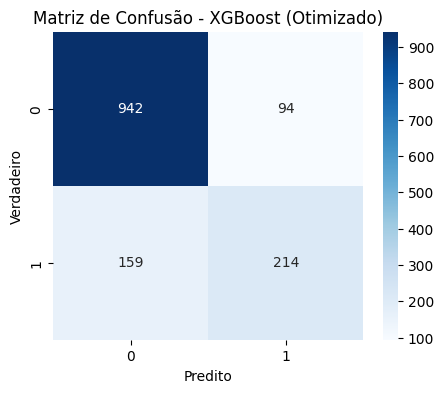

In [38]:
cm_xgb = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost (Otimizado)")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

## Curva ROC

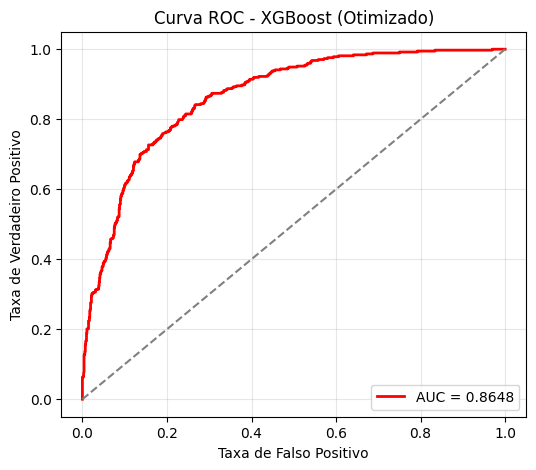

In [39]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_final)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_xgb:.4f}", color='red', linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", color='gray')
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.title("Curva ROC - XGBoost (Otimizado)")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Curva AUC - PR

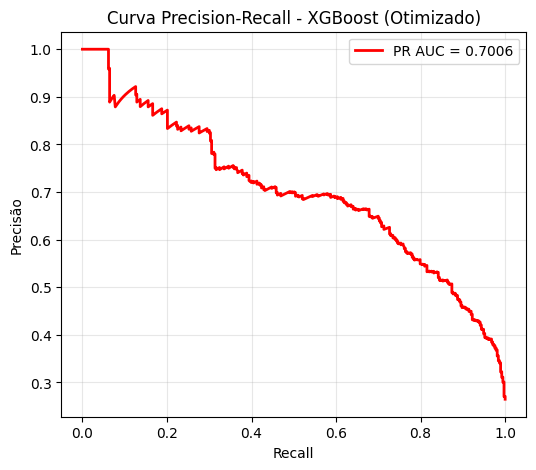

In [40]:
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_final)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
plt.figure(figsize=(6,5))
plt.plot(recall_xgb, precision_xgb, label=f"PR AUC = {pr_auc_xgb:.4f}", color='red', linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - XGBoost (Otimizado)")
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()